In [1]:
#%%
from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
from torchvision import datasets, transforms
from torch.autograd import variable
from itertools import chain
from sklearn import metrics as met
import pickle
from icecream import ic

import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from importlib import reload
# import util
# import model_torch_simple
# from torchmetrics import Accuracy
from tqdm import tqdm
import argparse
from icecream import ic
import numpy as np
from PIL import Image
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [2]:
seed = 42
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

In [2]:
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
    in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

### Loading data

 old data , 4 categoies

In [ ]:
train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_aa/aa_data_train.csv', delimiter = ',')
train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_aa/mic_aa_train_rif.csv')
train_target = train_target[['RIF_MIC']]
# don't touch test data, split out validation data from training data during training
test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_aa/aa_data_test.csv', delimiter = ',')
test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_aa/mic_aa_test_rif.csv')
test_target = test_target[['RIF_MIC']]

# Now filtered_labels_df and filtered_features_array (or filtered_features_df) have rows synchronized without NaNs
train_target = train_target - 1
test_target = test_target - 1

new data, binary bin

In [47]:
# new data
# train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_train_pca4k.csv', delimiter = ',')
train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_train.csv', delimiter = ',')
train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/mic_aa_train_bi.csv')
train_target = train_target[['RIF_MIC']]
# don't touch test data, split out validation data from training data during training
# test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_test_pca4k.csv', delimiter = ',')
test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_test.csv', delimiter = ',')
test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/mic_aa_test_bi.csv')
test_target = test_target[['RIF_MIC']]

In [78]:
# new data
train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_train_pca4k.csv', delimiter = ',')
# don't touch test data, split out validation data from training data during training
test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_test_pca4k.csv', delimiter = ',')

high mid low classification

In [27]:
train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_train.csv', delimiter = ',')
train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/mic_aa_train_hml.csv')
train_target = train_target[['RIF_MIC']]
# don't touch test data, split out validation data from training data during training
# test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_test_pca4k.csv', delimiter = ',')
test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/aa_data_test.csv', delimiter = ',')
test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/mic_aa_test_hml.csv')
test_target = test_target[['RIF_MIC']]

seq data

In [ ]:
# train_data.shape# new data
train_data = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/gene_seq_train.csv')
train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/mic_seq_train.csv')
train_target = train_target[['RIF_MIC']]
# don't touch test data, split out validation data from training data during training
test_data = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/gene_seq_test.csv')
test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_rif/mic_seq_test.csv')
test_target = test_target[['RIF_MIC']]

(6844, 4000)

In [17]:
valid_indices = train_target.dropna().index
train_target = train_target.loc[valid_indices]
train_data = train_data[valid_indices]

valid_indices = test_target.dropna().index
test_target = test_target.loc[valid_indices]
test_data = test_data[valid_indices] 
# If features are in a DataFrame:
# filtered_features_df = features_df.loc[valid_indices]



In [5]:
N_samples = train_data.shape[0]
DRUGS = train_target.columns
# LOCI = train_data.columns
assert set(DRUGS) == set(train_target.columns)
N_drugs = len(DRUGS)

# Feature engineering

In [6]:
# def one_hot_torch(seq: str, dtype=torch.int8):
#     seq_bytes = torch.ByteTensor(list(bytes(seq, "utf-8")))
#     acgt_bytes = torch.ByteTensor(list(bytes("ACGT", "utf-8")))
#     arr = torch.zeros(6, (len(seq_bytes)), dtype=dtype)
#     arr[0, seq_bytes == acgt_bytes[0]] = 1
#     arr[1, seq_bytes == acgt_bytes[1]] = 1
#     arr[2, seq_bytes == acgt_bytes[2]] = 1
#     arr[3, seq_bytes == acgt_bytes[3]] = 1
#     arr[4, seq_bytes == acgt_bytes[3]] = 1
#     arr[5, seq_bytes == acgt_bytes[3]] = 1
#     return arr



# def one_hot_torch(category: int, num_categories: int = 6, dtype=torch.int8):
#     # Ensure the category is valid
#     category -= 1
#     if not (0 <= category < num_categories):
#         raise ValueError("Category out of range")

#     # Create a tensor of zeros with shape (num_categories,)
#     arr = torch.zeros(num_categories, dtype=dtype)
    
#     # Set the corresponding category index to 1
#     arr[category] = 1
#     return arr

# def one_hot_torch(seq):
#     oh = []
#     for sample in seq:
#         sample = torch.ByteTensor(list(bytes(sample, "utf-8")))
#         acgt_bytes = torch.ByteTensor(list(bytes("ACGT", "utf-8")))
#         arr = torch.zeros((len(sample), 4), dtype=torch.int8)
#         arr[sample == acgt_bytes[0], 0] = 1
#         arr[sample == acgt_bytes[1], 1] = 1
#         arr[sample == acgt_bytes[2], 2] = 1
#         arr[sample == acgt_bytes[3], 3] = 1
#         oh.append(arr)
#     return torch.stack(oh)

def my_padding(seq_tuple):
    list_x_ = list(seq_tuple)
    max_len = len(max(list_x_, key=len))
    for i, x in enumerate(list_x_):
        list_x_[i] = x + "N"*(max_len-len(x))
    return list_x_

#! faster than my_padding try to incorporate
def collate_padded_batch(batch):
    # get max length of seqs in batch
    max_len = max([x[0].shape[1] for x in batch])
    return torch.utils.data.default_collate(
        [(F.pad(x[0], (0, max_len - x[0].shape[1])), x[1]) for x in batch] #how does F.pad work
    )



# Dateset

In [31]:
# Julian's code - implement this, might be faster
class Dataset(torch.utils.data.Dataset): #? what's the difference between using inheritance and not?
    def __init__(
        self,
        seq_df,
        res_df,
        # target_loci=LOCI,
        target_drugs=DRUGS,
        one_hot_dtype=torch.int8,
        transform=None,
    ):
        self.transform = transform
        # self.seq_df = seq_df[target_loci]
        self.seq_df = seq_df
        self.res_df = res_df[target_drugs]
        # if not self.seq_df.index.equals(self.res_df.index):
        #     raise ValueError(
        #         "Indices of sequence and resistance dataframes don't match up"
        #     )
        self.one_hot_dtype = one_hot_dtype

    def __getitem__(self, index):
        """
        numerical index --> get `index`-th sample
        string index --> get sample with name `index`
        """
        if isinstance(index, int):
            seqs_comb = self.seq_df[index]
            res = self.res_df.iloc[index]
        elif isinstance(index, str):
            seqs_comb = self.seq_df[int(index)]
            res = self.res_df.loc[index]
        else:
            raise ValueError(
                "Index needs to be an integer or a sample name present in the dataset"
            )

        if self.transform:
            res = np.log(res)
            
            # self.res_mean = self.res_df.mean()
            # self.res_std = self.res_df.std()
            # res = (res - self.res_mean) / self.res_std
            # res = self.transform(res)
        return torch.unsqueeze(torch.tensor(seqs_comb).float(), 0), torch.tensor(res).long().flatten().squeeze()
    def __len__(self):
        return self.res_df.shape[0]

training_dataset = Dataset(train_data, train_target, one_hot_dtype=torch.float, transform=False)
train_dataset, val_dataset = random_split(training_dataset, [int(len(training_dataset)*0.9), len(training_dataset)-int(len(training_dataset)*0.9)])

### Weighted masked loss CE

In [32]:
y_true = pd.concat([train_target, test_target])

column_weight_maps = {}

for column in y_true.columns:
    column_values = y_true[column].dropna().values
    values, counts = np.unique(column_values, return_counts=True)
    frequency = counts / len(column_values)
    
    # Calculate weights as the inverse of frequencies
    weights_inverse = 1 - frequency
    
    # Normalize weights to ensure they sum up to 1
    weights_normalized = weights_inverse / np.sum(weights_inverse)
    
    # Map each MIC value to its corresponding weight
    weight_map = {value: weight for value, weight in zip(values, weights_normalized)}
    
    column_weight_maps[column] = weight_map

def get_weighted_masked_cross_entropy_loss(column_weight_maps):
    """
    Creates a loss function that computes a weighted cross entropy loss, taking into account class imbalances.
    :param column_weight_maps: Dictionary mapping column names to their corresponding class weight maps.
    """
    def weighted_masked_cross_entropy_loss(y_true, y_pred):
        weighted_losses = []
        
        col_weight_map = column_weight_maps[column]
        print(y_pred.size())
        # Assuming y_true is a tensor of class indices for each column and y_pred are the logits
        weights_col = torch.tensor([col_weight_map[y.item()] for y in y_true[:, i]], dtype=torch.float32, device=y_true.device)
        print(weights_col)
        # CrossEntropyLoss expects class indices as y_true, and logits as y_pred
        loss_fn = torch.nn.CrossEntropyLoss(reduction='none')
        col_loss = loss_fn(y_pred[:, i,], y_true[:, i])
        
        weighted_col_loss = weights_col * col_loss
        weighted_losses.append(weighted_col_loss.mean())
    
        total_weighted_loss = torch.stack(weighted_losses).mean()
        
        # for i, column in enumerate(column_weight_maps.keys()):
        #     col_weight_map = column_weight_maps[column]
        #     print(y_pred.size())
        #     # Assuming y_true is a tensor of class indices for each column and y_pred are the logits
        #     weights_col = torch.tensor([col_weight_map[y.item()] for y in y_true[:, i]], dtype=torch.float32, device=y_true.device)
        #     print(weights_col)
        #     # CrossEntropyLoss expects class indices as y_true, and logits as y_pred
        #     loss_fn = torch.nn.CrossEntropyLoss(reduction='none')
        #     col_loss = loss_fn(y_pred[:, i,], y_true[:, i])
            
        #     weighted_col_loss = weights_col * col_loss
        #     weighted_losses.append(weighted_col_loss.mean())
        
        # total_weighted_loss = torch.stack(weighted_losses).mean()
        return total_weighted_loss

    return weighted_masked_cross_entropy_loss

# Also assuming `columns` is a list of your target column names corresponding to y_true and y_pred
weighted_cross_entropy_loss_fn = get_weighted_masked_cross_entropy_loss(column_weight_maps['RIF_MIC'])
# loss = weighted_cross_entropy_loss_fn(y_true_tensor, y_pred_logits, columns)

### new weighted ce loss

In [37]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

y_true = train_target
# y_true = pd.concat([train_target, test_target])

column_weight_maps = {}

for column in y_true.columns:
    column_values = y_true[column].dropna().values
    values, counts = np.unique(column_values, return_counts=True)
    frequency = counts / len(column_values)
    
    # Calculate weights as the inverse of frequencies
    weights_inverse = 1/frequency
    
    # Normalize weights to ensure they sum up to 1
    weights_normalized = weights_inverse / np.sum(weights_inverse)
    
    # Map each MIC value to its corresponding weight
    weight_map = {value: weight for value, weight in zip(values, weights_normalized)}
    
    column_weight_maps[column] = weight_map

def get_weighted_masked_cross_entropy_loss(column_weight_maps):
    """
    Creates a loss function that computes a weighted cross entropy loss, taking into account class imbalances.
    :param column_weight_maps: Dictionary mapping column names to their corresponding class weight maps.
    """
    def weighted_masked_cross_entropy_loss(y_pred, y_true):
        # weighted_losses = torch.Tensor().to(device)
        weighted_losses = []
        col_weight_map = column_weight_maps
        # print(col_weight_map)
        mean_weight = np.mean(list(col_weight_map.values())) # just in case if a number is not recognised and the loss doesn't go crazy

        # print(y_pred.size())
        # Assuming y_true is a tensor of class indices for each column and y_pred are the logits
        weights_col = [col_weight_map.get(y.item(), mean_weight) for y in y_true]
        # print(weights_col)
        # CrossEntropyLoss expects class indices as y_true, and logits as y_pred
        loss_fn = F.cross_entropy
        col_loss = loss_fn(y_pred, y_true, reduction = 'none').to(device)
        
        # loss_fn = nn.CrossEntropyLoss(reduction = 'none')
        # col_loss = loss_fn(y_pred, y_true)
        # print(y_true.dtype)
        # print(col_loss)
        weights_col = torch.Tensor(weights_col).to(device)
        # print(weights_col)
        # print(col_loss)
        weighted_col_loss = weights_col * col_loss
        # print(weighted_col_loss)
        weighted_losses.append(weighted_col_loss.mean())

        total_weighted_loss = torch.stack(weighted_losses).mean()
        
        # for i, column in enumerate(column_weight_maps.keys()):
        #     col_weight_map = column_weight_maps[column]
        #     print(y_pred.size())
        #     # Assuming y_true is a tensor of class indices for each column and y_pred are the logits
        #     weights_col = torch.tensor([col_weight_map[y.item()] for y in y_true[:, i]], dtype=torch.float32, device=y_true.device)
        #     print(weights_col)
        #     # CrossEntropyLoss expects class indices as y_true, and logits as y_pred
        #     loss_fn = torch.nn.CrossEntropyLoss(reduction='none')
        #     col_loss = loss_fn(y_pred[:, i,], y_true[:, i])
            
        #     weighted_col_loss = weights_col * col_loss
        #     weighted_losses.append(weighted_col_loss.mean())
        
        # total_weighted_loss = torch.stack(weighted_losses).mean()
        return total_weighted_loss

    return weighted_masked_cross_entropy_loss

# Also assuming `columns` is a list of your target column names corresponding to y_true and y_pred
weighted_cross_entropy_loss_fn = get_weighted_masked_cross_entropy_loss(column_weight_maps['RIF_MIC'])
# loss = weighted_cross_entropy_loss_fn(y_true_tensor, y_pred_logits, columns)

In [15]:
input = torch.randn(2, 2, requires_grad=True)#.to(device)
target = torch.randint(2, (2,), dtype=torch.int64)#.to(device)
loss = F.cross_entropy(input, target)
print(loss)
input = input
target = target
print(input, target)
weighted_cross_entropy_loss_fn(input, target)

tensor(0.0889, grad_fn=<NllLossBackward0>)
tensor([[-2.0174,  0.6905],
        [-0.1841,  1.9372]], requires_grad=True) tensor([1, 1])


tensor(0.0251, grad_fn=<MeanBackward0>)

In [10]:
y_true = pd.concat([train_target, test_target])  # Your MIC values

column_weight_maps = {}

for i, column in enumerate(y_true.columns):
    # Extract the values for the current column
    column_values = y_true[column].values
    column_values = column_values[~np.isnan(column_values)]
    # Calculate frequencies of each MIC value in the column
    values, counts = np.unique(column_values, return_counts=True)
    frequency = counts / len(column_values)
    
    # Calculate weights as the inverse of frequencies
    weights_inverse = 1 / frequency #! more for extreme imbalanced cases
    # weights_inverse = 1 - frequency #! more for less extremely  imbalanced cases
    
    # Normalize weights to ensure they sum up to 1 (optional but recommended for stability)
    weights_normalized = weights_inverse / np.sum(weights_inverse)
    
    # Map each MIC value to its corresponding weight for the current column
    weight_map = {value: weight for value, weight in zip(values, weights_normalized)}
    
    # Store the weight map for the current column
    column_weight_maps[column] = weight_map
    
def get_weighted_masked_loss(loss_fn, column_weight_maps):
    """
    Returns a loss function that ignores NaN values and applies weights from the corresponding column weight maps.

    :param loss_fn: A loss function compatible with the data (e.g., MSELoss for regression).
    :param column_weight_maps: A dictionary where keys are column indices and values are dictionaries mapping y_values to weights.
    """

    def weighted_masked_loss(y_true, y_pred):
        non_nan_mask = ~torch.isnan(y_true)
        weighted_losses = []
        # Iterate through each column, apply weights, and calculate the loss
        for col_idx in range(y_true.shape[1]):

            # Mask and select non-NaN values and predictions for the current column
            col_non_nan_mask = non_nan_mask[:, col_idx]
            y_true_col_non_nan = y_true[col_non_nan_mask, col_idx]
            y_pred_col_non_nan = y_pred[col_non_nan_mask, col_idx]

            # Retrieve the weight map for the current column
            col_weight_map = column_weight_maps[list(column_weight_maps)[0]]
            # Get weights for each non-NaN value in the current column
            weights_col = torch.tensor([col_weight_map.get(y.item(), 1) for y in y_true_col_non_nan], dtype=torch.float32, device=y_true.device)

            # Calculate the loss for the current column
            col_loss = loss_fn(y_pred_col_non_nan, y_true_col_non_nan)
            print(col_loss)
            print(weights_col)
            # Weight the loss and store
            weighted_col_loss = weights_col * col_loss
            print('weighted_col_loss')
            print(weighted_col_loss)
            weighted_losses.append(weighted_col_loss)

        # Concatenate weighted losses from all columns, calculate mean over all non-NaN entries
        total_weighted_loss = torch.cat(weighted_losses).mean()

        return total_weighted_loss

    return weighted_masked_loss
        
masked_weighted_MAE = get_weighted_masked_loss(torch.nn.L1Loss(reduction='none'), column_weight_maps)

### Masked loss

In [10]:
def get_masked_loss(loss_fn):
    """
    Returns a loss function that ignores NaN values
    """
    def masked_loss(y_true, y_pred):
        y_pred = y_pred.view(-1, 1)  # Ensure y_pred has the same shape as y_true and non_nan_mask
        # ic(y_pred.shape)
        # ic(y_true.shape)
        non_nan_mask = ~y_true.isnan()
        # ic(non_nan_mask)
        y_true_non_nan = y_true[non_nan_mask]
        y_pred_non_nan = y_pred[non_nan_mask]
        return loss_fn(y_pred_non_nan, y_true_non_nan)

    return masked_loss

masked_MAE = get_masked_loss(nn.L1Loss())

# Model

In [9]:
def save_to_file(file_path, appendix, epoch, lr, cnndr, fcdr, l2, train_loss, test_loss):
    train_loss = [float(arr) for arr in train_loss]
    test_loss = [float(arr) for arr in test_loss]
    with open(file_path, "a") as f:
        f.write(f">> {appendix}, Epoch: {epoch}, LR: {lr}, cnnDR: {cnndr},  fnDR: {fcdr}, l2decay: {l2}\n")
        f.write(f"--- Train Loss: {train_loss}\n")
        f.write(f"--- Test Loss: {test_loss}\n")

custom model

In [35]:
torch.cuda.empty_cache()

class Model(nn.Module):
    def __init__(
        self,
        in_channels=1,
        num_classes=6,
        num_filters=64,
        filter_length=25,
        num_conv_layers=2,
        filter_scaling_factor=1.5,  # New parameter
        num_dense_neurons=256,
        num_dense_layers=2,
        conv_dropout_rate=0.0,
        dense_dropout_rate=0.2,
        return_logits=False,
    ):
        super().__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        self.num_filters = num_filters
        self.filter_length = filter_length
        self.num_conv_layers = num_conv_layers
        self.num_dense_layers = num_dense_layers
        self.conv_dropout_rate = conv_dropout_rate
        self.dense_dropout_rate = dense_dropout_rate
        self.return_logits = return_logits
        
        # now define the actual model
        self.feature_extraction_layer = self._conv_layer(
            in_channels, num_filters, filter_length
        )
        
        #dynamic filter scaling from deepram
        current_num_filters = num_filters
        self.conv_layers = nn.ModuleList()
        for i in range(num_conv_layers):
            layer = self._conv_layer(current_num_filters, int(current_num_filters * filter_scaling_factor), 3)
            self.conv_layers.append(layer)
            current_num_filters = int(current_num_filters * filter_scaling_factor)

        self.dense_layers = nn.ModuleList(
            self._dense_layer(input_dim, num_dense_neurons)
            for input_dim in [current_num_filters]
            + [num_dense_neurons] * (num_dense_layers - 1) #how does this work?
        )
        self.prediction_layer = (
            nn.Linear(num_dense_neurons, num_classes)
            if return_logits
            else nn.Sequential(nn.Linear(num_dense_neurons, num_classes), nn.ReLU()) #difference between sequential and nn.moduleList?
        )
        
        self.apply(self.init_weights)    
    
    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
    
    def _conv_layer(self, in_channels, out_channels, kernel_size):
        return nn.Sequential(
            nn.Dropout(p=self.conv_dropout_rate),
            nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
        )

    def _dense_layer(self, n_in, n_out):
        return nn.Sequential(
            nn.Dropout(p=self.dense_dropout_rate),
            nn.Linear(n_in, n_out),
            nn.BatchNorm1d(n_out),
            nn.ReLU(),
        )

    def forward(self, x):
        # first pass over input
        # print(x.size())
        # x = self.feature_extraction_layer(x)
        
        print("Input shape:", x.shape)
        x = self.feature_extraction_layer(x)
        print("After feature extraction shape:", x.shape)
        # conv layers
        for layer in self.conv_layers:
            x = layer(x)
        # global max pool 1D
        x = torch.max(x, dim=-1).values
        x = x.view(x.size(0), -1)  # Flattening the tensor to [batch_size, features]
        # ic(x.shape)
        # fully connected layers
        for layer in self.dense_layers:
            x = layer(x)
        x = self.prediction_layer(x).softmax(dim=1)
        return x

model = Model(
num_classes=2,
num_filters=64,
num_conv_layers=2,
num_dense_neurons=256, # batch_size = 64
# num_dense_neurons=128, # batch_size = 64
num_dense_layers=2,
return_logits=True,
conv_dropout_rate=0,
dense_dropout_rate=0
).to(device)

# model = Model( #! way too memory intensive
# num_classes=13,
# num_filters=128,
# num_conv_layers=2,
# num_dense_neurons=64, # batch_size = 64

# num_dense_layers=2,
# return_logits=True,
# conv_dropout_rate=0,
# dense_dropout_rate=0
# ).to(device)
## early stopping
best_val_loss = float('inf')
patience = 8  # How many epochs to wait after last time validation loss improved.
patience_counter = 0

epoch = 300
batch_size = 128
# lr = 0.0085
# lr = 0.00002
lr = 1e-5

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True ,num_workers=8, drop_last=True)
test_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=8, shuffle=True, drop_last=True)

# train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_padded_batch ,num_workers=8, drop_last=True)
# test_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)
# criterion = nn.MSELoss()
# criterion = masked_weighted_MAE
criterion = weighted_cross_entropy_loss_fn
# criterion = F.cross_entropy
# criterion = masked_MAE

# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,  weight_decay=1e-9)
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbose=True)

RuntimeError: CUDA error: device-side assert triggered

In [39]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True ,num_workers=8, drop_last=True)


In [41]:
for x, y in train_loader:
    print(y)
    break

tensor([1, 1, 3, 0, 3, 3, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0,
        0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
        3, 0, 0, 0, 2, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 3, 0,
        0, 1, 2, 2, 3, 3, 0, 2, 0, 0, 3, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        3, 0, 3, 0, 3, 0, 3, 1, 0, 0, 0, 3, 0, 3, 3, 1, 3, 0, 0, 3, 3, 3, 0, 0,
        0, 0, 0, 3, 0, 1, 2, 3])


anana green model

In [34]:

torch.cuda.empty_cache()

class Model(nn.Module):
    def __init__(
        self,
        in_channels=1,
        num_classes=6,
        num_filters=64,
        filter_length=25,
        num_conv_layers=2,
        filter_scaling_factor=1,  # New parameter
        num_dense_neurons=256,
        num_dense_layers=2,
        conv_dropout_rate=0.0,
        dense_dropout_rate=0.2,
        l1_strength = 0.1,
        return_logits=False,
    ):
        super().__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        self.num_filters = num_filters
        self.filter_length = filter_length
        self.num_conv_layers = num_conv_layers
        self.num_dense_layers = num_dense_layers
        self.conv_dropout_rate = conv_dropout_rate
        self.dense_dropout_rate = dense_dropout_rate
        self.return_logits = return_logits
        
        # now define the actual model
        # self.feature_extraction_layer = self._conv_layer(
            # in_channels, num_filters, filter_length
        # )
        self.feature_extraction_layer = self._conv_layer_extract(
            in_channels, num_filters, filter_length
        )
        #dynamic filter scaling from deepram
        current_num_filters1 = num_filters
        self.conv_layers1 = nn.ModuleList()
        for i in range(num_conv_layers):
            layer = self._conv_layer(current_num_filters1, int(current_num_filters1 * filter_scaling_factor), 3)
            self.conv_layers1.append(layer)
            current_num_filters1 = int(current_num_filters1 * filter_scaling_factor)
            
        current_num_filters2 = 32
        self.conv_layers2 = nn.ModuleList()
        for i in range(num_conv_layers):
            layer = self._conv_layer(current_num_filters1, int(current_num_filters2 * filter_scaling_factor), 3)
            self.conv_layers2.append(layer)
            current_num_filters1 = current_num_filters2
            
        self.dense_layers = nn.ModuleList(
            self._dense_layer(input_dim, num_dense_neurons)
            for input_dim in [current_num_filters2]
            + [num_dense_neurons] * (num_dense_layers - 1) #how does this work?
        )
        
        self.prediction_layer = (
            nn.Linear(num_dense_neurons, num_classes)
            if return_logits
            else nn.Sequential(nn.Linear(num_dense_neurons, num_classes), nn.ReLU()) #difference between sequential and nn.moduleList?
        )
        
        self.m = nn.MaxPool1d(3, stride=1)
        
        self.apply(self.init_weights)    
    
    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
    
    def _conv_layer(self, in_channels, out_channels, kernel_size):
        return nn.Sequential(
            nn.Dropout(p=self.conv_dropout_rate),
            nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
        )
        
    def _conv_layer_extract(self, in_channels, out_channels, kernel_size):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
        )

    def _dense_layer(self, n_in, n_out):
        return nn.Sequential(
            nn.Dropout(p=self.dense_dropout_rate),
            nn.Linear(n_in, n_out),
            nn.BatchNorm1d(n_out),
            nn.ReLU(),
        )
        
    def l1_regularization(self):
        l1_loss_example = 0
        for param in self.parameters():
            l1_loss_example += torch.sum(torch.abs(param))
        return self.l1_strength * l1_loss_example

    def forward(self, x):
        # first pass over input
        # print(x.size())
        # print("Input shape:", x.shape)
        x = self.feature_extraction_layer(x)
        # print("After feature extraction shape:", x.shape)

        # conv layers
        for layer in self.conv_layers1:
            x = layer(x)
        # global max pool 1D
        x = self.m(x)
        # print(x.shape)
        for layer in self.conv_layers2:
            x = layer(x)
        
        x = torch.max(x, dim=-1).values
        x = x.view(x.size(0), -1)  # Flattening the tensor to [batch_size, features]
        # ic(x.shape)
        # fully connected layers
        for layer in self.dense_layers:
            x = layer(x)
        ic(x.shape)
        x = self.prediction_layer(x)
        ic(x.shape)
        return x

# def l1loss(layer): # https://stackoverflow.com/questions/50054049/lack-of-sparse-solution-with-l1-regularization-in-pytorch
#     return torch.norm(layer.weight, p=1)

# def l1loss(sequence):
#     l1_regularization = 0
#     for module in sequence.modules():
#         if isinstance(module, nn.Conv1d):  # Check if the module is a Conv1d layer
#             l1_regularization += torch.norm(module.weight, p=1)
#     return l1_regularization

model = Model(
num_classes=3,
num_filters=64,
num_conv_layers=2,
num_dense_neurons=256, # batch_size = 64
# num_dense_neurons=128, # batch_size = 64
num_dense_layers=2,
return_logits=False,
conv_dropout_rate=0.05,
dense_dropout_rate=0
).to(device)

# model = Model( #! way too memory intensive
# num_classes=13,
# num_filters=128,
# num_conv_layers=2,
# num_dense_neurons=64, # batch_size = 64

# num_dense_layers=2,
# return_logits=True,
# conv_dropout_rate=0,
# dense_dropout_rate=0
# ).to(device)
## early stopping
best_val_loss = float('inf')
patience = 8  # How many epochs to wait after last time validation loss improved.
patience_counter = 0
lmbda = torch.tensor(1e-4, dtype = torch.float32)

epoch = 200
batch_size = 128
# lr = 0.0085
# lr = 0.00002
lr = 1e-5

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True ,num_workers=8, drop_last=True)
test_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=8, shuffle=True, drop_last=True)

# train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_padded_batch ,num_workers=8, drop_last=True)
# test_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)
# criterion = nn.MSELoss()
# criterion = masked_weighted_MAE
# criterion = masked_weighted_MSE
criterion = weighted_cross_entropy_loss_fn

# criterion = masked_MAE

# criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr,  weight_decay=1e-9)
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbo

RuntimeError: CUDA error: device-side assert triggered

# Training

### Training

In [11]:
torch.cuda.empty_cache()
import gc; gc.collect()
# ic.enable()
ic.disable()

train_epoch_loss = []
test_epoch_loss = []

for e in tqdm(range(1, epoch+1)):
    model.train()
    train_batch_loss = []
    test_batch_loss = []
    # print(f'Epoch {e}')
    for x_train, y_train in train_loader:
        x_batch = torch.squeeze(x_train, 0).to(device)
        y_batch = y_train.to(device)
        x_batch = x_batch.float()
        pred = model(x_batch.float())
        # print(pred)
        loss_train = criterion(pred, y_batch)
        # print(y_batch)
        train_batch_loss.append(loss_train)        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    train_epoch_loss.append(torch.mean(torch.stack(train_batch_loss)).detach().cpu().numpy())
    model.eval()
    with torch.no_grad():
        # print('>> test')
        for x_test, y_test in test_loader:
            x_batch = torch.squeeze(x_test, 0).to(device)
            x_batch = x_batch.float()
            # if np.isnan(y_batch):
            #     continue
            # print(x_batch.size())
            y_batch = y_test.to(device)
            # x_batch = x_batch.permute(0, 3, 1, 2).to(device)
            pred = model(x_batch.float())

            # pred = pred.unsqueeze(0)
            # print(pred[:10])
            # print(y_batch[:10])

            loss_test = criterion(pred, y_batch)
            test_batch_loss.append(loss_test)
        test_epoch_loss.append(torch.mean(torch.stack(test_batch_loss)).detach().cpu().numpy())

    print(f'Epoch {e}')
    print(f"Training loss: {torch.mean(torch.stack(train_batch_loss)).detach().cpu().numpy()}")
    print(f"Validation loss: {torch.mean(torch.stack(test_batch_loss)).detach().cpu().numpy()}") 
    # scheduler.step(torch.mean(torch.stack(test_batch_loss)))
    # print(train_batch_loss)
    # print(test_batch_loss)
    # print(f"Training loss: {np.mean(train_batch_loss)}")
    # print(f"Validation loss: {np.mean(test_batch_loss)}")
    #! implementing early stopping
    # current_val_loss = torch.mean(torch.stack(test_batch_loss)).detach().cpu().numpy()
    # print(f'Current val loss: {current_val_loss}')
    # print(f'Best val loss: {best_val_loss}')
    # if current_val_loss < best_val_loss:
    #     best_val_loss = current_val_loss
    #     patience_counter = 0  # reset patience counter
    #     # Save the best model
    #     # torch.save(model.state_dict(), '/mnt/storageG1/lwang/Projects/tb_dr_MIC/saved_models/aa-model_final.pth')

    # else:
    #     patience_counter += 1
    #     if patience_counter >= patience:
    #         print("Early stopping triggered")
    #         torch.save({
    #         'optimizer': optimizer.state_dict(),
    #         'model': model.state_dict(),
    #     }, '/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/saved_models/aa-model_weighted_balanced_binned_aa-ce.pth')
    #         break  # Early stopping
        
print('==='*10)
# torch.save(model.state_dict(), '/mnt/storageG1/lwang/Projects/tb_dr_MIC/saved_models/final_seq_model1-44ep.pt')
save_to_file('trials3.txt', 'aa-training_weighted_balanced_mae-binned-rif-ce-hml' ,epoch, lr=1e-4, fcdr=0.2, l2=1e-9, cnndr=0, train_loss = train_epoch_loss, test_loss = test_epoch_loss)

fig, ax = plt.subplots()
x = np.arange(1, epoch+1, 1)
ax.plot(x, train_epoch_loss,label='Training')
ax.plot(x, test_epoch_loss,label='Validation')
ax.legend()
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(np.arange(0, epoch+1, 10))
ax.set_title(f'Loss: Learning_rate:{lr}')
# ax_2 = ax.twinx()
# ax_2.plot(history["lr"], "k--", lw=1)
# ax_2.set_yscale("log")
# ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
ax.grid(axis="x")
fig.tight_layout()
fig.show()
fig.savefig(f'./graphs1/aa-loss_lr_{lr}_weighted_balanced.png')
print(f'./graphs1/aa-loss_lr_{lr}_weighted_balanced.png')

torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, '/mnt/storageG1/lwang/Projects/tb_dr_MIC/saved_models/aa-training_weighted_balanced_mae-binned-rif-ce-hml.pth')

  0%|          | 0/200 [00:00<?, ?it/s]/opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/cuda/Loss.cu:208: nll_loss_forward_no_reduce_cuda_kernel: block: [0,0,0], thread: [0,0,0] Assertion `cur_target >= 0 && cur_target < n_classes` failed.
/opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/cuda/Loss.cu:208: nll_loss_forward_no_reduce_cuda_kernel: block: [0,0,0], thread: [3,0,0] Assertion `cur_target >= 0 && cur_target < n_classes` failed.
/opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/cuda/Loss.cu:208: nll_loss_forward_no_reduce_cuda_kernel: block: [0,0,0], thread: [5,0,0] Assertion `cur_target >= 0 && cur_target < n_classes` failed.
/opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/cuda/Loss.cu:208: nll_loss_forward_no_reduce_cuda_kernel: block: [0,0,0], thread: [8,0,0] Assertion `cur_target >= 0 && cur_target < n_classes` failed.
/opt/conda/conda-bld/pytorch_1659484809662/work/aten/src/ATen/native/cuda/Los

RuntimeError: CUDA error: device-side assert triggered

./graphs1/aa-loss_lr_1e-05_weighted_balanced.png


/tmp/ipykernel_100628/2901154477.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


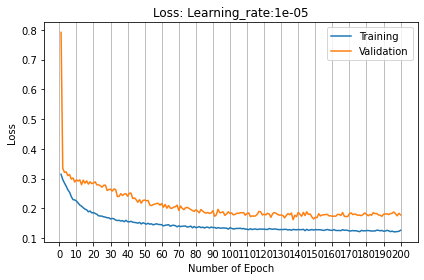

In [36]:

fig, ax = plt.subplots()
x = np.arange(1, epoch+1, 1)
ax.plot(x, train_epoch_loss,label='Training')
ax.plot(x, test_epoch_loss,label='Validation')
ax.legend()
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(np.arange(0, epoch+1, 10))
ax.set_title(f'Loss: Learning_rate:{lr}')
# ax_2 = ax.twinx()
# ax_2.plot(history["lr"], "k--", lw=1)
# ax_2.set_yscale("log")
# ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
ax.grid(axis="x")
fig.tight_layout()
fig.show()
fig.savefig(f'./graphs1/aa-loss_lr_{lr}_weighted_balanced.png')
print(f'./graphs1/aa-loss_lr_{lr}_weighted_balanced.png')


In [32]:
torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, '/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/saved_models/aa-model_weighted_balanced_binned_ag-ce.pth')

In [28]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()
# Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# output = loss(input, target)
# output.backward()

In [38]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()


ValueError: x and y must have same first dimension, but have shapes (300,) and (0,)

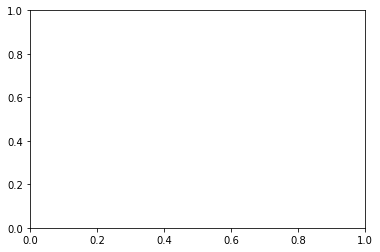

In [94]:

fig, ax = plt.subplots(facecolor = 'white')
x = np.arange(1, epoch+1, 1)
ax.plot(x, train_epoch_loss,label='Training')
# ax.plot(x, test_epoch_loss,label='Validation')
ax.legend()
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(np.arange(0, epoch+1, 10))
ax.set_title(f'Loss: Learning_rate:{lr}')
# ax_2 = ax.twinx()
# ax_2.plot(history["lr"], "k--", lw=1)
# ax_2.set_yscale("log")
# ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
ax.grid(axis="x")
fig.tight_layout()
fig.show()
fig.savefig(f'./graphs1/loss_lr_{lr}_long.png')
print(f'./graphs1/loss_lr_{lr}.png')

## AUC

NameError: name 'cnn_dr' is not defined

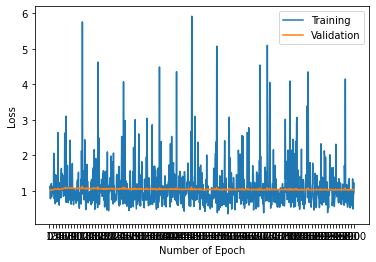

In [ ]:
fig, ax = plt.subplots(facecolor = 'white')
x = np.arange(1, epoch+1, 1)
ax.plot(x, train_epoch_loss,label='Training')
ax.plot(x, test_epoch_loss,label='Validation')
ax.legend()
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(np.arange(0, epoch+1, 10))
ax.set_title(f'Loss: Learning_rate:{lr}, cnn_dr:{cnn_dr}, cnn_dr:{fc_dr}')
# ax_2 = ax.twinx()
# ax_2.plot(history["lr"], "k--", lw=1)
# ax_2.set_yscale("log")
# ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
ax.grid(axis="x")
fig.tight_layout()
fig.show()

In [ ]:
test_dataset = OneHotSeqsDataset(test_data, test_target, one_hot_dtype=torch.float)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, collate_fn=collate_padded_batch ,num_workers=8)

In [ ]:
torch.cuda.empty_cache()
import gc; gc.collect()
# ic.enable()
ic.disable()

model.load_state_dict(torch.load('saved_weights/training_torch_simple_mask_copy_split_model_128f64n-spe30-rand5-100e'))

output = []
model.eval()
with torch.no_grad():

    for x, y in test_loader:
        x_batch = torch.squeeze(x, 0).to(device)
        y_batch = y.to(device)
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        pred = model(x_batch.float())
        output.append(pred)
        
original_value_output = np.exp(output)

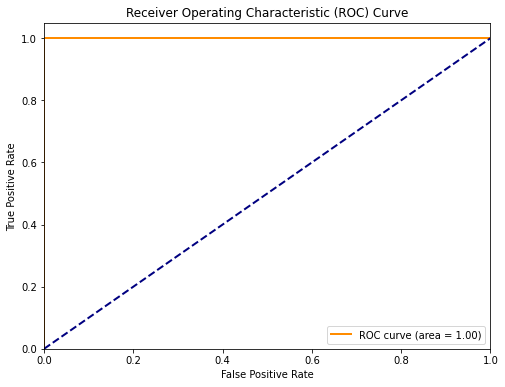

AUC Score: 1.0


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

def calculate_auc(labels, scores):
    """
    Calculate the Area Under the Receiver Operating Characteristic Curve (AUC)
    given true binary labels and prediction scores.
    
    :param labels: List of true binary labels (0 or 1).
    :param scores: List of prediction scores (probabilities or continuous output of the model).
    :return: AUC score.
    """
    auc_score = roc_auc_score(labels, scores)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return auc_score

# Example usage
true_labels = [0, 1, 1, 0, 1]  # True binary labels
prediction_scores = [0.1, 0.4, 0.8, 0.3, 0.7]  # Prediction scores or probabilities

auc_score = calculate_auc(true_labels, prediction_scores)
print(f"AUC Score: {auc_score}")

# testing out hyper-parameters

143

In [92]:
import subprocess

def run_bash_command(command):
    """
    Runs a bash command and returns its output.
    
    :param command: The command to run as a string.
    :return: A tuple containing the command's stdout and stderr.
    """
    try:
        # Run command
        result = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        # Return stdout and stderr
        return result.stdout, result.stderr
    except subprocess.CalledProcessError as e:
        # Handle errors in the called executable
        return e.stdout, e.stderr
    except Exception as e:
        # Handle other errors related to subprocess.run()
        return None, str(e)

# Example usage
stdout, stderr = run_bash_command('nvidia-smi')
print('STDOUT:', stdout)
print('STDERR:', stderr)

# Example of a command that generates an error
stdout, stderr = run_bash_command('ls non_existent_file')
print('STDOUT:', stdout)
print('STDERR:', stderr)

STDOUT: Fri Mar 29 15:08:48 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 455.32.00    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   38C    P0    34W / 250W |  22253MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               


In [37]:

def find_range_vectorized(target_values, quest_values):
    # Convert lists to numpy arrays for efficient broadcasting
    target_values =  np.exp(np.array(target_values)) # Reshape for broadcasting
    quest_values =  np.exp(np.array(quest_values))

    # Perform broadcasting to compare each quest value against all target values
    # This creates a boolean matrix where rows correspond to target values and columns to quest values
    in_range_matrix = (target_values / 2 <= quest_values) & (quest_values <= target_values * 2)
    # in_range_matrix = np.abs(np.log2(target_values) - np.log2(quest_values))
    # in_range_matrix  = in_range_matrix  <= 1
    
    # print(mse)
    return in_range_matrix
# Example usage
# target_values = [[10, 20, 30, 40, 50], [10, 20, 30, 40, 50]]
# quest_values = [[25, 5, 60, 1, 1], [10, 20, 30, 40, 50]]

def save_to_file(file_path, appendix, epoch, lr, cnndr, fcdr, l2, train_loss, test_loss):
    train_loss = [float(arr) for arr in train_loss]
    test_loss = [float(arr) for arr in test_loss]
    with open(file_path, "a") as f:
        f.write(f">> {appendix}, Epoch: {epoch}, LR: {lr}, cnnDR: {cnndr},  fnDR: {fcdr}, l2decay: {l2}\n")
        f.write(f"--- Train Loss: {train_loss}\n")
        f.write(f"--- Test Loss: {test_loss}\n")
        
def hyper_params_test(appendix, lr, fc_dr=0,cnn_dr=0, l2=0, epoch=50):
    print('lr:', lr, '| fc_dr:',  fc_dr, '| cnn_dr:', cnn_dr, '| l2:', l2, '==='*10)
    torch.cuda.empty_cache()
    import gc; gc.collect()
    ic.disable()
    
    # stdout, stderr = run_bash_command('nvidia-smi')
    # print('STDOUT:', stdout)
    # print('STDERR:', stderr)
    # model = Model(
    # num_classes=13,
    # num_filters=128,a
    # num_conv_layers=2,
    # num_dense_neurons=64, # batch_size = 64
    # num_dense_layers=2,
    # return_logits=True,
    # dense_dropout_rate=fc_dr,
    # conv_dropout_rate=cnn_dr
    # ).to(device)
    
    model = Model(
    num_classes=2,
    num_filters=64,
    num_conv_layers=2,
    num_dense_neurons=256, # batch_size = 64
    # num_dense_neurons=128, # batch_size = 64
    num_dense_layers=2,
    return_logits=True,
    conv_dropout_rate=cnn_dr,
    dense_dropout_rate=fc_dr
    ).to(device)

    # stdout, stderr = run_bash_command('nvidia-smi')
    # print('STDOUT:', stdout)
    # print('STDERR:', stderr)
    
    epoch = epoch
    batch_size = 128
    lr = lr

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True ,num_workers=8, drop_last=True)
    test_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=8, shuffle=True, drop_last=True)
    # criterion = nn.MSELoss()
    # criterion = weighted_cross_entropy_loss_fn
    criterion = F.cross_entropy
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2)
    # optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
    # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbose=True)
    
    ic.disable()
    # ic.enable()
    train_epoch_loss = []
    test_epoch_loss = []

    
    for e in tqdm(range(1, epoch+1)):
        model.train()
        train_batch_loss = []
        test_batch_loss = []
        # print(f'Epoch {e}')
        for x_train, y_train in train_loader:
            x_batch = torch.squeeze(x_train, 0).to(device)
            y_batch = y_train.to(device)
            x_batch = x_batch.float()
            pred = model(x_batch.float())
            # print(pred)
            loss_train = criterion(pred, y_batch)
            # print(y_batch)
            train_batch_loss.append(loss_train)        
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

        train_epoch_loss.append(torch.mean(torch.stack(train_batch_loss)).detach().cpu().numpy())
        model.eval()
        with torch.no_grad():
            # print('>> test')
            for x_test, y_test in test_loader:
                x_batch = torch.squeeze(x_test, 0).to(device)
                x_batch = x_batch.float()
                # if np.isnan(y_batch):
                #     continue
                # print(x_batch.size())
                y_batch = y_test.to(device)
                # x_batch = x_batch.permute(0, 3, 1, 2).to(device)
                pred = model(x_batch.float())

                # pred = pred.unsqueeze(0)
                # print(pred[:10])
                # print(y_batch[:10])

                loss_test = criterion(pred, y_batch)
                test_batch_loss.append(loss_test)
            test_epoch_loss.append(torch.mean(torch.stack(test_batch_loss)).detach().cpu().numpy())

        print(f'Epoch {e}')
        print(f"Training loss: {torch.mean(torch.stack(train_batch_loss)).detach().cpu().numpy()}")
        print(f"Validation loss: {torch.mean(torch.stack(test_batch_loss)).detach().cpu().numpy()}") 
    
     #! testing benchmark
    # testing_dataset = Dataset(test_data, test_target, one_hot_dtype=torch.float, transform=True)
    # testing_loader1 = DataLoader(dataset=testing_dataset, batch_size=1, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)
    # drugs = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
    # drugs = ['AMI_MIC','EMB_MIC', 'INH_MIC', 'KAN_MIC', 'RIF_MIC', 'RFB_MIC']

    # model.eval()
    # pred_list = []
    # target_list = []
    # mse_list = []
    # with torch.no_grad():
    #     for x_test, y_test in testing_loader1:
    #         xtest1 = x_test.to(device).float()
    #         ytest1 = y_test.to(device).float()
    #         pred = model(xtest1)
    #         pred_list.append(pred.detach().cpu().numpy()) 
    #         target_list.append(y_test.detach().cpu().numpy())

    # pred_list = np.array(pred_list).squeeze()
    # target_list = np.array(target_list).squeeze()
    # mse_list = (pred_list - target_list)**2
    # mse_out = np.nanmean(mse_list, axis=0)

    # result = find_range_vectorized(target_list, pred_list)

    # # Append output to a file
    # with open('trials3.txt', 'a') as f:
    #     mse_drug_output = f"====MIC-mse: {drugs} {np.mean(mse_out)}\n"
    #     f.write(mse_drug_output)        
    #     ea_accuracy_output = f"====EA-accuracy: {drugs} {np.nanmean(result, axis=0)}\n"
    #     f.write(ea_accuracy_output)
    #     print(mse_drug_output)
    #     print(ea_accuracy_output)
    #     # for x, y in zip(drugs, np.nanmean(result, axis=0).tolist()):
    #     #     print(x, y)                    
            
        # fig, ax = plt.subplots()
        # x = np.arange(1, epoch+1, 1)
        # ax.plot(x, train_epoch_loss,label='Training')
        # # ax.plot(x, test_epoch_loss,label='Validation')
        # ax.legend()
        # ax.set_xlabel("Number of Epoch")
        # ax.set_ylabel("Loss")
        # ax.set_xticks(np.arange(0, epoch+1, 10))
        # ax.set_title(f'Loss: Learning_rate:{lr}')
        # # ax_2 = ax.twinx()
        # # ax_2.plot(history["lr"], "k--", lw=1)
        # # ax_2.set_yscale("log")
        # # ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
        # ax.grid(axis="x")
        # fig.tight_layout()
        # fig.show()
        # fig.savefig(f'./graphs1/aa-loss_lr_{lr}_weighted_balanced.png')
        # print(f'./graphs1/aa-loss_lr_{lr}_weighted_balanced.png')
    save_to_file('trials3.txt', appendix ,epoch, lr, cnn_dr, fc_dr, l2, train_epoch_loss, test_epoch_loss)

    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
}, f'/mnt/storageG1/lwang/Projects/tb_dr_MIC/saved_models/{appendix}-{epoch}-{lr}-{cnn_dr}-{fc_dr}-{l2}_balanced-rif-bi-ag-ce.pth')

In [38]:
torch.cuda.empty_cache()
import gc; gc.collect()

# epoch = 250
# for lr in [1e-4]:
#     for fc_dr in [0.2]:
#         for decay in [1e-9]:
#             for cnn_dr in [0.2, 0.3, 0.4, 0.5]:
#                 hyper_params_test('64-2-256-2-128-log-reg-weighted_balanced', lr, cnn_dr = 0, fc_dr=fc_dr, l2=decay, epoch=epoch)

epoch = 200
for lr in [1e-5, 1e-6, 1e-7]:
    for fc_dr in [0.1, 0.2]:
        for cnn_dr in [0, 0.05]:
            for decay in [0, 1e-9]:
                hyper_params_test('aa-64-2-256-2-128-balance-rif-ce-bi-ag', lr, cnn_dr = cnn_dr, fc_dr=fc_dr, l2=decay, epoch=epoch)
# epoch = 44
# for lr in [1e-4]:
#     for fc_dr in [0.4]:
#         for cnn_dr in [0.4]:
#             for decay in [1e-8]:
#                 hyper_params_test('final_model', lr, fc_dr=fc_dr, cnn_dr=cnn_dr, l2=decay, epoch=epoch)

# epoch = 50
# for lr in [1e-4]:
#     for fc_dr in [0.4]:
#         for cnn_dr in [0, 0.2, 0.3, 0.4, 0.5]:
#             for decay in [1e-8]:
#                 hyper_params_test('64-2-256-2-128-log-reg', lr, fc_dr=fc_dr, cnn_dr=cnn_dr, l2=decay, epoch=epoch)

lr: 1e-05 | fc_dr: 0.1 | cnn_dr: 0 | l2: 0 ==============================


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 1/200 [00:10<34:16, 10.33s/it]

Epoch 1
Training loss: 0.7213498950004578
Validation loss: 0.6598836779594421


  1%|          | 2/200 [00:21<36:28, 11.05s/it]

Epoch 2
Training loss: 0.6154968738555908
Validation loss: 0.49070844054222107


  2%|▏         | 3/200 [00:31<34:12, 10.42s/it]

Epoch 3
Training loss: 0.5540504455566406
Validation loss: 0.433371365070343


  2%|▏         | 4/200 [00:40<32:19,  9.89s/it]

Epoch 4
Training loss: 0.5086009502410889
Validation loss: 0.4094882607460022


  2%|▎         | 5/200 [00:49<30:51,  9.49s/it]

Epoch 5
Training loss: 0.46980804204940796
Validation loss: 0.38619285821914673


  3%|▎         | 6/200 [00:59<31:00,  9.59s/it]

Epoch 6
Training loss: 0.4251132607460022
Validation loss: 0.37420153617858887


  4%|▎         | 7/200 [01:11<33:13, 10.33s/it]

Epoch 7
Training loss: 0.41337570548057556
Validation loss: 0.3736022412776947


  4%|▍         | 8/200 [01:20<31:47,  9.94s/it]

Epoch 8
Training loss: 0.40387076139450073
Validation loss: 0.33895736932754517


  4%|▍         | 9/200 [01:29<31:22,  9.86s/it]

Epoch 9
Training loss: 0.3837605118751526
Validation loss: 0.3465842306613922


  5%|▌         | 10/200 [01:40<32:14, 10.18s/it]

Epoch 10
Training loss: 0.36026865243911743
Validation loss: 0.3436693251132965


  6%|▌         | 11/200 [01:51<32:12, 10.22s/it]

Epoch 11
Training loss: 0.368544340133667
Validation loss: 0.35396602749824524


  6%|▌         | 12/200 [02:01<32:01, 10.22s/it]

Epoch 12
Training loss: 0.3526018559932709
Validation loss: 0.35805705189704895


  6%|▋         | 13/200 [02:10<30:46,  9.87s/it]

Epoch 13
Training loss: 0.3521220088005066
Validation loss: 0.34246987104415894


  7%|▋         | 14/200 [02:20<30:26,  9.82s/it]

Epoch 14
Training loss: 0.35124969482421875
Validation loss: 0.35340315103530884


  8%|▊         | 15/200 [02:30<30:39,  9.94s/it]

Epoch 15
Training loss: 0.3379395008087158
Validation loss: 0.3523893356323242


  8%|▊         | 16/200 [02:39<29:48,  9.72s/it]

Epoch 16
Training loss: 0.3455883860588074
Validation loss: 0.33517250418663025


  8%|▊         | 17/200 [02:49<30:02,  9.85s/it]

Epoch 17
Training loss: 0.3400818705558777
Validation loss: 0.34131714701652527


  9%|▉         | 18/200 [02:59<30:02,  9.90s/it]

Epoch 18
Training loss: 0.3399890065193176
Validation loss: 0.32724201679229736


 10%|▉         | 19/200 [03:11<31:16, 10.37s/it]

Epoch 19
Training loss: 0.3329581618309021
Validation loss: 0.32810401916503906


 10%|█         | 20/200 [03:20<30:06, 10.03s/it]

Epoch 20
Training loss: 0.3345458209514618
Validation loss: 0.3369608521461487


 10%|█         | 21/200 [03:28<28:23,  9.52s/it]

Epoch 21
Training loss: 0.3349657654762268
Validation loss: 0.3300860822200775


 11%|█         | 22/200 [03:37<27:29,  9.26s/it]

Epoch 22
Training loss: 0.3240223526954651
Validation loss: 0.3337257504463196


 12%|█▏        | 23/200 [03:47<28:10,  9.55s/it]

Epoch 23
Training loss: 0.32065778970718384
Validation loss: 0.3406195640563965


 12%|█▏        | 24/200 [03:57<28:02,  9.56s/it]

Epoch 24
Training loss: 0.3249139189720154
Validation loss: 0.339234322309494


 12%|█▎        | 25/200 [04:07<28:36,  9.81s/it]

Epoch 25
Training loss: 0.32546281814575195
Validation loss: 0.3216206431388855


 13%|█▎        | 26/200 [04:16<27:44,  9.57s/it]

Epoch 26
Training loss: 0.3174152374267578
Validation loss: 0.33602219820022583


 14%|█▎        | 27/200 [04:25<27:04,  9.39s/it]

Epoch 27
Training loss: 0.3159402012825012
Validation loss: 0.3365970253944397


 14%|█▍        | 28/200 [04:34<26:54,  9.39s/it]

Epoch 28
Training loss: 0.3096691071987152
Validation loss: 0.31936511397361755


 14%|█▍        | 29/200 [04:44<26:48,  9.41s/it]

Epoch 29
Training loss: 0.30992963910102844
Validation loss: 0.3276444375514984


 15%|█▌        | 30/200 [04:54<26:56,  9.51s/it]

Epoch 30
Training loss: 0.31968793272972107
Validation loss: 0.3186756670475006


 16%|█▌        | 31/200 [05:03<27:02,  9.60s/it]

Epoch 31
Training loss: 0.3098312020301819
Validation loss: 0.31832292675971985


 16%|█▌        | 32/200 [05:17<30:27, 10.88s/it]

Epoch 32
Training loss: 0.313401997089386
Validation loss: 0.32823634147644043


 16%|█▋        | 33/200 [05:29<31:12, 11.21s/it]

Epoch 33
Training loss: 0.312436580657959
Validation loss: 0.3201873302459717


 17%|█▋        | 34/200 [05:41<31:03, 11.22s/it]

Epoch 34
Training loss: 0.3079918622970581
Validation loss: 0.3116389811038971


 18%|█▊        | 35/200 [05:51<30:04, 10.94s/it]

Epoch 35
Training loss: 0.30492284893989563
Validation loss: 0.30961233377456665


 18%|█▊        | 36/200 [06:00<28:19, 10.36s/it]

Epoch 36
Training loss: 0.2990090250968933
Validation loss: 0.325569212436676


 18%|█▊        | 37/200 [06:09<27:12, 10.01s/it]

Epoch 37
Training loss: 0.30349063873291016
Validation loss: 0.33709269762039185


 19%|█▉        | 38/200 [06:18<25:59,  9.63s/it]

Epoch 38
Training loss: 0.30314579606056213
Validation loss: 0.33154889941215515


 20%|█▉        | 39/200 [06:28<26:24,  9.84s/it]

Epoch 39
Training loss: 0.30201900005340576
Validation loss: 0.3288736045360565


 20%|██        | 40/200 [06:38<26:36,  9.98s/it]

Epoch 40
Training loss: 0.30201876163482666
Validation loss: 0.3085517883300781


 20%|██        | 41/200 [06:48<26:12,  9.89s/it]

Epoch 41
Training loss: 0.2962222993373871
Validation loss: 0.33388370275497437


 21%|██        | 42/200 [06:57<25:15,  9.59s/it]

Epoch 42
Training loss: 0.30101197957992554
Validation loss: 0.32832595705986023


 22%|██▏       | 43/200 [07:06<24:19,  9.29s/it]

Epoch 43
Training loss: 0.28972893953323364
Validation loss: 0.3065204620361328


 22%|██▏       | 44/200 [07:14<23:39,  9.10s/it]

Epoch 44
Training loss: 0.29743489623069763
Validation loss: 0.30924805998802185


 22%|██▎       | 45/200 [07:23<23:15,  9.00s/it]

Epoch 45
Training loss: 0.30123716592788696
Validation loss: 0.305551677942276


 23%|██▎       | 46/200 [07:33<23:44,  9.25s/it]

Epoch 46
Training loss: 0.29376599192619324
Validation loss: 0.32057294249534607


 24%|██▎       | 47/200 [07:43<23:59,  9.41s/it]

Epoch 47
Training loss: 0.29144054651260376
Validation loss: 0.2983463704586029


 24%|██▍       | 48/200 [07:52<23:46,  9.39s/it]

Epoch 48
Training loss: 0.29201140999794006
Validation loss: 0.3239362835884094


 24%|██▍       | 49/200 [08:01<23:11,  9.21s/it]

Epoch 49
Training loss: 0.28838664293289185
Validation loss: 0.3169914782047272


 25%|██▌       | 50/200 [08:10<22:58,  9.19s/it]

Epoch 50
Training loss: 0.28554946184158325
Validation loss: 0.31131577491760254


 26%|██▌       | 51/200 [08:18<22:15,  8.96s/it]

Epoch 51
Training loss: 0.28884419798851013
Validation loss: 0.317719042301178


 26%|██▌       | 52/200 [08:27<21:55,  8.89s/it]

Epoch 52
Training loss: 0.28884923458099365
Validation loss: 0.3226849138736725


 26%|██▋       | 53/200 [08:36<21:40,  8.85s/it]

Epoch 53
Training loss: 0.2888363003730774
Validation loss: 0.3210059106349945


 27%|██▋       | 54/200 [08:44<21:24,  8.80s/it]

Epoch 54
Training loss: 0.2872154116630554
Validation loss: 0.3088167607784271


 28%|██▊       | 55/200 [08:53<21:26,  8.87s/it]

Epoch 55
Training loss: 0.2869969606399536
Validation loss: 0.31493642926216125


 28%|██▊       | 56/200 [09:06<24:10, 10.07s/it]

Epoch 56
Training loss: 0.28701257705688477
Validation loss: 0.3050551116466522


 28%|██▊       | 57/200 [09:18<24:56, 10.46s/it]

Epoch 57
Training loss: 0.28319206833839417
Validation loss: 0.32897675037384033


 29%|██▉       | 58/200 [09:27<23:34,  9.96s/it]

Epoch 58
Training loss: 0.28196197748184204
Validation loss: 0.3220454156398773


 30%|██▉       | 59/200 [09:39<25:07, 10.69s/it]

Epoch 59
Training loss: 0.2800956666469574
Validation loss: 0.3151130676269531


 30%|███       | 60/200 [09:50<25:09, 10.79s/it]

Epoch 60
Training loss: 0.2833098769187927
Validation loss: 0.3082856833934784


 30%|███       | 61/200 [10:03<26:24, 11.40s/it]

Epoch 61
Training loss: 0.2791373133659363
Validation loss: 0.3191036880016327


 31%|███       | 62/200 [10:11<24:14, 10.54s/it]

Epoch 62
Training loss: 0.2770593762397766
Validation loss: 0.3211744427680969


 32%|███▏      | 63/200 [10:20<22:56, 10.05s/it]

Epoch 63
Training loss: 0.28063133358955383
Validation loss: 0.2901972234249115


 32%|███▏      | 64/200 [10:30<22:17,  9.83s/it]

Epoch 64
Training loss: 0.28117477893829346
Validation loss: 0.3041757643222809


 32%|███▎      | 65/200 [10:42<24:10, 10.74s/it]

Epoch 65
Training loss: 0.2807929217815399
Validation loss: 0.3201167583465576


 33%|███▎      | 66/200 [10:54<24:18, 10.88s/it]

Epoch 66
Training loss: 0.2775722146034241
Validation loss: 0.3131648600101471


 34%|███▎      | 67/200 [11:04<23:41, 10.69s/it]

Epoch 67
Training loss: 0.280115008354187
Validation loss: 0.30483192205429077


 34%|███▍      | 68/200 [11:13<22:28, 10.21s/it]

Epoch 68
Training loss: 0.2719075679779053
Validation loss: 0.30213484168052673


 34%|███▍      | 69/200 [11:23<22:22, 10.24s/it]

Epoch 69
Training loss: 0.2755090594291687
Validation loss: 0.29372110962867737


 35%|███▌      | 70/200 [11:33<21:55, 10.12s/it]

Epoch 70
Training loss: 0.27219313383102417
Validation loss: 0.3126126825809479


 36%|███▌      | 71/200 [11:43<21:38, 10.07s/it]

Epoch 71
Training loss: 0.27003198862075806
Validation loss: 0.30423665046691895


 36%|███▌      | 72/200 [11:51<20:20,  9.53s/it]

Epoch 72
Training loss: 0.2727015018463135
Validation loss: 0.30131322145462036


 36%|███▋      | 73/200 [12:02<20:44,  9.80s/it]

Epoch 73
Training loss: 0.2713346481323242
Validation loss: 0.30395451188087463


 37%|███▋      | 74/200 [12:12<20:41,  9.86s/it]

Epoch 74
Training loss: 0.2720368504524231
Validation loss: 0.3003394305706024


 38%|███▊      | 75/200 [12:24<21:57, 10.54s/it]

Epoch 75
Training loss: 0.2720221281051636
Validation loss: 0.3024880588054657


 38%|███▊      | 76/200 [12:34<21:35, 10.45s/it]

Epoch 76
Training loss: 0.27260035276412964
Validation loss: 0.3017772138118744


 38%|███▊      | 77/200 [12:46<22:31, 10.99s/it]

Epoch 77
Training loss: 0.2690586745738983
Validation loss: 0.30482935905456543


 39%|███▉      | 78/200 [12:56<21:45, 10.70s/it]

Epoch 78
Training loss: 0.2675118148326874
Validation loss: 0.2994438409805298


 40%|███▉      | 79/200 [13:06<20:57, 10.39s/it]

Epoch 79
Training loss: 0.2742261588573456
Validation loss: 0.30577269196510315


 40%|████      | 80/200 [13:15<19:44,  9.87s/it]

Epoch 80
Training loss: 0.26761215925216675
Validation loss: 0.2982259690761566


 40%|████      | 81/200 [13:23<18:53,  9.53s/it]

Epoch 81
Training loss: 0.2747688889503479
Validation loss: 0.31250491738319397


 41%|████      | 82/200 [13:32<18:13,  9.27s/it]

Epoch 82
Training loss: 0.2658178508281708
Validation loss: 0.3154746890068054


 42%|████▏     | 83/200 [13:42<18:11,  9.33s/it]

Epoch 83
Training loss: 0.2644664943218231
Validation loss: 0.2952277660369873


 42%|████▏     | 84/200 [13:52<18:51,  9.76s/it]

Epoch 84
Training loss: 0.2665610611438751
Validation loss: 0.3093113899230957


 42%|████▎     | 85/200 [14:02<18:37,  9.71s/it]

Epoch 85
Training loss: 0.2684967517852783
Validation loss: 0.2722664773464203


 43%|████▎     | 86/200 [14:11<18:10,  9.57s/it]

Epoch 86
Training loss: 0.2660667896270752
Validation loss: 0.3033803701400757


 44%|████▎     | 87/200 [14:20<17:23,  9.23s/it]

Epoch 87
Training loss: 0.26357507705688477
Validation loss: 0.2999635636806488


 44%|████▍     | 88/200 [14:29<17:08,  9.18s/it]

Epoch 88
Training loss: 0.2720955014228821
Validation loss: 0.2990489900112152


 44%|████▍     | 89/200 [14:38<17:05,  9.24s/it]

Epoch 89
Training loss: 0.2651887536048889
Validation loss: 0.30388548970222473


 45%|████▌     | 90/200 [14:48<17:09,  9.36s/it]

Epoch 90
Training loss: 0.26949143409729004
Validation loss: 0.30261728167533875


 46%|████▌     | 91/200 [14:58<17:43,  9.76s/it]

Epoch 91
Training loss: 0.26393455266952515
Validation loss: 0.3085470199584961


 46%|████▌     | 92/200 [15:10<18:41, 10.38s/it]

Epoch 92
Training loss: 0.26613128185272217
Validation loss: 0.30093201994895935


 46%|████▋     | 93/200 [15:20<18:25, 10.33s/it]

Epoch 93
Training loss: 0.26262521743774414
Validation loss: 0.300915390253067


 47%|████▋     | 94/200 [15:29<17:32,  9.93s/it]

Epoch 94
Training loss: 0.2637898921966553
Validation loss: 0.299563467502594


 48%|████▊     | 95/200 [15:41<17:59, 10.28s/it]

Epoch 95
Training loss: 0.2582349479198456
Validation loss: 0.29014822840690613


 48%|████▊     | 96/200 [15:50<17:25, 10.05s/it]

Epoch 96
Training loss: 0.26371169090270996
Validation loss: 0.31466516852378845


 48%|████▊     | 97/200 [16:00<17:17, 10.07s/it]

Epoch 97
Training loss: 0.25987592339515686
Validation loss: 0.30575209856033325


 49%|████▉     | 98/200 [16:09<16:43,  9.84s/it]

Epoch 98
Training loss: 0.2598458528518677
Validation loss: 0.2931090295314789


 50%|████▉     | 99/200 [16:18<16:02,  9.53s/it]

Epoch 99
Training loss: 0.25900524854660034
Validation loss: 0.29620304703712463


 50%|█████     | 100/200 [16:27<15:43,  9.43s/it]

Epoch 100
Training loss: 0.25891369581222534
Validation loss: 0.30008938908576965


 50%|█████     | 101/200 [16:38<15:54,  9.64s/it]

Epoch 101
Training loss: 0.2568678557872772
Validation loss: 0.29396817088127136


 51%|█████     | 102/200 [16:47<15:30,  9.49s/it]

Epoch 102
Training loss: 0.25932952761650085
Validation loss: 0.2953893840312958


 52%|█████▏    | 103/200 [16:57<15:30,  9.59s/it]

Epoch 103
Training loss: 0.25933682918548584
Validation loss: 0.299000084400177


 52%|█████▏    | 104/200 [17:05<15:02,  9.40s/it]

Epoch 104
Training loss: 0.26101648807525635
Validation loss: 0.31316205859184265


 52%|█████▎    | 105/200 [17:14<14:26,  9.12s/it]

Epoch 105
Training loss: 0.2577754259109497
Validation loss: 0.306753933429718


 53%|█████▎    | 106/200 [17:22<13:55,  8.89s/it]

Epoch 106
Training loss: 0.2553434371948242
Validation loss: 0.29546651244163513


 54%|█████▎    | 107/200 [17:31<13:38,  8.80s/it]

Epoch 107
Training loss: 0.25302305817604065
Validation loss: 0.3142620921134949


 54%|█████▍    | 108/200 [17:41<13:53,  9.07s/it]

Epoch 108
Training loss: 0.25829654932022095
Validation loss: 0.3115907609462738


 55%|█████▍    | 109/200 [17:50<14:07,  9.31s/it]

Epoch 109
Training loss: 0.2529713809490204
Validation loss: 0.309664785861969


 55%|█████▌    | 110/200 [18:01<14:39,  9.77s/it]

Epoch 110
Training loss: 0.25203245878219604
Validation loss: 0.30228474736213684


 56%|█████▌    | 111/200 [18:13<15:15, 10.29s/it]

Epoch 111
Training loss: 0.2503722906112671
Validation loss: 0.31305259466171265


 56%|█████▌    | 112/200 [18:23<14:56, 10.19s/it]

Epoch 112
Training loss: 0.25045228004455566
Validation loss: 0.3129897713661194


 56%|█████▋    | 113/200 [18:32<14:21,  9.90s/it]

Epoch 113
Training loss: 0.25823673605918884
Validation loss: 0.2957160472869873


 57%|█████▋    | 114/200 [18:43<14:27, 10.09s/it]

Epoch 114
Training loss: 0.2525573670864105
Validation loss: 0.3175819516181946


 57%|█████▊    | 115/200 [18:53<14:24, 10.17s/it]

Epoch 115
Training loss: 0.25529515743255615
Validation loss: 0.29825034737586975


 58%|█████▊    | 116/200 [19:04<14:37, 10.45s/it]

Epoch 116
Training loss: 0.257903516292572
Validation loss: 0.3060324192047119


 58%|█████▊    | 117/200 [19:14<14:20, 10.37s/it]

Epoch 117
Training loss: 0.25315743684768677
Validation loss: 0.30537399649620056


 59%|█████▉    | 118/200 [19:22<13:19,  9.76s/it]

Epoch 118
Training loss: 0.2537038028240204
Validation loss: 0.301503449678421


 60%|█████▉    | 119/200 [19:33<13:26,  9.96s/it]

Epoch 119
Training loss: 0.24997979402542114
Validation loss: 0.3099779486656189


 60%|██████    | 120/200 [19:43<13:07,  9.85s/it]

Epoch 120
Training loss: 0.25339624285697937
Validation loss: 0.2862224280834198


 60%|██████    | 121/200 [19:52<12:54,  9.80s/it]

Epoch 121
Training loss: 0.26152941584587097
Validation loss: 0.31644347310066223


 61%|██████    | 122/200 [20:01<12:26,  9.57s/it]

Epoch 122
Training loss: 0.25621315836906433
Validation loss: 0.30331307649612427


 62%|██████▏   | 123/200 [20:13<13:00, 10.13s/it]

Epoch 123
Training loss: 0.24986641108989716
Validation loss: 0.29865559935569763


 62%|██████▏   | 124/200 [20:22<12:36,  9.95s/it]

Epoch 124
Training loss: 0.2500225007534027
Validation loss: 0.29545509815216064


 62%|██████▎   | 125/200 [20:32<12:32, 10.03s/it]

Epoch 125
Training loss: 0.256986141204834
Validation loss: 0.3010077178478241


 63%|██████▎   | 126/200 [20:42<12:19,  9.99s/it]

Epoch 126
Training loss: 0.2510044276714325
Validation loss: 0.30615073442459106


 64%|██████▎   | 127/200 [20:52<12:07,  9.96s/it]

Epoch 127
Training loss: 0.2535881996154785
Validation loss: 0.3070772588253021


 64%|██████▍   | 128/200 [21:03<12:14, 10.20s/it]

Epoch 128
Training loss: 0.25341126322746277
Validation loss: 0.2991187274456024


 64%|██████▍   | 129/200 [21:16<12:59, 10.98s/it]

Epoch 129
Training loss: 0.2523369789123535
Validation loss: 0.30112868547439575


 65%|██████▌   | 130/200 [21:26<12:28, 10.70s/it]

Epoch 130
Training loss: 0.2470857799053192
Validation loss: 0.30392026901245117


 66%|██████▌   | 131/200 [21:36<12:08, 10.56s/it]

Epoch 131
Training loss: 0.24501554667949677
Validation loss: 0.29601702094078064


 66%|██████▌   | 132/200 [21:45<11:26, 10.09s/it]

Epoch 132
Training loss: 0.24906301498413086
Validation loss: 0.301533579826355


 66%|██████▋   | 133/200 [21:54<10:44,  9.61s/it]

Epoch 133
Training loss: 0.25077205896377563
Validation loss: 0.3046600818634033


 67%|██████▋   | 134/200 [22:03<10:30,  9.55s/it]

Epoch 134
Training loss: 0.24704115092754364
Validation loss: 0.30663272738456726


 68%|██████▊   | 135/200 [22:12<10:17,  9.50s/it]

Epoch 135
Training loss: 0.24657079577445984
Validation loss: 0.30208641290664673


 68%|██████▊   | 136/200 [22:21<09:55,  9.30s/it]

Epoch 136
Training loss: 0.2530609965324402
Validation loss: 0.3103582561016083


 68%|██████▊   | 137/200 [22:29<09:27,  9.01s/it]

Epoch 137
Training loss: 0.24809977412223816
Validation loss: 0.30322369933128357


 69%|██████▉   | 138/200 [22:40<09:41,  9.37s/it]

Epoch 138
Training loss: 0.24888071417808533
Validation loss: 0.30625277757644653


 70%|██████▉   | 139/200 [22:50<09:48,  9.65s/it]

Epoch 139
Training loss: 0.25098636746406555
Validation loss: 0.3000743091106415


 70%|███████   | 140/200 [23:00<09:44,  9.74s/it]

Epoch 140
Training loss: 0.24462763965129852
Validation loss: 0.2828374207019806


 70%|███████   | 141/200 [23:10<09:48,  9.98s/it]

Epoch 141
Training loss: 0.24861884117126465
Validation loss: 0.302765429019928


 71%|███████   | 142/200 [23:21<09:48, 10.14s/it]

Epoch 142
Training loss: 0.2478235363960266
Validation loss: 0.28939756751060486


 72%|███████▏  | 143/200 [23:30<09:23,  9.89s/it]

Epoch 143
Training loss: 0.2481716126203537
Validation loss: 0.29624372720718384


 72%|███████▏  | 144/200 [23:40<09:08,  9.80s/it]

Epoch 144
Training loss: 0.24989113211631775
Validation loss: 0.2886835038661957


 72%|███████▎  | 145/200 [23:50<08:56,  9.76s/it]

Epoch 145
Training loss: 0.24652457237243652
Validation loss: 0.30007606744766235


 73%|███████▎  | 146/200 [23:59<08:37,  9.58s/it]

Epoch 146
Training loss: 0.24552106857299805
Validation loss: 0.2922693192958832


 74%|███████▎  | 147/200 [24:08<08:22,  9.48s/it]

Epoch 147
Training loss: 0.24744606018066406
Validation loss: 0.31205716729164124


 74%|███████▍  | 148/200 [24:17<08:00,  9.24s/it]

Epoch 148
Training loss: 0.2443242073059082
Validation loss: 0.29232749342918396


 74%|███████▍  | 149/200 [24:26<07:47,  9.17s/it]

Epoch 149
Training loss: 0.24081063270568848
Validation loss: 0.3070002496242523


 75%|███████▌  | 150/200 [24:38<08:24, 10.10s/it]

Epoch 150
Training loss: 0.2424832284450531
Validation loss: 0.3046760559082031


 76%|███████▌  | 151/200 [24:49<08:28, 10.37s/it]

Epoch 151
Training loss: 0.24688498675823212
Validation loss: 0.3099038302898407


 76%|███████▌  | 152/200 [24:59<08:16, 10.34s/it]

Epoch 152
Training loss: 0.24345092475414276
Validation loss: 0.3011391758918762


 76%|███████▋  | 153/200 [25:11<08:23, 10.70s/it]

Epoch 153
Training loss: 0.24752172827720642
Validation loss: 0.2850112020969391


 77%|███████▋  | 154/200 [25:21<08:04, 10.54s/it]

Epoch 154
Training loss: 0.24387328326702118
Validation loss: 0.31476157903671265


 78%|███████▊  | 155/200 [25:30<07:34, 10.10s/it]

Epoch 155
Training loss: 0.24395066499710083
Validation loss: 0.29208406805992126


 78%|███████▊  | 156/200 [25:40<07:24, 10.09s/it]

Epoch 156
Training loss: 0.24793359637260437
Validation loss: 0.2977565824985504


 78%|███████▊  | 157/200 [25:51<07:20, 10.25s/it]

Epoch 157
Training loss: 0.2406943291425705
Validation loss: 0.3038102090358734


 79%|███████▉  | 158/200 [26:02<07:18, 10.44s/it]

Epoch 158
Training loss: 0.24498359858989716
Validation loss: 0.31360766291618347


 80%|███████▉  | 159/200 [26:11<06:56, 10.16s/it]

Epoch 159
Training loss: 0.24413733184337616
Validation loss: 0.2998824715614319


 80%|████████  | 160/200 [26:20<06:35,  9.89s/it]

Epoch 160
Training loss: 0.24773405492305756
Validation loss: 0.3090656101703644


 80%|████████  | 161/200 [26:29<06:08,  9.45s/it]

Epoch 161
Training loss: 0.24219760298728943
Validation loss: 0.3125802278518677


 81%|████████  | 162/200 [26:40<06:23, 10.09s/it]

Epoch 162
Training loss: 0.24241501092910767
Validation loss: 0.30058416724205017


 82%|████████▏ | 163/200 [26:51<06:23, 10.38s/it]

Epoch 163
Training loss: 0.24249711632728577
Validation loss: 0.31134599447250366


 82%|████████▏ | 164/200 [27:00<05:56,  9.91s/it]

Epoch 164
Training loss: 0.24450181424617767
Validation loss: 0.29810282588005066


 82%|████████▎ | 165/200 [27:10<05:45,  9.86s/it]

Epoch 165
Training loss: 0.24290966987609863
Validation loss: 0.28794988989830017


 83%|████████▎ | 166/200 [27:21<05:52, 10.36s/it]

Epoch 166
Training loss: 0.24255046248435974
Validation loss: 0.3097447156906128


 84%|████████▎ | 167/200 [27:31<05:37, 10.24s/it]

Epoch 167
Training loss: 0.2485605925321579
Validation loss: 0.3067123591899872


 84%|████████▍ | 168/200 [27:41<05:17,  9.92s/it]

Epoch 168
Training loss: 0.2429303526878357
Validation loss: 0.2991301119327545


 84%|████████▍ | 169/200 [27:50<05:04,  9.81s/it]

Epoch 169
Training loss: 0.2436491847038269
Validation loss: 0.3052051365375519


 85%|████████▌ | 170/200 [28:00<04:53,  9.80s/it]

Epoch 170
Training loss: 0.2392238974571228
Validation loss: 0.3056793212890625


 86%|████████▌ | 171/200 [28:09<04:39,  9.63s/it]

Epoch 171
Training loss: 0.24349474906921387
Validation loss: 0.30316999554634094


 86%|████████▌ | 172/200 [28:20<04:38,  9.94s/it]

Epoch 172
Training loss: 0.2380692958831787
Validation loss: 0.2954045236110687


 86%|████████▋ | 173/200 [28:29<04:21,  9.69s/it]

Epoch 173
Training loss: 0.23893968760967255
Validation loss: 0.29590949416160583


 87%|████████▋ | 174/200 [28:37<04:01,  9.28s/it]

Epoch 174
Training loss: 0.24618689715862274
Validation loss: 0.2866421341896057


 88%|████████▊ | 175/200 [28:46<03:45,  9.02s/it]

Epoch 175
Training loss: 0.2402459681034088
Validation loss: 0.2952001988887787


 88%|████████▊ | 176/200 [28:54<03:33,  8.90s/it]

Epoch 176
Training loss: 0.23891142010688782
Validation loss: 0.29966825246810913


 88%|████████▊ | 177/200 [29:05<03:35,  9.36s/it]

Epoch 177
Training loss: 0.23744158446788788
Validation loss: 0.3161531686782837


 89%|████████▉ | 178/200 [29:14<03:28,  9.46s/it]

Epoch 178
Training loss: 0.24058477580547333
Validation loss: 0.2892267405986786


 90%|████████▉ | 179/200 [29:24<03:21,  9.60s/it]

Epoch 179
Training loss: 0.23711751401424408
Validation loss: 0.2981453835964203


 90%|█████████ | 180/200 [29:34<03:11,  9.59s/it]

Epoch 180
Training loss: 0.23819047212600708
Validation loss: 0.3077063262462616


 90%|█████████ | 181/200 [29:44<03:02,  9.60s/it]

Epoch 181
Training loss: 0.23877665400505066
Validation loss: 0.2985590398311615


 91%|█████████ | 182/200 [29:52<02:46,  9.27s/it]

Epoch 182
Training loss: 0.23564444482326508
Validation loss: 0.2963556945323944


 92%|█████████▏| 183/200 [30:03<02:45,  9.75s/it]

Epoch 183
Training loss: 0.24117720127105713
Validation loss: 0.2909044027328491


 92%|█████████▏| 184/200 [30:15<02:46, 10.39s/it]

Epoch 184
Training loss: 0.23780545592308044
Validation loss: 0.2998780310153961


 92%|█████████▎| 185/200 [30:26<02:38, 10.57s/it]

Epoch 185
Training loss: 0.23845063149929047
Validation loss: 0.2956279218196869


 93%|█████████▎| 186/200 [30:36<02:26, 10.44s/it]

Epoch 186
Training loss: 0.24178257584571838
Validation loss: 0.29634836316108704


 94%|█████████▎| 187/200 [30:45<02:10, 10.07s/it]

Epoch 187
Training loss: 0.2411428987979889
Validation loss: 0.2960403859615326


 94%|█████████▍| 188/200 [30:56<02:02, 10.17s/it]

Epoch 188
Training loss: 0.23790857195854187
Validation loss: 0.3086099922657013


 94%|█████████▍| 189/200 [31:04<01:47,  9.79s/it]

Epoch 189
Training loss: 0.23336414992809296
Validation loss: 0.286700963973999


 95%|█████████▌| 190/200 [31:13<01:35,  9.50s/it]

Epoch 190
Training loss: 0.2351103276014328
Validation loss: 0.2926740348339081


 96%|█████████▌| 191/200 [31:22<01:22,  9.13s/it]

Epoch 191
Training loss: 0.23793938755989075
Validation loss: 0.3089453876018524


 96%|█████████▌| 192/200 [31:33<01:19,  9.89s/it]

Epoch 192
Training loss: 0.2372710406780243
Validation loss: 0.3058575987815857


 96%|█████████▋| 193/200 [31:44<01:10, 10.07s/it]

Epoch 193
Training loss: 0.24004308879375458
Validation loss: 0.2983149290084839


 97%|█████████▋| 194/200 [31:53<00:59,  9.94s/it]

Epoch 194
Training loss: 0.23918049037456512
Validation loss: 0.29226526618003845


 98%|█████████▊| 195/200 [32:03<00:49,  9.97s/it]

Epoch 195
Training loss: 0.23810327053070068
Validation loss: 0.294219970703125


 98%|█████████▊| 196/200 [32:12<00:38,  9.62s/it]

Epoch 196
Training loss: 0.23637205362319946
Validation loss: 0.30150747299194336


 98%|█████████▊| 197/200 [32:21<00:28,  9.51s/it]

Epoch 197
Training loss: 0.24159644544124603
Validation loss: 0.30261364579200745


 99%|█████████▉| 198/200 [32:30<00:18,  9.39s/it]

Epoch 198
Training loss: 0.2403043955564499
Validation loss: 0.29464080929756165


100%|█████████▉| 199/200 [32:40<00:09,  9.49s/it]

Epoch 199
Training loss: 0.23884443938732147
Validation loss: 0.3074283003807068


100%|██████████| 200/200 [32:49<00:00,  9.85s/it]

Epoch 200
Training loss: 0.2388606071472168
Validation loss: 0.2907388210296631
lr: 1e-05 | fc_dr: 0.1 | cnn_dr: 0 | l2: 1e-09 ==============================



  0%|          | 1/200 [00:11<36:39, 11.05s/it]

Epoch 1
Training loss: 0.7555346488952637
Validation loss: 0.691329836845398


  1%|          | 2/200 [00:22<37:11, 11.27s/it]

Epoch 2
Training loss: 0.5978793501853943
Validation loss: 0.46697577834129333


  2%|▏         | 3/200 [00:32<34:37, 10.54s/it]

Epoch 3
Training loss: 0.5286741256713867
Validation loss: 0.41595402359962463


  2%|▏         | 4/200 [00:42<34:22, 10.52s/it]

Epoch 4
Training loss: 0.46963220834732056
Validation loss: 0.40711626410484314


  2%|▎         | 5/200 [00:54<36:19, 11.18s/it]

Epoch 5
Training loss: 0.438603937625885
Validation loss: 0.4008166491985321


  3%|▎         | 6/200 [01:06<36:14, 11.21s/it]

Epoch 6
Training loss: 0.41378268599510193
Validation loss: 0.3857845962047577


  4%|▎         | 7/200 [01:17<36:00, 11.19s/it]

Epoch 7
Training loss: 0.3978120684623718
Validation loss: 0.37231698632240295


  4%|▍         | 8/200 [01:26<33:13, 10.38s/it]

Epoch 8
Training loss: 0.3823157250881195
Validation loss: 0.37261635065078735


  4%|▍         | 9/200 [01:35<31:39,  9.95s/it]

Epoch 9
Training loss: 0.3807985782623291
Validation loss: 0.3667479157447815


  5%|▌         | 10/200 [01:45<31:32,  9.96s/it]

Epoch 10
Training loss: 0.36876124143600464
Validation loss: 0.3682355582714081


  6%|▌         | 11/200 [01:56<32:55, 10.45s/it]

Epoch 11
Training loss: 0.36245959997177124
Validation loss: 0.35437020659446716


  6%|▌         | 12/200 [02:06<32:02, 10.23s/it]

Epoch 12
Training loss: 0.351330041885376
Validation loss: 0.36033573746681213


  6%|▋         | 13/200 [02:15<30:31,  9.79s/it]

Epoch 13
Training loss: 0.34664055705070496
Validation loss: 0.338838130235672


  7%|▋         | 14/200 [02:23<29:12,  9.42s/it]

Epoch 14
Training loss: 0.338350385427475
Validation loss: 0.3551656901836395


  8%|▊         | 15/200 [02:32<28:52,  9.36s/it]

Epoch 15
Training loss: 0.338276743888855
Validation loss: 0.34676507115364075


  8%|▊         | 16/200 [02:41<28:07,  9.17s/it]

Epoch 16
Training loss: 0.334216445684433
Validation loss: 0.3322434723377228


  8%|▊         | 17/200 [02:51<28:26,  9.33s/it]

Epoch 17
Training loss: 0.3370320200920105
Validation loss: 0.33554574847221375


  9%|▉         | 18/200 [03:00<28:01,  9.24s/it]

Epoch 18
Training loss: 0.33148014545440674
Validation loss: 0.34235408902168274


 10%|▉         | 19/200 [03:09<27:49,  9.22s/it]

Epoch 19
Training loss: 0.3253149688243866
Validation loss: 0.33936119079589844


 10%|█         | 20/200 [03:21<29:57,  9.99s/it]

Epoch 20
Training loss: 0.3154769837856293
Validation loss: 0.35118409991264343


 10%|█         | 21/200 [03:31<29:58, 10.05s/it]

Epoch 21
Training loss: 0.3172875642776489
Validation loss: 0.32685160636901855


 11%|█         | 22/200 [03:40<29:03,  9.79s/it]

Epoch 22
Training loss: 0.31593558192253113
Validation loss: 0.3365023136138916


 12%|█▏        | 23/200 [03:49<27:58,  9.48s/it]

Epoch 23
Training loss: 0.3116028308868408
Validation loss: 0.32381007075309753


 12%|█▏        | 24/200 [03:58<27:38,  9.42s/it]

Epoch 24
Training loss: 0.3122059106826782
Validation loss: 0.3153572678565979


 12%|█▎        | 25/200 [04:07<27:17,  9.36s/it]

Epoch 25
Training loss: 0.31180548667907715
Validation loss: 0.328429639339447


 13%|█▎        | 26/200 [04:16<26:22,  9.09s/it]

Epoch 26
Training loss: 0.31156688928604126
Validation loss: 0.3367273509502411


 14%|█▎        | 27/200 [04:25<26:23,  9.15s/it]

Epoch 27
Training loss: 0.3030972480773926
Validation loss: 0.3253699839115143


 14%|█▍        | 28/200 [04:35<26:40,  9.31s/it]

Epoch 28
Training loss: 0.30504870414733887
Validation loss: 0.3204925060272217


 14%|█▍        | 29/200 [04:44<26:45,  9.39s/it]

Epoch 29
Training loss: 0.30394411087036133
Validation loss: 0.32734814286231995


 15%|█▌        | 30/200 [04:56<28:12,  9.96s/it]

Epoch 30
Training loss: 0.29905202984809875
Validation loss: 0.3200105130672455


 16%|█▌        | 31/200 [05:05<27:18,  9.70s/it]

Epoch 31
Training loss: 0.29831814765930176
Validation loss: 0.32605063915252686


 16%|█▌        | 32/200 [05:16<28:42, 10.25s/it]

Epoch 32
Training loss: 0.2962132394313812
Validation loss: 0.31893834471702576


 16%|█▋        | 33/200 [05:27<28:57, 10.41s/it]

Epoch 33
Training loss: 0.3015287518501282
Validation loss: 0.33055514097213745


 17%|█▋        | 34/200 [05:38<29:01, 10.49s/it]

Epoch 34
Training loss: 0.29191654920578003
Validation loss: 0.32998499274253845


 18%|█▊        | 35/200 [05:48<28:57, 10.53s/it]

Epoch 35
Training loss: 0.2870595455169678
Validation loss: 0.32423558831214905


 18%|█▊        | 36/200 [06:00<29:41, 10.86s/it]

Epoch 36
Training loss: 0.3005251884460449
Validation loss: 0.32842710614204407


 18%|█▊        | 37/200 [06:11<29:22, 10.81s/it]

Epoch 37
Training loss: 0.2888987064361572
Validation loss: 0.31765761971473694


 19%|█▉        | 38/200 [06:19<27:23, 10.14s/it]

Epoch 38
Training loss: 0.2898860573768616
Validation loss: 0.32500964403152466


 20%|█▉        | 39/200 [06:31<28:36, 10.66s/it]

Epoch 39
Training loss: 0.2848590612411499
Validation loss: 0.31702789664268494


 20%|██        | 40/200 [06:42<28:12, 10.58s/it]

Epoch 40
Training loss: 0.2873852550983429
Validation loss: 0.3120650053024292


 20%|██        | 41/200 [06:50<26:37, 10.05s/it]

Epoch 41
Training loss: 0.2849072813987732
Validation loss: 0.33439216017723083


 21%|██        | 42/200 [06:59<25:30,  9.69s/it]

Epoch 42
Training loss: 0.29056811332702637
Validation loss: 0.3222915828227997


 22%|██▏       | 43/200 [07:11<26:44, 10.22s/it]

Epoch 43
Training loss: 0.2847173810005188
Validation loss: 0.3279789388179779


 22%|██▏       | 44/200 [07:21<26:14, 10.09s/it]

Epoch 44
Training loss: 0.2877833843231201
Validation loss: 0.3159325122833252


 22%|██▎       | 45/200 [07:32<27:00, 10.45s/it]

Epoch 45
Training loss: 0.2822027802467346
Validation loss: 0.3074001967906952


 23%|██▎       | 46/200 [07:41<25:53, 10.09s/it]

Epoch 46
Training loss: 0.2798330783843994
Validation loss: 0.3174366354942322


 24%|██▎       | 47/200 [07:50<24:38,  9.66s/it]

Epoch 47
Training loss: 0.28336238861083984
Validation loss: 0.3201048970222473


 24%|██▍       | 48/200 [08:00<25:12,  9.95s/it]

Epoch 48
Training loss: 0.277784526348114
Validation loss: 0.32428333163261414


 24%|██▍       | 49/200 [08:11<25:36, 10.18s/it]

Epoch 49
Training loss: 0.2792316675186157
Validation loss: 0.3129732310771942


 25%|██▌       | 50/200 [08:20<24:09,  9.66s/it]

Epoch 50
Training loss: 0.2776719927787781
Validation loss: 0.32964882254600525


 26%|██▌       | 51/200 [08:31<25:38, 10.32s/it]

Epoch 51
Training loss: 0.28319913148880005
Validation loss: 0.3263038098812103


 26%|██▌       | 52/200 [08:44<27:15, 11.05s/it]

Epoch 52
Training loss: 0.27523672580718994
Validation loss: 0.3211802542209625


 26%|██▋       | 53/200 [08:56<27:27, 11.20s/it]

Epoch 53
Training loss: 0.2701672315597534
Validation loss: 0.32737046480178833


 27%|██▋       | 54/200 [09:05<25:39, 10.55s/it]

Epoch 54
Training loss: 0.27678585052490234
Validation loss: 0.33540454506874084


 28%|██▊       | 55/200 [09:13<24:04,  9.96s/it]

Epoch 55
Training loss: 0.275939017534256
Validation loss: 0.31938299536705017


 28%|██▊       | 56/200 [09:24<24:30, 10.21s/it]

Epoch 56
Training loss: 0.27132731676101685
Validation loss: 0.3094683587551117


 28%|██▊       | 57/200 [09:37<26:05, 10.95s/it]

Epoch 57
Training loss: 0.2735666036605835
Validation loss: 0.3137233257293701


 29%|██▉       | 58/200 [09:49<26:53, 11.37s/it]

Epoch 58
Training loss: 0.2744019627571106
Validation loss: 0.32071664929389954


 30%|██▉       | 59/200 [09:59<25:19, 10.78s/it]

Epoch 59
Training loss: 0.2687518298625946
Validation loss: 0.31569716334342957


 30%|███       | 60/200 [10:09<24:36, 10.55s/it]

Epoch 60
Training loss: 0.2730247974395752
Validation loss: 0.322844535112381


 30%|███       | 61/200 [10:17<22:58,  9.92s/it]

Epoch 61
Training loss: 0.2683016359806061
Validation loss: 0.3087887465953827


 31%|███       | 62/200 [10:27<22:55,  9.96s/it]

Epoch 62
Training loss: 0.27607282996177673
Validation loss: 0.3214053809642792


 32%|███▏      | 63/200 [10:38<23:20, 10.22s/it]

Epoch 63
Training loss: 0.27211493253707886
Validation loss: 0.3206488788127899


 32%|███▏      | 64/200 [10:47<22:31,  9.94s/it]

Epoch 64
Training loss: 0.26820075511932373
Validation loss: 0.3307250440120697


 32%|███▎      | 65/200 [10:58<22:59, 10.22s/it]

Epoch 65
Training loss: 0.2685980200767517
Validation loss: 0.3235790729522705


 33%|███▎      | 66/200 [11:09<23:14, 10.40s/it]

Epoch 66
Training loss: 0.2686460614204407
Validation loss: 0.32193681597709656


 34%|███▎      | 67/200 [11:19<22:57, 10.36s/it]

Epoch 67
Training loss: 0.26633763313293457
Validation loss: 0.3218939006328583


 34%|███▍      | 68/200 [11:30<22:56, 10.43s/it]

Epoch 68
Training loss: 0.26586365699768066
Validation loss: 0.30848178267478943


 34%|███▍      | 69/200 [11:39<22:10, 10.15s/it]

Epoch 69
Training loss: 0.26746639609336853
Validation loss: 0.32280251383781433


 35%|███▌      | 70/200 [11:49<21:50, 10.08s/it]

Epoch 70
Training loss: 0.2670191824436188
Validation loss: 0.32107454538345337


 36%|███▌      | 71/200 [11:58<21:07,  9.82s/it]

Epoch 71
Training loss: 0.2667471170425415
Validation loss: 0.30691301822662354


 36%|███▌      | 72/200 [12:08<20:57,  9.82s/it]

Epoch 72
Training loss: 0.2649644613265991
Validation loss: 0.3188145160675049


 36%|███▋      | 73/200 [12:17<20:10,  9.53s/it]

Epoch 73
Training loss: 0.2662857174873352
Validation loss: 0.3348403871059418


 37%|███▋      | 74/200 [12:25<19:09,  9.12s/it]

Epoch 74
Training loss: 0.2635710537433624
Validation loss: 0.32746049761772156


 38%|███▊      | 75/200 [12:35<19:13,  9.22s/it]

Epoch 75
Training loss: 0.2650336027145386
Validation loss: 0.32214275002479553


 38%|███▊      | 76/200 [12:44<19:25,  9.40s/it]

Epoch 76
Training loss: 0.2622741758823395
Validation loss: 0.33146390318870544


 38%|███▊      | 77/200 [12:55<20:08,  9.82s/it]

Epoch 77
Training loss: 0.2627636790275574
Validation loss: 0.3200254738330841


 39%|███▉      | 78/200 [13:05<20:00,  9.84s/it]

Epoch 78
Training loss: 0.26430580019950867
Validation loss: 0.31350332498550415


 40%|███▉      | 79/200 [13:14<19:29,  9.67s/it]

Epoch 79
Training loss: 0.2610193192958832
Validation loss: 0.3223402500152588


 40%|████      | 80/200 [13:25<19:37,  9.81s/it]

Epoch 80
Training loss: 0.26920485496520996
Validation loss: 0.3235565721988678


 40%|████      | 81/200 [13:36<20:14, 10.20s/it]

Epoch 81
Training loss: 0.2615448236465454
Validation loss: 0.32262787222862244


 41%|████      | 82/200 [13:44<19:06,  9.72s/it]

Epoch 82
Training loss: 0.26041704416275024
Validation loss: 0.32210007309913635


 42%|████▏     | 83/200 [13:54<18:44,  9.62s/it]

Epoch 83
Training loss: 0.2590998411178589
Validation loss: 0.3057125508785248


 42%|████▏     | 84/200 [14:05<19:48, 10.25s/it]

Epoch 84
Training loss: 0.26092249155044556
Validation loss: 0.30364376306533813


 42%|████▎     | 85/200 [14:15<19:11, 10.02s/it]

Epoch 85
Training loss: 0.26053982973098755
Validation loss: 0.3223618268966675


 43%|████▎     | 86/200 [14:25<19:23, 10.20s/it]

Epoch 86
Training loss: 0.2521846294403076
Validation loss: 0.32468292117118835


 44%|████▎     | 87/200 [14:35<18:35,  9.87s/it]

Epoch 87
Training loss: 0.26021721959114075
Validation loss: 0.29667866230010986


 44%|████▍     | 88/200 [14:46<19:31, 10.46s/it]

Epoch 88
Training loss: 0.25837641954421997
Validation loss: 0.30836233496665955


 44%|████▍     | 89/200 [14:57<19:29, 10.53s/it]

Epoch 89
Training loss: 0.2572067379951477
Validation loss: 0.31098055839538574


 45%|████▌     | 90/200 [15:06<18:16,  9.97s/it]

Epoch 90
Training loss: 0.2607938349246979
Validation loss: 0.3065873682498932


 46%|████▌     | 91/200 [15:16<18:21, 10.11s/it]

Epoch 91
Training loss: 0.2555699348449707
Validation loss: 0.3214147984981537


 46%|████▌     | 92/200 [15:27<18:30, 10.28s/it]

Epoch 92
Training loss: 0.2506853938102722
Validation loss: 0.3089677691459656


 46%|████▋     | 93/200 [15:40<19:44, 11.07s/it]

Epoch 93
Training loss: 0.26046815514564514
Validation loss: 0.3182776868343353


 47%|████▋     | 94/200 [15:52<19:55, 11.28s/it]

Epoch 94
Training loss: 0.2552696466445923
Validation loss: 0.30704519152641296


 48%|████▊     | 95/200 [16:02<19:12, 10.97s/it]

Epoch 95
Training loss: 0.25192099809646606
Validation loss: 0.32079121470451355


 48%|████▊     | 96/200 [16:12<18:36, 10.73s/it]

Epoch 96
Training loss: 0.2554900646209717
Validation loss: 0.31525665521621704


 48%|████▊     | 97/200 [16:24<18:56, 11.03s/it]

Epoch 97
Training loss: 0.25402796268463135
Validation loss: 0.30434131622314453


 49%|████▉     | 98/200 [16:36<19:13, 11.31s/it]

Epoch 98
Training loss: 0.2571685314178467
Validation loss: 0.3171938359737396


 50%|████▉     | 99/200 [16:46<18:18, 10.88s/it]

Epoch 99
Training loss: 0.25324884057044983
Validation loss: 0.3163800537586212


 50%|█████     | 100/200 [16:57<18:21, 11.02s/it]

Epoch 100
Training loss: 0.24821791052818298
Validation loss: 0.3318488299846649


 50%|█████     | 101/200 [17:09<18:41, 11.33s/it]

Epoch 101
Training loss: 0.2509559988975525
Validation loss: 0.30738314986228943


 51%|█████     | 102/200 [17:19<17:47, 10.90s/it]

Epoch 102
Training loss: 0.2557455003261566
Validation loss: 0.2990979850292206


 52%|█████▏    | 103/200 [17:30<17:32, 10.85s/it]

Epoch 103
Training loss: 0.25112083554267883
Validation loss: 0.3264966905117035


 52%|█████▏    | 104/200 [17:41<17:35, 11.00s/it]

Epoch 104
Training loss: 0.25337710976600647
Validation loss: 0.3160649240016937


 52%|█████▎    | 105/200 [17:52<17:32, 11.08s/it]

Epoch 105
Training loss: 0.2507777214050293
Validation loss: 0.3302731215953827


 53%|█████▎    | 106/200 [18:03<17:01, 10.87s/it]

Epoch 106
Training loss: 0.24889779090881348
Validation loss: 0.32801109552383423


 54%|█████▎    | 107/200 [18:13<16:39, 10.75s/it]

Epoch 107
Training loss: 0.25522181391716003
Validation loss: 0.32041364908218384


 54%|█████▍    | 108/200 [18:23<16:15, 10.60s/it]

Epoch 108
Training loss: 0.2550026476383209
Validation loss: 0.3213452398777008


 55%|█████▍    | 109/200 [18:32<15:23, 10.15s/it]

Epoch 109
Training loss: 0.2534934878349304
Validation loss: 0.32701846957206726


 55%|█████▌    | 110/200 [18:42<15:00, 10.01s/it]

Epoch 110
Training loss: 0.2514868378639221
Validation loss: 0.3269715905189514


 56%|█████▌    | 111/200 [18:52<14:43,  9.93s/it]

Epoch 111
Training loss: 0.2508170008659363
Validation loss: 0.3238160014152527


 56%|█████▌    | 112/200 [19:01<14:20,  9.78s/it]

Epoch 112
Training loss: 0.24905946850776672
Validation loss: 0.31970301270484924


 56%|█████▋    | 113/200 [19:10<13:47,  9.51s/it]

Epoch 113
Training loss: 0.2548855245113373
Validation loss: 0.31501448154449463


 57%|█████▋    | 114/200 [19:23<14:54, 10.40s/it]

Epoch 114
Training loss: 0.24808625876903534
Validation loss: 0.32545897364616394


 57%|█████▊    | 115/200 [19:32<14:29, 10.23s/it]

Epoch 115
Training loss: 0.2531852126121521
Validation loss: 0.31148451566696167


 58%|█████▊    | 116/200 [19:43<14:27, 10.32s/it]

Epoch 116
Training loss: 0.24773184955120087
Validation loss: 0.31595662236213684


 58%|█████▊    | 117/200 [19:52<13:35,  9.83s/it]

Epoch 117
Training loss: 0.24618369340896606
Validation loss: 0.3077731430530548


 59%|█████▉    | 118/200 [20:01<13:18,  9.73s/it]

Epoch 118
Training loss: 0.25071170926094055
Validation loss: 0.3291458785533905


 60%|█████▉    | 119/200 [20:10<12:56,  9.59s/it]

Epoch 119
Training loss: 0.25446605682373047
Validation loss: 0.30662432312965393


 60%|██████    | 120/200 [20:20<12:53,  9.67s/it]

Epoch 120
Training loss: 0.2462964504957199
Validation loss: 0.31464049220085144


 60%|██████    | 121/200 [20:29<12:27,  9.47s/it]

Epoch 121
Training loss: 0.2439480423927307
Validation loss: 0.3309604227542877


 61%|██████    | 122/200 [20:38<11:58,  9.21s/it]

Epoch 122
Training loss: 0.24756622314453125
Validation loss: 0.30860719084739685


 62%|██████▏   | 123/200 [20:47<11:40,  9.10s/it]

Epoch 123
Training loss: 0.2498931586742401
Validation loss: 0.32751020789146423


 62%|██████▏   | 124/200 [20:55<11:19,  8.94s/it]

Epoch 124
Training loss: 0.24569234251976013
Validation loss: 0.3188199996948242


 62%|██████▎   | 125/200 [21:07<12:07,  9.70s/it]

Epoch 125
Training loss: 0.2537187933921814
Validation loss: 0.3185168504714966


 63%|██████▎   | 126/200 [21:18<12:37, 10.23s/it]

Epoch 126
Training loss: 0.25055527687072754
Validation loss: 0.29945501685142517


 64%|██████▎   | 127/200 [21:29<12:29, 10.27s/it]

Epoch 127
Training loss: 0.24450281262397766
Validation loss: 0.314643919467926


 64%|██████▍   | 128/200 [21:38<11:55,  9.94s/it]

Epoch 128
Training loss: 0.2514982223510742
Validation loss: 0.32352301478385925


 64%|██████▍   | 129/200 [21:48<11:58, 10.12s/it]

Epoch 129
Training loss: 0.24550160765647888
Validation loss: 0.3183196485042572


 65%|██████▌   | 130/200 [21:57<11:25,  9.80s/it]

Epoch 130
Training loss: 0.24738961458206177
Validation loss: 0.3122468888759613


 66%|██████▌   | 131/200 [22:07<11:22,  9.89s/it]

Epoch 131
Training loss: 0.2483752965927124
Validation loss: 0.3045508563518524


 66%|██████▌   | 132/200 [22:17<10:57,  9.68s/it]

Epoch 132
Training loss: 0.24539029598236084
Validation loss: 0.32787376642227173


 66%|██████▋   | 133/200 [22:25<10:32,  9.43s/it]

Epoch 133
Training loss: 0.2478080689907074
Validation loss: 0.3109693229198456


 67%|██████▋   | 134/200 [22:35<10:19,  9.38s/it]

Epoch 134
Training loss: 0.24517957866191864
Validation loss: 0.31667810678482056


 68%|██████▊   | 135/200 [22:45<10:31,  9.71s/it]

Epoch 135
Training loss: 0.25066107511520386
Validation loss: 0.32604628801345825


 68%|██████▊   | 136/200 [22:54<10:09,  9.53s/it]

Epoch 136
Training loss: 0.24580799043178558
Validation loss: 0.32097336649894714


 68%|██████▊   | 137/200 [23:04<10:01,  9.55s/it]

Epoch 137
Training loss: 0.24823829531669617
Validation loss: 0.3107362389564514


 69%|██████▉   | 138/200 [23:14<09:57,  9.63s/it]

Epoch 138
Training loss: 0.24345165491104126
Validation loss: 0.32109901309013367


 70%|██████▉   | 139/200 [23:23<09:49,  9.66s/it]

Epoch 139
Training loss: 0.24661824107170105
Validation loss: 0.33323371410369873


 70%|███████   | 140/200 [23:33<09:29,  9.49s/it]

Epoch 140
Training loss: 0.24657373130321503
Validation loss: 0.32270798087120056


 70%|███████   | 141/200 [23:42<09:24,  9.56s/it]

Epoch 141
Training loss: 0.2426386922597885
Validation loss: 0.31961116194725037


 71%|███████   | 142/200 [23:52<09:19,  9.65s/it]

Epoch 142
Training loss: 0.24266695976257324
Validation loss: 0.31385520100593567


 72%|███████▏  | 143/200 [24:01<09:04,  9.54s/it]

Epoch 143
Training loss: 0.24542152881622314
Validation loss: 0.32654067873954773


 72%|███████▏  | 144/200 [24:13<09:28, 10.15s/it]

Epoch 144
Training loss: 0.24562609195709229
Validation loss: 0.32799243927001953


 72%|███████▎  | 145/200 [24:23<09:21, 10.21s/it]

Epoch 145
Training loss: 0.2402404248714447
Validation loss: 0.32383260130882263


 73%|███████▎  | 146/200 [24:34<09:11, 10.21s/it]

Epoch 146
Training loss: 0.24441707134246826
Validation loss: 0.3311246335506439


 74%|███████▎  | 147/200 [24:45<09:17, 10.52s/it]

Epoch 147
Training loss: 0.24425427615642548
Validation loss: 0.3215622901916504


 74%|███████▍  | 148/200 [24:55<08:57, 10.34s/it]

Epoch 148
Training loss: 0.24436786770820618
Validation loss: 0.3162038028240204


 74%|███████▍  | 149/200 [25:04<08:28,  9.98s/it]

Epoch 149
Training loss: 0.24154841899871826
Validation loss: 0.3208290636539459


 75%|███████▌  | 150/200 [25:14<08:24, 10.09s/it]

Epoch 150
Training loss: 0.24714289605617523
Validation loss: 0.310320645570755


 76%|███████▌  | 151/200 [25:24<08:05,  9.90s/it]

Epoch 151
Training loss: 0.24495387077331543
Validation loss: 0.34920641779899597


 76%|███████▌  | 152/200 [25:32<07:30,  9.39s/it]

Epoch 152
Training loss: 0.24344240128993988
Validation loss: 0.32527396082878113


 76%|███████▋  | 153/200 [25:42<07:25,  9.48s/it]

Epoch 153
Training loss: 0.24520739912986755
Validation loss: 0.3125878870487213


 77%|███████▋  | 154/200 [25:53<07:36,  9.93s/it]

Epoch 154
Training loss: 0.24494151771068573
Validation loss: 0.324429988861084


 78%|███████▊  | 155/200 [26:04<07:52, 10.50s/it]

Epoch 155
Training loss: 0.24815873801708221
Validation loss: 0.3243961036205292


 78%|███████▊  | 156/200 [26:15<07:44, 10.55s/it]

Epoch 156
Training loss: 0.24131381511688232
Validation loss: 0.3279207944869995


 78%|███████▊  | 157/200 [26:25<07:25, 10.36s/it]

Epoch 157
Training loss: 0.24047386646270752
Validation loss: 0.32137617468833923


 79%|███████▉  | 158/200 [26:34<06:55,  9.89s/it]

Epoch 158
Training loss: 0.24144737422466278
Validation loss: 0.3198237121105194


 80%|███████▉  | 159/200 [26:42<06:26,  9.42s/it]

Epoch 159
Training loss: 0.2396843433380127
Validation loss: 0.31846246123313904


 80%|████████  | 160/200 [26:51<06:08,  9.21s/it]

Epoch 160
Training loss: 0.2374873161315918
Validation loss: 0.29986700415611267


 80%|████████  | 161/200 [27:00<05:59,  9.22s/it]

Epoch 161
Training loss: 0.24074874818325043
Validation loss: 0.32610970735549927


 81%|████████  | 162/200 [27:09<05:43,  9.05s/it]

Epoch 162
Training loss: 0.2456459254026413
Validation loss: 0.31211939454078674


 82%|████████▏ | 163/200 [27:18<05:34,  9.03s/it]

Epoch 163
Training loss: 0.239686518907547
Validation loss: 0.32326558232307434


 82%|████████▏ | 164/200 [27:26<05:17,  8.83s/it]

Epoch 164
Training loss: 0.23899826407432556
Validation loss: 0.3209664225578308


 82%|████████▎ | 165/200 [27:35<05:13,  8.96s/it]

Epoch 165
Training loss: 0.24508115649223328
Validation loss: 0.32436591386795044


 83%|████████▎ | 166/200 [27:46<05:19,  9.40s/it]

Epoch 166
Training loss: 0.23899757862091064
Validation loss: 0.32796016335487366


 84%|████████▎ | 167/200 [27:55<05:13,  9.49s/it]

Epoch 167
Training loss: 0.24008706212043762
Validation loss: 0.30835822224617004


 84%|████████▍ | 168/200 [28:04<04:58,  9.31s/it]

Epoch 168
Training loss: 0.24087701737880707
Validation loss: 0.31867966055870056


 84%|████████▍ | 169/200 [28:13<04:42,  9.10s/it]

Epoch 169
Training loss: 0.2357836365699768
Validation loss: 0.32332178950309753


 85%|████████▌ | 170/200 [28:23<04:41,  9.38s/it]

Epoch 170
Training loss: 0.2417922466993332
Validation loss: 0.3211234509944916


 86%|████████▌ | 171/200 [28:36<05:01, 10.40s/it]

Epoch 171
Training loss: 0.24036851525306702
Validation loss: 0.3237488269805908


 86%|████████▌ | 172/200 [28:45<04:40, 10.01s/it]

Epoch 172
Training loss: 0.24308639764785767
Validation loss: 0.32240745425224304


 86%|████████▋ | 173/200 [28:54<04:26,  9.87s/it]

Epoch 173
Training loss: 0.23924314975738525
Validation loss: 0.31164517998695374


 87%|████████▋ | 174/200 [29:03<04:09,  9.61s/it]

Epoch 174
Training loss: 0.23943838477134705
Validation loss: 0.3342544734477997


 88%|████████▊ | 175/200 [29:12<03:51,  9.26s/it]

Epoch 175
Training loss: 0.2365971803665161
Validation loss: 0.3158189058303833


 88%|████████▊ | 176/200 [29:22<03:46,  9.43s/it]

Epoch 176
Training loss: 0.2425510287284851
Validation loss: 0.33026280999183655


 88%|████████▊ | 177/200 [29:34<03:55, 10.24s/it]

Epoch 177
Training loss: 0.2374667525291443
Validation loss: 0.3300625681877136


 89%|████████▉ | 178/200 [29:45<03:53, 10.59s/it]

Epoch 178
Training loss: 0.24069957435131073
Validation loss: 0.3285621106624603


 90%|████████▉ | 179/200 [29:57<03:51, 11.04s/it]

Epoch 179
Training loss: 0.2388124167919159
Validation loss: 0.30608126521110535


 90%|█████████ | 180/200 [30:08<03:38, 10.94s/it]

Epoch 180
Training loss: 0.23851613700389862
Validation loss: 0.32168880105018616


 90%|█████████ | 181/200 [30:19<03:26, 10.86s/it]

Epoch 181
Training loss: 0.23719088733196259
Validation loss: 0.3084348142147064


 91%|█████████ | 182/200 [30:29<03:14, 10.80s/it]

Epoch 182
Training loss: 0.23767869174480438
Validation loss: 0.31497785449028015


 92%|█████████▏| 183/200 [30:39<02:59, 10.56s/it]

Epoch 183
Training loss: 0.2429552972316742
Validation loss: 0.30871671438217163


 92%|█████████▏| 184/200 [30:48<02:39,  9.94s/it]

Epoch 184
Training loss: 0.23623955249786377
Validation loss: 0.32125499844551086


 92%|█████████▎| 185/200 [30:58<02:29,  9.99s/it]

Epoch 185
Training loss: 0.23622499406337738
Validation loss: 0.30187639594078064


 93%|█████████▎| 186/200 [31:10<02:27, 10.54s/it]

Epoch 186
Training loss: 0.2346573770046234
Validation loss: 0.3152749538421631


 94%|█████████▎| 187/200 [31:19<02:12, 10.16s/it]

Epoch 187
Training loss: 0.23654429614543915
Validation loss: 0.3180246353149414


 94%|█████████▍| 188/200 [31:28<01:58,  9.85s/it]

Epoch 188
Training loss: 0.23812812566757202
Validation loss: 0.3373905420303345


 94%|█████████▍| 189/200 [31:37<01:45,  9.57s/it]

Epoch 189
Training loss: 0.24248147010803223
Validation loss: 0.3146544396877289


 95%|█████████▌| 190/200 [31:46<01:34,  9.50s/it]

Epoch 190
Training loss: 0.23720663785934448
Validation loss: 0.3338780403137207


 96%|█████████▌| 191/200 [31:59<01:32, 10.30s/it]

Epoch 191
Training loss: 0.23697444796562195
Validation loss: 0.3299941122531891


 96%|█████████▌| 192/200 [32:08<01:20, 10.07s/it]

Epoch 192
Training loss: 0.23827791213989258
Validation loss: 0.32370468974113464


 96%|█████████▋| 193/200 [32:17<01:07,  9.67s/it]

Epoch 193
Training loss: 0.23696979880332947
Validation loss: 0.32896366715431213


 97%|█████████▋| 194/200 [32:27<00:58,  9.81s/it]

Epoch 194
Training loss: 0.2370493859052658
Validation loss: 0.30563655495643616


 98%|█████████▊| 195/200 [32:37<00:48,  9.73s/it]

Epoch 195
Training loss: 0.23617267608642578
Validation loss: 0.3310007154941559


 98%|█████████▊| 196/200 [32:45<00:37,  9.44s/it]

Epoch 196
Training loss: 0.23420369625091553
Validation loss: 0.3198985755443573


 98%|█████████▊| 197/200 [32:55<00:28,  9.54s/it]

Epoch 197
Training loss: 0.2336912751197815
Validation loss: 0.3247174918651581


 99%|█████████▉| 198/200 [33:04<00:18,  9.28s/it]

Epoch 198
Training loss: 0.23522734642028809
Validation loss: 0.32223883271217346


100%|█████████▉| 199/200 [33:13<00:09,  9.27s/it]

Epoch 199
Training loss: 0.23436418175697327
Validation loss: 0.33017754554748535


100%|██████████| 200/200 [33:22<00:00, 10.01s/it]


Epoch 200
Training loss: 0.23526635766029358
Validation loss: 0.3176792860031128
lr: 1e-05 | fc_dr: 0.1 | cnn_dr: 0.05 | l2: 0 ==============================


  0%|          | 1/200 [00:09<31:17,  9.43s/it]

Epoch 1
Training loss: 0.8519177436828613
Validation loss: 0.648554265499115


  1%|          | 2/200 [00:19<32:31,  9.85s/it]

Epoch 2
Training loss: 0.8126153945922852
Validation loss: 0.5906578898429871


  2%|▏         | 3/200 [00:29<31:53,  9.71s/it]

Epoch 3
Training loss: 0.7733601331710815
Validation loss: 0.5653807520866394


  2%|▏         | 4/200 [00:40<34:06, 10.44s/it]

Epoch 4
Training loss: 0.73308265209198
Validation loss: 0.5612413883209229


  2%|▎         | 5/200 [00:52<35:44, 11.00s/it]

Epoch 5
Training loss: 0.7104974985122681
Validation loss: 0.5552269220352173


  3%|▎         | 6/200 [01:03<35:32, 10.99s/it]

Epoch 6
Training loss: 0.6899789571762085
Validation loss: 0.5479460954666138


  4%|▎         | 7/200 [01:14<35:20, 10.99s/it]

Epoch 7
Training loss: 0.6780495643615723
Validation loss: 0.5422736406326294


  4%|▍         | 8/200 [01:24<33:47, 10.56s/it]

Epoch 8
Training loss: 0.6542483568191528
Validation loss: 0.5478652119636536


  4%|▍         | 9/200 [01:35<34:01, 10.69s/it]

Epoch 9
Training loss: 0.6355314254760742
Validation loss: 0.5302644968032837


  5%|▌         | 10/200 [01:44<32:31, 10.27s/it]

Epoch 10
Training loss: 0.6115326881408691
Validation loss: 0.5377151966094971


  6%|▌         | 11/200 [01:54<31:52, 10.12s/it]

Epoch 11
Training loss: 0.6079933643341064
Validation loss: 0.505824089050293


  6%|▌         | 12/200 [02:04<31:29, 10.05s/it]

Epoch 12
Training loss: 0.5968143343925476
Validation loss: 0.5072966814041138


  6%|▋         | 13/200 [02:15<32:51, 10.54s/it]

Epoch 13
Training loss: 0.5708329081535339
Validation loss: 0.5033923983573914


  7%|▋         | 14/200 [02:25<31:53, 10.29s/it]

Epoch 14
Training loss: 0.5607289671897888
Validation loss: 0.4859843850135803


  8%|▊         | 15/200 [02:34<30:43,  9.96s/it]

Epoch 15
Training loss: 0.5493274927139282
Validation loss: 0.48238250613212585


  8%|▊         | 16/200 [02:44<30:24,  9.92s/it]

Epoch 16
Training loss: 0.5248556137084961
Validation loss: 0.47165438532829285


  8%|▊         | 17/200 [02:54<30:25,  9.98s/it]

Epoch 17
Training loss: 0.5029387474060059
Validation loss: 0.44809040427207947


  9%|▉         | 18/200 [03:03<29:17,  9.66s/it]

Epoch 18
Training loss: 0.4862752854824066
Validation loss: 0.43994656205177307


 10%|▉         | 19/200 [03:12<28:38,  9.49s/it]

Epoch 19
Training loss: 0.47051653265953064
Validation loss: 0.4363301396369934


 10%|█         | 20/200 [03:22<28:31,  9.51s/it]

Epoch 20
Training loss: 0.45370161533355713
Validation loss: 0.433999627828598


 10%|█         | 21/200 [03:31<28:06,  9.42s/it]

Epoch 21
Training loss: 0.44472044706344604
Validation loss: 0.43060097098350525


 11%|█         | 22/200 [03:42<29:31,  9.95s/it]

Epoch 22
Training loss: 0.4403180480003357
Validation loss: 0.45787134766578674


 12%|█▏        | 23/200 [03:52<29:13,  9.91s/it]

Epoch 23
Training loss: 0.4292331635951996
Validation loss: 0.44566622376441956


 12%|█▏        | 24/200 [04:01<28:21,  9.67s/it]

Epoch 24
Training loss: 0.42484545707702637
Validation loss: 0.4503222405910492


 12%|█▎        | 25/200 [04:11<28:00,  9.60s/it]

Epoch 25
Training loss: 0.4175954759120941
Validation loss: 0.4358375072479248


 13%|█▎        | 26/200 [04:21<28:17,  9.76s/it]

Epoch 26
Training loss: 0.4114517569541931
Validation loss: 0.4469890594482422


 14%|█▎        | 27/200 [04:33<30:02, 10.42s/it]

Epoch 27
Training loss: 0.40368175506591797
Validation loss: 0.4271255135536194


 14%|█▍        | 28/200 [04:43<29:46, 10.39s/it]

Epoch 28
Training loss: 0.40942510962486267
Validation loss: 0.44301167130470276


 14%|█▍        | 29/200 [04:53<29:10, 10.23s/it]

Epoch 29
Training loss: 0.40372389554977417
Validation loss: 0.4566895663738251


 15%|█▌        | 30/200 [05:02<28:25, 10.03s/it]

Epoch 30
Training loss: 0.39356037974357605
Validation loss: 0.4477356970310211


 16%|█▌        | 31/200 [05:13<28:49, 10.24s/it]

Epoch 31
Training loss: 0.3899589478969574
Validation loss: 0.45304447412490845


 16%|█▌        | 32/200 [05:23<28:23, 10.14s/it]

Epoch 32
Training loss: 0.3862916827201843
Validation loss: 0.43500444293022156


 16%|█▋        | 33/200 [05:33<27:46,  9.98s/it]

Epoch 33
Training loss: 0.38294708728790283
Validation loss: 0.4495106637477875


 17%|█▋        | 34/200 [05:42<26:43,  9.66s/it]

Epoch 34
Training loss: 0.38594040274620056
Validation loss: 0.4491763114929199


 18%|█▊        | 35/200 [05:51<25:57,  9.44s/it]

Epoch 35
Training loss: 0.38119930028915405
Validation loss: 0.4407501220703125


 18%|█▊        | 36/200 [06:02<27:12,  9.95s/it]

Epoch 36
Training loss: 0.3734409511089325
Validation loss: 0.4041631817817688


 18%|█▊        | 37/200 [06:11<26:39,  9.81s/it]

Epoch 37
Training loss: 0.3719196021556854
Validation loss: 0.44118496775627136


 19%|█▉        | 38/200 [06:20<26:00,  9.63s/it]

Epoch 38
Training loss: 0.37003669142723083
Validation loss: 0.44652825593948364


 20%|█▉        | 39/200 [06:29<25:17,  9.43s/it]

Epoch 39
Training loss: 0.3641870617866516
Validation loss: 0.4329185485839844


 20%|██        | 40/200 [06:38<24:42,  9.26s/it]

Epoch 40
Training loss: 0.3587859272956848
Validation loss: 0.43872594833374023


 20%|██        | 41/200 [06:48<25:01,  9.44s/it]

Epoch 41
Training loss: 0.36074239015579224
Validation loss: 0.42253509163856506


 21%|██        | 42/200 [06:57<24:47,  9.42s/it]

Epoch 42
Training loss: 0.35173937678337097
Validation loss: 0.4337293207645416


 22%|██▏       | 43/200 [07:07<24:30,  9.37s/it]

Epoch 43
Training loss: 0.3607563376426697
Validation loss: 0.4383164346218109


 22%|██▏       | 44/200 [07:16<24:21,  9.37s/it]

Epoch 44
Training loss: 0.35181325674057007
Validation loss: 0.4391593933105469


 22%|██▎       | 45/200 [07:27<25:17,  9.79s/it]

Epoch 45
Training loss: 0.3502628803253174
Validation loss: 0.4428825080394745


 23%|██▎       | 46/200 [07:40<27:33, 10.73s/it]

Epoch 46
Training loss: 0.3495056629180908
Validation loss: 0.43437179923057556


 24%|██▎       | 47/200 [07:52<28:30, 11.18s/it]

Epoch 47
Training loss: 0.34549927711486816
Validation loss: 0.41645678877830505


 24%|██▍       | 48/200 [08:02<27:43, 10.95s/it]

Epoch 48
Training loss: 0.3422541320323944
Validation loss: 0.42760735750198364


 24%|██▍       | 49/200 [08:13<27:06, 10.77s/it]

Epoch 49
Training loss: 0.34537339210510254
Validation loss: 0.43476468324661255


 25%|██▌       | 50/200 [08:23<26:47, 10.72s/it]

Epoch 50
Training loss: 0.34050798416137695
Validation loss: 0.39738428592681885


 26%|██▌       | 51/200 [08:33<25:58, 10.46s/it]

Epoch 51
Training loss: 0.33594274520874023
Validation loss: 0.40998736023902893


 26%|██▌       | 52/200 [08:44<26:04, 10.57s/it]

Epoch 52
Training loss: 0.3356179893016815
Validation loss: 0.4219805896282196


 26%|██▋       | 53/200 [08:53<24:46, 10.11s/it]

Epoch 53
Training loss: 0.3378851115703583
Validation loss: 0.4191257655620575


 27%|██▋       | 54/200 [09:02<24:06,  9.91s/it]

Epoch 54
Training loss: 0.3282635807991028
Validation loss: 0.4143635928630829


 28%|██▊       | 55/200 [09:12<23:57,  9.91s/it]

Epoch 55
Training loss: 0.3317674696445465
Validation loss: 0.44545039534568787


 28%|██▊       | 56/200 [09:22<23:20,  9.72s/it]

Epoch 56
Training loss: 0.33225011825561523
Validation loss: 0.43811795115470886


 28%|██▊       | 57/200 [09:33<23:57, 10.05s/it]

Epoch 57
Training loss: 0.3274775445461273
Validation loss: 0.4242999255657196


 29%|██▉       | 58/200 [09:44<24:35, 10.39s/it]

Epoch 58
Training loss: 0.3231591582298279
Validation loss: 0.4330139756202698


 30%|██▉       | 59/200 [09:54<24:22, 10.37s/it]

Epoch 59
Training loss: 0.3289942443370819
Validation loss: 0.42956113815307617


 30%|███       | 60/200 [10:03<23:34, 10.10s/it]

Epoch 60
Training loss: 0.32787495851516724
Validation loss: 0.40343737602233887


 30%|███       | 61/200 [10:13<23:01,  9.94s/it]

Epoch 61
Training loss: 0.3216506838798523
Validation loss: 0.41793328523635864


 31%|███       | 62/200 [10:25<24:08, 10.50s/it]

Epoch 62
Training loss: 0.31685417890548706
Validation loss: 0.408309668302536


 32%|███▏      | 63/200 [10:36<24:04, 10.55s/it]

Epoch 63
Training loss: 0.314546674489975
Validation loss: 0.419236958026886


 32%|███▏      | 64/200 [10:46<23:36, 10.42s/it]

Epoch 64
Training loss: 0.3149327039718628
Validation loss: 0.425041526556015


 32%|███▎      | 65/200 [10:57<23:49, 10.59s/it]

Epoch 65
Training loss: 0.31811314821243286
Validation loss: 0.428150475025177


 33%|███▎      | 66/200 [11:08<23:58, 10.74s/it]

Epoch 66
Training loss: 0.3127794861793518
Validation loss: 0.43450117111206055


 34%|███▎      | 67/200 [11:18<23:12, 10.47s/it]

Epoch 67
Training loss: 0.3161451816558838
Validation loss: 0.43043509125709534


 34%|███▍      | 68/200 [11:28<23:01, 10.47s/it]

Epoch 68
Training loss: 0.3114239275455475
Validation loss: 0.42714357376098633


 34%|███▍      | 69/200 [11:39<23:10, 10.61s/it]

Epoch 69
Training loss: 0.3106977045536041
Validation loss: 0.4493858814239502


 35%|███▌      | 70/200 [11:51<23:46, 10.97s/it]

Epoch 70
Training loss: 0.31058138608932495
Validation loss: 0.44067707657814026


 36%|███▌      | 71/200 [12:01<23:03, 10.72s/it]

Epoch 71
Training loss: 0.31000179052352905
Validation loss: 0.4035916328430176


 36%|███▌      | 72/200 [12:12<23:15, 10.90s/it]

Epoch 72
Training loss: 0.30908364057540894
Validation loss: 0.4510597288608551


 36%|███▋      | 73/200 [12:23<22:49, 10.78s/it]

Epoch 73
Training loss: 0.30117088556289673
Validation loss: 0.41616591811180115


 37%|███▋      | 74/200 [12:34<22:42, 10.81s/it]

Epoch 74
Training loss: 0.30293482542037964
Validation loss: 0.4218277037143707


 38%|███▊      | 75/200 [12:47<23:58, 11.51s/it]

Epoch 75
Training loss: 0.309620201587677
Validation loss: 0.4346282184123993


 38%|███▊      | 76/200 [12:58<23:27, 11.35s/it]

Epoch 76
Training loss: 0.30706095695495605
Validation loss: 0.42030903697013855


 38%|███▊      | 77/200 [13:07<22:15, 10.86s/it]

Epoch 77
Training loss: 0.30525875091552734
Validation loss: 0.442249596118927


 39%|███▉      | 78/200 [13:17<21:20, 10.50s/it]

Epoch 78
Training loss: 0.30161407589912415
Validation loss: 0.430164635181427


 40%|███▉      | 79/200 [13:26<20:26, 10.14s/it]

Epoch 79
Training loss: 0.30569273233413696
Validation loss: 0.4251120090484619


 40%|████      | 80/200 [13:36<20:08, 10.07s/it]

Epoch 80
Training loss: 0.30094262957572937
Validation loss: 0.44403502345085144


 40%|████      | 81/200 [13:47<20:11, 10.18s/it]

Epoch 81
Training loss: 0.3005620539188385
Validation loss: 0.4375300407409668


 41%|████      | 82/200 [13:58<20:29, 10.42s/it]

Epoch 82
Training loss: 0.2942187190055847
Validation loss: 0.415957510471344


 42%|████▏     | 83/200 [14:08<20:29, 10.51s/it]

Epoch 83
Training loss: 0.30190426111221313
Validation loss: 0.44436317682266235


 42%|████▏     | 84/200 [14:19<20:10, 10.43s/it]

Epoch 84
Training loss: 0.2963613271713257
Validation loss: 0.428210586309433


 42%|████▎     | 85/200 [14:30<20:15, 10.57s/it]

Epoch 85
Training loss: 0.2986485958099365
Validation loss: 0.41302433609962463


 43%|████▎     | 86/200 [14:40<20:02, 10.55s/it]

Epoch 86
Training loss: 0.29752928018569946
Validation loss: 0.43113061785697937


 44%|████▎     | 87/200 [14:50<19:31, 10.37s/it]

Epoch 87
Training loss: 0.2899390161037445
Validation loss: 0.43663713335990906


 44%|████▍     | 88/200 [15:00<18:54, 10.13s/it]

Epoch 88
Training loss: 0.295285165309906
Validation loss: 0.4388347566127777


 44%|████▍     | 89/200 [15:10<18:52, 10.20s/it]

Epoch 89
Training loss: 0.2943788766860962
Validation loss: 0.42672353982925415


 45%|████▌     | 90/200 [15:21<19:02, 10.38s/it]

Epoch 90
Training loss: 0.2900848388671875
Validation loss: 0.43545451760292053


 46%|████▌     | 91/200 [15:30<18:21, 10.11s/it]

Epoch 91
Training loss: 0.2972937226295471
Validation loss: 0.42197591066360474


 46%|████▌     | 92/200 [15:39<17:29,  9.72s/it]

Epoch 92
Training loss: 0.2892566919326782
Validation loss: 0.42979392409324646


 46%|████▋     | 93/200 [15:48<17:03,  9.57s/it]

Epoch 93
Training loss: 0.2947864532470703
Validation loss: 0.4268686771392822


 47%|████▋     | 94/200 [15:59<17:26,  9.87s/it]

Epoch 94
Training loss: 0.2982601225376129
Validation loss: 0.4484385550022125


 48%|████▊     | 95/200 [16:10<17:57, 10.26s/it]

Epoch 95
Training loss: 0.28628018498420715
Validation loss: 0.43736934661865234


 48%|████▊     | 96/200 [16:21<18:01, 10.39s/it]

Epoch 96
Training loss: 0.2876356244087219
Validation loss: 0.43972715735435486


 48%|████▊     | 97/200 [16:30<17:03,  9.93s/it]

Epoch 97
Training loss: 0.2917388081550598
Validation loss: 0.4244832992553711


 49%|████▉     | 98/200 [16:43<18:28, 10.86s/it]

Epoch 98
Training loss: 0.2890586256980896
Validation loss: 0.4570173919200897


 50%|████▉     | 99/200 [16:55<18:58, 11.27s/it]

Epoch 99
Training loss: 0.2842562794685364
Validation loss: 0.44764700531959534


 50%|█████     | 100/200 [17:06<18:39, 11.20s/it]

Epoch 100
Training loss: 0.28987446427345276
Validation loss: 0.4363405406475067


 50%|█████     | 101/200 [17:16<18:06, 10.97s/it]

Epoch 101
Training loss: 0.293707937002182
Validation loss: 0.41837558150291443


 51%|█████     | 102/200 [17:25<16:59, 10.40s/it]

Epoch 102
Training loss: 0.2835853695869446
Validation loss: 0.4468463957309723


 52%|█████▏    | 103/200 [17:35<16:17, 10.08s/it]

Epoch 103
Training loss: 0.2823103070259094
Validation loss: 0.4356396794319153


 52%|█████▏    | 104/200 [17:45<16:03, 10.04s/it]

Epoch 104
Training loss: 0.2906351089477539
Validation loss: 0.44498950242996216


 52%|█████▎    | 105/200 [17:55<15:50, 10.00s/it]

Epoch 105
Training loss: 0.28954240679740906
Validation loss: 0.4380049407482147


 53%|█████▎    | 106/200 [18:04<15:11,  9.70s/it]

Epoch 106
Training loss: 0.28695201873779297
Validation loss: 0.46063971519470215


 54%|█████▎    | 107/200 [18:13<15:04,  9.72s/it]

Epoch 107
Training loss: 0.2877276837825775
Validation loss: 0.44490376114845276


 54%|█████▍    | 108/200 [18:24<15:18,  9.98s/it]

Epoch 108
Training loss: 0.2884174883365631
Validation loss: 0.43305453658103943


 55%|█████▍    | 109/200 [18:35<15:38, 10.32s/it]

Epoch 109
Training loss: 0.286615252494812
Validation loss: 0.45241546630859375


 55%|█████▌    | 110/200 [18:45<15:06, 10.08s/it]

Epoch 110
Training loss: 0.2938579022884369
Validation loss: 0.4546544551849365


 56%|█████▌    | 111/200 [18:54<14:49, 10.00s/it]

Epoch 111
Training loss: 0.28587037324905396
Validation loss: 0.4503784775733948


 56%|█████▌    | 112/200 [19:03<14:09,  9.65s/it]

Epoch 112
Training loss: 0.282281756401062
Validation loss: 0.43993884325027466


 56%|█████▋    | 113/200 [19:13<13:58,  9.64s/it]

Epoch 113
Training loss: 0.28682568669319153
Validation loss: 0.4317348599433899


 57%|█████▋    | 114/200 [19:24<14:40, 10.24s/it]

Epoch 114
Training loss: 0.2870323657989502
Validation loss: 0.4394758343696594


 57%|█████▊    | 115/200 [19:34<14:17, 10.08s/it]

Epoch 115
Training loss: 0.28859981894493103
Validation loss: 0.4474615752696991


 58%|█████▊    | 116/200 [19:44<14:02, 10.03s/it]

Epoch 116
Training loss: 0.28242671489715576
Validation loss: 0.4438634514808655


 58%|█████▊    | 117/200 [19:53<13:37,  9.85s/it]

Epoch 117
Training loss: 0.2843843102455139
Validation loss: 0.42039093375205994


 59%|█████▉    | 118/200 [20:03<13:14,  9.69s/it]

Epoch 118
Training loss: 0.2775205075740814
Validation loss: 0.4428158402442932


 60%|█████▉    | 119/200 [20:14<13:37, 10.09s/it]

Epoch 119
Training loss: 0.28049537539482117
Validation loss: 0.4117071330547333


 60%|██████    | 120/200 [20:24<13:28, 10.10s/it]

Epoch 120
Training loss: 0.2801644802093506
Validation loss: 0.42674311995506287


 60%|██████    | 121/200 [20:33<12:53,  9.79s/it]

Epoch 121
Training loss: 0.27669820189476013
Validation loss: 0.4374401569366455


 61%|██████    | 122/200 [20:43<12:46,  9.82s/it]

Epoch 122
Training loss: 0.2838503122329712
Validation loss: 0.4280356466770172


 62%|██████▏   | 123/200 [20:54<12:54, 10.06s/it]

Epoch 123
Training loss: 0.27789512276649475
Validation loss: 0.436638742685318


 62%|██████▏   | 124/200 [21:03<12:28,  9.85s/it]

Epoch 124
Training loss: 0.28409504890441895
Validation loss: 0.41954779624938965


 62%|██████▎   | 125/200 [21:13<12:16,  9.83s/it]

Epoch 125
Training loss: 0.27630680799484253
Validation loss: 0.4327905774116516


 63%|██████▎   | 126/200 [21:25<13:08, 10.66s/it]

Epoch 126
Training loss: 0.2798024117946625
Validation loss: 0.42916184663772583


 64%|██████▎   | 127/200 [21:34<12:21, 10.16s/it]

Epoch 127
Training loss: 0.27809974551200867
Validation loss: 0.4306105673313141


 64%|██████▍   | 128/200 [21:44<11:54,  9.92s/it]

Epoch 128
Training loss: 0.2805333733558655
Validation loss: 0.4299502372741699


 64%|██████▍   | 129/200 [21:55<12:20, 10.43s/it]

Epoch 129
Training loss: 0.27806442975997925
Validation loss: 0.47917890548706055


 65%|██████▌   | 130/200 [22:05<11:56, 10.24s/it]

Epoch 130
Training loss: 0.2822837233543396
Validation loss: 0.43828049302101135


 66%|██████▌   | 131/200 [22:15<11:32, 10.04s/it]

Epoch 131
Training loss: 0.27951622009277344
Validation loss: 0.4481251835823059


 66%|██████▌   | 132/200 [22:25<11:28, 10.12s/it]

Epoch 132
Training loss: 0.27450188994407654
Validation loss: 0.4324551522731781


 66%|██████▋   | 133/200 [22:34<11:03,  9.91s/it]

Epoch 133
Training loss: 0.2752717435359955
Validation loss: 0.4286172091960907


 67%|██████▋   | 134/200 [22:45<11:11, 10.18s/it]

Epoch 134
Training loss: 0.28014445304870605
Validation loss: 0.4377383291721344


 68%|██████▊   | 135/200 [22:56<11:20, 10.47s/it]

Epoch 135
Training loss: 0.2771316170692444
Validation loss: 0.43219056725502014


 68%|██████▊   | 136/200 [23:06<10:47, 10.12s/it]

Epoch 136
Training loss: 0.28009146451950073
Validation loss: 0.41286373138427734


 68%|██████▊   | 137/200 [23:17<11:01, 10.51s/it]

Epoch 137
Training loss: 0.27345144748687744
Validation loss: 0.4282267987728119


 69%|██████▉   | 138/200 [23:29<11:17, 10.92s/it]

Epoch 138
Training loss: 0.2717221975326538
Validation loss: 0.4330006539821625


 70%|██████▉   | 139/200 [23:39<10:47, 10.62s/it]

Epoch 139
Training loss: 0.27024203538894653
Validation loss: 0.442380428314209


 70%|███████   | 140/200 [23:51<11:02, 11.03s/it]

Epoch 140
Training loss: 0.2711073160171509
Validation loss: 0.4253840446472168


 70%|███████   | 141/200 [24:02<11:01, 11.21s/it]

Epoch 141
Training loss: 0.28132838010787964
Validation loss: 0.441965788602829


 71%|███████   | 142/200 [24:13<10:38, 11.01s/it]

Epoch 142
Training loss: 0.2740086019039154
Validation loss: 0.45286282896995544


 72%|███████▏  | 143/200 [24:24<10:26, 10.99s/it]

Epoch 143
Training loss: 0.2789335250854492
Validation loss: 0.46473607420921326


 72%|███████▏  | 144/200 [24:36<10:26, 11.18s/it]

Epoch 144
Training loss: 0.27011385560035706
Validation loss: 0.45696601271629333


 72%|███████▎  | 145/200 [24:46<10:00, 10.91s/it]

Epoch 145
Training loss: 0.2738242447376251
Validation loss: 0.41674739122390747


 73%|███████▎  | 146/200 [24:56<09:39, 10.73s/it]

Epoch 146
Training loss: 0.2738058567047119
Validation loss: 0.43551889061927795


 74%|███████▎  | 147/200 [25:06<09:09, 10.37s/it]

Epoch 147
Training loss: 0.27193671464920044
Validation loss: 0.45592403411865234


 74%|███████▍  | 148/200 [25:17<09:17, 10.73s/it]

Epoch 148
Training loss: 0.2694033682346344
Validation loss: 0.43062588572502136


 74%|███████▍  | 149/200 [25:27<08:54, 10.49s/it]

Epoch 149
Training loss: 0.27705490589141846
Validation loss: 0.4186441898345947


 75%|███████▌  | 150/200 [25:37<08:39, 10.39s/it]

Epoch 150
Training loss: 0.2758125066757202
Validation loss: 0.4423825442790985


 76%|███████▌  | 151/200 [25:47<08:19, 10.20s/it]

Epoch 151
Training loss: 0.2697446048259735
Validation loss: 0.4385692775249481


 76%|███████▌  | 152/200 [25:57<08:11, 10.25s/it]

Epoch 152
Training loss: 0.2704869210720062
Validation loss: 0.4488236904144287


 76%|███████▋  | 153/200 [26:08<08:08, 10.40s/it]

Epoch 153
Training loss: 0.27394169569015503
Validation loss: 0.4509598910808563


 77%|███████▋  | 154/200 [26:21<08:27, 11.02s/it]

Epoch 154
Training loss: 0.27141842246055603
Validation loss: 0.4320584237575531


 78%|███████▊  | 155/200 [26:33<08:28, 11.31s/it]

Epoch 155
Training loss: 0.2718537449836731
Validation loss: 0.428497314453125


 78%|███████▊  | 156/200 [26:42<07:54, 10.78s/it]

Epoch 156
Training loss: 0.27469515800476074
Validation loss: 0.468980997800827


 78%|███████▊  | 157/200 [26:52<07:26, 10.39s/it]

Epoch 157
Training loss: 0.27461615204811096
Validation loss: 0.45548534393310547


 79%|███████▉  | 158/200 [27:02<07:16, 10.39s/it]

Epoch 158
Training loss: 0.27350109815597534
Validation loss: 0.4225214123725891


 80%|███████▉  | 159/200 [27:12<06:55, 10.14s/it]

Epoch 159
Training loss: 0.2758428752422333
Validation loss: 0.4258839190006256


 80%|████████  | 160/200 [27:22<06:44, 10.11s/it]

Epoch 160
Training loss: 0.2746177911758423
Validation loss: 0.43313509225845337


 80%|████████  | 161/200 [27:31<06:29,  9.98s/it]

Epoch 161
Training loss: 0.27008479833602905
Validation loss: 0.4190452992916107


 81%|████████  | 162/200 [27:42<06:31, 10.31s/it]

Epoch 162
Training loss: 0.27409827709198
Validation loss: 0.4381345808506012


 82%|████████▏ | 163/200 [27:53<06:20, 10.28s/it]

Epoch 163
Training loss: 0.26575732231140137
Validation loss: 0.4408019185066223


 82%|████████▏ | 164/200 [28:03<06:07, 10.20s/it]

Epoch 164
Training loss: 0.2710208594799042
Validation loss: 0.4505282938480377


 82%|████████▎ | 165/200 [28:13<05:57, 10.22s/it]

Epoch 165
Training loss: 0.2706953287124634
Validation loss: 0.44837746024131775


 83%|████████▎ | 166/200 [28:22<05:39,  9.98s/it]

Epoch 166
Training loss: 0.26980599761009216
Validation loss: 0.44076165556907654


 84%|████████▎ | 167/200 [28:33<05:31, 10.04s/it]

Epoch 167
Training loss: 0.27197879552841187
Validation loss: 0.4433242976665497


 84%|████████▍ | 168/200 [28:43<05:29, 10.31s/it]

Epoch 168
Training loss: 0.273240864276886
Validation loss: 0.4585101306438446


 84%|████████▍ | 169/200 [28:55<05:28, 10.58s/it]

Epoch 169
Training loss: 0.27216416597366333
Validation loss: 0.44357308745384216


 85%|████████▌ | 170/200 [29:06<05:24, 10.83s/it]

Epoch 170
Training loss: 0.27104443311691284
Validation loss: 0.44827109575271606


 86%|████████▌ | 171/200 [29:16<05:06, 10.58s/it]

Epoch 171
Training loss: 0.2650453448295593
Validation loss: 0.43029794096946716


 86%|████████▌ | 172/200 [29:26<04:52, 10.44s/it]

Epoch 172
Training loss: 0.2742019593715668
Validation loss: 0.4525083005428314


 86%|████████▋ | 173/200 [29:36<04:39, 10.36s/it]

Epoch 173
Training loss: 0.268330454826355
Validation loss: 0.4288300573825836


 87%|████████▋ | 174/200 [29:47<04:30, 10.39s/it]

Epoch 174
Training loss: 0.26830190420150757
Validation loss: 0.43236419558525085


 88%|████████▊ | 175/200 [29:58<04:23, 10.53s/it]

Epoch 175
Training loss: 0.2675290107727051
Validation loss: 0.4478115141391754


 88%|████████▊ | 176/200 [30:07<04:06, 10.28s/it]

Epoch 176
Training loss: 0.270180344581604
Validation loss: 0.4174114167690277


 88%|████████▊ | 177/200 [30:19<04:02, 10.54s/it]

Epoch 177
Training loss: 0.2648452818393707
Validation loss: 0.42666926980018616


 89%|████████▉ | 178/200 [30:30<03:57, 10.78s/it]

Epoch 178
Training loss: 0.26662248373031616
Validation loss: 0.416708379983902


 90%|████████▉ | 179/200 [30:42<03:53, 11.12s/it]

Epoch 179
Training loss: 0.26388904452323914
Validation loss: 0.44155994057655334


 90%|█████████ | 180/200 [30:54<03:49, 11.45s/it]

Epoch 180
Training loss: 0.2626945674419403
Validation loss: 0.42570963501930237


 90%|█████████ | 181/200 [31:05<03:33, 11.25s/it]

Epoch 181
Training loss: 0.2666213810443878
Validation loss: 0.43046876788139343


 91%|█████████ | 182/200 [31:16<03:23, 11.32s/it]

Epoch 182
Training loss: 0.26443085074424744
Validation loss: 0.4485491216182709


 92%|█████████▏| 183/200 [31:27<03:08, 11.07s/it]

Epoch 183
Training loss: 0.2699732184410095
Validation loss: 0.43540897965431213


 92%|█████████▏| 184/200 [31:36<02:50, 10.67s/it]

Epoch 184
Training loss: 0.2680237293243408
Validation loss: 0.4238811433315277


 92%|█████████▎| 185/200 [31:47<02:38, 10.56s/it]

Epoch 185
Training loss: 0.26912587881088257
Validation loss: 0.4300929605960846


 93%|█████████▎| 186/200 [31:58<02:32, 10.86s/it]

Epoch 186
Training loss: 0.2647838592529297
Validation loss: 0.4493224322795868


 94%|█████████▎| 187/200 [32:10<02:25, 11.19s/it]

Epoch 187
Training loss: 0.2628452479839325
Validation loss: 0.42290303111076355


 94%|█████████▍| 188/200 [32:21<02:11, 10.96s/it]

Epoch 188
Training loss: 0.2674615681171417
Validation loss: 0.44358691573143005


 94%|█████████▍| 189/200 [32:31<01:57, 10.71s/it]

Epoch 189
Training loss: 0.26399660110473633
Validation loss: 0.4475010931491852


 95%|█████████▌| 190/200 [32:44<01:53, 11.36s/it]

Epoch 190
Training loss: 0.2667537331581116
Validation loss: 0.4366709291934967


 96%|█████████▌| 191/200 [32:54<01:40, 11.16s/it]

Epoch 191
Training loss: 0.2663636803627014
Validation loss: 0.4462669789791107


 96%|█████████▌| 192/200 [33:04<01:25, 10.73s/it]

Epoch 192
Training loss: 0.2660788893699646
Validation loss: 0.42844128608703613


 96%|█████████▋| 193/200 [33:16<01:18, 11.17s/it]

Epoch 193
Training loss: 0.26555535197257996
Validation loss: 0.4341767430305481


 97%|█████████▋| 194/200 [33:27<01:05, 11.00s/it]

Epoch 194
Training loss: 0.26549944281578064
Validation loss: 0.4173091948032379


 98%|█████████▊| 195/200 [33:37<00:53, 10.68s/it]

Epoch 195
Training loss: 0.2684762477874756
Validation loss: 0.4168243408203125


 98%|█████████▊| 196/200 [33:47<00:41, 10.49s/it]

Epoch 196
Training loss: 0.26616033911705017
Validation loss: 0.43928059935569763


 98%|█████████▊| 197/200 [33:57<00:31, 10.50s/it]

Epoch 197
Training loss: 0.26772016286849976
Validation loss: 0.4275136888027191


 99%|█████████▉| 198/200 [34:08<00:21, 10.55s/it]

Epoch 198
Training loss: 0.26428645849227905
Validation loss: 0.4296928346157074


100%|█████████▉| 199/200 [34:19<00:10, 10.71s/it]

Epoch 199
Training loss: 0.26810017228126526
Validation loss: 0.4204842150211334


100%|██████████| 200/200 [34:30<00:00, 10.35s/it]


Epoch 200
Training loss: 0.26885414123535156
Validation loss: 0.4157533347606659
lr: 1e-05 | fc_dr: 0.1 | cnn_dr: 0.05 | l2: 1e-09 ==============================


  0%|          | 1/200 [00:09<30:50,  9.30s/it]

Epoch 1
Training loss: 0.786946177482605
Validation loss: 0.7556591629981995


  1%|          | 2/200 [00:18<31:01,  9.40s/it]

Epoch 2
Training loss: 0.7373121976852417
Validation loss: 0.6034070253372192


  2%|▏         | 3/200 [00:28<30:49,  9.39s/it]

Epoch 3
Training loss: 0.7012826204299927
Validation loss: 0.5996060371398926


  2%|▏         | 4/200 [00:39<33:34, 10.28s/it]

Epoch 4
Training loss: 0.6803531646728516
Validation loss: 0.6001365184783936


  2%|▎         | 5/200 [00:51<34:57, 10.75s/it]

Epoch 5
Training loss: 0.6640874147415161
Validation loss: 0.6036407351493835


  3%|▎         | 6/200 [01:02<34:40, 10.73s/it]

Epoch 6
Training loss: 0.6511073112487793
Validation loss: 0.6031898856163025


  4%|▎         | 7/200 [01:12<34:35, 10.75s/it]

Epoch 7
Training loss: 0.6250237226486206
Validation loss: 0.5935842394828796


  4%|▍         | 8/200 [01:22<32:59, 10.31s/it]

Epoch 8
Training loss: 0.615424394607544
Validation loss: 0.600688099861145


  4%|▍         | 9/200 [01:31<31:40,  9.95s/it]

Epoch 9
Training loss: 0.5912832021713257
Validation loss: 0.5695714354515076


  5%|▌         | 10/200 [01:40<30:58,  9.78s/it]

Epoch 10
Training loss: 0.5744513273239136
Validation loss: 0.5707100033760071


  6%|▌         | 11/200 [01:54<34:10, 10.85s/it]

Epoch 11
Training loss: 0.5483083724975586
Validation loss: 0.5549390912055969


  6%|▌         | 12/200 [02:04<33:30, 10.69s/it]

Epoch 12
Training loss: 0.5328725576400757
Validation loss: 0.5302463173866272


  6%|▋         | 13/200 [02:13<32:11, 10.33s/it]

Epoch 13
Training loss: 0.5151699185371399
Validation loss: 0.5504772067070007


  7%|▋         | 14/200 [02:22<30:38,  9.89s/it]

Epoch 14
Training loss: 0.500712513923645
Validation loss: 0.5140098333358765


  8%|▊         | 15/200 [02:33<30:52, 10.01s/it]

Epoch 15
Training loss: 0.48714298009872437
Validation loss: 0.5590682029724121


  8%|▊         | 16/200 [02:44<31:41, 10.33s/it]

Epoch 16
Training loss: 0.46752023696899414
Validation loss: 0.5354951024055481


  8%|▊         | 17/200 [02:55<32:05, 10.52s/it]

Epoch 17
Training loss: 0.46100637316703796
Validation loss: 0.5338211059570312


  9%|▉         | 18/200 [03:05<32:01, 10.56s/it]

Epoch 18
Training loss: 0.46081918478012085
Validation loss: 0.533176064491272


 10%|▉         | 19/200 [03:15<31:27, 10.43s/it]

Epoch 19
Training loss: 0.45145273208618164
Validation loss: 0.534757137298584


 10%|█         | 20/200 [03:25<30:19, 10.11s/it]

Epoch 20
Training loss: 0.4425641894340515
Validation loss: 0.5364821553230286


 10%|█         | 21/200 [03:34<29:42,  9.96s/it]

Epoch 21
Training loss: 0.43099939823150635
Validation loss: 0.5327170491218567


 11%|█         | 22/200 [03:44<29:41, 10.01s/it]

Epoch 22
Training loss: 0.43172404170036316
Validation loss: 0.5349814295768738


 12%|█▏        | 23/200 [03:55<30:24, 10.31s/it]

Epoch 23
Training loss: 0.4221615195274353
Validation loss: 0.5250516533851624


 12%|█▏        | 24/200 [04:06<30:04, 10.25s/it]

Epoch 24
Training loss: 0.412398099899292
Validation loss: 0.5294042825698853


 12%|█▎        | 25/200 [04:18<31:37, 10.84s/it]

Epoch 25
Training loss: 0.40409594774246216
Validation loss: 0.5223331451416016


 13%|█▎        | 26/200 [04:31<33:24, 11.52s/it]

Epoch 26
Training loss: 0.39966410398483276
Validation loss: 0.4752364158630371


 14%|█▎        | 27/200 [04:42<32:34, 11.30s/it]

Epoch 27
Training loss: 0.39615488052368164
Validation loss: 0.5100012421607971


 14%|█▍        | 28/200 [04:51<31:06, 10.85s/it]

Epoch 28
Training loss: 0.395158052444458
Validation loss: 0.504409670829773


 14%|█▍        | 29/200 [05:02<30:34, 10.73s/it]

Epoch 29
Training loss: 0.38430458307266235
Validation loss: 0.4984910190105438


 15%|█▌        | 30/200 [05:12<29:54, 10.56s/it]

Epoch 30
Training loss: 0.38015836477279663
Validation loss: 0.4784238040447235


 16%|█▌        | 31/200 [05:23<30:23, 10.79s/it]

Epoch 31
Training loss: 0.37169763445854187
Validation loss: 0.4918905794620514


 16%|█▌        | 32/200 [05:33<29:09, 10.41s/it]

Epoch 32
Training loss: 0.3661263883113861
Validation loss: 0.4832576811313629


 16%|█▋        | 33/200 [05:43<28:18, 10.17s/it]

Epoch 33
Training loss: 0.36573776602745056
Validation loss: 0.4883085787296295


 17%|█▋        | 34/200 [05:54<29:21, 10.61s/it]

Epoch 34
Training loss: 0.3618682026863098
Validation loss: 0.4857719838619232


 18%|█▊        | 35/200 [06:04<28:36, 10.40s/it]

Epoch 35
Training loss: 0.36041533946990967
Validation loss: 0.4592951834201813


 18%|█▊        | 36/200 [06:14<27:59, 10.24s/it]

Epoch 36
Training loss: 0.3584476411342621
Validation loss: 0.46870771050453186


 18%|█▊        | 37/200 [06:25<28:31, 10.50s/it]

Epoch 37
Training loss: 0.3536171615123749
Validation loss: 0.47199341654777527


 19%|█▉        | 38/200 [06:36<28:45, 10.65s/it]

Epoch 38
Training loss: 0.3554416596889496
Validation loss: 0.45048093795776367


 20%|█▉        | 39/200 [06:47<28:24, 10.59s/it]

Epoch 39
Training loss: 0.3529788851737976
Validation loss: 0.4481929838657379


 20%|██        | 40/200 [06:56<27:10, 10.19s/it]

Epoch 40
Training loss: 0.34859251976013184
Validation loss: 0.4438217282295227


 20%|██        | 41/200 [07:05<25:59,  9.81s/it]

Epoch 41
Training loss: 0.3445996940135956
Validation loss: 0.45038366317749023


 21%|██        | 42/200 [07:15<26:11,  9.95s/it]

Epoch 42
Training loss: 0.337352454662323
Validation loss: 0.4230891764163971


 22%|██▏       | 43/200 [07:25<25:51,  9.88s/it]

Epoch 43
Training loss: 0.3362981975078583
Validation loss: 0.4581908881664276


 22%|██▏       | 44/200 [07:34<24:56,  9.60s/it]

Epoch 44
Training loss: 0.3321422040462494
Validation loss: 0.44208574295043945


 22%|██▎       | 45/200 [07:43<24:31,  9.50s/it]

Epoch 45
Training loss: 0.33542582392692566
Validation loss: 0.4439840018749237


 23%|██▎       | 46/200 [07:52<24:21,  9.49s/it]

Epoch 46
Training loss: 0.3261154592037201
Validation loss: 0.45396825671195984


 24%|██▎       | 47/200 [08:02<24:40,  9.67s/it]

Epoch 47
Training loss: 0.3244110345840454
Validation loss: 0.44012442231178284


 24%|██▍       | 48/200 [08:12<24:36,  9.72s/it]

Epoch 48
Training loss: 0.3355073630809784
Validation loss: 0.4574544429779053


 24%|██▍       | 49/200 [08:22<24:48,  9.86s/it]

Epoch 49
Training loss: 0.32452553510665894
Validation loss: 0.43599143624305725


 25%|██▌       | 50/200 [08:32<24:44,  9.90s/it]

Epoch 50
Training loss: 0.33011722564697266
Validation loss: 0.44163376092910767


 26%|██▌       | 51/200 [08:43<24:40,  9.93s/it]

Epoch 51
Training loss: 0.32463309168815613
Validation loss: 0.43905505537986755


 26%|██▌       | 52/200 [08:55<26:15, 10.65s/it]

Epoch 52
Training loss: 0.31794461607933044
Validation loss: 0.4160005748271942


 26%|██▋       | 53/200 [09:05<25:54, 10.57s/it]

Epoch 53
Training loss: 0.3200168311595917
Validation loss: 0.4368649423122406


 27%|██▋       | 54/200 [09:16<26:09, 10.75s/it]

Epoch 54
Training loss: 0.3160867691040039
Validation loss: 0.4304628074169159


 28%|██▊       | 55/200 [09:26<24:57, 10.33s/it]

Epoch 55
Training loss: 0.31354817748069763
Validation loss: 0.42996856570243835


 28%|██▊       | 56/200 [09:36<24:32, 10.23s/it]

Epoch 56
Training loss: 0.31435537338256836
Validation loss: 0.43893489241600037


 28%|██▊       | 57/200 [09:47<24:56, 10.46s/it]

Epoch 57
Training loss: 0.3198581337928772
Validation loss: 0.40936872363090515


 29%|██▉       | 58/200 [09:57<24:35, 10.39s/it]

Epoch 58
Training loss: 0.3150264322757721
Validation loss: 0.4217997193336487


 30%|██▉       | 59/200 [10:06<23:18,  9.92s/it]

Epoch 59
Training loss: 0.31875932216644287
Validation loss: 0.42678967118263245


 30%|███       | 60/200 [10:17<23:59, 10.29s/it]

Epoch 60
Training loss: 0.30864888429641724
Validation loss: 0.4253380000591278


 30%|███       | 61/200 [10:26<23:08,  9.99s/it]

Epoch 61
Training loss: 0.3072085380554199
Validation loss: 0.4103633463382721


 31%|███       | 62/200 [10:36<22:59,  9.99s/it]

Epoch 62
Training loss: 0.313637912273407
Validation loss: 0.40213876962661743


 32%|███▏      | 63/200 [10:47<23:34, 10.32s/it]

Epoch 63
Training loss: 0.31032484769821167
Validation loss: 0.41141077876091003


 32%|███▏      | 64/200 [10:57<22:56, 10.12s/it]

Epoch 64
Training loss: 0.31454116106033325
Validation loss: 0.4203861355781555


 32%|███▎      | 65/200 [11:08<23:12, 10.32s/it]

Epoch 65
Training loss: 0.3041190803050995
Validation loss: 0.43383583426475525


 33%|███▎      | 66/200 [11:19<23:21, 10.46s/it]

Epoch 66
Training loss: 0.30258893966674805
Validation loss: 0.41572752594947815


 34%|███▎      | 67/200 [11:29<23:01, 10.39s/it]

Epoch 67
Training loss: 0.304065078496933
Validation loss: 0.41898995637893677


 34%|███▍      | 68/200 [11:38<22:05, 10.04s/it]

Epoch 68
Training loss: 0.30495962500572205
Validation loss: 0.3970108926296234


 34%|███▍      | 69/200 [11:47<21:22,  9.79s/it]

Epoch 69
Training loss: 0.3055435121059418
Validation loss: 0.4225810468196869


 35%|███▌      | 70/200 [11:56<20:45,  9.58s/it]

Epoch 70
Training loss: 0.31093987822532654
Validation loss: 0.41558918356895447


 36%|███▌      | 71/200 [12:06<20:29,  9.53s/it]

Epoch 71
Training loss: 0.2976139187812805
Validation loss: 0.4061320424079895


 36%|███▌      | 72/200 [12:15<19:55,  9.34s/it]

Epoch 72
Training loss: 0.30455008149147034
Validation loss: 0.40921932458877563


 36%|███▋      | 73/200 [12:24<19:40,  9.30s/it]

Epoch 73
Training loss: 0.3034117817878723
Validation loss: 0.40928956866264343


 37%|███▋      | 74/200 [12:35<20:55,  9.96s/it]

Epoch 74
Training loss: 0.30387425422668457
Validation loss: 0.40975114703178406


 38%|███▊      | 75/200 [12:46<21:21, 10.25s/it]

Epoch 75
Training loss: 0.2995254099369049
Validation loss: 0.41577011346817017


 38%|███▊      | 76/200 [12:57<21:17, 10.30s/it]

Epoch 76
Training loss: 0.29918134212493896
Validation loss: 0.41185837984085083


 38%|███▊      | 77/200 [13:09<22:08, 10.80s/it]

Epoch 77
Training loss: 0.3053920865058899
Validation loss: 0.41714975237846375


 39%|███▉      | 78/200 [13:20<22:14, 10.94s/it]

Epoch 78
Training loss: 0.2963365912437439
Validation loss: 0.4032200276851654


 40%|███▉      | 79/200 [13:30<21:43, 10.78s/it]

Epoch 79
Training loss: 0.29926598072052
Validation loss: 0.43412405252456665


 40%|████      | 80/200 [13:40<21:06, 10.55s/it]

Epoch 80
Training loss: 0.29715198278427124
Validation loss: 0.40922483801841736


 40%|████      | 81/200 [13:50<20:24, 10.29s/it]

Epoch 81
Training loss: 0.2996261715888977
Validation loss: 0.41433411836624146


 41%|████      | 82/200 [14:00<19:57, 10.15s/it]

Epoch 82
Training loss: 0.2993331551551819
Validation loss: 0.40177664160728455


 42%|████▏     | 83/200 [14:10<19:42, 10.10s/it]

Epoch 83
Training loss: 0.2991034984588623
Validation loss: 0.40809401869773865


 42%|████▏     | 84/200 [14:19<19:09,  9.91s/it]

Epoch 84
Training loss: 0.2918596863746643
Validation loss: 0.40902528166770935


 42%|████▎     | 85/200 [14:29<18:54,  9.87s/it]

Epoch 85
Training loss: 0.2941710650920868
Validation loss: 0.4067080616950989


 43%|████▎     | 86/200 [14:38<18:21,  9.66s/it]

Epoch 86
Training loss: 0.2885620594024658
Validation loss: 0.4080629348754883


 44%|████▎     | 87/200 [14:49<18:37,  9.89s/it]

Epoch 87
Training loss: 0.29633277654647827
Validation loss: 0.3988528847694397


 44%|████▍     | 88/200 [14:59<18:56, 10.15s/it]

Epoch 88
Training loss: 0.3000790476799011
Validation loss: 0.3888044059276581


 44%|████▍     | 89/200 [15:10<18:58, 10.26s/it]

Epoch 89
Training loss: 0.29494327306747437
Validation loss: 0.40513381361961365


 45%|████▌     | 90/200 [15:23<20:25, 11.14s/it]

Epoch 90
Training loss: 0.29148054122924805
Validation loss: 0.4069018065929413


 46%|████▌     | 91/200 [15:35<20:23, 11.23s/it]

Epoch 91
Training loss: 0.2979106903076172
Validation loss: 0.3972981572151184


 46%|████▌     | 92/200 [15:46<20:19, 11.29s/it]

Epoch 92
Training loss: 0.29490673542022705
Validation loss: 0.41596612334251404


 46%|████▋     | 93/200 [15:55<19:02, 10.68s/it]

Epoch 93
Training loss: 0.2945730686187744
Validation loss: 0.4142301678657532


 47%|████▋     | 94/200 [16:06<18:51, 10.68s/it]

Epoch 94
Training loss: 0.2873673439025879
Validation loss: 0.3946913182735443


 48%|████▊     | 95/200 [16:16<18:25, 10.53s/it]

Epoch 95
Training loss: 0.2881007790565491
Validation loss: 0.3928639590740204


 48%|████▊     | 96/200 [16:25<17:23, 10.04s/it]

Epoch 96
Training loss: 0.28954437375068665
Validation loss: 0.4261195659637451


 48%|████▊     | 97/200 [16:34<16:39,  9.70s/it]

Epoch 97
Training loss: 0.29076164960861206
Validation loss: 0.4198305308818817


 49%|████▉     | 98/200 [16:43<16:10,  9.52s/it]

Epoch 98
Training loss: 0.29012739658355713
Validation loss: 0.41424742341041565


 50%|████▉     | 99/200 [16:52<15:45,  9.36s/it]

Epoch 99
Training loss: 0.29196393489837646
Validation loss: 0.4171006679534912


 50%|█████     | 100/200 [17:01<15:37,  9.38s/it]

Epoch 100
Training loss: 0.29175204038619995
Validation loss: 0.39555665850639343


 50%|█████     | 101/200 [17:11<15:25,  9.34s/it]

Epoch 101
Training loss: 0.2932370901107788
Validation loss: 0.41114869713783264


 51%|█████     | 102/200 [17:22<16:21, 10.02s/it]

Epoch 102
Training loss: 0.2900036573410034
Validation loss: 0.38522443175315857


 52%|█████▏    | 103/200 [17:32<16:02,  9.92s/it]

Epoch 103
Training loss: 0.28710636496543884
Validation loss: 0.39696335792541504


 52%|█████▏    | 104/200 [17:43<16:37, 10.39s/it]

Epoch 104
Training loss: 0.288713663816452
Validation loss: 0.3997556269168854


 52%|█████▎    | 105/200 [17:53<16:11, 10.22s/it]

Epoch 105
Training loss: 0.289679616689682
Validation loss: 0.40519824624061584


 53%|█████▎    | 106/200 [18:04<16:07, 10.29s/it]

Epoch 106
Training loss: 0.2828448414802551
Validation loss: 0.3978789746761322


 54%|█████▎    | 107/200 [18:14<15:52, 10.25s/it]

Epoch 107
Training loss: 0.2849878966808319
Validation loss: 0.417248398065567


 54%|█████▍    | 108/200 [18:23<15:19,  9.99s/it]

Epoch 108
Training loss: 0.2893525958061218
Validation loss: 0.4012209475040436


 55%|█████▍    | 109/200 [18:33<15:09, 10.00s/it]

Epoch 109
Training loss: 0.2858792245388031
Validation loss: 0.4086793065071106


 55%|█████▌    | 110/200 [18:42<14:39,  9.78s/it]

Epoch 110
Training loss: 0.28501570224761963
Validation loss: 0.3909790813922882


 56%|█████▌    | 111/200 [18:52<14:20,  9.67s/it]

Epoch 111
Training loss: 0.28168565034866333
Validation loss: 0.3882451057434082


 56%|█████▌    | 112/200 [19:02<14:14,  9.71s/it]

Epoch 112
Training loss: 0.29358094930648804
Validation loss: 0.39544424414634705


 56%|█████▋    | 113/200 [19:11<13:45,  9.48s/it]

Epoch 113
Training loss: 0.27905020117759705
Validation loss: 0.4060784876346588


 57%|█████▋    | 114/200 [19:21<13:48,  9.64s/it]

Epoch 114
Training loss: 0.29302358627319336
Validation loss: 0.392387330532074


 57%|█████▊    | 115/200 [19:32<14:16, 10.07s/it]

Epoch 115
Training loss: 0.2833594083786011
Validation loss: 0.40531817078590393


 58%|█████▊    | 116/200 [19:41<13:37,  9.73s/it]

Epoch 116
Training loss: 0.28790590167045593
Validation loss: 0.42278924584388733


 58%|█████▊    | 117/200 [19:50<13:07,  9.48s/it]

Epoch 117
Training loss: 0.28568655252456665
Validation loss: 0.3981601893901825


 59%|█████▉    | 118/200 [19:59<13:04,  9.56s/it]

Epoch 118
Training loss: 0.289455771446228
Validation loss: 0.38849177956581116


 60%|█████▉    | 119/200 [20:09<13:06,  9.72s/it]

Epoch 119
Training loss: 0.2862357497215271
Validation loss: 0.3751136362552643


 60%|██████    | 120/200 [20:21<13:36, 10.21s/it]

Epoch 120
Training loss: 0.28087419271469116
Validation loss: 0.38415613770484924


 60%|██████    | 121/200 [20:30<13:08,  9.98s/it]

Epoch 121
Training loss: 0.2786199748516083
Validation loss: 0.3840697705745697


 61%|██████    | 122/200 [20:40<12:46,  9.83s/it]

Epoch 122
Training loss: 0.2808363437652588
Validation loss: 0.39658886194229126


 62%|██████▏   | 123/200 [20:49<12:22,  9.64s/it]

Epoch 123
Training loss: 0.28858649730682373
Validation loss: 0.3943413197994232


 62%|██████▏   | 124/200 [20:58<11:57,  9.44s/it]

Epoch 124
Training loss: 0.2839474081993103
Validation loss: 0.4198646545410156


 62%|██████▎   | 125/200 [21:08<12:05,  9.67s/it]

Epoch 125
Training loss: 0.278850257396698
Validation loss: 0.40332818031311035


 63%|██████▎   | 126/200 [21:18<12:02,  9.77s/it]

Epoch 126
Training loss: 0.2772285044193268
Validation loss: 0.37245383858680725


 64%|██████▎   | 127/200 [21:27<11:40,  9.60s/it]

Epoch 127
Training loss: 0.2793354392051697
Validation loss: 0.39259225130081177


 64%|██████▍   | 128/200 [21:36<11:20,  9.46s/it]

Epoch 128
Training loss: 0.2802058458328247
Validation loss: 0.35451507568359375


 64%|██████▍   | 129/200 [21:47<11:26,  9.67s/it]

Epoch 129
Training loss: 0.2811427414417267
Validation loss: 0.4116457998752594


 65%|██████▌   | 130/200 [21:57<11:28,  9.84s/it]

Epoch 130
Training loss: 0.2834084630012512
Validation loss: 0.39825132489204407


 66%|██████▌   | 131/200 [22:06<11:14,  9.77s/it]

Epoch 131
Training loss: 0.2837558686733246
Validation loss: 0.3754669725894928


 66%|██████▌   | 132/200 [22:16<10:59,  9.69s/it]

Epoch 132
Training loss: 0.2809256911277771
Validation loss: 0.3694251775741577


 66%|██████▋   | 133/200 [22:27<11:13, 10.05s/it]

Epoch 133
Training loss: 0.28159382939338684
Validation loss: 0.3957683742046356


 67%|██████▋   | 134/200 [22:36<10:51,  9.87s/it]

Epoch 134
Training loss: 0.2808586657047272
Validation loss: 0.3882684111595154


 68%|██████▊   | 135/200 [22:46<10:30,  9.71s/it]

Epoch 135
Training loss: 0.2774656414985657
Validation loss: 0.3909057080745697


 68%|██████▊   | 136/200 [22:55<10:08,  9.51s/it]

Epoch 136
Training loss: 0.27850577235221863
Validation loss: 0.396157830953598


 68%|██████▊   | 137/200 [23:04<09:46,  9.31s/it]

Epoch 137
Training loss: 0.2827509343624115
Validation loss: 0.39517349004745483


 69%|██████▉   | 138/200 [23:13<09:38,  9.33s/it]

Epoch 138
Training loss: 0.2817821502685547
Validation loss: 0.39709052443504333


 70%|██████▉   | 139/200 [23:22<09:27,  9.30s/it]

Epoch 139
Training loss: 0.27941569685935974
Validation loss: 0.40582075715065


 70%|███████   | 140/200 [23:31<09:15,  9.26s/it]

Epoch 140
Training loss: 0.2781200408935547
Validation loss: 0.3981702923774719


 70%|███████   | 141/200 [23:40<09:00,  9.16s/it]

Epoch 141
Training loss: 0.27946731448173523
Validation loss: 0.394033819437027


 71%|███████   | 142/200 [23:50<09:00,  9.32s/it]

Epoch 142
Training loss: 0.27643126249313354
Validation loss: 0.41453275084495544


 72%|███████▏  | 143/200 [24:00<09:12,  9.70s/it]

Epoch 143
Training loss: 0.28029710054397583
Validation loss: 0.3867199122905731


 72%|███████▏  | 144/200 [24:13<09:44, 10.43s/it]

Epoch 144
Training loss: 0.27356356382369995
Validation loss: 0.3992610573768616


 72%|███████▎  | 145/200 [24:23<09:27, 10.32s/it]

Epoch 145
Training loss: 0.27512127161026
Validation loss: 0.39044004678726196


 73%|███████▎  | 146/200 [24:34<09:36, 10.68s/it]

Epoch 146
Training loss: 0.27762413024902344
Validation loss: 0.39840349555015564


 74%|███████▎  | 147/200 [24:45<09:29, 10.74s/it]

Epoch 147
Training loss: 0.27462321519851685
Validation loss: 0.38487908244132996


 74%|███████▍  | 148/200 [24:56<09:17, 10.71s/it]

Epoch 148
Training loss: 0.2806697189807892
Validation loss: 0.3940768539905548


 74%|███████▍  | 149/200 [25:06<09:02, 10.65s/it]

Epoch 149
Training loss: 0.27875444293022156
Validation loss: 0.3829940855503082


 75%|███████▌  | 150/200 [25:16<08:31, 10.23s/it]

Epoch 150
Training loss: 0.28098154067993164
Validation loss: 0.3922482430934906


 76%|███████▌  | 151/200 [25:25<08:05,  9.91s/it]

Epoch 151
Training loss: 0.2773056924343109
Validation loss: 0.3919585645198822


 76%|███████▌  | 152/200 [25:34<07:45,  9.70s/it]

Epoch 152
Training loss: 0.27261459827423096
Validation loss: 0.38282227516174316


 76%|███████▋  | 153/200 [25:43<07:30,  9.59s/it]

Epoch 153
Training loss: 0.27692821621894836
Validation loss: 0.3912193775177002


 77%|███████▋  | 154/200 [25:55<07:53, 10.29s/it]

Epoch 154
Training loss: 0.27278685569763184
Validation loss: 0.41215166449546814


 78%|███████▊  | 155/200 [26:06<07:49, 10.42s/it]

Epoch 155
Training loss: 0.27666354179382324
Validation loss: 0.3975125849246979


 78%|███████▊  | 156/200 [26:16<07:40, 10.47s/it]

Epoch 156
Training loss: 0.271126389503479
Validation loss: 0.3880259692668915


 78%|███████▊  | 157/200 [26:27<07:26, 10.39s/it]

Epoch 157
Training loss: 0.27601271867752075
Validation loss: 0.39913782477378845


 79%|███████▉  | 158/200 [26:36<07:03, 10.09s/it]

Epoch 158
Training loss: 0.27262115478515625
Validation loss: 0.39104902744293213


 80%|███████▉  | 159/200 [26:47<07:09, 10.47s/it]

Epoch 159
Training loss: 0.2720995545387268
Validation loss: 0.3749240040779114


 80%|████████  | 160/200 [26:57<06:47, 10.18s/it]

Epoch 160
Training loss: 0.27241250872612
Validation loss: 0.40115365386009216


 80%|████████  | 161/200 [27:08<06:52, 10.57s/it]

Epoch 161
Training loss: 0.27336621284484863
Validation loss: 0.3831746280193329


 81%|████████  | 162/200 [27:18<06:36, 10.42s/it]

Epoch 162
Training loss: 0.27405431866645813
Validation loss: 0.40191665291786194


 82%|████████▏ | 163/200 [27:28<06:19, 10.26s/it]

Epoch 163
Training loss: 0.2702941298484802
Validation loss: 0.39670529961586


 82%|████████▏ | 164/200 [27:40<06:23, 10.66s/it]

Epoch 164
Training loss: 0.26850706338882446
Validation loss: 0.4024626910686493


 82%|████████▎ | 165/200 [27:51<06:14, 10.70s/it]

Epoch 165
Training loss: 0.2707292139530182
Validation loss: 0.3559740483760834


 83%|████████▎ | 166/200 [28:01<06:04, 10.72s/it]

Epoch 166
Training loss: 0.2759702205657959
Validation loss: 0.4037342071533203


 84%|████████▎ | 167/200 [28:12<05:56, 10.79s/it]

Epoch 167
Training loss: 0.2698073387145996
Validation loss: 0.3765731155872345


 84%|████████▍ | 168/200 [28:24<05:48, 10.88s/it]

Epoch 168
Training loss: 0.2724570631980896
Validation loss: 0.3766419589519501


 84%|████████▍ | 169/200 [28:33<05:24, 10.46s/it]

Epoch 169
Training loss: 0.27498966455459595
Validation loss: 0.3701988756656647


 85%|████████▌ | 170/200 [28:43<05:09, 10.32s/it]

Epoch 170
Training loss: 0.27086141705513
Validation loss: 0.3800078332424164


 86%|████████▌ | 171/200 [28:53<04:59, 10.31s/it]

Epoch 171
Training loss: 0.2663792371749878
Validation loss: 0.37164297699928284


 86%|████████▌ | 172/200 [29:05<04:59, 10.69s/it]

Epoch 172
Training loss: 0.2691549062728882
Validation loss: 0.38010159134864807


 86%|████████▋ | 173/200 [29:17<05:00, 11.13s/it]

Epoch 173
Training loss: 0.2718159258365631
Validation loss: 0.39092570543289185


 87%|████████▋ | 174/200 [29:26<04:36, 10.63s/it]

Epoch 174
Training loss: 0.2690400779247284
Validation loss: 0.3993237614631653


 88%|████████▊ | 175/200 [29:37<04:25, 10.62s/it]

Epoch 175
Training loss: 0.27573293447494507
Validation loss: 0.3474905490875244


 88%|████████▊ | 176/200 [29:47<04:08, 10.37s/it]

Epoch 176
Training loss: 0.2673971652984619
Validation loss: 0.3664417266845703


 88%|████████▊ | 177/200 [29:58<04:01, 10.48s/it]

Epoch 177
Training loss: 0.27536341547966003
Validation loss: 0.38825079798698425


 89%|████████▉ | 178/200 [30:10<04:04, 11.11s/it]

Epoch 178
Training loss: 0.27186599373817444
Validation loss: 0.3892311155796051


 90%|████████▉ | 179/200 [30:20<03:47, 10.83s/it]

Epoch 179
Training loss: 0.26548346877098083
Validation loss: 0.38658809661865234


 90%|█████████ | 180/200 [30:30<03:27, 10.36s/it]

Epoch 180
Training loss: 0.2741401195526123
Validation loss: 0.3812727630138397


 90%|█████████ | 181/200 [30:40<03:18, 10.43s/it]

Epoch 181
Training loss: 0.2723371386528015
Validation loss: 0.3795395493507385


 91%|█████████ | 182/200 [30:51<03:11, 10.65s/it]

Epoch 182
Training loss: 0.27038902044296265
Validation loss: 0.37570568919181824


 92%|█████████▏| 183/200 [31:03<03:03, 10.80s/it]

Epoch 183
Training loss: 0.2723206877708435
Validation loss: 0.391339510679245


 92%|█████████▏| 184/200 [31:12<02:44, 10.28s/it]

Epoch 184
Training loss: 0.2655608654022217
Validation loss: 0.3912819027900696


 92%|█████████▎| 185/200 [31:22<02:32, 10.18s/it]

Epoch 185
Training loss: 0.26806315779685974
Validation loss: 0.3642360270023346


 93%|█████████▎| 186/200 [31:34<02:30, 10.72s/it]

Epoch 186
Training loss: 0.2672182321548462
Validation loss: 0.388022243976593


 94%|█████████▎| 187/200 [31:45<02:22, 10.95s/it]

Epoch 187
Training loss: 0.26487046480178833
Validation loss: 0.38749486207962036


 94%|█████████▍| 188/200 [31:56<02:10, 10.85s/it]

Epoch 188
Training loss: 0.26046258211135864
Validation loss: 0.37859439849853516


 94%|█████████▍| 189/200 [32:06<01:57, 10.65s/it]

Epoch 189
Training loss: 0.2727539539337158
Validation loss: 0.3935891389846802


 95%|█████████▌| 190/200 [32:15<01:41, 10.13s/it]

Epoch 190
Training loss: 0.2641412913799286
Validation loss: 0.38609835505485535


 96%|█████████▌| 191/200 [32:24<01:28,  9.79s/it]

Epoch 191
Training loss: 0.264466255903244
Validation loss: 0.3648799955844879


 96%|█████████▌| 192/200 [32:33<01:17,  9.66s/it]

Epoch 192
Training loss: 0.2694087624549866
Validation loss: 0.3724852502346039


 96%|█████████▋| 193/200 [32:42<01:06,  9.55s/it]

Epoch 193
Training loss: 0.26609981060028076
Validation loss: 0.369433730840683


 97%|█████████▋| 194/200 [32:52<00:58,  9.67s/it]

Epoch 194
Training loss: 0.27123385667800903
Validation loss: 0.3920798897743225


 98%|█████████▊| 195/200 [33:02<00:49,  9.80s/it]

Epoch 195
Training loss: 0.26575979590415955
Validation loss: 0.3983541429042816


 98%|█████████▊| 196/200 [33:13<00:40, 10.02s/it]

Epoch 196
Training loss: 0.2658678889274597
Validation loss: 0.37797123193740845


 98%|█████████▊| 197/200 [33:23<00:30, 10.03s/it]

Epoch 197
Training loss: 0.2626439929008484
Validation loss: 0.38761693239212036


 99%|█████████▉| 198/200 [33:34<00:20, 10.37s/it]

Epoch 198
Training loss: 0.2682531476020813
Validation loss: 0.3725120723247528


100%|█████████▉| 199/200 [33:46<00:10, 10.75s/it]

Epoch 199
Training loss: 0.2687467336654663
Validation loss: 0.38953813910484314


100%|██████████| 200/200 [33:57<00:00, 10.19s/it]


Epoch 200
Training loss: 0.2606501579284668
Validation loss: 0.3982877731323242
lr: 1e-05 | fc_dr: 0.2 | cnn_dr: 0 | l2: 0 ==============================


  0%|          | 1/200 [00:10<35:49, 10.80s/it]

Epoch 1
Training loss: 0.777167797088623
Validation loss: 0.7645969986915588


  1%|          | 2/200 [00:19<32:20,  9.80s/it]

Epoch 2
Training loss: 0.7072169184684753
Validation loss: 0.5487910509109497


  2%|▏         | 3/200 [00:29<32:03,  9.76s/it]

Epoch 3
Training loss: 0.6349585056304932
Validation loss: 0.5077775120735168


  2%|▏         | 4/200 [00:38<30:17,  9.27s/it]

Epoch 4
Training loss: 0.5909456014633179
Validation loss: 0.47491762042045593


  2%|▎         | 5/200 [00:46<29:06,  8.95s/it]

Epoch 5
Training loss: 0.559955358505249
Validation loss: 0.44418057799339294


  3%|▎         | 6/200 [00:55<28:55,  8.95s/it]

Epoch 6
Training loss: 0.5133341550827026
Validation loss: 0.43634292483329773


  4%|▎         | 7/200 [01:03<28:13,  8.77s/it]

Epoch 7
Training loss: 0.4903949201107025
Validation loss: 0.41687479615211487


  4%|▍         | 8/200 [01:12<28:06,  8.78s/it]

Epoch 8
Training loss: 0.47419723868370056
Validation loss: 0.40949803590774536


  4%|▍         | 9/200 [01:22<28:56,  9.09s/it]

Epoch 9
Training loss: 0.4581163823604584
Validation loss: 0.3924996256828308


  5%|▌         | 10/200 [01:31<28:57,  9.14s/it]

Epoch 10
Training loss: 0.43713390827178955
Validation loss: 0.39420774579048157


  6%|▌         | 11/200 [01:41<29:21,  9.32s/it]

Epoch 11
Training loss: 0.4314987361431122
Validation loss: 0.3780158460140228


  6%|▌         | 12/200 [01:51<29:42,  9.48s/it]

Epoch 12
Training loss: 0.41612133383750916
Validation loss: 0.38998502492904663


  6%|▋         | 13/200 [01:59<28:32,  9.16s/it]

Epoch 13
Training loss: 0.40999841690063477
Validation loss: 0.3790528476238251


  7%|▋         | 14/200 [02:10<29:41,  9.58s/it]

Epoch 14
Training loss: 0.4001215398311615
Validation loss: 0.372884601354599


  8%|▊         | 15/200 [02:19<29:34,  9.59s/it]

Epoch 15
Training loss: 0.3987578749656677
Validation loss: 0.3651450574398041


  8%|▊         | 16/200 [02:28<28:51,  9.41s/it]

Epoch 16
Training loss: 0.38635969161987305
Validation loss: 0.36039477586746216


  8%|▊         | 17/200 [02:39<29:27,  9.66s/it]

Epoch 17
Training loss: 0.38673362135887146
Validation loss: 0.3566115200519562


  9%|▉         | 18/200 [02:47<28:15,  9.32s/it]

Epoch 18
Training loss: 0.380887508392334
Validation loss: 0.35479936003685


 10%|▉         | 19/200 [02:57<28:41,  9.51s/it]

Epoch 19
Training loss: 0.3741222023963928
Validation loss: 0.3437366485595703


 10%|█         | 20/200 [03:08<29:42,  9.91s/it]

Epoch 20
Training loss: 0.36222976446151733
Validation loss: 0.34807729721069336


 10%|█         | 21/200 [03:19<30:44, 10.31s/it]

Epoch 21
Training loss: 0.372194766998291
Validation loss: 0.33916351199150085


 11%|█         | 22/200 [03:28<29:43, 10.02s/it]

Epoch 22
Training loss: 0.35910916328430176
Validation loss: 0.34033071994781494


 12%|█▏        | 23/200 [03:37<28:26,  9.64s/it]

Epoch 23
Training loss: 0.35988935828208923
Validation loss: 0.3447321057319641


 12%|█▏        | 24/200 [03:47<28:33,  9.74s/it]

Epoch 24
Training loss: 0.3566149175167084
Validation loss: 0.33983084559440613


 12%|█▎        | 25/200 [03:56<27:40,  9.49s/it]

Epoch 25
Training loss: 0.3595905303955078
Validation loss: 0.3473473787307739


 13%|█▎        | 26/200 [04:07<28:30,  9.83s/it]

Epoch 26
Training loss: 0.3438222408294678
Validation loss: 0.34676656126976013


 14%|█▎        | 27/200 [04:19<30:46, 10.67s/it]

Epoch 27
Training loss: 0.3480370044708252
Validation loss: 0.34855031967163086


 14%|█▍        | 28/200 [04:31<31:00, 10.82s/it]

Epoch 28
Training loss: 0.34027808904647827
Validation loss: 0.3449348211288452


 14%|█▍        | 29/200 [04:42<31:14, 10.96s/it]

Epoch 29
Training loss: 0.34256434440612793
Validation loss: 0.3355526924133301


 15%|█▌        | 30/200 [04:53<31:22, 11.08s/it]

Epoch 30
Training loss: 0.3376708924770355
Validation loss: 0.3383626341819763


 16%|█▌        | 31/200 [05:04<30:36, 10.87s/it]

Epoch 31
Training loss: 0.33850061893463135
Validation loss: 0.3175305426120758


 16%|█▌        | 32/200 [05:13<28:59, 10.35s/it]

Epoch 32
Training loss: 0.32852670550346375
Validation loss: 0.3316343128681183


 16%|█▋        | 33/200 [05:25<30:04, 10.81s/it]

Epoch 33
Training loss: 0.32331719994544983
Validation loss: 0.3430194556713104


 17%|█▋        | 34/200 [05:38<32:07, 11.61s/it]

Epoch 34
Training loss: 0.32776543498039246
Validation loss: 0.33051255345344543


 18%|█▊        | 35/200 [05:51<33:18, 12.11s/it]

Epoch 35
Training loss: 0.31627047061920166
Validation loss: 0.32694941759109497


 18%|█▊        | 36/200 [06:01<31:13, 11.42s/it]

Epoch 36
Training loss: 0.32429826259613037
Validation loss: 0.3319337069988251


 18%|█▊        | 37/200 [06:10<28:35, 10.53s/it]

Epoch 37
Training loss: 0.32251060009002686
Validation loss: 0.34061798453330994


 19%|█▉        | 38/200 [06:18<26:52,  9.95s/it]

Epoch 38
Training loss: 0.3145539164543152
Validation loss: 0.3379932940006256


 20%|█▉        | 39/200 [06:27<25:28,  9.49s/it]

Epoch 39
Training loss: 0.31989121437072754
Validation loss: 0.341095507144928


 20%|██        | 40/200 [06:36<25:14,  9.47s/it]

Epoch 40
Training loss: 0.31898990273475647
Validation loss: 0.3338637053966522


 20%|██        | 41/200 [06:49<27:53, 10.53s/it]

Epoch 41
Training loss: 0.315589040517807
Validation loss: 0.3218080997467041


 21%|██        | 42/200 [07:03<30:48, 11.70s/it]

Epoch 42
Training loss: 0.3155485689640045
Validation loss: 0.33354341983795166


 22%|██▏       | 43/200 [07:15<30:06, 11.50s/it]

Epoch 43
Training loss: 0.3166046738624573
Validation loss: 0.31568947434425354


 22%|██▏       | 44/200 [07:25<29:29, 11.34s/it]

Epoch 44
Training loss: 0.31282418966293335
Validation loss: 0.3323001563549042


 22%|██▎       | 45/200 [07:35<27:52, 10.79s/it]

Epoch 45
Training loss: 0.2938908040523529
Validation loss: 0.314230352640152


 23%|██▎       | 46/200 [07:44<26:16, 10.24s/it]

Epoch 46
Training loss: 0.3094572424888611
Validation loss: 0.3169841766357422


 24%|██▎       | 47/200 [07:54<26:13, 10.28s/it]

Epoch 47
Training loss: 0.30358678102493286
Validation loss: 0.32790327072143555


 24%|██▍       | 48/200 [08:04<25:25, 10.03s/it]

Epoch 48
Training loss: 0.30541524291038513
Validation loss: 0.31927475333213806


 24%|██▍       | 49/200 [08:13<24:52,  9.89s/it]

Epoch 49
Training loss: 0.3021511137485504
Validation loss: 0.318951278924942


 25%|██▌       | 50/200 [08:26<26:41, 10.68s/it]

Epoch 50
Training loss: 0.2976752817630768
Validation loss: 0.3396516740322113


 26%|██▌       | 51/200 [08:36<26:12, 10.56s/it]

Epoch 51
Training loss: 0.29919302463531494
Validation loss: 0.33365747332572937


 26%|██▌       | 52/200 [08:46<25:25, 10.31s/it]

Epoch 52
Training loss: 0.30443498492240906
Validation loss: 0.3288526237010956


 26%|██▋       | 53/200 [08:55<24:05,  9.84s/it]

Epoch 53
Training loss: 0.30546802282333374
Validation loss: 0.3496740758419037


 27%|██▋       | 54/200 [09:06<24:56, 10.25s/it]

Epoch 54
Training loss: 0.2982872426509857
Validation loss: 0.3257793188095093


 28%|██▊       | 55/200 [09:16<24:33, 10.16s/it]

Epoch 55
Training loss: 0.3030105233192444
Validation loss: 0.3438730537891388


 28%|██▊       | 56/200 [09:26<24:07, 10.05s/it]

Epoch 56
Training loss: 0.2963886857032776
Validation loss: 0.34574323892593384


 28%|██▊       | 57/200 [09:37<24:58, 10.48s/it]

Epoch 57
Training loss: 0.29306063055992126
Validation loss: 0.34285804629325867


 29%|██▉       | 58/200 [09:46<23:54, 10.10s/it]

Epoch 58
Training loss: 0.3024980425834656
Validation loss: 0.33853384852409363


 30%|██▉       | 59/200 [09:56<23:17,  9.91s/it]

Epoch 59
Training loss: 0.296211838722229
Validation loss: 0.3452706038951874


 30%|███       | 60/200 [10:06<23:30, 10.07s/it]

Epoch 60
Training loss: 0.28327542543411255
Validation loss: 0.34126728773117065


 30%|███       | 61/200 [10:16<23:11, 10.01s/it]

Epoch 61
Training loss: 0.28880074620246887
Validation loss: 0.3606972098350525


 31%|███       | 62/200 [10:26<22:54,  9.96s/it]

Epoch 62
Training loss: 0.29288846254348755
Validation loss: 0.3388224244117737


 32%|███▏      | 63/200 [10:36<22:43,  9.95s/it]

Epoch 63
Training loss: 0.28029805421829224
Validation loss: 0.3167131841182709


 32%|███▏      | 64/200 [10:45<21:47,  9.62s/it]

Epoch 64
Training loss: 0.2923113703727722
Validation loss: 0.34327951073646545


 32%|███▎      | 65/200 [10:53<20:53,  9.28s/it]

Epoch 65
Training loss: 0.2858539819717407
Validation loss: 0.34472909569740295


 33%|███▎      | 66/200 [11:03<21:10,  9.48s/it]

Epoch 66
Training loss: 0.28545698523521423
Validation loss: 0.33873245120048523


 34%|███▎      | 67/200 [11:12<20:34,  9.28s/it]

Epoch 67
Training loss: 0.2845342457294464
Validation loss: 0.33208566904067993


 34%|███▍      | 68/200 [11:21<20:08,  9.15s/it]

Epoch 68
Training loss: 0.2927773892879486
Validation loss: 0.32287853956222534


 34%|███▍      | 69/200 [11:30<19:45,  9.05s/it]

Epoch 69
Training loss: 0.27691650390625
Validation loss: 0.3348948061466217


 35%|███▌      | 70/200 [11:40<20:12,  9.32s/it]

Epoch 70
Training loss: 0.28562915325164795
Validation loss: 0.3457035720348358


 36%|███▌      | 71/200 [11:48<19:36,  9.12s/it]

Epoch 71
Training loss: 0.2813991904258728
Validation loss: 0.34306591749191284


 36%|███▌      | 72/200 [11:57<18:59,  8.90s/it]

Epoch 72
Training loss: 0.2821822166442871
Validation loss: 0.32514405250549316


 36%|███▋      | 73/200 [12:05<18:34,  8.77s/it]

Epoch 73
Training loss: 0.29168057441711426
Validation loss: 0.34182634949684143


 37%|███▋      | 74/200 [12:14<18:33,  8.84s/it]

Epoch 74
Training loss: 0.28171128034591675
Validation loss: 0.3471781611442566


 38%|███▊      | 75/200 [12:25<19:41,  9.45s/it]

Epoch 75
Training loss: 0.2796157896518707
Validation loss: 0.351513147354126


 38%|███▊      | 76/200 [12:35<19:40,  9.52s/it]

Epoch 76
Training loss: 0.28023529052734375
Validation loss: 0.3393605649471283


 38%|███▊      | 77/200 [12:43<18:47,  9.17s/it]

Epoch 77
Training loss: 0.27698999643325806
Validation loss: 0.3429996967315674


 39%|███▉      | 78/200 [12:52<18:20,  9.02s/it]

Epoch 78
Training loss: 0.28031492233276367
Validation loss: 0.35117045044898987


 40%|███▉      | 79/200 [13:00<17:52,  8.86s/it]

Epoch 79
Training loss: 0.2800360321998596
Validation loss: 0.3431411683559418


 40%|████      | 80/200 [13:09<17:37,  8.81s/it]

Epoch 80
Training loss: 0.2726071774959564
Validation loss: 0.33044561743736267


 40%|████      | 81/200 [13:17<17:23,  8.77s/it]

Epoch 81
Training loss: 0.2799887955188751
Validation loss: 0.32612499594688416


 41%|████      | 82/200 [13:27<17:48,  9.06s/it]

Epoch 82
Training loss: 0.27983108162879944
Validation loss: 0.3357046842575073


 42%|████▏     | 83/200 [13:36<17:24,  8.92s/it]

Epoch 83
Training loss: 0.2816772758960724
Validation loss: 0.3318900465965271


 42%|████▏     | 84/200 [13:47<18:44,  9.69s/it]

Epoch 84
Training loss: 0.28273236751556396
Validation loss: 0.34635215997695923


 42%|████▎     | 85/200 [13:57<18:42,  9.76s/it]

Epoch 85
Training loss: 0.2751864790916443
Validation loss: 0.3488357663154602


 43%|████▎     | 86/200 [14:06<18:14,  9.60s/it]

Epoch 86
Training loss: 0.2714771628379822
Validation loss: 0.34716081619262695


 44%|████▎     | 87/200 [14:16<18:17,  9.71s/it]

Epoch 87
Training loss: 0.27392441034317017
Validation loss: 0.33537983894348145


 44%|████▍     | 88/200 [14:25<17:31,  9.39s/it]

Epoch 88
Training loss: 0.27081501483917236
Validation loss: 0.3433017432689667


 44%|████▍     | 89/200 [14:34<17:12,  9.30s/it]

Epoch 89
Training loss: 0.2776399552822113
Validation loss: 0.34019094705581665


 45%|████▌     | 90/200 [14:45<18:00,  9.82s/it]

Epoch 90
Training loss: 0.27427101135253906
Validation loss: 0.32915210723876953


 46%|████▌     | 91/200 [14:57<18:39, 10.27s/it]

Epoch 91
Training loss: 0.27614665031433105
Validation loss: 0.3471375107765198


 46%|████▌     | 92/200 [15:06<18:10, 10.10s/it]

Epoch 92
Training loss: 0.27373144030570984
Validation loss: 0.3653579652309418


 46%|████▋     | 93/200 [15:15<17:10,  9.63s/it]

Epoch 93
Training loss: 0.26699596643447876
Validation loss: 0.3528871536254883


 47%|████▋     | 94/200 [15:25<17:13,  9.75s/it]

Epoch 94
Training loss: 0.27365610003471375
Validation loss: 0.3345872461795807


 48%|████▊     | 95/200 [15:35<17:31, 10.02s/it]

Epoch 95
Training loss: 0.27069664001464844
Validation loss: 0.3368223309516907


 48%|████▊     | 96/200 [15:47<17:57, 10.36s/it]

Epoch 96
Training loss: 0.27305227518081665
Validation loss: 0.34731435775756836


 48%|████▊     | 97/200 [15:56<17:10, 10.01s/it]

Epoch 97
Training loss: 0.27349212765693665
Validation loss: 0.3391590118408203


 49%|████▉     | 98/200 [16:05<16:48,  9.88s/it]

Epoch 98
Training loss: 0.2752252519130707
Validation loss: 0.3514310419559479


 50%|████▉     | 99/200 [16:16<17:04, 10.14s/it]

Epoch 99
Training loss: 0.2758587598800659
Validation loss: 0.34582510590553284


 50%|█████     | 100/200 [16:26<16:49, 10.10s/it]

Epoch 100
Training loss: 0.2698471248149872
Validation loss: 0.33714041113853455


 50%|█████     | 101/200 [16:37<17:04, 10.35s/it]

Epoch 101
Training loss: 0.27052992582321167
Validation loss: 0.3492177724838257


 51%|█████     | 102/200 [16:46<16:26, 10.06s/it]

Epoch 102
Training loss: 0.26693519949913025
Validation loss: 0.3498780429363251


 52%|█████▏    | 103/200 [16:55<15:28,  9.57s/it]

Epoch 103
Training loss: 0.2699679434299469
Validation loss: 0.35383227467536926


 52%|█████▏    | 104/200 [17:04<15:19,  9.58s/it]

Epoch 104
Training loss: 0.2673325538635254
Validation loss: 0.35973045229911804


 52%|█████▎    | 105/200 [17:14<15:21,  9.70s/it]

Epoch 105
Training loss: 0.26945242285728455
Validation loss: 0.36101698875427246


 53%|█████▎    | 106/200 [17:25<15:38,  9.98s/it]

Epoch 106
Training loss: 0.26777878403663635
Validation loss: 0.3319670259952545


 54%|█████▎    | 107/200 [17:36<16:07, 10.41s/it]

Epoch 107
Training loss: 0.26558083295822144
Validation loss: 0.3465210199356079


 54%|█████▍    | 108/200 [17:48<16:37, 10.84s/it]

Epoch 108
Training loss: 0.2696882486343384
Validation loss: 0.34778156876564026


 55%|█████▍    | 109/200 [17:58<16:04, 10.60s/it]

Epoch 109
Training loss: 0.2665727734565735
Validation loss: 0.34765177965164185


 55%|█████▌    | 110/200 [18:10<16:18, 10.87s/it]

Epoch 110
Training loss: 0.2690575122833252
Validation loss: 0.35957637429237366


 56%|█████▌    | 111/200 [18:19<15:22, 10.36s/it]

Epoch 111
Training loss: 0.2657078504562378
Validation loss: 0.35253068804740906


 56%|█████▌    | 112/200 [18:30<15:22, 10.48s/it]

Epoch 112
Training loss: 0.26295921206474304
Validation loss: 0.3527200520038605


 56%|█████▋    | 113/200 [18:39<14:30, 10.00s/it]

Epoch 113
Training loss: 0.2669083774089813
Validation loss: 0.36795154213905334


 57%|█████▋    | 114/200 [18:47<13:41,  9.56s/it]

Epoch 114
Training loss: 0.27391955256462097
Validation loss: 0.33534306287765503


 57%|█████▊    | 115/200 [18:57<13:47,  9.74s/it]

Epoch 115
Training loss: 0.2686000466346741
Validation loss: 0.3545898497104645


 58%|█████▊    | 116/200 [19:09<14:25, 10.30s/it]

Epoch 116
Training loss: 0.2662481665611267
Validation loss: 0.3437766432762146


 58%|█████▊    | 117/200 [19:19<14:13, 10.28s/it]

Epoch 117
Training loss: 0.26657673716545105
Validation loss: 0.36123859882354736


 59%|█████▉    | 118/200 [19:28<13:31,  9.90s/it]

Epoch 118
Training loss: 0.2582014799118042
Validation loss: 0.36015719175338745


 60%|█████▉    | 119/200 [19:37<12:59,  9.62s/it]

Epoch 119
Training loss: 0.2635434567928314
Validation loss: 0.3593631982803345


 60%|██████    | 120/200 [19:48<13:21, 10.02s/it]

Epoch 120
Training loss: 0.2692412734031677
Validation loss: 0.3497230112552643


 60%|██████    | 121/200 [19:58<13:20, 10.13s/it]

Epoch 121
Training loss: 0.26105445623397827
Validation loss: 0.33077484369277954


 61%|██████    | 122/200 [20:08<13:06, 10.08s/it]

Epoch 122
Training loss: 0.263959676027298
Validation loss: 0.3347695767879486


 62%|██████▏   | 123/200 [20:17<12:28,  9.72s/it]

Epoch 123
Training loss: 0.2681788504123688
Validation loss: 0.3473254442214966


 62%|██████▏   | 124/200 [20:28<12:36,  9.95s/it]

Epoch 124
Training loss: 0.2565782964229584
Validation loss: 0.3600631356239319


 62%|██████▎   | 125/200 [20:37<12:05,  9.67s/it]

Epoch 125
Training loss: 0.2649187445640564
Validation loss: 0.3369118273258209


 63%|██████▎   | 126/200 [20:46<11:52,  9.63s/it]

Epoch 126
Training loss: 0.2597247362136841
Validation loss: 0.36842629313468933


 64%|██████▎   | 127/200 [20:56<11:43,  9.64s/it]

Epoch 127
Training loss: 0.26384156942367554
Validation loss: 0.3501552641391754


 64%|██████▍   | 128/200 [21:06<11:31,  9.61s/it]

Epoch 128
Training loss: 0.2614997625350952
Validation loss: 0.3591631352901459


 64%|██████▍   | 129/200 [21:16<11:49, 10.00s/it]

Epoch 129
Training loss: 0.26688632369041443
Validation loss: 0.34884536266326904


 65%|██████▌   | 130/200 [21:28<12:08, 10.41s/it]

Epoch 130
Training loss: 0.26835769414901733
Validation loss: 0.3619191646575928


 66%|██████▌   | 131/200 [21:38<11:44, 10.21s/it]

Epoch 131
Training loss: 0.26362887024879456
Validation loss: 0.3540666997432709


 66%|██████▌   | 132/200 [21:47<11:12,  9.89s/it]

Epoch 132
Training loss: 0.2582013010978699
Validation loss: 0.33914071321487427


 66%|██████▋   | 133/200 [21:58<11:32, 10.33s/it]

Epoch 133
Training loss: 0.25565671920776367
Validation loss: 0.3497909605503082


 67%|██████▋   | 134/200 [22:08<11:21, 10.32s/it]

Epoch 134
Training loss: 0.26077935099601746
Validation loss: 0.3598232567310333


 68%|██████▊   | 135/200 [22:18<10:49, 10.00s/it]

Epoch 135
Training loss: 0.2643905282020569
Validation loss: 0.35201722383499146


 68%|██████▊   | 136/200 [22:26<10:07,  9.49s/it]

Epoch 136
Training loss: 0.2615389823913574
Validation loss: 0.37047818303108215


 68%|██████▊   | 137/200 [22:36<10:14,  9.75s/it]

Epoch 137
Training loss: 0.26074695587158203
Validation loss: 0.3455452024936676


 69%|██████▉   | 138/200 [22:47<10:19,  9.99s/it]

Epoch 138
Training loss: 0.26592564582824707
Validation loss: 0.3284687399864197


 70%|██████▉   | 139/200 [22:56<09:55,  9.76s/it]

Epoch 139
Training loss: 0.2583526372909546
Validation loss: 0.336492657661438


 70%|███████   | 140/200 [23:05<09:33,  9.55s/it]

Epoch 140
Training loss: 0.2644467353820801
Validation loss: 0.3568130433559418


 70%|███████   | 141/200 [23:14<09:04,  9.22s/it]

Epoch 141
Training loss: 0.25937843322753906
Validation loss: 0.3493415117263794


 71%|███████   | 142/200 [23:23<08:59,  9.31s/it]

Epoch 142
Training loss: 0.256695419549942
Validation loss: 0.3573670983314514


 72%|███████▏  | 143/200 [23:32<08:50,  9.32s/it]

Epoch 143
Training loss: 0.25936347246170044
Validation loss: 0.35179898142814636


 72%|███████▏  | 144/200 [23:41<08:28,  9.08s/it]

Epoch 144
Training loss: 0.2586022615432739
Validation loss: 0.34800124168395996


 72%|███████▎  | 145/200 [23:49<08:07,  8.87s/it]

Epoch 145
Training loss: 0.2583751678466797
Validation loss: 0.3410036265850067


 73%|███████▎  | 146/200 [23:58<08:03,  8.96s/it]

Epoch 146
Training loss: 0.2573368549346924
Validation loss: 0.3518894910812378


 74%|███████▎  | 147/200 [24:07<07:54,  8.96s/it]

Epoch 147
Training loss: 0.2612958550453186
Validation loss: 0.3507920801639557


 74%|███████▍  | 148/200 [24:17<07:59,  9.22s/it]

Epoch 148
Training loss: 0.2563207149505615
Validation loss: 0.34584081172943115


 74%|███████▍  | 149/200 [24:26<07:36,  8.95s/it]

Epoch 149
Training loss: 0.25609177350997925
Validation loss: 0.34802207350730896


 75%|███████▌  | 150/200 [24:35<07:30,  9.01s/it]

Epoch 150
Training loss: 0.2607426345348358
Validation loss: 0.3476214110851288


 76%|███████▌  | 151/200 [24:44<07:19,  8.97s/it]

Epoch 151
Training loss: 0.25803041458129883
Validation loss: 0.3534197509288788


 76%|███████▌  | 152/200 [24:52<07:07,  8.90s/it]

Epoch 152
Training loss: 0.25682348012924194
Validation loss: 0.33204951882362366


 76%|███████▋  | 153/200 [25:01<06:54,  8.82s/it]

Epoch 153
Training loss: 0.2535202205181122
Validation loss: 0.35516127943992615


 77%|███████▋  | 154/200 [25:10<06:43,  8.77s/it]

Epoch 154
Training loss: 0.2590266466140747
Validation loss: 0.3599141240119934


 78%|███████▊  | 155/200 [25:18<06:29,  8.67s/it]

Epoch 155
Training loss: 0.25598105788230896
Validation loss: 0.3612857460975647


 78%|███████▊  | 156/200 [25:28<06:35,  8.98s/it]

Epoch 156
Training loss: 0.2573842406272888
Validation loss: 0.35414594411849976


 78%|███████▊  | 157/200 [25:38<06:36,  9.22s/it]

Epoch 157
Training loss: 0.25481224060058594
Validation loss: 0.3509286940097809


 79%|███████▉  | 158/200 [25:46<06:22,  9.10s/it]

Epoch 158
Training loss: 0.25260812044143677
Validation loss: 0.3603229224681854


 80%|███████▉  | 159/200 [25:56<06:20,  9.27s/it]

Epoch 159
Training loss: 0.26069483160972595
Validation loss: 0.35468727350234985


 80%|████████  | 160/200 [26:06<06:17,  9.45s/it]

Epoch 160
Training loss: 0.2602939307689667
Validation loss: 0.34529605507850647


 80%|████████  | 161/200 [26:15<05:59,  9.23s/it]

Epoch 161
Training loss: 0.2584216892719269
Validation loss: 0.36005207896232605


 81%|████████  | 162/200 [26:25<06:04,  9.60s/it]

Epoch 162
Training loss: 0.25774189829826355
Validation loss: 0.36139973998069763


 82%|████████▏ | 163/200 [26:35<05:54,  9.59s/it]

Epoch 163
Training loss: 0.26196539402008057
Validation loss: 0.3423669636249542


 82%|████████▏ | 164/200 [26:45<05:48,  9.67s/it]

Epoch 164
Training loss: 0.2553766667842865
Validation loss: 0.35535699129104614


 82%|████████▎ | 165/200 [26:54<05:31,  9.46s/it]

Epoch 165
Training loss: 0.2562415897846222
Validation loss: 0.34431251883506775


 83%|████████▎ | 166/200 [27:03<05:17,  9.33s/it]

Epoch 166
Training loss: 0.25243741273880005
Validation loss: 0.35720205307006836


 84%|████████▎ | 167/200 [27:12<05:12,  9.48s/it]

Epoch 167
Training loss: 0.2530161142349243
Validation loss: 0.3557255268096924


 84%|████████▍ | 168/200 [27:23<05:10,  9.69s/it]

Epoch 168
Training loss: 0.2519674003124237
Validation loss: 0.35587236285209656


 84%|████████▍ | 169/200 [27:35<05:22, 10.40s/it]

Epoch 169
Training loss: 0.25351035594940186
Validation loss: 0.3426447808742523


 85%|████████▌ | 170/200 [27:45<05:11, 10.37s/it]

Epoch 170
Training loss: 0.2569883465766907
Validation loss: 0.35316428542137146


 86%|████████▌ | 171/200 [27:54<04:53, 10.12s/it]

Epoch 171
Training loss: 0.26026076078414917
Validation loss: 0.35439953207969666


 86%|████████▌ | 172/200 [28:06<04:57, 10.64s/it]

Epoch 172
Training loss: 0.25835826992988586
Validation loss: 0.35511431097984314


 86%|████████▋ | 173/200 [28:17<04:44, 10.52s/it]

Epoch 173
Training loss: 0.2540261149406433
Validation loss: 0.3535832464694977


 87%|████████▋ | 174/200 [28:27<04:29, 10.37s/it]

Epoch 174
Training loss: 0.25670456886291504
Validation loss: 0.3402978479862213


 88%|████████▊ | 175/200 [28:37<04:20, 10.41s/it]

Epoch 175
Training loss: 0.25117984414100647
Validation loss: 0.34555763006210327


 88%|████████▊ | 176/200 [28:49<04:18, 10.79s/it]

Epoch 176
Training loss: 0.24912171065807343
Validation loss: 0.3451017141342163


 88%|████████▊ | 177/200 [29:00<04:08, 10.81s/it]

Epoch 177
Training loss: 0.25599464774131775
Validation loss: 0.3474627435207367


 89%|████████▉ | 178/200 [29:09<03:47, 10.36s/it]

Epoch 178
Training loss: 0.2554174065589905
Validation loss: 0.34865424036979675


 90%|████████▉ | 179/200 [29:19<03:35, 10.26s/it]

Epoch 179
Training loss: 0.2555854320526123
Validation loss: 0.35436636209487915


 90%|█████████ | 180/200 [29:28<03:18,  9.93s/it]

Epoch 180
Training loss: 0.2531530261039734
Validation loss: 0.36115774512290955


 90%|█████████ | 181/200 [29:38<03:06,  9.80s/it]

Epoch 181
Training loss: 0.2538887560367584
Validation loss: 0.3443068563938141


 91%|█████████ | 182/200 [29:48<02:59,  9.98s/it]

Epoch 182
Training loss: 0.25265026092529297
Validation loss: 0.34111377596855164


 92%|█████████▏| 183/200 [30:00<02:58, 10.48s/it]

Epoch 183
Training loss: 0.24903404712677002
Validation loss: 0.3411211371421814


 92%|█████████▏| 184/200 [30:09<02:40, 10.06s/it]

Epoch 184
Training loss: 0.25254106521606445
Validation loss: 0.352012038230896


 92%|█████████▎| 185/200 [30:18<02:25,  9.70s/it]

Epoch 185
Training loss: 0.247725710272789
Validation loss: 0.34723299741744995


 93%|█████████▎| 186/200 [30:26<02:12,  9.47s/it]

Epoch 186
Training loss: 0.2533288598060608
Validation loss: 0.35461658239364624


 94%|█████████▎| 187/200 [30:35<01:58,  9.14s/it]

Epoch 187
Training loss: 0.2539464831352234
Validation loss: 0.35671907663345337


 94%|█████████▍| 188/200 [30:46<01:58,  9.89s/it]

Epoch 188
Training loss: 0.2515677809715271
Validation loss: 0.3501160144805908


 94%|█████████▍| 189/200 [31:00<01:59, 10.84s/it]

Epoch 189
Training loss: 0.25661036372184753
Validation loss: 0.34853145480155945


 95%|█████████▌| 190/200 [31:10<01:47, 10.70s/it]

Epoch 190
Training loss: 0.2520485520362854
Validation loss: 0.36341169476509094


 96%|█████████▌| 191/200 [31:21<01:37, 10.78s/it]

Epoch 191
Training loss: 0.25133079290390015
Validation loss: 0.3592662513256073


 96%|█████████▌| 192/200 [31:31<01:23, 10.47s/it]

Epoch 192
Training loss: 0.2532540261745453
Validation loss: 0.36092644929885864


 96%|█████████▋| 193/200 [31:40<01:10, 10.00s/it]

Epoch 193
Training loss: 0.25027427077293396
Validation loss: 0.34506407380104065


 97%|█████████▋| 194/200 [31:48<00:57,  9.60s/it]

Epoch 194
Training loss: 0.25284695625305176
Validation loss: 0.3644506633281708


 98%|█████████▊| 195/200 [31:57<00:46,  9.36s/it]

Epoch 195
Training loss: 0.2524028420448303
Validation loss: 0.34842801094055176


 98%|█████████▊| 196/200 [32:06<00:37,  9.31s/it]

Epoch 196
Training loss: 0.24883964657783508
Validation loss: 0.3336832523345947


 98%|█████████▊| 197/200 [32:17<00:28,  9.66s/it]

Epoch 197
Training loss: 0.2530497908592224
Validation loss: 0.34318363666534424


 99%|█████████▉| 198/200 [32:27<00:19,  9.98s/it]

Epoch 198
Training loss: 0.2557604908943176
Validation loss: 0.3572019040584564


100%|█████████▉| 199/200 [32:37<00:10, 10.00s/it]

Epoch 199
Training loss: 0.24878111481666565
Validation loss: 0.34300175309181213


100%|██████████| 200/200 [32:46<00:00,  9.83s/it]


Epoch 200
Training loss: 0.24805143475532532
Validation loss: 0.3449317514896393
lr: 1e-05 | fc_dr: 0.2 | cnn_dr: 0 | l2: 1e-09 ==============================


  0%|          | 1/200 [00:09<30:04,  9.07s/it]

Epoch 1
Training loss: 0.9503924250602722
Validation loss: 0.6377593874931335


  1%|          | 2/200 [00:17<29:27,  8.92s/it]

Epoch 2
Training loss: 0.8425962328910828
Validation loss: 0.6376711130142212


  2%|▏         | 3/200 [00:28<32:08,  9.79s/it]

Epoch 3
Training loss: 0.7666869163513184
Validation loss: 0.5833783745765686


  2%|▏         | 4/200 [00:38<32:03,  9.82s/it]

Epoch 4
Training loss: 0.7127000093460083
Validation loss: 0.5415464639663696


  2%|▎         | 5/200 [00:46<30:04,  9.25s/it]

Epoch 5
Training loss: 0.6524844169616699
Validation loss: 0.4947802722454071


  3%|▎         | 6/200 [00:55<29:37,  9.16s/it]

Epoch 6
Training loss: 0.614770233631134
Validation loss: 0.4654945433139801


  4%|▎         | 7/200 [01:07<32:09, 10.00s/it]

Epoch 7
Training loss: 0.566423773765564
Validation loss: 0.4429779052734375


  4%|▍         | 8/200 [01:18<33:00, 10.31s/it]

Epoch 8
Training loss: 0.5354083776473999
Validation loss: 0.41440320014953613


  4%|▍         | 9/200 [01:28<32:28, 10.20s/it]

Epoch 9
Training loss: 0.5083333253860474
Validation loss: 0.39543643593788147


  5%|▌         | 10/200 [01:39<32:57, 10.41s/it]

Epoch 10
Training loss: 0.4649274945259094
Validation loss: 0.3774488866329193


  6%|▌         | 11/200 [01:48<31:11,  9.90s/it]

Epoch 11
Training loss: 0.4514699876308441
Validation loss: 0.3747757077217102


  6%|▌         | 12/200 [01:56<29:38,  9.46s/it]

Epoch 12
Training loss: 0.4261012077331543
Validation loss: 0.36534175276756287


  6%|▋         | 13/200 [02:05<29:06,  9.34s/it]

Epoch 13
Training loss: 0.42779120802879333
Validation loss: 0.35528722405433655


  7%|▋         | 14/200 [02:16<29:58,  9.67s/it]

Epoch 14
Training loss: 0.4161261022090912
Validation loss: 0.36201563477516174


  8%|▊         | 15/200 [02:25<29:26,  9.55s/it]

Epoch 15
Training loss: 0.3967745304107666
Validation loss: 0.3571571409702301


  8%|▊         | 16/200 [02:34<28:34,  9.32s/it]

Epoch 16
Training loss: 0.3876309394836426
Validation loss: 0.35599285364151


  8%|▊         | 17/200 [02:42<27:27,  9.00s/it]

Epoch 17
Training loss: 0.37853795289993286
Validation loss: 0.3475515842437744


  9%|▉         | 18/200 [02:50<26:40,  8.80s/it]

Epoch 18
Training loss: 0.3705069422721863
Validation loss: 0.34378570318222046


 10%|▉         | 19/200 [03:00<27:21,  9.07s/it]

Epoch 19
Training loss: 0.3700239062309265
Validation loss: 0.33517441153526306


 10%|█         | 20/200 [03:10<27:47,  9.26s/it]

Epoch 20
Training loss: 0.36804020404815674
Validation loss: 0.3284938931465149


 10%|█         | 21/200 [03:18<27:10,  9.11s/it]

Epoch 21
Training loss: 0.364960253238678
Validation loss: 0.3482767939567566


 11%|█         | 22/200 [03:27<26:39,  8.98s/it]

Epoch 22
Training loss: 0.35274142026901245
Validation loss: 0.33766332268714905


 12%|█▏        | 23/200 [03:36<26:05,  8.85s/it]

Epoch 23
Training loss: 0.3499186038970947
Validation loss: 0.35089293122291565


 12%|█▏        | 24/200 [03:46<27:25,  9.35s/it]

Epoch 24
Training loss: 0.3489064872264862
Validation loss: 0.3410443067550659


 12%|█▎        | 25/200 [03:56<28:05,  9.63s/it]

Epoch 25
Training loss: 0.3494989275932312
Validation loss: 0.3309042453765869


 13%|█▎        | 26/200 [04:08<29:13, 10.08s/it]

Epoch 26
Training loss: 0.34439826011657715
Validation loss: 0.32878032326698303


 14%|█▎        | 27/200 [04:17<28:31,  9.89s/it]

Epoch 27
Training loss: 0.3452077805995941
Validation loss: 0.34927651286125183


 14%|█▍        | 28/200 [04:26<27:53,  9.73s/it]

Epoch 28
Training loss: 0.34099704027175903
Validation loss: 0.3384902775287628


 14%|█▍        | 29/200 [04:35<26:44,  9.38s/it]

Epoch 29
Training loss: 0.33186399936676025
Validation loss: 0.3304261565208435


 15%|█▌        | 30/200 [04:44<26:33,  9.38s/it]

Epoch 30
Training loss: 0.33247625827789307
Validation loss: 0.3256133496761322


 16%|█▌        | 31/200 [04:53<26:00,  9.23s/it]

Epoch 31
Training loss: 0.3351920545101166
Validation loss: 0.33765003085136414


 16%|█▌        | 32/200 [05:02<25:15,  9.02s/it]

Epoch 32
Training loss: 0.3269674777984619
Validation loss: 0.3258616030216217


 16%|█▋        | 33/200 [05:11<25:04,  9.01s/it]

Epoch 33
Training loss: 0.32566648721694946
Validation loss: 0.3297271430492401


 17%|█▋        | 34/200 [05:20<25:02,  9.05s/it]

Epoch 34
Training loss: 0.33014869689941406
Validation loss: 0.3301631808280945


 18%|█▊        | 35/200 [05:29<25:16,  9.19s/it]

Epoch 35
Training loss: 0.3208433985710144
Validation loss: 0.3331206738948822


 18%|█▊        | 36/200 [05:38<24:47,  9.07s/it]

Epoch 36
Training loss: 0.3184506893157959
Validation loss: 0.3311479985713959


 18%|█▊        | 37/200 [05:48<25:21,  9.33s/it]

Epoch 37
Training loss: 0.3164837658405304
Validation loss: 0.32807955145835876


 19%|█▉        | 38/200 [05:58<25:22,  9.40s/it]

Epoch 38
Training loss: 0.3191744089126587
Validation loss: 0.3254818618297577


 20%|█▉        | 39/200 [06:07<24:49,  9.25s/it]

Epoch 39
Training loss: 0.3146544396877289
Validation loss: 0.3199450671672821


 20%|██        | 40/200 [06:16<24:35,  9.22s/it]

Epoch 40
Training loss: 0.31251877546310425
Validation loss: 0.32876890897750854


 20%|██        | 41/200 [06:25<24:29,  9.24s/it]

Epoch 41
Training loss: 0.3160238265991211
Validation loss: 0.3428623378276825


 21%|██        | 42/200 [06:34<24:20,  9.24s/it]

Epoch 42
Training loss: 0.31378382444381714
Validation loss: 0.32144591212272644


 22%|██▏       | 43/200 [06:43<23:41,  9.06s/it]

Epoch 43
Training loss: 0.31720229983329773
Validation loss: 0.33161720633506775


 22%|██▏       | 44/200 [06:51<23:04,  8.87s/it]

Epoch 44
Training loss: 0.3143762946128845
Validation loss: 0.317780077457428


 22%|██▎       | 45/200 [07:00<22:50,  8.84s/it]

Epoch 45
Training loss: 0.30573567748069763
Validation loss: 0.3337753117084503


 23%|██▎       | 46/200 [07:09<23:00,  8.96s/it]

Epoch 46
Training loss: 0.30400437116622925
Validation loss: 0.3282736539840698


 24%|██▎       | 47/200 [07:20<23:51,  9.36s/it]

Epoch 47
Training loss: 0.30642399191856384
Validation loss: 0.32528170943260193


 24%|██▍       | 48/200 [07:30<24:22,  9.62s/it]

Epoch 48
Training loss: 0.3089281916618347
Validation loss: 0.31846651434898376


 24%|██▍       | 49/200 [07:41<25:17, 10.05s/it]

Epoch 49
Training loss: 0.2947748601436615
Validation loss: 0.325914591550827


 25%|██▌       | 50/200 [07:50<24:14,  9.70s/it]

Epoch 50
Training loss: 0.2963903546333313
Validation loss: 0.33410850167274475


 26%|██▌       | 51/200 [08:00<24:34,  9.89s/it]

Epoch 51
Training loss: 0.3010571599006653
Validation loss: 0.31957465410232544


 26%|██▌       | 52/200 [08:10<24:40, 10.00s/it]

Epoch 52
Training loss: 0.29996687173843384
Validation loss: 0.3171033561229706


 26%|██▋       | 53/200 [08:19<23:41,  9.67s/it]

Epoch 53
Training loss: 0.2974680960178375
Validation loss: 0.3198663294315338


 27%|██▋       | 54/200 [08:28<22:32,  9.27s/it]

Epoch 54
Training loss: 0.29161858558654785
Validation loss: 0.3337012827396393


 28%|██▊       | 55/200 [08:37<22:27,  9.29s/it]

Epoch 55
Training loss: 0.2937248647212982
Validation loss: 0.3136143386363983


 28%|██▊       | 56/200 [08:46<21:50,  9.10s/it]

Epoch 56
Training loss: 0.29954665899276733
Validation loss: 0.3288422226905823


 28%|██▊       | 57/200 [08:55<21:38,  9.08s/it]

Epoch 57
Training loss: 0.29206717014312744
Validation loss: 0.31639528274536133


 29%|██▉       | 58/200 [09:04<21:55,  9.26s/it]

Epoch 58
Training loss: 0.3001498281955719
Validation loss: 0.3173729479312897


 30%|██▉       | 59/200 [09:14<22:09,  9.43s/it]

Epoch 59
Training loss: 0.29659023880958557
Validation loss: 0.3354662358760834


 30%|███       | 60/200 [09:23<21:40,  9.29s/it]

Epoch 60
Training loss: 0.28599050641059875
Validation loss: 0.31021562218666077


 30%|███       | 61/200 [09:32<21:04,  9.10s/it]

Epoch 61
Training loss: 0.29644259810447693
Validation loss: 0.3160093128681183


 31%|███       | 62/200 [09:40<20:28,  8.90s/it]

Epoch 62
Training loss: 0.29062703251838684
Validation loss: 0.3275054395198822


 32%|███▏      | 63/200 [09:49<20:19,  8.90s/it]

Epoch 63
Training loss: 0.2959759831428528
Validation loss: 0.33108896017074585


 32%|███▏      | 64/200 [09:59<20:37,  9.10s/it]

Epoch 64
Training loss: 0.2872734069824219
Validation loss: 0.3283156454563141


 32%|███▎      | 65/200 [10:09<21:14,  9.44s/it]

Epoch 65
Training loss: 0.2867078185081482
Validation loss: 0.32742172479629517


 33%|███▎      | 66/200 [10:20<21:58,  9.84s/it]

Epoch 66
Training loss: 0.29126977920532227
Validation loss: 0.33124563097953796


 34%|███▎      | 67/200 [10:30<22:14, 10.03s/it]

Epoch 67
Training loss: 0.2870924770832062
Validation loss: 0.34004032611846924


 34%|███▍      | 68/200 [10:39<21:14,  9.65s/it]

Epoch 68
Training loss: 0.2906724214553833
Validation loss: 0.32697710394859314


 34%|███▍      | 69/200 [10:48<20:26,  9.36s/it]

Epoch 69
Training loss: 0.2855827808380127
Validation loss: 0.3148646354675293


 35%|███▌      | 70/200 [10:57<20:32,  9.48s/it]

Epoch 70
Training loss: 0.28682103753089905
Validation loss: 0.32008567452430725


 36%|███▌      | 71/200 [11:07<20:17,  9.43s/it]

Epoch 71
Training loss: 0.2791694104671478
Validation loss: 0.3300072252750397


 36%|███▌      | 72/200 [11:18<21:13,  9.95s/it]

Epoch 72
Training loss: 0.27846160531044006
Validation loss: 0.3106129765510559


 36%|███▋      | 73/200 [11:27<20:41,  9.77s/it]

Epoch 73
Training loss: 0.28158608078956604
Validation loss: 0.31592753529548645


 37%|███▋      | 74/200 [11:36<19:48,  9.43s/it]

Epoch 74
Training loss: 0.2846071422100067
Validation loss: 0.32725992798805237


 38%|███▊      | 75/200 [11:44<19:08,  9.18s/it]

Epoch 75
Training loss: 0.28471553325653076
Validation loss: 0.31489548087120056


 38%|███▊      | 76/200 [11:54<19:15,  9.32s/it]

Epoch 76
Training loss: 0.2879565358161926
Validation loss: 0.32782474160194397


 38%|███▊      | 77/200 [12:03<18:51,  9.20s/it]

Epoch 77
Training loss: 0.28361475467681885
Validation loss: 0.3222120702266693


 39%|███▉      | 78/200 [12:11<18:17,  8.99s/it]

Epoch 78
Training loss: 0.2845463454723358
Validation loss: 0.3139711618423462


 40%|███▉      | 79/200 [12:21<18:10,  9.01s/it]

Epoch 79
Training loss: 0.27657783031463623
Validation loss: 0.3185792863368988


 40%|████      | 80/200 [12:29<17:49,  8.92s/it]

Epoch 80
Training loss: 0.27891382575035095
Validation loss: 0.31620311737060547


 40%|████      | 81/200 [12:38<17:37,  8.89s/it]

Epoch 81
Training loss: 0.2803201675415039
Validation loss: 0.31997641921043396


 41%|████      | 82/200 [12:46<17:11,  8.74s/it]

Epoch 82
Training loss: 0.2792016863822937
Validation loss: 0.3234504461288452


 42%|████▏     | 83/200 [12:56<17:15,  8.85s/it]

Epoch 83
Training loss: 0.27489620447158813
Validation loss: 0.32302117347717285


 42%|████▏     | 84/200 [13:04<17:10,  8.88s/it]

Epoch 84
Training loss: 0.27467048168182373
Validation loss: 0.3286904990673065


 42%|████▎     | 85/200 [13:13<16:52,  8.80s/it]

Epoch 85
Training loss: 0.2824680507183075
Validation loss: 0.32261356711387634


 43%|████▎     | 86/200 [13:22<16:31,  8.70s/it]

Epoch 86
Training loss: 0.2766457200050354
Validation loss: 0.3264326751232147


 44%|████▎     | 87/200 [13:31<16:48,  8.93s/it]

Epoch 87
Training loss: 0.27148938179016113
Validation loss: 0.3075801432132721


 44%|████▍     | 88/200 [13:41<17:10,  9.20s/it]

Epoch 88
Training loss: 0.2750065326690674
Validation loss: 0.3255048096179962


 44%|████▍     | 89/200 [13:50<17:05,  9.24s/it]

Epoch 89
Training loss: 0.27678382396698
Validation loss: 0.30881795287132263


 45%|████▌     | 90/200 [14:00<17:08,  9.35s/it]

Epoch 90
Training loss: 0.2793775200843811
Validation loss: 0.3285129964351654


 46%|████▌     | 91/200 [14:11<17:50,  9.82s/it]

Epoch 91
Training loss: 0.27520251274108887
Validation loss: 0.33334288001060486


 46%|████▌     | 92/200 [14:20<17:39,  9.81s/it]

Epoch 92
Training loss: 0.27572908997535706
Validation loss: 0.31833526492118835


 46%|████▋     | 93/200 [14:29<16:56,  9.50s/it]

Epoch 93
Training loss: 0.2682877779006958
Validation loss: 0.3210487961769104


 47%|████▋     | 94/200 [14:40<17:16,  9.78s/it]

Epoch 94
Training loss: 0.2714613676071167
Validation loss: 0.31689488887786865


 48%|████▊     | 95/200 [14:50<17:12,  9.83s/it]

Epoch 95
Training loss: 0.27142295241355896
Validation loss: 0.3259989321231842


 48%|████▊     | 96/200 [15:00<17:03,  9.85s/it]

Epoch 96
Training loss: 0.27313345670700073
Validation loss: 0.32981300354003906


 48%|████▊     | 97/200 [15:09<16:34,  9.65s/it]

Epoch 97
Training loss: 0.26805853843688965
Validation loss: 0.3358484208583832


 49%|████▉     | 98/200 [15:19<16:30,  9.71s/it]

Epoch 98
Training loss: 0.2752372622489929
Validation loss: 0.3060286343097687


 50%|████▉     | 99/200 [15:28<16:24,  9.75s/it]

Epoch 99
Training loss: 0.27164414525032043
Validation loss: 0.3212825059890747


 50%|█████     | 100/200 [15:38<16:11,  9.72s/it]

Epoch 100
Training loss: 0.26726454496383667
Validation loss: 0.34624263644218445


 50%|█████     | 101/200 [15:48<15:56,  9.66s/it]

Epoch 101
Training loss: 0.2708601951599121
Validation loss: 0.3081560730934143


 51%|█████     | 102/200 [15:58<16:19, 10.00s/it]

Epoch 102
Training loss: 0.2722647786140442
Validation loss: 0.3208295404911041


 52%|█████▏    | 103/200 [16:10<17:08, 10.61s/it]

Epoch 103
Training loss: 0.26823699474334717
Validation loss: 0.3116472363471985


 52%|█████▏    | 104/200 [16:21<17:08, 10.71s/it]

Epoch 104
Training loss: 0.2724721431732178
Validation loss: 0.3370256721973419


 52%|█████▎    | 105/200 [16:33<17:11, 10.86s/it]

Epoch 105
Training loss: 0.26784732937812805
Validation loss: 0.32501018047332764


 53%|█████▎    | 106/200 [16:42<16:24, 10.47s/it]

Epoch 106
Training loss: 0.26990336179733276
Validation loss: 0.34592440724372864


 54%|█████▎    | 107/200 [16:51<15:37, 10.08s/it]

Epoch 107
Training loss: 0.26634788513183594
Validation loss: 0.32176080346107483


 54%|█████▍    | 108/200 [17:02<15:31, 10.12s/it]

Epoch 108
Training loss: 0.2717030942440033
Validation loss: 0.3306850492954254


 55%|█████▍    | 109/200 [17:12<15:43, 10.37s/it]

Epoch 109
Training loss: 0.2625850737094879
Validation loss: 0.33514732122421265


 55%|█████▌    | 110/200 [17:23<15:32, 10.37s/it]

Epoch 110
Training loss: 0.2676044702529907
Validation loss: 0.3450586497783661


 56%|█████▌    | 111/200 [17:33<15:09, 10.22s/it]

Epoch 111
Training loss: 0.2644038498401642
Validation loss: 0.3203984498977661


 56%|█████▌    | 112/200 [17:42<14:31,  9.90s/it]

Epoch 112
Training loss: 0.26779812574386597
Validation loss: 0.34416553378105164


 56%|█████▋    | 113/200 [17:51<13:59,  9.65s/it]

Epoch 113
Training loss: 0.2620002031326294
Validation loss: 0.3245764672756195


 57%|█████▋    | 114/200 [18:01<13:54,  9.71s/it]

Epoch 114
Training loss: 0.2661181390285492
Validation loss: 0.3254050314426422


 57%|█████▊    | 115/200 [18:10<13:21,  9.43s/it]

Epoch 115
Training loss: 0.2643994987010956
Validation loss: 0.32357168197631836


 58%|█████▊    | 116/200 [18:19<13:06,  9.37s/it]

Epoch 116
Training loss: 0.27293312549591064
Validation loss: 0.3325522243976593


 58%|█████▊    | 117/200 [18:30<13:54, 10.05s/it]

Epoch 117
Training loss: 0.26606476306915283
Validation loss: 0.3355260491371155


 59%|█████▉    | 118/200 [18:39<13:16,  9.72s/it]

Epoch 118
Training loss: 0.26773524284362793
Validation loss: 0.33505693078041077


 60%|█████▉    | 119/200 [18:48<12:41,  9.40s/it]

Epoch 119
Training loss: 0.2658918797969818
Validation loss: 0.34637242555618286


 60%|██████    | 120/200 [18:57<12:26,  9.33s/it]

Epoch 120
Training loss: 0.2594999074935913
Validation loss: 0.3345280587673187


 60%|██████    | 121/200 [19:08<13:01,  9.89s/it]

Epoch 121
Training loss: 0.26886501908302307
Validation loss: 0.3308902680873871


 61%|██████    | 122/200 [19:17<12:28,  9.59s/it]

Epoch 122
Training loss: 0.2658175230026245
Validation loss: 0.32846540212631226


 62%|██████▏   | 123/200 [19:26<12:05,  9.43s/it]

Epoch 123
Training loss: 0.26260972023010254
Validation loss: 0.3455413579940796


 62%|██████▏   | 124/200 [19:38<12:45, 10.08s/it]

Epoch 124
Training loss: 0.2617548704147339
Validation loss: 0.3245619535446167


 62%|██████▎   | 125/200 [19:50<13:19, 10.66s/it]

Epoch 125
Training loss: 0.2652859687805176
Validation loss: 0.33396264910697937


 63%|██████▎   | 126/200 [20:01<13:07, 10.64s/it]

Epoch 126
Training loss: 0.2659558653831482
Validation loss: 0.3442138135433197


 64%|██████▎   | 127/200 [20:10<12:37, 10.38s/it]

Epoch 127
Training loss: 0.2595142722129822
Validation loss: 0.33633801341056824


 64%|██████▍   | 128/200 [20:19<11:48,  9.84s/it]

Epoch 128
Training loss: 0.25836050510406494
Validation loss: 0.3485144078731537


 64%|██████▍   | 129/200 [20:28<11:22,  9.62s/it]

Epoch 129
Training loss: 0.25793761014938354
Validation loss: 0.3322164714336395


 65%|██████▌   | 130/200 [20:37<11:05,  9.50s/it]

Epoch 130
Training loss: 0.25931787490844727
Validation loss: 0.3394142687320709


 66%|██████▌   | 131/200 [20:48<11:19,  9.85s/it]

Epoch 131
Training loss: 0.2564511299133301
Validation loss: 0.3296518325805664


 66%|██████▌   | 132/200 [20:58<11:05,  9.79s/it]

Epoch 132
Training loss: 0.2656387686729431
Validation loss: 0.33898741006851196


 66%|██████▋   | 133/200 [21:06<10:35,  9.48s/it]

Epoch 133
Training loss: 0.2600650191307068
Validation loss: 0.34204351902008057


 67%|██████▋   | 134/200 [21:15<10:14,  9.31s/it]

Epoch 134
Training loss: 0.26157963275909424
Validation loss: 0.33137503266334534


 68%|██████▊   | 135/200 [21:24<10:02,  9.26s/it]

Epoch 135
Training loss: 0.26027601957321167
Validation loss: 0.34526416659355164


 68%|██████▊   | 136/200 [21:33<09:45,  9.15s/it]

Epoch 136
Training loss: 0.2679743766784668
Validation loss: 0.3257248103618622


 68%|██████▊   | 137/200 [21:43<09:43,  9.27s/it]

Epoch 137
Training loss: 0.2545243799686432
Validation loss: 0.33540859818458557


 69%|██████▉   | 138/200 [21:52<09:26,  9.14s/it]

Epoch 138
Training loss: 0.26870888471603394
Validation loss: 0.3296026885509491


 70%|██████▉   | 139/200 [22:02<09:39,  9.50s/it]

Epoch 139
Training loss: 0.2600996494293213
Validation loss: 0.3249795734882355


 70%|███████   | 140/200 [22:12<09:40,  9.67s/it]

Epoch 140
Training loss: 0.2599194645881653
Validation loss: 0.34611964225769043


 70%|███████   | 141/200 [22:23<09:50, 10.01s/it]

Epoch 141
Training loss: 0.2567276954650879
Validation loss: 0.32484981417655945


 71%|███████   | 142/200 [22:32<09:24,  9.73s/it]

Epoch 142
Training loss: 0.2588213086128235
Validation loss: 0.3439498841762543


 72%|███████▏  | 143/200 [22:41<08:57,  9.42s/it]

Epoch 143
Training loss: 0.2558300197124481
Validation loss: 0.34113630652427673


 72%|███████▏  | 144/200 [22:50<08:44,  9.36s/it]

Epoch 144
Training loss: 0.2604009807109833
Validation loss: 0.35047683119773865


 72%|███████▎  | 145/200 [22:59<08:37,  9.40s/it]

Epoch 145
Training loss: 0.25705474615097046
Validation loss: 0.3375016450881958


 73%|███████▎  | 146/200 [23:09<08:36,  9.57s/it]

Epoch 146
Training loss: 0.25799760222435
Validation loss: 0.3362034261226654


 74%|███████▎  | 147/200 [23:18<08:12,  9.29s/it]

Epoch 147
Training loss: 0.2554507255554199
Validation loss: 0.32831132411956787


 74%|███████▍  | 148/200 [23:27<07:54,  9.12s/it]

Epoch 148
Training loss: 0.25760477781295776
Validation loss: 0.3167564868927002


 74%|███████▍  | 149/200 [23:35<07:36,  8.95s/it]

Epoch 149
Training loss: 0.2565675675868988
Validation loss: 0.3447807729244232


 75%|███████▌  | 150/200 [23:44<07:23,  8.87s/it]

Epoch 150
Training loss: 0.2551790475845337
Validation loss: 0.35331299901008606


 76%|███████▌  | 151/200 [23:54<07:29,  9.17s/it]

Epoch 151
Training loss: 0.257178395986557
Validation loss: 0.333960622549057


 76%|███████▌  | 152/200 [24:06<08:03, 10.06s/it]

Epoch 152
Training loss: 0.2517493963241577
Validation loss: 0.3418610990047455


 76%|███████▋  | 153/200 [24:17<08:09, 10.42s/it]

Epoch 153
Training loss: 0.2594553232192993
Validation loss: 0.345101535320282


 77%|███████▋  | 154/200 [24:27<07:48, 10.18s/it]

Epoch 154
Training loss: 0.25154373049736023
Validation loss: 0.32971060276031494


 78%|███████▊  | 155/200 [24:36<07:30, 10.00s/it]

Epoch 155
Training loss: 0.25930723547935486
Validation loss: 0.32078954577445984


 78%|███████▊  | 156/200 [24:46<07:12,  9.84s/it]

Epoch 156
Training loss: 0.26059386134147644
Validation loss: 0.3333517014980316


 78%|███████▊  | 157/200 [24:55<06:50,  9.55s/it]

Epoch 157
Training loss: 0.2564259171485901
Validation loss: 0.331432580947876


 79%|███████▉  | 158/200 [25:05<06:44,  9.63s/it]

Epoch 158
Training loss: 0.2585794925689697
Validation loss: 0.340895414352417


 80%|███████▉  | 159/200 [25:13<06:26,  9.43s/it]

Epoch 159
Training loss: 0.25394219160079956
Validation loss: 0.3284536302089691


 80%|████████  | 160/200 [25:22<06:03,  9.09s/it]

Epoch 160
Training loss: 0.25230786204338074
Validation loss: 0.3549673557281494


 80%|████████  | 161/200 [25:30<05:45,  8.85s/it]

Epoch 161
Training loss: 0.2524513602256775
Validation loss: 0.3452324867248535


 81%|████████  | 162/200 [25:39<05:36,  8.85s/it]

Epoch 162
Training loss: 0.2517399191856384
Validation loss: 0.3382183909416199


 82%|████████▏ | 163/200 [25:48<05:25,  8.81s/it]

Epoch 163
Training loss: 0.25686752796173096
Validation loss: 0.34128671884536743


 82%|████████▏ | 164/200 [25:56<05:16,  8.80s/it]

Epoch 164
Training loss: 0.2585543692111969
Validation loss: 0.34348273277282715


 82%|████████▎ | 165/200 [26:05<05:10,  8.88s/it]

Epoch 165
Training loss: 0.2553751468658447
Validation loss: 0.33796098828315735


 83%|████████▎ | 166/200 [26:15<05:13,  9.21s/it]

Epoch 166
Training loss: 0.2500799000263214
Validation loss: 0.34278246760368347


 84%|████████▎ | 167/200 [26:24<05:02,  9.15s/it]

Epoch 167
Training loss: 0.2520224452018738
Validation loss: 0.333411306142807


 84%|████████▍ | 168/200 [26:33<04:49,  9.04s/it]

Epoch 168
Training loss: 0.25417280197143555
Validation loss: 0.3485366702079773


 84%|████████▍ | 169/200 [26:43<04:43,  9.15s/it]

Epoch 169
Training loss: 0.24991375207901
Validation loss: 0.31927424669265747


 85%|████████▌ | 170/200 [26:53<04:45,  9.52s/it]

Epoch 170
Training loss: 0.24958309531211853
Validation loss: 0.33756184577941895


 86%|████████▌ | 171/200 [27:03<04:41,  9.72s/it]

Epoch 171
Training loss: 0.2528732419013977
Validation loss: 0.35169926285743713


 86%|████████▌ | 172/200 [27:12<04:25,  9.46s/it]

Epoch 172
Training loss: 0.25307801365852356
Validation loss: 0.3164650499820709


 86%|████████▋ | 173/200 [27:22<04:20,  9.64s/it]

Epoch 173
Training loss: 0.2528599500656128
Validation loss: 0.3425094187259674


 87%|████████▋ | 174/200 [27:31<04:02,  9.34s/it]

Epoch 174
Training loss: 0.25025320053100586
Validation loss: 0.3534596562385559


 88%|████████▊ | 175/200 [27:39<03:47,  9.10s/it]

Epoch 175
Training loss: 0.25089532136917114
Validation loss: 0.35441991686820984


 88%|████████▊ | 176/200 [27:49<03:43,  9.31s/it]

Epoch 176
Training loss: 0.2510388493537903
Validation loss: 0.3592948913574219


 88%|████████▊ | 177/200 [28:01<03:49, 10.00s/it]

Epoch 177
Training loss: 0.2482667863368988
Validation loss: 0.34439656138420105


 89%|████████▉ | 178/200 [28:11<03:40, 10.01s/it]

Epoch 178
Training loss: 0.2531028985977173
Validation loss: 0.33093973994255066


 90%|████████▉ | 179/200 [28:19<03:21,  9.61s/it]

Epoch 179
Training loss: 0.2512163817882538
Validation loss: 0.3214322030544281


 90%|█████████ | 180/200 [28:28<03:07,  9.39s/it]

Epoch 180
Training loss: 0.2524116039276123
Validation loss: 0.3521663248538971


 90%|█████████ | 181/200 [28:39<03:02,  9.63s/it]

Epoch 181
Training loss: 0.2499004453420639
Validation loss: 0.337956964969635


 91%|█████████ | 182/200 [28:49<02:59,  9.99s/it]

Epoch 182
Training loss: 0.24814027547836304
Validation loss: 0.35221388936042786


 92%|█████████▏| 183/200 [28:58<02:42,  9.58s/it]

Epoch 183
Training loss: 0.2516864240169525
Validation loss: 0.34859156608581543


 92%|█████████▏| 184/200 [29:07<02:29,  9.32s/it]

Epoch 184
Training loss: 0.25009045004844666
Validation loss: 0.3307401239871979


 92%|█████████▎| 185/200 [29:15<02:14,  9.00s/it]

Epoch 185
Training loss: 0.24911385774612427
Validation loss: 0.3480938673019409


 93%|█████████▎| 186/200 [29:25<02:12,  9.45s/it]

Epoch 186
Training loss: 0.24669699370861053
Validation loss: 0.32002970576286316


 94%|█████████▎| 187/200 [29:39<02:20, 10.77s/it]

Epoch 187
Training loss: 0.2511013448238373
Validation loss: 0.34884172677993774


 94%|█████████▍| 188/200 [29:51<02:13, 11.15s/it]

Epoch 188
Training loss: 0.25113481283187866
Validation loss: 0.3489469587802887


 94%|█████████▍| 189/200 [30:02<02:01, 11.06s/it]

Epoch 189
Training loss: 0.2511241137981415
Validation loss: 0.3437294661998749


 95%|█████████▌| 190/200 [30:15<01:56, 11.69s/it]

Epoch 190
Training loss: 0.24956220388412476
Validation loss: 0.33685946464538574


 96%|█████████▌| 191/200 [30:25<01:40, 11.18s/it]

Epoch 191
Training loss: 0.2500600218772888
Validation loss: 0.35025498270988464


 96%|█████████▌| 192/200 [30:35<01:25, 10.67s/it]

Epoch 192
Training loss: 0.24917280673980713
Validation loss: 0.3425411880016327


 96%|█████████▋| 193/200 [30:44<01:11, 10.21s/it]

Epoch 193
Training loss: 0.2496539205312729
Validation loss: 0.33935073018074036


 97%|█████████▋| 194/200 [30:53<00:58,  9.71s/it]

Epoch 194
Training loss: 0.24665236473083496
Validation loss: 0.3543238341808319


 98%|█████████▊| 195/200 [31:03<00:49,  9.85s/it]

Epoch 195
Training loss: 0.2500607371330261
Validation loss: 0.3523569107055664


 98%|█████████▊| 196/200 [31:15<00:42, 10.55s/it]

Epoch 196
Training loss: 0.24237722158432007
Validation loss: 0.33545640110969543


 98%|█████████▊| 197/200 [31:26<00:32, 10.69s/it]

Epoch 197
Training loss: 0.25154006481170654
Validation loss: 0.3481256067752838


 99%|█████████▉| 198/200 [31:37<00:21, 10.75s/it]

Epoch 198
Training loss: 0.25097358226776123
Validation loss: 0.3528585135936737


100%|█████████▉| 199/200 [31:47<00:10, 10.59s/it]

Epoch 199
Training loss: 0.2460014820098877
Validation loss: 0.3485074043273926


100%|██████████| 200/200 [31:56<00:00,  9.58s/it]


Epoch 200
Training loss: 0.24346093833446503
Validation loss: 0.3468516170978546
lr: 1e-05 | fc_dr: 0.2 | cnn_dr: 0.05 | l2: 0 ==============================


  0%|          | 1/200 [00:09<31:54,  9.62s/it]

Epoch 1
Training loss: 0.9496153593063354
Validation loss: 0.8388082385063171


  1%|          | 2/200 [00:19<32:45,  9.93s/it]

Epoch 2
Training loss: 0.9141025543212891
Validation loss: 0.7815454602241516


  2%|▏         | 3/200 [00:28<31:12,  9.51s/it]

Epoch 3
Training loss: 0.872966468334198
Validation loss: 0.7536052465438843


  2%|▏         | 4/200 [00:38<31:09,  9.54s/it]

Epoch 4
Training loss: 0.8440157175064087
Validation loss: 0.7168353796005249


  2%|▎         | 5/200 [00:47<31:06,  9.57s/it]

Epoch 5
Training loss: 0.8071609735488892
Validation loss: 0.6789983510971069


  3%|▎         | 6/200 [00:57<30:37,  9.47s/it]

Epoch 6
Training loss: 0.776354193687439
Validation loss: 0.6512704491615295


  4%|▎         | 7/200 [01:06<29:59,  9.33s/it]

Epoch 7
Training loss: 0.7595528960227966
Validation loss: 0.631292462348938


  4%|▍         | 8/200 [01:18<32:37, 10.20s/it]

Epoch 8
Training loss: 0.7434771060943604
Validation loss: 0.6119300723075867


  4%|▍         | 9/200 [01:29<32:55, 10.34s/it]

Epoch 9
Training loss: 0.7131508588790894
Validation loss: 0.593285083770752


  5%|▌         | 10/200 [01:40<33:55, 10.71s/it]

Epoch 10
Training loss: 0.6992944478988647
Validation loss: 0.5826130509376526


  6%|▌         | 11/200 [01:49<32:27, 10.30s/it]

Epoch 11
Training loss: 0.6849362254142761
Validation loss: 0.5759817361831665


  6%|▌         | 12/200 [01:58<31:05,  9.92s/it]

Epoch 12
Training loss: 0.6634188890457153
Validation loss: 0.5641818046569824


  6%|▋         | 13/200 [02:09<31:10, 10.00s/it]

Epoch 13
Training loss: 0.6665589809417725
Validation loss: 0.5534966588020325


  7%|▋         | 14/200 [02:19<31:30, 10.16s/it]

Epoch 14
Training loss: 0.6376804709434509
Validation loss: 0.541507363319397


  8%|▊         | 15/200 [02:32<33:47, 10.96s/it]

Epoch 15
Training loss: 0.636245608329773
Validation loss: 0.5403477549552917


  8%|▊         | 16/200 [02:44<34:10, 11.14s/it]

Epoch 16
Training loss: 0.6365733742713928
Validation loss: 0.535681962966919


  8%|▊         | 17/200 [02:56<35:27, 11.63s/it]

Epoch 17
Training loss: 0.6147259473800659
Validation loss: 0.537728488445282


  9%|▉         | 18/200 [03:06<33:44, 11.12s/it]

Epoch 18
Training loss: 0.6135909557342529
Validation loss: 0.5406943559646606


 10%|▉         | 19/200 [03:16<32:09, 10.66s/it]

Epoch 19
Training loss: 0.6152937412261963
Validation loss: 0.5265579223632812


 10%|█         | 20/200 [03:25<30:26, 10.15s/it]

Epoch 20
Training loss: 0.5916141271591187
Validation loss: 0.5300655364990234


 10%|█         | 21/200 [03:35<30:34, 10.25s/it]

Epoch 21
Training loss: 0.5776664018630981
Validation loss: 0.5423502326011658


 11%|█         | 22/200 [03:49<33:02, 11.14s/it]

Epoch 22
Training loss: 0.5856883525848389
Validation loss: 0.5288269519805908


 12%|█▏        | 23/200 [04:00<33:23, 11.32s/it]

Epoch 23
Training loss: 0.5705118179321289
Validation loss: 0.5250446200370789


 12%|█▏        | 24/200 [04:10<32:08, 10.96s/it]

Epoch 24
Training loss: 0.5631548762321472
Validation loss: 0.5395812392234802


 12%|█▎        | 25/200 [04:20<30:54, 10.59s/it]

Epoch 25
Training loss: 0.5542235374450684
Validation loss: 0.5298091769218445


 13%|█▎        | 26/200 [04:30<30:08, 10.40s/it]

Epoch 26
Training loss: 0.5465141534805298
Validation loss: 0.5308739542961121


 14%|█▎        | 27/200 [04:42<30:59, 10.75s/it]

Epoch 27
Training loss: 0.539526104927063
Validation loss: 0.5391085147857666


 14%|█▍        | 28/200 [04:51<29:47, 10.39s/it]

Epoch 28
Training loss: 0.5338696241378784
Validation loss: 0.5352751016616821


 14%|█▍        | 29/200 [05:01<28:50, 10.12s/it]

Epoch 29
Training loss: 0.5239418745040894
Validation loss: 0.5280023813247681


 15%|█▌        | 30/200 [05:12<29:59, 10.59s/it]

Epoch 30
Training loss: 0.5192326307296753
Validation loss: 0.5359081029891968


 16%|█▌        | 31/200 [05:23<30:02, 10.67s/it]

Epoch 31
Training loss: 0.5162960886955261
Validation loss: 0.5429169535636902


 16%|█▌        | 32/200 [05:33<28:58, 10.35s/it]

Epoch 32
Training loss: 0.4940134882926941
Validation loss: 0.5371794104576111


 16%|█▋        | 33/200 [05:42<27:36,  9.92s/it]

Epoch 33
Training loss: 0.49369877576828003
Validation loss: 0.5393890738487244


 17%|█▋        | 34/200 [05:51<26:56,  9.74s/it]

Epoch 34
Training loss: 0.4815990626811981
Validation loss: 0.5236656069755554


 18%|█▊        | 35/200 [06:01<26:48,  9.75s/it]

Epoch 35
Training loss: 0.4799814820289612
Validation loss: 0.537864089012146


 18%|█▊        | 36/200 [06:12<27:33, 10.08s/it]

Epoch 36
Training loss: 0.4628656804561615
Validation loss: 0.5294916033744812


 18%|█▊        | 37/200 [06:21<26:59,  9.94s/it]

Epoch 37
Training loss: 0.44531750679016113
Validation loss: 0.5399572253227234


 19%|█▉        | 38/200 [06:34<28:47, 10.67s/it]

Epoch 38
Training loss: 0.44958823919296265
Validation loss: 0.5529298186302185


 20%|█▉        | 39/200 [06:47<30:32, 11.38s/it]

Epoch 39
Training loss: 0.43250104784965515
Validation loss: 0.5123656392097473


 20%|██        | 40/200 [06:58<30:35, 11.47s/it]

Epoch 40
Training loss: 0.43453526496887207
Validation loss: 0.5038130283355713


 20%|██        | 41/200 [07:09<29:24, 11.10s/it]

Epoch 41
Training loss: 0.41587504744529724
Validation loss: 0.5285236239433289


 21%|██        | 42/200 [07:19<29:01, 11.02s/it]

Epoch 42
Training loss: 0.4187389314174652
Validation loss: 0.5290310382843018


 22%|██▏       | 43/200 [07:29<27:43, 10.60s/it]

Epoch 43
Training loss: 0.4031631350517273
Validation loss: 0.5135378241539001


 22%|██▏       | 44/200 [07:40<27:28, 10.57s/it]

Epoch 44
Training loss: 0.40962597727775574
Validation loss: 0.5116759538650513


 22%|██▎       | 45/200 [07:48<25:57, 10.05s/it]

Epoch 45
Training loss: 0.4023073613643646
Validation loss: 0.49188095331192017


 23%|██▎       | 46/200 [07:57<24:44,  9.64s/it]

Epoch 46
Training loss: 0.3962266445159912
Validation loss: 0.5154454708099365


 24%|██▎       | 47/200 [08:06<24:07,  9.46s/it]

Epoch 47
Training loss: 0.3877665400505066
Validation loss: 0.49961885809898376


 24%|██▍       | 48/200 [08:15<23:54,  9.44s/it]

Epoch 48
Training loss: 0.3987298607826233
Validation loss: 0.47386154532432556


 24%|██▍       | 49/200 [08:26<24:36,  9.78s/it]

Epoch 49
Training loss: 0.3882049322128296
Validation loss: 0.47835031151771545


 25%|██▌       | 50/200 [08:35<23:59,  9.60s/it]

Epoch 50
Training loss: 0.36897024512290955
Validation loss: 0.4884956479072571


 26%|██▌       | 51/200 [08:44<23:24,  9.43s/it]

Epoch 51
Training loss: 0.369742214679718
Validation loss: 0.49624475836753845


 26%|██▌       | 52/200 [08:58<26:30, 10.74s/it]

Epoch 52
Training loss: 0.3686973452568054
Validation loss: 0.4844619929790497


 26%|██▋       | 53/200 [09:11<27:35, 11.26s/it]

Epoch 53
Training loss: 0.36226886510849
Validation loss: 0.4704693853855133


 27%|██▋       | 54/200 [09:21<27:08, 11.15s/it]

Epoch 54
Training loss: 0.3560088872909546
Validation loss: 0.468038946390152


 28%|██▊       | 55/200 [09:31<25:47, 10.67s/it]

Epoch 55
Training loss: 0.3605068624019623
Validation loss: 0.4819231629371643


 28%|██▊       | 56/200 [09:41<24:56, 10.39s/it]

Epoch 56
Training loss: 0.3498973846435547
Validation loss: 0.47147056460380554


 28%|██▊       | 57/200 [09:50<24:16, 10.18s/it]

Epoch 57
Training loss: 0.34638166427612305
Validation loss: 0.4822261929512024


 29%|██▉       | 58/200 [10:00<23:58, 10.13s/it]

Epoch 58
Training loss: 0.3371194005012512
Validation loss: 0.4693284034729004


 30%|██▉       | 59/200 [10:10<23:39, 10.07s/it]

Epoch 59
Training loss: 0.3406316936016083
Validation loss: 0.45033499598503113


 30%|███       | 60/200 [10:21<23:38, 10.13s/it]

Epoch 60
Training loss: 0.3401818871498108
Validation loss: 0.45902928709983826


 30%|███       | 61/200 [10:31<23:30, 10.15s/it]

Epoch 61
Training loss: 0.3426472544670105
Validation loss: 0.4574842154979706


 31%|███       | 62/200 [10:44<25:23, 11.04s/it]

Epoch 62
Training loss: 0.33929866552352905
Validation loss: 0.47749778628349304


 32%|███▏      | 63/200 [10:55<25:23, 11.12s/it]

Epoch 63
Training loss: 0.33366867899894714
Validation loss: 0.46641215682029724


 32%|███▏      | 64/200 [11:07<25:37, 11.31s/it]

Epoch 64
Training loss: 0.33536481857299805
Validation loss: 0.4527837336063385


 32%|███▎      | 65/200 [11:19<25:39, 11.41s/it]

Epoch 65
Training loss: 0.32356464862823486
Validation loss: 0.4356768727302551


 33%|███▎      | 66/200 [11:29<24:42, 11.06s/it]

Epoch 66
Training loss: 0.3310515284538269
Validation loss: 0.4642671048641205


 34%|███▎      | 67/200 [11:41<24:57, 11.26s/it]

Epoch 67
Training loss: 0.3244028091430664
Validation loss: 0.4468257427215576


 34%|███▍      | 68/200 [11:52<24:58, 11.35s/it]

Epoch 68
Training loss: 0.32185110449790955
Validation loss: 0.4924549162387848


 34%|███▍      | 69/200 [12:02<24:05, 11.03s/it]

Epoch 69
Training loss: 0.3244708776473999
Validation loss: 0.4799592196941376


 35%|███▌      | 70/200 [12:13<23:52, 11.02s/it]

Epoch 70
Training loss: 0.32859084010124207
Validation loss: 0.44132882356643677


 36%|███▌      | 71/200 [12:24<23:24, 10.89s/it]

Epoch 71
Training loss: 0.3212079107761383
Validation loss: 0.48110970854759216


 36%|███▌      | 72/200 [12:34<22:19, 10.47s/it]

Epoch 72
Training loss: 0.31581100821495056
Validation loss: 0.4642612636089325


 36%|███▋      | 73/200 [12:42<21:09,  9.99s/it]

Epoch 73
Training loss: 0.3162590265274048
Validation loss: 0.458926260471344


 37%|███▋      | 74/200 [12:52<20:33,  9.79s/it]

Epoch 74
Training loss: 0.3096626102924347
Validation loss: 0.482145756483078


 38%|███▊      | 75/200 [13:01<19:57,  9.58s/it]

Epoch 75
Training loss: 0.3117593228816986
Validation loss: 0.4864702820777893


 38%|███▊      | 76/200 [13:11<20:20,  9.84s/it]

Epoch 76
Training loss: 0.31645068526268005
Validation loss: 0.4788876473903656


 38%|███▊      | 77/200 [13:21<20:21,  9.93s/it]

Epoch 77
Training loss: 0.3143499493598938
Validation loss: 0.47060009837150574


 39%|███▉      | 78/200 [13:31<19:55,  9.80s/it]

Epoch 78
Training loss: 0.31487154960632324
Validation loss: 0.4812679886817932


 40%|███▉      | 79/200 [13:42<20:17, 10.06s/it]

Epoch 79
Training loss: 0.31411856412887573
Validation loss: 0.45565682649612427


 40%|████      | 80/200 [13:51<19:57,  9.98s/it]

Epoch 80
Training loss: 0.30732932686805725
Validation loss: 0.4806600511074066


 40%|████      | 81/200 [14:02<19:56, 10.06s/it]

Epoch 81
Training loss: 0.3164430856704712
Validation loss: 0.4903787672519684


 41%|████      | 82/200 [14:12<20:02, 10.19s/it]

Epoch 82
Training loss: 0.30887657403945923
Validation loss: 0.48543959856033325


 42%|████▏     | 83/200 [14:23<20:07, 10.32s/it]

Epoch 83
Training loss: 0.30645325779914856
Validation loss: 0.4886493384838104


 42%|████▏     | 84/200 [14:33<19:54, 10.30s/it]

Epoch 84
Training loss: 0.30242228507995605
Validation loss: 0.46685218811035156


 42%|████▎     | 85/200 [14:43<19:44, 10.30s/it]

Epoch 85
Training loss: 0.30643436312675476
Validation loss: 0.4712395668029785


 43%|████▎     | 86/200 [14:53<19:04, 10.04s/it]

Epoch 86
Training loss: 0.2950531244277954
Validation loss: 0.4611988961696625


 44%|████▎     | 87/200 [15:02<18:30,  9.83s/it]

Epoch 87
Training loss: 0.3058171272277832
Validation loss: 0.47552403807640076


 44%|████▍     | 88/200 [15:11<17:59,  9.64s/it]

Epoch 88
Training loss: 0.3065207004547119
Validation loss: 0.4806419312953949


 44%|████▍     | 89/200 [15:20<17:22,  9.39s/it]

Epoch 89
Training loss: 0.3060572147369385
Validation loss: 0.4699232280254364


 45%|████▌     | 90/200 [15:31<17:58,  9.80s/it]

Epoch 90
Training loss: 0.30201655626296997
Validation loss: 0.49049267172813416


 46%|████▌     | 91/200 [15:42<18:27, 10.16s/it]

Epoch 91
Training loss: 0.29437071084976196
Validation loss: 0.49065980315208435


 46%|████▌     | 92/200 [15:54<19:26, 10.80s/it]

Epoch 92
Training loss: 0.30122101306915283
Validation loss: 0.47971102595329285


 46%|████▋     | 93/200 [16:06<19:51, 11.14s/it]

Epoch 93
Training loss: 0.2984916865825653
Validation loss: 0.48244497179985046


 47%|████▋     | 94/200 [16:16<19:17, 10.92s/it]

Epoch 94
Training loss: 0.2988516092300415
Validation loss: 0.4737307131290436


 48%|████▊     | 95/200 [16:26<18:23, 10.51s/it]

Epoch 95
Training loss: 0.29782283306121826
Validation loss: 0.4908493459224701


 48%|████▊     | 96/200 [16:35<17:37, 10.17s/it]

Epoch 96
Training loss: 0.2975020408630371
Validation loss: 0.5006665587425232


 48%|████▊     | 97/200 [16:44<16:54,  9.85s/it]

Epoch 97
Training loss: 0.2970229685306549
Validation loss: 0.4904555380344391


 49%|████▉     | 98/200 [16:54<16:46,  9.86s/it]

Epoch 98
Training loss: 0.2972787022590637
Validation loss: 0.4885312020778656


 50%|████▉     | 99/200 [17:04<16:33,  9.84s/it]

Epoch 99
Training loss: 0.2987440824508667
Validation loss: 0.4945249557495117


 50%|█████     | 100/200 [17:14<16:15,  9.76s/it]

Epoch 100
Training loss: 0.2894793152809143
Validation loss: 0.48475131392478943


 50%|█████     | 101/200 [17:24<16:23,  9.94s/it]

Epoch 101
Training loss: 0.29989874362945557
Validation loss: 0.48347148299217224


 51%|█████     | 102/200 [17:34<16:04,  9.84s/it]

Epoch 102
Training loss: 0.2886422872543335
Validation loss: 0.4858563542366028


 52%|█████▏    | 103/200 [17:43<15:34,  9.63s/it]

Epoch 103
Training loss: 0.2917061448097229
Validation loss: 0.47772374749183655


 52%|█████▏    | 104/200 [17:52<15:06,  9.44s/it]

Epoch 104
Training loss: 0.2913259267807007
Validation loss: 0.5051912665367126


 52%|█████▎    | 105/200 [18:01<14:54,  9.42s/it]

Epoch 105
Training loss: 0.2964378297328949
Validation loss: 0.48435670137405396


 53%|█████▎    | 106/200 [18:10<14:27,  9.23s/it]

Epoch 106
Training loss: 0.2937244176864624
Validation loss: 0.4666460454463959


 54%|█████▎    | 107/200 [18:19<14:22,  9.27s/it]

Epoch 107
Training loss: 0.29083192348480225
Validation loss: 0.46529194712638855


 54%|█████▍    | 108/200 [18:29<14:31,  9.47s/it]

Epoch 108
Training loss: 0.29577842354774475
Validation loss: 0.49439460039138794


 55%|█████▍    | 109/200 [18:40<15:00,  9.90s/it]

Epoch 109
Training loss: 0.28667688369750977
Validation loss: 0.4955672323703766


 55%|█████▌    | 110/200 [18:51<15:05, 10.07s/it]

Epoch 110
Training loss: 0.2997593879699707
Validation loss: 0.4980071187019348


 56%|█████▌    | 111/200 [19:01<15:06, 10.19s/it]

Epoch 111
Training loss: 0.28419625759124756
Validation loss: 0.48778611421585083


 56%|█████▌    | 112/200 [19:11<14:52, 10.15s/it]

Epoch 112
Training loss: 0.29053497314453125
Validation loss: 0.4752658009529114


 56%|█████▋    | 113/200 [19:21<14:31, 10.02s/it]

Epoch 113
Training loss: 0.29175981879234314
Validation loss: 0.4638833999633789


 57%|█████▋    | 114/200 [19:30<13:48,  9.63s/it]

Epoch 114
Training loss: 0.2863152325153351
Validation loss: 0.4579051434993744


 57%|█████▊    | 115/200 [19:39<13:23,  9.45s/it]

Epoch 115
Training loss: 0.29094117879867554
Validation loss: 0.47768840193748474


 58%|█████▊    | 116/200 [19:49<13:24,  9.58s/it]

Epoch 116
Training loss: 0.2892712652683258
Validation loss: 0.4846899211406708


 58%|█████▊    | 117/200 [19:59<13:29,  9.75s/it]

Epoch 117
Training loss: 0.2956790328025818
Validation loss: 0.4867921769618988


 59%|█████▉    | 118/200 [20:10<14:10, 10.37s/it]

Epoch 118
Training loss: 0.29138562083244324
Validation loss: 0.5128158330917358


 60%|█████▉    | 119/200 [20:21<13:57, 10.34s/it]

Epoch 119
Training loss: 0.28876829147338867
Validation loss: 0.4965492784976959


 60%|██████    | 120/200 [20:30<13:23, 10.05s/it]

Epoch 120
Training loss: 0.2844494879245758
Validation loss: 0.5080727934837341


 60%|██████    | 121/200 [20:40<13:19, 10.12s/it]

Epoch 121
Training loss: 0.2910289764404297
Validation loss: 0.48853302001953125


 61%|██████    | 122/200 [20:52<13:35, 10.46s/it]

Epoch 122
Training loss: 0.28632381558418274
Validation loss: 0.5057603120803833


 62%|██████▏   | 123/200 [21:02<13:19, 10.38s/it]

Epoch 123
Training loss: 0.2824646532535553
Validation loss: 0.47118186950683594


 62%|██████▏   | 124/200 [21:12<13:02, 10.29s/it]

Epoch 124
Training loss: 0.29073458909988403
Validation loss: 0.4820188581943512


 62%|██████▎   | 125/200 [21:21<12:24,  9.92s/it]

Epoch 125
Training loss: 0.2805996835231781
Validation loss: 0.5016705393791199


 63%|██████▎   | 126/200 [21:32<12:33, 10.19s/it]

Epoch 126
Training loss: 0.28144702315330505
Validation loss: 0.48461028933525085


 64%|██████▎   | 127/200 [21:42<12:24, 10.20s/it]

Epoch 127
Training loss: 0.28567689657211304
Validation loss: 0.5010556578636169


 64%|██████▍   | 128/200 [21:51<11:53,  9.91s/it]

Epoch 128
Training loss: 0.2791198194026947
Validation loss: 0.4978654384613037


 64%|██████▍   | 129/200 [22:01<11:38,  9.84s/it]

Epoch 129
Training loss: 0.2897363305091858
Validation loss: 0.5273415446281433


 65%|██████▌   | 130/200 [22:12<12:00, 10.29s/it]

Epoch 130
Training loss: 0.2836962938308716
Validation loss: 0.4973234236240387


 66%|██████▌   | 131/200 [22:22<11:27,  9.97s/it]

Epoch 131
Training loss: 0.2809526324272156
Validation loss: 0.5028031468391418


 66%|██████▌   | 132/200 [22:32<11:35, 10.23s/it]

Epoch 132
Training loss: 0.2885921895503998
Validation loss: 0.5066372156143188


 66%|██████▋   | 133/200 [22:42<11:18, 10.12s/it]

Epoch 133
Training loss: 0.2821061313152313
Validation loss: 0.4891502857208252


 67%|██████▋   | 134/200 [22:54<11:31, 10.48s/it]

Epoch 134
Training loss: 0.2784574627876282
Validation loss: 0.49007463455200195


 68%|██████▊   | 135/200 [23:03<11:09, 10.29s/it]

Epoch 135
Training loss: 0.28105589747428894
Validation loss: 0.4899478852748871


 68%|██████▊   | 136/200 [23:13<10:41, 10.03s/it]

Epoch 136
Training loss: 0.28238868713378906
Validation loss: 0.4810914099216461


 68%|██████▊   | 137/200 [23:23<10:29, 10.00s/it]

Epoch 137
Training loss: 0.28619158267974854
Validation loss: 0.5096208453178406


 69%|██████▉   | 138/200 [23:33<10:16,  9.94s/it]

Epoch 138
Training loss: 0.28099164366722107
Validation loss: 0.489924818277359


 70%|██████▉   | 139/200 [23:43<10:12, 10.04s/it]

Epoch 139
Training loss: 0.28026655316352844
Validation loss: 0.495849609375


 70%|███████   | 140/200 [23:53<09:56,  9.94s/it]

Epoch 140
Training loss: 0.2897680401802063
Validation loss: 0.5115066766738892


 70%|███████   | 141/200 [24:02<09:46,  9.94s/it]

Epoch 141
Training loss: 0.27952390909194946
Validation loss: 0.5113841891288757


 71%|███████   | 142/200 [24:12<09:27,  9.78s/it]

Epoch 142
Training loss: 0.28091245889663696
Validation loss: 0.49823346734046936


 72%|███████▏  | 143/200 [24:22<09:28,  9.97s/it]

Epoch 143
Training loss: 0.27518248558044434
Validation loss: 0.50628662109375


 72%|███████▏  | 144/200 [24:33<09:31, 10.21s/it]

Epoch 144
Training loss: 0.2810482382774353
Validation loss: 0.5040711760520935


 72%|███████▎  | 145/200 [24:44<09:37, 10.50s/it]

Epoch 145
Training loss: 0.2845452129840851
Validation loss: 0.48965129256248474


 73%|███████▎  | 146/200 [24:54<09:19, 10.36s/it]

Epoch 146
Training loss: 0.27895841002464294
Validation loss: 0.5088747143745422


 74%|███████▎  | 147/200 [25:05<09:16, 10.50s/it]

Epoch 147
Training loss: 0.28404754400253296
Validation loss: 0.49170953035354614


 74%|███████▍  | 148/200 [25:14<08:40, 10.02s/it]

Epoch 148
Training loss: 0.28799208998680115
Validation loss: 0.5039880871772766


 74%|███████▍  | 149/200 [25:24<08:23,  9.88s/it]

Epoch 149
Training loss: 0.28110095858573914
Validation loss: 0.4923191964626312


 75%|███████▌  | 150/200 [25:33<08:09,  9.78s/it]

Epoch 150
Training loss: 0.2767394781112671
Validation loss: 0.4806167781352997


 76%|███████▌  | 151/200 [25:42<07:44,  9.48s/it]

Epoch 151
Training loss: 0.2865022122859955
Validation loss: 0.5151147246360779


 76%|███████▌  | 152/200 [25:51<07:25,  9.28s/it]

Epoch 152
Training loss: 0.27977412939071655
Validation loss: 0.4961843192577362


 76%|███████▋  | 153/200 [26:00<07:22,  9.41s/it]

Epoch 153
Training loss: 0.2792138159275055
Validation loss: 0.47561198472976685


 77%|███████▋  | 154/200 [26:10<07:09,  9.33s/it]

Epoch 154
Training loss: 0.28118008375167847
Validation loss: 0.47935229539871216


 78%|███████▊  | 155/200 [26:18<06:53,  9.19s/it]

Epoch 155
Training loss: 0.2795891761779785
Validation loss: 0.4936952590942383


 78%|███████▊  | 156/200 [26:28<06:48,  9.29s/it]

Epoch 156
Training loss: 0.2850252389907837
Validation loss: 0.49649736285209656


 78%|███████▊  | 157/200 [26:38<06:48,  9.51s/it]

Epoch 157
Training loss: 0.2706388831138611
Validation loss: 0.5260745882987976


 79%|███████▉  | 158/200 [26:49<06:56,  9.92s/it]

Epoch 158
Training loss: 0.27975893020629883
Validation loss: 0.4948459565639496


 80%|███████▉  | 159/200 [27:00<07:05, 10.37s/it]

Epoch 159
Training loss: 0.2809922695159912
Validation loss: 0.5050222277641296


 80%|████████  | 160/200 [27:11<07:04, 10.61s/it]

Epoch 160
Training loss: 0.2783249020576477
Validation loss: 0.5137613415718079


 80%|████████  | 161/200 [27:24<07:15, 11.18s/it]

Epoch 161
Training loss: 0.27879583835601807
Validation loss: 0.518226146697998


 81%|████████  | 162/200 [27:33<06:45, 10.67s/it]

Epoch 162
Training loss: 0.280178427696228
Validation loss: 0.5123358964920044


 82%|████████▏ | 163/200 [27:45<06:42, 10.88s/it]

Epoch 163
Training loss: 0.27587613463401794
Validation loss: 0.49632254242897034


 82%|████████▏ | 164/200 [27:58<06:58, 11.62s/it]

Epoch 164
Training loss: 0.2742156386375427
Validation loss: 0.5176734328269958


 82%|████████▎ | 165/200 [28:08<06:31, 11.19s/it]

Epoch 165
Training loss: 0.2775038480758667
Validation loss: 0.4977496266365051


 83%|████████▎ | 166/200 [28:20<06:28, 11.44s/it]

Epoch 166
Training loss: 0.26830431818962097
Validation loss: 0.48614659905433655


 84%|████████▎ | 167/200 [28:30<06:01, 10.95s/it]

Epoch 167
Training loss: 0.2789018750190735
Validation loss: 0.49139952659606934


 84%|████████▍ | 168/200 [28:40<05:44, 10.77s/it]

Epoch 168
Training loss: 0.2819664478302002
Validation loss: 0.4872001111507416


 84%|████████▍ | 169/200 [28:50<05:23, 10.43s/it]

Epoch 169
Training loss: 0.272795706987381
Validation loss: 0.4934201240539551


 85%|████████▌ | 170/200 [28:59<05:03, 10.10s/it]

Epoch 170
Training loss: 0.27384936809539795
Validation loss: 0.5029606819152832


 86%|████████▌ | 171/200 [29:08<04:41,  9.72s/it]

Epoch 171
Training loss: 0.2789284288883209
Validation loss: 0.491220086812973


 86%|████████▌ | 172/200 [29:18<04:31,  9.69s/it]

Epoch 172
Training loss: 0.2767406702041626
Validation loss: 0.4820117652416229


 86%|████████▋ | 173/200 [29:28<04:23,  9.77s/it]

Epoch 173
Training loss: 0.2753530442714691
Validation loss: 0.5004772543907166


 87%|████████▋ | 174/200 [29:38<04:20, 10.02s/it]

Epoch 174
Training loss: 0.278307169675827
Validation loss: 0.48908305168151855


 88%|████████▊ | 175/200 [29:50<04:21, 10.46s/it]

Epoch 175
Training loss: 0.27923426032066345
Validation loss: 0.48314449191093445


 88%|████████▊ | 176/200 [30:03<04:28, 11.20s/it]

Epoch 176
Training loss: 0.274370938539505
Validation loss: 0.5122297406196594


 88%|████████▊ | 177/200 [30:14<04:14, 11.05s/it]

Epoch 177
Training loss: 0.27555587887763977
Validation loss: 0.5139575004577637


 89%|████████▉ | 178/200 [30:23<03:49, 10.42s/it]

Epoch 178
Training loss: 0.27495667338371277
Validation loss: 0.5114136934280396


 90%|████████▉ | 179/200 [30:32<03:34, 10.19s/it]

Epoch 179
Training loss: 0.2734481692314148
Validation loss: 0.5019246935844421


 90%|█████████ | 180/200 [30:42<03:20, 10.00s/it]

Epoch 180
Training loss: 0.2767552435398102
Validation loss: 0.5009884834289551


 90%|█████████ | 181/200 [30:51<03:05,  9.74s/it]

Epoch 181
Training loss: 0.27886664867401123
Validation loss: 0.5035859942436218


 91%|█████████ | 182/200 [31:01<02:56,  9.81s/it]

Epoch 182
Training loss: 0.26895153522491455
Validation loss: 0.5079742670059204


 92%|█████████▏| 183/200 [31:10<02:42,  9.58s/it]

Epoch 183
Training loss: 0.27664175629615784
Validation loss: 0.49867135286331177


 92%|█████████▏| 184/200 [31:19<02:31,  9.49s/it]

Epoch 184
Training loss: 0.27362513542175293
Validation loss: 0.4934503734111786


 92%|█████████▎| 185/200 [31:29<02:25,  9.71s/it]

Epoch 185
Training loss: 0.27671200037002563
Validation loss: 0.5159690976142883


 93%|█████████▎| 186/200 [31:40<02:20, 10.01s/it]

Epoch 186
Training loss: 0.2728605270385742
Validation loss: 0.5018935799598694


 94%|█████████▎| 187/200 [31:50<02:08,  9.86s/it]

Epoch 187
Training loss: 0.28257519006729126
Validation loss: 0.5216426253318787


 94%|█████████▍| 188/200 [31:59<01:58,  9.85s/it]

Epoch 188
Training loss: 0.2769218385219574
Validation loss: 0.4844827353954315


 94%|█████████▍| 189/200 [32:09<01:45,  9.63s/it]

Epoch 189
Training loss: 0.27742284536361694
Validation loss: 0.5024908185005188


 95%|█████████▌| 190/200 [32:21<01:44, 10.49s/it]

Epoch 190
Training loss: 0.26909422874450684
Validation loss: 0.4924788475036621


 96%|█████████▌| 191/200 [32:30<01:31, 10.16s/it]

Epoch 191
Training loss: 0.27164459228515625
Validation loss: 0.4529527723789215


 96%|█████████▌| 192/200 [32:39<01:18,  9.78s/it]

Epoch 192
Training loss: 0.2737147808074951
Validation loss: 0.5079748034477234


 96%|█████████▋| 193/200 [32:50<01:09,  9.99s/it]

Epoch 193
Training loss: 0.27169865369796753
Validation loss: 0.5035245418548584


 97%|█████████▋| 194/200 [33:01<01:02, 10.50s/it]

Epoch 194
Training loss: 0.2763228118419647
Validation loss: 0.5078837275505066


 98%|█████████▊| 195/200 [33:12<00:52, 10.55s/it]

Epoch 195
Training loss: 0.27923357486724854
Validation loss: 0.4799550175666809


 98%|█████████▊| 196/200 [33:21<00:40, 10.15s/it]

Epoch 196
Training loss: 0.27917593717575073
Validation loss: 0.5084616541862488


 98%|█████████▊| 197/200 [33:31<00:29,  9.89s/it]

Epoch 197
Training loss: 0.27602827548980713
Validation loss: 0.5036916136741638


 99%|█████████▉| 198/200 [33:40<00:19,  9.68s/it]

Epoch 198
Training loss: 0.27267181873321533
Validation loss: 0.495861291885376


100%|█████████▉| 199/200 [33:49<00:09,  9.42s/it]

Epoch 199
Training loss: 0.27234089374542236
Validation loss: 0.4926977753639221


100%|██████████| 200/200 [33:57<00:00, 10.19s/it]


Epoch 200
Training loss: 0.2734590172767639
Validation loss: 0.4950253665447235
lr: 1e-05 | fc_dr: 0.2 | cnn_dr: 0.05 | l2: 1e-09 ==============================


  0%|          | 1/200 [00:08<29:15,  8.82s/it]

Epoch 1
Training loss: 0.8362069129943848
Validation loss: 0.972320020198822


  1%|          | 2/200 [00:18<30:48,  9.34s/it]

Epoch 2
Training loss: 0.7903075218200684
Validation loss: 0.6964348554611206


  2%|▏         | 3/200 [00:29<32:36,  9.93s/it]

Epoch 3
Training loss: 0.7623841762542725
Validation loss: 0.6456493735313416


  2%|▏         | 4/200 [00:38<32:11,  9.85s/it]

Epoch 4
Training loss: 0.746412456035614
Validation loss: 0.621096134185791


  2%|▎         | 5/200 [00:47<30:47,  9.48s/it]

Epoch 5
Training loss: 0.7080912590026855
Validation loss: 0.6151837706565857


  3%|▎         | 6/200 [00:59<33:18, 10.30s/it]

Epoch 6
Training loss: 0.702353835105896
Validation loss: 0.6103292107582092


  4%|▎         | 7/200 [01:09<32:55, 10.24s/it]

Epoch 7
Training loss: 0.6764089465141296
Validation loss: 0.5964280962944031


  4%|▍         | 8/200 [01:21<34:14, 10.70s/it]

Epoch 8
Training loss: 0.6823172569274902
Validation loss: 0.5970274806022644


  4%|▍         | 9/200 [01:31<33:41, 10.58s/it]

Epoch 9
Training loss: 0.6654598712921143
Validation loss: 0.5851519107818604


  5%|▌         | 10/200 [01:41<32:49, 10.36s/it]

Epoch 10
Training loss: 0.6560297608375549
Validation loss: 0.587257981300354


  6%|▌         | 11/200 [01:50<31:29, 10.00s/it]

Epoch 11
Training loss: 0.6621004343032837
Validation loss: 0.5761467218399048


  6%|▌         | 12/200 [02:00<30:37,  9.78s/it]

Epoch 12
Training loss: 0.638368546962738
Validation loss: 0.5684837698936462


  6%|▋         | 13/200 [02:09<29:48,  9.56s/it]

Epoch 13
Training loss: 0.6283889412879944
Validation loss: 0.5650157332420349


  7%|▋         | 14/200 [02:18<29:37,  9.55s/it]

Epoch 14
Training loss: 0.6167862415313721
Validation loss: 0.5582329630851746


  8%|▊         | 15/200 [02:27<29:16,  9.49s/it]

Epoch 15
Training loss: 0.6024130582809448
Validation loss: 0.5526117086410522


  8%|▊         | 16/200 [02:37<29:26,  9.60s/it]

Epoch 16
Training loss: 0.6005879640579224
Validation loss: 0.5270520448684692


  8%|▊         | 17/200 [02:46<28:44,  9.42s/it]

Epoch 17
Training loss: 0.5852577090263367
Validation loss: 0.5210691690444946


  9%|▉         | 18/200 [02:56<28:59,  9.56s/it]

Epoch 18
Training loss: 0.5806539058685303
Validation loss: 0.5101597905158997


 10%|▉         | 19/200 [03:06<28:59,  9.61s/it]

Epoch 19
Training loss: 0.5702474117279053
Validation loss: 0.49694567918777466


 10%|█         | 20/200 [03:15<28:21,  9.45s/it]

Epoch 20
Training loss: 0.5666897892951965
Validation loss: 0.4874797463417053


 10%|█         | 21/200 [03:25<28:44,  9.64s/it]

Epoch 21
Training loss: 0.5452938079833984
Validation loss: 0.4617070257663727


 11%|█         | 22/200 [03:36<30:07, 10.16s/it]

Epoch 22
Training loss: 0.5222353935241699
Validation loss: 0.4516746699810028


 12%|█▏        | 23/200 [03:46<29:28,  9.99s/it]

Epoch 23
Training loss: 0.5149163603782654
Validation loss: 0.441392719745636


 12%|█▏        | 24/200 [03:55<28:35,  9.75s/it]

Epoch 24
Training loss: 0.5165277719497681
Validation loss: 0.4468018710613251


 12%|█▎        | 25/200 [04:04<27:38,  9.48s/it]

Epoch 25
Training loss: 0.49356722831726074
Validation loss: 0.4449184536933899


 13%|█▎        | 26/200 [04:13<26:54,  9.28s/it]

Epoch 26
Training loss: 0.487360417842865
Validation loss: 0.42574140429496765


 14%|█▎        | 27/200 [04:22<26:51,  9.32s/it]

Epoch 27
Training loss: 0.4632413983345032
Validation loss: 0.4331589639186859


 14%|█▍        | 28/200 [04:32<27:15,  9.51s/it]

Epoch 28
Training loss: 0.47507357597351074
Validation loss: 0.43172571063041687


 14%|█▍        | 29/200 [04:42<27:04,  9.50s/it]

Epoch 29
Training loss: 0.46802759170532227
Validation loss: 0.4391845166683197


 15%|█▌        | 30/200 [04:51<26:52,  9.49s/it]

Epoch 30
Training loss: 0.45982134342193604
Validation loss: 0.4322853088378906


 16%|█▌        | 31/200 [05:03<28:16, 10.04s/it]

Epoch 31
Training loss: 0.4466278553009033
Validation loss: 0.43309861421585083


 16%|█▌        | 32/200 [05:14<29:25, 10.51s/it]

Epoch 32
Training loss: 0.4531652331352234
Validation loss: 0.42528629302978516


 16%|█▋        | 33/200 [05:25<29:41, 10.67s/it]

Epoch 33
Training loss: 0.4363172948360443
Validation loss: 0.42699533700942993


 17%|█▋        | 34/200 [05:34<28:08, 10.17s/it]

Epoch 34
Training loss: 0.42998069524765015
Validation loss: 0.4336492717266083


 18%|█▊        | 35/200 [05:43<27:04,  9.84s/it]

Epoch 35
Training loss: 0.4286789894104004
Validation loss: 0.4391767084598541


 18%|█▊        | 36/200 [05:54<27:50, 10.19s/it]

Epoch 36
Training loss: 0.4248363673686981
Validation loss: 0.42962732911109924


 18%|█▊        | 37/200 [06:06<28:34, 10.52s/it]

Epoch 37
Training loss: 0.43134790658950806
Validation loss: 0.4298624098300934


 19%|█▉        | 38/200 [06:15<27:38, 10.24s/it]

Epoch 38
Training loss: 0.4246551990509033
Validation loss: 0.4174064099788666


 20%|█▉        | 39/200 [06:25<26:52, 10.02s/it]

Epoch 39
Training loss: 0.42035767436027527
Validation loss: 0.4213717579841614


 20%|██        | 40/200 [06:34<26:25,  9.91s/it]

Epoch 40
Training loss: 0.41598448157310486
Validation loss: 0.41995126008987427


 20%|██        | 41/200 [06:44<26:18,  9.92s/it]

Epoch 41
Training loss: 0.4138065576553345
Validation loss: 0.4235248565673828


 21%|██        | 42/200 [06:53<25:14,  9.58s/it]

Epoch 42
Training loss: 0.41435331106185913
Validation loss: 0.43270549178123474


 22%|██▏       | 43/200 [07:02<24:40,  9.43s/it]

Epoch 43
Training loss: 0.40952011942863464
Validation loss: 0.4276358187198639


 22%|██▏       | 44/200 [07:13<25:32,  9.82s/it]

Epoch 44
Training loss: 0.3981340527534485
Validation loss: 0.4254542291164398


 22%|██▎       | 45/200 [07:23<25:14,  9.77s/it]

Epoch 45
Training loss: 0.39127200841903687
Validation loss: 0.3983730673789978


 23%|██▎       | 46/200 [07:34<26:13, 10.22s/it]

Epoch 46
Training loss: 0.40041518211364746
Validation loss: 0.4230247139930725


 24%|██▎       | 47/200 [07:43<25:32, 10.01s/it]

Epoch 47
Training loss: 0.3978017270565033
Validation loss: 0.42583712935447693


 24%|██▍       | 48/200 [07:52<24:31,  9.68s/it]

Epoch 48
Training loss: 0.3958838880062103
Validation loss: 0.41734763979911804


 24%|██▍       | 49/200 [08:02<24:36,  9.78s/it]

Epoch 49
Training loss: 0.3850986957550049
Validation loss: 0.4185822904109955


 25%|██▌       | 50/200 [08:12<24:23,  9.76s/it]

Epoch 50
Training loss: 0.3853400647640228
Validation loss: 0.39775609970092773


 26%|██▌       | 51/200 [08:23<25:01, 10.08s/it]

Epoch 51
Training loss: 0.3843224048614502
Validation loss: 0.41105762124061584


 26%|██▌       | 52/200 [08:34<25:40, 10.41s/it]

Epoch 52
Training loss: 0.3871380686759949
Validation loss: 0.4181000888347626


 26%|██▋       | 53/200 [08:44<25:02, 10.22s/it]

Epoch 53
Training loss: 0.3725283145904541
Validation loss: 0.3904069662094116


 27%|██▋       | 54/200 [08:53<24:08,  9.92s/it]

Epoch 54
Training loss: 0.38552984595298767
Validation loss: 0.3908105790615082


 28%|██▊       | 55/200 [09:02<23:09,  9.59s/it]

Epoch 55
Training loss: 0.3745441436767578
Validation loss: 0.3958607316017151


 28%|██▊       | 56/200 [09:13<24:18, 10.13s/it]

Epoch 56
Training loss: 0.37702879309654236
Validation loss: 0.3995148241519928


 28%|██▊       | 57/200 [09:24<24:26, 10.26s/it]

Epoch 57
Training loss: 0.3726132810115814
Validation loss: 0.3908340036869049


 29%|██▉       | 58/200 [09:35<25:00, 10.57s/it]

Epoch 58
Training loss: 0.3728358745574951
Validation loss: 0.39175865054130554


 30%|██▉       | 59/200 [09:44<23:57, 10.19s/it]

Epoch 59
Training loss: 0.3572292923927307
Validation loss: 0.39162442088127136


 30%|███       | 60/200 [09:55<23:56, 10.26s/it]

Epoch 60
Training loss: 0.3657740354537964
Validation loss: 0.39461296796798706


 30%|███       | 61/200 [10:05<23:35, 10.18s/it]

Epoch 61
Training loss: 0.3615782856941223
Validation loss: 0.3914054334163666


 31%|███       | 62/200 [10:14<22:41,  9.86s/it]

Epoch 62
Training loss: 0.35872191190719604
Validation loss: 0.3961508870124817


 32%|███▏      | 63/200 [10:26<24:13, 10.61s/it]

Epoch 63
Training loss: 0.3545073866844177
Validation loss: 0.393166184425354


 32%|███▏      | 64/200 [10:37<24:03, 10.61s/it]

Epoch 64
Training loss: 0.3610174357891083
Validation loss: 0.38977810740470886


 32%|███▎      | 65/200 [10:48<24:20, 10.82s/it]

Epoch 65
Training loss: 0.3492226004600525
Validation loss: 0.38734716176986694


 33%|███▎      | 66/200 [10:59<23:59, 10.74s/it]

Epoch 66
Training loss: 0.35814279317855835
Validation loss: 0.37813684344291687


 34%|███▎      | 67/200 [11:09<23:43, 10.71s/it]

Epoch 67
Training loss: 0.34956836700439453
Validation loss: 0.3778315484523773


 34%|███▍      | 68/200 [11:20<23:32, 10.70s/it]

Epoch 68
Training loss: 0.34437379240989685
Validation loss: 0.3944571614265442


 34%|███▍      | 69/200 [11:31<23:25, 10.73s/it]

Epoch 69
Training loss: 0.35039979219436646
Validation loss: 0.38916897773742676


 35%|███▌      | 70/200 [11:44<25:06, 11.58s/it]

Epoch 70
Training loss: 0.3505171239376068
Validation loss: 0.3940064311027527


 36%|███▌      | 71/200 [11:57<25:17, 11.76s/it]

Epoch 71
Training loss: 0.3463720679283142
Validation loss: 0.3852119445800781


 36%|███▌      | 72/200 [12:08<24:46, 11.62s/it]

Epoch 72
Training loss: 0.34196722507476807
Validation loss: 0.37693530321121216


 36%|███▋      | 73/200 [12:20<24:42, 11.68s/it]

Epoch 73
Training loss: 0.34090232849121094
Validation loss: 0.3877507150173187


 37%|███▋      | 74/200 [12:29<22:59, 10.95s/it]

Epoch 74
Training loss: 0.34477099776268005
Validation loss: 0.3866559565067291


 38%|███▊      | 75/200 [12:38<21:38, 10.38s/it]

Epoch 75
Training loss: 0.33865711092948914
Validation loss: 0.38732847571372986


 38%|███▊      | 76/200 [12:48<21:18, 10.31s/it]

Epoch 76
Training loss: 0.3383268713951111
Validation loss: 0.3967030346393585


 38%|███▊      | 77/200 [12:58<20:45, 10.12s/it]

Epoch 77
Training loss: 0.34262657165527344
Validation loss: 0.3807447850704193


 39%|███▉      | 78/200 [13:08<20:28, 10.07s/it]

Epoch 78
Training loss: 0.34000667929649353
Validation loss: 0.3790760934352875


 40%|███▉      | 79/200 [13:18<20:36, 10.21s/it]

Epoch 79
Training loss: 0.3406650424003601
Validation loss: 0.38079866766929626


 40%|████      | 80/200 [13:28<19:50,  9.92s/it]

Epoch 80
Training loss: 0.3296046853065491
Validation loss: 0.369992196559906


 40%|████      | 81/200 [13:37<19:18,  9.73s/it]

Epoch 81
Training loss: 0.33596715331077576
Validation loss: 0.36125561594963074


 41%|████      | 82/200 [13:46<18:55,  9.62s/it]

Epoch 82
Training loss: 0.32713454961776733
Validation loss: 0.376560777425766


 42%|████▏     | 83/200 [13:57<19:31, 10.01s/it]

Epoch 83
Training loss: 0.3366789221763611
Validation loss: 0.38727161288261414


 42%|████▏     | 84/200 [14:07<19:14,  9.95s/it]

Epoch 84
Training loss: 0.3329489231109619
Validation loss: 0.3828452527523041


 42%|████▎     | 85/200 [14:19<20:04, 10.48s/it]

Epoch 85
Training loss: 0.32565999031066895
Validation loss: 0.4060271680355072


 43%|████▎     | 86/200 [14:28<19:34, 10.30s/it]

Epoch 86
Training loss: 0.3296942114830017
Validation loss: 0.366699755191803


 44%|████▎     | 87/200 [14:38<19:00, 10.09s/it]

Epoch 87
Training loss: 0.3218534588813782
Validation loss: 0.3762785494327545


 44%|████▍     | 88/200 [14:50<20:03, 10.74s/it]

Epoch 88
Training loss: 0.3351835012435913
Validation loss: 0.37438055872917175


 44%|████▍     | 89/200 [15:00<18:59, 10.26s/it]

Epoch 89
Training loss: 0.3242121934890747
Validation loss: 0.3744071125984192


 45%|████▌     | 90/200 [15:09<18:16,  9.96s/it]

Epoch 90
Training loss: 0.3220084309577942
Validation loss: 0.3645702302455902


 46%|████▌     | 91/200 [15:18<17:52,  9.84s/it]

Epoch 91
Training loss: 0.329948365688324
Validation loss: 0.3646761476993561


 46%|████▌     | 92/200 [15:28<17:27,  9.70s/it]

Epoch 92
Training loss: 0.322903573513031
Validation loss: 0.3560338616371155


 46%|████▋     | 93/200 [15:37<16:50,  9.45s/it]

Epoch 93
Training loss: 0.3209989666938782
Validation loss: 0.3756050169467926


 47%|████▋     | 94/200 [15:46<16:44,  9.47s/it]

Epoch 94
Training loss: 0.32275497913360596
Validation loss: 0.3632917106151581


 48%|████▊     | 95/200 [15:56<16:58,  9.70s/it]

Epoch 95
Training loss: 0.32452139258384705
Validation loss: 0.3669934570789337


 48%|████▊     | 96/200 [16:07<17:13,  9.94s/it]

Epoch 96
Training loss: 0.32041752338409424
Validation loss: 0.38832002878189087


 48%|████▊     | 97/200 [16:18<17:27, 10.17s/it]

Epoch 97
Training loss: 0.3193417191505432
Validation loss: 0.37064650654792786


 49%|████▉     | 98/200 [16:28<17:32, 10.32s/it]

Epoch 98
Training loss: 0.32043468952178955
Validation loss: 0.3632224500179291


 50%|████▉     | 99/200 [16:39<17:29, 10.40s/it]

Epoch 99
Training loss: 0.31982070207595825
Validation loss: 0.3779580295085907


 50%|█████     | 100/200 [16:50<17:37, 10.57s/it]

Epoch 100
Training loss: 0.3247150778770447
Validation loss: 0.37462541460990906


 50%|█████     | 101/200 [17:01<17:41, 10.72s/it]

Epoch 101
Training loss: 0.3172360360622406
Validation loss: 0.35930678248405457


 51%|█████     | 102/200 [17:12<17:50, 10.92s/it]

Epoch 102
Training loss: 0.30755800008773804
Validation loss: 0.386251837015152


 52%|█████▏    | 103/200 [17:23<17:50, 11.03s/it]

Epoch 103
Training loss: 0.3248664140701294
Validation loss: 0.3599468469619751


 52%|█████▏    | 104/200 [17:34<17:20, 10.84s/it]

Epoch 104
Training loss: 0.31758007407188416
Validation loss: 0.37958869338035583


 52%|█████▎    | 105/200 [17:44<16:42, 10.55s/it]

Epoch 105
Training loss: 0.31485459208488464
Validation loss: 0.3643922805786133


 53%|█████▎    | 106/200 [17:53<15:52, 10.14s/it]

Epoch 106
Training loss: 0.3130456209182739
Validation loss: 0.37133342027664185


 54%|█████▎    | 107/200 [18:04<15:54, 10.27s/it]

Epoch 107
Training loss: 0.3145694136619568
Validation loss: 0.37192556262016296


 54%|█████▍    | 108/200 [18:14<16:03, 10.47s/it]

Epoch 108
Training loss: 0.31520941853523254
Validation loss: 0.3541484773159027


 55%|█████▍    | 109/200 [18:25<16:07, 10.63s/it]

Epoch 109
Training loss: 0.31124383211135864
Validation loss: 0.3610401153564453


 55%|█████▌    | 110/200 [18:35<15:24, 10.27s/it]

Epoch 110
Training loss: 0.30732977390289307
Validation loss: 0.3843294382095337


 56%|█████▌    | 111/200 [18:46<15:40, 10.57s/it]

Epoch 111
Training loss: 0.3044980764389038
Validation loss: 0.3736594021320343


 56%|█████▌    | 112/200 [18:55<14:50, 10.12s/it]

Epoch 112
Training loss: 0.30503740906715393
Validation loss: 0.36237677931785583


 56%|█████▋    | 113/200 [19:05<14:31, 10.02s/it]

Epoch 113
Training loss: 0.30857568979263306
Validation loss: 0.38002920150756836


 57%|█████▋    | 114/200 [19:14<13:58,  9.75s/it]

Epoch 114
Training loss: 0.3094315230846405
Validation loss: 0.3683343827724457


 57%|█████▊    | 115/200 [19:25<14:09,  9.99s/it]

Epoch 115
Training loss: 0.31187188625335693
Validation loss: 0.352016806602478


 58%|█████▊    | 116/200 [19:36<14:23, 10.28s/it]

Epoch 116
Training loss: 0.3107295036315918
Validation loss: 0.3652495741844177


 58%|█████▊    | 117/200 [19:46<14:25, 10.43s/it]

Epoch 117
Training loss: 0.3161807656288147
Validation loss: 0.3731064200401306


 59%|█████▉    | 118/200 [19:58<14:36, 10.69s/it]

Epoch 118
Training loss: 0.30000364780426025
Validation loss: 0.3786441385746002


 60%|█████▉    | 119/200 [20:08<14:03, 10.42s/it]

Epoch 119
Training loss: 0.30583328008651733
Validation loss: 0.37550994753837585


 60%|██████    | 120/200 [20:16<13:18,  9.98s/it]

Epoch 120
Training loss: 0.3085578978061676
Validation loss: 0.3563234508037567


 60%|██████    | 121/200 [20:27<13:16, 10.09s/it]

Epoch 121
Training loss: 0.30291077494621277
Validation loss: 0.3674023151397705


 61%|██████    | 122/200 [20:40<14:10, 10.91s/it]

Epoch 122
Training loss: 0.31029534339904785
Validation loss: 0.3622574210166931


 62%|██████▏   | 123/200 [20:49<13:26, 10.47s/it]

Epoch 123
Training loss: 0.30352726578712463
Validation loss: 0.3756258189678192


 62%|██████▏   | 124/200 [20:59<12:57, 10.23s/it]

Epoch 124
Training loss: 0.29722896218299866
Validation loss: 0.3843340575695038


 62%|██████▎   | 125/200 [21:08<12:15,  9.80s/it]

Epoch 125
Training loss: 0.3034819960594177
Validation loss: 0.38961705565452576


 63%|██████▎   | 126/200 [21:17<12:03,  9.77s/it]

Epoch 126
Training loss: 0.30810993909835815
Validation loss: 0.3725842237472534


 64%|██████▎   | 127/200 [21:27<11:54,  9.79s/it]

Epoch 127
Training loss: 0.30879494547843933
Validation loss: 0.37553927302360535


 64%|██████▍   | 128/200 [21:37<11:55,  9.94s/it]

Epoch 128
Training loss: 0.3018414378166199
Validation loss: 0.3726597726345062


 64%|██████▍   | 129/200 [21:47<11:44,  9.92s/it]

Epoch 129
Training loss: 0.3022744059562683
Validation loss: 0.38151612877845764


 65%|██████▌   | 130/200 [21:58<11:47, 10.11s/it]

Epoch 130
Training loss: 0.3022790551185608
Validation loss: 0.3746347725391388


 66%|██████▌   | 131/200 [22:08<11:45, 10.23s/it]

Epoch 131
Training loss: 0.2992536723613739
Validation loss: 0.366451233625412


 66%|██████▌   | 132/200 [22:21<12:19, 10.88s/it]

Epoch 132
Training loss: 0.3015323877334595
Validation loss: 0.37412357330322266


 66%|██████▋   | 133/200 [22:33<12:41, 11.37s/it]

Epoch 133
Training loss: 0.3040330708026886
Validation loss: 0.3691341280937195


 67%|██████▋   | 134/200 [22:45<12:29, 11.36s/it]

Epoch 134
Training loss: 0.30444401502609253
Validation loss: 0.39914676547050476


 68%|██████▊   | 135/200 [22:54<11:48, 10.91s/it]

Epoch 135
Training loss: 0.30268368124961853
Validation loss: 0.3958321511745453


 68%|██████▊   | 136/200 [23:05<11:29, 10.78s/it]

Epoch 136
Training loss: 0.30116790533065796
Validation loss: 0.38951730728149414


 68%|██████▊   | 137/200 [23:16<11:23, 10.84s/it]

Epoch 137
Training loss: 0.29727745056152344
Validation loss: 0.3749537467956543


 69%|██████▉   | 138/200 [23:26<11:01, 10.67s/it]

Epoch 138
Training loss: 0.30136677622795105
Validation loss: 0.38578343391418457


 70%|██████▉   | 139/200 [23:36<10:43, 10.55s/it]

Epoch 139
Training loss: 0.2971740663051605
Validation loss: 0.3826010227203369


 70%|███████   | 140/200 [23:50<11:28, 11.47s/it]

Epoch 140
Training loss: 0.2954535484313965
Validation loss: 0.366579532623291


 70%|███████   | 141/200 [24:02<11:18, 11.49s/it]

Epoch 141
Training loss: 0.29562896490097046
Validation loss: 0.3714621067047119


 71%|███████   | 142/200 [24:10<10:21, 10.72s/it]

Epoch 142
Training loss: 0.2971031069755554
Validation loss: 0.3826546370983124


 72%|███████▏  | 143/200 [24:22<10:18, 10.86s/it]

Epoch 143
Training loss: 0.2970854938030243
Validation loss: 0.3895152509212494


 72%|███████▏  | 144/200 [24:32<10:04, 10.80s/it]

Epoch 144
Training loss: 0.28997713327407837
Validation loss: 0.37409767508506775


 72%|███████▎  | 145/200 [24:41<09:22, 10.22s/it]

Epoch 145
Training loss: 0.29580196738243103
Validation loss: 0.3555530309677124


 73%|███████▎  | 146/200 [24:51<09:04, 10.09s/it]

Epoch 146
Training loss: 0.2916223108768463
Validation loss: 0.3870864510536194


 74%|███████▎  | 147/200 [25:00<08:42,  9.86s/it]

Epoch 147
Training loss: 0.2922140061855316
Validation loss: 0.39149364829063416


 74%|███████▍  | 148/200 [25:09<08:20,  9.63s/it]

Epoch 148
Training loss: 0.2878037393093109
Validation loss: 0.3758370876312256


 74%|███████▍  | 149/200 [25:20<08:28,  9.96s/it]

Epoch 149
Training loss: 0.294745534658432
Validation loss: 0.37403902411460876


 75%|███████▌  | 150/200 [25:30<08:19,  9.99s/it]

Epoch 150
Training loss: 0.2927761971950531
Validation loss: 0.3730822205543518


 76%|███████▌  | 151/200 [25:40<08:08,  9.98s/it]

Epoch 151
Training loss: 0.29219743609428406
Validation loss: 0.37824955582618713


 76%|███████▌  | 152/200 [25:53<08:37, 10.79s/it]

Epoch 152
Training loss: 0.2960056960582733
Validation loss: 0.39144110679626465


 76%|███████▋  | 153/200 [26:03<08:17, 10.59s/it]

Epoch 153
Training loss: 0.29569730162620544
Validation loss: 0.3735857903957367


 77%|███████▋  | 154/200 [26:14<08:14, 10.75s/it]

Epoch 154
Training loss: 0.29170742630958557
Validation loss: 0.38376128673553467


 78%|███████▊  | 155/200 [26:27<08:27, 11.27s/it]

Epoch 155
Training loss: 0.28864434361457825
Validation loss: 0.38336893916130066


 78%|███████▊  | 156/200 [26:37<08:10, 11.15s/it]

Epoch 156
Training loss: 0.2932320237159729
Validation loss: 0.3817211985588074


 78%|███████▊  | 157/200 [26:48<07:54, 11.03s/it]

Epoch 157
Training loss: 0.2909911572933197
Validation loss: 0.3811003863811493


 79%|███████▉  | 158/200 [27:02<08:18, 11.86s/it]

Epoch 158
Training loss: 0.2920614778995514
Validation loss: 0.4162369668483734


 80%|███████▉  | 159/200 [27:12<07:43, 11.32s/it]

Epoch 159
Training loss: 0.28710052371025085
Validation loss: 0.38072076439857483


 80%|████████  | 160/200 [27:21<07:06, 10.67s/it]

Epoch 160
Training loss: 0.2889973521232605
Validation loss: 0.3835935890674591


 80%|████████  | 161/200 [27:30<06:38, 10.22s/it]

Epoch 161
Training loss: 0.2893967926502228
Validation loss: 0.38680848479270935


 81%|████████  | 162/200 [27:40<06:20, 10.01s/it]

Epoch 162
Training loss: 0.29207006096839905
Validation loss: 0.38952967524528503


 82%|████████▏ | 163/200 [27:49<06:04,  9.85s/it]

Epoch 163
Training loss: 0.29082247614860535
Validation loss: 0.37451085448265076


 82%|████████▏ | 164/200 [27:59<05:47,  9.64s/it]

Epoch 164
Training loss: 0.284162700176239
Validation loss: 0.3963871896266937


 82%|████████▎ | 165/200 [28:07<05:28,  9.39s/it]

Epoch 165
Training loss: 0.2874549329280853
Validation loss: 0.371528297662735


 83%|████████▎ | 166/200 [28:16<05:12,  9.18s/it]

Epoch 166
Training loss: 0.2863878905773163
Validation loss: 0.3629198372364044


 84%|████████▎ | 167/200 [28:27<05:17,  9.64s/it]

Epoch 167
Training loss: 0.2876196503639221
Validation loss: 0.39100709557533264


 84%|████████▍ | 168/200 [28:36<05:08,  9.65s/it]

Epoch 168
Training loss: 0.28595805168151855
Validation loss: 0.3793089985847473


 84%|████████▍ | 169/200 [28:46<05:00,  9.70s/it]

Epoch 169
Training loss: 0.28301453590393066
Validation loss: 0.3895159065723419


 85%|████████▌ | 170/200 [28:56<04:49,  9.66s/it]

Epoch 170
Training loss: 0.28605565428733826
Validation loss: 0.37865760922431946


 86%|████████▌ | 171/200 [29:05<04:38,  9.61s/it]

Epoch 171
Training loss: 0.283545583486557
Validation loss: 0.40302225947380066


 86%|████████▌ | 172/200 [29:17<04:44, 10.18s/it]

Epoch 172
Training loss: 0.28579282760620117
Validation loss: 0.3656068444252014


 86%|████████▋ | 173/200 [29:30<04:56, 10.98s/it]

Epoch 173
Training loss: 0.28251752257347107
Validation loss: 0.3783348500728607


 87%|████████▋ | 174/200 [29:41<04:50, 11.16s/it]

Epoch 174
Training loss: 0.28625914454460144
Validation loss: 0.3854082226753235


 88%|████████▊ | 175/200 [29:52<04:36, 11.07s/it]

Epoch 175
Training loss: 0.2869853377342224
Validation loss: 0.38332268595695496


 88%|████████▊ | 176/200 [30:03<04:27, 11.15s/it]

Epoch 176
Training loss: 0.2839295566082001
Validation loss: 0.3839995861053467


 88%|████████▊ | 177/200 [30:12<04:01, 10.49s/it]

Epoch 177
Training loss: 0.28818175196647644
Validation loss: 0.38581112027168274


 89%|████████▉ | 178/200 [30:22<03:48, 10.37s/it]

Epoch 178
Training loss: 0.2815392017364502
Validation loss: 0.3712620437145233


 90%|████████▉ | 179/200 [30:33<03:36, 10.29s/it]

Epoch 179
Training loss: 0.2840520143508911
Validation loss: 0.40857020020484924


 90%|█████████ | 180/200 [30:44<03:29, 10.50s/it]

Epoch 180
Training loss: 0.2823292016983032
Validation loss: 0.37553420662879944


 90%|█████████ | 181/200 [30:55<03:22, 10.67s/it]

Epoch 181
Training loss: 0.281840980052948
Validation loss: 0.3938025236129761


 91%|█████████ | 182/200 [31:06<03:14, 10.82s/it]

Epoch 182
Training loss: 0.2783825099468231
Validation loss: 0.37295645475387573


 92%|█████████▏| 183/200 [31:16<02:58, 10.52s/it]

Epoch 183
Training loss: 0.2850566506385803
Validation loss: 0.38814577460289


 92%|█████████▏| 184/200 [31:25<02:44, 10.28s/it]

Epoch 184
Training loss: 0.28586718440055847
Validation loss: 0.39572206139564514


 92%|█████████▎| 185/200 [31:35<02:29,  9.99s/it]

Epoch 185
Training loss: 0.28527966141700745
Validation loss: 0.4100112020969391


 93%|█████████▎| 186/200 [31:44<02:17,  9.83s/it]

Epoch 186
Training loss: 0.2815331816673279
Validation loss: 0.38210442662239075


 94%|█████████▎| 187/200 [31:54<02:08,  9.90s/it]

Epoch 187
Training loss: 0.289078950881958
Validation loss: 0.3865140378475189


 94%|█████████▍| 188/200 [32:05<02:02, 10.18s/it]

Epoch 188
Training loss: 0.27967509627342224
Validation loss: 0.3888377845287323


 94%|█████████▍| 189/200 [32:16<01:54, 10.37s/it]

Epoch 189
Training loss: 0.28208595514297485
Validation loss: 0.4005463719367981


 95%|█████████▌| 190/200 [32:27<01:45, 10.52s/it]

Epoch 190
Training loss: 0.28529274463653564
Validation loss: 0.3927000164985657


 96%|█████████▌| 191/200 [32:36<01:31, 10.14s/it]

Epoch 191
Training loss: 0.28022831678390503
Validation loss: 0.38507625460624695


 96%|█████████▌| 192/200 [32:46<01:20, 10.10s/it]

Epoch 192
Training loss: 0.28359490633010864
Validation loss: 0.3702981770038605


 96%|█████████▋| 193/200 [32:56<01:11, 10.20s/it]

Epoch 193
Training loss: 0.27964282035827637
Validation loss: 0.3849133253097534


 97%|█████████▋| 194/200 [33:06<01:00, 10.12s/it]

Epoch 194
Training loss: 0.28014498949050903
Validation loss: 0.3735150992870331


 98%|█████████▊| 195/200 [33:16<00:50, 10.03s/it]

Epoch 195
Training loss: 0.27835795283317566
Validation loss: 0.3916796147823334


 98%|█████████▊| 196/200 [33:28<00:42, 10.66s/it]

Epoch 196
Training loss: 0.280212938785553
Validation loss: 0.3994179964065552


 98%|█████████▊| 197/200 [33:39<00:32, 10.83s/it]

Epoch 197
Training loss: 0.2769375145435333
Validation loss: 0.40865883231163025


 99%|█████████▉| 198/200 [33:49<00:21, 10.57s/it]

Epoch 198
Training loss: 0.27513012290000916
Validation loss: 0.3816896677017212


100%|█████████▉| 199/200 [34:00<00:10, 10.51s/it]

Epoch 199
Training loss: 0.2835754156112671
Validation loss: 0.4078676700592041


100%|██████████| 200/200 [34:11<00:00, 10.26s/it]


Epoch 200
Training loss: 0.2765728235244751
Validation loss: 0.40966159105300903
lr: 1e-06 | fc_dr: 0.1 | cnn_dr: 0 | l2: 0 ==============================


  0%|          | 1/200 [00:08<28:10,  8.50s/it]

Epoch 1
Training loss: 0.728742778301239
Validation loss: 1.134261965751648


  1%|          | 2/200 [00:17<28:39,  8.68s/it]

Epoch 2
Training loss: 0.7248679995536804
Validation loss: 0.6933953762054443


  2%|▏         | 3/200 [00:26<28:43,  8.75s/it]

Epoch 3
Training loss: 0.6988730430603027
Validation loss: 0.6608872413635254


  2%|▏         | 4/200 [00:34<28:29,  8.72s/it]

Epoch 4
Training loss: 0.6983804702758789
Validation loss: 0.6447046995162964


  2%|▎         | 5/200 [00:44<28:57,  8.91s/it]

Epoch 5
Training loss: 0.6862730979919434
Validation loss: 0.6334726214408875


  3%|▎         | 6/200 [00:55<31:20,  9.69s/it]

Epoch 6
Training loss: 0.6658854484558105
Validation loss: 0.6209452748298645


  4%|▎         | 7/200 [01:04<30:55,  9.61s/it]

Epoch 7
Training loss: 0.655190646648407
Validation loss: 0.6078115105628967


  4%|▍         | 8/200 [01:13<29:34,  9.24s/it]

Epoch 8
Training loss: 0.647240161895752
Validation loss: 0.5873053073883057


  4%|▍         | 9/200 [01:23<30:33,  9.60s/it]

Epoch 9
Training loss: 0.6363549828529358
Validation loss: 0.5827136039733887


  5%|▌         | 10/200 [01:36<33:55, 10.71s/it]

Epoch 10
Training loss: 0.6301055550575256
Validation loss: 0.5745288133621216


  6%|▌         | 11/200 [01:48<34:32, 10.97s/it]

Epoch 11
Training loss: 0.621665358543396
Validation loss: 0.5532544255256653


  6%|▌         | 12/200 [01:58<34:04, 10.88s/it]

Epoch 12
Training loss: 0.6127374768257141
Validation loss: 0.5655574202537537


  6%|▋         | 13/200 [02:10<34:10, 10.96s/it]

Epoch 13
Training loss: 0.6176678538322449
Validation loss: 0.5476294159889221


  7%|▋         | 14/200 [02:20<32:58, 10.64s/it]

Epoch 14
Training loss: 0.5960863828659058
Validation loss: 0.53597491979599


  8%|▊         | 15/200 [02:29<31:31, 10.22s/it]

Epoch 15
Training loss: 0.5920579433441162
Validation loss: 0.536141037940979


  8%|▊         | 16/200 [02:38<29:59,  9.78s/it]

Epoch 16
Training loss: 0.5873951315879822
Validation loss: 0.5268918871879578


  8%|▊         | 17/200 [02:47<29:07,  9.55s/it]

Epoch 17
Training loss: 0.5778036713600159
Validation loss: 0.5168892741203308


  9%|▉         | 18/200 [02:55<28:16,  9.32s/it]

Epoch 18
Training loss: 0.5776121616363525
Validation loss: 0.5146400332450867


 10%|▉         | 19/200 [03:04<27:36,  9.15s/it]

Epoch 19
Training loss: 0.5602213740348816
Validation loss: 0.5048649907112122


 10%|█         | 20/200 [03:15<29:25,  9.81s/it]

Epoch 20
Training loss: 0.5677421689033508
Validation loss: 0.4846351742744446


 10%|█         | 21/200 [03:26<29:44,  9.97s/it]

Epoch 21
Training loss: 0.5594624280929565
Validation loss: 0.4917851984500885


 11%|█         | 22/200 [03:37<30:16, 10.21s/it]

Epoch 22
Training loss: 0.5502336025238037
Validation loss: 0.4844677150249481


 12%|█▏        | 23/200 [03:46<29:24,  9.97s/it]

Epoch 23
Training loss: 0.548641562461853
Validation loss: 0.48974594473838806


 12%|█▏        | 24/200 [03:55<28:19,  9.66s/it]

Epoch 24
Training loss: 0.5484536290168762
Validation loss: 0.4682999551296234


 12%|█▎        | 25/200 [04:05<28:42,  9.84s/it]

Epoch 25
Training loss: 0.5280033349990845
Validation loss: 0.47581490874290466


 13%|█▎        | 26/200 [04:17<30:07, 10.39s/it]

Epoch 26
Training loss: 0.5332793593406677
Validation loss: 0.4673764407634735


 14%|█▎        | 27/200 [04:26<29:16, 10.15s/it]

Epoch 27
Training loss: 0.5215945243835449
Validation loss: 0.4659711420536041


 14%|█▍        | 28/200 [04:38<30:31, 10.65s/it]

Epoch 28
Training loss: 0.5252540111541748
Validation loss: 0.4577181935310364


 14%|█▍        | 29/200 [04:48<29:39, 10.40s/it]

Epoch 29
Training loss: 0.515276312828064
Validation loss: 0.45806780457496643


 15%|█▌        | 30/200 [04:59<29:38, 10.46s/it]

Epoch 30
Training loss: 0.5080230236053467
Validation loss: 0.44881993532180786


 16%|█▌        | 31/200 [05:08<28:17, 10.05s/it]

Epoch 31
Training loss: 0.5133917331695557
Validation loss: 0.45351123809814453


 16%|█▌        | 32/200 [05:18<28:08, 10.05s/it]

Epoch 32
Training loss: 0.5103886127471924
Validation loss: 0.4509827196598053


 16%|█▋        | 33/200 [05:27<27:18,  9.81s/it]

Epoch 33
Training loss: 0.5101824998855591
Validation loss: 0.4453103244304657


 17%|█▋        | 34/200 [05:36<26:48,  9.69s/it]

Epoch 34
Training loss: 0.5067869424819946
Validation loss: 0.447933167219162


 18%|█▊        | 35/200 [05:47<27:04,  9.85s/it]

Epoch 35
Training loss: 0.49713873863220215
Validation loss: 0.43735384941101074


 18%|█▊        | 36/200 [05:58<28:17, 10.35s/it]

Epoch 36
Training loss: 0.5037388205528259
Validation loss: 0.4405273497104645


 18%|█▊        | 37/200 [06:08<27:36, 10.16s/it]

Epoch 37
Training loss: 0.4882742762565613
Validation loss: 0.4332645833492279


 19%|█▉        | 38/200 [06:17<26:34,  9.84s/it]

Epoch 38
Training loss: 0.49895644187927246
Validation loss: 0.43120527267456055


 20%|█▉        | 39/200 [06:26<25:55,  9.66s/it]

Epoch 39
Training loss: 0.4893121123313904
Validation loss: 0.4334504306316376


 20%|██        | 40/200 [06:35<25:23,  9.52s/it]

Epoch 40
Training loss: 0.4805424213409424
Validation loss: 0.4386594891548157


 20%|██        | 41/200 [06:47<26:28,  9.99s/it]

Epoch 41
Training loss: 0.48137301206588745
Validation loss: 0.4183148443698883


 21%|██        | 42/200 [06:57<27:03, 10.27s/it]

Epoch 42
Training loss: 0.49015769362449646
Validation loss: 0.43027231097221375


 22%|██▏       | 43/200 [07:08<27:06, 10.36s/it]

Epoch 43
Training loss: 0.4881802797317505
Validation loss: 0.4256420135498047


 22%|██▏       | 44/200 [07:19<27:32, 10.60s/it]

Epoch 44
Training loss: 0.476916640996933
Validation loss: 0.4180593490600586


 22%|██▎       | 45/200 [07:30<27:51, 10.78s/it]

Epoch 45
Training loss: 0.4726381301879883
Validation loss: 0.4186151623725891


 23%|██▎       | 46/200 [07:41<27:38, 10.77s/it]

Epoch 46
Training loss: 0.47361326217651367
Validation loss: 0.4175223410129547


 24%|██▎       | 47/200 [07:50<25:55, 10.17s/it]

Epoch 47
Training loss: 0.4800134301185608
Validation loss: 0.41355258226394653


 24%|██▍       | 48/200 [08:01<26:14, 10.36s/it]

Epoch 48
Training loss: 0.46171820163726807
Validation loss: 0.4149223268032074


 24%|██▍       | 49/200 [08:11<26:06, 10.38s/it]

Epoch 49
Training loss: 0.4668341875076294
Validation loss: 0.4082709848880768


 25%|██▌       | 50/200 [08:21<25:13, 10.09s/it]

Epoch 50
Training loss: 0.4671604037284851
Validation loss: 0.4163282513618469


 26%|██▌       | 51/200 [08:29<23:54,  9.63s/it]

Epoch 51
Training loss: 0.46303755044937134
Validation loss: 0.4197240471839905


 26%|██▌       | 52/200 [08:40<24:31,  9.94s/it]

Epoch 52
Training loss: 0.4689468741416931
Validation loss: 0.41081809997558594


 26%|██▋       | 53/200 [08:51<25:01, 10.21s/it]

Epoch 53
Training loss: 0.45565009117126465
Validation loss: 0.4097481667995453


 27%|██▋       | 54/200 [08:59<23:51,  9.80s/it]

Epoch 54
Training loss: 0.45833534002304077
Validation loss: 0.4063691198825836


 28%|██▊       | 55/200 [09:09<23:10,  9.59s/it]

Epoch 55
Training loss: 0.4599033296108246
Validation loss: 0.40514928102493286


 28%|██▊       | 56/200 [09:18<23:03,  9.60s/it]

Epoch 56
Training loss: 0.45867741107940674
Validation loss: 0.40386804938316345


 28%|██▊       | 57/200 [09:27<22:10,  9.30s/it]

Epoch 57
Training loss: 0.44753775000572205
Validation loss: 0.3999631702899933


 29%|██▉       | 58/200 [09:36<21:39,  9.15s/it]

Epoch 58
Training loss: 0.44973963499069214
Validation loss: 0.3960567116737366


 30%|██▉       | 59/200 [09:45<21:56,  9.34s/it]

Epoch 59
Training loss: 0.4523765444755554
Validation loss: 0.4050830006599426


 30%|███       | 60/200 [09:55<22:17,  9.55s/it]

Epoch 60
Training loss: 0.45538330078125
Validation loss: 0.3979012370109558


 30%|███       | 61/200 [10:05<22:04,  9.53s/it]

Epoch 61
Training loss: 0.44412678480148315
Validation loss: 0.40574049949645996


 31%|███       | 62/200 [10:15<22:05,  9.60s/it]

Epoch 62
Training loss: 0.4436469078063965
Validation loss: 0.3915214538574219


 32%|███▏      | 63/200 [10:24<21:35,  9.46s/it]

Epoch 63
Training loss: 0.4431111812591553
Validation loss: 0.3933466970920563


 32%|███▏      | 64/200 [10:36<23:13, 10.25s/it]

Epoch 64
Training loss: 0.447014182806015
Validation loss: 0.3964705765247345


 32%|███▎      | 65/200 [10:47<23:55, 10.63s/it]

Epoch 65
Training loss: 0.4465465247631073
Validation loss: 0.39454811811447144


 33%|███▎      | 66/200 [10:59<24:37, 11.03s/it]

Epoch 66
Training loss: 0.43850141763687134
Validation loss: 0.4061902165412903


 34%|███▎      | 67/200 [11:10<24:06, 10.87s/it]

Epoch 67
Training loss: 0.4346153140068054
Validation loss: 0.39364907145500183


 34%|███▍      | 68/200 [11:21<24:14, 11.02s/it]

Epoch 68
Training loss: 0.42974287271499634
Validation loss: 0.3964485228061676


 34%|███▍      | 69/200 [11:32<24:14, 11.10s/it]

Epoch 69
Training loss: 0.4343668818473816
Validation loss: 0.38724979758262634


 35%|███▌      | 70/200 [11:42<23:11, 10.71s/it]

Epoch 70
Training loss: 0.43398571014404297
Validation loss: 0.3933529853820801


 36%|███▌      | 71/200 [11:52<22:21, 10.40s/it]

Epoch 71
Training loss: 0.4358592629432678
Validation loss: 0.3834275007247925


 36%|███▌      | 72/200 [12:02<21:58, 10.30s/it]

Epoch 72
Training loss: 0.4304313659667969
Validation loss: 0.3903994560241699


 36%|███▋      | 73/200 [12:13<22:12, 10.49s/it]

Epoch 73
Training loss: 0.4306047558784485
Validation loss: 0.39921483397483826


 37%|███▋      | 74/200 [12:23<22:02, 10.50s/it]

Epoch 74
Training loss: 0.42600902915000916
Validation loss: 0.3937547206878662


 38%|███▊      | 75/200 [12:32<20:53, 10.03s/it]

Epoch 75
Training loss: 0.42507633566856384
Validation loss: 0.39910250902175903


 38%|███▊      | 76/200 [12:41<19:41,  9.53s/it]

Epoch 76
Training loss: 0.4245997369289398
Validation loss: 0.3864607512950897


 38%|███▊      | 77/200 [12:50<19:31,  9.53s/it]

Epoch 77
Training loss: 0.4247986674308777
Validation loss: 0.3931179642677307


 39%|███▉      | 78/200 [13:00<19:27,  9.57s/it]

Epoch 78
Training loss: 0.4318298101425171
Validation loss: 0.384121298789978


 40%|███▉      | 79/200 [13:10<19:23,  9.62s/it]

Epoch 79
Training loss: 0.4141281545162201
Validation loss: 0.3751530945301056


 40%|████      | 80/200 [13:18<18:35,  9.30s/it]

Epoch 80
Training loss: 0.4301472306251526
Validation loss: 0.3737533986568451


 40%|████      | 81/200 [13:29<19:03,  9.61s/it]

Epoch 81
Training loss: 0.419352263212204
Validation loss: 0.36290326714515686


 41%|████      | 82/200 [13:38<18:55,  9.62s/it]

Epoch 82
Training loss: 0.42211776971817017
Validation loss: 0.38816502690315247


 42%|████▏     | 83/200 [13:47<18:15,  9.36s/it]

Epoch 83
Training loss: 0.4179306924343109
Validation loss: 0.3814312219619751


 42%|████▏     | 84/200 [13:58<19:12,  9.93s/it]

Epoch 84
Training loss: 0.41939210891723633
Validation loss: 0.3830207288265228


 42%|████▎     | 85/200 [14:09<19:31, 10.19s/it]

Epoch 85
Training loss: 0.4185008406639099
Validation loss: 0.37181931734085083


 43%|████▎     | 86/200 [14:19<19:23, 10.20s/it]

Epoch 86
Training loss: 0.4197021424770355
Validation loss: 0.3713048994541168


 44%|████▎     | 87/200 [14:30<19:15, 10.23s/it]

Epoch 87
Training loss: 0.4163514971733093
Validation loss: 0.36683985590934753


 44%|████▍     | 88/200 [14:40<19:26, 10.41s/it]

Epoch 88
Training loss: 0.4155566692352295
Validation loss: 0.3757709860801697


 44%|████▍     | 89/200 [14:50<18:36, 10.06s/it]

Epoch 89
Training loss: 0.4153982102870941
Validation loss: 0.3853636682033539


 45%|████▌     | 90/200 [14:59<17:56,  9.78s/it]

Epoch 90
Training loss: 0.41470441222190857
Validation loss: 0.38034236431121826


 46%|████▌     | 91/200 [15:10<18:31, 10.20s/it]

Epoch 91
Training loss: 0.40444135665893555
Validation loss: 0.37905535101890564


 46%|████▌     | 92/200 [15:19<17:48,  9.89s/it]

Epoch 92
Training loss: 0.4112231135368347
Validation loss: 0.3752009868621826


 46%|████▋     | 93/200 [15:28<17:10,  9.63s/it]

Epoch 93
Training loss: 0.40330740809440613
Validation loss: 0.38163116574287415


 47%|████▋     | 94/200 [15:37<16:36,  9.40s/it]

Epoch 94
Training loss: 0.40272074937820435
Validation loss: 0.3771567642688751


 48%|████▊     | 95/200 [15:46<16:07,  9.22s/it]

Epoch 95
Training loss: 0.4050333499908447
Validation loss: 0.37115728855133057


 48%|████▊     | 96/200 [15:56<16:44,  9.66s/it]

Epoch 96
Training loss: 0.408430278301239
Validation loss: 0.3765556514263153


 48%|████▊     | 97/200 [16:08<17:20, 10.10s/it]

Epoch 97
Training loss: 0.3986329734325409
Validation loss: 0.37123653292655945


 49%|████▉     | 98/200 [16:18<17:11, 10.12s/it]

Epoch 98
Training loss: 0.40006357431411743
Validation loss: 0.37305617332458496


 50%|████▉     | 99/200 [16:28<17:19, 10.29s/it]

Epoch 99
Training loss: 0.40341198444366455
Validation loss: 0.36969733238220215


 50%|█████     | 100/200 [16:39<17:16, 10.37s/it]

Epoch 100
Training loss: 0.39486515522003174
Validation loss: 0.3746311068534851


 50%|█████     | 101/200 [16:50<17:32, 10.63s/it]

Epoch 101
Training loss: 0.39793747663497925
Validation loss: 0.36846479773521423


 51%|█████     | 102/200 [16:59<16:27, 10.08s/it]

Epoch 102
Training loss: 0.39225372672080994
Validation loss: 0.3803592920303345


 52%|█████▏    | 103/200 [17:08<15:36,  9.66s/it]

Epoch 103
Training loss: 0.3943210542201996
Validation loss: 0.371908038854599


 52%|█████▏    | 104/200 [17:17<15:26,  9.65s/it]

Epoch 104
Training loss: 0.40930789709091187
Validation loss: 0.3663681447505951


 52%|█████▎    | 105/200 [17:27<15:12,  9.60s/it]

Epoch 105
Training loss: 0.4067179560661316
Validation loss: 0.36792469024658203


 53%|█████▎    | 106/200 [17:36<15:03,  9.61s/it]

Epoch 106
Training loss: 0.3922915458679199
Validation loss: 0.3585953116416931


 54%|█████▎    | 107/200 [17:45<14:22,  9.27s/it]

Epoch 107
Training loss: 0.4032367169857025
Validation loss: 0.3638540506362915


 54%|█████▍    | 108/200 [17:55<14:26,  9.42s/it]

Epoch 108
Training loss: 0.3955148458480835
Validation loss: 0.357511043548584


 55%|█████▍    | 109/200 [18:05<14:48,  9.76s/it]

Epoch 109
Training loss: 0.39535850286483765
Validation loss: 0.3663855195045471


 55%|█████▌    | 110/200 [18:15<14:28,  9.65s/it]

Epoch 110
Training loss: 0.39526838064193726
Validation loss: 0.3634216785430908


 56%|█████▌    | 111/200 [18:24<14:08,  9.54s/it]

Epoch 111
Training loss: 0.3982490003108978
Validation loss: 0.3602414131164551


 56%|█████▌    | 112/200 [18:34<14:19,  9.76s/it]

Epoch 112
Training loss: 0.39208006858825684
Validation loss: 0.3511131703853607


 56%|█████▋    | 113/200 [18:43<13:35,  9.38s/it]

Epoch 113
Training loss: 0.38822993636131287
Validation loss: 0.3635815382003784


 57%|█████▋    | 114/200 [18:51<13:02,  9.10s/it]

Epoch 114
Training loss: 0.3927273452281952
Validation loss: 0.3676551282405853


 57%|█████▊    | 115/200 [19:00<12:41,  8.96s/it]

Epoch 115
Training loss: 0.39156657457351685
Validation loss: 0.36665114760398865


 58%|█████▊    | 116/200 [19:10<12:54,  9.22s/it]

Epoch 116
Training loss: 0.3884190022945404
Validation loss: 0.36699530482292175


 58%|█████▊    | 117/200 [19:18<12:31,  9.05s/it]

Epoch 117
Training loss: 0.38619279861450195
Validation loss: 0.35390138626098633


 59%|█████▉    | 118/200 [19:27<12:03,  8.82s/it]

Epoch 118
Training loss: 0.385236918926239
Validation loss: 0.3590564429759979


 60%|█████▉    | 119/200 [19:35<11:44,  8.70s/it]

Epoch 119
Training loss: 0.3860202729701996
Validation loss: 0.3561803996562958


 60%|██████    | 120/200 [19:43<11:25,  8.57s/it]

Epoch 120
Training loss: 0.3850794732570648
Validation loss: 0.3602205514907837


 60%|██████    | 121/200 [19:52<11:11,  8.50s/it]

Epoch 121
Training loss: 0.38488948345184326
Validation loss: 0.359342485666275


 61%|██████    | 122/200 [20:00<11:01,  8.48s/it]

Epoch 122
Training loss: 0.38406485319137573
Validation loss: 0.36404308676719666


 62%|██████▏   | 123/200 [20:09<11:01,  8.59s/it]

Epoch 123
Training loss: 0.3824988305568695
Validation loss: 0.365696519613266


 62%|██████▏   | 124/200 [20:18<11:08,  8.80s/it]

Epoch 124
Training loss: 0.3800753057003021
Validation loss: 0.3575955927371979


 62%|██████▎   | 125/200 [20:27<11:00,  8.81s/it]

Epoch 125
Training loss: 0.39576494693756104
Validation loss: 0.3538655936717987


 63%|██████▎   | 126/200 [20:35<10:40,  8.65s/it]

Epoch 126
Training loss: 0.39032721519470215
Validation loss: 0.35316839814186096


 64%|██████▎   | 127/200 [20:44<10:22,  8.52s/it]

Epoch 127
Training loss: 0.3864191770553589
Validation loss: 0.362988144159317


 64%|██████▍   | 128/200 [20:54<11:03,  9.22s/it]

Epoch 128
Training loss: 0.3845982551574707
Validation loss: 0.351516991853714


 64%|██████▍   | 129/200 [21:06<11:39,  9.85s/it]

Epoch 129
Training loss: 0.38621634244918823
Validation loss: 0.35261771082878113


 65%|██████▌   | 130/200 [21:17<12:02, 10.32s/it]

Epoch 130
Training loss: 0.3832467198371887
Validation loss: 0.3332931101322174


 66%|██████▌   | 131/200 [21:28<12:07, 10.54s/it]

Epoch 131
Training loss: 0.37859511375427246
Validation loss: 0.36466488242149353


 66%|██████▌   | 132/200 [21:39<12:10, 10.74s/it]

Epoch 132
Training loss: 0.38152071833610535
Validation loss: 0.3601430356502533


 66%|██████▋   | 133/200 [21:49<11:34, 10.36s/it]

Epoch 133
Training loss: 0.3771250247955322
Validation loss: 0.3504392206668854


 67%|██████▋   | 134/200 [21:57<10:48,  9.83s/it]

Epoch 134
Training loss: 0.3793712258338928
Validation loss: 0.3619004786014557


 68%|██████▊   | 135/200 [22:07<10:30,  9.70s/it]

Epoch 135
Training loss: 0.38397228717803955
Validation loss: 0.34956592321395874


 68%|██████▊   | 136/200 [22:17<10:26,  9.79s/it]

Epoch 136
Training loss: 0.3781125247478485
Validation loss: 0.36314699053764343


 68%|██████▊   | 137/200 [22:27<10:25,  9.93s/it]

Epoch 137
Training loss: 0.37555164098739624
Validation loss: 0.35492658615112305


 69%|██████▉   | 138/200 [22:37<10:19,  9.98s/it]

Epoch 138
Training loss: 0.3741166591644287
Validation loss: 0.35573649406433105


 70%|██████▉   | 139/200 [22:46<09:51,  9.70s/it]

Epoch 139
Training loss: 0.3767957389354706
Validation loss: 0.3595743477344513


 70%|███████   | 140/200 [22:55<09:20,  9.35s/it]

Epoch 140
Training loss: 0.3698538541793823
Validation loss: 0.34822186827659607


 70%|███████   | 141/200 [23:04<09:07,  9.28s/it]

Epoch 141
Training loss: 0.3739497661590576
Validation loss: 0.35077837109565735


 71%|███████   | 142/200 [23:14<09:20,  9.67s/it]

Epoch 142
Training loss: 0.37623506784439087
Validation loss: 0.3492155969142914


 72%|███████▏  | 143/200 [23:24<09:04,  9.56s/it]

Epoch 143
Training loss: 0.37167662382125854
Validation loss: 0.35384780168533325


 72%|███████▏  | 144/200 [23:33<08:49,  9.46s/it]

Epoch 144
Training loss: 0.3751503825187683
Validation loss: 0.34334442019462585


 72%|███████▎  | 145/200 [23:42<08:28,  9.24s/it]

Epoch 145
Training loss: 0.37139999866485596
Validation loss: 0.3542167842388153


 73%|███████▎  | 146/200 [23:53<08:45,  9.73s/it]

Epoch 146
Training loss: 0.3665705621242523
Validation loss: 0.36736729741096497


 74%|███████▎  | 147/200 [24:03<08:39,  9.80s/it]

Epoch 147
Training loss: 0.37029749155044556
Validation loss: 0.3469012677669525


 74%|███████▍  | 148/200 [24:11<08:13,  9.49s/it]

Epoch 148
Training loss: 0.36987805366516113
Validation loss: 0.3389875292778015


 74%|███████▍  | 149/200 [24:20<07:52,  9.27s/it]

Epoch 149
Training loss: 0.36842358112335205
Validation loss: 0.3375556170940399


 75%|███████▌  | 150/200 [24:29<07:31,  9.03s/it]

Epoch 150
Training loss: 0.3724507987499237
Validation loss: 0.3407836854457855


 76%|███████▌  | 151/200 [24:37<07:13,  8.84s/it]

Epoch 151
Training loss: 0.37385135889053345
Validation loss: 0.3584079146385193


 76%|███████▌  | 152/200 [24:46<07:13,  9.03s/it]

Epoch 152
Training loss: 0.37349778413772583
Validation loss: 0.3489053547382355


 76%|███████▋  | 153/200 [24:57<07:19,  9.36s/it]

Epoch 153
Training loss: 0.3708726763725281
Validation loss: 0.35420507192611694


 77%|███████▋  | 154/200 [25:05<06:58,  9.10s/it]

Epoch 154
Training loss: 0.3633652329444885
Validation loss: 0.33348357677459717


 78%|███████▊  | 155/200 [25:15<06:59,  9.32s/it]

Epoch 155
Training loss: 0.3630906343460083
Validation loss: 0.3433986008167267


 78%|███████▊  | 156/200 [25:25<06:54,  9.41s/it]

Epoch 156
Training loss: 0.3665965497493744
Validation loss: 0.34336206316947937


 78%|███████▊  | 157/200 [25:34<06:39,  9.30s/it]

Epoch 157
Training loss: 0.3604751229286194
Validation loss: 0.34122714400291443


 79%|███████▉  | 158/200 [25:43<06:33,  9.37s/it]

Epoch 158
Training loss: 0.36553630232810974
Validation loss: 0.33882924914360046


 80%|███████▉  | 159/200 [25:53<06:28,  9.49s/it]

Epoch 159
Training loss: 0.35610073804855347
Validation loss: 0.3536239266395569


 80%|████████  | 160/200 [26:02<06:19,  9.48s/it]

Epoch 160
Training loss: 0.35909128189086914
Validation loss: 0.3454383313655853


 80%|████████  | 161/200 [26:12<06:14,  9.60s/it]

Epoch 161
Training loss: 0.3670075535774231
Validation loss: 0.34894251823425293


 81%|████████  | 162/200 [26:21<05:57,  9.41s/it]

Epoch 162
Training loss: 0.36204731464385986
Validation loss: 0.3421967327594757


 82%|████████▏ | 163/200 [26:31<05:54,  9.57s/it]

Epoch 163
Training loss: 0.3627735376358032
Validation loss: 0.347202867269516


 82%|████████▏ | 164/200 [26:42<06:03, 10.10s/it]

Epoch 164
Training loss: 0.3615008294582367
Validation loss: 0.34500882029533386


 82%|████████▎ | 165/200 [26:54<06:04, 10.42s/it]

Epoch 165
Training loss: 0.3642328679561615
Validation loss: 0.3345429599285126


 83%|████████▎ | 166/200 [27:04<05:53, 10.41s/it]

Epoch 166
Training loss: 0.3652225136756897
Validation loss: 0.35177913308143616


 84%|████████▎ | 167/200 [27:13<05:28,  9.94s/it]

Epoch 167
Training loss: 0.363838791847229
Validation loss: 0.33948737382888794


 84%|████████▍ | 168/200 [27:22<05:12,  9.78s/it]

Epoch 168
Training loss: 0.3639901876449585
Validation loss: 0.34898170828819275


 84%|████████▍ | 169/200 [27:33<05:13, 10.11s/it]

Epoch 169
Training loss: 0.36722230911254883
Validation loss: 0.33217933773994446


 85%|████████▌ | 170/200 [27:43<04:58,  9.95s/it]

Epoch 170
Training loss: 0.3562094569206238
Validation loss: 0.3315701484680176


 86%|████████▌ | 171/200 [27:52<04:42,  9.76s/it]

Epoch 171
Training loss: 0.35855063796043396
Validation loss: 0.33297044038772583


 86%|████████▌ | 172/200 [28:02<04:33,  9.78s/it]

Epoch 172
Training loss: 0.36522406339645386
Validation loss: 0.3512561023235321


 86%|████████▋ | 173/200 [28:13<04:32, 10.09s/it]

Epoch 173
Training loss: 0.36667585372924805
Validation loss: 0.3386754095554352


 87%|████████▋ | 174/200 [28:24<04:35, 10.62s/it]

Epoch 174
Training loss: 0.3556686341762543
Validation loss: 0.3272766172885895


 88%|████████▊ | 175/200 [28:35<04:22, 10.50s/it]

Epoch 175
Training loss: 0.35492438077926636
Validation loss: 0.3406926393508911


 88%|████████▊ | 176/200 [28:44<04:06, 10.27s/it]

Epoch 176
Training loss: 0.3494289815425873
Validation loss: 0.3338014483451843


 88%|████████▊ | 177/200 [28:53<03:42,  9.68s/it]

Epoch 177
Training loss: 0.35666078329086304
Validation loss: 0.34959524869918823


 89%|████████▉ | 178/200 [29:03<03:38,  9.93s/it]

Epoch 178
Training loss: 0.35629981756210327
Validation loss: 0.34093746542930603


 90%|████████▉ | 179/200 [29:14<03:35, 10.28s/it]

Epoch 179
Training loss: 0.3576822280883789
Validation loss: 0.3424251973628998


 90%|█████████ | 180/200 [29:24<03:19,  9.98s/it]

Epoch 180
Training loss: 0.35785362124443054
Validation loss: 0.3520094156265259


 90%|█████████ | 181/200 [29:34<03:13, 10.16s/it]

Epoch 181
Training loss: 0.3542943596839905
Validation loss: 0.33929821848869324


 91%|█████████ | 182/200 [29:47<03:16, 10.92s/it]

Epoch 182
Training loss: 0.3613712787628174
Validation loss: 0.3423038125038147


 92%|█████████▏| 183/200 [29:57<03:03, 10.81s/it]

Epoch 183
Training loss: 0.354012668132782
Validation loss: 0.33982977271080017


 92%|█████████▏| 184/200 [30:08<02:52, 10.79s/it]

Epoch 184
Training loss: 0.3575296998023987
Validation loss: 0.3344963490962982


 92%|█████████▎| 185/200 [30:18<02:36, 10.43s/it]

Epoch 185
Training loss: 0.35134896636009216
Validation loss: 0.34710925817489624


 93%|█████████▎| 186/200 [30:27<02:21, 10.07s/it]

Epoch 186
Training loss: 0.35188817977905273
Validation loss: 0.33328747749328613


 94%|█████████▎| 187/200 [30:36<02:07,  9.80s/it]

Epoch 187
Training loss: 0.3547521233558655
Validation loss: 0.33255836367607117


 94%|█████████▍| 188/200 [30:45<01:53,  9.45s/it]

Epoch 188
Training loss: 0.3576529622077942
Validation loss: 0.331536203622818


 94%|█████████▍| 189/200 [30:55<01:46,  9.66s/it]

Epoch 189
Training loss: 0.3519285321235657
Validation loss: 0.3382706642150879


 95%|█████████▌| 190/200 [31:06<01:40, 10.05s/it]

Epoch 190
Training loss: 0.34911859035491943
Validation loss: 0.3473987281322479


 96%|█████████▌| 191/200 [31:17<01:33, 10.37s/it]

Epoch 191
Training loss: 0.35291481018066406
Validation loss: 0.337392657995224


 96%|█████████▌| 192/200 [31:27<01:21, 10.15s/it]

Epoch 192
Training loss: 0.3494761884212494
Validation loss: 0.33938857913017273


 96%|█████████▋| 193/200 [31:36<01:09,  9.90s/it]

Epoch 193
Training loss: 0.35106217861175537
Validation loss: 0.3417517840862274


 97%|█████████▋| 194/200 [31:45<00:58,  9.75s/it]

Epoch 194
Training loss: 0.3504643142223358
Validation loss: 0.3484332859516144


 98%|█████████▊| 195/200 [31:54<00:47,  9.53s/it]

Epoch 195
Training loss: 0.3540153205394745
Validation loss: 0.3418571352958679


 98%|█████████▊| 196/200 [32:03<00:37,  9.32s/it]

Epoch 196
Training loss: 0.34954366087913513
Validation loss: 0.3255489468574524


 98%|█████████▊| 197/200 [32:12<00:27,  9.05s/it]

Epoch 197
Training loss: 0.3516618013381958
Validation loss: 0.33832845091819763


 99%|█████████▉| 198/200 [32:24<00:19,  9.91s/it]

Epoch 198
Training loss: 0.3502882719039917
Validation loss: 0.33730536699295044


100%|█████████▉| 199/200 [32:35<00:10, 10.34s/it]

Epoch 199
Training loss: 0.3478965759277344
Validation loss: 0.333738774061203


100%|██████████| 200/200 [32:47<00:00,  9.84s/it]

Epoch 200
Training loss: 0.35026082396507263
Validation loss: 0.3432156443595886
lr: 1e-06 | fc_dr: 0.1 | cnn_dr: 0 | l2: 1e-09 ==============================



  0%|          | 1/200 [00:10<34:35, 10.43s/it]

Epoch 1
Training loss: 1.4868745803833008
Validation loss: 3.947995901107788


  1%|          | 2/200 [00:19<31:23,  9.51s/it]

Epoch 2
Training loss: 1.4456892013549805
Validation loss: 1.0747160911560059


  2%|▏         | 3/200 [00:32<36:38, 11.16s/it]

Epoch 3
Training loss: 1.4325474500656128
Validation loss: 0.9594272971153259


  2%|▏         | 4/200 [00:43<35:47, 10.96s/it]

Epoch 4
Training loss: 1.392510175704956
Validation loss: 0.948486328125


  2%|▎         | 5/200 [00:52<33:43, 10.37s/it]

Epoch 5
Training loss: 1.3551039695739746
Validation loss: 0.9318321347236633


  3%|▎         | 6/200 [01:00<31:33,  9.76s/it]

Epoch 6
Training loss: 1.334885597229004
Validation loss: 0.8856843113899231


  4%|▎         | 7/200 [01:10<31:06,  9.67s/it]

Epoch 7
Training loss: 1.3273670673370361
Validation loss: 0.8812143206596375


  4%|▍         | 8/200 [01:20<31:26,  9.83s/it]

Epoch 8
Training loss: 1.29439377784729
Validation loss: 0.8757641911506653


  4%|▍         | 9/200 [01:31<32:23, 10.18s/it]

Epoch 9
Training loss: 1.280163049697876
Validation loss: 0.8308405876159668


  5%|▌         | 10/200 [01:41<32:20, 10.21s/it]

Epoch 10
Training loss: 1.250850796699524
Validation loss: 0.8385710120201111


  6%|▌         | 11/200 [01:52<32:29, 10.31s/it]

Epoch 11
Training loss: 1.22599196434021
Validation loss: 0.8153080344200134


  6%|▌         | 12/200 [02:03<32:45, 10.45s/it]

Epoch 12
Training loss: 1.2027405500411987
Validation loss: 0.781306266784668


  6%|▋         | 13/200 [02:13<32:00, 10.27s/it]

Epoch 13
Training loss: 1.1775403022766113
Validation loss: 0.7682247757911682


  7%|▋         | 14/200 [02:23<31:40, 10.22s/it]

Epoch 14
Training loss: 1.1744078397750854
Validation loss: 0.7612400054931641


  8%|▊         | 15/200 [02:33<31:19, 10.16s/it]

Epoch 15
Training loss: 1.1412700414657593
Validation loss: 0.7558736801147461


  8%|▊         | 16/200 [02:42<29:59,  9.78s/it]

Epoch 16
Training loss: 1.122856855392456
Validation loss: 0.7452450394630432


  8%|▊         | 17/200 [02:50<28:33,  9.36s/it]

Epoch 17
Training loss: 1.1044434309005737
Validation loss: 0.7125384211540222


  9%|▉         | 18/200 [02:59<28:03,  9.25s/it]

Epoch 18
Training loss: 1.0978038311004639
Validation loss: 0.7102009654045105


 10%|▉         | 19/200 [03:09<28:35,  9.48s/it]

Epoch 19
Training loss: 1.0700647830963135
Validation loss: 0.7112602591514587


 10%|█         | 20/200 [03:19<29:05,  9.70s/it]

Epoch 20
Training loss: 1.0524230003356934
Validation loss: 0.6905671954154968


 10%|█         | 21/200 [03:29<28:49,  9.66s/it]

Epoch 21
Training loss: 1.0512536764144897
Validation loss: 0.6686005592346191


 11%|█         | 22/200 [03:40<30:31, 10.29s/it]

Epoch 22
Training loss: 1.0254310369491577
Validation loss: 0.6637184619903564


 12%|█▏        | 23/200 [03:51<30:29, 10.34s/it]

Epoch 23
Training loss: 0.9955908060073853
Validation loss: 0.6401852965354919


 12%|█▏        | 24/200 [04:00<29:08,  9.93s/it]

Epoch 24
Training loss: 0.9928597211837769
Validation loss: 0.6452021598815918


 12%|█▎        | 25/200 [04:11<29:56, 10.27s/it]

Epoch 25
Training loss: 0.9708847403526306
Validation loss: 0.6313197016716003


 13%|█▎        | 26/200 [04:20<29:03, 10.02s/it]

Epoch 26
Training loss: 0.9541876316070557
Validation loss: 0.6194078326225281


 14%|█▎        | 27/200 [04:29<28:02,  9.73s/it]

Epoch 27
Training loss: 0.94722980260849
Validation loss: 0.611308753490448


 14%|█▍        | 28/200 [04:38<26:43,  9.33s/it]

Epoch 28
Training loss: 0.9244612455368042
Validation loss: 0.5951628088951111


 14%|█▍        | 29/200 [04:47<26:08,  9.17s/it]

Epoch 29
Training loss: 0.9243537783622742
Validation loss: 0.5912270545959473


 15%|█▌        | 30/200 [04:56<26:14,  9.26s/it]

Epoch 30
Training loss: 0.9082657694816589
Validation loss: 0.5945777297019958


 16%|█▌        | 31/200 [05:07<27:16,  9.68s/it]

Epoch 31
Training loss: 0.8904299139976501
Validation loss: 0.5859261751174927


 16%|█▌        | 32/200 [05:16<26:59,  9.64s/it]

Epoch 32
Training loss: 0.8791728019714355
Validation loss: 0.5767742991447449


 16%|█▋        | 33/200 [05:25<26:20,  9.47s/it]

Epoch 33
Training loss: 0.859353244304657
Validation loss: 0.5567432641983032


 17%|█▋        | 34/200 [05:36<26:56,  9.74s/it]

Epoch 34
Training loss: 0.8561939001083374
Validation loss: 0.5504236221313477


 18%|█▊        | 35/200 [05:46<27:04,  9.85s/it]

Epoch 35
Training loss: 0.8440110087394714
Validation loss: 0.5393214821815491


 18%|█▊        | 36/200 [05:57<27:46, 10.16s/it]

Epoch 36
Training loss: 0.82524573802948
Validation loss: 0.5285446047782898


 18%|█▊        | 37/200 [06:07<28:00, 10.31s/it]

Epoch 37
Training loss: 0.8218302726745605
Validation loss: 0.5264155864715576


 19%|█▉        | 38/200 [06:18<28:24, 10.52s/it]

Epoch 38
Training loss: 0.8065161108970642
Validation loss: 0.5300672054290771


 20%|█▉        | 39/200 [06:31<29:33, 11.02s/it]

Epoch 39
Training loss: 0.7919645309448242
Validation loss: 0.5234468579292297


 20%|██        | 40/200 [06:40<28:11, 10.57s/it]

Epoch 40
Training loss: 0.7822427749633789
Validation loss: 0.5062631964683533


 20%|██        | 41/200 [06:51<27:54, 10.53s/it]

Epoch 41
Training loss: 0.7722541093826294
Validation loss: 0.49433499574661255


 21%|██        | 42/200 [06:59<26:10,  9.94s/it]

Epoch 42
Training loss: 0.7550654411315918
Validation loss: 0.4977538287639618


 22%|██▏       | 43/200 [07:08<25:03,  9.57s/it]

Epoch 43
Training loss: 0.7597212195396423
Validation loss: 0.4976862967014313


 22%|██▏       | 44/200 [07:17<24:12,  9.31s/it]

Epoch 44
Training loss: 0.7539170980453491
Validation loss: 0.4944351613521576


 22%|██▎       | 45/200 [07:25<23:34,  9.12s/it]

Epoch 45
Training loss: 0.7334240674972534
Validation loss: 0.4945223331451416


 23%|██▎       | 46/200 [07:35<23:59,  9.35s/it]

Epoch 46
Training loss: 0.728874683380127
Validation loss: 0.49297285079956055


 24%|██▎       | 47/200 [07:44<23:37,  9.26s/it]

Epoch 47
Training loss: 0.7192112803459167
Validation loss: 0.47802385687828064


 24%|██▍       | 48/200 [07:53<23:02,  9.10s/it]

Epoch 48
Training loss: 0.7222784757614136
Validation loss: 0.4750807285308838


 24%|██▍       | 49/200 [08:02<22:52,  9.09s/it]

Epoch 49
Training loss: 0.6923040151596069
Validation loss: 0.47091981768608093


 25%|██▌       | 50/200 [08:11<22:23,  8.96s/it]

Epoch 50
Training loss: 0.690933883190155
Validation loss: 0.46370020508766174


 26%|██▌       | 51/200 [08:20<22:29,  9.06s/it]

Epoch 51
Training loss: 0.6815623044967651
Validation loss: 0.4573947489261627


 26%|██▌       | 52/200 [08:31<24:05,  9.77s/it]

Epoch 52
Training loss: 0.6753944158554077
Validation loss: 0.4447338581085205


 26%|██▋       | 53/200 [08:41<23:50,  9.73s/it]

Epoch 53
Training loss: 0.6694788336753845
Validation loss: 0.45467710494995117


 27%|██▋       | 54/200 [08:50<23:06,  9.50s/it]

Epoch 54
Training loss: 0.6621274352073669
Validation loss: 0.45191237330436707


 28%|██▊       | 55/200 [08:59<22:42,  9.40s/it]

Epoch 55
Training loss: 0.6550912857055664
Validation loss: 0.4439520537853241


 28%|██▊       | 56/200 [09:09<23:10,  9.65s/it]

Epoch 56
Training loss: 0.6398128867149353
Validation loss: 0.43834733963012695


 28%|██▊       | 57/200 [09:20<23:47,  9.98s/it]

Epoch 57
Training loss: 0.6498365998268127
Validation loss: 0.4372946321964264


 29%|██▉       | 58/200 [09:29<22:53,  9.67s/it]

Epoch 58
Training loss: 0.6226937174797058
Validation loss: 0.42359790205955505


 30%|██▉       | 59/200 [09:38<22:27,  9.56s/it]

Epoch 59
Training loss: 0.6207752227783203
Validation loss: 0.44863197207450867


 30%|███       | 60/200 [09:47<21:45,  9.33s/it]

Epoch 60
Training loss: 0.6093407869338989
Validation loss: 0.43242359161376953


 30%|███       | 61/200 [09:56<21:23,  9.23s/it]

Epoch 61
Training loss: 0.6304080486297607
Validation loss: 0.4138047397136688


 31%|███       | 62/200 [10:05<20:54,  9.09s/it]

Epoch 62
Training loss: 0.6051307916641235
Validation loss: 0.4288986325263977


 32%|███▏      | 63/200 [10:14<20:29,  8.97s/it]

Epoch 63
Training loss: 0.6027497053146362
Validation loss: 0.4414137005805969


 32%|███▏      | 64/200 [10:22<20:06,  8.87s/it]

Epoch 64
Training loss: 0.5779109001159668
Validation loss: 0.4153769016265869


 32%|███▎      | 65/200 [10:34<22:02,  9.80s/it]

Epoch 65
Training loss: 0.5941473841667175
Validation loss: 0.425175279378891


 33%|███▎      | 66/200 [10:44<22:11,  9.93s/it]

Epoch 66
Training loss: 0.5806994438171387
Validation loss: 0.4185497462749481


 34%|███▎      | 67/200 [10:54<21:56,  9.90s/it]

Epoch 67
Training loss: 0.5702170729637146
Validation loss: 0.4232419431209564


 34%|███▍      | 68/200 [11:04<21:25,  9.74s/it]

Epoch 68
Training loss: 0.5739301443099976
Validation loss: 0.41566285490989685


 34%|███▍      | 69/200 [11:13<21:05,  9.66s/it]

Epoch 69
Training loss: 0.5682750344276428
Validation loss: 0.4096798896789551


 35%|███▌      | 70/200 [11:22<20:38,  9.52s/it]

Epoch 70
Training loss: 0.5503542423248291
Validation loss: 0.3997402787208557


 36%|███▌      | 71/200 [11:33<21:00,  9.77s/it]

Epoch 71
Training loss: 0.5485059022903442
Validation loss: 0.3824346661567688


 36%|███▌      | 72/200 [11:41<20:01,  9.38s/it]

Epoch 72
Training loss: 0.5582453012466431
Validation loss: 0.4008271396160126


 36%|███▋      | 73/200 [11:50<19:17,  9.11s/it]

Epoch 73
Training loss: 0.5504449605941772
Validation loss: 0.41886821389198303


 37%|███▋      | 74/200 [12:00<19:58,  9.51s/it]

Epoch 74
Training loss: 0.5351607203483582
Validation loss: 0.41139107942581177


 38%|███▊      | 75/200 [12:10<20:11,  9.69s/it]

Epoch 75
Training loss: 0.5366847515106201
Validation loss: 0.39643141627311707


 38%|███▊      | 76/200 [12:19<19:27,  9.42s/it]

Epoch 76
Training loss: 0.5337769389152527
Validation loss: 0.3837153911590576


 38%|███▊      | 77/200 [12:28<19:20,  9.44s/it]

Epoch 77
Training loss: 0.5285776853561401
Validation loss: 0.4002845883369446


 39%|███▉      | 78/200 [12:37<18:50,  9.26s/it]

Epoch 78
Training loss: 0.5262870788574219
Validation loss: 0.3945803940296173


 40%|███▉      | 79/200 [12:46<18:12,  9.03s/it]

Epoch 79
Training loss: 0.526907205581665
Validation loss: 0.38587936758995056


 40%|████      | 80/200 [12:54<17:45,  8.88s/it]

Epoch 80
Training loss: 0.514818549156189
Validation loss: 0.403552383184433


 40%|████      | 81/200 [13:03<17:40,  8.91s/it]

Epoch 81
Training loss: 0.508176863193512
Validation loss: 0.39469560980796814


 41%|████      | 82/200 [13:12<17:31,  8.91s/it]

Epoch 82
Training loss: 0.5081636905670166
Validation loss: 0.3926239311695099


 42%|████▏     | 83/200 [13:22<17:58,  9.22s/it]

Epoch 83
Training loss: 0.499600350856781
Validation loss: 0.39280185103416443


 42%|████▏     | 84/200 [13:31<17:22,  8.99s/it]

Epoch 84
Training loss: 0.49984240531921387
Validation loss: 0.4002598822116852


 42%|████▎     | 85/200 [13:40<17:42,  9.24s/it]

Epoch 85
Training loss: 0.5012986660003662
Validation loss: 0.39969146251678467


 43%|████▎     | 86/200 [13:50<18:00,  9.47s/it]

Epoch 86
Training loss: 0.49405568838119507
Validation loss: 0.3821975588798523


 44%|████▎     | 87/200 [14:01<18:41,  9.92s/it]

Epoch 87
Training loss: 0.4866275191307068
Validation loss: 0.394898384809494


 44%|████▍     | 88/200 [14:12<18:40, 10.01s/it]

Epoch 88
Training loss: 0.4897044897079468
Validation loss: 0.40166154503822327


 44%|████▍     | 89/200 [14:21<17:55,  9.69s/it]

Epoch 89
Training loss: 0.48868831992149353
Validation loss: 0.3863322138786316


 45%|████▌     | 90/200 [14:30<17:31,  9.56s/it]

Epoch 90
Training loss: 0.47811007499694824
Validation loss: 0.39470961689949036


 46%|████▌     | 91/200 [14:39<17:07,  9.42s/it]

Epoch 91
Training loss: 0.4694864749908447
Validation loss: 0.3697383999824524


 46%|████▌     | 92/200 [14:48<16:56,  9.41s/it]

Epoch 92
Training loss: 0.48227977752685547
Validation loss: 0.3874224126338959


 46%|████▋     | 93/200 [14:59<17:15,  9.68s/it]

Epoch 93
Training loss: 0.474747896194458
Validation loss: 0.3796418011188507


 47%|████▋     | 94/200 [15:10<18:09, 10.28s/it]

Epoch 94
Training loss: 0.4727848768234253
Validation loss: 0.39943692088127136


 48%|████▊     | 95/200 [15:21<18:23, 10.51s/it]

Epoch 95
Training loss: 0.46941089630126953
Validation loss: 0.39466527104377747


 48%|████▊     | 96/200 [15:32<18:25, 10.63s/it]

Epoch 96
Training loss: 0.4606372117996216
Validation loss: 0.3887244164943695


 48%|████▊     | 97/200 [15:42<17:46, 10.36s/it]

Epoch 97
Training loss: 0.4618518352508545
Validation loss: 0.3914617896080017


 49%|████▉     | 98/200 [15:52<17:24, 10.24s/it]

Epoch 98
Training loss: 0.4636666178703308
Validation loss: 0.3975156247615814


 50%|████▉     | 99/200 [16:01<16:24,  9.75s/it]

Epoch 99
Training loss: 0.4529822766780853
Validation loss: 0.371746301651001


 50%|█████     | 100/200 [16:09<15:29,  9.30s/it]

Epoch 100
Training loss: 0.4539702832698822
Validation loss: 0.3855637013912201


 50%|█████     | 101/200 [16:18<15:26,  9.36s/it]

Epoch 101
Training loss: 0.4499477744102478
Validation loss: 0.3901959955692291


 51%|█████     | 102/200 [16:28<15:20,  9.39s/it]

Epoch 102
Training loss: 0.4467456340789795
Validation loss: 0.3949105441570282


 52%|█████▏    | 103/200 [16:37<15:19,  9.48s/it]

Epoch 103
Training loss: 0.44266563653945923
Validation loss: 0.38885170221328735


 52%|█████▏    | 104/200 [16:47<15:17,  9.55s/it]

Epoch 104
Training loss: 0.44146212935447693
Validation loss: 0.3848489224910736


 52%|█████▎    | 105/200 [16:57<15:17,  9.66s/it]

Epoch 105
Training loss: 0.4511290490627289
Validation loss: 0.3921729624271393


 53%|█████▎    | 106/200 [17:06<14:59,  9.56s/it]

Epoch 106
Training loss: 0.4380982518196106
Validation loss: 0.38042664527893066


 54%|█████▎    | 107/200 [17:15<14:30,  9.37s/it]

Epoch 107
Training loss: 0.43984684348106384
Validation loss: 0.3930434584617615


 54%|█████▍    | 108/200 [17:25<14:27,  9.43s/it]

Epoch 108
Training loss: 0.4453904628753662
Validation loss: 0.38452276587486267


 55%|█████▍    | 109/200 [17:34<14:16,  9.42s/it]

Epoch 109
Training loss: 0.4313693046569824
Validation loss: 0.37606126070022583


 55%|█████▌    | 110/200 [17:45<14:46,  9.85s/it]

Epoch 110
Training loss: 0.43661388754844666
Validation loss: 0.378485769033432


 56%|█████▌    | 111/200 [17:57<15:19, 10.34s/it]

Epoch 111
Training loss: 0.4355541169643402
Validation loss: 0.3926496207714081


 56%|█████▌    | 112/200 [18:07<15:17, 10.43s/it]

Epoch 112
Training loss: 0.4360218942165375
Validation loss: 0.38912233710289


 56%|█████▋    | 113/200 [18:17<14:49, 10.22s/it]

Epoch 113
Training loss: 0.42678675055503845
Validation loss: 0.38133883476257324


 57%|█████▋    | 114/200 [18:25<13:49,  9.64s/it]

Epoch 114
Training loss: 0.42679405212402344
Validation loss: 0.38841018080711365


 57%|█████▊    | 115/200 [18:35<13:36,  9.61s/it]

Epoch 115
Training loss: 0.42302852869033813
Validation loss: 0.38349947333335876


 58%|█████▊    | 116/200 [18:45<13:47,  9.85s/it]

Epoch 116
Training loss: 0.42601364850997925
Validation loss: 0.3876350522041321


 58%|█████▊    | 117/200 [18:57<14:13, 10.28s/it]

Epoch 117
Training loss: 0.417194664478302
Validation loss: 0.36279115080833435


 59%|█████▉    | 118/200 [19:07<14:06, 10.32s/it]

Epoch 118
Training loss: 0.4230175018310547
Validation loss: 0.3938492238521576


 60%|█████▉    | 119/200 [19:17<13:57, 10.34s/it]

Epoch 119
Training loss: 0.4222147464752197
Validation loss: 0.3736320436000824


 60%|██████    | 120/200 [19:28<13:50, 10.38s/it]

Epoch 120
Training loss: 0.41613054275512695
Validation loss: 0.36308553814888


 60%|██████    | 121/200 [19:38<13:27, 10.22s/it]

Epoch 121
Training loss: 0.4114982485771179
Validation loss: 0.3794650137424469


 61%|██████    | 122/200 [19:47<12:50,  9.88s/it]

Epoch 122
Training loss: 0.41335809230804443
Validation loss: 0.36961668729782104


 62%|██████▏   | 123/200 [19:55<12:05,  9.42s/it]

Epoch 123
Training loss: 0.4139559268951416
Validation loss: 0.38237467408180237


 62%|██████▏   | 124/200 [20:03<11:30,  9.09s/it]

Epoch 124
Training loss: 0.4094788730144501
Validation loss: 0.38412657380104065


 62%|██████▎   | 125/200 [20:12<11:17,  9.03s/it]

Epoch 125
Training loss: 0.41163575649261475
Validation loss: 0.38198524713516235


 63%|██████▎   | 126/200 [20:21<10:55,  8.86s/it]

Epoch 126
Training loss: 0.4172622561454773
Validation loss: 0.3898049294948578


 64%|██████▎   | 127/200 [20:29<10:43,  8.81s/it]

Epoch 127
Training loss: 0.39969825744628906
Validation loss: 0.37856847047805786


 64%|██████▍   | 128/200 [20:38<10:31,  8.77s/it]

Epoch 128
Training loss: 0.41275903582572937
Validation loss: 0.3659258782863617


 64%|██████▍   | 129/200 [20:47<10:14,  8.66s/it]

Epoch 129
Training loss: 0.40984973311424255
Validation loss: 0.38722333312034607


 65%|██████▌   | 130/200 [20:56<10:32,  9.03s/it]

Epoch 130
Training loss: 0.41245537996292114
Validation loss: 0.36929234862327576


 66%|██████▌   | 131/200 [21:05<10:17,  8.95s/it]

Epoch 131
Training loss: 0.40155673027038574
Validation loss: 0.37604615092277527


 66%|██████▌   | 132/200 [21:15<10:31,  9.29s/it]

Epoch 132
Training loss: 0.40978845953941345
Validation loss: 0.3851190507411957


 66%|██████▋   | 133/200 [21:26<10:52,  9.74s/it]

Epoch 133
Training loss: 0.3931344151496887
Validation loss: 0.37289950251579285


 67%|██████▋   | 134/200 [21:35<10:31,  9.57s/it]

Epoch 134
Training loss: 0.3993700444698334
Validation loss: 0.3673650026321411


 68%|██████▊   | 135/200 [21:45<10:35,  9.77s/it]

Epoch 135
Training loss: 0.4010692536830902
Validation loss: 0.37774479389190674


 68%|██████▊   | 136/200 [21:55<10:16,  9.63s/it]

Epoch 136
Training loss: 0.4002123475074768
Validation loss: 0.38236722350120544


 68%|██████▊   | 137/200 [22:04<09:53,  9.41s/it]

Epoch 137
Training loss: 0.3987501561641693
Validation loss: 0.3815879821777344


 69%|██████▉   | 138/200 [22:13<09:50,  9.53s/it]

Epoch 138
Training loss: 0.40429672598838806
Validation loss: 0.3877025544643402


 70%|██████▉   | 139/200 [22:23<09:44,  9.58s/it]

Epoch 139
Training loss: 0.4022756814956665
Validation loss: 0.38341861963272095


 70%|███████   | 140/200 [22:35<10:16, 10.27s/it]

Epoch 140
Training loss: 0.39651477336883545
Validation loss: 0.3793424665927887


 70%|███████   | 141/200 [22:47<10:28, 10.66s/it]

Epoch 141
Training loss: 0.40346813201904297
Validation loss: 0.38648197054862976


 71%|███████   | 142/200 [22:57<10:19, 10.68s/it]

Epoch 142
Training loss: 0.3981148600578308
Validation loss: 0.3886631429195404


 72%|███████▏  | 143/200 [23:08<10:10, 10.70s/it]

Epoch 143
Training loss: 0.3935171067714691
Validation loss: 0.3853718042373657


 72%|███████▏  | 144/200 [23:20<10:13, 10.95s/it]

Epoch 144
Training loss: 0.3919261693954468
Validation loss: 0.37851598858833313


 72%|███████▎  | 145/200 [23:29<09:39, 10.53s/it]

Epoch 145
Training loss: 0.4042915105819702
Validation loss: 0.348308265209198


 73%|███████▎  | 146/200 [23:39<09:22, 10.42s/it]

Epoch 146
Training loss: 0.3953269422054291
Validation loss: 0.3820154666900635


 74%|███████▎  | 147/200 [23:49<09:02, 10.23s/it]

Epoch 147
Training loss: 0.3876102864742279
Validation loss: 0.38229483366012573


 74%|███████▍  | 148/200 [23:59<08:51, 10.23s/it]

Epoch 148
Training loss: 0.3958202302455902
Validation loss: 0.3733583688735962


 74%|███████▍  | 149/200 [24:09<08:27,  9.95s/it]

Epoch 149
Training loss: 0.38984403014183044
Validation loss: 0.3828122317790985


 75%|███████▌  | 150/200 [24:17<07:59,  9.60s/it]

Epoch 150
Training loss: 0.38187575340270996
Validation loss: 0.37930211424827576


 76%|███████▌  | 151/200 [24:27<07:52,  9.64s/it]

Epoch 151
Training loss: 0.3965996205806732
Validation loss: 0.36813440918922424


 76%|███████▌  | 152/200 [24:38<07:59,  9.98s/it]

Epoch 152
Training loss: 0.3805769383907318
Validation loss: 0.37170591950416565


 76%|███████▋  | 153/200 [24:47<07:42,  9.83s/it]

Epoch 153
Training loss: 0.3848934769630432
Validation loss: 0.3552958071231842


 77%|███████▋  | 154/200 [24:58<07:44, 10.09s/it]

Epoch 154
Training loss: 0.39062678813934326
Validation loss: 0.3473319709300995


 78%|███████▊  | 155/200 [25:08<07:35, 10.13s/it]

Epoch 155
Training loss: 0.38977545499801636
Validation loss: 0.3779129981994629


 78%|███████▊  | 156/200 [25:19<07:32, 10.29s/it]

Epoch 156
Training loss: 0.39115747809410095
Validation loss: 0.3752296566963196


 78%|███████▊  | 157/200 [25:29<07:21, 10.28s/it]

Epoch 157
Training loss: 0.39205795526504517
Validation loss: 0.37621447443962097


 79%|███████▉  | 158/200 [25:39<07:11, 10.27s/it]

Epoch 158
Training loss: 0.38838446140289307
Validation loss: 0.3696288764476776


 80%|███████▉  | 159/200 [25:50<07:02, 10.31s/it]

Epoch 159
Training loss: 0.38493168354034424
Validation loss: 0.37963706254959106


 80%|████████  | 160/200 [26:02<07:12, 10.81s/it]

Epoch 160
Training loss: 0.38548192381858826
Validation loss: 0.3533238470554352


 80%|████████  | 161/200 [26:12<06:53, 10.60s/it]

Epoch 161
Training loss: 0.3649188280105591
Validation loss: 0.3751455247402191


 81%|████████  | 162/200 [26:21<06:26, 10.16s/it]

Epoch 162
Training loss: 0.3857682943344116
Validation loss: 0.3718315064907074


 82%|████████▏ | 163/200 [26:30<06:01,  9.77s/it]

Epoch 163
Training loss: 0.38284143805503845
Validation loss: 0.3634609878063202


 82%|████████▏ | 164/200 [26:41<06:05, 10.15s/it]

Epoch 164
Training loss: 0.3830640912055969
Validation loss: 0.3737744688987732


 82%|████████▎ | 165/200 [26:51<05:56, 10.18s/it]

Epoch 165
Training loss: 0.3859381079673767
Validation loss: 0.3404969871044159


 83%|████████▎ | 166/200 [27:00<05:30,  9.73s/it]

Epoch 166
Training loss: 0.3854856491088867
Validation loss: 0.37465015053749084


 84%|████████▎ | 167/200 [27:10<05:23,  9.79s/it]

Epoch 167
Training loss: 0.37693142890930176
Validation loss: 0.38187500834465027


 84%|████████▍ | 168/200 [27:20<05:12,  9.77s/it]

Epoch 168
Training loss: 0.3819448947906494
Validation loss: 0.3497185707092285


 84%|████████▍ | 169/200 [27:28<04:52,  9.42s/it]

Epoch 169
Training loss: 0.3773110508918762
Validation loss: 0.38042208552360535


 85%|████████▌ | 170/200 [27:37<04:33,  9.12s/it]

Epoch 170
Training loss: 0.3818015456199646
Validation loss: 0.36837729811668396


 86%|████████▌ | 171/200 [27:46<04:24,  9.12s/it]

Epoch 171
Training loss: 0.37584519386291504
Validation loss: 0.3586843013763428


 86%|████████▌ | 172/200 [27:54<04:11,  8.98s/it]

Epoch 172
Training loss: 0.37647324800491333
Validation loss: 0.35817593336105347


 86%|████████▋ | 173/200 [28:04<04:07,  9.18s/it]

Epoch 173
Training loss: 0.3760426938533783
Validation loss: 0.3748624622821808


 87%|████████▋ | 174/200 [28:12<03:51,  8.92s/it]

Epoch 174
Training loss: 0.37293440103530884
Validation loss: 0.36817628145217896


 88%|████████▊ | 175/200 [28:21<03:42,  8.91s/it]

Epoch 175
Training loss: 0.37297868728637695
Validation loss: 0.3567669987678528


 88%|████████▊ | 176/200 [28:31<03:37,  9.06s/it]

Epoch 176
Training loss: 0.37653017044067383
Validation loss: 0.37085530161857605


 88%|████████▊ | 177/200 [28:42<03:45,  9.81s/it]

Epoch 177
Training loss: 0.3813837468624115
Validation loss: 0.3770076632499695


 89%|████████▉ | 178/200 [28:52<03:34,  9.74s/it]

Epoch 178
Training loss: 0.3797261118888855
Validation loss: 0.3483273386955261


 90%|████████▉ | 179/200 [29:01<03:20,  9.56s/it]

Epoch 179
Training loss: 0.389274537563324
Validation loss: 0.370366632938385


 90%|█████████ | 180/200 [29:10<03:08,  9.44s/it]

Epoch 180
Training loss: 0.36588871479034424
Validation loss: 0.372057169675827


 90%|█████████ | 181/200 [29:20<03:00,  9.49s/it]

Epoch 181
Training loss: 0.37603139877319336
Validation loss: 0.3677571713924408


 91%|█████████ | 182/200 [29:29<02:48,  9.37s/it]

Epoch 182
Training loss: 0.3732197880744934
Validation loss: 0.37866491079330444


 92%|█████████▏| 183/200 [29:38<02:35,  9.17s/it]

Epoch 183
Training loss: 0.36017513275146484
Validation loss: 0.3750888407230377


 92%|█████████▏| 184/200 [29:47<02:27,  9.22s/it]

Epoch 184
Training loss: 0.3678421676158905
Validation loss: 0.3791641294956207


 92%|█████████▎| 185/200 [29:55<02:15,  9.03s/it]

Epoch 185
Training loss: 0.37310725450515747
Validation loss: 0.3691559433937073


 93%|█████████▎| 186/200 [30:06<02:11,  9.40s/it]

Epoch 186
Training loss: 0.37660396099090576
Validation loss: 0.3486417233943939


 94%|█████████▎| 187/200 [30:16<02:04,  9.59s/it]

Epoch 187
Training loss: 0.37351569533348083
Validation loss: 0.3658553659915924


 94%|█████████▍| 188/200 [30:28<02:03, 10.27s/it]

Epoch 188
Training loss: 0.3750699460506439
Validation loss: 0.3476661145687103


 94%|█████████▍| 189/200 [30:38<01:52, 10.21s/it]

Epoch 189
Training loss: 0.36087021231651306
Validation loss: 0.36542782187461853


 95%|█████████▌| 190/200 [30:48<01:43, 10.38s/it]

Epoch 190
Training loss: 0.3684539794921875
Validation loss: 0.3771509826183319


 96%|█████████▌| 191/200 [30:57<01:29,  9.95s/it]

Epoch 191
Training loss: 0.3711276948451996
Validation loss: 0.3783273696899414


 96%|█████████▌| 192/200 [31:06<01:16,  9.56s/it]

Epoch 192
Training loss: 0.36533981561660767
Validation loss: 0.3680628538131714


 96%|█████████▋| 193/200 [31:17<01:10, 10.06s/it]

Epoch 193
Training loss: 0.372477263212204
Validation loss: 0.3706076145172119


 97%|█████████▋| 194/200 [31:27<00:59,  9.98s/it]

Epoch 194
Training loss: 0.37287649512290955
Validation loss: 0.37378254532814026


 98%|█████████▊| 195/200 [31:37<00:50, 10.09s/it]

Epoch 195
Training loss: 0.3631717562675476
Validation loss: 0.3513667583465576


 98%|█████████▊| 196/200 [31:46<00:38,  9.60s/it]

Epoch 196
Training loss: 0.36233586072921753
Validation loss: 0.36810964345932007


 98%|█████████▊| 197/200 [31:55<00:28,  9.34s/it]

Epoch 197
Training loss: 0.36397331953048706
Validation loss: 0.37902265787124634


 99%|█████████▉| 198/200 [32:04<00:18,  9.41s/it]

Epoch 198
Training loss: 0.3689694404602051
Validation loss: 0.3829662501811981


100%|█████████▉| 199/200 [32:13<00:09,  9.15s/it]

Epoch 199
Training loss: 0.36326536536216736
Validation loss: 0.3653135299682617


100%|██████████| 200/200 [32:21<00:00,  9.71s/it]


Epoch 200
Training loss: 0.3723432421684265
Validation loss: 0.35701629519462585
lr: 1e-06 | fc_dr: 0.1 | cnn_dr: 0.05 | l2: 0 ==============================


  0%|          | 1/200 [00:09<30:23,  9.16s/it]

Epoch 1
Training loss: 0.8841066360473633
Validation loss: 0.6508159637451172


  1%|          | 2/200 [00:18<31:09,  9.44s/it]

Epoch 2
Training loss: 0.8713033199310303
Validation loss: 0.677095353603363


  2%|▏         | 3/200 [00:29<32:34,  9.92s/it]

Epoch 3
Training loss: 0.8757612109184265
Validation loss: 0.6645663380622864


  2%|▏         | 4/200 [00:38<31:46,  9.73s/it]

Epoch 4
Training loss: 0.8669297099113464
Validation loss: 0.6659170985221863


  2%|▎         | 5/200 [00:49<33:17, 10.24s/it]

Epoch 5
Training loss: 0.8519579172134399
Validation loss: 0.6597977876663208


  3%|▎         | 6/200 [00:59<32:06,  9.93s/it]

Epoch 6
Training loss: 0.8517144918441772
Validation loss: 0.64653080701828


  4%|▎         | 7/200 [01:08<31:13,  9.71s/it]

Epoch 7
Training loss: 0.8335468173027039
Validation loss: 0.6418596506118774


  4%|▍         | 8/200 [01:19<32:43, 10.23s/it]

Epoch 8
Training loss: 0.8393476009368896
Validation loss: 0.6343514323234558


  4%|▍         | 9/200 [01:29<32:08, 10.10s/it]

Epoch 9
Training loss: 0.8338574767112732
Validation loss: 0.6305246949195862


  5%|▌         | 10/200 [01:38<30:54,  9.76s/it]

Epoch 10
Training loss: 0.8306682109832764
Validation loss: 0.6257001757621765


  6%|▌         | 11/200 [01:47<30:22,  9.64s/it]

Epoch 11
Training loss: 0.8287795782089233
Validation loss: 0.6201412081718445


  6%|▌         | 12/200 [01:57<30:14,  9.65s/it]

Epoch 12
Training loss: 0.8157219886779785
Validation loss: 0.6077626943588257


  6%|▋         | 13/200 [02:07<29:49,  9.57s/it]

Epoch 13
Training loss: 0.8217324614524841
Validation loss: 0.6088848114013672


  7%|▋         | 14/200 [02:16<29:45,  9.60s/it]

Epoch 14
Training loss: 0.8166419863700867
Validation loss: 0.6078540682792664


  8%|▊         | 15/200 [02:27<30:19,  9.84s/it]

Epoch 15
Training loss: 0.8157949447631836
Validation loss: 0.5950270891189575


  8%|▊         | 16/200 [02:36<29:48,  9.72s/it]

Epoch 16
Training loss: 0.8149606585502625
Validation loss: 0.5935403108596802


  8%|▊         | 17/200 [02:45<29:13,  9.58s/it]

Epoch 17
Training loss: 0.8018380403518677
Validation loss: 0.5885898470878601


  9%|▉         | 18/200 [02:54<28:31,  9.40s/it]

Epoch 18
Training loss: 0.8012679815292358
Validation loss: 0.5819243788719177


 10%|▉         | 19/200 [03:03<27:57,  9.27s/it]

Epoch 19
Training loss: 0.7970328330993652
Validation loss: 0.5803518891334534


 10%|█         | 20/200 [03:12<27:24,  9.13s/it]

Epoch 20
Training loss: 0.7880558967590332
Validation loss: 0.5779090523719788


 10%|█         | 21/200 [03:21<26:56,  9.03s/it]

Epoch 21
Training loss: 0.7764220237731934
Validation loss: 0.5671035647392273


 11%|█         | 22/200 [03:30<26:35,  8.96s/it]

Epoch 22
Training loss: 0.7844116687774658
Validation loss: 0.5695716738700867


 12%|█▏        | 23/200 [03:39<27:01,  9.16s/it]

Epoch 23
Training loss: 0.7678525447845459
Validation loss: 0.5636105537414551


 12%|█▏        | 24/200 [03:48<26:46,  9.13s/it]

Epoch 24
Training loss: 0.7594702243804932
Validation loss: 0.5638596415519714


 12%|█▎        | 25/200 [03:57<26:27,  9.07s/it]

Epoch 25
Training loss: 0.7684839963912964
Validation loss: 0.5614519119262695


 13%|█▎        | 26/200 [04:06<26:08,  9.01s/it]

Epoch 26
Training loss: 0.7667669653892517
Validation loss: 0.5586652755737305


 14%|█▎        | 27/200 [04:16<27:03,  9.39s/it]

Epoch 27
Training loss: 0.7603540420532227
Validation loss: 0.5562161803245544


 14%|█▍        | 28/200 [04:27<27:39,  9.65s/it]

Epoch 28
Training loss: 0.7445845603942871
Validation loss: 0.5589470267295837


 14%|█▍        | 29/200 [04:37<28:21,  9.95s/it]

Epoch 29
Training loss: 0.7536596059799194
Validation loss: 0.5578970313072205


 15%|█▌        | 30/200 [04:48<29:02, 10.25s/it]

Epoch 30
Training loss: 0.7529000043869019
Validation loss: 0.5551143884658813


 16%|█▌        | 31/200 [05:00<29:42, 10.55s/it]

Epoch 31
Training loss: 0.7438079714775085
Validation loss: 0.5374710559844971


 16%|█▌        | 32/200 [05:12<31:26, 11.23s/it]

Epoch 32
Training loss: 0.7354373931884766
Validation loss: 0.549968957901001


 16%|█▋        | 33/200 [05:23<30:30, 10.96s/it]

Epoch 33
Training loss: 0.7299887537956238
Validation loss: 0.5415990948677063


 17%|█▋        | 34/200 [05:32<29:14, 10.57s/it]

Epoch 34
Training loss: 0.7406226992607117
Validation loss: 0.5489603281021118


 18%|█▊        | 35/200 [05:42<28:34, 10.39s/it]

Epoch 35
Training loss: 0.7359602451324463
Validation loss: 0.5328619480133057


 18%|█▊        | 36/200 [05:52<28:02, 10.26s/it]

Epoch 36
Training loss: 0.7287259101867676
Validation loss: 0.5318712592124939


 18%|█▊        | 37/200 [06:04<28:44, 10.58s/it]

Epoch 37
Training loss: 0.7193185091018677
Validation loss: 0.5411203503608704


 19%|█▉        | 38/200 [06:14<28:35, 10.59s/it]

Epoch 38
Training loss: 0.7171632051467896
Validation loss: 0.5381913781166077


 20%|█▉        | 39/200 [06:26<29:40, 11.06s/it]

Epoch 39
Training loss: 0.7237684726715088
Validation loss: 0.5360736846923828


 20%|██        | 40/200 [06:37<28:46, 10.79s/it]

Epoch 40
Training loss: 0.7155681848526001
Validation loss: 0.5411003232002258


 20%|██        | 41/200 [06:46<27:46, 10.48s/it]

Epoch 41
Training loss: 0.7131036520004272
Validation loss: 0.5319926142692566


 21%|██        | 42/200 [06:57<28:03, 10.65s/it]

Epoch 42
Training loss: 0.7078547477722168
Validation loss: 0.5365653038024902


 22%|██▏       | 43/200 [07:08<27:55, 10.67s/it]

Epoch 43
Training loss: 0.7032060623168945
Validation loss: 0.5331193208694458


 22%|██▏       | 44/200 [07:20<28:28, 10.95s/it]

Epoch 44
Training loss: 0.7005802392959595
Validation loss: 0.5363127589225769


 22%|██▎       | 45/200 [07:30<27:57, 10.82s/it]

Epoch 45
Training loss: 0.7001944780349731
Validation loss: 0.5377645492553711


 23%|██▎       | 46/200 [07:40<26:51, 10.46s/it]

Epoch 46
Training loss: 0.7012939453125
Validation loss: 0.5417811274528503


 24%|██▎       | 47/200 [07:51<27:26, 10.76s/it]

Epoch 47
Training loss: 0.6964949369430542
Validation loss: 0.5322892665863037


 24%|██▍       | 48/200 [08:02<27:05, 10.69s/it]

Epoch 48
Training loss: 0.6931540966033936
Validation loss: 0.5334970355033875


 24%|██▍       | 49/200 [08:11<26:00, 10.33s/it]

Epoch 49
Training loss: 0.6865885257720947
Validation loss: 0.5321425795555115


 25%|██▌       | 50/200 [08:22<25:48, 10.33s/it]

Epoch 50
Training loss: 0.6873334646224976
Validation loss: 0.5271421074867249


 26%|██▌       | 51/200 [08:31<25:03, 10.09s/it]

Epoch 51
Training loss: 0.6771203875541687
Validation loss: 0.5233072638511658


 26%|██▌       | 52/200 [08:42<25:32, 10.35s/it]

Epoch 52
Training loss: 0.6722266674041748
Validation loss: 0.5238840579986572


 26%|██▋       | 53/200 [08:52<25:10, 10.28s/it]

Epoch 53
Training loss: 0.6743397116661072
Validation loss: 0.5250445604324341


 27%|██▋       | 54/200 [09:02<25:00, 10.28s/it]

Epoch 54
Training loss: 0.6732774972915649
Validation loss: 0.521885871887207


 28%|██▊       | 55/200 [09:12<23:56,  9.91s/it]

Epoch 55
Training loss: 0.6736741065979004
Validation loss: 0.514838695526123


 28%|██▊       | 56/200 [09:22<24:13, 10.09s/it]

Epoch 56
Training loss: 0.6675137281417847
Validation loss: 0.5203841924667358


 28%|██▊       | 57/200 [09:33<24:30, 10.29s/it]

Epoch 57
Training loss: 0.6656233072280884
Validation loss: 0.5203468203544617


 29%|██▉       | 58/200 [09:44<25:00, 10.57s/it]

Epoch 58
Training loss: 0.6603820323944092
Validation loss: 0.516948401927948


 30%|██▉       | 59/200 [09:57<26:17, 11.19s/it]

Epoch 59
Training loss: 0.6687025427818298
Validation loss: 0.5191101431846619


 30%|███       | 60/200 [10:07<25:43, 11.03s/it]

Epoch 60
Training loss: 0.6608750224113464
Validation loss: 0.5072125196456909


 30%|███       | 61/200 [10:18<25:14, 10.89s/it]

Epoch 61
Training loss: 0.6528343558311462
Validation loss: 0.5124234557151794


 31%|███       | 62/200 [10:28<24:51, 10.81s/it]

Epoch 62
Training loss: 0.6509290337562561
Validation loss: 0.5088319182395935


 32%|███▏      | 63/200 [10:39<24:15, 10.62s/it]

Epoch 63
Training loss: 0.6527568697929382
Validation loss: 0.5160356760025024


 32%|███▏      | 64/200 [10:48<23:24, 10.33s/it]

Epoch 64
Training loss: 0.6507534980773926
Validation loss: 0.5080772042274475


 32%|███▎      | 65/200 [10:58<22:50, 10.16s/it]

Epoch 65
Training loss: 0.6422618627548218
Validation loss: 0.5074718594551086


 33%|███▎      | 66/200 [11:13<25:49, 11.56s/it]

Epoch 66
Training loss: 0.6388183832168579
Validation loss: 0.5084133148193359


 34%|███▎      | 67/200 [11:24<25:20, 11.43s/it]

Epoch 67
Training loss: 0.6421825885772705
Validation loss: 0.5075963139533997


 34%|███▍      | 68/200 [11:35<24:35, 11.18s/it]

Epoch 68
Training loss: 0.6472472548484802
Validation loss: 0.5074952244758606


 34%|███▍      | 69/200 [11:46<24:42, 11.32s/it]

Epoch 69
Training loss: 0.6437549591064453
Validation loss: 0.5072910785675049


 35%|███▌      | 70/200 [11:57<24:24, 11.27s/it]

Epoch 70
Training loss: 0.627360999584198
Validation loss: 0.5155437588691711


 36%|███▌      | 71/200 [12:07<22:54, 10.66s/it]

Epoch 71
Training loss: 0.6227383017539978
Validation loss: 0.4992312490940094


 36%|███▌      | 72/200 [12:16<22:08, 10.38s/it]

Epoch 72
Training loss: 0.620336651802063
Validation loss: 0.5052582621574402


 36%|███▋      | 73/200 [12:26<21:28, 10.15s/it]

Epoch 73
Training loss: 0.6229101419448853
Validation loss: 0.5061458349227905


 37%|███▋      | 74/200 [12:37<21:58, 10.47s/it]

Epoch 74
Training loss: 0.622334897518158
Validation loss: 0.49853333830833435


 38%|███▊      | 75/200 [12:48<21:56, 10.53s/it]

Epoch 75
Training loss: 0.617805540561676
Validation loss: 0.5104530453681946


 38%|███▊      | 76/200 [12:59<22:19, 10.80s/it]

Epoch 76
Training loss: 0.623790442943573
Validation loss: 0.49589061737060547


 38%|███▊      | 77/200 [13:10<22:18, 10.88s/it]

Epoch 77
Training loss: 0.6137166619300842
Validation loss: 0.49923887848854065


 39%|███▉      | 78/200 [13:22<22:19, 10.98s/it]

Epoch 78
Training loss: 0.610114574432373
Validation loss: 0.49623414874076843


 40%|███▉      | 79/200 [13:33<22:30, 11.16s/it]

Epoch 79
Training loss: 0.6051979064941406
Validation loss: 0.5077462792396545


 40%|████      | 80/200 [13:42<21:13, 10.61s/it]

Epoch 80
Training loss: 0.605596661567688
Validation loss: 0.5032426118850708


 40%|████      | 81/200 [13:52<20:09, 10.17s/it]

Epoch 81
Training loss: 0.6037828922271729
Validation loss: 0.5043758749961853


 41%|████      | 82/200 [14:00<19:13,  9.77s/it]

Epoch 82
Training loss: 0.6046255826950073
Validation loss: 0.49058762192726135


 42%|████▏     | 83/200 [14:10<18:47,  9.64s/it]

Epoch 83
Training loss: 0.6024145483970642
Validation loss: 0.5045748949050903


 42%|████▏     | 84/200 [14:21<19:17,  9.98s/it]

Epoch 84
Training loss: 0.5964174270629883
Validation loss: 0.5030917525291443


 42%|████▎     | 85/200 [14:32<19:47, 10.32s/it]

Epoch 85
Training loss: 0.6015413403511047
Validation loss: 0.4975641667842865


 43%|████▎     | 86/200 [14:44<20:48, 10.95s/it]

Epoch 86
Training loss: 0.587882936000824
Validation loss: 0.5012540817260742


 44%|████▎     | 87/200 [14:54<20:11, 10.72s/it]

Epoch 87
Training loss: 0.5824528932571411
Validation loss: 0.4919803738594055


 44%|████▍     | 88/200 [15:05<20:16, 10.86s/it]

Epoch 88
Training loss: 0.5845298767089844
Validation loss: 0.49814462661743164


 44%|████▍     | 89/200 [15:18<21:11, 11.45s/it]

Epoch 89
Training loss: 0.5844660997390747
Validation loss: 0.4907475411891937


 45%|████▌     | 90/200 [15:28<20:09, 11.00s/it]

Epoch 90
Training loss: 0.5812780857086182
Validation loss: 0.5016295313835144


 46%|████▌     | 91/200 [15:37<19:00, 10.46s/it]

Epoch 91
Training loss: 0.5809271335601807
Validation loss: 0.5052010416984558


 46%|████▌     | 92/200 [15:47<18:19, 10.18s/it]

Epoch 92
Training loss: 0.5774621367454529
Validation loss: 0.49188899993896484


 46%|████▋     | 93/200 [15:56<17:32,  9.84s/it]

Epoch 93
Training loss: 0.5701702833175659
Validation loss: 0.502377450466156


 47%|████▋     | 94/200 [16:07<18:01, 10.20s/it]

Epoch 94
Training loss: 0.5743106603622437
Validation loss: 0.4887385964393616


 48%|████▊     | 95/200 [16:18<17:58, 10.27s/it]

Epoch 95
Training loss: 0.5826694965362549
Validation loss: 0.4924354553222656


 48%|████▊     | 96/200 [16:27<17:11,  9.92s/it]

Epoch 96
Training loss: 0.5738182067871094
Validation loss: 0.49067458510398865


 48%|████▊     | 97/200 [16:36<16:54,  9.85s/it]

Epoch 97
Training loss: 0.5578497648239136
Validation loss: 0.49706482887268066


 49%|████▉     | 98/200 [16:46<16:33,  9.74s/it]

Epoch 98
Training loss: 0.5667064189910889
Validation loss: 0.4881141185760498


 50%|████▉     | 99/200 [16:56<16:28,  9.78s/it]

Epoch 99
Training loss: 0.5608453750610352
Validation loss: 0.48412299156188965


 50%|█████     | 100/200 [17:05<16:05,  9.66s/it]

Epoch 100
Training loss: 0.5593161582946777
Validation loss: 0.4946165978908539


 50%|█████     | 101/200 [17:16<16:30, 10.01s/it]

Epoch 101
Training loss: 0.5600470304489136
Validation loss: 0.48301735520362854


 51%|█████     | 102/200 [17:27<16:42, 10.23s/it]

Epoch 102
Training loss: 0.5563006401062012
Validation loss: 0.49156904220581055


 52%|█████▏    | 103/200 [17:38<16:52, 10.44s/it]

Epoch 103
Training loss: 0.5534359216690063
Validation loss: 0.48877954483032227


 52%|█████▏    | 104/200 [17:49<17:06, 10.70s/it]

Epoch 104
Training loss: 0.5537729263305664
Validation loss: 0.48675137758255005


 52%|█████▎    | 105/200 [18:00<17:01, 10.76s/it]

Epoch 105
Training loss: 0.5497545599937439
Validation loss: 0.4888617694377899


 53%|█████▎    | 106/200 [18:10<16:25, 10.49s/it]

Epoch 106
Training loss: 0.544522225856781
Validation loss: 0.4721909463405609


 54%|█████▎    | 107/200 [18:19<15:40, 10.11s/it]

Epoch 107
Training loss: 0.5420900583267212
Validation loss: 0.4964461326599121


 54%|█████▍    | 108/200 [18:28<15:12,  9.92s/it]

Epoch 108
Training loss: 0.5342221856117249
Validation loss: 0.48888683319091797


 55%|█████▍    | 109/200 [18:38<15:04,  9.94s/it]

Epoch 109
Training loss: 0.543147087097168
Validation loss: 0.47559601068496704


 55%|█████▌    | 110/200 [18:49<15:11, 10.13s/it]

Epoch 110
Training loss: 0.5303701162338257
Validation loss: 0.49108678102493286


 56%|█████▌    | 111/200 [18:59<15:01, 10.13s/it]

Epoch 111
Training loss: 0.5475516319274902
Validation loss: 0.4839518666267395


 56%|█████▌    | 112/200 [19:08<14:31,  9.90s/it]

Epoch 112
Training loss: 0.5358883142471313
Validation loss: 0.46856689453125


 56%|█████▋    | 113/200 [19:18<14:15,  9.83s/it]

Epoch 113
Training loss: 0.5276901721954346
Validation loss: 0.494302898645401


 57%|█████▋    | 114/200 [19:30<14:49, 10.34s/it]

Epoch 114
Training loss: 0.5300898551940918
Validation loss: 0.481929212808609


 57%|█████▊    | 115/200 [19:39<14:12, 10.03s/it]

Epoch 115
Training loss: 0.5287307500839233
Validation loss: 0.48966389894485474


 58%|█████▊    | 116/200 [19:50<14:37, 10.45s/it]

Epoch 116
Training loss: 0.5318882465362549
Validation loss: 0.4872773289680481


 58%|█████▊    | 117/200 [20:01<14:23, 10.40s/it]

Epoch 117
Training loss: 0.5293816328048706
Validation loss: 0.4818847179412842


 59%|█████▉    | 118/200 [20:09<13:32,  9.91s/it]

Epoch 118
Training loss: 0.5218877792358398
Validation loss: 0.4768836200237274


 60%|█████▉    | 119/200 [20:18<12:57,  9.59s/it]

Epoch 119
Training loss: 0.5287611484527588
Validation loss: 0.48882460594177246


 60%|██████    | 120/200 [20:28<13:01,  9.77s/it]

Epoch 120
Training loss: 0.5145567059516907
Validation loss: 0.48655185103416443


 60%|██████    | 121/200 [20:39<13:13, 10.04s/it]

Epoch 121
Training loss: 0.5167694687843323
Validation loss: 0.4930311143398285


 61%|██████    | 122/200 [20:48<12:45,  9.81s/it]

Epoch 122
Training loss: 0.5099855661392212
Validation loss: 0.48193255066871643


 62%|██████▏   | 123/200 [20:58<12:25,  9.68s/it]

Epoch 123
Training loss: 0.5223389863967896
Validation loss: 0.4780946373939514


 62%|██████▏   | 124/200 [21:07<12:15,  9.67s/it]

Epoch 124
Training loss: 0.5162160396575928
Validation loss: 0.46975311636924744


 62%|██████▎   | 125/200 [21:17<11:56,  9.56s/it]

Epoch 125
Training loss: 0.5145684480667114
Validation loss: 0.4851626455783844


 63%|██████▎   | 126/200 [21:27<11:58,  9.71s/it]

Epoch 126
Training loss: 0.5055652260780334
Validation loss: 0.48498865962028503


 64%|██████▎   | 127/200 [21:36<11:39,  9.58s/it]

Epoch 127
Training loss: 0.517281711101532
Validation loss: 0.4974968135356903


 64%|██████▍   | 128/200 [21:46<11:31,  9.61s/it]

Epoch 128
Training loss: 0.503155529499054
Validation loss: 0.4989686906337738


 64%|██████▍   | 129/200 [21:56<11:44,  9.92s/it]

Epoch 129
Training loss: 0.5143041610717773
Validation loss: 0.48970070481300354


 65%|██████▌   | 130/200 [22:05<11:16,  9.66s/it]

Epoch 130
Training loss: 0.5100908279418945
Validation loss: 0.4716867506504059


 66%|██████▌   | 131/200 [22:16<11:34, 10.07s/it]

Epoch 131
Training loss: 0.5058919787406921
Validation loss: 0.48716798424720764


 66%|██████▌   | 132/200 [22:28<12:05, 10.67s/it]

Epoch 132
Training loss: 0.5026754140853882
Validation loss: 0.49677544832229614


 66%|██████▋   | 133/200 [22:39<11:51, 10.62s/it]

Epoch 133
Training loss: 0.4933282732963562
Validation loss: 0.4846545159816742


 67%|██████▋   | 134/200 [22:49<11:19, 10.30s/it]

Epoch 134
Training loss: 0.5078827738761902
Validation loss: 0.4930109679698944


 68%|██████▊   | 135/200 [22:58<10:50, 10.01s/it]

Epoch 135
Training loss: 0.500748336315155
Validation loss: 0.4765683114528656


 68%|██████▊   | 136/200 [23:08<10:40, 10.01s/it]

Epoch 136
Training loss: 0.503598153591156
Validation loss: 0.48905476927757263


 68%|██████▊   | 137/200 [23:19<10:56, 10.42s/it]

Epoch 137
Training loss: 0.504200279712677
Validation loss: 0.483081579208374


 69%|██████▉   | 138/200 [23:30<10:48, 10.47s/it]

Epoch 138
Training loss: 0.4964863955974579
Validation loss: 0.49139347672462463


 70%|██████▉   | 139/200 [23:39<10:18, 10.14s/it]

Epoch 139
Training loss: 0.49085602164268494
Validation loss: 0.4819130003452301


 70%|███████   | 140/200 [23:50<10:25, 10.42s/it]

Epoch 140
Training loss: 0.49343061447143555
Validation loss: 0.4919215142726898


 70%|███████   | 141/200 [24:00<10:03, 10.23s/it]

Epoch 141
Training loss: 0.4831315279006958
Validation loss: 0.4742710590362549


 71%|███████   | 142/200 [24:12<10:16, 10.63s/it]

Epoch 142
Training loss: 0.49364328384399414
Validation loss: 0.5033479928970337


 72%|███████▏  | 143/200 [24:21<09:37, 10.13s/it]

Epoch 143
Training loss: 0.4848417639732361
Validation loss: 0.49214163422584534


 72%|███████▏  | 144/200 [24:29<09:06,  9.76s/it]

Epoch 144
Training loss: 0.49252983927726746
Validation loss: 0.47993454337120056


 72%|███████▎  | 145/200 [24:41<09:19, 10.17s/it]

Epoch 145
Training loss: 0.4914133548736572
Validation loss: 0.4838903546333313


 73%|███████▎  | 146/200 [24:50<08:54,  9.90s/it]

Epoch 146
Training loss: 0.49324411153793335
Validation loss: 0.4874628186225891


 74%|███████▎  | 147/200 [25:00<08:47,  9.95s/it]

Epoch 147
Training loss: 0.483176052570343
Validation loss: 0.48292991518974304


 74%|███████▍  | 148/200 [25:09<08:25,  9.72s/it]

Epoch 148
Training loss: 0.4891063868999481
Validation loss: 0.4876435399055481


 74%|███████▍  | 149/200 [25:18<08:00,  9.43s/it]

Epoch 149
Training loss: 0.4826034903526306
Validation loss: 0.47163668274879456


 75%|███████▌  | 150/200 [25:27<07:41,  9.23s/it]

Epoch 150
Training loss: 0.4869997501373291
Validation loss: 0.4969014823436737


 76%|███████▌  | 151/200 [25:36<07:31,  9.21s/it]

Epoch 151
Training loss: 0.4735186994075775
Validation loss: 0.4862039089202881


 76%|███████▌  | 152/200 [25:47<07:55,  9.91s/it]

Epoch 152
Training loss: 0.47424277663230896
Validation loss: 0.4921087324619293


 76%|███████▋  | 153/200 [25:57<07:44,  9.88s/it]

Epoch 153
Training loss: 0.48017796874046326
Validation loss: 0.49468451738357544


 77%|███████▋  | 154/200 [26:09<07:59, 10.42s/it]

Epoch 154
Training loss: 0.486428827047348
Validation loss: 0.489361971616745


 78%|███████▊  | 155/200 [26:20<08:02, 10.71s/it]

Epoch 155
Training loss: 0.4825553596019745
Validation loss: 0.4912573993206024


 78%|███████▊  | 156/200 [26:30<07:35, 10.35s/it]

Epoch 156
Training loss: 0.478154718875885
Validation loss: 0.47192540764808655


 78%|███████▊  | 157/200 [26:39<07:15, 10.13s/it]

Epoch 157
Training loss: 0.47157740592956543
Validation loss: 0.5082445740699768


 79%|███████▉  | 158/200 [26:48<06:50,  9.78s/it]

Epoch 158
Training loss: 0.4768909811973572
Validation loss: 0.49984320998191833


 80%|███████▉  | 159/200 [26:57<06:28,  9.47s/it]

Epoch 159
Training loss: 0.4760702848434448
Validation loss: 0.4827386438846588


 80%|████████  | 160/200 [27:06<06:13,  9.35s/it]

Epoch 160
Training loss: 0.46629852056503296
Validation loss: 0.5009616613388062


 80%|████████  | 161/200 [27:16<06:10,  9.50s/it]

Epoch 161
Training loss: 0.4681349992752075
Validation loss: 0.4877815842628479


 81%|████████  | 162/200 [27:27<06:20, 10.00s/it]

Epoch 162
Training loss: 0.47274670004844666
Validation loss: 0.493281751871109


 82%|████████▏ | 163/200 [27:38<06:15, 10.14s/it]

Epoch 163
Training loss: 0.4620130956172943
Validation loss: 0.4873703420162201


 82%|████████▏ | 164/200 [27:47<05:53,  9.82s/it]

Epoch 164
Training loss: 0.4675791263580322
Validation loss: 0.4889709949493408


 82%|████████▎ | 165/200 [27:56<05:38,  9.67s/it]

Epoch 165
Training loss: 0.4679027497768402
Validation loss: 0.496786892414093


 83%|████████▎ | 166/200 [28:05<05:23,  9.50s/it]

Epoch 166
Training loss: 0.46350210905075073
Validation loss: 0.49807897210121155


 84%|████████▎ | 167/200 [28:14<05:09,  9.37s/it]

Epoch 167
Training loss: 0.4621998965740204
Validation loss: 0.49112245440483093


 84%|████████▍ | 168/200 [28:23<04:57,  9.29s/it]

Epoch 168
Training loss: 0.4641451835632324
Validation loss: 0.492113322019577


 84%|████████▍ | 169/200 [28:33<04:48,  9.31s/it]

Epoch 169
Training loss: 0.46660420298576355
Validation loss: 0.48895880579948425


 85%|████████▌ | 170/200 [28:42<04:40,  9.35s/it]

Epoch 170
Training loss: 0.463958203792572
Validation loss: 0.49096938967704773


 86%|████████▌ | 171/200 [28:52<04:40,  9.66s/it]

Epoch 171
Training loss: 0.4594051241874695
Validation loss: 0.49076566100120544


 86%|████████▌ | 172/200 [29:04<04:42, 10.08s/it]

Epoch 172
Training loss: 0.4608066976070404
Validation loss: 0.49111077189445496


 86%|████████▋ | 173/200 [29:13<04:31, 10.04s/it]

Epoch 173
Training loss: 0.4653022885322571
Validation loss: 0.4949166476726532


 87%|████████▋ | 174/200 [29:22<04:11,  9.68s/it]

Epoch 174
Training loss: 0.4613189101219177
Validation loss: 0.4894171357154846


 88%|████████▊ | 175/200 [29:33<04:08,  9.93s/it]

Epoch 175
Training loss: 0.46052074432373047
Validation loss: 0.5058076977729797


 88%|████████▊ | 176/200 [29:42<03:53,  9.72s/it]

Epoch 176
Training loss: 0.4537183940410614
Validation loss: 0.48120495676994324


 88%|████████▊ | 177/200 [29:54<03:56, 10.28s/it]

Epoch 177
Training loss: 0.460492342710495
Validation loss: 0.4874541461467743


 89%|████████▉ | 178/200 [30:05<03:53, 10.64s/it]

Epoch 178
Training loss: 0.45726415514945984
Validation loss: 0.48317059874534607


 90%|████████▉ | 179/200 [30:16<03:44, 10.69s/it]

Epoch 179
Training loss: 0.4586547315120697
Validation loss: 0.4724780023097992


 90%|█████████ | 180/200 [30:27<03:37, 10.89s/it]

Epoch 180
Training loss: 0.45644864439964294
Validation loss: 0.4822676181793213


 90%|█████████ | 181/200 [30:39<03:33, 11.21s/it]

Epoch 181
Training loss: 0.4525582790374756
Validation loss: 0.4932428002357483


 91%|█████████ | 182/200 [30:49<03:13, 10.73s/it]

Epoch 182
Training loss: 0.4619154930114746
Validation loss: 0.49896010756492615


 92%|█████████▏| 183/200 [30:59<02:58, 10.50s/it]

Epoch 183
Training loss: 0.45418429374694824
Validation loss: 0.4836885929107666


 92%|█████████▏| 184/200 [31:10<02:53, 10.85s/it]

Epoch 184
Training loss: 0.4547935426235199
Validation loss: 0.48467573523521423


 92%|█████████▎| 185/200 [31:22<02:44, 10.98s/it]

Epoch 185
Training loss: 0.4512115716934204
Validation loss: 0.48240384459495544


 93%|█████████▎| 186/200 [31:31<02:27, 10.56s/it]

Epoch 186
Training loss: 0.4528743028640747
Validation loss: 0.49218645691871643


 94%|█████████▎| 187/200 [31:41<02:12, 10.17s/it]

Epoch 187
Training loss: 0.4459001421928406
Validation loss: 0.4867318570613861


 94%|█████████▍| 188/200 [31:51<02:03, 10.26s/it]

Epoch 188
Training loss: 0.4465683102607727
Validation loss: 0.49836817383766174


 94%|█████████▍| 189/200 [32:01<01:50, 10.04s/it]

Epoch 189
Training loss: 0.44589167833328247
Validation loss: 0.49866795539855957


 95%|█████████▌| 190/200 [32:10<01:39,  9.91s/it]

Epoch 190
Training loss: 0.44092029333114624
Validation loss: 0.4990309774875641


 96%|█████████▌| 191/200 [32:20<01:28,  9.85s/it]

Epoch 191
Training loss: 0.4490489661693573
Validation loss: 0.5061838030815125


 96%|█████████▌| 192/200 [32:30<01:20, 10.06s/it]

Epoch 192
Training loss: 0.4427778720855713
Validation loss: 0.4995008111000061


 96%|█████████▋| 193/200 [32:41<01:11, 10.19s/it]

Epoch 193
Training loss: 0.4467613399028778
Validation loss: 0.4968317151069641


 97%|█████████▋| 194/200 [32:53<01:04, 10.77s/it]

Epoch 194
Training loss: 0.44697532057762146
Validation loss: 0.5052927136421204


 98%|█████████▊| 195/200 [33:05<00:55, 11.03s/it]

Epoch 195
Training loss: 0.45266351103782654
Validation loss: 0.483006089925766


 98%|█████████▊| 196/200 [33:17<00:45, 11.29s/it]

Epoch 196
Training loss: 0.444171667098999
Validation loss: 0.49478965997695923


 98%|█████████▊| 197/200 [33:29<00:34, 11.58s/it]

Epoch 197
Training loss: 0.43916916847229004
Validation loss: 0.5088453888893127


 99%|█████████▉| 198/200 [33:39<00:22, 11.29s/it]

Epoch 198
Training loss: 0.4385940730571747
Validation loss: 0.4891183078289032


100%|█████████▉| 199/200 [33:50<00:10, 10.99s/it]

Epoch 199
Training loss: 0.43585366010665894
Validation loss: 0.4965749680995941


100%|██████████| 200/200 [34:01<00:00, 10.21s/it]


Epoch 200
Training loss: 0.438007116317749
Validation loss: 0.5002598166465759
lr: 1e-06 | fc_dr: 0.1 | cnn_dr: 0.05 | l2: 1e-09 ==============================


  0%|          | 1/200 [00:09<32:58,  9.94s/it]

Epoch 1
Training loss: 1.011033058166504
Validation loss: 1.049028754234314


  1%|          | 2/200 [00:18<30:41,  9.30s/it]

Epoch 2
Training loss: 1.0162041187286377
Validation loss: 0.7530577182769775


  2%|▏         | 3/200 [00:28<30:48,  9.39s/it]

Epoch 3
Training loss: 0.9919294118881226
Validation loss: 0.7476301193237305


  2%|▏         | 4/200 [00:38<31:54,  9.77s/it]

Epoch 4
Training loss: 0.9888163805007935
Validation loss: 0.7101649641990662


  2%|▎         | 5/200 [00:47<31:08,  9.58s/it]

Epoch 5
Training loss: 0.9963735938072205
Validation loss: 0.7235498428344727


  3%|▎         | 6/200 [00:59<33:13, 10.27s/it]

Epoch 6
Training loss: 0.9756988286972046
Validation loss: 0.7268170714378357


  4%|▎         | 7/200 [01:09<32:56, 10.24s/it]

Epoch 7
Training loss: 0.9801384210586548
Validation loss: 0.7304320335388184


  4%|▍         | 8/200 [01:20<33:24, 10.44s/it]

Epoch 8
Training loss: 0.9562274813652039
Validation loss: 0.7105590105056763


  4%|▍         | 9/200 [01:31<33:34, 10.55s/it]

Epoch 9
Training loss: 0.9598900079727173
Validation loss: 0.7122172713279724


  5%|▌         | 10/200 [01:40<32:06, 10.14s/it]

Epoch 10
Training loss: 0.9501537084579468
Validation loss: 0.7143503427505493


  6%|▌         | 11/200 [01:49<30:43,  9.76s/it]

Epoch 11
Training loss: 0.9525817632675171
Validation loss: 0.7095525860786438


  6%|▌         | 12/200 [01:59<30:33,  9.75s/it]

Epoch 12
Training loss: 0.9386908411979675
Validation loss: 0.710730254650116


  6%|▋         | 13/200 [02:08<30:23,  9.75s/it]

Epoch 13
Training loss: 0.9375022649765015
Validation loss: 0.7039327621459961


  7%|▋         | 14/200 [02:17<29:35,  9.54s/it]

Epoch 14
Training loss: 0.9275720119476318
Validation loss: 0.6902486681938171


  8%|▊         | 15/200 [02:27<29:40,  9.62s/it]

Epoch 15
Training loss: 0.9259588122367859
Validation loss: 0.7114610075950623


  8%|▊         | 16/200 [02:36<28:45,  9.38s/it]

Epoch 16
Training loss: 0.9288217425346375
Validation loss: 0.6945855021476746


  8%|▊         | 17/200 [02:45<28:01,  9.19s/it]

Epoch 17
Training loss: 0.9168931245803833
Validation loss: 0.7077459096908569


  9%|▉         | 18/200 [02:54<27:41,  9.13s/it]

Epoch 18
Training loss: 0.9211136698722839
Validation loss: 0.7128484845161438


 10%|▉         | 19/200 [03:04<28:04,  9.31s/it]

Epoch 19
Training loss: 0.9174458384513855
Validation loss: 0.6993501782417297


 10%|█         | 20/200 [03:15<29:43,  9.91s/it]

Epoch 20
Training loss: 0.9057862162590027
Validation loss: 0.7104771733283997


 10%|█         | 21/200 [03:26<31:03, 10.41s/it]

Epoch 21
Training loss: 0.9015003442764282
Validation loss: 0.6963013410568237


 11%|█         | 22/200 [03:38<32:04, 10.81s/it]

Epoch 22
Training loss: 0.8821777701377869
Validation loss: 0.6817259192466736


 12%|█▏        | 23/200 [03:49<31:47, 10.78s/it]

Epoch 23
Training loss: 0.881119430065155
Validation loss: 0.6816422343254089


 12%|█▏        | 24/200 [03:59<31:23, 10.70s/it]

Epoch 24
Training loss: 0.8774988055229187
Validation loss: 0.6876067519187927


 12%|█▎        | 25/200 [04:12<32:45, 11.23s/it]

Epoch 25
Training loss: 0.8863658905029297
Validation loss: 0.6861028075218201


 13%|█▎        | 26/200 [04:22<31:58, 11.02s/it]

Epoch 26
Training loss: 0.8723742365837097
Validation loss: 0.6819400191307068


 14%|█▎        | 27/200 [04:33<31:46, 11.02s/it]

Epoch 27
Training loss: 0.864978551864624
Validation loss: 0.6930073499679565


 14%|█▍        | 28/200 [04:43<30:18, 10.57s/it]

Epoch 28
Training loss: 0.8692919015884399
Validation loss: 0.6823018193244934


 14%|█▍        | 29/200 [04:52<28:38, 10.05s/it]

Epoch 29
Training loss: 0.8614667654037476
Validation loss: 0.677416980266571


 15%|█▌        | 30/200 [05:03<29:04, 10.26s/it]

Epoch 30
Training loss: 0.8608517050743103
Validation loss: 0.6806204915046692


 16%|█▌        | 31/200 [05:13<29:07, 10.34s/it]

Epoch 31
Training loss: 0.8554873466491699
Validation loss: 0.6699938178062439


 16%|█▌        | 32/200 [05:23<28:39, 10.24s/it]

Epoch 32
Training loss: 0.8399011492729187
Validation loss: 0.6672846674919128


 16%|█▋        | 33/200 [05:33<28:10, 10.13s/it]

Epoch 33
Training loss: 0.8510125875473022
Validation loss: 0.6669511795043945


 17%|█▋        | 34/200 [05:42<27:27,  9.92s/it]

Epoch 34
Training loss: 0.8349875211715698
Validation loss: 0.6744824647903442


 18%|█▊        | 35/200 [05:51<26:34,  9.66s/it]

Epoch 35
Training loss: 0.8436952829360962
Validation loss: 0.6856966614723206


 18%|█▊        | 36/200 [06:00<25:42,  9.40s/it]

Epoch 36
Training loss: 0.8414593935012817
Validation loss: 0.6751303672790527


 18%|█▊        | 37/200 [06:11<26:27,  9.74s/it]

Epoch 37
Training loss: 0.8190757632255554
Validation loss: 0.6713781952857971


 19%|█▉        | 38/200 [06:21<26:44,  9.91s/it]

Epoch 38
Training loss: 0.828744113445282
Validation loss: 0.6673004627227783


 20%|█▉        | 39/200 [06:33<27:58, 10.43s/it]

Epoch 39
Training loss: 0.8194570541381836
Validation loss: 0.6502507925033569


 20%|██        | 40/200 [06:43<27:52, 10.45s/it]

Epoch 40
Training loss: 0.8091450929641724
Validation loss: 0.6514236330986023


 20%|██        | 41/200 [06:52<26:27,  9.98s/it]

Epoch 41
Training loss: 0.8066015243530273
Validation loss: 0.6704285740852356


 21%|██        | 42/200 [07:01<25:38,  9.74s/it]

Epoch 42
Training loss: 0.8179159164428711
Validation loss: 0.6622396111488342


 22%|██▏       | 43/200 [07:11<25:25,  9.72s/it]

Epoch 43
Training loss: 0.802405059337616
Validation loss: 0.6527652144432068


 22%|██▏       | 44/200 [07:21<25:17,  9.73s/it]

Epoch 44
Training loss: 0.8038687705993652
Validation loss: 0.6717818379402161


 22%|██▎       | 45/200 [07:31<25:47,  9.98s/it]

Epoch 45
Training loss: 0.8088313937187195
Validation loss: 0.663054883480072


 23%|██▎       | 46/200 [07:43<26:37, 10.37s/it]

Epoch 46
Training loss: 0.7958978414535522
Validation loss: 0.6533591151237488


 24%|██▎       | 47/200 [07:53<26:11, 10.27s/it]

Epoch 47
Training loss: 0.7995290756225586
Validation loss: 0.6665836572647095


 24%|██▍       | 48/200 [08:02<25:11,  9.95s/it]

Epoch 48
Training loss: 0.786986231803894
Validation loss: 0.6580896377563477


 24%|██▍       | 49/200 [08:12<25:09,  9.99s/it]

Epoch 49
Training loss: 0.766821563243866
Validation loss: 0.655951976776123


 25%|██▌       | 50/200 [08:21<24:38,  9.85s/it]

Epoch 50
Training loss: 0.7783064842224121
Validation loss: 0.6427514553070068


 26%|██▌       | 51/200 [08:31<24:07,  9.71s/it]

Epoch 51
Training loss: 0.779941737651825
Validation loss: 0.6447500586509705


 26%|██▌       | 52/200 [08:42<25:02, 10.15s/it]

Epoch 52
Training loss: 0.76378333568573
Validation loss: 0.668289065361023


 26%|██▋       | 53/200 [08:52<25:00, 10.20s/it]

Epoch 53
Training loss: 0.7624883055686951
Validation loss: 0.6554906964302063


 27%|██▋       | 54/200 [09:03<25:29, 10.47s/it]

Epoch 54
Training loss: 0.7627270221710205
Validation loss: 0.6403692364692688


 28%|██▊       | 55/200 [09:14<25:10, 10.42s/it]

Epoch 55
Training loss: 0.7630218863487244
Validation loss: 0.6618682146072388


 28%|██▊       | 56/200 [09:24<25:00, 10.42s/it]

Epoch 56
Training loss: 0.7619599103927612
Validation loss: 0.6606447100639343


 28%|██▊       | 57/200 [09:34<24:14, 10.17s/it]

Epoch 57
Training loss: 0.7572425603866577
Validation loss: 0.6637744903564453


 29%|██▉       | 58/200 [09:43<23:22,  9.88s/it]

Epoch 58
Training loss: 0.7646827697753906
Validation loss: 0.6577216982841492


 30%|██▉       | 59/200 [09:52<22:48,  9.71s/it]

Epoch 59
Training loss: 0.7444269061088562
Validation loss: 0.6500914692878723


 30%|███       | 60/200 [10:02<22:41,  9.72s/it]

Epoch 60
Training loss: 0.7501594424247742
Validation loss: 0.6627654433250427


 30%|███       | 61/200 [10:12<22:23,  9.66s/it]

Epoch 61
Training loss: 0.7498558759689331
Validation loss: 0.6543990969657898


 31%|███       | 62/200 [10:21<21:56,  9.54s/it]

Epoch 62
Training loss: 0.7483659982681274
Validation loss: 0.6435389518737793


 32%|███▏      | 63/200 [10:31<22:06,  9.68s/it]

Epoch 63
Training loss: 0.7399907112121582
Validation loss: 0.6471310257911682


 32%|███▏      | 64/200 [10:40<21:45,  9.60s/it]

Epoch 64
Training loss: 0.7300219535827637
Validation loss: 0.6574630737304688


 32%|███▎      | 65/200 [10:50<21:26,  9.53s/it]

Epoch 65
Training loss: 0.736768901348114
Validation loss: 0.6465988755226135


 33%|███▎      | 66/200 [10:59<21:14,  9.51s/it]

Epoch 66
Training loss: 0.7267861366271973
Validation loss: 0.6410050392150879


 34%|███▎      | 67/200 [11:08<20:44,  9.35s/it]

Epoch 67
Training loss: 0.7278098464012146
Validation loss: 0.6443206667900085


 34%|███▍      | 68/200 [11:17<20:36,  9.37s/it]

Epoch 68
Training loss: 0.7290050387382507
Validation loss: 0.6670321822166443


 34%|███▍      | 69/200 [11:28<21:09,  9.69s/it]

Epoch 69
Training loss: 0.7193620204925537
Validation loss: 0.6440969705581665


 35%|███▌      | 70/200 [11:39<21:54, 10.11s/it]

Epoch 70
Training loss: 0.7149655222892761
Validation loss: 0.6315879225730896


 36%|███▌      | 71/200 [11:50<22:08, 10.30s/it]

Epoch 71
Training loss: 0.7166495323181152
Validation loss: 0.650865912437439


 36%|███▌      | 72/200 [12:00<22:14, 10.43s/it]

Epoch 72
Training loss: 0.7101089358329773
Validation loss: 0.6564622521400452


 36%|███▋      | 73/200 [12:10<21:19, 10.07s/it]

Epoch 73
Training loss: 0.7161202430725098
Validation loss: 0.6389411091804504


 37%|███▋      | 74/200 [12:21<22:05, 10.52s/it]

Epoch 74
Training loss: 0.7075814008712769
Validation loss: 0.6351479887962341


 38%|███▊      | 75/200 [12:32<22:15, 10.68s/it]

Epoch 75
Training loss: 0.7027561068534851
Validation loss: 0.6395398378372192


 38%|███▊      | 76/200 [12:41<20:58, 10.15s/it]

Epoch 76
Training loss: 0.6980757117271423
Validation loss: 0.6317550539970398


 38%|███▊      | 77/200 [12:52<21:05, 10.29s/it]

Epoch 77
Training loss: 0.70146244764328
Validation loss: 0.6457801461219788


 39%|███▉      | 78/200 [13:03<21:33, 10.60s/it]

Epoch 78
Training loss: 0.6944589018821716
Validation loss: 0.6400496363639832


 40%|███▉      | 79/200 [13:12<20:35, 10.21s/it]

Epoch 79
Training loss: 0.6957305669784546
Validation loss: 0.6389285922050476


 40%|████      | 80/200 [13:24<21:29, 10.75s/it]

Epoch 80
Training loss: 0.685504138469696
Validation loss: 0.6495189070701599


 40%|████      | 81/200 [13:35<20:58, 10.58s/it]

Epoch 81
Training loss: 0.6881594657897949
Validation loss: 0.6255685687065125


 41%|████      | 82/200 [13:44<20:01, 10.18s/it]

Epoch 82
Training loss: 0.6876363754272461
Validation loss: 0.6436465978622437


 42%|████▏     | 83/200 [13:53<19:04,  9.79s/it]

Epoch 83
Training loss: 0.6793267130851746
Validation loss: 0.6497494578361511


 42%|████▏     | 84/200 [14:03<19:19, 10.00s/it]

Epoch 84
Training loss: 0.6879820823669434
Validation loss: 0.6407711505889893


 42%|████▎     | 85/200 [14:13<19:05,  9.96s/it]

Epoch 85
Training loss: 0.6696879267692566
Validation loss: 0.6250342726707458


 43%|████▎     | 86/200 [14:25<19:55, 10.49s/it]

Epoch 86
Training loss: 0.6777615547180176
Validation loss: 0.6403518319129944


 44%|████▎     | 87/200 [14:36<20:00, 10.62s/it]

Epoch 87
Training loss: 0.6678284406661987
Validation loss: 0.618267834186554


 44%|████▍     | 88/200 [14:47<20:00, 10.72s/it]

Epoch 88
Training loss: 0.6766940355300903
Validation loss: 0.6293866634368896


 44%|████▍     | 89/200 [14:58<20:19, 10.98s/it]

Epoch 89
Training loss: 0.672231137752533
Validation loss: 0.6360589861869812


 45%|████▌     | 90/200 [15:08<19:25, 10.60s/it]

Epoch 90
Training loss: 0.6621127128601074
Validation loss: 0.620678722858429


 46%|████▌     | 91/200 [15:19<19:25, 10.69s/it]

Epoch 91
Training loss: 0.646129846572876
Validation loss: 0.610077977180481


 46%|████▌     | 92/200 [15:30<19:43, 10.96s/it]

Epoch 92
Training loss: 0.6649740934371948
Validation loss: 0.6290168762207031


 46%|████▋     | 93/200 [15:40<18:56, 10.62s/it]

Epoch 93
Training loss: 0.6547321081161499
Validation loss: 0.6205213665962219


 47%|████▋     | 94/200 [15:52<19:05, 10.81s/it]

Epoch 94
Training loss: 0.6470729112625122
Validation loss: 0.6282050609588623


 48%|████▊     | 95/200 [16:03<19:16, 11.02s/it]

Epoch 95
Training loss: 0.6525841951370239
Validation loss: 0.6168882250785828


 48%|████▊     | 96/200 [16:13<18:28, 10.65s/it]

Epoch 96
Training loss: 0.6498813629150391
Validation loss: 0.6219893097877502


 48%|████▊     | 97/200 [16:24<18:23, 10.72s/it]

Epoch 97
Training loss: 0.6416224241256714
Validation loss: 0.6341735124588013


 49%|████▉     | 98/200 [16:34<17:47, 10.46s/it]

Epoch 98
Training loss: 0.6372861266136169
Validation loss: 0.6237009167671204


 50%|████▉     | 99/200 [16:43<17:07, 10.17s/it]

Epoch 99
Training loss: 0.638945460319519
Validation loss: 0.5975549817085266


 50%|█████     | 100/200 [16:52<16:31,  9.92s/it]

Epoch 100
Training loss: 0.6355805397033691
Validation loss: 0.6198101043701172


 50%|█████     | 101/200 [17:04<17:09, 10.39s/it]

Epoch 101
Training loss: 0.6322643160820007
Validation loss: 0.603206217288971


 51%|█████     | 102/200 [17:14<16:46, 10.27s/it]

Epoch 102
Training loss: 0.6316549181938171
Validation loss: 0.6078348755836487


 52%|█████▏    | 103/200 [17:24<16:20, 10.11s/it]

Epoch 103
Training loss: 0.6294823884963989
Validation loss: 0.6162660717964172


 52%|█████▏    | 104/200 [17:35<16:48, 10.51s/it]

Epoch 104
Training loss: 0.6231691837310791
Validation loss: 0.6137859225273132


 52%|█████▎    | 105/200 [17:46<16:56, 10.70s/it]

Epoch 105
Training loss: 0.6207879781723022
Validation loss: 0.6111626625061035


 53%|█████▎    | 106/200 [17:57<16:47, 10.72s/it]

Epoch 106
Training loss: 0.6156800985336304
Validation loss: 0.5997239947319031


 54%|█████▎    | 107/200 [18:07<16:07, 10.41s/it]

Epoch 107
Training loss: 0.6090575456619263
Validation loss: 0.6296864151954651


 54%|█████▍    | 108/200 [18:17<16:06, 10.51s/it]

Epoch 108
Training loss: 0.6173428893089294
Validation loss: 0.6064261794090271


 55%|█████▍    | 109/200 [18:27<15:38, 10.32s/it]

Epoch 109
Training loss: 0.617280125617981
Validation loss: 0.6234526634216309


 55%|█████▌    | 110/200 [18:39<15:57, 10.64s/it]

Epoch 110
Training loss: 0.6071683168411255
Validation loss: 0.6137879490852356


 56%|█████▌    | 111/200 [18:49<15:27, 10.42s/it]

Epoch 111
Training loss: 0.5999830365180969
Validation loss: 0.6081865429878235


 56%|█████▌    | 112/200 [18:59<15:09, 10.34s/it]

Epoch 112
Training loss: 0.6083505749702454
Validation loss: 0.6049469709396362


 56%|█████▋    | 113/200 [19:09<15:04, 10.40s/it]

Epoch 113
Training loss: 0.6072210073471069
Validation loss: 0.6119886636734009


 57%|█████▋    | 114/200 [19:19<14:25, 10.07s/it]

Epoch 114
Training loss: 0.5959517955780029
Validation loss: 0.5965609550476074


 57%|█████▊    | 115/200 [19:28<14:02,  9.91s/it]

Epoch 115
Training loss: 0.5921755433082581
Validation loss: 0.6051157116889954


 58%|█████▊    | 116/200 [19:38<13:46,  9.84s/it]

Epoch 116
Training loss: 0.5921729803085327
Validation loss: 0.6182653307914734


 58%|█████▊    | 117/200 [19:47<13:27,  9.73s/it]

Epoch 117
Training loss: 0.5776023268699646
Validation loss: 0.5953665971755981


 59%|█████▉    | 118/200 [19:58<13:38,  9.98s/it]

Epoch 118
Training loss: 0.5922985076904297
Validation loss: 0.6035048365592957


 60%|█████▉    | 119/200 [20:07<13:15,  9.82s/it]

Epoch 119
Training loss: 0.5841502547264099
Validation loss: 0.6000027060508728


 60%|██████    | 120/200 [20:17<12:58,  9.74s/it]

Epoch 120
Training loss: 0.5833439230918884
Validation loss: 0.5940189361572266


 60%|██████    | 121/200 [20:28<13:13, 10.05s/it]

Epoch 121
Training loss: 0.5797109007835388
Validation loss: 0.5871650576591492


 61%|██████    | 122/200 [20:37<12:49,  9.87s/it]

Epoch 122
Training loss: 0.5807539820671082
Validation loss: 0.5977083444595337


 62%|██████▏   | 123/200 [20:46<12:22,  9.65s/it]

Epoch 123
Training loss: 0.5722874999046326
Validation loss: 0.5841893553733826


 62%|██████▏   | 124/200 [20:55<11:57,  9.44s/it]

Epoch 124
Training loss: 0.5807980298995972
Validation loss: 0.5945670008659363


 62%|██████▎   | 125/200 [21:04<11:45,  9.41s/it]

Epoch 125
Training loss: 0.5642801523208618
Validation loss: 0.5906119346618652


 63%|██████▎   | 126/200 [21:14<11:28,  9.30s/it]

Epoch 126
Training loss: 0.5690374970436096
Validation loss: 0.5958239436149597


 64%|██████▎   | 127/200 [21:22<11:09,  9.17s/it]

Epoch 127
Training loss: 0.5652210712432861
Validation loss: 0.592065155506134


 64%|██████▍   | 128/200 [21:32<10:59,  9.16s/it]

Epoch 128
Training loss: 0.5581939220428467
Validation loss: 0.578163206577301


 64%|██████▍   | 129/200 [21:41<10:50,  9.16s/it]

Epoch 129
Training loss: 0.5659347176551819
Validation loss: 0.5854290127754211


 65%|██████▌   | 130/200 [21:50<10:46,  9.24s/it]

Epoch 130
Training loss: 0.5499951839447021
Validation loss: 0.5871290564537048


 66%|██████▌   | 131/200 [22:01<11:07,  9.68s/it]

Epoch 131
Training loss: 0.5538278818130493
Validation loss: 0.582390546798706


 66%|██████▌   | 132/200 [22:11<11:10,  9.86s/it]

Epoch 132
Training loss: 0.5498677492141724
Validation loss: 0.562229335308075


 66%|██████▋   | 133/200 [22:21<11:01,  9.88s/it]

Epoch 133
Training loss: 0.5517259836196899
Validation loss: 0.5749849677085876


 67%|██████▋   | 134/200 [22:31<10:52,  9.89s/it]

Epoch 134
Training loss: 0.5584792494773865
Validation loss: 0.5697884559631348


 68%|██████▊   | 135/200 [22:41<10:39,  9.84s/it]

Epoch 135
Training loss: 0.5394654870033264
Validation loss: 0.580334484577179


 68%|██████▊   | 136/200 [22:50<10:11,  9.56s/it]

Epoch 136
Training loss: 0.5408751368522644
Validation loss: 0.5470658540725708


 68%|██████▊   | 137/200 [23:00<10:13,  9.74s/it]

Epoch 137
Training loss: 0.541250467300415
Validation loss: 0.5782641768455505


 69%|██████▉   | 138/200 [23:11<10:28, 10.14s/it]

Epoch 138
Training loss: 0.5380882024765015
Validation loss: 0.5740485787391663


 70%|██████▉   | 139/200 [23:26<11:55, 11.74s/it]

Epoch 139
Training loss: 0.5363759398460388
Validation loss: 0.5733804702758789


 70%|███████   | 140/200 [23:39<12:06, 12.12s/it]

Epoch 140
Training loss: 0.5319763422012329
Validation loss: 0.5480209589004517


 70%|███████   | 141/200 [23:50<11:33, 11.76s/it]

Epoch 141
Training loss: 0.5312650799751282
Validation loss: 0.5515947341918945


 71%|███████   | 142/200 [24:02<11:15, 11.64s/it]

Epoch 142
Training loss: 0.5340348482131958
Validation loss: 0.580267608165741


 72%|███████▏  | 143/200 [24:14<11:12, 11.80s/it]

Epoch 143
Training loss: 0.5313290953636169
Validation loss: 0.5761963129043579


 72%|███████▏  | 144/200 [24:26<11:10, 11.98s/it]

Epoch 144
Training loss: 0.5302652716636658
Validation loss: 0.5715816617012024


 72%|███████▎  | 145/200 [24:37<10:34, 11.53s/it]

Epoch 145
Training loss: 0.5212947130203247
Validation loss: 0.5783244967460632


 73%|███████▎  | 146/200 [24:48<10:12, 11.35s/it]

Epoch 146
Training loss: 0.5179576873779297
Validation loss: 0.5480751991271973


 74%|███████▎  | 147/200 [24:57<09:35, 10.85s/it]

Epoch 147
Training loss: 0.5200324654579163
Validation loss: 0.5889612436294556


 74%|███████▍  | 148/200 [25:06<08:58, 10.36s/it]

Epoch 148
Training loss: 0.5216171741485596
Validation loss: 0.5702361464500427


 74%|███████▍  | 149/200 [25:18<09:05, 10.70s/it]

Epoch 149
Training loss: 0.5132211446762085
Validation loss: 0.5434560179710388


 75%|███████▌  | 150/200 [25:29<08:53, 10.68s/it]

Epoch 150
Training loss: 0.5124047994613647
Validation loss: 0.5744814276695251


 76%|███████▌  | 151/200 [25:38<08:20, 10.21s/it]

Epoch 151
Training loss: 0.5141267776489258
Validation loss: 0.5752096176147461


 76%|███████▌  | 152/200 [25:47<08:00, 10.02s/it]

Epoch 152
Training loss: 0.5097976922988892
Validation loss: 0.5604010224342346


 76%|███████▋  | 153/200 [25:57<07:51, 10.04s/it]

Epoch 153
Training loss: 0.5090495944023132
Validation loss: 0.5552710890769958


 77%|███████▋  | 154/200 [26:07<07:38,  9.96s/it]

Epoch 154
Training loss: 0.5039103627204895
Validation loss: 0.5638259053230286


 78%|███████▊  | 155/200 [26:19<07:52, 10.49s/it]

Epoch 155
Training loss: 0.5060667395591736
Validation loss: 0.5559730529785156


 78%|███████▊  | 156/200 [26:31<07:57, 10.86s/it]

Epoch 156
Training loss: 0.5031147003173828
Validation loss: 0.5511943697929382


 78%|███████▊  | 157/200 [26:43<08:09, 11.39s/it]

Epoch 157
Training loss: 0.5069870948791504
Validation loss: 0.5622537732124329


 79%|███████▉  | 158/200 [26:55<07:59, 11.41s/it]

Epoch 158
Training loss: 0.5006476044654846
Validation loss: 0.5518743395805359


 80%|███████▉  | 159/200 [27:04<07:26, 10.88s/it]

Epoch 159
Training loss: 0.49493998289108276
Validation loss: 0.5455822944641113


 80%|████████  | 160/200 [27:15<07:13, 10.83s/it]

Epoch 160
Training loss: 0.49497270584106445
Validation loss: 0.5608139038085938


 80%|████████  | 161/200 [27:25<06:52, 10.57s/it]

Epoch 161
Training loss: 0.49797749519348145
Validation loss: 0.5567171573638916


 81%|████████  | 162/200 [27:34<06:25, 10.14s/it]

Epoch 162
Training loss: 0.4851868152618408
Validation loss: 0.5569424629211426


 82%|████████▏ | 163/200 [27:43<06:05,  9.89s/it]

Epoch 163
Training loss: 0.5048521161079407
Validation loss: 0.5653213262557983


 82%|████████▏ | 164/200 [27:54<06:06, 10.19s/it]

Epoch 164
Training loss: 0.48746681213378906
Validation loss: 0.5687823295593262


 82%|████████▎ | 165/200 [28:08<06:38, 11.37s/it]

Epoch 165
Training loss: 0.4890141487121582
Validation loss: 0.5693655014038086


 83%|████████▎ | 166/200 [28:21<06:39, 11.75s/it]

Epoch 166
Training loss: 0.4990147054195404
Validation loss: 0.5673280358314514


 84%|████████▎ | 167/200 [28:33<06:30, 11.83s/it]

Epoch 167
Training loss: 0.4952133893966675
Validation loss: 0.546665608882904


 84%|████████▍ | 168/200 [28:43<06:02, 11.34s/it]

Epoch 168
Training loss: 0.4920997619628906
Validation loss: 0.560883641242981


 84%|████████▍ | 169/200 [28:53<05:35, 10.83s/it]

Epoch 169
Training loss: 0.48650437593460083
Validation loss: 0.5642787218093872


 85%|████████▌ | 170/200 [29:03<05:17, 10.58s/it]

Epoch 170
Training loss: 0.4933350086212158
Validation loss: 0.5725747346878052


 86%|████████▌ | 171/200 [29:12<04:54, 10.16s/it]

Epoch 171
Training loss: 0.4878786504268646
Validation loss: 0.5710869431495667


 86%|████████▌ | 172/200 [29:21<04:34,  9.81s/it]

Epoch 172
Training loss: 0.4813271462917328
Validation loss: 0.5701727271080017


 86%|████████▋ | 173/200 [29:32<04:35, 10.21s/it]

Epoch 173
Training loss: 0.47747811675071716
Validation loss: 0.5664189457893372


 87%|████████▋ | 174/200 [29:42<04:18,  9.95s/it]

Epoch 174
Training loss: 0.48552799224853516
Validation loss: 0.5579221844673157


 88%|████████▊ | 175/200 [29:51<04:03,  9.76s/it]

Epoch 175
Training loss: 0.47404608130455017
Validation loss: 0.5560778975486755


 88%|████████▊ | 176/200 [30:01<03:57,  9.89s/it]

Epoch 176
Training loss: 0.46854084730148315
Validation loss: 0.5445038676261902


 88%|████████▊ | 177/200 [30:13<04:00, 10.44s/it]

Epoch 177
Training loss: 0.487872838973999
Validation loss: 0.5676423907279968


 89%|████████▉ | 178/200 [30:23<03:45, 10.24s/it]

Epoch 178
Training loss: 0.47723445296287537
Validation loss: 0.5766116976737976


 90%|████████▉ | 179/200 [30:32<03:32, 10.14s/it]

Epoch 179
Training loss: 0.4812755286693573
Validation loss: 0.5713920593261719


 90%|█████████ | 180/200 [30:41<03:15,  9.75s/it]

Epoch 180
Training loss: 0.47056612372398376
Validation loss: 0.5733382105827332


 90%|█████████ | 181/200 [30:51<03:03,  9.64s/it]

Epoch 181
Training loss: 0.47224950790405273
Validation loss: 0.5457703471183777


 91%|█████████ | 182/200 [31:00<02:50,  9.49s/it]

Epoch 182
Training loss: 0.47704145312309265
Validation loss: 0.5563002824783325


 92%|█████████▏| 183/200 [31:10<02:46,  9.77s/it]

Epoch 183
Training loss: 0.46255597472190857
Validation loss: 0.5753915905952454


 92%|█████████▏| 184/200 [31:21<02:43, 10.20s/it]

Epoch 184
Training loss: 0.4607977569103241
Validation loss: 0.540380597114563


 92%|█████████▎| 185/200 [31:33<02:39, 10.64s/it]

Epoch 185
Training loss: 0.4664503037929535
Validation loss: 0.5547885894775391


 93%|█████████▎| 186/200 [31:43<02:27, 10.52s/it]

Epoch 186
Training loss: 0.47272372245788574
Validation loss: 0.5588312149047852


 94%|█████████▎| 187/200 [31:53<02:14, 10.31s/it]

Epoch 187
Training loss: 0.46597081422805786
Validation loss: 0.5496888756752014


 94%|█████████▍| 188/200 [32:03<02:01, 10.13s/it]

Epoch 188
Training loss: 0.46230077743530273
Validation loss: 0.576173722743988


 94%|█████████▍| 189/200 [32:13<01:51, 10.18s/it]

Epoch 189
Training loss: 0.466919481754303
Validation loss: 0.567072331905365


 95%|█████████▌| 190/200 [32:24<01:42, 10.27s/it]

Epoch 190
Training loss: 0.46767061948776245
Validation loss: 0.563098132610321


 96%|█████████▌| 191/200 [32:35<01:35, 10.65s/it]

Epoch 191
Training loss: 0.4583290219306946
Validation loss: 0.5607105493545532


 96%|█████████▌| 192/200 [32:44<01:21, 10.15s/it]

Epoch 192
Training loss: 0.4570223093032837
Validation loss: 0.560174822807312


 96%|█████████▋| 193/200 [32:54<01:09,  9.99s/it]

Epoch 193
Training loss: 0.46269938349723816
Validation loss: 0.5608906745910645


 97%|█████████▋| 194/200 [33:03<00:58,  9.82s/it]

Epoch 194
Training loss: 0.4486508369445801
Validation loss: 0.5530362725257874


 98%|█████████▊| 195/200 [33:12<00:48,  9.60s/it]

Epoch 195
Training loss: 0.4521622657775879
Validation loss: 0.5655550360679626


 98%|█████████▊| 196/200 [33:23<00:39,  9.81s/it]

Epoch 196
Training loss: 0.46270811557769775
Validation loss: 0.5710402727127075


 98%|█████████▊| 197/200 [33:33<00:30, 10.11s/it]

Epoch 197
Training loss: 0.45139938592910767
Validation loss: 0.5529391169548035


 99%|█████████▉| 198/200 [33:43<00:19,  9.92s/it]

Epoch 198
Training loss: 0.4553260803222656
Validation loss: 0.5428380966186523


100%|█████████▉| 199/200 [33:52<00:09,  9.71s/it]

Epoch 199
Training loss: 0.45167040824890137
Validation loss: 0.570098876953125


100%|██████████| 200/200 [34:02<00:00, 10.21s/it]


Epoch 200
Training loss: 0.44600605964660645
Validation loss: 0.5385521054267883
lr: 1e-06 | fc_dr: 0.2 | cnn_dr: 0 | l2: 0 ==============================


  0%|          | 1/200 [00:08<27:48,  8.38s/it]

Epoch 1
Training loss: 0.7856008410453796
Validation loss: 0.6505542397499084


  1%|          | 2/200 [00:16<27:46,  8.42s/it]

Epoch 2
Training loss: 0.7905954122543335
Validation loss: 0.7559965252876282


  2%|▏         | 3/200 [00:25<27:56,  8.51s/it]

Epoch 3
Training loss: 0.7625988721847534
Validation loss: 0.7522522807121277


  2%|▏         | 4/200 [00:34<29:04,  8.90s/it]

Epoch 4
Training loss: 0.7727236151695251
Validation loss: 0.7472183108329773


  2%|▎         | 5/200 [00:44<29:58,  9.22s/it]

Epoch 5
Training loss: 0.7366670966148376
Validation loss: 0.741886556148529


  3%|▎         | 6/200 [00:53<29:05,  9.00s/it]

Epoch 6
Training loss: 0.7425069808959961
Validation loss: 0.7292165756225586


  4%|▎         | 7/200 [01:01<28:07,  8.74s/it]

Epoch 7
Training loss: 0.729555606842041
Validation loss: 0.7192152142524719


  4%|▍         | 8/200 [01:10<28:05,  8.78s/it]

Epoch 8
Training loss: 0.7110673785209656
Validation loss: 0.7137384414672852


  4%|▍         | 9/200 [01:18<27:45,  8.72s/it]

Epoch 9
Training loss: 0.7312601804733276
Validation loss: 0.7080854177474976


  5%|▌         | 10/200 [01:27<27:21,  8.64s/it]

Epoch 10
Training loss: 0.7369605898857117
Validation loss: 0.7009488940238953


  6%|▌         | 11/200 [01:37<28:40,  9.10s/it]

Epoch 11
Training loss: 0.7269819974899292
Validation loss: 0.696955680847168


  6%|▌         | 12/200 [01:48<30:18,  9.67s/it]

Epoch 12
Training loss: 0.7089173793792725
Validation loss: 0.6888525485992432


  6%|▋         | 13/200 [02:00<32:40, 10.48s/it]

Epoch 13
Training loss: 0.7049105167388916
Validation loss: 0.6871291995048523


  7%|▋         | 14/200 [02:12<33:09, 10.70s/it]

Epoch 14
Training loss: 0.7086257934570312
Validation loss: 0.6849212646484375


  8%|▊         | 15/200 [02:21<31:53, 10.34s/it]

Epoch 15
Training loss: 0.7028952836990356
Validation loss: 0.676819920539856


  8%|▊         | 16/200 [02:31<30:52, 10.07s/it]

Epoch 16
Training loss: 0.6954943537712097
Validation loss: 0.6673577427864075


  8%|▊         | 17/200 [02:43<32:31, 10.66s/it]

Epoch 17
Training loss: 0.697626531124115
Validation loss: 0.6635078191757202


  9%|▉         | 18/200 [02:52<31:28, 10.38s/it]

Epoch 18
Training loss: 0.6933378577232361
Validation loss: 0.6659900546073914


 10%|▉         | 19/200 [03:01<30:10, 10.01s/it]

Epoch 19
Training loss: 0.6840921640396118
Validation loss: 0.6590377688407898


 10%|█         | 20/200 [03:11<29:19,  9.78s/it]

Epoch 20
Training loss: 0.6814064979553223
Validation loss: 0.6541311740875244


 10%|█         | 21/200 [03:21<29:38,  9.94s/it]

Epoch 21
Training loss: 0.6781948804855347
Validation loss: 0.6604785323143005


 11%|█         | 22/200 [03:32<30:15, 10.20s/it]

Epoch 22
Training loss: 0.6676546931266785
Validation loss: 0.6545088887214661


 12%|█▏        | 23/200 [03:44<32:02, 10.86s/it]

Epoch 23
Training loss: 0.668170690536499
Validation loss: 0.6464438438415527


 12%|█▏        | 24/200 [03:55<32:05, 10.94s/it]

Epoch 24
Training loss: 0.6706809401512146
Validation loss: 0.6528586149215698


 12%|█▎        | 25/200 [04:05<30:38, 10.51s/it]

Epoch 25
Training loss: 0.6609759330749512
Validation loss: 0.6332071423530579


 13%|█▎        | 26/200 [04:16<31:26, 10.84s/it]

Epoch 26
Training loss: 0.6621575355529785
Validation loss: 0.6256052851676941


 14%|█▎        | 27/200 [04:25<29:16, 10.15s/it]

Epoch 27
Training loss: 0.6581645011901855
Validation loss: 0.6369592547416687


 14%|█▍        | 28/200 [04:35<29:14, 10.20s/it]

Epoch 28
Training loss: 0.657068133354187
Validation loss: 0.6186617016792297


 14%|█▍        | 29/200 [04:45<28:25,  9.98s/it]

Epoch 29
Training loss: 0.6502870321273804
Validation loss: 0.622490406036377


 15%|█▌        | 30/200 [04:54<27:36,  9.74s/it]

Epoch 30
Training loss: 0.6523802280426025
Validation loss: 0.6276037096977234


 16%|█▌        | 31/200 [05:03<27:08,  9.64s/it]

Epoch 31
Training loss: 0.6458178162574768
Validation loss: 0.6145954132080078


 16%|█▌        | 32/200 [05:12<26:16,  9.38s/it]

Epoch 32
Training loss: 0.6442057490348816
Validation loss: 0.6049304008483887


 16%|█▋        | 33/200 [05:21<25:51,  9.29s/it]

Epoch 33
Training loss: 0.6379988193511963
Validation loss: 0.6089888215065002


 17%|█▋        | 34/200 [05:31<25:55,  9.37s/it]

Epoch 34
Training loss: 0.6382941007614136
Validation loss: 0.6092550754547119


 18%|█▊        | 35/200 [05:39<25:11,  9.16s/it]

Epoch 35
Training loss: 0.6386147737503052
Validation loss: 0.5935439467430115


 18%|█▊        | 36/200 [05:48<24:28,  8.95s/it]

Epoch 36
Training loss: 0.6341947913169861
Validation loss: 0.5956704020500183


 18%|█▊        | 37/200 [05:56<23:52,  8.79s/it]

Epoch 37
Training loss: 0.6295120120048523
Validation loss: 0.5846049189567566


 19%|█▉        | 38/200 [06:05<23:57,  8.87s/it]

Epoch 38
Training loss: 0.6387354135513306
Validation loss: 0.597344696521759


 20%|█▉        | 39/200 [06:15<24:46,  9.23s/it]

Epoch 39
Training loss: 0.6157229542732239
Validation loss: 0.587795615196228


 20%|██        | 40/200 [06:26<25:37,  9.61s/it]

Epoch 40
Training loss: 0.6256520748138428
Validation loss: 0.5842041373252869


 20%|██        | 41/200 [06:36<25:35,  9.66s/it]

Epoch 41
Training loss: 0.6251801252365112
Validation loss: 0.5825991034507751


 21%|██        | 42/200 [06:48<27:31, 10.45s/it]

Epoch 42
Training loss: 0.6251742243766785
Validation loss: 0.576492190361023


 22%|██▏       | 43/200 [06:57<26:03,  9.96s/it]

Epoch 43
Training loss: 0.6122868061065674
Validation loss: 0.5711577534675598


 22%|██▏       | 44/200 [07:07<26:05, 10.04s/it]

Epoch 44
Training loss: 0.6107485890388489
Validation loss: 0.5687286853790283


 22%|██▎       | 45/200 [07:17<26:01, 10.07s/it]

Epoch 45
Training loss: 0.6117084622383118
Validation loss: 0.5744019150733948


 23%|██▎       | 46/200 [07:26<24:57,  9.72s/it]

Epoch 46
Training loss: 0.6180589199066162
Validation loss: 0.5654576420783997


 24%|██▎       | 47/200 [07:35<24:12,  9.49s/it]

Epoch 47
Training loss: 0.5963298082351685
Validation loss: 0.5636770129203796


 24%|██▍       | 48/200 [07:44<23:45,  9.38s/it]

Epoch 48
Training loss: 0.5972062349319458
Validation loss: 0.5649577975273132


 24%|██▍       | 49/200 [07:53<23:32,  9.35s/it]

Epoch 49
Training loss: 0.5997583270072937
Validation loss: 0.5669426321983337


 25%|██▌       | 50/200 [08:02<22:53,  9.16s/it]

Epoch 50
Training loss: 0.6077382564544678
Validation loss: 0.556032657623291


 26%|██▌       | 51/200 [08:11<22:20,  9.00s/it]

Epoch 51
Training loss: 0.5953953862190247
Validation loss: 0.5579010248184204


 26%|██▌       | 52/200 [08:21<22:56,  9.30s/it]

Epoch 52
Training loss: 0.6054884791374207
Validation loss: 0.5522923469543457


 26%|██▋       | 53/200 [08:30<23:02,  9.41s/it]

Epoch 53
Training loss: 0.59764564037323
Validation loss: 0.5519309043884277


 27%|██▋       | 54/200 [08:41<23:34,  9.68s/it]

Epoch 54
Training loss: 0.5980409383773804
Validation loss: 0.557150661945343


 28%|██▊       | 55/200 [08:50<23:19,  9.65s/it]

Epoch 55
Training loss: 0.5983865857124329
Validation loss: 0.5471872687339783


 28%|██▊       | 56/200 [08:59<22:37,  9.43s/it]

Epoch 56
Training loss: 0.5986610651016235
Validation loss: 0.5449972152709961


 28%|██▊       | 57/200 [09:08<22:06,  9.27s/it]

Epoch 57
Training loss: 0.586286187171936
Validation loss: 0.5497618913650513


 29%|██▉       | 58/200 [09:17<21:57,  9.28s/it]

Epoch 58
Training loss: 0.5978202819824219
Validation loss: 0.5483396649360657


 30%|██▉       | 59/200 [09:27<21:51,  9.30s/it]

Epoch 59
Training loss: 0.5878296494483948
Validation loss: 0.5449796915054321


 30%|███       | 60/200 [09:36<21:42,  9.31s/it]

Epoch 60
Training loss: 0.5828094482421875
Validation loss: 0.5452463030815125


 30%|███       | 61/200 [09:46<22:12,  9.58s/it]

Epoch 61
Training loss: 0.5770144462585449
Validation loss: 0.5326428413391113


 31%|███       | 62/200 [09:55<21:30,  9.35s/it]

Epoch 62
Training loss: 0.5819666385650635
Validation loss: 0.5305048227310181


 32%|███▏      | 63/200 [10:05<21:24,  9.37s/it]

Epoch 63
Training loss: 0.5784947872161865
Validation loss: 0.5361308455467224


 32%|███▏      | 64/200 [10:14<21:04,  9.30s/it]

Epoch 64
Training loss: 0.5764886140823364
Validation loss: 0.5290123820304871


 32%|███▎      | 65/200 [10:24<21:26,  9.53s/it]

Epoch 65
Training loss: 0.5751627683639526
Validation loss: 0.5280483365058899


 33%|███▎      | 66/200 [10:33<21:06,  9.45s/it]

Epoch 66
Training loss: 0.5702606439590454
Validation loss: 0.5202047228813171


 34%|███▎      | 67/200 [10:43<21:03,  9.50s/it]

Epoch 67
Training loss: 0.5686566233634949
Validation loss: 0.5212715268135071


 34%|███▍      | 68/200 [10:53<21:22,  9.72s/it]

Epoch 68
Training loss: 0.5738606452941895
Validation loss: 0.5230540037155151


 34%|███▍      | 69/200 [11:03<21:32,  9.86s/it]

Epoch 69
Training loss: 0.5674532651901245
Validation loss: 0.5214927792549133


 35%|███▌      | 70/200 [11:12<20:46,  9.59s/it]

Epoch 70
Training loss: 0.572943925857544
Validation loss: 0.513316810131073


 36%|███▌      | 71/200 [11:20<19:50,  9.23s/it]

Epoch 71
Training loss: 0.563811182975769
Validation loss: 0.5163777470588684


 36%|███▌      | 72/200 [11:31<20:42,  9.71s/it]

Epoch 72
Training loss: 0.5662412047386169
Validation loss: 0.5089334845542908


 36%|███▋      | 73/200 [11:41<20:25,  9.65s/it]

Epoch 73
Training loss: 0.5529391765594482
Validation loss: 0.5151893496513367


 37%|███▋      | 74/200 [11:52<21:28, 10.23s/it]

Epoch 74
Training loss: 0.5618583559989929
Validation loss: 0.5117947459220886


 38%|███▊      | 75/200 [12:04<22:04, 10.60s/it]

Epoch 75
Training loss: 0.5570263862609863
Validation loss: 0.5087018609046936


 38%|███▊      | 76/200 [12:13<20:44, 10.04s/it]

Epoch 76
Training loss: 0.5490942597389221
Validation loss: 0.5009517073631287


 38%|███▊      | 77/200 [12:23<20:47, 10.14s/it]

Epoch 77
Training loss: 0.5557618141174316
Validation loss: 0.507823646068573


 39%|███▉      | 78/200 [12:32<20:08,  9.90s/it]

Epoch 78
Training loss: 0.5427209138870239
Validation loss: 0.4967556893825531


 40%|███▉      | 79/200 [12:41<19:10,  9.51s/it]

Epoch 79
Training loss: 0.5447465181350708
Validation loss: 0.500183641910553


 40%|████      | 80/200 [12:50<18:31,  9.26s/it]

Epoch 80
Training loss: 0.5450913906097412
Validation loss: 0.49860867857933044


 40%|████      | 81/200 [12:59<18:11,  9.17s/it]

Epoch 81
Training loss: 0.5453951358795166
Validation loss: 0.5007478594779968


 41%|████      | 82/200 [13:08<18:29,  9.40s/it]

Epoch 82
Training loss: 0.5465155839920044
Validation loss: 0.49368229508399963


 42%|████▏     | 83/200 [13:18<18:25,  9.45s/it]

Epoch 83
Training loss: 0.5507695078849792
Validation loss: 0.49741116166114807


 42%|████▏     | 84/200 [13:27<18:04,  9.35s/it]

Epoch 84
Training loss: 0.5522655844688416
Validation loss: 0.492826372385025


 42%|████▎     | 85/200 [13:36<17:50,  9.31s/it]

Epoch 85
Training loss: 0.5321815013885498
Validation loss: 0.4892521798610687


 43%|████▎     | 86/200 [13:46<18:03,  9.51s/it]

Epoch 86
Training loss: 0.5436201095581055
Validation loss: 0.475875586271286


 44%|████▎     | 87/200 [13:56<18:13,  9.67s/it]

Epoch 87
Training loss: 0.5305957794189453
Validation loss: 0.4817372262477875


 44%|████▍     | 88/200 [14:05<17:42,  9.48s/it]

Epoch 88
Training loss: 0.5303171873092651
Validation loss: 0.47978368401527405


 44%|████▍     | 89/200 [14:14<17:03,  9.22s/it]

Epoch 89
Training loss: 0.5332757234573364
Validation loss: 0.4805583953857422


 45%|████▌     | 90/200 [14:22<16:25,  8.96s/it]

Epoch 90
Training loss: 0.5305047035217285
Validation loss: 0.4722602963447571


 46%|████▌     | 91/200 [14:31<16:03,  8.84s/it]

Epoch 91
Training loss: 0.5378293991088867
Validation loss: 0.47715407609939575


 46%|████▌     | 92/200 [14:40<16:04,  8.93s/it]

Epoch 92
Training loss: 0.5215340852737427
Validation loss: 0.4708463251590729


 46%|████▋     | 93/200 [14:49<15:41,  8.80s/it]

Epoch 93
Training loss: 0.5253848433494568
Validation loss: 0.47549301385879517


 47%|████▋     | 94/200 [15:00<16:55,  9.58s/it]

Epoch 94
Training loss: 0.5285097360610962
Validation loss: 0.4689059257507324


 48%|████▊     | 95/200 [15:09<16:37,  9.50s/it]

Epoch 95
Training loss: 0.5162762403488159
Validation loss: 0.46833786368370056


 48%|████▊     | 96/200 [15:18<15:58,  9.21s/it]

Epoch 96
Training loss: 0.519375741481781
Validation loss: 0.46542826294898987


 48%|████▊     | 97/200 [15:27<15:40,  9.13s/it]

Epoch 97
Training loss: 0.5208620429039001
Validation loss: 0.4614022374153137


 49%|████▉     | 98/200 [15:35<15:10,  8.92s/it]

Epoch 98
Training loss: 0.5174258351325989
Validation loss: 0.4593691825866699


 50%|████▉     | 99/200 [15:44<14:53,  8.85s/it]

Epoch 99
Training loss: 0.5104200839996338
Validation loss: 0.462212473154068


 50%|█████     | 100/200 [15:55<15:59,  9.60s/it]

Epoch 100
Training loss: 0.5136518478393555
Validation loss: 0.45945605635643005


 50%|█████     | 101/200 [16:04<15:31,  9.41s/it]

Epoch 101
Training loss: 0.5135445594787598
Validation loss: 0.458675354719162


 51%|█████     | 102/200 [16:13<14:57,  9.15s/it]

Epoch 102
Training loss: 0.5138545632362366
Validation loss: 0.456076443195343


 52%|█████▏    | 103/200 [16:21<14:24,  8.92s/it]

Epoch 103
Training loss: 0.5073350071907043
Validation loss: 0.44827890396118164


 52%|█████▏    | 104/200 [16:30<14:13,  8.90s/it]

Epoch 104
Training loss: 0.5067937970161438
Validation loss: 0.44220954179763794


 52%|█████▎    | 105/200 [16:38<13:52,  8.76s/it]

Epoch 105
Training loss: 0.5019252300262451
Validation loss: 0.4462415874004364


 53%|█████▎    | 106/200 [16:48<13:53,  8.87s/it]

Epoch 106
Training loss: 0.5102628469467163
Validation loss: 0.452493816614151


 54%|█████▎    | 107/200 [16:56<13:36,  8.78s/it]

Epoch 107
Training loss: 0.5019429922103882
Validation loss: 0.44219085574150085


 54%|█████▍    | 108/200 [17:06<13:52,  9.05s/it]

Epoch 108
Training loss: 0.5039862394332886
Validation loss: 0.44643741846084595


 55%|█████▍    | 109/200 [17:15<13:46,  9.08s/it]

Epoch 109
Training loss: 0.49336227774620056
Validation loss: 0.44160062074661255


 55%|█████▌    | 110/200 [17:23<13:21,  8.91s/it]

Epoch 110
Training loss: 0.49561095237731934
Validation loss: 0.44908127188682556


 56%|█████▌    | 111/200 [17:32<12:59,  8.76s/it]

Epoch 111
Training loss: 0.4956069886684418
Validation loss: 0.44294318556785583


 56%|█████▌    | 112/200 [17:41<12:57,  8.83s/it]

Epoch 112
Training loss: 0.49439963698387146
Validation loss: 0.44115495681762695


 56%|█████▋    | 113/200 [17:50<12:43,  8.77s/it]

Epoch 113
Training loss: 0.4900110363960266
Validation loss: 0.43873363733291626


 57%|█████▋    | 114/200 [17:58<12:28,  8.70s/it]

Epoch 114
Training loss: 0.492525577545166
Validation loss: 0.4291444420814514


 57%|█████▊    | 115/200 [18:08<12:39,  8.94s/it]

Epoch 115
Training loss: 0.48914068937301636
Validation loss: 0.4353785514831543


 58%|█████▊    | 116/200 [18:16<12:19,  8.80s/it]

Epoch 116
Training loss: 0.4839164614677429
Validation loss: 0.4340028464794159


 58%|█████▊    | 117/200 [18:26<12:33,  9.08s/it]

Epoch 117
Training loss: 0.48246297240257263
Validation loss: 0.43910637497901917


 59%|█████▉    | 118/200 [18:36<12:55,  9.46s/it]

Epoch 118
Training loss: 0.4797663688659668
Validation loss: 0.42435628175735474


 60%|█████▉    | 119/200 [18:47<13:25,  9.95s/it]

Epoch 119
Training loss: 0.48029443621635437
Validation loss: 0.42781350016593933


 60%|██████    | 120/200 [18:56<12:47,  9.60s/it]

Epoch 120
Training loss: 0.484211266040802
Validation loss: 0.4262212812900543


 60%|██████    | 121/200 [19:05<12:22,  9.40s/it]

Epoch 121
Training loss: 0.4766729474067688
Validation loss: 0.41888031363487244


 61%|██████    | 122/200 [19:14<11:58,  9.21s/it]

Epoch 122
Training loss: 0.4839880168437958
Validation loss: 0.41854459047317505


 62%|██████▏   | 123/200 [19:23<12:00,  9.35s/it]

Epoch 123
Training loss: 0.47908085584640503
Validation loss: 0.42291775345802307


 62%|██████▏   | 124/200 [19:32<11:45,  9.28s/it]

Epoch 124
Training loss: 0.47152745723724365
Validation loss: 0.4211603105068207


 62%|██████▎   | 125/200 [19:41<11:22,  9.10s/it]

Epoch 125
Training loss: 0.4732152223587036
Validation loss: 0.4195115268230438


 63%|██████▎   | 126/200 [19:51<11:22,  9.22s/it]

Epoch 126
Training loss: 0.47241663932800293
Validation loss: 0.41548559069633484


 64%|██████▎   | 127/200 [20:00<11:25,  9.40s/it]

Epoch 127
Training loss: 0.46436500549316406
Validation loss: 0.41540390253067017


 64%|██████▍   | 128/200 [20:09<11:05,  9.25s/it]

Epoch 128
Training loss: 0.4695565700531006
Validation loss: 0.4160802960395813


 64%|██████▍   | 129/200 [20:18<10:39,  9.01s/it]

Epoch 129
Training loss: 0.4710904359817505
Validation loss: 0.41786107420921326


 65%|██████▌   | 130/200 [20:28<10:49,  9.28s/it]

Epoch 130
Training loss: 0.4673869013786316
Validation loss: 0.40633508563041687


 66%|██████▌   | 131/200 [20:37<10:39,  9.27s/it]

Epoch 131
Training loss: 0.4609273374080658
Validation loss: 0.4113162159919739


 66%|██████▌   | 132/200 [20:47<10:41,  9.43s/it]

Epoch 132
Training loss: 0.4524245262145996
Validation loss: 0.40842190384864807


 66%|██████▋   | 133/200 [20:56<10:28,  9.39s/it]

Epoch 133
Training loss: 0.453180730342865
Validation loss: 0.40141937136650085


 67%|██████▋   | 134/200 [21:05<10:20,  9.40s/it]

Epoch 134
Training loss: 0.4519895911216736
Validation loss: 0.40872979164123535


 68%|██████▊   | 135/200 [21:17<10:49,  9.99s/it]

Epoch 135
Training loss: 0.450997918844223
Validation loss: 0.41141262650489807


 68%|██████▊   | 136/200 [21:29<11:26, 10.73s/it]

Epoch 136
Training loss: 0.44899997115135193
Validation loss: 0.40081587433815


 68%|██████▊   | 137/200 [21:40<11:21, 10.82s/it]

Epoch 137
Training loss: 0.44932088255882263
Validation loss: 0.40749025344848633


 69%|██████▉   | 138/200 [21:50<10:56, 10.59s/it]

Epoch 138
Training loss: 0.452289342880249
Validation loss: 0.3989202678203583


 70%|██████▉   | 139/200 [22:01<10:45, 10.58s/it]

Epoch 139
Training loss: 0.4466182589530945
Validation loss: 0.4065323770046234


 70%|███████   | 140/200 [22:09<09:56,  9.94s/it]

Epoch 140
Training loss: 0.4476214647293091
Validation loss: 0.4050017297267914


 70%|███████   | 141/200 [22:18<09:17,  9.45s/it]

Epoch 141
Training loss: 0.4514910578727722
Validation loss: 0.40302562713623047


 71%|███████   | 142/200 [22:27<09:08,  9.45s/it]

Epoch 142
Training loss: 0.4435420036315918
Validation loss: 0.3963497281074524


 72%|███████▏  | 143/200 [22:37<09:07,  9.60s/it]

Epoch 143
Training loss: 0.44460320472717285
Validation loss: 0.3998323380947113


 72%|███████▏  | 144/200 [22:46<08:42,  9.32s/it]

Epoch 144
Training loss: 0.4484087824821472
Validation loss: 0.3885919451713562


 72%|███████▎  | 145/200 [22:55<08:23,  9.16s/it]

Epoch 145
Training loss: 0.4461866617202759
Validation loss: 0.4023617208003998


 73%|███████▎  | 146/200 [23:04<08:26,  9.38s/it]

Epoch 146
Training loss: 0.44041237235069275
Validation loss: 0.39496108889579773


 74%|███████▎  | 147/200 [23:14<08:15,  9.36s/it]

Epoch 147
Training loss: 0.430512398481369
Validation loss: 0.38941624760627747


 74%|███████▍  | 148/200 [23:23<07:59,  9.22s/it]

Epoch 148
Training loss: 0.43342524766921997
Validation loss: 0.39271366596221924


 74%|███████▍  | 149/200 [23:32<07:52,  9.27s/it]

Epoch 149
Training loss: 0.4422094225883484
Validation loss: 0.3899717330932617


 75%|███████▌  | 150/200 [23:42<07:51,  9.42s/it]

Epoch 150
Training loss: 0.42987585067749023
Validation loss: 0.3857308626174927


 76%|███████▌  | 151/200 [23:51<07:36,  9.31s/it]

Epoch 151
Training loss: 0.43067440390586853
Validation loss: 0.3895830512046814


 76%|███████▌  | 152/200 [24:00<07:29,  9.36s/it]

Epoch 152
Training loss: 0.4300624132156372
Validation loss: 0.3925415277481079


 76%|███████▋  | 153/200 [24:10<07:23,  9.44s/it]

Epoch 153
Training loss: 0.4336230158805847
Validation loss: 0.39303967356681824


 77%|███████▋  | 154/200 [24:19<07:01,  9.17s/it]

Epoch 154
Training loss: 0.42945215106010437
Validation loss: 0.38627591729164124


 78%|███████▊  | 155/200 [24:27<06:43,  8.96s/it]

Epoch 155
Training loss: 0.4239356219768524
Validation loss: 0.382069855928421


 78%|███████▊  | 156/200 [24:36<06:35,  8.98s/it]

Epoch 156
Training loss: 0.415718674659729
Validation loss: 0.3805781900882721


 78%|███████▊  | 157/200 [24:45<06:20,  8.85s/it]

Epoch 157
Training loss: 0.4244157671928406
Validation loss: 0.38681650161743164


 79%|███████▉  | 158/200 [24:53<06:09,  8.80s/it]

Epoch 158
Training loss: 0.42167505621910095
Validation loss: 0.3818108141422272


 80%|███████▉  | 159/200 [25:02<06:00,  8.79s/it]

Epoch 159
Training loss: 0.41625675559043884
Validation loss: 0.3904569447040558


 80%|████████  | 160/200 [25:11<05:48,  8.72s/it]

Epoch 160
Training loss: 0.4151693284511566
Validation loss: 0.37365230917930603


 80%|████████  | 161/200 [25:21<05:57,  9.16s/it]

Epoch 161
Training loss: 0.4219498038291931
Validation loss: 0.3820687234401703


 81%|████████  | 162/200 [25:30<05:51,  9.25s/it]

Epoch 162
Training loss: 0.42455869913101196
Validation loss: 0.367497056722641


 82%|████████▏ | 163/200 [25:40<05:46,  9.35s/it]

Epoch 163
Training loss: 0.41932743787765503
Validation loss: 0.3815608620643616


 82%|████████▏ | 164/200 [25:49<05:38,  9.39s/it]

Epoch 164
Training loss: 0.4189910292625427
Validation loss: 0.3738209009170532


 82%|████████▎ | 165/200 [26:00<05:46,  9.90s/it]

Epoch 165
Training loss: 0.4120754897594452
Validation loss: 0.3767240047454834


 83%|████████▎ | 166/200 [26:11<05:44, 10.14s/it]

Epoch 166
Training loss: 0.41915076971054077
Validation loss: 0.37888219952583313


 84%|████████▎ | 167/200 [26:21<05:30, 10.01s/it]

Epoch 167
Training loss: 0.41315704584121704
Validation loss: 0.37130892276763916


 84%|████████▍ | 168/200 [26:31<05:21, 10.06s/it]

Epoch 168
Training loss: 0.4089033305644989
Validation loss: 0.37579306960105896


 84%|████████▍ | 169/200 [26:40<04:58,  9.64s/it]

Epoch 169
Training loss: 0.41115128993988037
Validation loss: 0.3735573887825012


 85%|████████▌ | 170/200 [26:50<04:52,  9.74s/it]

Epoch 170
Training loss: 0.4122318625450134
Validation loss: 0.3761739432811737


 86%|████████▌ | 171/200 [26:59<04:38,  9.60s/it]

Epoch 171
Training loss: 0.40917035937309265
Validation loss: 0.36570486426353455


 86%|████████▌ | 172/200 [27:08<04:23,  9.41s/it]

Epoch 172
Training loss: 0.4058428406715393
Validation loss: 0.37035465240478516


 86%|████████▋ | 173/200 [27:17<04:12,  9.34s/it]

Epoch 173
Training loss: 0.4112987220287323
Validation loss: 0.36090224981307983


 87%|████████▋ | 174/200 [27:26<03:58,  9.18s/it]

Epoch 174
Training loss: 0.39999279379844666
Validation loss: 0.36520224809646606


 88%|████████▊ | 175/200 [27:35<03:52,  9.29s/it]

Epoch 175
Training loss: 0.40937429666519165
Validation loss: 0.3713049292564392


 88%|████████▊ | 176/200 [27:44<03:39,  9.15s/it]

Epoch 176
Training loss: 0.41445016860961914
Validation loss: 0.3631480932235718


 88%|████████▊ | 177/200 [27:53<03:28,  9.07s/it]

Epoch 177
Training loss: 0.40006059408187866
Validation loss: 0.3657664358615875


 89%|████████▉ | 178/200 [28:02<03:17,  8.98s/it]

Epoch 178
Training loss: 0.40633606910705566
Validation loss: 0.3680414855480194


 90%|████████▉ | 179/200 [28:11<03:06,  8.89s/it]

Epoch 179
Training loss: 0.4045248031616211
Validation loss: 0.3761375844478607


 90%|█████████ | 180/200 [28:21<03:08,  9.41s/it]

Epoch 180
Training loss: 0.403801292181015
Validation loss: 0.3688817620277405


 90%|█████████ | 181/200 [28:30<02:57,  9.32s/it]

Epoch 181
Training loss: 0.4031631648540497
Validation loss: 0.35427412390708923


 91%|█████████ | 182/200 [28:39<02:45,  9.21s/it]

Epoch 182
Training loss: 0.3994593024253845
Validation loss: 0.3591497838497162


 92%|█████████▏| 183/200 [28:49<02:41,  9.52s/it]

Epoch 183
Training loss: 0.3901451528072357
Validation loss: 0.3704623579978943


 92%|█████████▏| 184/200 [28:59<02:32,  9.51s/it]

Epoch 184
Training loss: 0.4003935754299164
Validation loss: 0.36566174030303955


 92%|█████████▎| 185/200 [29:08<02:19,  9.29s/it]

Epoch 185
Training loss: 0.388671875
Validation loss: 0.3628269135951996


 93%|█████████▎| 186/200 [29:18<02:15,  9.71s/it]

Epoch 186
Training loss: 0.39713364839553833
Validation loss: 0.3637496531009674


 94%|█████████▎| 187/200 [29:29<02:10, 10.06s/it]

Epoch 187
Training loss: 0.39512449502944946
Validation loss: 0.35732558369636536


 94%|█████████▍| 188/200 [29:42<02:08, 10.72s/it]

Epoch 188
Training loss: 0.3942922353744507
Validation loss: 0.3634003698825836


 94%|█████████▍| 189/200 [29:53<01:59, 10.83s/it]

Epoch 189
Training loss: 0.38477087020874023
Validation loss: 0.3473238945007324


 95%|█████████▌| 190/200 [30:01<01:42, 10.21s/it]

Epoch 190
Training loss: 0.3880554437637329
Validation loss: 0.36253711581230164


 96%|█████████▌| 191/200 [30:12<01:32, 10.31s/it]

Epoch 191
Training loss: 0.3948095738887787
Validation loss: 0.35472437739372253


 96%|█████████▌| 192/200 [30:22<01:21, 10.18s/it]

Epoch 192
Training loss: 0.3970138430595398
Validation loss: 0.3600398302078247


 96%|█████████▋| 193/200 [30:31<01:10, 10.01s/it]

Epoch 193
Training loss: 0.38862237334251404
Validation loss: 0.3555684983730316


 97%|█████████▋| 194/200 [30:41<00:58,  9.83s/it]

Epoch 194
Training loss: 0.39266645908355713
Validation loss: 0.3644104599952698


 98%|█████████▊| 195/200 [30:50<00:48,  9.64s/it]

Epoch 195
Training loss: 0.3832460045814514
Validation loss: 0.3624822795391083


 98%|█████████▊| 196/200 [30:59<00:37,  9.34s/it]

Epoch 196
Training loss: 0.3929816484451294
Validation loss: 0.35474857687950134


 98%|█████████▊| 197/200 [31:07<00:27,  9.06s/it]

Epoch 197
Training loss: 0.38479161262512207
Validation loss: 0.35221391916275024


 99%|█████████▉| 198/200 [31:18<00:19,  9.68s/it]

Epoch 198
Training loss: 0.3917038142681122
Validation loss: 0.34706911444664


100%|█████████▉| 199/200 [31:29<00:09,  9.90s/it]

Epoch 199
Training loss: 0.3879372775554657
Validation loss: 0.3593699038028717


100%|██████████| 200/200 [31:38<00:00,  9.49s/it]

Epoch 200
Training loss: 0.3881685435771942
Validation loss: 0.35376983880996704
lr: 1e-06 | fc_dr: 0.2 | cnn_dr: 0 | l2: 1e-09 ==============================



  0%|          | 1/200 [00:09<33:03,  9.97s/it]

Epoch 1
Training loss: 0.8411614298820496
Validation loss: 0.7932890057563782


  1%|          | 2/200 [00:21<35:19, 10.70s/it]

Epoch 2
Training loss: 0.8297287821769714
Validation loss: 0.6429245471954346


  2%|▏         | 3/200 [00:31<35:12, 10.72s/it]

Epoch 3
Training loss: 0.8161786794662476
Validation loss: 0.6639801859855652


  2%|▏         | 4/200 [00:40<32:25,  9.93s/it]

Epoch 4
Training loss: 0.7910728454589844
Validation loss: 0.664448082447052


  2%|▎         | 5/200 [00:49<31:09,  9.58s/it]

Epoch 5
Training loss: 0.7909442782402039
Validation loss: 0.6456797122955322


  3%|▎         | 6/200 [00:58<30:12,  9.34s/it]

Epoch 6
Training loss: 0.7748043537139893
Validation loss: 0.6330892443656921


  4%|▎         | 7/200 [01:07<29:24,  9.14s/it]

Epoch 7
Training loss: 0.7508891820907593
Validation loss: 0.6178941130638123


  4%|▍         | 8/200 [01:16<29:19,  9.16s/it]

Epoch 8
Training loss: 0.7533398866653442
Validation loss: 0.6181156039237976


  4%|▍         | 9/200 [01:25<29:01,  9.12s/it]

Epoch 9
Training loss: 0.7427352666854858
Validation loss: 0.5994640588760376


  5%|▌         | 10/200 [01:34<28:22,  8.96s/it]

Epoch 10
Training loss: 0.7316519021987915
Validation loss: 0.5957385897636414


  6%|▌         | 11/200 [01:42<28:11,  8.95s/it]

Epoch 11
Training loss: 0.7374667525291443
Validation loss: 0.5917571187019348


  6%|▌         | 12/200 [01:53<29:32,  9.43s/it]

Epoch 12
Training loss: 0.7169510722160339
Validation loss: 0.5833572745323181


  6%|▋         | 13/200 [02:04<31:08,  9.99s/it]

Epoch 13
Training loss: 0.7200188636779785
Validation loss: 0.580702006816864


  7%|▋         | 14/200 [02:15<31:46, 10.25s/it]

Epoch 14
Training loss: 0.7109497785568237
Validation loss: 0.566057026386261


  8%|▊         | 15/200 [02:26<31:45, 10.30s/it]

Epoch 15
Training loss: 0.705142617225647
Validation loss: 0.5684159398078918


  8%|▊         | 16/200 [02:35<30:59, 10.10s/it]

Epoch 16
Training loss: 0.6960700750350952
Validation loss: 0.5584096312522888


  8%|▊         | 17/200 [02:44<29:37,  9.71s/it]

Epoch 17
Training loss: 0.6974684596061707
Validation loss: 0.5525212287902832


  9%|▉         | 18/200 [02:52<28:12,  9.30s/it]

Epoch 18
Training loss: 0.6983706951141357
Validation loss: 0.5436841249465942


 10%|▉         | 19/200 [03:01<27:53,  9.25s/it]

Epoch 19
Training loss: 0.6862702369689941
Validation loss: 0.5439620018005371


 10%|█         | 20/200 [03:11<28:06,  9.37s/it]

Epoch 20
Training loss: 0.6814960241317749
Validation loss: 0.5395700931549072


 10%|█         | 21/200 [03:19<26:59,  9.05s/it]

Epoch 21
Training loss: 0.6868368983268738
Validation loss: 0.5325307846069336


 11%|█         | 22/200 [03:28<26:51,  9.05s/it]

Epoch 22
Training loss: 0.6768263578414917
Validation loss: 0.5413364768028259


 12%|█▏        | 23/200 [03:39<27:56,  9.47s/it]

Epoch 23
Training loss: 0.6835073232650757
Validation loss: 0.5310137867927551


 12%|█▏        | 24/200 [03:48<27:00,  9.20s/it]

Epoch 24
Training loss: 0.6622135639190674
Validation loss: 0.5252830386161804


 12%|█▎        | 25/200 [03:56<26:15,  9.00s/it]

Epoch 25
Training loss: 0.654323399066925
Validation loss: 0.5160160064697266


 13%|█▎        | 26/200 [04:05<25:51,  8.92s/it]

Epoch 26
Training loss: 0.6484454870223999
Validation loss: 0.5137541890144348


 14%|█▎        | 27/200 [04:13<25:19,  8.78s/it]

Epoch 27
Training loss: 0.6487745046615601
Validation loss: 0.5090949535369873


 14%|█▍        | 28/200 [04:22<25:28,  8.88s/it]

Epoch 28
Training loss: 0.6479513645172119
Validation loss: 0.5112237334251404


 14%|█▍        | 29/200 [04:31<25:25,  8.92s/it]

Epoch 29
Training loss: 0.6435363292694092
Validation loss: 0.5100016593933105


 15%|█▌        | 30/200 [04:41<25:47,  9.10s/it]

Epoch 30
Training loss: 0.6472095251083374
Validation loss: 0.5093173980712891


 16%|█▌        | 31/200 [04:49<25:09,  8.93s/it]

Epoch 31
Training loss: 0.6241410970687866
Validation loss: 0.5041367411613464


 16%|█▌        | 32/200 [04:58<24:41,  8.82s/it]

Epoch 32
Training loss: 0.6281815767288208
Validation loss: 0.5026789903640747


 16%|█▋        | 33/200 [05:08<25:10,  9.05s/it]

Epoch 33
Training loss: 0.6225728988647461
Validation loss: 0.5002536177635193


 17%|█▋        | 34/200 [05:19<26:52,  9.71s/it]

Epoch 34
Training loss: 0.6293524503707886
Validation loss: 0.49260255694389343


 18%|█▊        | 35/200 [05:29<27:08,  9.87s/it]

Epoch 35
Training loss: 0.6126327514648438
Validation loss: 0.49050578474998474


 18%|█▊        | 36/200 [05:38<25:49,  9.45s/it]

Epoch 36
Training loss: 0.6053655743598938
Validation loss: 0.4874975383281708


 18%|█▊        | 37/200 [05:46<25:11,  9.27s/it]

Epoch 37
Training loss: 0.6080801486968994
Validation loss: 0.4867304861545563


 19%|█▉        | 38/200 [05:55<24:32,  9.09s/it]

Epoch 38
Training loss: 0.6071247458457947
Validation loss: 0.4818420112133026


 20%|█▉        | 39/200 [06:03<23:42,  8.84s/it]

Epoch 39
Training loss: 0.6080442667007446
Validation loss: 0.4804134964942932


 20%|██        | 40/200 [06:12<23:25,  8.78s/it]

Epoch 40
Training loss: 0.589518666267395
Validation loss: 0.48298293352127075


 20%|██        | 41/200 [06:22<24:21,  9.19s/it]

Epoch 41
Training loss: 0.6032205820083618
Validation loss: 0.4713405668735504


 21%|██        | 42/200 [06:32<24:24,  9.27s/it]

Epoch 42
Training loss: 0.5989370942115784
Validation loss: 0.473049134016037


 22%|██▏       | 43/200 [06:40<23:49,  9.11s/it]

Epoch 43
Training loss: 0.5961723327636719
Validation loss: 0.4671250283718109


 22%|██▏       | 44/200 [06:49<23:45,  9.14s/it]

Epoch 44
Training loss: 0.5794726014137268
Validation loss: 0.46808964014053345


 22%|██▎       | 45/200 [06:59<23:36,  9.14s/it]

Epoch 45
Training loss: 0.5922259092330933
Validation loss: 0.47049984335899353


 23%|██▎       | 46/200 [07:07<22:53,  8.92s/it]

Epoch 46
Training loss: 0.5711183547973633
Validation loss: 0.45806074142456055


 24%|██▎       | 47/200 [07:17<23:37,  9.27s/it]

Epoch 47
Training loss: 0.5858819484710693
Validation loss: 0.458319753408432


 24%|██▍       | 48/200 [07:28<24:35,  9.71s/it]

Epoch 48
Training loss: 0.5865262746810913
Validation loss: 0.4560127258300781


 24%|██▍       | 49/200 [07:39<25:36, 10.17s/it]

Epoch 49
Training loss: 0.5661662817001343
Validation loss: 0.45112356543540955


 25%|██▌       | 50/200 [07:50<25:51, 10.34s/it]

Epoch 50
Training loss: 0.5753748416900635
Validation loss: 0.4492972493171692


 26%|██▌       | 51/200 [07:59<24:40,  9.93s/it]

Epoch 51
Training loss: 0.5652868151664734
Validation loss: 0.4531553387641907


 26%|██▌       | 52/200 [08:08<23:42,  9.61s/it]

Epoch 52
Training loss: 0.5728681087493896
Validation loss: 0.44998303055763245


 26%|██▋       | 53/200 [08:17<23:24,  9.56s/it]

Epoch 53
Training loss: 0.5656213164329529
Validation loss: 0.4487348198890686


 27%|██▋       | 54/200 [08:26<22:39,  9.31s/it]

Epoch 54
Training loss: 0.5522478818893433
Validation loss: 0.4468066394329071


 28%|██▊       | 55/200 [08:35<22:07,  9.16s/it]

Epoch 55
Training loss: 0.548699140548706
Validation loss: 0.4423914849758148


 28%|██▊       | 56/200 [08:43<21:41,  9.04s/it]

Epoch 56
Training loss: 0.5508720278739929
Validation loss: 0.43618282675743103


 28%|██▊       | 57/200 [08:52<21:09,  8.88s/it]

Epoch 57
Training loss: 0.5533756017684937
Validation loss: 0.43355560302734375


 29%|██▉       | 58/200 [09:00<20:39,  8.73s/it]

Epoch 58
Training loss: 0.5472071170806885
Validation loss: 0.4380670487880707


 30%|██▉       | 59/200 [09:10<20:58,  8.93s/it]

Epoch 59
Training loss: 0.5445667505264282
Validation loss: 0.43574318289756775


 30%|███       | 60/200 [09:19<21:13,  9.10s/it]

Epoch 60
Training loss: 0.5455105304718018
Validation loss: 0.4356022775173187


 30%|███       | 61/200 [09:28<20:41,  8.93s/it]

Epoch 61
Training loss: 0.5390039682388306
Validation loss: 0.42442408204078674


 31%|███       | 62/200 [09:36<20:13,  8.79s/it]

Epoch 62
Training loss: 0.5371949672698975
Validation loss: 0.43051812052726746


 32%|███▏      | 63/200 [09:45<20:09,  8.83s/it]

Epoch 63
Training loss: 0.5319365859031677
Validation loss: 0.4276646673679352


 32%|███▏      | 64/200 [09:54<20:13,  8.93s/it]

Epoch 64
Training loss: 0.5379234552383423
Validation loss: 0.41839495301246643


 32%|███▎      | 65/200 [10:03<20:05,  8.93s/it]

Epoch 65
Training loss: 0.5296041965484619
Validation loss: 0.41126176714897156


 33%|███▎      | 66/200 [10:12<19:44,  8.84s/it]

Epoch 66
Training loss: 0.5303446054458618
Validation loss: 0.4239531457424164


 34%|███▎      | 67/200 [10:20<19:16,  8.69s/it]

Epoch 67
Training loss: 0.5264362096786499
Validation loss: 0.4195910394191742


 34%|███▍      | 68/200 [10:29<19:17,  8.77s/it]

Epoch 68
Training loss: 0.5199639797210693
Validation loss: 0.41486579179763794


 34%|███▍      | 69/200 [10:38<19:05,  8.74s/it]

Epoch 69
Training loss: 0.5349295139312744
Validation loss: 0.4105042517185211


 35%|███▌      | 70/200 [10:47<19:07,  8.83s/it]

Epoch 70
Training loss: 0.519263744354248
Validation loss: 0.4068896770477295


 36%|███▌      | 71/200 [10:56<18:54,  8.80s/it]

Epoch 71
Training loss: 0.525874137878418
Validation loss: 0.4083387553691864


 36%|███▌      | 72/200 [11:06<19:36,  9.19s/it]

Epoch 72
Training loss: 0.52060866355896
Validation loss: 0.4175078570842743


 36%|███▋      | 73/200 [11:18<21:37, 10.22s/it]

Epoch 73
Training loss: 0.5218933820724487
Validation loss: 0.41203203797340393


 37%|███▋      | 74/200 [11:30<22:27, 10.69s/it]

Epoch 74
Training loss: 0.5112966299057007
Validation loss: 0.4041321277618408


 38%|███▊      | 75/200 [11:41<22:37, 10.86s/it]

Epoch 75
Training loss: 0.5080212950706482
Validation loss: 0.40653496980667114


 38%|███▊      | 76/200 [11:52<22:06, 10.70s/it]

Epoch 76
Training loss: 0.5023635625839233
Validation loss: 0.4038868844509125


 38%|███▊      | 77/200 [12:00<20:40, 10.09s/it]

Epoch 77
Training loss: 0.5039412379264832
Validation loss: 0.39679279923439026


 39%|███▉      | 78/200 [12:09<19:44,  9.71s/it]

Epoch 78
Training loss: 0.5055027008056641
Validation loss: 0.40264376997947693


 40%|███▉      | 79/200 [12:18<18:58,  9.41s/it]

Epoch 79
Training loss: 0.4934464395046234
Validation loss: 0.3949703872203827


 40%|████      | 80/200 [12:27<18:31,  9.26s/it]

Epoch 80
Training loss: 0.49390095472335815
Validation loss: 0.40221258997917175


 40%|████      | 81/200 [12:37<18:49,  9.49s/it]

Epoch 81
Training loss: 0.49442166090011597
Validation loss: 0.3987954556941986


 41%|████      | 82/200 [12:46<18:28,  9.40s/it]

Epoch 82
Training loss: 0.480058491230011
Validation loss: 0.39268532395362854


 42%|████▏     | 83/200 [12:56<18:37,  9.55s/it]

Epoch 83
Training loss: 0.49556225538253784
Validation loss: 0.39473119378089905


 42%|████▏     | 84/200 [13:05<17:58,  9.30s/it]

Epoch 84
Training loss: 0.4916478097438812
Validation loss: 0.3919179141521454


 42%|████▎     | 85/200 [13:15<18:14,  9.52s/it]

Epoch 85
Training loss: 0.4912455081939697
Validation loss: 0.3983427584171295


 43%|████▎     | 86/200 [13:25<18:24,  9.69s/it]

Epoch 86
Training loss: 0.4973459243774414
Validation loss: 0.3917836546897888


 44%|████▎     | 87/200 [13:34<17:52,  9.49s/it]

Epoch 87
Training loss: 0.47983741760253906
Validation loss: 0.3885796070098877


 44%|████▍     | 88/200 [13:42<17:04,  9.15s/it]

Epoch 88
Training loss: 0.4750392436981201
Validation loss: 0.38250187039375305


 44%|████▍     | 89/200 [13:51<16:41,  9.03s/it]

Epoch 89
Training loss: 0.48603445291519165
Validation loss: 0.3847813606262207


 45%|████▌     | 90/200 [14:00<16:28,  8.98s/it]

Epoch 90
Training loss: 0.4809504449367523
Validation loss: 0.3824738562107086


 46%|████▌     | 91/200 [14:08<16:12,  8.92s/it]

Epoch 91
Training loss: 0.46647846698760986
Validation loss: 0.3847063481807709


 46%|████▌     | 92/200 [14:17<15:59,  8.89s/it]

Epoch 92
Training loss: 0.4829201102256775
Validation loss: 0.3870846629142761


 46%|████▋     | 93/200 [14:26<15:57,  8.95s/it]

Epoch 93
Training loss: 0.47072935104370117
Validation loss: 0.3734337091445923


 47%|████▋     | 94/200 [14:35<15:43,  8.90s/it]

Epoch 94
Training loss: 0.47326624393463135
Validation loss: 0.3799784481525421


 48%|████▊     | 95/200 [14:45<15:53,  9.08s/it]

Epoch 95
Training loss: 0.46610090136528015
Validation loss: 0.3890243470668793


 48%|████▊     | 96/200 [14:56<16:39,  9.61s/it]

Epoch 96
Training loss: 0.4694105088710785
Validation loss: 0.3808205723762512


 48%|████▊     | 97/200 [15:04<15:59,  9.32s/it]

Epoch 97
Training loss: 0.46276959776878357
Validation loss: 0.37426629662513733


 49%|████▉     | 98/200 [15:13<15:37,  9.19s/it]

Epoch 98
Training loss: 0.4694393575191498
Validation loss: 0.38495150208473206


 50%|████▉     | 99/200 [15:21<15:01,  8.92s/it]

Epoch 99
Training loss: 0.4575914740562439
Validation loss: 0.37634119391441345


 50%|█████     | 100/200 [15:30<14:45,  8.86s/it]

Epoch 100
Training loss: 0.4694148302078247
Validation loss: 0.3803698420524597


 50%|█████     | 101/200 [15:39<14:48,  8.98s/it]

Epoch 101
Training loss: 0.4660342335700989
Validation loss: 0.37045738101005554


 51%|█████     | 102/200 [15:48<14:40,  8.99s/it]

Epoch 102
Training loss: 0.4647969603538513
Validation loss: 0.3681480586528778


 52%|█████▏    | 103/200 [15:58<14:39,  9.07s/it]

Epoch 103
Training loss: 0.4606345593929291
Validation loss: 0.37466877698898315


 52%|█████▏    | 104/200 [16:06<14:14,  8.90s/it]

Epoch 104
Training loss: 0.4616287350654602
Validation loss: 0.36972230672836304


 52%|█████▎    | 105/200 [16:15<14:03,  8.88s/it]

Epoch 105
Training loss: 0.45502692461013794
Validation loss: 0.3646046817302704


 53%|█████▎    | 106/200 [16:24<14:02,  8.97s/it]

Epoch 106
Training loss: 0.4542461335659027
Validation loss: 0.36786776781082153


 54%|█████▎    | 107/200 [16:33<13:44,  8.87s/it]

Epoch 107
Training loss: 0.45318806171417236
Validation loss: 0.36640802025794983


 54%|█████▍    | 108/200 [16:41<13:23,  8.73s/it]

Epoch 108
Training loss: 0.4537285268306732
Validation loss: 0.3651464879512787


 55%|█████▍    | 109/200 [16:51<13:32,  8.93s/it]

Epoch 109
Training loss: 0.4568333327770233
Validation loss: 0.3689347803592682


 55%|█████▌    | 110/200 [16:59<13:11,  8.80s/it]

Epoch 110
Training loss: 0.4491261839866638
Validation loss: 0.36897164583206177


 56%|█████▌    | 111/200 [17:08<12:55,  8.71s/it]

Epoch 111
Training loss: 0.4494745135307312
Validation loss: 0.36716049909591675


 56%|█████▌    | 112/200 [17:17<13:13,  9.02s/it]

Epoch 112
Training loss: 0.44674524664878845
Validation loss: 0.3694220185279846


 56%|█████▋    | 113/200 [17:26<13:07,  9.05s/it]

Epoch 113
Training loss: 0.4410955309867859
Validation loss: 0.36146804690361023


 57%|█████▋    | 114/200 [17:35<12:42,  8.86s/it]

Epoch 114
Training loss: 0.44457924365997314
Validation loss: 0.36342746019363403


 57%|█████▊    | 115/200 [17:44<12:52,  9.09s/it]

Epoch 115
Training loss: 0.4390990436077118
Validation loss: 0.3533190190792084


 58%|█████▊    | 116/200 [17:54<12:59,  9.28s/it]

Epoch 116
Training loss: 0.4449360966682434
Validation loss: 0.36078426241874695


 58%|█████▊    | 117/200 [18:03<12:44,  9.21s/it]

Epoch 117
Training loss: 0.4494428038597107
Validation loss: 0.3585442006587982


 59%|█████▉    | 118/200 [18:12<12:32,  9.18s/it]

Epoch 118
Training loss: 0.44320616126060486
Validation loss: 0.3641303479671478


 60%|█████▉    | 119/200 [18:21<12:11,  9.03s/it]

Epoch 119
Training loss: 0.4491903781890869
Validation loss: 0.3613193929195404


 60%|██████    | 120/200 [18:30<11:52,  8.91s/it]

Epoch 120
Training loss: 0.43585288524627686
Validation loss: 0.3658866584300995


 60%|██████    | 121/200 [18:39<11:59,  9.11s/it]

Epoch 121
Training loss: 0.43699201941490173
Validation loss: 0.3637947142124176


 61%|██████    | 122/200 [18:49<12:15,  9.43s/it]

Epoch 122
Training loss: 0.4293684959411621
Validation loss: 0.35402151942253113


 62%|██████▏   | 123/200 [18:58<11:45,  9.16s/it]

Epoch 123
Training loss: 0.4311661124229431
Validation loss: 0.3578157424926758


 62%|██████▏   | 124/200 [19:06<11:19,  8.94s/it]

Epoch 124
Training loss: 0.4389050006866455
Validation loss: 0.3565674424171448


 62%|██████▎   | 125/200 [19:15<11:02,  8.83s/it]

Epoch 125
Training loss: 0.4341440796852112
Validation loss: 0.3578101396560669


 63%|██████▎   | 126/200 [19:25<11:09,  9.05s/it]

Epoch 126
Training loss: 0.4279007911682129
Validation loss: 0.3588198125362396


 64%|██████▎   | 127/200 [19:34<11:11,  9.19s/it]

Epoch 127
Training loss: 0.4358135461807251
Validation loss: 0.3507019281387329


 64%|██████▍   | 128/200 [19:43<11:01,  9.19s/it]

Epoch 128
Training loss: 0.42566412687301636
Validation loss: 0.35662028193473816


 64%|██████▍   | 129/200 [19:52<10:46,  9.11s/it]

Epoch 129
Training loss: 0.4229472577571869
Validation loss: 0.35711392760276794


 65%|██████▌   | 130/200 [20:02<11:00,  9.44s/it]

Epoch 130
Training loss: 0.42768239974975586
Validation loss: 0.35382041335105896


 66%|██████▌   | 131/200 [20:12<11:04,  9.63s/it]

Epoch 131
Training loss: 0.42599689960479736
Validation loss: 0.3577396273612976


 66%|██████▌   | 132/200 [20:23<11:20, 10.01s/it]

Epoch 132
Training loss: 0.42879563570022583
Validation loss: 0.3524748384952545


 66%|██████▋   | 133/200 [20:36<11:56, 10.69s/it]

Epoch 133
Training loss: 0.4227682948112488
Validation loss: 0.36027052998542786


 67%|██████▋   | 134/200 [20:46<11:47, 10.72s/it]

Epoch 134
Training loss: 0.4222104549407959
Validation loss: 0.34882625937461853


 68%|██████▊   | 135/200 [20:55<10:59, 10.15s/it]

Epoch 135
Training loss: 0.42483600974082947
Validation loss: 0.35845884680747986


 68%|██████▊   | 136/200 [21:06<10:58, 10.28s/it]

Epoch 136
Training loss: 0.4301307797431946
Validation loss: 0.3453097343444824


 68%|██████▊   | 137/200 [21:15<10:34, 10.07s/it]

Epoch 137
Training loss: 0.4260110855102539
Validation loss: 0.34395208954811096


 69%|██████▉   | 138/200 [21:24<09:57,  9.64s/it]

Epoch 138
Training loss: 0.413025826215744
Validation loss: 0.35369279980659485


 70%|██████▉   | 139/200 [21:34<09:46,  9.62s/it]

Epoch 139
Training loss: 0.41642269492149353
Validation loss: 0.3483882546424866


 70%|███████   | 140/200 [21:42<09:15,  9.25s/it]

Epoch 140
Training loss: 0.4255008399486542
Validation loss: 0.3439403176307678


 70%|███████   | 141/200 [21:52<09:24,  9.57s/it]

Epoch 141
Training loss: 0.42902809381484985
Validation loss: 0.3521334230899811


 71%|███████   | 142/200 [22:02<09:15,  9.58s/it]

Epoch 142
Training loss: 0.4206541180610657
Validation loss: 0.3546800911426544


 72%|███████▏  | 143/200 [22:13<09:36, 10.12s/it]

Epoch 143
Training loss: 0.4203032851219177
Validation loss: 0.35136136412620544


 72%|███████▏  | 144/200 [22:23<09:15,  9.92s/it]

Epoch 144
Training loss: 0.41065558791160583
Validation loss: 0.3415745198726654


 72%|███████▎  | 145/200 [22:32<08:51,  9.67s/it]

Epoch 145
Training loss: 0.41456907987594604
Validation loss: 0.3396592140197754


 73%|███████▎  | 146/200 [22:43<09:12, 10.22s/it]

Epoch 146
Training loss: 0.4153617322444916
Validation loss: 0.34132158756256104


 74%|███████▎  | 147/200 [22:53<08:58, 10.16s/it]

Epoch 147
Training loss: 0.41380059719085693
Validation loss: 0.3438084125518799


 74%|███████▍  | 148/200 [23:04<08:57, 10.33s/it]

Epoch 148
Training loss: 0.41038841009140015
Validation loss: 0.3504626452922821


 74%|███████▍  | 149/200 [23:15<08:58, 10.56s/it]

Epoch 149
Training loss: 0.4208255708217621
Validation loss: 0.3458079695701599


 75%|███████▌  | 150/200 [23:25<08:33, 10.26s/it]

Epoch 150
Training loss: 0.4128177762031555
Validation loss: 0.3494732081890106


 76%|███████▌  | 151/200 [23:36<08:36, 10.55s/it]

Epoch 151
Training loss: 0.4089204668998718
Validation loss: 0.34713563323020935


 76%|███████▌  | 152/200 [23:46<08:18, 10.39s/it]

Epoch 152
Training loss: 0.4160546660423279
Validation loss: 0.345567524433136


 76%|███████▋  | 153/200 [23:57<08:19, 10.63s/it]

Epoch 153
Training loss: 0.4102887511253357
Validation loss: 0.34573325514793396


 77%|███████▋  | 154/200 [24:07<08:01, 10.47s/it]

Epoch 154
Training loss: 0.4030567407608032
Validation loss: 0.3329080045223236


 78%|███████▊  | 155/200 [24:17<07:45, 10.35s/it]

Epoch 155
Training loss: 0.4083653390407562
Validation loss: 0.34414687752723694


 78%|███████▊  | 156/200 [24:26<07:18,  9.96s/it]

Epoch 156
Training loss: 0.3973937928676605
Validation loss: 0.3431011140346527


 78%|███████▊  | 157/200 [24:35<06:51,  9.58s/it]

Epoch 157
Training loss: 0.40734851360321045
Validation loss: 0.34563079476356506


 79%|███████▉  | 158/200 [24:46<07:01, 10.04s/it]

Epoch 158
Training loss: 0.4027710556983948
Validation loss: 0.34650537371635437


 80%|███████▉  | 159/200 [24:57<07:02, 10.31s/it]

Epoch 159
Training loss: 0.4000370502471924
Validation loss: 0.3514823615550995


 80%|████████  | 160/200 [25:06<06:39,  9.99s/it]

Epoch 160
Training loss: 0.40011996030807495
Validation loss: 0.3385416865348816


 80%|████████  | 161/200 [25:16<06:26,  9.91s/it]

Epoch 161
Training loss: 0.40444010496139526
Validation loss: 0.34070074558258057


 81%|████████  | 162/200 [25:26<06:12,  9.81s/it]

Epoch 162
Training loss: 0.4027094841003418
Validation loss: 0.3494615852832794


 82%|████████▏ | 163/200 [25:35<06:00,  9.75s/it]

Epoch 163
Training loss: 0.40296733379364014
Validation loss: 0.3461684286594391


 82%|████████▏ | 164/200 [25:46<05:59, 10.00s/it]

Epoch 164
Training loss: 0.41175055503845215
Validation loss: 0.3345363438129425


 82%|████████▎ | 165/200 [25:55<05:45,  9.88s/it]

Epoch 165
Training loss: 0.3980293869972229
Validation loss: 0.34001609683036804


 83%|████████▎ | 166/200 [26:05<05:36,  9.89s/it]

Epoch 166
Training loss: 0.4000924527645111
Validation loss: 0.3381126821041107


 84%|████████▎ | 167/200 [26:15<05:27,  9.94s/it]

Epoch 167
Training loss: 0.3978630304336548
Validation loss: 0.33519867062568665


 84%|████████▍ | 168/200 [26:27<05:35, 10.48s/it]

Epoch 168
Training loss: 0.39994069933891296
Validation loss: 0.3359435498714447


 84%|████████▍ | 169/200 [26:37<05:14, 10.15s/it]

Epoch 169
Training loss: 0.40085846185684204
Validation loss: 0.33484983444213867


 85%|████████▌ | 170/200 [26:45<04:49,  9.64s/it]

Epoch 170
Training loss: 0.4045099914073944
Validation loss: 0.3340117931365967


 86%|████████▌ | 171/200 [26:56<04:48,  9.95s/it]

Epoch 171
Training loss: 0.3931729197502136
Validation loss: 0.3335823714733124


 86%|████████▌ | 172/200 [27:05<04:37,  9.91s/it]

Epoch 172
Training loss: 0.4012851417064667
Validation loss: 0.34514424204826355


 86%|████████▋ | 173/200 [27:16<04:35, 10.19s/it]

Epoch 173
Training loss: 0.3914368152618408
Validation loss: 0.3361007273197174


 87%|████████▋ | 174/200 [27:27<04:25, 10.22s/it]

Epoch 174
Training loss: 0.3982354402542114
Validation loss: 0.33619651198387146


 88%|████████▊ | 175/200 [27:38<04:21, 10.47s/it]

Epoch 175
Training loss: 0.3977351784706116
Validation loss: 0.3371547758579254


 88%|████████▊ | 176/200 [27:46<03:57,  9.91s/it]

Epoch 176
Training loss: 0.3929630219936371
Validation loss: 0.3390650749206543


 88%|████████▊ | 177/200 [27:55<03:38,  9.51s/it]

Epoch 177
Training loss: 0.3845120072364807
Validation loss: 0.33686187863349915


 89%|████████▉ | 178/200 [28:03<03:22,  9.22s/it]

Epoch 178
Training loss: 0.39338454604148865
Validation loss: 0.33658739924430847


 90%|████████▉ | 179/200 [28:12<03:11,  9.11s/it]

Epoch 179
Training loss: 0.3891342580318451
Validation loss: 0.34104540944099426


 90%|█████████ | 180/200 [28:21<02:59,  8.96s/it]

Epoch 180
Training loss: 0.3912314772605896
Validation loss: 0.33163973689079285


 90%|█████████ | 181/200 [28:30<02:52,  9.08s/it]

Epoch 181
Training loss: 0.39944690465927124
Validation loss: 0.3354083001613617


 91%|█████████ | 182/200 [28:39<02:44,  9.13s/it]

Epoch 182
Training loss: 0.3909900188446045
Validation loss: 0.34132248163223267


 92%|█████████▏| 183/200 [28:48<02:33,  9.04s/it]

Epoch 183
Training loss: 0.3965648114681244
Validation loss: 0.334519624710083


 92%|█████████▏| 184/200 [28:57<02:24,  9.06s/it]

Epoch 184
Training loss: 0.3915055990219116
Validation loss: 0.3351007103919983


 92%|█████████▎| 185/200 [29:07<02:20,  9.36s/it]

Epoch 185
Training loss: 0.39299869537353516
Validation loss: 0.33328160643577576


 93%|█████████▎| 186/200 [29:17<02:13,  9.55s/it]

Epoch 186
Training loss: 0.3932151794433594
Validation loss: 0.33727070689201355


 94%|█████████▎| 187/200 [29:26<02:00,  9.24s/it]

Epoch 187
Training loss: 0.3859792649745941
Validation loss: 0.3429875671863556


 94%|█████████▍| 188/200 [29:35<01:50,  9.22s/it]

Epoch 188
Training loss: 0.3801653981208801
Validation loss: 0.3341125547885895


 94%|█████████▍| 189/200 [29:46<01:46,  9.71s/it]

Epoch 189
Training loss: 0.3782453238964081
Validation loss: 0.33513155579566956


 95%|█████████▌| 190/200 [29:56<01:37,  9.73s/it]

Epoch 190
Training loss: 0.3824835419654846
Validation loss: 0.34044933319091797


 96%|█████████▌| 191/200 [30:05<01:25,  9.51s/it]

Epoch 191
Training loss: 0.3871855139732361
Validation loss: 0.32917165756225586


 96%|█████████▌| 192/200 [30:14<01:15,  9.38s/it]

Epoch 192
Training loss: 0.3774091601371765
Validation loss: 0.32202672958374023


 96%|█████████▋| 193/200 [30:22<01:04,  9.15s/it]

Epoch 193
Training loss: 0.3867959976196289
Validation loss: 0.3259223401546478


 97%|█████████▋| 194/200 [30:31<00:54,  9.01s/it]

Epoch 194
Training loss: 0.3882925510406494
Validation loss: 0.326160728931427


 98%|█████████▊| 195/200 [30:40<00:44,  8.99s/it]

Epoch 195
Training loss: 0.38451525568962097
Validation loss: 0.3312973082065582


 98%|█████████▊| 196/200 [30:50<00:36,  9.20s/it]

Epoch 196
Training loss: 0.3785800635814667
Validation loss: 0.32715219259262085


 98%|█████████▊| 197/200 [30:59<00:27,  9.15s/it]

Epoch 197
Training loss: 0.3831127882003784
Validation loss: 0.3261273503303528


 99%|█████████▉| 198/200 [31:08<00:18,  9.17s/it]

Epoch 198
Training loss: 0.3833681046962738
Validation loss: 0.33117586374282837


100%|█████████▉| 199/200 [31:17<00:09,  9.10s/it]

Epoch 199
Training loss: 0.3711080551147461
Validation loss: 0.32887277007102966


100%|██████████| 200/200 [31:26<00:00,  9.43s/it]


Epoch 200
Training loss: 0.38957613706588745
Validation loss: 0.336133748292923
lr: 1e-06 | fc_dr: 0.2 | cnn_dr: 0.05 | l2: 0 ==============================


  0%|          | 1/200 [00:09<30:37,  9.23s/it]

Epoch 1
Training loss: 0.7949129939079285
Validation loss: 0.7340259552001953


  1%|          | 2/200 [00:18<30:56,  9.38s/it]

Epoch 2
Training loss: 0.7863467931747437
Validation loss: 0.7134403586387634


  2%|▏         | 3/200 [00:28<30:49,  9.39s/it]

Epoch 3
Training loss: 0.7845961451530457
Validation loss: 0.7191948890686035


  2%|▏         | 4/200 [00:37<30:19,  9.28s/it]

Epoch 4
Training loss: 0.7783735990524292
Validation loss: 0.7103276252746582


  2%|▎         | 5/200 [00:46<29:56,  9.21s/it]

Epoch 5
Training loss: 0.788852334022522
Validation loss: 0.7122364640235901


  3%|▎         | 6/200 [00:56<30:55,  9.56s/it]

Epoch 6
Training loss: 0.7775263786315918
Validation loss: 0.7028723955154419


  4%|▎         | 7/200 [01:05<30:35,  9.51s/it]

Epoch 7
Training loss: 0.7863582372665405
Validation loss: 0.7023561596870422


  4%|▍         | 8/200 [01:15<30:00,  9.38s/it]

Epoch 8
Training loss: 0.7639999389648438
Validation loss: 0.701904296875


  4%|▍         | 9/200 [01:24<29:35,  9.30s/it]

Epoch 9
Training loss: 0.7804665565490723
Validation loss: 0.6976428031921387


  5%|▌         | 10/200 [01:34<30:08,  9.52s/it]

Epoch 10
Training loss: 0.7616138458251953
Validation loss: 0.6953102946281433


  6%|▌         | 11/200 [01:43<29:48,  9.46s/it]

Epoch 11
Training loss: 0.7670731544494629
Validation loss: 0.685794472694397


  6%|▌         | 12/200 [01:54<31:18,  9.99s/it]

Epoch 12
Training loss: 0.7372606992721558
Validation loss: 0.6843436360359192


  6%|▋         | 13/200 [02:04<31:16, 10.03s/it]

Epoch 13
Training loss: 0.751767635345459
Validation loss: 0.6837782859802246


  7%|▋         | 14/200 [02:14<31:03, 10.02s/it]

Epoch 14
Training loss: 0.74947190284729
Validation loss: 0.679766833782196


  8%|▊         | 15/200 [02:25<31:14, 10.13s/it]

Epoch 15
Training loss: 0.750841498374939
Validation loss: 0.6785072088241577


  8%|▊         | 16/200 [02:35<30:51, 10.06s/it]

Epoch 16
Training loss: 0.7488508224487305
Validation loss: 0.6710243225097656


  8%|▊         | 17/200 [02:45<30:42, 10.07s/it]

Epoch 17
Training loss: 0.7443233728408813
Validation loss: 0.6667026877403259


  9%|▉         | 18/200 [02:56<31:26, 10.37s/it]

Epoch 18
Training loss: 0.7457076907157898
Validation loss: 0.6673871278762817


 10%|▉         | 19/200 [03:08<32:48, 10.88s/it]

Epoch 19
Training loss: 0.7422946691513062
Validation loss: 0.67098069190979


 10%|█         | 20/200 [03:19<33:08, 11.05s/it]

Epoch 20
Training loss: 0.7434238195419312
Validation loss: 0.6593911647796631


 10%|█         | 21/200 [03:28<30:52, 10.35s/it]

Epoch 21
Training loss: 0.7309988737106323
Validation loss: 0.657758355140686


 11%|█         | 22/200 [03:37<29:53, 10.08s/it]

Epoch 22
Training loss: 0.7234336733818054
Validation loss: 0.6632223725318909


 12%|█▏        | 23/200 [03:48<29:55, 10.14s/it]

Epoch 23
Training loss: 0.735090434551239
Validation loss: 0.661305844783783


 12%|█▏        | 24/200 [03:59<30:46, 10.49s/it]

Epoch 24
Training loss: 0.7307108640670776
Validation loss: 0.6578189730644226


 12%|█▎        | 25/200 [04:11<31:58, 10.96s/it]

Epoch 25
Training loss: 0.7272700667381287
Validation loss: 0.652893602848053


 13%|█▎        | 26/200 [04:22<31:52, 10.99s/it]

Epoch 26
Training loss: 0.7310063242912292
Validation loss: 0.6540895104408264


 14%|█▎        | 27/200 [04:33<31:48, 11.03s/it]

Epoch 27
Training loss: 0.7199805974960327
Validation loss: 0.6538659930229187


 14%|█▍        | 28/200 [04:43<30:27, 10.62s/it]

Epoch 28
Training loss: 0.7280257940292358
Validation loss: 0.651285707950592


 14%|█▍        | 29/200 [04:52<28:45, 10.09s/it]

Epoch 29
Training loss: 0.7150768041610718
Validation loss: 0.6489249467849731


 15%|█▌        | 30/200 [05:02<29:01, 10.25s/it]

Epoch 30
Training loss: 0.7268975973129272
Validation loss: 0.6459886431694031


 16%|█▌        | 31/200 [05:14<30:02, 10.67s/it]

Epoch 31
Training loss: 0.7192337512969971
Validation loss: 0.6531592011451721


 16%|█▌        | 32/200 [05:27<32:02, 11.45s/it]

Epoch 32
Training loss: 0.7049868106842041
Validation loss: 0.6511079668998718


 16%|█▋        | 33/200 [05:38<31:24, 11.29s/it]

Epoch 33
Training loss: 0.7160574197769165
Validation loss: 0.6432265639305115


 17%|█▋        | 34/200 [05:50<31:26, 11.37s/it]

Epoch 34
Training loss: 0.7197283506393433
Validation loss: 0.6392731666564941


 18%|█▊        | 35/200 [06:00<29:58, 10.90s/it]

Epoch 35
Training loss: 0.7094868421554565
Validation loss: 0.6425860524177551


 18%|█▊        | 36/200 [06:11<29:57, 10.96s/it]

Epoch 36
Training loss: 0.7107895612716675
Validation loss: 0.6411660313606262


 18%|█▊        | 37/200 [06:23<30:36, 11.26s/it]

Epoch 37
Training loss: 0.7188999056816101
Validation loss: 0.6449670791625977


 19%|█▉        | 38/200 [06:36<32:09, 11.91s/it]

Epoch 38
Training loss: 0.707347571849823
Validation loss: 0.6352022290229797


 20%|█▉        | 39/200 [06:45<29:50, 11.12s/it]

Epoch 39
Training loss: 0.7094143629074097
Validation loss: 0.6470548510551453


 20%|██        | 40/200 [06:55<28:40, 10.75s/it]

Epoch 40
Training loss: 0.7099652290344238
Validation loss: 0.6406974196434021


 20%|██        | 41/200 [07:06<28:23, 10.72s/it]

Epoch 41
Training loss: 0.7166867256164551
Validation loss: 0.6334834098815918


 21%|██        | 42/200 [07:17<28:29, 10.82s/it]

Epoch 42
Training loss: 0.6934641599655151
Validation loss: 0.6377054452896118


 22%|██▏       | 43/200 [07:28<28:26, 10.87s/it]

Epoch 43
Training loss: 0.6949650645256042
Validation loss: 0.6387689709663391


 22%|██▏       | 44/200 [07:39<28:00, 10.77s/it]

Epoch 44
Training loss: 0.6974858045578003
Validation loss: 0.6420966386795044


 22%|██▎       | 45/200 [07:50<28:00, 10.84s/it]

Epoch 45
Training loss: 0.6960300803184509
Validation loss: 0.6396157145500183


 23%|██▎       | 46/200 [07:59<26:52, 10.47s/it]

Epoch 46
Training loss: 0.6908490657806396
Validation loss: 0.6320380568504333


 24%|██▎       | 47/200 [08:10<26:55, 10.56s/it]

Epoch 47
Training loss: 0.6916348338127136
Validation loss: 0.6283747553825378


 24%|██▍       | 48/200 [08:20<26:34, 10.49s/it]

Epoch 48
Training loss: 0.694119930267334
Validation loss: 0.6353104710578918


 24%|██▍       | 49/200 [08:30<25:46, 10.24s/it]

Epoch 49
Training loss: 0.7034789323806763
Validation loss: 0.6294621825218201


 25%|██▌       | 50/200 [08:43<27:33, 11.03s/it]

Epoch 50
Training loss: 0.6919792890548706
Validation loss: 0.6360037326812744


 26%|██▌       | 51/200 [08:54<27:21, 11.01s/it]

Epoch 51
Training loss: 0.6861180663108826
Validation loss: 0.6312975883483887


 26%|██▌       | 52/200 [09:04<26:18, 10.67s/it]

Epoch 52
Training loss: 0.6995681524276733
Validation loss: 0.6392393112182617


 26%|██▋       | 53/200 [09:13<24:54, 10.16s/it]

Epoch 53
Training loss: 0.6857930421829224
Validation loss: 0.6321128606796265


 27%|██▋       | 54/200 [09:22<24:07,  9.91s/it]

Epoch 54
Training loss: 0.6953162550926208
Validation loss: 0.6340438723564148


 28%|██▊       | 55/200 [09:33<24:48, 10.27s/it]

Epoch 55
Training loss: 0.6756057739257812
Validation loss: 0.6314249038696289


 28%|██▊       | 56/200 [09:44<25:21, 10.56s/it]

Epoch 56
Training loss: 0.6982724070549011
Validation loss: 0.633025586605072


 28%|██▊       | 57/200 [09:55<25:14, 10.59s/it]

Epoch 57
Training loss: 0.6849167346954346
Validation loss: 0.6223446726799011


 29%|██▉       | 58/200 [10:06<25:35, 10.81s/it]

Epoch 58
Training loss: 0.6795004606246948
Validation loss: 0.6286765336990356


 30%|██▉       | 59/200 [10:17<25:13, 10.73s/it]

Epoch 59
Training loss: 0.6771085262298584
Validation loss: 0.6359612345695496


 30%|███       | 60/200 [10:27<24:50, 10.65s/it]

Epoch 60
Training loss: 0.6825642585754395
Validation loss: 0.6333722472190857


 30%|███       | 61/200 [10:36<23:33, 10.17s/it]

Epoch 61
Training loss: 0.6908402442932129
Validation loss: 0.6288988590240479


 31%|███       | 62/200 [10:45<22:41,  9.86s/it]

Epoch 62
Training loss: 0.6812275648117065
Validation loss: 0.6312777996063232


 32%|███▏      | 63/200 [10:57<23:39, 10.36s/it]

Epoch 63
Training loss: 0.673486590385437
Validation loss: 0.6347533464431763


 32%|███▏      | 64/200 [11:07<23:24, 10.33s/it]

Epoch 64
Training loss: 0.6690571308135986
Validation loss: 0.624504566192627


 32%|███▎      | 65/200 [11:17<22:54, 10.18s/it]

Epoch 65
Training loss: 0.6845108866691589
Validation loss: 0.6252407431602478


 33%|███▎      | 66/200 [11:27<22:46, 10.20s/it]

Epoch 66
Training loss: 0.6785680651664734
Validation loss: 0.6310712695121765


 34%|███▎      | 67/200 [11:37<22:32, 10.17s/it]

Epoch 67
Training loss: 0.679166316986084
Validation loss: 0.6313788294792175


 34%|███▍      | 68/200 [11:46<21:40,  9.86s/it]

Epoch 68
Training loss: 0.667782723903656
Validation loss: 0.6268385052680969


 34%|███▍      | 69/200 [11:57<22:02, 10.09s/it]

Epoch 69
Training loss: 0.6734530925750732
Validation loss: 0.6274136900901794


 35%|███▌      | 70/200 [12:08<22:36, 10.44s/it]

Epoch 70
Training loss: 0.6779974699020386
Validation loss: 0.6272313594818115


 36%|███▌      | 71/200 [12:20<23:01, 10.71s/it]

Epoch 71
Training loss: 0.6749285459518433
Validation loss: 0.6254425048828125


 36%|███▌      | 72/200 [12:29<21:52, 10.26s/it]

Epoch 72
Training loss: 0.6805024147033691
Validation loss: 0.6261204481124878


 36%|███▋      | 73/200 [12:39<21:54, 10.35s/it]

Epoch 73
Training loss: 0.66357421875
Validation loss: 0.6325033903121948


 37%|███▋      | 74/200 [12:52<22:54, 10.91s/it]

Epoch 74
Training loss: 0.6668181419372559
Validation loss: 0.6359236836433411


 38%|███▊      | 75/200 [13:02<22:13, 10.67s/it]

Epoch 75
Training loss: 0.6659752130508423
Validation loss: 0.6351087689399719


 38%|███▊      | 76/200 [13:11<21:07, 10.23s/it]

Epoch 76
Training loss: 0.6706780195236206
Validation loss: 0.6267979741096497


 38%|███▊      | 77/200 [13:21<20:31, 10.01s/it]

Epoch 77
Training loss: 0.6666354537010193
Validation loss: 0.6219763159751892


 39%|███▉      | 78/200 [13:30<19:53,  9.78s/it]

Epoch 78
Training loss: 0.6723484396934509
Validation loss: 0.6263725161552429


 40%|███▉      | 79/200 [13:39<19:31,  9.68s/it]

Epoch 79
Training loss: 0.6686810255050659
Validation loss: 0.62382972240448


 40%|████      | 80/200 [13:49<19:23,  9.70s/it]

Epoch 80
Training loss: 0.6602225303649902
Validation loss: 0.6245969533920288


 40%|████      | 81/200 [13:59<19:17,  9.73s/it]

Epoch 81
Training loss: 0.6538554430007935
Validation loss: 0.6179604530334473


 41%|████      | 82/200 [14:08<19:05,  9.71s/it]

Epoch 82
Training loss: 0.6611931324005127
Validation loss: 0.6285492181777954


 42%|████▏     | 83/200 [14:19<19:15,  9.87s/it]

Epoch 83
Training loss: 0.6713974475860596
Validation loss: 0.6271001100540161


 42%|████▏     | 84/200 [14:28<18:42,  9.68s/it]

Epoch 84
Training loss: 0.6540213823318481
Validation loss: 0.6153132319450378


 42%|████▎     | 85/200 [14:39<19:09,  9.99s/it]

Epoch 85
Training loss: 0.6527588367462158
Validation loss: 0.6308843493461609


 43%|████▎     | 86/200 [14:48<18:43,  9.85s/it]

Epoch 86
Training loss: 0.6532645225524902
Validation loss: 0.6257922053337097


 44%|████▎     | 87/200 [14:58<18:44,  9.95s/it]

Epoch 87
Training loss: 0.6655642986297607
Validation loss: 0.6055045127868652


 44%|████▍     | 88/200 [15:08<18:34,  9.95s/it]

Epoch 88
Training loss: 0.6452270746231079
Validation loss: 0.6232656836509705


 44%|████▍     | 89/200 [15:17<17:57,  9.71s/it]

Epoch 89
Training loss: 0.6548336148262024
Validation loss: 0.6083766222000122


 45%|████▌     | 90/200 [15:27<17:45,  9.68s/it]

Epoch 90
Training loss: 0.6535570025444031
Validation loss: 0.6138734221458435


 46%|████▌     | 91/200 [15:37<17:30,  9.64s/it]

Epoch 91
Training loss: 0.6598328351974487
Validation loss: 0.6179219484329224


 46%|████▌     | 92/200 [15:48<18:12, 10.12s/it]

Epoch 92
Training loss: 0.6563877463340759
Validation loss: 0.6192634701728821


 46%|████▋     | 93/200 [15:57<17:26,  9.78s/it]

Epoch 93
Training loss: 0.6542450189590454
Validation loss: 0.6112756729125977


 47%|████▋     | 94/200 [16:06<16:48,  9.51s/it]

Epoch 94
Training loss: 0.6724506616592407
Validation loss: 0.6174332499504089


 48%|████▊     | 95/200 [16:15<16:29,  9.42s/it]

Epoch 95
Training loss: 0.6625550985336304
Validation loss: 0.6266940236091614


 48%|████▊     | 96/200 [16:24<16:22,  9.45s/it]

Epoch 96
Training loss: 0.6567740440368652
Validation loss: 0.6179834604263306


 48%|████▊     | 97/200 [16:34<16:32,  9.63s/it]

Epoch 97
Training loss: 0.647368848323822
Validation loss: 0.6117399334907532


 49%|████▉     | 98/200 [16:44<16:13,  9.54s/it]

Epoch 98
Training loss: 0.6546022891998291
Validation loss: 0.61222904920578


 50%|████▉     | 99/200 [16:53<15:49,  9.40s/it]

Epoch 99
Training loss: 0.6509679555892944
Validation loss: 0.6311554908752441


 50%|█████     | 100/200 [17:02<15:29,  9.29s/it]

Epoch 100
Training loss: 0.6570272445678711
Validation loss: 0.6151031851768494


 50%|█████     | 101/200 [17:11<15:15,  9.25s/it]

Epoch 101
Training loss: 0.6438771486282349
Validation loss: 0.6188209652900696


 51%|█████     | 102/200 [17:20<14:51,  9.09s/it]

Epoch 102
Training loss: 0.6478148698806763
Validation loss: 0.6206240057945251


 52%|█████▏    | 103/200 [17:29<14:43,  9.10s/it]

Epoch 103
Training loss: 0.660609245300293
Validation loss: 0.625144898891449


 52%|█████▏    | 104/200 [17:38<14:29,  9.05s/it]

Epoch 104
Training loss: 0.6505008935928345
Validation loss: 0.6171464323997498


 52%|█████▎    | 105/200 [17:47<14:15,  9.01s/it]

Epoch 105
Training loss: 0.6478042602539062
Validation loss: 0.6158265471458435


 53%|█████▎    | 106/200 [17:56<14:17,  9.12s/it]

Epoch 106
Training loss: 0.6327307820320129
Validation loss: 0.6123483180999756


 54%|█████▎    | 107/200 [18:05<14:12,  9.17s/it]

Epoch 107
Training loss: 0.6550524234771729
Validation loss: 0.6064274907112122


 54%|█████▍    | 108/200 [18:16<14:34,  9.50s/it]

Epoch 108
Training loss: 0.6547728776931763
Validation loss: 0.6268160939216614


 55%|█████▍    | 109/200 [18:26<14:41,  9.69s/it]

Epoch 109
Training loss: 0.6462053060531616
Validation loss: 0.6257712244987488


 55%|█████▌    | 110/200 [18:35<14:17,  9.53s/it]

Epoch 110
Training loss: 0.638957142829895
Validation loss: 0.6259913444519043


 56%|█████▌    | 111/200 [18:44<13:50,  9.34s/it]

Epoch 111
Training loss: 0.6383267641067505
Validation loss: 0.6258463859558105


 56%|█████▌    | 112/200 [18:55<14:40, 10.01s/it]

Epoch 112
Training loss: 0.644711971282959
Validation loss: 0.6100205779075623


 56%|█████▋    | 113/200 [19:06<14:37, 10.09s/it]

Epoch 113
Training loss: 0.6427388191223145
Validation loss: 0.6150151491165161


 57%|█████▋    | 114/200 [19:15<14:04,  9.82s/it]

Epoch 114
Training loss: 0.6365265846252441
Validation loss: 0.6175070405006409


 57%|█████▊    | 115/200 [19:24<13:46,  9.73s/it]

Epoch 115
Training loss: 0.6396674513816833
Validation loss: 0.6048082113265991


 58%|█████▊    | 116/200 [19:34<13:45,  9.83s/it]

Epoch 116
Training loss: 0.6435083746910095
Validation loss: 0.6274474263191223


 58%|█████▊    | 117/200 [19:45<13:41,  9.90s/it]

Epoch 117
Training loss: 0.6387253999710083
Validation loss: 0.6246127486228943


 59%|█████▉    | 118/200 [19:56<13:57, 10.21s/it]

Epoch 118
Training loss: 0.6428649425506592
Validation loss: 0.6218143701553345


 60%|█████▉    | 119/200 [20:06<13:52, 10.28s/it]

Epoch 119
Training loss: 0.6403008699417114
Validation loss: 0.620404064655304


 60%|██████    | 120/200 [20:16<13:28, 10.10s/it]

Epoch 120
Training loss: 0.6410987377166748
Validation loss: 0.6079289317131042


 60%|██████    | 121/200 [20:25<13:01,  9.89s/it]

Epoch 121
Training loss: 0.6342419385910034
Validation loss: 0.6237368583679199


 61%|██████    | 122/200 [20:34<12:29,  9.61s/it]

Epoch 122
Training loss: 0.6392881870269775
Validation loss: 0.6091474294662476


 62%|██████▏   | 123/200 [20:43<12:05,  9.42s/it]

Epoch 123
Training loss: 0.628238320350647
Validation loss: 0.6148278713226318


 62%|██████▏   | 124/200 [20:53<12:10,  9.61s/it]

Epoch 124
Training loss: 0.6358738541603088
Validation loss: 0.6165658831596375


 62%|██████▎   | 125/200 [21:03<12:07,  9.71s/it]

Epoch 125
Training loss: 0.636381983757019
Validation loss: 0.6195599436759949


 63%|██████▎   | 126/200 [21:12<11:51,  9.62s/it]

Epoch 126
Training loss: 0.633423924446106
Validation loss: 0.6184806823730469


 64%|██████▎   | 127/200 [21:22<11:35,  9.53s/it]

Epoch 127
Training loss: 0.6382364630699158
Validation loss: 0.6214316487312317


 64%|██████▍   | 128/200 [21:33<12:14, 10.21s/it]

Epoch 128
Training loss: 0.6386711597442627
Validation loss: 0.6179606914520264


 64%|██████▍   | 129/200 [21:45<12:28, 10.54s/it]

Epoch 129
Training loss: 0.6283503770828247
Validation loss: 0.6193988919258118


 65%|██████▌   | 130/200 [21:56<12:37, 10.83s/it]

Epoch 130
Training loss: 0.6271238327026367
Validation loss: 0.6166241765022278


 66%|██████▌   | 131/200 [22:06<12:09, 10.58s/it]

Epoch 131
Training loss: 0.6355797648429871
Validation loss: 0.6213936805725098


 66%|██████▌   | 132/200 [22:16<11:36, 10.25s/it]

Epoch 132
Training loss: 0.6228455305099487
Validation loss: 0.6076804995536804


 66%|██████▋   | 133/200 [22:26<11:16, 10.10s/it]

Epoch 133
Training loss: 0.6300029754638672
Validation loss: 0.6072649359703064


 67%|██████▋   | 134/200 [22:36<11:22, 10.34s/it]

Epoch 134
Training loss: 0.6138450503349304
Validation loss: 0.6130205988883972


 68%|██████▊   | 135/200 [22:47<11:10, 10.32s/it]

Epoch 135
Training loss: 0.6243773698806763
Validation loss: 0.6172173619270325


 68%|██████▊   | 136/200 [22:58<11:22, 10.66s/it]

Epoch 136
Training loss: 0.6259922385215759
Validation loss: 0.6160181164741516


 68%|██████▊   | 137/200 [23:07<10:36, 10.10s/it]

Epoch 137
Training loss: 0.6220648288726807
Validation loss: 0.5999473929405212


 69%|██████▉   | 138/200 [23:18<10:47, 10.45s/it]

Epoch 138
Training loss: 0.6333408355712891
Validation loss: 0.5990809798240662


 70%|██████▉   | 139/200 [23:30<10:53, 10.71s/it]

Epoch 139
Training loss: 0.6332578659057617
Validation loss: 0.6151849031448364


 70%|███████   | 140/200 [23:40<10:31, 10.53s/it]

Epoch 140
Training loss: 0.6258015632629395
Validation loss: 0.6161701083183289


 70%|███████   | 141/200 [23:52<10:59, 11.18s/it]

Epoch 141
Training loss: 0.6191766858100891
Validation loss: 0.6061304807662964


 71%|███████   | 142/200 [24:04<11:00, 11.38s/it]

Epoch 142
Training loss: 0.620954155921936
Validation loss: 0.6147263646125793


 72%|███████▏  | 143/200 [24:15<10:34, 11.13s/it]

Epoch 143
Training loss: 0.6202110052108765
Validation loss: 0.620430588722229


 72%|███████▏  | 144/200 [24:26<10:19, 11.06s/it]

Epoch 144
Training loss: 0.6200849413871765
Validation loss: 0.6206074357032776


 72%|███████▎  | 145/200 [24:35<09:47, 10.68s/it]

Epoch 145
Training loss: 0.6160700917243958
Validation loss: 0.6075959205627441


 73%|███████▎  | 146/200 [24:48<10:03, 11.18s/it]

Epoch 146
Training loss: 0.6172800064086914
Validation loss: 0.6184328198432922


 74%|███████▎  | 147/200 [24:58<09:33, 10.83s/it]

Epoch 147
Training loss: 0.6163418292999268
Validation loss: 0.6038365364074707


 74%|███████▍  | 148/200 [25:07<08:52, 10.25s/it]

Epoch 148
Training loss: 0.6074280142784119
Validation loss: 0.6179394721984863


 74%|███████▍  | 149/200 [25:16<08:35, 10.11s/it]

Epoch 149
Training loss: 0.6165165901184082
Validation loss: 0.6101151704788208


 75%|███████▌  | 150/200 [25:26<08:23, 10.07s/it]

Epoch 150
Training loss: 0.6103638410568237
Validation loss: 0.5998614430427551


 76%|███████▌  | 151/200 [25:37<08:21, 10.24s/it]

Epoch 151
Training loss: 0.6080161333084106
Validation loss: 0.5930742025375366


 76%|███████▌  | 152/200 [25:46<07:59,  9.98s/it]

Epoch 152
Training loss: 0.6040558815002441
Validation loss: 0.603259801864624


 76%|███████▋  | 153/200 [25:58<08:09, 10.42s/it]

Epoch 153
Training loss: 0.6224856376647949
Validation loss: 0.6129776835441589


 77%|███████▋  | 154/200 [26:09<08:06, 10.57s/it]

Epoch 154
Training loss: 0.6122390031814575
Validation loss: 0.609228789806366


 78%|███████▊  | 155/200 [26:18<07:39, 10.21s/it]

Epoch 155
Training loss: 0.6134248971939087
Validation loss: 0.6175261735916138


 78%|███████▊  | 156/200 [26:28<07:28, 10.18s/it]

Epoch 156
Training loss: 0.6141679286956787
Validation loss: 0.5985370874404907


 78%|███████▊  | 157/200 [26:38<07:15, 10.14s/it]

Epoch 157
Training loss: 0.6116552352905273
Validation loss: 0.6116372346878052


 79%|███████▉  | 158/200 [26:48<07:01, 10.04s/it]

Epoch 158
Training loss: 0.6193909645080566
Validation loss: 0.594109058380127


 80%|███████▉  | 159/200 [26:57<06:43,  9.84s/it]

Epoch 159
Training loss: 0.6091490387916565
Validation loss: 0.6062307953834534


 80%|████████  | 160/200 [27:08<06:45, 10.14s/it]

Epoch 160
Training loss: 0.6169825792312622
Validation loss: 0.5977888107299805


 80%|████████  | 161/200 [27:20<06:48, 10.47s/it]

Epoch 161
Training loss: 0.6076844930648804
Validation loss: 0.5945032238960266


 81%|████████  | 162/200 [27:31<06:48, 10.75s/it]

Epoch 162
Training loss: 0.6050179600715637
Validation loss: 0.6160240173339844


 82%|████████▏ | 163/200 [27:42<06:39, 10.80s/it]

Epoch 163
Training loss: 0.6041929721832275
Validation loss: 0.5996894240379333


 82%|████████▏ | 164/200 [27:51<06:10, 10.28s/it]

Epoch 164
Training loss: 0.6006213426589966
Validation loss: 0.6076928973197937


 82%|████████▎ | 165/200 [28:01<05:53, 10.09s/it]

Epoch 165
Training loss: 0.5992391705513
Validation loss: 0.5901059508323669


 83%|████████▎ | 166/200 [28:10<05:37,  9.91s/it]

Epoch 166
Training loss: 0.6039737462997437
Validation loss: 0.610437273979187


 84%|████████▎ | 167/200 [28:20<05:26,  9.89s/it]

Epoch 167
Training loss: 0.6102069616317749
Validation loss: 0.5919579267501831


 84%|████████▍ | 168/200 [28:29<05:11,  9.72s/it]

Epoch 168
Training loss: 0.5986396074295044
Validation loss: 0.5978078246116638


 84%|████████▍ | 169/200 [28:38<04:53,  9.45s/it]

Epoch 169
Training loss: 0.6050695180892944
Validation loss: 0.6101040244102478


 85%|████████▌ | 170/200 [28:48<04:49,  9.66s/it]

Epoch 170
Training loss: 0.6029472947120667
Validation loss: 0.5949215888977051


 86%|████████▌ | 171/200 [28:59<04:51, 10.05s/it]

Epoch 171
Training loss: 0.598204493522644
Validation loss: 0.59853196144104


 86%|████████▌ | 172/200 [29:09<04:39,  9.97s/it]

Epoch 172
Training loss: 0.5965787768363953
Validation loss: 0.5954815745353699


 86%|████████▋ | 173/200 [29:18<04:24,  9.80s/it]

Epoch 173
Training loss: 0.5980934500694275
Validation loss: 0.5927106738090515


 87%|████████▋ | 174/200 [29:28<04:12,  9.70s/it]

Epoch 174
Training loss: 0.6065722703933716
Validation loss: 0.6066799163818359


 88%|████████▊ | 175/200 [29:37<03:57,  9.49s/it]

Epoch 175
Training loss: 0.5952807664871216
Validation loss: 0.5767890214920044


 88%|████████▊ | 176/200 [29:46<03:42,  9.28s/it]

Epoch 176
Training loss: 0.5917760133743286
Validation loss: 0.5938035249710083


 88%|████████▊ | 177/200 [29:55<03:31,  9.20s/it]

Epoch 177
Training loss: 0.5962628126144409
Validation loss: 0.6073857545852661


 89%|████████▉ | 178/200 [30:04<03:21,  9.14s/it]

Epoch 178
Training loss: 0.5862600803375244
Validation loss: 0.5704793930053711


 90%|████████▉ | 179/200 [30:13<03:13,  9.19s/it]

Epoch 179
Training loss: 0.6000987887382507
Validation loss: 0.5977069735527039


 90%|█████████ | 180/200 [30:23<03:07,  9.37s/it]

Epoch 180
Training loss: 0.5925939083099365
Validation loss: 0.5974596738815308


 90%|█████████ | 181/200 [30:32<02:55,  9.24s/it]

Epoch 181
Training loss: 0.5883612632751465
Validation loss: 0.5865068435668945


 91%|█████████ | 182/200 [30:40<02:43,  9.10s/it]

Epoch 182
Training loss: 0.5767645239830017
Validation loss: 0.5958866477012634


 92%|█████████▏| 183/200 [30:51<02:40,  9.46s/it]

Epoch 183
Training loss: 0.5849788188934326
Validation loss: 0.6034950613975525


 92%|█████████▏| 184/200 [31:01<02:32,  9.55s/it]

Epoch 184
Training loss: 0.5863727331161499
Validation loss: 0.5948082804679871


 92%|█████████▎| 185/200 [31:10<02:21,  9.46s/it]

Epoch 185
Training loss: 0.5755424499511719
Validation loss: 0.5815286040306091


 93%|█████████▎| 186/200 [31:19<02:11,  9.40s/it]

Epoch 186
Training loss: 0.5919139385223389
Validation loss: 0.5886514782905579


 94%|█████████▎| 187/200 [31:30<02:10, 10.01s/it]

Epoch 187
Training loss: 0.5855674743652344
Validation loss: 0.5688843131065369


 94%|█████████▍| 188/200 [31:42<02:06, 10.51s/it]

Epoch 188
Training loss: 0.5872704386711121
Validation loss: 0.5846686959266663


 94%|█████████▍| 189/200 [31:52<01:52, 10.27s/it]

Epoch 189
Training loss: 0.5891066789627075
Validation loss: 0.5666603446006775


 95%|█████████▌| 190/200 [32:02<01:41, 10.18s/it]

Epoch 190
Training loss: 0.5713366866111755
Validation loss: 0.5746187567710876


 96%|█████████▌| 191/200 [32:12<01:31, 10.15s/it]

Epoch 191
Training loss: 0.5807484984397888
Validation loss: 0.5873008966445923


 96%|█████████▌| 192/200 [32:22<01:20, 10.06s/it]

Epoch 192
Training loss: 0.5783458948135376
Validation loss: 0.5822650194168091


 96%|█████████▋| 193/200 [32:31<01:08,  9.76s/it]

Epoch 193
Training loss: 0.5843720436096191
Validation loss: 0.5759252905845642


 97%|█████████▋| 194/200 [32:43<01:03, 10.60s/it]

Epoch 194
Training loss: 0.5728919506072998
Validation loss: 0.5947081446647644


 98%|█████████▊| 195/200 [32:55<00:54, 10.82s/it]

Epoch 195
Training loss: 0.5795411467552185
Validation loss: 0.5812360048294067


 98%|█████████▊| 196/200 [33:05<00:42, 10.67s/it]

Epoch 196
Training loss: 0.5769168734550476
Validation loss: 0.577476441860199


 98%|█████████▊| 197/200 [33:15<00:31, 10.56s/it]

Epoch 197
Training loss: 0.5840703248977661
Validation loss: 0.5742947459220886


 99%|█████████▉| 198/200 [33:26<00:21, 10.62s/it]

Epoch 198
Training loss: 0.5773692727088928
Validation loss: 0.5617689490318298


100%|█████████▉| 199/200 [33:37<00:10, 10.80s/it]

Epoch 199
Training loss: 0.5702394247055054
Validation loss: 0.5722447037696838


100%|██████████| 200/200 [33:49<00:00, 10.15s/it]

Epoch 200
Training loss: 0.566246509552002
Validation loss: 0.5809697508811951
lr: 1e-06 | fc_dr: 0.2 | cnn_dr: 0.05 | l2: 1e-09 ==============================



  0%|          | 1/200 [00:09<31:12,  9.41s/it]

Epoch 1
Training loss: 0.8962688446044922
Validation loss: 0.9844179153442383


  1%|          | 2/200 [00:18<30:45,  9.32s/it]

Epoch 2
Training loss: 0.8986222743988037
Validation loss: 0.738777220249176


  2%|▏         | 3/200 [00:29<32:46,  9.98s/it]

Epoch 3
Training loss: 0.8904423117637634
Validation loss: 0.7248745560646057


  2%|▏         | 4/200 [00:39<32:24,  9.92s/it]

Epoch 4
Training loss: 0.8952374458312988
Validation loss: 0.7198323607444763


  2%|▎         | 5/200 [00:48<31:55,  9.82s/it]

Epoch 5
Training loss: 0.8890284895896912
Validation loss: 0.7051197290420532


  3%|▎         | 6/200 [00:57<30:54,  9.56s/it]

Epoch 6
Training loss: 0.8882231712341309
Validation loss: 0.7028486132621765


  4%|▎         | 7/200 [01:06<30:11,  9.39s/it]

Epoch 7
Training loss: 0.8727604150772095
Validation loss: 0.6944486498832703


  4%|▍         | 8/200 [01:16<30:10,  9.43s/it]

Epoch 8
Training loss: 0.8788846731185913
Validation loss: 0.691832959651947


  4%|▍         | 9/200 [01:26<30:14,  9.50s/it]

Epoch 9
Training loss: 0.8537158966064453
Validation loss: 0.686724066734314


  5%|▌         | 10/200 [01:36<30:52,  9.75s/it]

Epoch 10
Training loss: 0.8512195944786072
Validation loss: 0.6937907934188843


  6%|▌         | 11/200 [01:47<32:13, 10.23s/it]

Epoch 11
Training loss: 0.8624186515808105
Validation loss: 0.6843212842941284


  6%|▌         | 12/200 [01:57<32:00, 10.22s/it]

Epoch 12
Training loss: 0.8540228605270386
Validation loss: 0.6807846426963806


  6%|▋         | 13/200 [02:08<32:29, 10.42s/it]

Epoch 13
Training loss: 0.8470336198806763
Validation loss: 0.6765511631965637


  7%|▋         | 14/200 [02:19<32:50, 10.59s/it]

Epoch 14
Training loss: 0.844626784324646
Validation loss: 0.6702708601951599


  8%|▊         | 15/200 [02:30<32:51, 10.66s/it]

Epoch 15
Training loss: 0.8405663371086121
Validation loss: 0.66911381483078


  8%|▊         | 16/200 [02:40<31:30, 10.28s/it]

Epoch 16
Training loss: 0.8301442861557007
Validation loss: 0.6643717885017395


  8%|▊         | 17/200 [02:49<30:25,  9.98s/it]

Epoch 17
Training loss: 0.838823676109314
Validation loss: 0.6629661321640015


  9%|▉         | 18/200 [02:58<29:36,  9.76s/it]

Epoch 18
Training loss: 0.8170884847640991
Validation loss: 0.6658278703689575


 10%|▉         | 19/200 [03:07<28:45,  9.53s/it]

Epoch 19
Training loss: 0.831078052520752
Validation loss: 0.6611142754554749


 10%|█         | 20/200 [03:17<28:49,  9.61s/it]

Epoch 20
Training loss: 0.8228616118431091
Validation loss: 0.6579417586326599


 10%|█         | 21/200 [03:27<29:03,  9.74s/it]

Epoch 21
Training loss: 0.8299338221549988
Validation loss: 0.6612316370010376


 11%|█         | 22/200 [03:38<30:09, 10.17s/it]

Epoch 22
Training loss: 0.8175517320632935
Validation loss: 0.654535174369812


 12%|█▏        | 23/200 [03:49<30:29, 10.34s/it]

Epoch 23
Training loss: 0.8057177066802979
Validation loss: 0.6480454802513123


 12%|█▏        | 24/200 [04:00<30:59, 10.57s/it]

Epoch 24
Training loss: 0.800738513469696
Validation loss: 0.6488624215126038


 12%|█▎        | 25/200 [04:11<30:49, 10.57s/it]

Epoch 25
Training loss: 0.8086299896240234
Validation loss: 0.6471759676933289


 13%|█▎        | 26/200 [04:20<29:41, 10.24s/it]

Epoch 26
Training loss: 0.8012199401855469
Validation loss: 0.6453984975814819


 14%|█▎        | 27/200 [04:32<31:23, 10.88s/it]

Epoch 27
Training loss: 0.7948083877563477
Validation loss: 0.6365077495574951


 14%|█▍        | 28/200 [04:44<31:53, 11.13s/it]

Epoch 28
Training loss: 0.7941109538078308
Validation loss: 0.6381723284721375


 14%|█▍        | 29/200 [04:58<33:55, 11.90s/it]

Epoch 29
Training loss: 0.7837789058685303
Validation loss: 0.6321830153465271


 15%|█▌        | 30/200 [05:09<33:18, 11.76s/it]

Epoch 30
Training loss: 0.788413405418396
Validation loss: 0.6324819922447205


 16%|█▌        | 31/200 [05:21<32:48, 11.65s/it]

Epoch 31
Training loss: 0.7832005023956299
Validation loss: 0.6336145401000977


 16%|█▌        | 32/200 [05:31<31:43, 11.33s/it]

Epoch 32
Training loss: 0.7680112719535828
Validation loss: 0.6398693919181824


 16%|█▋        | 33/200 [05:42<30:57, 11.12s/it]

Epoch 33
Training loss: 0.7839953303337097
Validation loss: 0.6287028193473816


 17%|█▋        | 34/200 [05:51<29:09, 10.54s/it]

Epoch 34
Training loss: 0.7680642604827881
Validation loss: 0.6346521377563477


 18%|█▊        | 35/200 [06:00<27:45, 10.09s/it]

Epoch 35
Training loss: 0.7685506343841553
Validation loss: 0.6286495327949524


 18%|█▊        | 36/200 [06:10<27:16,  9.98s/it]

Epoch 36
Training loss: 0.7665330767631531
Validation loss: 0.6318269968032837


 18%|█▊        | 37/200 [06:19<26:20,  9.69s/it]

Epoch 37
Training loss: 0.7717487215995789
Validation loss: 0.6223112344741821


 19%|█▉        | 38/200 [06:28<25:27,  9.43s/it]

Epoch 38
Training loss: 0.7714227437973022
Validation loss: 0.6163467168807983


 20%|█▉        | 39/200 [06:37<24:54,  9.28s/it]

Epoch 39
Training loss: 0.7591878175735474
Validation loss: 0.6196866035461426


 20%|██        | 40/200 [06:46<25:04,  9.40s/it]

Epoch 40
Training loss: 0.771750807762146
Validation loss: 0.6204380989074707


 20%|██        | 41/200 [06:55<24:35,  9.28s/it]

Epoch 41
Training loss: 0.7540146112442017
Validation loss: 0.6225517392158508


 21%|██        | 42/200 [07:05<24:39,  9.36s/it]

Epoch 42
Training loss: 0.758865475654602
Validation loss: 0.6211016774177551


 22%|██▏       | 43/200 [07:14<24:13,  9.26s/it]

Epoch 43
Training loss: 0.7571655511856079
Validation loss: 0.6142458319664001


 22%|██▏       | 44/200 [07:23<24:03,  9.25s/it]

Epoch 44
Training loss: 0.7426447868347168
Validation loss: 0.6124346256256104


 22%|██▎       | 45/200 [07:33<24:32,  9.50s/it]

Epoch 45
Training loss: 0.7451252341270447
Validation loss: 0.6179529428482056


 23%|██▎       | 46/200 [07:45<26:12, 10.21s/it]

Epoch 46
Training loss: 0.7523523569107056
Validation loss: 0.611886739730835


 24%|██▎       | 47/200 [07:55<26:10, 10.26s/it]

Epoch 47
Training loss: 0.7373523712158203
Validation loss: 0.6136097311973572


 24%|██▍       | 48/200 [08:05<25:45, 10.17s/it]

Epoch 48
Training loss: 0.7541983127593994
Validation loss: 0.612712562084198


 24%|██▍       | 49/200 [08:17<26:24, 10.49s/it]

Epoch 49
Training loss: 0.7260704040527344
Validation loss: 0.6075869798660278


 25%|██▌       | 50/200 [08:27<26:04, 10.43s/it]

Epoch 50
Training loss: 0.7392596006393433
Validation loss: 0.6119443774223328


 26%|██▌       | 51/200 [08:36<25:03, 10.09s/it]

Epoch 51
Training loss: 0.7296395301818848
Validation loss: 0.6151140928268433


 26%|██▌       | 52/200 [08:46<24:27,  9.91s/it]

Epoch 52
Training loss: 0.725317656993866
Validation loss: 0.6057226061820984


 26%|██▋       | 53/200 [08:55<23:53,  9.75s/it]

Epoch 53
Training loss: 0.7209662199020386
Validation loss: 0.6006278395652771


 27%|██▋       | 54/200 [09:04<23:32,  9.68s/it]

Epoch 54
Training loss: 0.713828980922699
Validation loss: 0.6090183854103088


 28%|██▊       | 55/200 [09:14<23:33,  9.75s/it]

Epoch 55
Training loss: 0.7282173037528992
Validation loss: 0.6064823269844055


 28%|██▊       | 56/200 [09:24<23:12,  9.67s/it]

Epoch 56
Training loss: 0.7193689346313477
Validation loss: 0.609036922454834


 28%|██▊       | 57/200 [09:33<22:55,  9.62s/it]

Epoch 57
Training loss: 0.7256268858909607
Validation loss: 0.6016393303871155


 29%|██▉       | 58/200 [09:42<22:18,  9.43s/it]

Epoch 58
Training loss: 0.7158090472221375
Validation loss: 0.6047102212905884


 30%|██▉       | 59/200 [09:52<22:00,  9.36s/it]

Epoch 59
Training loss: 0.7176880836486816
Validation loss: 0.6064183115959167


 30%|███       | 60/200 [10:01<21:54,  9.39s/it]

Epoch 60
Training loss: 0.7138205766677856
Validation loss: 0.6091989874839783


 30%|███       | 61/200 [10:11<22:12,  9.58s/it]

Epoch 61
Training loss: 0.7115150690078735
Validation loss: 0.608009934425354


 31%|███       | 62/200 [10:22<23:13, 10.10s/it]

Epoch 62
Training loss: 0.7013797163963318
Validation loss: 0.603366494178772


 32%|███▏      | 63/200 [10:34<24:01, 10.52s/it]

Epoch 63
Training loss: 0.7167286276817322
Validation loss: 0.5913209915161133


 32%|███▏      | 64/200 [10:43<22:37,  9.98s/it]

Epoch 64
Training loss: 0.7129277586936951
Validation loss: 0.6031067967414856


 32%|███▎      | 65/200 [10:52<21:48,  9.69s/it]

Epoch 65
Training loss: 0.7196964621543884
Validation loss: 0.6053776741027832


 33%|███▎      | 66/200 [11:01<21:21,  9.56s/it]

Epoch 66
Training loss: 0.719794750213623
Validation loss: 0.6002394556999207


 34%|███▎      | 67/200 [11:11<21:50,  9.85s/it]

Epoch 67
Training loss: 0.7055134773254395
Validation loss: 0.607071578502655


 34%|███▍      | 68/200 [11:21<21:34,  9.81s/it]

Epoch 68
Training loss: 0.7072209715843201
Validation loss: 0.6131238341331482


 34%|███▍      | 69/200 [11:33<22:28, 10.29s/it]

Epoch 69
Training loss: 0.7006794810295105
Validation loss: 0.5870012044906616


 35%|███▌      | 70/200 [11:42<21:58, 10.14s/it]

Epoch 70
Training loss: 0.699526309967041
Validation loss: 0.6082994341850281


 36%|███▌      | 71/200 [11:53<22:11, 10.32s/it]

Epoch 71
Training loss: 0.6984393000602722
Validation loss: 0.5872573256492615


 36%|███▌      | 72/200 [12:02<21:23, 10.03s/it]

Epoch 72
Training loss: 0.7034942507743835
Validation loss: 0.6028487682342529


 36%|███▋      | 73/200 [12:11<20:33,  9.71s/it]

Epoch 73
Training loss: 0.6917878985404968
Validation loss: 0.6174992918968201


 37%|███▋      | 74/200 [12:21<20:03,  9.56s/it]

Epoch 74
Training loss: 0.684586763381958
Validation loss: 0.5964471101760864


 38%|███▊      | 75/200 [12:30<19:39,  9.43s/it]

Epoch 75
Training loss: 0.6944661140441895
Validation loss: 0.6011730432510376


 38%|███▊      | 76/200 [12:39<19:39,  9.51s/it]

Epoch 76
Training loss: 0.6815891265869141
Validation loss: 0.5917609930038452


 38%|███▊      | 77/200 [12:49<19:40,  9.59s/it]

Epoch 77
Training loss: 0.6793365478515625
Validation loss: 0.6073065996170044


 39%|███▉      | 78/200 [12:59<19:45,  9.71s/it]

Epoch 78
Training loss: 0.6887587308883667
Validation loss: 0.5859841704368591


 40%|███▉      | 79/200 [13:09<19:55,  9.88s/it]

Epoch 79
Training loss: 0.6848223209381104
Validation loss: 0.597291111946106


 40%|████      | 80/200 [13:20<20:18, 10.15s/it]

Epoch 80
Training loss: 0.6873775720596313
Validation loss: 0.5941875576972961


 40%|████      | 81/200 [13:31<20:31, 10.35s/it]

Epoch 81
Training loss: 0.6831113696098328
Validation loss: 0.6010457873344421


 41%|████      | 82/200 [13:40<19:36,  9.97s/it]

Epoch 82
Training loss: 0.6786268949508667
Validation loss: 0.598881185054779


 42%|████▏     | 83/200 [13:49<18:53,  9.69s/it]

Epoch 83
Training loss: 0.674571692943573
Validation loss: 0.5962628722190857


 42%|████▏     | 84/200 [14:00<19:25, 10.04s/it]

Epoch 84
Training loss: 0.6788153052330017
Validation loss: 0.5959655046463013


 42%|████▎     | 85/200 [14:12<20:18, 10.59s/it]

Epoch 85
Training loss: 0.6814743280410767
Validation loss: 0.5939503312110901


 43%|████▎     | 86/200 [14:22<20:04, 10.56s/it]

Epoch 86
Training loss: 0.6686875224113464
Validation loss: 0.6031568050384521


 44%|████▎     | 87/200 [14:32<19:19, 10.26s/it]

Epoch 87
Training loss: 0.6779636144638062
Validation loss: 0.593673825263977


 44%|████▍     | 88/200 [14:43<19:31, 10.46s/it]

Epoch 88
Training loss: 0.6813956499099731
Validation loss: 0.5962841510772705


 44%|████▍     | 89/200 [14:53<19:06, 10.33s/it]

Epoch 89
Training loss: 0.6664760708808899
Validation loss: 0.5952840447425842


 45%|████▌     | 90/200 [15:02<18:26, 10.06s/it]

Epoch 90
Training loss: 0.6704586744308472
Validation loss: 0.5980932116508484


 46%|████▌     | 91/200 [15:11<17:32,  9.65s/it]

Epoch 91
Training loss: 0.669810950756073
Validation loss: 0.5958849787712097


 46%|████▌     | 92/200 [15:21<17:21,  9.64s/it]

Epoch 92
Training loss: 0.6518155932426453
Validation loss: 0.5965732336044312


 46%|████▋     | 93/200 [15:31<17:29,  9.81s/it]

Epoch 93
Training loss: 0.6568000316619873
Validation loss: 0.6126243472099304


 47%|████▋     | 94/200 [15:40<16:51,  9.54s/it]

Epoch 94
Training loss: 0.6727854013442993
Validation loss: 0.5925634503364563


 48%|████▊     | 95/200 [15:50<16:58,  9.70s/it]

Epoch 95
Training loss: 0.6628077626228333
Validation loss: 0.5882747769355774


 48%|████▊     | 96/200 [15:59<16:29,  9.51s/it]

Epoch 96
Training loss: 0.6573438048362732
Validation loss: 0.5909455418586731


 48%|████▊     | 97/200 [16:10<17:06,  9.96s/it]

Epoch 97
Training loss: 0.6525019407272339
Validation loss: 0.6027383804321289


 49%|████▉     | 98/200 [16:20<16:53,  9.94s/it]

Epoch 98
Training loss: 0.6458090543746948
Validation loss: 0.5976816415786743


 50%|████▉     | 99/200 [16:30<16:38,  9.89s/it]

Epoch 99
Training loss: 0.6587256193161011
Validation loss: 0.5923862457275391


 50%|█████     | 100/200 [16:40<16:45, 10.05s/it]

Epoch 100
Training loss: 0.6459051370620728
Validation loss: 0.6113355159759521


 50%|█████     | 101/200 [16:52<17:29, 10.60s/it]

Epoch 101
Training loss: 0.652861475944519
Validation loss: 0.5954557061195374


 51%|█████     | 102/200 [17:02<17:03, 10.44s/it]

Epoch 102
Training loss: 0.6652235388755798
Validation loss: 0.5997454524040222


 52%|█████▏    | 103/200 [17:11<16:21, 10.12s/it]

Epoch 103
Training loss: 0.6518835425376892
Validation loss: 0.5870903730392456


 52%|█████▏    | 104/200 [17:21<16:11, 10.12s/it]

Epoch 104
Training loss: 0.6495577096939087
Validation loss: 0.6008038520812988


 52%|█████▎    | 105/200 [17:31<15:58, 10.09s/it]

Epoch 105
Training loss: 0.6452046632766724
Validation loss: 0.597453236579895


 53%|█████▎    | 106/200 [17:41<15:30,  9.90s/it]

Epoch 106
Training loss: 0.6412626504898071
Validation loss: 0.5897291302680969


 54%|█████▎    | 107/200 [17:51<15:27,  9.97s/it]

Epoch 107
Training loss: 0.6489343643188477
Validation loss: 0.5908150672912598


 54%|█████▍    | 108/200 [18:00<14:47,  9.64s/it]

Epoch 108
Training loss: 0.6428158283233643
Validation loss: 0.5988611578941345


 55%|█████▍    | 109/200 [18:11<15:02,  9.91s/it]

Epoch 109
Training loss: 0.6369503736495972
Validation loss: 0.600092887878418


 55%|█████▌    | 110/200 [18:22<15:36, 10.41s/it]

Epoch 110
Training loss: 0.6441527605056763
Validation loss: 0.5863566994667053


 56%|█████▌    | 111/200 [18:33<15:41, 10.58s/it]

Epoch 111
Training loss: 0.6381618976593018
Validation loss: 0.5940020680427551


 56%|█████▌    | 112/200 [18:43<15:06, 10.30s/it]

Epoch 112
Training loss: 0.6405650973320007
Validation loss: 0.5819423198699951


 56%|█████▋    | 113/200 [18:53<14:51, 10.25s/it]

Epoch 113
Training loss: 0.6354193687438965
Validation loss: 0.5948026180267334


 57%|█████▋    | 114/200 [19:03<14:50, 10.35s/it]

Epoch 114
Training loss: 0.6272388100624084
Validation loss: 0.6024399399757385


 57%|█████▊    | 115/200 [19:14<14:55, 10.53s/it]

Epoch 115
Training loss: 0.6417052745819092
Validation loss: 0.6007267832756042


 58%|█████▊    | 116/200 [19:25<14:43, 10.52s/it]

Epoch 116
Training loss: 0.6325889825820923
Validation loss: 0.6090150475502014


 58%|█████▊    | 117/200 [19:37<15:13, 11.01s/it]

Epoch 117
Training loss: 0.6351379156112671
Validation loss: 0.5923053026199341


 59%|█████▉    | 118/200 [19:50<15:47, 11.56s/it]

Epoch 118
Training loss: 0.631425142288208
Validation loss: 0.5954400300979614


 60%|█████▉    | 119/200 [20:00<14:59, 11.11s/it]

Epoch 119
Training loss: 0.6365992426872253
Validation loss: 0.6070379614830017


 60%|██████    | 120/200 [20:10<14:27, 10.84s/it]

Epoch 120
Training loss: 0.6324052214622498
Validation loss: 0.5893141627311707


 60%|██████    | 121/200 [20:21<14:19, 10.88s/it]

Epoch 121
Training loss: 0.6329421997070312
Validation loss: 0.5915784239768982


 61%|██████    | 122/200 [20:31<13:55, 10.72s/it]

Epoch 122
Training loss: 0.6300996541976929
Validation loss: 0.5953962206840515


 62%|██████▏   | 123/200 [20:41<13:14, 10.32s/it]

Epoch 123
Training loss: 0.6248191595077515
Validation loss: 0.6026927828788757


 62%|██████▏   | 124/200 [20:50<12:40, 10.00s/it]

Epoch 124
Training loss: 0.63187575340271
Validation loss: 0.5964469313621521


 62%|██████▎   | 125/200 [21:01<12:41, 10.15s/it]

Epoch 125
Training loss: 0.6173349618911743
Validation loss: 0.5903579592704773


 63%|██████▎   | 126/200 [21:12<12:50, 10.41s/it]

Epoch 126
Training loss: 0.6176056861877441
Validation loss: 0.5877764225006104


 64%|██████▎   | 127/200 [21:22<12:44, 10.47s/it]

Epoch 127
Training loss: 0.6290544271469116
Validation loss: 0.6024639010429382


 64%|██████▍   | 128/200 [21:32<12:28, 10.39s/it]

Epoch 128
Training loss: 0.624860942363739
Validation loss: 0.6051295399665833


 64%|██████▍   | 129/200 [21:43<12:26, 10.51s/it]

Epoch 129
Training loss: 0.6132341623306274
Validation loss: 0.604042112827301


 65%|██████▌   | 130/200 [21:54<12:31, 10.73s/it]

Epoch 130
Training loss: 0.6235679388046265
Validation loss: 0.6040105819702148


 66%|██████▌   | 131/200 [22:05<12:08, 10.56s/it]

Epoch 131
Training loss: 0.6227797865867615
Validation loss: 0.5959723591804504


 66%|██████▌   | 132/200 [22:15<11:46, 10.39s/it]

Epoch 132
Training loss: 0.6123961210250854
Validation loss: 0.6103667616844177


 66%|██████▋   | 133/200 [22:27<12:13, 10.95s/it]

Epoch 133
Training loss: 0.6032412052154541
Validation loss: 0.611223578453064


 67%|██████▋   | 134/200 [22:36<11:31, 10.47s/it]

Epoch 134
Training loss: 0.6124951243400574
Validation loss: 0.5881103277206421


 68%|██████▊   | 135/200 [22:46<10:59, 10.15s/it]

Epoch 135
Training loss: 0.6174907684326172
Validation loss: 0.5988408923149109


 68%|██████▊   | 136/200 [22:56<10:49, 10.14s/it]

Epoch 136
Training loss: 0.615479052066803
Validation loss: 0.5979794859886169


 68%|██████▊   | 137/200 [23:06<10:49, 10.31s/it]

Epoch 137
Training loss: 0.6128940582275391
Validation loss: 0.5839990973472595


 69%|██████▉   | 138/200 [23:17<10:38, 10.29s/it]

Epoch 138
Training loss: 0.6165300607681274
Validation loss: 0.6144480109214783


 70%|██████▉   | 139/200 [23:26<10:09, 10.00s/it]

Epoch 139
Training loss: 0.6081385612487793
Validation loss: 0.5799744129180908


 70%|███████   | 140/200 [23:38<10:28, 10.48s/it]

Epoch 140
Training loss: 0.6158298254013062
Validation loss: 0.5871296525001526


 70%|███████   | 141/200 [23:48<10:21, 10.54s/it]

Epoch 141
Training loss: 0.6080957651138306
Validation loss: 0.5906940698623657


 71%|███████   | 142/200 [23:59<10:22, 10.73s/it]

Epoch 142
Training loss: 0.6041003465652466
Validation loss: 0.5865890979766846


 72%|███████▏  | 143/200 [24:10<10:05, 10.63s/it]

Epoch 143
Training loss: 0.6013649106025696
Validation loss: 0.6064397692680359


 72%|███████▏  | 144/200 [24:19<09:36, 10.29s/it]

Epoch 144
Training loss: 0.6010109186172485
Validation loss: 0.5960276126861572


 72%|███████▎  | 145/200 [24:29<09:10, 10.01s/it]

Epoch 145
Training loss: 0.5981582403182983
Validation loss: 0.5860415101051331


 73%|███████▎  | 146/200 [24:40<09:24, 10.46s/it]

Epoch 146
Training loss: 0.5927011966705322
Validation loss: 0.5762248039245605


 74%|███████▎  | 147/200 [24:51<09:19, 10.56s/it]

Epoch 147
Training loss: 0.6029934883117676
Validation loss: 0.6073271036148071


 74%|███████▍  | 148/200 [25:01<09:05, 10.49s/it]

Epoch 148
Training loss: 0.5964595675468445
Validation loss: 0.6053651571273804


 74%|███████▍  | 149/200 [25:11<08:43, 10.26s/it]

Epoch 149
Training loss: 0.5954834818840027
Validation loss: 0.5811670422554016


 75%|███████▌  | 150/200 [25:20<08:09,  9.80s/it]

Epoch 150
Training loss: 0.5969440937042236
Validation loss: 0.5943902134895325


 76%|███████▌  | 151/200 [25:29<07:46,  9.51s/it]

Epoch 151
Training loss: 0.5942258238792419
Validation loss: 0.5980703234672546


 76%|███████▌  | 152/200 [25:38<07:34,  9.47s/it]

Epoch 152
Training loss: 0.5865999460220337
Validation loss: 0.5912496447563171


 76%|███████▋  | 153/200 [25:48<07:29,  9.56s/it]

Epoch 153
Training loss: 0.5949158072471619
Validation loss: 0.6033663153648376


 77%|███████▋  | 154/200 [25:58<07:29,  9.78s/it]

Epoch 154
Training loss: 0.5911450386047363
Validation loss: 0.6011142730712891


 78%|███████▊  | 155/200 [26:08<07:15,  9.69s/it]

Epoch 155
Training loss: 0.5926436185836792
Validation loss: 0.5982090830802917


 78%|███████▊  | 156/200 [26:17<07:02,  9.61s/it]

Epoch 156
Training loss: 0.5943291187286377
Validation loss: 0.5927321314811707


 78%|███████▊  | 157/200 [26:26<06:46,  9.46s/it]

Epoch 157
Training loss: 0.5897011756896973
Validation loss: 0.5911806225776672


 79%|███████▉  | 158/200 [26:36<06:38,  9.48s/it]

Epoch 158
Training loss: 0.5894613265991211
Validation loss: 0.6067344546318054


 80%|███████▉  | 159/200 [26:45<06:32,  9.58s/it]

Epoch 159
Training loss: 0.5845735669136047
Validation loss: 0.5840124487876892


 80%|████████  | 160/200 [26:55<06:27,  9.69s/it]

Epoch 160
Training loss: 0.5852606296539307
Validation loss: 0.6070526242256165


 80%|████████  | 161/200 [27:04<06:07,  9.43s/it]

Epoch 161
Training loss: 0.5829939842224121
Validation loss: 0.6026811599731445


 81%|████████  | 162/200 [27:14<06:03,  9.57s/it]

Epoch 162
Training loss: 0.5788355469703674
Validation loss: 0.587386429309845


 82%|████████▏ | 163/200 [27:23<05:50,  9.47s/it]

Epoch 163
Training loss: 0.5823995471000671
Validation loss: 0.5874776244163513


 82%|████████▏ | 164/200 [27:32<05:34,  9.29s/it]

Epoch 164
Training loss: 0.5755085945129395
Validation loss: 0.5841671824455261


 82%|████████▎ | 165/200 [27:41<05:20,  9.15s/it]

Epoch 165
Training loss: 0.5685171484947205
Validation loss: 0.582230269908905


 83%|████████▎ | 166/200 [27:50<05:13,  9.22s/it]

Epoch 166
Training loss: 0.5671083927154541
Validation loss: 0.5994038581848145


 84%|████████▎ | 167/200 [28:00<05:08,  9.36s/it]

Epoch 167
Training loss: 0.5726355314254761
Validation loss: 0.5921568870544434


 84%|████████▍ | 168/200 [28:09<04:59,  9.36s/it]

Epoch 168
Training loss: 0.5643398761749268
Validation loss: 0.6060037016868591


 84%|████████▍ | 169/200 [28:18<04:45,  9.22s/it]

Epoch 169
Training loss: 0.5725051164627075
Validation loss: 0.586030125617981


 85%|████████▌ | 170/200 [28:28<04:38,  9.27s/it]

Epoch 170
Training loss: 0.5685436725616455
Validation loss: 0.5951836705207825


 86%|████████▌ | 171/200 [28:37<04:30,  9.32s/it]

Epoch 171
Training loss: 0.5560597777366638
Validation loss: 0.6037608981132507


 86%|████████▌ | 172/200 [28:47<04:23,  9.43s/it]

Epoch 172
Training loss: 0.5673909187316895
Validation loss: 0.6010410189628601


 86%|████████▋ | 173/200 [28:56<04:12,  9.35s/it]

Epoch 173
Training loss: 0.5672626495361328
Validation loss: 0.5949037671089172


 87%|████████▋ | 174/200 [29:05<04:03,  9.37s/it]

Epoch 174
Training loss: 0.5585974454879761
Validation loss: 0.5975719094276428


 88%|████████▊ | 175/200 [29:16<03:59,  9.59s/it]

Epoch 175
Training loss: 0.5599033236503601
Validation loss: 0.5767008662223816


 88%|████████▊ | 176/200 [29:25<03:46,  9.46s/it]

Epoch 176
Training loss: 0.5599254965782166
Validation loss: 0.5989689230918884


 88%|████████▊ | 177/200 [29:34<03:34,  9.31s/it]

Epoch 177
Training loss: 0.5609703063964844
Validation loss: 0.5838178992271423


 89%|████████▉ | 178/200 [29:43<03:23,  9.26s/it]

Epoch 178
Training loss: 0.5556372404098511
Validation loss: 0.5777668952941895


 90%|████████▉ | 179/200 [29:52<03:13,  9.24s/it]

Epoch 179
Training loss: 0.5565816164016724
Validation loss: 0.5832654237747192


 90%|█████████ | 180/200 [30:01<03:04,  9.22s/it]

Epoch 180
Training loss: 0.5539557933807373
Validation loss: 0.5904626250267029


 90%|█████████ | 181/200 [30:13<03:09,  9.96s/it]

Epoch 181
Training loss: 0.552973210811615
Validation loss: 0.5907891988754272


 91%|█████████ | 182/200 [30:22<02:57,  9.86s/it]

Epoch 182
Training loss: 0.5469488501548767
Validation loss: 0.582372784614563


 92%|█████████▏| 183/200 [30:32<02:43,  9.63s/it]

Epoch 183
Training loss: 0.5529274940490723
Validation loss: 0.5847949385643005


 92%|█████████▏| 184/200 [30:40<02:30,  9.40s/it]

Epoch 184
Training loss: 0.5504413843154907
Validation loss: 0.5781813263893127


 92%|█████████▎| 185/200 [30:50<02:20,  9.34s/it]

Epoch 185
Training loss: 0.54704749584198
Validation loss: 0.5870253443717957


 93%|█████████▎| 186/200 [31:00<02:13,  9.54s/it]

Epoch 186
Training loss: 0.5478590130805969
Validation loss: 0.6019788384437561


 94%|█████████▎| 187/200 [31:12<02:16, 10.50s/it]

Epoch 187
Training loss: 0.5524303913116455
Validation loss: 0.5839211940765381


 94%|█████████▍| 188/200 [31:23<02:06, 10.56s/it]

Epoch 188
Training loss: 0.5401147603988647
Validation loss: 0.5951911807060242


 94%|█████████▍| 189/200 [31:33<01:54, 10.45s/it]

Epoch 189
Training loss: 0.5345200300216675
Validation loss: 0.5792516469955444


 95%|█████████▌| 190/200 [31:43<01:42, 10.22s/it]

Epoch 190
Training loss: 0.5406503677368164
Validation loss: 0.5938693881034851


 96%|█████████▌| 191/200 [31:54<01:35, 10.59s/it]

Epoch 191
Training loss: 0.536452054977417
Validation loss: 0.5864604115486145


 96%|█████████▌| 192/200 [32:04<01:23, 10.42s/it]

Epoch 192
Training loss: 0.536659836769104
Validation loss: 0.5904150009155273


 96%|█████████▋| 193/200 [32:14<01:11, 10.26s/it]

Epoch 193
Training loss: 0.5376889705657959
Validation loss: 0.5978191494941711


 97%|█████████▋| 194/200 [32:24<01:01, 10.20s/it]

Epoch 194
Training loss: 0.5208133459091187
Validation loss: 0.6021524667739868


 98%|█████████▊| 195/200 [32:34<00:49,  9.98s/it]

Epoch 195
Training loss: 0.5255454778671265
Validation loss: 0.5938819050788879


 98%|█████████▊| 196/200 [32:43<00:39,  9.88s/it]

Epoch 196
Training loss: 0.5290857553482056
Validation loss: 0.5764387249946594


 98%|█████████▊| 197/200 [32:52<00:28,  9.58s/it]

Epoch 197
Training loss: 0.5377253293991089
Validation loss: 0.5993865728378296


 99%|█████████▉| 198/200 [33:02<00:19,  9.56s/it]

Epoch 198
Training loss: 0.5313320159912109
Validation loss: 0.5876031517982483


100%|█████████▉| 199/200 [33:11<00:09,  9.54s/it]

Epoch 199
Training loss: 0.5299077033996582
Validation loss: 0.5917674899101257


100%|██████████| 200/200 [33:21<00:00, 10.01s/it]


Epoch 200
Training loss: 0.5351310968399048
Validation loss: 0.5958946943283081
lr: 1e-07 | fc_dr: 0.1 | cnn_dr: 0 | l2: 0 ==============================


  0%|          | 1/200 [00:08<27:25,  8.27s/it]

Epoch 1
Training loss: 1.248435616493225
Validation loss: 0.8050258755683899


  1%|          | 2/200 [00:16<27:14,  8.25s/it]

Epoch 2
Training loss: 1.2383171319961548
Validation loss: 0.8688220977783203


  2%|▏         | 3/200 [00:26<29:44,  9.06s/it]

Epoch 3
Training loss: 1.2323106527328491
Validation loss: 0.8715713620185852


  2%|▏         | 4/200 [00:38<33:53, 10.37s/it]

Epoch 4
Training loss: 1.2313692569732666
Validation loss: 0.8602269291877747


  2%|▎         | 5/200 [00:48<32:58, 10.15s/it]

Epoch 5
Training loss: 1.2319416999816895
Validation loss: 0.8567110300064087


  3%|▎         | 6/200 [00:57<31:09,  9.64s/it]

Epoch 6
Training loss: 1.2376129627227783
Validation loss: 0.8517056703567505


  4%|▎         | 7/200 [01:06<30:29,  9.48s/it]

Epoch 7
Training loss: 1.2316386699676514
Validation loss: 0.8546686172485352


  4%|▍         | 8/200 [01:18<33:00, 10.32s/it]

Epoch 8
Training loss: 1.216655969619751
Validation loss: 0.8541114926338196


  4%|▍         | 9/200 [01:30<34:55, 10.97s/it]

Epoch 9
Training loss: 1.216647982597351
Validation loss: 0.8521203994750977


  5%|▌         | 10/200 [01:40<33:30, 10.58s/it]

Epoch 10
Training loss: 1.216484546661377
Validation loss: 0.8431939482688904


  6%|▌         | 11/200 [01:49<31:43, 10.07s/it]

Epoch 11
Training loss: 1.2051033973693848
Validation loss: 0.8418447375297546


  6%|▌         | 12/200 [01:59<31:16,  9.98s/it]

Epoch 12
Training loss: 1.2026827335357666
Validation loss: 0.8415708541870117


  6%|▋         | 13/200 [02:08<30:20,  9.74s/it]

Epoch 13
Training loss: 1.20774507522583
Validation loss: 0.8351797461509705


  7%|▋         | 14/200 [02:18<30:30,  9.84s/it]

Epoch 14
Training loss: 1.2077429294586182
Validation loss: 0.8301897048950195


  8%|▊         | 15/200 [02:29<31:07, 10.10s/it]

Epoch 15
Training loss: 1.201839566230774
Validation loss: 0.8315967917442322


  8%|▊         | 16/200 [02:40<31:37, 10.31s/it]

Epoch 16
Training loss: 1.2059319019317627
Validation loss: 0.8271695375442505


  8%|▊         | 17/200 [02:48<29:55,  9.81s/it]

Epoch 17
Training loss: 1.191947340965271
Validation loss: 0.8172356486320496


  9%|▉         | 18/200 [02:58<29:37,  9.76s/it]

Epoch 18
Training loss: 1.1988264322280884
Validation loss: 0.8346657752990723


 10%|▉         | 19/200 [03:07<29:00,  9.61s/it]

Epoch 19
Training loss: 1.1945264339447021
Validation loss: 0.816920280456543


 10%|█         | 20/200 [03:16<27:51,  9.29s/it]

Epoch 20
Training loss: 1.189494013786316
Validation loss: 0.8177482485771179


 10%|█         | 21/200 [03:24<26:55,  9.03s/it]

Epoch 21
Training loss: 1.1905570030212402
Validation loss: 0.81109219789505


 11%|█         | 22/200 [03:33<26:27,  8.92s/it]

Epoch 22
Training loss: 1.1822627782821655
Validation loss: 0.8253917098045349


 12%|█▏        | 23/200 [03:42<26:08,  8.86s/it]

Epoch 23
Training loss: 1.1820193529129028
Validation loss: 0.7995486259460449


 12%|█▏        | 24/200 [03:53<28:03,  9.56s/it]

Epoch 24
Training loss: 1.1831386089324951
Validation loss: 0.8101245164871216


 12%|█▎        | 25/200 [04:03<28:25,  9.74s/it]

Epoch 25
Training loss: 1.1776255369186401
Validation loss: 0.8039445877075195


 13%|█▎        | 26/200 [04:13<28:52,  9.95s/it]

Epoch 26
Training loss: 1.1782476902008057
Validation loss: 0.7989201545715332


 14%|█▎        | 27/200 [04:26<31:02, 10.77s/it]

Epoch 27
Training loss: 1.185298204421997
Validation loss: 0.7951699495315552


 14%|█▍        | 28/200 [04:35<29:00, 10.12s/it]

Epoch 28
Training loss: 1.163054347038269
Validation loss: 0.7866505980491638


 14%|█▍        | 29/200 [04:44<28:01,  9.83s/it]

Epoch 29
Training loss: 1.1596938371658325
Validation loss: 0.7950568199157715


 15%|█▌        | 30/200 [04:53<27:08,  9.58s/it]

Epoch 30
Training loss: 1.1646394729614258
Validation loss: 0.7933526039123535


 16%|█▌        | 31/200 [05:02<26:55,  9.56s/it]

Epoch 31
Training loss: 1.1712229251861572
Validation loss: 0.782659649848938


 16%|█▌        | 32/200 [05:13<27:20,  9.76s/it]

Epoch 32
Training loss: 1.1688311100006104
Validation loss: 0.7807142734527588


 16%|█▋        | 33/200 [05:22<26:41,  9.59s/it]

Epoch 33
Training loss: 1.1590728759765625
Validation loss: 0.7948683500289917


 17%|█▋        | 34/200 [05:31<26:13,  9.48s/it]

Epoch 34
Training loss: 1.1738669872283936
Validation loss: 0.7794017195701599


 18%|█▊        | 35/200 [05:39<25:07,  9.14s/it]

Epoch 35
Training loss: 1.1572637557983398
Validation loss: 0.7863088250160217


 18%|█▊        | 36/200 [05:48<24:34,  8.99s/it]

Epoch 36
Training loss: 1.1589683294296265
Validation loss: 0.7824807167053223


 18%|█▊        | 37/200 [05:58<24:54,  9.17s/it]

Epoch 37
Training loss: 1.161737084388733
Validation loss: 0.7772232294082642


 19%|█▉        | 38/200 [06:06<24:29,  9.07s/it]

Epoch 38
Training loss: 1.1658352613449097
Validation loss: 0.782170832157135


 20%|█▉        | 39/200 [06:15<24:18,  9.06s/it]

Epoch 39
Training loss: 1.15920090675354
Validation loss: 0.7722823023796082


 20%|██        | 40/200 [06:24<23:39,  8.87s/it]

Epoch 40
Training loss: 1.1590299606323242
Validation loss: 0.7752128839492798


 20%|██        | 41/200 [06:33<23:22,  8.82s/it]

Epoch 41
Training loss: 1.1489735841751099
Validation loss: 0.7703134417533875


 21%|██        | 42/200 [06:41<23:09,  8.79s/it]

Epoch 42
Training loss: 1.149634599685669
Validation loss: 0.7711798548698425


 22%|██▏       | 43/200 [06:50<23:13,  8.87s/it]

Epoch 43
Training loss: 1.1318060159683228
Validation loss: 0.7767838835716248


 22%|██▏       | 44/200 [06:59<22:41,  8.73s/it]

Epoch 44
Training loss: 1.1481631994247437
Validation loss: 0.7605237364768982


 22%|██▎       | 45/200 [07:07<22:35,  8.75s/it]

Epoch 45
Training loss: 1.139041781425476
Validation loss: 0.7635048031806946


 23%|██▎       | 46/200 [07:16<22:28,  8.76s/it]

Epoch 46
Training loss: 1.1273937225341797
Validation loss: 0.7485480904579163


 24%|██▎       | 47/200 [07:28<24:15,  9.51s/it]

Epoch 47
Training loss: 1.141561508178711
Validation loss: 0.7633828520774841


 24%|██▍       | 48/200 [07:37<24:14,  9.57s/it]

Epoch 48
Training loss: 1.1237211227416992
Validation loss: 0.7450849413871765


 24%|██▍       | 49/200 [07:47<23:54,  9.50s/it]

Epoch 49
Training loss: 1.1275060176849365
Validation loss: 0.7545865178108215


 25%|██▌       | 50/200 [07:57<24:36,  9.84s/it]

Epoch 50
Training loss: 1.1314082145690918
Validation loss: 0.7549841403961182


 26%|██▌       | 51/200 [08:06<23:35,  9.50s/it]

Epoch 51
Training loss: 1.1302924156188965
Validation loss: 0.7700127363204956


 26%|██▌       | 52/200 [08:14<22:40,  9.19s/it]

Epoch 52
Training loss: 1.1312878131866455
Validation loss: 0.748969316482544


 26%|██▋       | 53/200 [08:23<22:09,  9.05s/it]

Epoch 53
Training loss: 1.1337292194366455
Validation loss: 0.7629641890525818


 27%|██▋       | 54/200 [08:32<21:40,  8.90s/it]

Epoch 54
Training loss: 1.1179823875427246
Validation loss: 0.7507568597793579


 28%|██▊       | 55/200 [08:41<22:03,  9.13s/it]

Epoch 55
Training loss: 1.1156505346298218
Validation loss: 0.7581958770751953


 28%|██▊       | 56/200 [08:51<22:02,  9.18s/it]

Epoch 56
Training loss: 1.1231060028076172
Validation loss: 0.7496076822280884


 28%|██▊       | 57/200 [08:59<21:38,  9.08s/it]

Epoch 57
Training loss: 1.121066927909851
Validation loss: 0.7381534576416016


 29%|██▉       | 58/200 [09:09<22:00,  9.30s/it]

Epoch 58
Training loss: 1.113779067993164
Validation loss: 0.7556233406066895


 30%|██▉       | 59/200 [09:20<23:04,  9.82s/it]

Epoch 59
Training loss: 1.1146111488342285
Validation loss: 0.7360870242118835


 30%|███       | 60/200 [09:30<23:04,  9.89s/it]

Epoch 60
Training loss: 1.1240894794464111
Validation loss: 0.7394797801971436


 30%|███       | 61/200 [09:39<22:06,  9.54s/it]

Epoch 61
Training loss: 1.1146035194396973
Validation loss: 0.7277657985687256


 31%|███       | 62/200 [09:48<21:10,  9.20s/it]

Epoch 62
Training loss: 1.1119003295898438
Validation loss: 0.7356554865837097


 32%|███▏      | 63/200 [09:58<21:54,  9.60s/it]

Epoch 63
Training loss: 1.1184706687927246
Validation loss: 0.7554499506950378


 32%|███▏      | 64/200 [10:08<21:53,  9.66s/it]

Epoch 64
Training loss: 1.111426591873169
Validation loss: 0.7305973172187805


 32%|███▎      | 65/200 [10:17<21:04,  9.37s/it]

Epoch 65
Training loss: 1.1009796857833862
Validation loss: 0.7460472583770752


 33%|███▎      | 66/200 [10:26<20:53,  9.35s/it]

Epoch 66
Training loss: 1.1008869409561157
Validation loss: 0.7218520045280457


 34%|███▎      | 67/200 [10:34<20:08,  9.08s/it]

Epoch 67
Training loss: 1.1050094366073608
Validation loss: 0.7341837882995605


 34%|███▍      | 68/200 [10:43<19:48,  9.00s/it]

Epoch 68
Training loss: 1.0936391353607178
Validation loss: 0.7434884309768677


 34%|███▍      | 69/200 [10:52<19:35,  8.97s/it]

Epoch 69
Training loss: 1.1042317152023315
Validation loss: 0.7342367768287659


 35%|███▌      | 70/200 [11:01<19:13,  8.87s/it]

Epoch 70
Training loss: 1.0912981033325195
Validation loss: 0.733117401599884


 36%|███▌      | 71/200 [11:11<19:58,  9.29s/it]

Epoch 71
Training loss: 1.0853174924850464
Validation loss: 0.7198162078857422


 36%|███▌      | 72/200 [11:22<20:47,  9.74s/it]

Epoch 72
Training loss: 1.0860693454742432
Validation loss: 0.7091826796531677


 36%|███▋      | 73/200 [11:31<20:27,  9.66s/it]

Epoch 73
Training loss: 1.0852941274642944
Validation loss: 0.7266834378242493


 37%|███▋      | 74/200 [11:40<19:45,  9.41s/it]

Epoch 74
Training loss: 1.087294101715088
Validation loss: 0.7220935225486755


 38%|███▊      | 75/200 [11:50<19:52,  9.54s/it]

Epoch 75
Training loss: 1.0799801349639893
Validation loss: 0.7251325249671936


 38%|███▊      | 76/200 [12:01<20:30,  9.93s/it]

Epoch 76
Training loss: 1.0760586261749268
Validation loss: 0.7245200276374817


 38%|███▊      | 77/200 [12:10<20:00,  9.76s/it]

Epoch 77
Training loss: 1.089921474456787
Validation loss: 0.7249023914337158


 39%|███▉      | 78/200 [12:19<19:09,  9.42s/it]

Epoch 78
Training loss: 1.080289602279663
Validation loss: 0.7177227735519409


 40%|███▉      | 79/200 [12:27<18:20,  9.10s/it]

Epoch 79
Training loss: 1.0845541954040527
Validation loss: 0.7118579149246216


 40%|████      | 80/200 [12:36<18:06,  9.06s/it]

Epoch 80
Training loss: 1.0831854343414307
Validation loss: 0.7301055788993835


 40%|████      | 81/200 [12:47<18:53,  9.52s/it]

Epoch 81
Training loss: 1.0742518901824951
Validation loss: 0.7069075107574463


 41%|████      | 82/200 [12:56<18:53,  9.61s/it]

Epoch 82
Training loss: 1.0688493251800537
Validation loss: 0.732388436794281


 42%|████▏     | 83/200 [13:07<19:10,  9.83s/it]

Epoch 83
Training loss: 1.0758285522460938
Validation loss: 0.7070984840393066


 42%|████▏     | 84/200 [13:17<18:59,  9.82s/it]

Epoch 84
Training loss: 1.0741121768951416
Validation loss: 0.715018093585968


 42%|████▎     | 85/200 [13:26<18:36,  9.71s/it]

Epoch 85
Training loss: 1.0717509984970093
Validation loss: 0.7090824246406555


 43%|████▎     | 86/200 [13:36<18:30,  9.74s/it]

Epoch 86
Training loss: 1.0704697370529175
Validation loss: 0.7082322239875793


 44%|████▎     | 87/200 [13:45<18:04,  9.60s/it]

Epoch 87
Training loss: 1.0599819421768188
Validation loss: 0.7144731879234314


 44%|████▍     | 88/200 [13:54<17:44,  9.51s/it]

Epoch 88
Training loss: 1.0643190145492554
Validation loss: 0.715816855430603


 44%|████▍     | 89/200 [14:04<17:26,  9.42s/it]

Epoch 89
Training loss: 1.0571675300598145
Validation loss: 0.6985557675361633


 45%|████▌     | 90/200 [14:14<17:39,  9.64s/it]

Epoch 90
Training loss: 1.0613365173339844
Validation loss: 0.7030556201934814


 46%|████▌     | 91/200 [14:23<17:12,  9.48s/it]

Epoch 91
Training loss: 1.065768837928772
Validation loss: 0.7076828479766846


 46%|████▌     | 92/200 [14:32<16:38,  9.25s/it]

Epoch 92
Training loss: 1.0682995319366455
Validation loss: 0.706804633140564


 46%|████▋     | 93/200 [14:43<17:44,  9.95s/it]

Epoch 93
Training loss: 1.0591299533843994
Validation loss: 0.7086756229400635


 47%|████▋     | 94/200 [14:53<17:29,  9.90s/it]

Epoch 94
Training loss: 1.067313551902771
Validation loss: 0.6942849159240723


 48%|████▊     | 95/200 [15:02<16:45,  9.57s/it]

Epoch 95
Training loss: 1.0542186498641968
Validation loss: 0.6986016631126404


 48%|████▊     | 96/200 [15:10<16:09,  9.32s/it]

Epoch 96
Training loss: 1.04893159866333
Validation loss: 0.705918550491333


 48%|████▊     | 97/200 [15:20<15:57,  9.30s/it]

Epoch 97
Training loss: 1.0605556964874268
Validation loss: 0.7069202661514282


 49%|████▉     | 98/200 [15:29<15:51,  9.33s/it]

Epoch 98
Training loss: 1.0544097423553467
Validation loss: 0.6971890330314636


 50%|████▉     | 99/200 [15:39<16:09,  9.60s/it]

Epoch 99
Training loss: 1.0413646697998047
Validation loss: 0.6967707872390747


 50%|█████     | 100/200 [15:48<15:35,  9.36s/it]

Epoch 100
Training loss: 1.044586181640625
Validation loss: 0.7147789597511292


 50%|█████     | 101/200 [15:58<15:32,  9.41s/it]

Epoch 101
Training loss: 1.0460169315338135
Validation loss: 0.7060725688934326


 51%|█████     | 102/200 [16:09<16:25, 10.06s/it]

Epoch 102
Training loss: 1.0399012565612793
Validation loss: 0.7002374529838562


 52%|█████▏    | 103/200 [16:19<15:58,  9.88s/it]

Epoch 103
Training loss: 1.056619644165039
Validation loss: 0.6917538642883301


 52%|█████▏    | 104/200 [16:29<15:53,  9.93s/it]

Epoch 104
Training loss: 1.0411627292633057
Validation loss: 0.6970354914665222


 52%|█████▎    | 105/200 [16:39<16:01, 10.12s/it]

Epoch 105
Training loss: 1.0393640995025635
Validation loss: 0.6896042227745056


 53%|█████▎    | 106/200 [16:49<15:50, 10.11s/it]

Epoch 106
Training loss: 1.0412431955337524
Validation loss: 0.6839815974235535


 54%|█████▎    | 107/200 [17:00<15:52, 10.24s/it]

Epoch 107
Training loss: 1.0349695682525635
Validation loss: 0.6859835386276245


 54%|█████▍    | 108/200 [17:08<14:49,  9.66s/it]

Epoch 108
Training loss: 1.0240998268127441
Validation loss: 0.683839738368988


 55%|█████▍    | 109/200 [17:17<14:23,  9.49s/it]

Epoch 109
Training loss: 1.031420111656189
Validation loss: 0.6905354857444763


 55%|█████▌    | 110/200 [17:27<14:06,  9.41s/it]

Epoch 110
Training loss: 1.029433012008667
Validation loss: 0.6985592246055603


 56%|█████▌    | 111/200 [17:35<13:34,  9.15s/it]

Epoch 111
Training loss: 1.0241115093231201
Validation loss: 0.6782006025314331


 56%|█████▌    | 112/200 [17:43<13:02,  8.89s/it]

Epoch 112
Training loss: 1.0363458395004272
Validation loss: 0.6803352236747742


 56%|█████▋    | 113/200 [17:52<12:38,  8.72s/it]

Epoch 113
Training loss: 1.0318822860717773
Validation loss: 0.6732746362686157


 57%|█████▋    | 114/200 [18:02<13:17,  9.28s/it]

Epoch 114
Training loss: 1.0243146419525146
Validation loss: 0.6847982406616211


 57%|█████▊    | 115/200 [18:12<13:31,  9.54s/it]

Epoch 115
Training loss: 1.020798921585083
Validation loss: 0.6925033926963806


 58%|█████▊    | 116/200 [18:22<13:21,  9.55s/it]

Epoch 116
Training loss: 1.0268561840057373
Validation loss: 0.690729558467865


 58%|█████▊    | 117/200 [18:33<13:52, 10.03s/it]

Epoch 117
Training loss: 1.0274372100830078
Validation loss: 0.6827489137649536


 59%|█████▉    | 118/200 [18:44<14:13, 10.41s/it]

Epoch 118
Training loss: 1.020099401473999
Validation loss: 0.6860052347183228


 60%|█████▉    | 119/200 [18:55<14:04, 10.43s/it]

Epoch 119
Training loss: 1.0098623037338257
Validation loss: 0.6716793775558472


 60%|██████    | 120/200 [19:05<13:43, 10.29s/it]

Epoch 120
Training loss: 1.0202202796936035
Validation loss: 0.6761279702186584


 60%|██████    | 121/200 [19:14<13:02,  9.91s/it]

Epoch 121
Training loss: 1.03049898147583
Validation loss: 0.6842406392097473


 61%|██████    | 122/200 [19:22<12:14,  9.42s/it]

Epoch 122
Training loss: 1.0186715126037598
Validation loss: 0.6820051670074463


 62%|██████▏   | 123/200 [19:32<12:08,  9.46s/it]

Epoch 123
Training loss: 1.0131592750549316
Validation loss: 0.6729586124420166


 62%|██████▏   | 124/200 [19:42<12:06,  9.55s/it]

Epoch 124
Training loss: 1.0092644691467285
Validation loss: 0.6744486689567566


 62%|██████▎   | 125/200 [19:51<12:03,  9.65s/it]

Epoch 125
Training loss: 1.0108239650726318
Validation loss: 0.6776341795921326


 63%|██████▎   | 126/200 [20:01<11:54,  9.65s/it]

Epoch 126
Training loss: 1.008202075958252
Validation loss: 0.6751816272735596


 64%|██████▎   | 127/200 [20:09<11:16,  9.26s/it]

Epoch 127
Training loss: 1.003309726715088
Validation loss: 0.6816419363021851


 64%|██████▍   | 128/200 [20:19<11:20,  9.45s/it]

Epoch 128
Training loss: 1.000753402709961
Validation loss: 0.6744335293769836


 64%|██████▍   | 129/200 [20:29<11:11,  9.46s/it]

Epoch 129
Training loss: 1.0081995725631714
Validation loss: 0.6774625778198242


 65%|██████▌   | 130/200 [20:38<10:46,  9.24s/it]

Epoch 130
Training loss: 0.9991347789764404
Validation loss: 0.6729044914245605


 66%|██████▌   | 131/200 [20:47<10:41,  9.29s/it]

Epoch 131
Training loss: 0.9951179027557373
Validation loss: 0.6808664202690125


 66%|██████▌   | 132/200 [20:56<10:20,  9.13s/it]

Epoch 132
Training loss: 1.0024908781051636
Validation loss: 0.6826561093330383


 66%|██████▋   | 133/200 [21:05<10:11,  9.12s/it]

Epoch 133
Training loss: 0.9988187551498413
Validation loss: 0.6780247092247009


 67%|██████▋   | 134/200 [21:14<10:11,  9.27s/it]

Epoch 134
Training loss: 0.9928802847862244
Validation loss: 0.6708667874336243


 68%|██████▊   | 135/200 [21:23<09:44,  8.99s/it]

Epoch 135
Training loss: 0.9877563714981079
Validation loss: 0.6715837717056274


 68%|██████▊   | 136/200 [21:32<09:33,  8.97s/it]

Epoch 136
Training loss: 1.0008811950683594
Validation loss: 0.6643237471580505


 68%|██████▊   | 137/200 [21:42<09:55,  9.46s/it]

Epoch 137
Training loss: 0.9852452278137207
Validation loss: 0.6647594571113586


 69%|██████▉   | 138/200 [21:53<10:07,  9.80s/it]

Epoch 138
Training loss: 1.002692699432373
Validation loss: 0.6725260615348816


 70%|██████▉   | 139/200 [22:05<10:40, 10.50s/it]

Epoch 139
Training loss: 0.9922863245010376
Validation loss: 0.6650864481925964


 70%|███████   | 140/200 [22:14<10:01, 10.02s/it]

Epoch 140
Training loss: 0.9860658645629883
Validation loss: 0.6663083434104919


 70%|███████   | 141/200 [22:24<09:51, 10.03s/it]

Epoch 141
Training loss: 0.9856881499290466
Validation loss: 0.6506422162055969


 71%|███████   | 142/200 [22:34<09:43, 10.06s/it]

Epoch 142
Training loss: 0.9863750338554382
Validation loss: 0.6625060439109802


 72%|███████▏  | 143/200 [22:43<09:07,  9.60s/it]

Epoch 143
Training loss: 0.9875822067260742
Validation loss: 0.6693639159202576


 72%|███████▏  | 144/200 [22:55<09:43, 10.41s/it]

Epoch 144
Training loss: 0.9844211339950562
Validation loss: 0.6636645197868347


 72%|███████▎  | 145/200 [23:06<09:50, 10.73s/it]

Epoch 145
Training loss: 0.9805979132652283
Validation loss: 0.6589072942733765


 73%|███████▎  | 146/200 [23:18<09:50, 10.94s/it]

Epoch 146
Training loss: 0.9741117358207703
Validation loss: 0.6614382266998291


 74%|███████▎  | 147/200 [23:29<09:37, 10.91s/it]

Epoch 147
Training loss: 0.9762675166130066
Validation loss: 0.6690229773521423


 74%|███████▍  | 148/200 [23:38<09:05, 10.49s/it]

Epoch 148
Training loss: 0.9947802424430847
Validation loss: 0.6692410707473755


 74%|███████▍  | 149/200 [23:48<08:49, 10.38s/it]

Epoch 149
Training loss: 0.9745054244995117
Validation loss: 0.666651725769043


 75%|███████▌  | 150/200 [23:58<08:23, 10.08s/it]

Epoch 150
Training loss: 0.9782227873802185
Validation loss: 0.6433712840080261


 76%|███████▌  | 151/200 [24:08<08:21, 10.24s/it]

Epoch 151
Training loss: 0.9863491058349609
Validation loss: 0.6508764028549194


 76%|███████▌  | 152/200 [24:18<08:01, 10.03s/it]

Epoch 152
Training loss: 0.9797551035881042
Validation loss: 0.6535996794700623


 76%|███████▋  | 153/200 [24:27<07:34,  9.68s/it]

Epoch 153
Training loss: 0.9785979986190796
Validation loss: 0.6650283932685852


 77%|███████▋  | 154/200 [24:37<07:32,  9.84s/it]

Epoch 154
Training loss: 0.9772610664367676
Validation loss: 0.6524061560630798


 78%|███████▊  | 155/200 [24:46<07:10,  9.57s/it]

Epoch 155
Training loss: 0.9633650183677673
Validation loss: 0.6514372229576111


 78%|███████▊  | 156/200 [24:56<07:10,  9.79s/it]

Epoch 156
Training loss: 0.9697920680046082
Validation loss: 0.647298276424408


 78%|███████▊  | 157/200 [25:07<07:16, 10.16s/it]

Epoch 157
Training loss: 0.9601438045501709
Validation loss: 0.6434928178787231


 79%|███████▉  | 158/200 [25:19<07:32, 10.77s/it]

Epoch 158
Training loss: 0.9752258062362671
Validation loss: 0.637374997138977


 80%|███████▉  | 159/200 [25:30<07:25, 10.87s/it]

Epoch 159
Training loss: 0.9591490030288696
Validation loss: 0.6567662954330444


 80%|████████  | 160/200 [25:39<06:47, 10.19s/it]

Epoch 160
Training loss: 0.9665901064872742
Validation loss: 0.661407470703125


 80%|████████  | 161/200 [25:48<06:18,  9.70s/it]

Epoch 161
Training loss: 0.9719787836074829
Validation loss: 0.6487510800361633


 81%|████████  | 162/200 [25:56<05:59,  9.45s/it]

Epoch 162
Training loss: 0.9686009883880615
Validation loss: 0.6514767408370972


 82%|████████▏ | 163/200 [26:07<05:59,  9.71s/it]

Epoch 163
Training loss: 0.9654580950737
Validation loss: 0.6461510062217712


 82%|████████▏ | 164/200 [26:17<05:50,  9.75s/it]

Epoch 164
Training loss: 0.9578847885131836
Validation loss: 0.6502189040184021


 82%|████████▎ | 165/200 [26:27<05:43,  9.83s/it]

Epoch 165
Training loss: 0.9607219696044922
Validation loss: 0.6421624422073364


 83%|████████▎ | 166/200 [26:36<05:28,  9.66s/it]

Epoch 166
Training loss: 0.9549000263214111
Validation loss: 0.6485825777053833


 84%|████████▎ | 167/200 [26:46<05:18,  9.66s/it]

Epoch 167
Training loss: 0.9645957946777344
Validation loss: 0.6439998745918274


 84%|████████▍ | 168/200 [26:54<04:58,  9.33s/it]

Epoch 168
Training loss: 0.9534890055656433
Validation loss: 0.6358222365379333


 84%|████████▍ | 169/200 [27:03<04:48,  9.29s/it]

Epoch 169
Training loss: 0.9577597379684448
Validation loss: 0.650915265083313


 85%|████████▌ | 170/200 [27:13<04:44,  9.48s/it]

Epoch 170
Training loss: 0.9448480606079102
Validation loss: 0.6522185206413269


 86%|████████▌ | 171/200 [27:23<04:41,  9.69s/it]

Epoch 171
Training loss: 0.9542723894119263
Validation loss: 0.6470111012458801


 86%|████████▌ | 172/200 [27:33<04:34,  9.79s/it]

Epoch 172
Training loss: 0.9478577971458435
Validation loss: 0.649154782295227


 86%|████████▋ | 173/200 [27:42<04:16,  9.50s/it]

Epoch 173
Training loss: 0.9405755996704102
Validation loss: 0.6497563719749451


 87%|████████▋ | 174/200 [27:51<03:58,  9.16s/it]

Epoch 174
Training loss: 0.946500301361084
Validation loss: 0.6350982785224915


 88%|████████▊ | 175/200 [28:01<04:01,  9.66s/it]

Epoch 175
Training loss: 0.9475259184837341
Validation loss: 0.6227923631668091


 88%|████████▊ | 176/200 [28:12<03:57,  9.88s/it]

Epoch 176
Training loss: 0.9473738670349121
Validation loss: 0.6471198201179504


 88%|████████▊ | 177/200 [28:21<03:42,  9.67s/it]

Epoch 177
Training loss: 0.937658965587616
Validation loss: 0.6323471069335938


 89%|████████▉ | 178/200 [28:30<03:27,  9.42s/it]

Epoch 178
Training loss: 0.9365828037261963
Validation loss: 0.6351537108421326


 90%|████████▉ | 179/200 [28:39<03:14,  9.28s/it]

Epoch 179
Training loss: 0.9332014918327332
Validation loss: 0.6390501260757446


 90%|█████████ | 180/200 [28:50<03:18,  9.93s/it]

Epoch 180
Training loss: 0.9322893023490906
Validation loss: 0.640232264995575


 90%|█████████ | 181/200 [29:01<03:12, 10.11s/it]

Epoch 181
Training loss: 0.947567343711853
Validation loss: 0.6256975531578064


 91%|█████████ | 182/200 [29:10<02:59,  9.96s/it]

Epoch 182
Training loss: 0.9310131072998047
Validation loss: 0.6341876983642578


 92%|█████████▏| 183/200 [29:20<02:46,  9.78s/it]

Epoch 183
Training loss: 0.9326854944229126
Validation loss: 0.6335291862487793


 92%|█████████▏| 184/200 [29:30<02:37,  9.82s/it]

Epoch 184
Training loss: 0.9366335868835449
Validation loss: 0.6394845843315125


 92%|█████████▎| 185/200 [29:39<02:24,  9.61s/it]

Epoch 185
Training loss: 0.9306964874267578
Validation loss: 0.6297943592071533


 93%|█████████▎| 186/200 [29:48<02:11,  9.40s/it]

Epoch 186
Training loss: 0.9349262118339539
Validation loss: 0.6297181844711304


 94%|█████████▎| 187/200 [29:56<01:58,  9.13s/it]

Epoch 187
Training loss: 0.932033896446228
Validation loss: 0.632759153842926


 94%|█████████▍| 188/200 [30:06<01:51,  9.28s/it]

Epoch 188
Training loss: 0.9197945594787598
Validation loss: 0.6311191916465759


 94%|█████████▍| 189/200 [30:16<01:44,  9.52s/it]

Epoch 189
Training loss: 0.9270788431167603
Validation loss: 0.6214413642883301


 95%|█████████▌| 190/200 [30:26<01:37,  9.71s/it]

Epoch 190
Training loss: 0.920411229133606
Validation loss: 0.6341779232025146


 96%|█████████▌| 191/200 [30:35<01:26,  9.58s/it]

Epoch 191
Training loss: 0.9376267790794373
Validation loss: 0.6231170892715454


 96%|█████████▌| 192/200 [30:45<01:17,  9.64s/it]

Epoch 192
Training loss: 0.9114596247673035
Validation loss: 0.6297916769981384


 96%|█████████▋| 193/200 [30:54<01:06,  9.51s/it]

Epoch 193
Training loss: 0.9125862121582031
Validation loss: 0.6238446831703186


 97%|█████████▋| 194/200 [31:04<00:57,  9.54s/it]

Epoch 194
Training loss: 0.9266786575317383
Validation loss: 0.6310135126113892


 98%|█████████▊| 195/200 [31:14<00:48,  9.68s/it]

Epoch 195
Training loss: 0.9180685877799988
Validation loss: 0.6193493604660034


 98%|█████████▊| 196/200 [31:24<00:38,  9.69s/it]

Epoch 196
Training loss: 0.9203948378562927
Validation loss: 0.6318735480308533


 98%|█████████▊| 197/200 [31:34<00:29,  9.82s/it]

Epoch 197
Training loss: 0.9098164439201355
Validation loss: 0.6296327114105225


 99%|█████████▉| 198/200 [31:42<00:18,  9.38s/it]

Epoch 198
Training loss: 0.9088826179504395
Validation loss: 0.6344977021217346


100%|█████████▉| 199/200 [31:50<00:09,  9.07s/it]

Epoch 199
Training loss: 0.9099260568618774
Validation loss: 0.6335418224334717


100%|██████████| 200/200 [31:59<00:00,  9.60s/it]


Epoch 200
Training loss: 0.9117653369903564
Validation loss: 0.6374107003211975
lr: 1e-07 | fc_dr: 0.1 | cnn_dr: 0 | l2: 1e-09 ==============================


  0%|          | 1/200 [00:10<34:06, 10.29s/it]

Epoch 1
Training loss: 0.8141419291496277
Validation loss: 0.6964999437332153


  1%|          | 2/200 [00:21<36:29, 11.06s/it]

Epoch 2
Training loss: 0.8111740350723267
Validation loss: 0.6987247467041016


  2%|▏         | 3/200 [00:32<35:15, 10.74s/it]

Epoch 3
Training loss: 0.8000086545944214
Validation loss: 0.6754239797592163


  2%|▏         | 4/200 [00:41<33:08, 10.14s/it]

Epoch 4
Training loss: 0.8172053694725037
Validation loss: 0.6851319670677185


  2%|▎         | 5/200 [00:50<31:19,  9.64s/it]

Epoch 5
Training loss: 0.8049219846725464
Validation loss: 0.6822948455810547


  3%|▎         | 6/200 [01:00<32:11,  9.95s/it]

Epoch 6
Training loss: 0.8092460036277771
Validation loss: 0.675972044467926


  4%|▎         | 7/200 [01:11<32:26, 10.08s/it]

Epoch 7
Training loss: 0.803581953048706
Validation loss: 0.6731224656105042


  4%|▍         | 8/200 [01:22<33:34, 10.49s/it]

Epoch 8
Training loss: 0.7942419052124023
Validation loss: 0.6785731911659241


  4%|▍         | 9/200 [01:32<33:06, 10.40s/it]

Epoch 9
Training loss: 0.7984763979911804
Validation loss: 0.6759827733039856


  5%|▌         | 10/200 [01:42<32:45, 10.35s/it]

Epoch 10
Training loss: 0.791390061378479
Validation loss: 0.670374870300293


  6%|▌         | 11/200 [01:51<30:50,  9.79s/it]

Epoch 11
Training loss: 0.7989629507064819
Validation loss: 0.6601203083992004


  6%|▌         | 12/200 [01:59<29:23,  9.38s/it]

Epoch 12
Training loss: 0.791117787361145
Validation loss: 0.6672383546829224


  6%|▋         | 13/200 [02:11<31:29, 10.10s/it]

Epoch 13
Training loss: 0.7845281362533569
Validation loss: 0.6642322540283203


  7%|▋         | 14/200 [02:22<31:48, 10.26s/it]

Epoch 14
Training loss: 0.7876271605491638
Validation loss: 0.6714922785758972


  8%|▊         | 15/200 [02:32<31:38, 10.26s/it]

Epoch 15
Training loss: 0.7826967239379883
Validation loss: 0.6603162884712219


  8%|▊         | 16/200 [02:44<33:04, 10.79s/it]

Epoch 16
Training loss: 0.7791888117790222
Validation loss: 0.6642047166824341


  8%|▊         | 17/200 [02:54<32:07, 10.53s/it]

Epoch 17
Training loss: 0.7744842767715454
Validation loss: 0.6607638001441956


  9%|▉         | 18/200 [03:03<30:06,  9.92s/it]

Epoch 18
Training loss: 0.7797399759292603
Validation loss: 0.6546311378479004


 10%|▉         | 19/200 [03:11<29:03,  9.63s/it]

Epoch 19
Training loss: 0.7899886965751648
Validation loss: 0.6600434184074402


 10%|█         | 20/200 [03:23<30:52, 10.29s/it]

Epoch 20
Training loss: 0.7868596911430359
Validation loss: 0.6617757678031921


 10%|█         | 21/200 [03:35<31:39, 10.61s/it]

Epoch 21
Training loss: 0.7874668836593628
Validation loss: 0.6543210744857788


 11%|█         | 22/200 [03:46<31:54, 10.76s/it]

Epoch 22
Training loss: 0.7807618975639343
Validation loss: 0.6551929712295532


 12%|█▏        | 23/200 [03:56<31:21, 10.63s/it]

Epoch 23
Training loss: 0.7710151672363281
Validation loss: 0.6576194167137146


 12%|█▏        | 24/200 [04:05<29:15,  9.98s/it]

Epoch 24
Training loss: 0.7733237147331238
Validation loss: 0.6529256105422974


 12%|█▎        | 25/200 [04:14<28:52,  9.90s/it]

Epoch 25
Training loss: 0.7720497846603394
Validation loss: 0.6461712718009949


 13%|█▎        | 26/200 [04:25<29:30, 10.18s/it]

Epoch 26
Training loss: 0.7833634614944458
Validation loss: 0.652388334274292


 14%|█▎        | 27/200 [04:35<29:01, 10.07s/it]

Epoch 27
Training loss: 0.7709442377090454
Validation loss: 0.6432734727859497


 14%|█▍        | 28/200 [04:45<28:38,  9.99s/it]

Epoch 28
Training loss: 0.76683509349823
Validation loss: 0.6519538164138794


 14%|█▍        | 29/200 [04:56<29:34, 10.38s/it]

Epoch 29
Training loss: 0.770840048789978
Validation loss: 0.6513849496841431


 15%|█▌        | 30/200 [05:05<28:09,  9.94s/it]

Epoch 30
Training loss: 0.7630524039268494
Validation loss: 0.6432351469993591


 16%|█▌        | 31/200 [05:14<27:24,  9.73s/it]

Epoch 31
Training loss: 0.7680012583732605
Validation loss: 0.6480572819709778


 16%|█▌        | 32/200 [05:23<26:52,  9.60s/it]

Epoch 32
Training loss: 0.7752172350883484
Validation loss: 0.6401910185813904


 16%|█▋        | 33/200 [05:33<26:29,  9.52s/it]

Epoch 33
Training loss: 0.7553204298019409
Validation loss: 0.6465423703193665


 17%|█▋        | 34/200 [05:43<26:51,  9.71s/it]

Epoch 34
Training loss: 0.7610454559326172
Validation loss: 0.6416818499565125


 18%|█▊        | 35/200 [05:52<26:28,  9.63s/it]

Epoch 35
Training loss: 0.7679357528686523
Validation loss: 0.6403045654296875


 18%|█▊        | 36/200 [06:03<26:55,  9.85s/it]

Epoch 36
Training loss: 0.7653837203979492
Validation loss: 0.6385857462882996


 18%|█▊        | 37/200 [06:12<26:19,  9.69s/it]

Epoch 37
Training loss: 0.7681587934494019
Validation loss: 0.6405483484268188


 19%|█▉        | 38/200 [06:23<26:52,  9.95s/it]

Epoch 38
Training loss: 0.7504934072494507
Validation loss: 0.6402103304862976


 20%|█▉        | 39/200 [06:32<26:15,  9.79s/it]

Epoch 39
Training loss: 0.7602400779724121
Validation loss: 0.6359413266181946


 20%|██        | 40/200 [06:41<25:21,  9.51s/it]

Epoch 40
Training loss: 0.7527853846549988
Validation loss: 0.6317752003669739


 20%|██        | 41/200 [06:49<24:29,  9.24s/it]

Epoch 41
Training loss: 0.7614981532096863
Validation loss: 0.6340140700340271


 21%|██        | 42/200 [06:59<24:11,  9.19s/it]

Epoch 42
Training loss: 0.7489334940910339
Validation loss: 0.6379488110542297


 22%|██▏       | 43/200 [07:08<24:10,  9.24s/it]

Epoch 43
Training loss: 0.7585453987121582
Validation loss: 0.6274951100349426


 22%|██▏       | 44/200 [07:16<23:19,  8.97s/it]

Epoch 44
Training loss: 0.749588668346405
Validation loss: 0.6386027932167053


 22%|██▎       | 45/200 [07:26<24:05,  9.32s/it]

Epoch 45
Training loss: 0.7514580488204956
Validation loss: 0.630967915058136


 23%|██▎       | 46/200 [07:38<25:40, 10.00s/it]

Epoch 46
Training loss: 0.7390069961547852
Validation loss: 0.6278983354568481


 24%|██▎       | 47/200 [07:50<27:12, 10.67s/it]

Epoch 47
Training loss: 0.7501811385154724
Validation loss: 0.6299970746040344


 24%|██▍       | 48/200 [08:01<26:54, 10.62s/it]

Epoch 48
Training loss: 0.7470369338989258
Validation loss: 0.6318277716636658


 24%|██▍       | 49/200 [08:13<28:11, 11.20s/it]

Epoch 49
Training loss: 0.7573614120483398
Validation loss: 0.6279464960098267


 25%|██▌       | 50/200 [08:24<28:01, 11.21s/it]

Epoch 50
Training loss: 0.7452661991119385
Validation loss: 0.6265835165977478


 26%|██▌       | 51/200 [08:34<26:25, 10.64s/it]

Epoch 51
Training loss: 0.7512398958206177
Validation loss: 0.6237569451332092


 26%|██▌       | 52/200 [08:43<25:10, 10.21s/it]

Epoch 52
Training loss: 0.7416884303092957
Validation loss: 0.6175161600112915


 26%|██▋       | 53/200 [08:52<23:48,  9.72s/it]

Epoch 53
Training loss: 0.7363108992576599
Validation loss: 0.6149336695671082


 27%|██▋       | 54/200 [09:01<23:18,  9.58s/it]

Epoch 54
Training loss: 0.742835521697998
Validation loss: 0.618786096572876


 28%|██▊       | 55/200 [09:10<22:39,  9.38s/it]

Epoch 55
Training loss: 0.740769624710083
Validation loss: 0.6223929524421692


 28%|██▊       | 56/200 [09:18<21:51,  9.11s/it]

Epoch 56
Training loss: 0.7427921295166016
Validation loss: 0.6117305159568787


 28%|██▊       | 57/200 [09:27<21:07,  8.87s/it]

Epoch 57
Training loss: 0.7313124537467957
Validation loss: 0.6101633906364441


 29%|██▉       | 58/200 [09:35<20:40,  8.73s/it]

Epoch 58
Training loss: 0.7384139895439148
Validation loss: 0.6082632541656494


 30%|██▉       | 59/200 [09:44<20:27,  8.70s/it]

Epoch 59
Training loss: 0.7338258028030396
Validation loss: 0.6087056994438171


 30%|███       | 60/200 [09:52<20:20,  8.72s/it]

Epoch 60
Training loss: 0.7255117297172546
Validation loss: 0.6086911559104919


 30%|███       | 61/200 [10:01<19:54,  8.59s/it]

Epoch 61
Training loss: 0.7240369319915771
Validation loss: 0.6116489768028259


 31%|███       | 62/200 [10:10<20:20,  8.84s/it]

Epoch 62
Training loss: 0.728202223777771
Validation loss: 0.6042230129241943


 32%|███▏      | 63/200 [10:19<20:23,  8.93s/it]

Epoch 63
Training loss: 0.722510039806366
Validation loss: 0.6071913838386536


 32%|███▏      | 64/200 [10:28<20:12,  8.92s/it]

Epoch 64
Training loss: 0.7258881330490112
Validation loss: 0.6105355620384216


 32%|███▎      | 65/200 [10:37<19:57,  8.87s/it]

Epoch 65
Training loss: 0.7337493896484375
Validation loss: 0.6047514081001282


 33%|███▎      | 66/200 [10:46<19:58,  8.95s/it]

Epoch 66
Training loss: 0.7263668775558472
Validation loss: 0.6057825088500977


 34%|███▎      | 67/200 [10:55<19:50,  8.95s/it]

Epoch 67
Training loss: 0.7342222929000854
Validation loss: 0.608672559261322


 34%|███▍      | 68/200 [11:04<19:28,  8.85s/it]

Epoch 68
Training loss: 0.728097140789032
Validation loss: 0.5981711745262146


 34%|███▍      | 69/200 [11:12<19:20,  8.86s/it]

Epoch 69
Training loss: 0.7299723029136658
Validation loss: 0.6034587025642395


 35%|███▌      | 70/200 [11:23<20:06,  9.28s/it]

Epoch 70
Training loss: 0.720788836479187
Validation loss: 0.5992342233657837


 36%|███▌      | 71/200 [11:32<20:08,  9.37s/it]

Epoch 71
Training loss: 0.7259172201156616
Validation loss: 0.599129855632782


 36%|███▌      | 72/200 [11:44<21:23, 10.03s/it]

Epoch 72
Training loss: 0.7231327295303345
Validation loss: 0.5907909274101257


 36%|███▋      | 73/200 [11:53<20:54,  9.88s/it]

Epoch 73
Training loss: 0.7096457481384277
Validation loss: 0.6015037894248962


 37%|███▋      | 74/200 [12:02<20:06,  9.58s/it]

Epoch 74
Training loss: 0.7164517641067505
Validation loss: 0.5995842814445496


 38%|███▊      | 75/200 [12:11<19:21,  9.29s/it]

Epoch 75
Training loss: 0.7190024256706238
Validation loss: 0.6041712164878845


 38%|███▊      | 76/200 [12:21<19:43,  9.55s/it]

Epoch 76
Training loss: 0.7207311391830444
Validation loss: 0.5965157747268677


 38%|███▊      | 77/200 [12:30<19:20,  9.43s/it]

Epoch 77
Training loss: 0.7113954424858093
Validation loss: 0.5955449938774109


 39%|███▉      | 78/200 [12:40<19:27,  9.57s/it]

Epoch 78
Training loss: 0.7127265930175781
Validation loss: 0.5898917317390442


 40%|███▉      | 79/200 [12:51<20:07,  9.98s/it]

Epoch 79
Training loss: 0.7118207812309265
Validation loss: 0.5849335789680481


 40%|████      | 80/200 [13:05<22:23, 11.19s/it]

Epoch 80
Training loss: 0.7062782049179077
Validation loss: 0.5962057709693909


 40%|████      | 81/200 [13:14<20:53, 10.53s/it]

Epoch 81
Training loss: 0.7178980708122253
Validation loss: 0.5932167172431946


 41%|████      | 82/200 [13:23<19:51, 10.09s/it]

Epoch 82
Training loss: 0.7070406675338745
Validation loss: 0.5882089138031006


 42%|████▏     | 83/200 [13:33<19:22,  9.93s/it]

Epoch 83
Training loss: 0.6996294856071472
Validation loss: 0.5828585028648376


 42%|████▏     | 84/200 [13:43<19:20, 10.00s/it]

Epoch 84
Training loss: 0.706213653087616
Validation loss: 0.5852989554405212


 42%|████▎     | 85/200 [13:53<19:16, 10.06s/it]

Epoch 85
Training loss: 0.6949495077133179
Validation loss: 0.5856212973594666


 43%|████▎     | 86/200 [14:02<18:28,  9.72s/it]

Epoch 86
Training loss: 0.7082602381706238
Validation loss: 0.5794810652732849


 44%|████▎     | 87/200 [14:12<18:43,  9.94s/it]

Epoch 87
Training loss: 0.7027478218078613
Validation loss: 0.5837020874023438


 44%|████▍     | 88/200 [14:23<18:39, 10.00s/it]

Epoch 88
Training loss: 0.7028154730796814
Validation loss: 0.5778423547744751


 44%|████▍     | 89/200 [14:32<17:56,  9.70s/it]

Epoch 89
Training loss: 0.6942384243011475
Validation loss: 0.581886351108551


 45%|████▌     | 90/200 [14:43<18:36, 10.15s/it]

Epoch 90
Training loss: 0.6970854997634888
Validation loss: 0.5773918032646179


 46%|████▌     | 91/200 [14:52<17:49,  9.82s/it]

Epoch 91
Training loss: 0.6974205374717712
Validation loss: 0.5745673179626465


 46%|████▌     | 92/200 [15:01<17:08,  9.52s/it]

Epoch 92
Training loss: 0.6950305700302124
Validation loss: 0.5726246237754822


 46%|████▋     | 93/200 [15:09<16:37,  9.32s/it]

Epoch 93
Training loss: 0.699099063873291
Validation loss: 0.5807291269302368


 47%|████▋     | 94/200 [15:18<16:14,  9.20s/it]

Epoch 94
Training loss: 0.696558952331543
Validation loss: 0.576405942440033


 48%|████▊     | 95/200 [15:27<16:01,  9.16s/it]

Epoch 95
Training loss: 0.7011989951133728
Validation loss: 0.5729440450668335


 48%|████▊     | 96/200 [15:36<15:43,  9.07s/it]

Epoch 96
Training loss: 0.6896628141403198
Validation loss: 0.5783290266990662


 48%|████▊     | 97/200 [15:45<15:24,  8.97s/it]

Epoch 97
Training loss: 0.6826175451278687
Validation loss: 0.5740403532981873


 49%|████▉     | 98/200 [15:54<15:18,  9.01s/it]

Epoch 98
Training loss: 0.699051558971405
Validation loss: 0.570807933807373


 50%|████▉     | 99/200 [16:04<15:34,  9.25s/it]

Epoch 99
Training loss: 0.6869862079620361
Validation loss: 0.562387228012085


 50%|█████     | 100/200 [16:14<15:38,  9.39s/it]

Epoch 100
Training loss: 0.6807619333267212
Validation loss: 0.5730896592140198


 50%|█████     | 101/200 [16:23<15:28,  9.38s/it]

Epoch 101
Training loss: 0.6838812828063965
Validation loss: 0.5667638778686523


 51%|█████     | 102/200 [16:31<14:47,  9.06s/it]

Epoch 102
Training loss: 0.6953591704368591
Validation loss: 0.5744389295578003


 52%|█████▏    | 103/200 [16:42<15:13,  9.41s/it]

Epoch 103
Training loss: 0.6789970397949219
Validation loss: 0.5629275441169739


 52%|█████▏    | 104/200 [16:55<16:51, 10.53s/it]

Epoch 104
Training loss: 0.6839501857757568
Validation loss: 0.5663400888442993


 52%|█████▎    | 105/200 [17:04<16:03, 10.14s/it]

Epoch 105
Training loss: 0.6896811723709106
Validation loss: 0.5598767399787903


 53%|█████▎    | 106/200 [17:12<15:05,  9.64s/it]

Epoch 106
Training loss: 0.6809017062187195
Validation loss: 0.5654004216194153


 54%|█████▎    | 107/200 [17:22<14:48,  9.55s/it]

Epoch 107
Training loss: 0.6814119219779968
Validation loss: 0.5543099045753479


 54%|█████▍    | 108/200 [17:31<14:24,  9.40s/it]

Epoch 108
Training loss: 0.6797058582305908
Validation loss: 0.5670103430747986


 55%|█████▍    | 109/200 [17:41<14:36,  9.64s/it]

Epoch 109
Training loss: 0.6861388683319092
Validation loss: 0.5601606369018555


 55%|█████▌    | 110/200 [17:50<14:02,  9.36s/it]

Epoch 110
Training loss: 0.6892306208610535
Validation loss: 0.5621237754821777


 56%|█████▌    | 111/200 [18:00<14:07,  9.52s/it]

Epoch 111
Training loss: 0.6959902048110962
Validation loss: 0.5678085088729858


 56%|█████▌    | 112/200 [18:09<13:45,  9.39s/it]

Epoch 112
Training loss: 0.6856696009635925
Validation loss: 0.5557417273521423


 56%|█████▋    | 113/200 [18:18<13:28,  9.29s/it]

Epoch 113
Training loss: 0.6811255216598511
Validation loss: 0.558820903301239


 57%|█████▋    | 114/200 [18:26<12:57,  9.04s/it]

Epoch 114
Training loss: 0.6860865354537964
Validation loss: 0.5529230237007141


 57%|█████▊    | 115/200 [18:35<12:32,  8.85s/it]

Epoch 115
Training loss: 0.6661106944084167
Validation loss: 0.5553827881813049


 58%|█████▊    | 116/200 [18:43<12:11,  8.71s/it]

Epoch 116
Training loss: 0.6808578372001648
Validation loss: 0.5529983639717102


 58%|█████▊    | 117/200 [18:52<12:03,  8.72s/it]

Epoch 117
Training loss: 0.6762962341308594
Validation loss: 0.5568947792053223


 59%|█████▉    | 118/200 [19:01<12:12,  8.93s/it]

Epoch 118
Training loss: 0.6746208667755127
Validation loss: 0.549881637096405


 60%|█████▉    | 119/200 [19:11<12:19,  9.13s/it]

Epoch 119
Training loss: 0.6746455430984497
Validation loss: 0.5552672743797302


 60%|██████    | 120/200 [19:19<11:51,  8.90s/it]

Epoch 120
Training loss: 0.6660265922546387
Validation loss: 0.5500802397727966


 60%|██████    | 121/200 [19:27<11:28,  8.72s/it]

Epoch 121
Training loss: 0.6654843688011169
Validation loss: 0.5522061586380005


 61%|██████    | 122/200 [19:37<11:33,  8.89s/it]

Epoch 122
Training loss: 0.6680716276168823
Validation loss: 0.5468506813049316


 62%|██████▏   | 123/200 [19:45<11:18,  8.81s/it]

Epoch 123
Training loss: 0.6588945984840393
Validation loss: 0.5442514419555664


 62%|██████▏   | 124/200 [19:54<11:10,  8.82s/it]

Epoch 124
Training loss: 0.6730248332023621
Validation loss: 0.545624852180481


 62%|██████▎   | 125/200 [20:06<12:04,  9.65s/it]

Epoch 125
Training loss: 0.668184757232666
Validation loss: 0.5447416305541992


 63%|██████▎   | 126/200 [20:17<12:31, 10.15s/it]

Epoch 126
Training loss: 0.6730313301086426
Validation loss: 0.5429188013076782


 64%|██████▎   | 127/200 [20:27<12:23, 10.19s/it]

Epoch 127
Training loss: 0.6599477529525757
Validation loss: 0.5434787273406982


 64%|██████▍   | 128/200 [20:38<12:23, 10.33s/it]

Epoch 128
Training loss: 0.6707028150558472
Validation loss: 0.5437262058258057


 64%|██████▍   | 129/200 [20:49<12:23, 10.47s/it]

Epoch 129
Training loss: 0.6649640798568726
Validation loss: 0.5434605479240417


 65%|██████▌   | 130/200 [21:00<12:22, 10.61s/it]

Epoch 130
Training loss: 0.660642147064209
Validation loss: 0.5442909598350525


 66%|██████▌   | 131/200 [21:11<12:21, 10.74s/it]

Epoch 131
Training loss: 0.6597933173179626
Validation loss: 0.5432766079902649


 66%|██████▌   | 132/200 [21:20<11:44, 10.36s/it]

Epoch 132
Training loss: 0.6692997813224792
Validation loss: 0.5376905202865601


 66%|██████▋   | 133/200 [21:30<11:19, 10.14s/it]

Epoch 133
Training loss: 0.670454740524292
Validation loss: 0.5393096208572388


 67%|██████▋   | 134/200 [21:40<11:08, 10.13s/it]

Epoch 134
Training loss: 0.6670624017715454
Validation loss: 0.5353659391403198


 68%|██████▊   | 135/200 [21:49<10:28,  9.66s/it]

Epoch 135
Training loss: 0.6591854095458984
Validation loss: 0.5359213948249817


 68%|██████▊   | 136/200 [21:57<09:58,  9.35s/it]

Epoch 136
Training loss: 0.6538524627685547
Validation loss: 0.5373488664627075


 68%|██████▊   | 137/200 [22:06<09:30,  9.06s/it]

Epoch 137
Training loss: 0.6440638899803162
Validation loss: 0.5380493402481079


 69%|██████▉   | 138/200 [22:14<09:10,  8.88s/it]

Epoch 138
Training loss: 0.6646945476531982
Validation loss: 0.5336052775382996


 70%|██████▉   | 139/200 [22:22<08:51,  8.71s/it]

Epoch 139
Training loss: 0.6501523852348328
Validation loss: 0.5406607985496521


 70%|███████   | 140/200 [22:31<08:36,  8.61s/it]

Epoch 140
Training loss: 0.6546802520751953
Validation loss: 0.5414407253265381


 70%|███████   | 141/200 [22:40<08:35,  8.74s/it]

Epoch 141
Training loss: 0.6491440534591675
Validation loss: 0.5396432280540466


 71%|███████   | 142/200 [22:49<08:30,  8.79s/it]

Epoch 142
Training loss: 0.6479045152664185
Validation loss: 0.5398978590965271


 72%|███████▏  | 143/200 [22:57<08:15,  8.69s/it]

Epoch 143
Training loss: 0.6584498286247253
Validation loss: 0.5362716913223267


 72%|███████▏  | 144/200 [23:06<08:13,  8.80s/it]

Epoch 144
Training loss: 0.6409401297569275
Validation loss: 0.535646378993988


 72%|███████▎  | 145/200 [23:16<08:20,  9.10s/it]

Epoch 145
Training loss: 0.6524600386619568
Validation loss: 0.5360879898071289


 73%|███████▎  | 146/200 [23:25<08:16,  9.19s/it]

Epoch 146
Training loss: 0.6525375843048096
Validation loss: 0.5370654463768005


 74%|███████▎  | 147/200 [23:34<07:58,  9.02s/it]

Epoch 147
Training loss: 0.6485515832901001
Validation loss: 0.5315530896186829


 74%|███████▍  | 148/200 [23:43<07:48,  9.02s/it]

Epoch 148
Training loss: 0.6613565683364868
Validation loss: 0.5313865542411804


 74%|███████▍  | 149/200 [23:54<08:05,  9.51s/it]

Epoch 149
Training loss: 0.6436779499053955
Validation loss: 0.5278857350349426


 75%|███████▌  | 150/200 [24:04<08:06,  9.73s/it]

Epoch 150
Training loss: 0.6477833986282349
Validation loss: 0.5317143797874451


 76%|███████▌  | 151/200 [24:13<07:52,  9.64s/it]

Epoch 151
Training loss: 0.6481508016586304
Validation loss: 0.5303849577903748


 76%|███████▌  | 152/200 [24:24<07:50,  9.81s/it]

Epoch 152
Training loss: 0.6429368853569031
Validation loss: 0.5286110043525696


 76%|███████▋  | 153/200 [24:35<07:58, 10.18s/it]

Epoch 153
Training loss: 0.6417415142059326
Validation loss: 0.5284879207611084


 77%|███████▋  | 154/200 [24:45<07:48, 10.19s/it]

Epoch 154
Training loss: 0.6434029340744019
Validation loss: 0.5209715962409973


 78%|███████▊  | 155/200 [24:55<07:39, 10.22s/it]

Epoch 155
Training loss: 0.636818528175354
Validation loss: 0.5225247740745544


 78%|███████▊  | 156/200 [25:05<07:30, 10.25s/it]

Epoch 156
Training loss: 0.6354359984397888
Validation loss: 0.522657036781311


 78%|███████▊  | 157/200 [25:14<07:00,  9.77s/it]

Epoch 157
Training loss: 0.648134171962738
Validation loss: 0.5282574892044067


 79%|███████▉  | 158/200 [25:23<06:35,  9.42s/it]

Epoch 158
Training loss: 0.6341900825500488
Validation loss: 0.5213993191719055


 80%|███████▉  | 159/200 [25:32<06:27,  9.45s/it]

Epoch 159
Training loss: 0.6474712491035461
Validation loss: 0.5319653749465942


 80%|████████  | 160/200 [25:42<06:23,  9.59s/it]

Epoch 160
Training loss: 0.6328040361404419
Validation loss: 0.520603597164154


 80%|████████  | 161/200 [25:51<06:05,  9.36s/it]

Epoch 161
Training loss: 0.6402697563171387
Validation loss: 0.5208513140678406


 81%|████████  | 162/200 [26:01<06:03,  9.56s/it]

Epoch 162
Training loss: 0.624727725982666
Validation loss: 0.5248603820800781


 82%|████████▏ | 163/200 [26:11<05:56,  9.63s/it]

Epoch 163
Training loss: 0.6315565705299377
Validation loss: 0.5195686221122742


 82%|████████▏ | 164/200 [26:19<05:35,  9.32s/it]

Epoch 164
Training loss: 0.6403580904006958
Validation loss: 0.5214468240737915


 82%|████████▎ | 165/200 [26:28<05:23,  9.24s/it]

Epoch 165
Training loss: 0.6346144676208496
Validation loss: 0.5149549245834351


 83%|████████▎ | 166/200 [26:38<05:14,  9.26s/it]

Epoch 166
Training loss: 0.6331186294555664
Validation loss: 0.5267229676246643


 84%|████████▎ | 167/200 [26:47<05:05,  9.26s/it]

Epoch 167
Training loss: 0.6313631534576416
Validation loss: 0.5138677954673767


 84%|████████▍ | 168/200 [26:57<05:03,  9.48s/it]

Epoch 168
Training loss: 0.6378413438796997
Validation loss: 0.5173456072807312


 84%|████████▍ | 169/200 [27:07<04:58,  9.62s/it]

Epoch 169
Training loss: 0.6248086094856262
Validation loss: 0.5125857591629028


 85%|████████▌ | 170/200 [27:17<04:55,  9.85s/it]

Epoch 170
Training loss: 0.6220287680625916
Validation loss: 0.5170322060585022


 86%|████████▌ | 171/200 [27:28<04:52, 10.10s/it]

Epoch 171
Training loss: 0.6300299167633057
Validation loss: 0.5224276781082153


 86%|████████▌ | 172/200 [27:36<04:27,  9.56s/it]

Epoch 172
Training loss: 0.6183622479438782
Validation loss: 0.5189790725708008


 86%|████████▋ | 173/200 [27:45<04:11,  9.32s/it]

Epoch 173
Training loss: 0.6337860822677612
Validation loss: 0.512525737285614


 87%|████████▋ | 174/200 [27:53<03:54,  9.01s/it]

Epoch 174
Training loss: 0.6267180442810059
Validation loss: 0.5084854960441589


 88%|████████▊ | 175/200 [28:02<03:45,  9.00s/it]

Epoch 175
Training loss: 0.6270319819450378
Validation loss: 0.5155812501907349


 88%|████████▊ | 176/200 [28:12<03:38,  9.10s/it]

Epoch 176
Training loss: 0.624613344669342
Validation loss: 0.5208517909049988


 88%|████████▊ | 177/200 [28:20<03:26,  9.00s/it]

Epoch 177
Training loss: 0.6194357872009277
Validation loss: 0.514733612537384


 89%|████████▉ | 178/200 [28:30<03:18,  9.04s/it]

Epoch 178
Training loss: 0.621901273727417
Validation loss: 0.5175525546073914


 90%|████████▉ | 179/200 [28:39<03:13,  9.20s/it]

Epoch 179
Training loss: 0.6257723569869995
Validation loss: 0.5120109915733337


 90%|█████████ | 180/200 [28:48<03:03,  9.19s/it]

Epoch 180
Training loss: 0.6204991340637207
Validation loss: 0.5093783736228943


 90%|█████████ | 181/200 [28:58<02:56,  9.30s/it]

Epoch 181
Training loss: 0.6169578433036804
Validation loss: 0.5094888210296631


 91%|█████████ | 182/200 [29:06<02:42,  9.04s/it]

Epoch 182
Training loss: 0.6184827089309692
Validation loss: 0.5127712488174438


 92%|█████████▏| 183/200 [29:15<02:30,  8.84s/it]

Epoch 183
Training loss: 0.6183478236198425
Validation loss: 0.5086233019828796


 92%|█████████▏| 184/200 [29:24<02:24,  9.01s/it]

Epoch 184
Training loss: 0.619436502456665
Validation loss: 0.5097770690917969


 92%|█████████▎| 185/200 [29:34<02:17,  9.19s/it]

Epoch 185
Training loss: 0.6208906173706055
Validation loss: 0.5059599280357361


 93%|█████████▎| 186/200 [29:43<02:07,  9.14s/it]

Epoch 186
Training loss: 0.618156373500824
Validation loss: 0.5089250206947327


 94%|█████████▎| 187/200 [29:52<02:00,  9.26s/it]

Epoch 187
Training loss: 0.6190440654754639
Validation loss: 0.5069695711135864


 94%|█████████▍| 188/200 [30:02<01:54,  9.55s/it]

Epoch 188
Training loss: 0.618188738822937
Validation loss: 0.5065207481384277


 94%|█████████▍| 189/200 [30:12<01:43,  9.43s/it]

Epoch 189
Training loss: 0.614568829536438
Validation loss: 0.5083430409431458


 95%|█████████▌| 190/200 [30:20<01:32,  9.22s/it]

Epoch 190
Training loss: 0.6170169115066528
Validation loss: 0.5090188980102539


 96%|█████████▌| 191/200 [30:29<01:22,  9.13s/it]

Epoch 191
Training loss: 0.614891767501831
Validation loss: 0.5021268129348755


 96%|█████████▌| 192/200 [30:39<01:13,  9.23s/it]

Epoch 192
Training loss: 0.6162588000297546
Validation loss: 0.5076201558113098


 96%|█████████▋| 193/200 [30:51<01:11, 10.23s/it]

Epoch 193
Training loss: 0.6160924434661865
Validation loss: 0.5071187019348145


 97%|█████████▋| 194/200 [31:01<01:01, 10.18s/it]

Epoch 194
Training loss: 0.6238237619400024
Validation loss: 0.5012463331222534


 98%|█████████▊| 195/200 [31:10<00:49,  9.87s/it]

Epoch 195
Training loss: 0.6093933582305908
Validation loss: 0.4981756806373596


 98%|█████████▊| 196/200 [31:21<00:40, 10.09s/it]

Epoch 196
Training loss: 0.612727701663971
Validation loss: 0.49742555618286133


 98%|█████████▊| 197/200 [31:30<00:29,  9.78s/it]

Epoch 197
Training loss: 0.6131179332733154
Validation loss: 0.504426896572113


 99%|█████████▉| 198/200 [31:42<00:20, 10.32s/it]

Epoch 198
Training loss: 0.6161832213401794
Validation loss: 0.5019025206565857


100%|█████████▉| 199/200 [31:53<00:10, 10.58s/it]

Epoch 199
Training loss: 0.6023480296134949
Validation loss: 0.49767404794692993


100%|██████████| 200/200 [32:03<00:00,  9.62s/it]


Epoch 200
Training loss: 0.6115384101867676
Validation loss: 0.49959954619407654
lr: 1e-07 | fc_dr: 0.1 | cnn_dr: 0.05 | l2: 0 ==============================


  0%|          | 1/200 [00:12<41:01, 12.37s/it]

Epoch 1
Training loss: 0.8744573593139648
Validation loss: 0.6566941142082214


  1%|          | 2/200 [00:24<41:02, 12.44s/it]

Epoch 2
Training loss: 0.870680034160614
Validation loss: 0.8070074319839478


  2%|▏         | 3/200 [00:34<36:43, 11.18s/it]

Epoch 3
Training loss: 0.8664211630821228
Validation loss: 0.8063229918479919


  2%|▏         | 4/200 [00:44<35:34, 10.89s/it]

Epoch 4
Training loss: 0.8811991214752197
Validation loss: 0.7930695414543152


  2%|▎         | 5/200 [00:55<35:14, 10.84s/it]

Epoch 5
Training loss: 0.8688561916351318
Validation loss: 0.7837277054786682


  3%|▎         | 6/200 [01:05<34:23, 10.64s/it]

Epoch 6
Training loss: 0.8664371371269226
Validation loss: 0.8062654733657837


  4%|▎         | 7/200 [01:15<33:25, 10.39s/it]

Epoch 7
Training loss: 0.8628586530685425
Validation loss: 0.7820583581924438


  4%|▍         | 8/200 [01:24<31:50,  9.95s/it]

Epoch 8
Training loss: 0.8637468218803406
Validation loss: 0.7942630052566528


  4%|▍         | 9/200 [01:38<34:59, 10.99s/it]

Epoch 9
Training loss: 0.8614653944969177
Validation loss: 0.7768446803092957


  5%|▌         | 10/200 [01:48<33:55, 10.71s/it]

Epoch 10
Training loss: 0.8535057306289673
Validation loss: 0.8010956048965454


  6%|▌         | 11/200 [01:59<34:32, 10.96s/it]

Epoch 11
Training loss: 0.8711094856262207
Validation loss: 0.7775315642356873


  6%|▌         | 12/200 [02:10<33:54, 10.82s/it]

Epoch 12
Training loss: 0.8479807376861572
Validation loss: 0.7929134368896484


  6%|▋         | 13/200 [02:20<32:51, 10.54s/it]

Epoch 13
Training loss: 0.8672570586204529
Validation loss: 0.7726086974143982


  7%|▋         | 14/200 [02:31<32:57, 10.63s/it]

Epoch 14
Training loss: 0.8609273433685303
Validation loss: 0.7719908952713013


  8%|▊         | 15/200 [02:41<32:20, 10.49s/it]

Epoch 15
Training loss: 0.87071293592453
Validation loss: 0.769002377986908


  8%|▊         | 16/200 [02:50<30:38,  9.99s/it]

Epoch 16
Training loss: 0.8599957227706909
Validation loss: 0.7760793566703796


  8%|▊         | 17/200 [03:00<31:09, 10.21s/it]

Epoch 17
Training loss: 0.8569733500480652
Validation loss: 0.7725592851638794


  9%|▉         | 18/200 [03:12<32:17, 10.65s/it]

Epoch 18
Training loss: 0.8583580851554871
Validation loss: 0.7799941897392273


 10%|▉         | 19/200 [03:24<33:02, 10.95s/it]

Epoch 19
Training loss: 0.8549685478210449
Validation loss: 0.7731096148490906


 10%|█         | 20/200 [03:34<32:15, 10.75s/it]

Epoch 20
Training loss: 0.8476023077964783
Validation loss: 0.779587984085083


 10%|█         | 21/200 [03:44<31:44, 10.64s/it]

Epoch 21
Training loss: 0.8591808080673218
Validation loss: 0.7647506594657898


 11%|█         | 22/200 [03:55<31:57, 10.77s/it]

Epoch 22
Training loss: 0.855705976486206
Validation loss: 0.7645449042320251


 12%|█▏        | 23/200 [04:05<30:52, 10.47s/it]

Epoch 23
Training loss: 0.8502931594848633
Validation loss: 0.7658791542053223


 12%|█▏        | 24/200 [04:14<29:13,  9.96s/it]

Epoch 24
Training loss: 0.8521095514297485
Validation loss: 0.7625479102134705


 12%|█▎        | 25/200 [04:23<28:06,  9.64s/it]

Epoch 25
Training loss: 0.8511762619018555
Validation loss: 0.7786905169487


 13%|█▎        | 26/200 [04:32<27:49,  9.59s/it]

Epoch 26
Training loss: 0.8566681742668152
Validation loss: 0.755325436592102


 14%|█▎        | 27/200 [04:42<27:25,  9.51s/it]

Epoch 27
Training loss: 0.8534355163574219
Validation loss: 0.7656006813049316


 14%|█▍        | 28/200 [04:51<27:22,  9.55s/it]

Epoch 28
Training loss: 0.8472747802734375
Validation loss: 0.7621421217918396


 14%|█▍        | 29/200 [05:01<27:03,  9.50s/it]

Epoch 29
Training loss: 0.8632779121398926
Validation loss: 0.7565996646881104


 15%|█▌        | 30/200 [05:10<26:51,  9.48s/it]

Epoch 30
Training loss: 0.8432333469390869
Validation loss: 0.7538315057754517


 16%|█▌        | 31/200 [05:20<26:51,  9.53s/it]

Epoch 31
Training loss: 0.8478841185569763
Validation loss: 0.7532009482383728


 16%|█▌        | 32/200 [05:29<26:19,  9.40s/it]

Epoch 32
Training loss: 0.8506757616996765
Validation loss: 0.7449395060539246


 16%|█▋        | 33/200 [05:38<26:00,  9.35s/it]

Epoch 33
Training loss: 0.8402351140975952
Validation loss: 0.7601185441017151


 17%|█▋        | 34/200 [05:47<26:00,  9.40s/it]

Epoch 34
Training loss: 0.8391779661178589
Validation loss: 0.7525863647460938


 18%|█▊        | 35/200 [05:57<25:41,  9.34s/it]

Epoch 35
Training loss: 0.8504001498222351
Validation loss: 0.7729247212409973


 18%|█▊        | 36/200 [06:06<25:33,  9.35s/it]

Epoch 36
Training loss: 0.83714359998703
Validation loss: 0.7495434284210205


 18%|█▊        | 37/200 [06:15<25:09,  9.26s/it]

Epoch 37
Training loss: 0.8466297388076782
Validation loss: 0.752539336681366


 19%|█▉        | 38/200 [06:25<25:26,  9.42s/it]

Epoch 38
Training loss: 0.8460272550582886
Validation loss: 0.7460808753967285


 20%|█▉        | 39/200 [06:34<24:54,  9.28s/it]

Epoch 39
Training loss: 0.8466750979423523
Validation loss: 0.744352400302887


 20%|██        | 40/200 [06:45<26:00,  9.76s/it]

Epoch 40
Training loss: 0.8394813537597656
Validation loss: 0.7410991787910461


 20%|██        | 41/200 [06:55<26:01,  9.82s/it]

Epoch 41
Training loss: 0.8271374702453613
Validation loss: 0.7444316148757935


 21%|██        | 42/200 [07:03<25:02,  9.51s/it]

Epoch 42
Training loss: 0.8414556980133057
Validation loss: 0.7398807406425476


 22%|██▏       | 43/200 [07:14<26:01,  9.95s/it]

Epoch 43
Training loss: 0.830834150314331
Validation loss: 0.7440511584281921


 22%|██▏       | 44/200 [07:25<26:09, 10.06s/it]

Epoch 44
Training loss: 0.8478150367736816
Validation loss: 0.7433046698570251


 22%|██▎       | 45/200 [07:34<25:28,  9.86s/it]

Epoch 45
Training loss: 0.8170298933982849
Validation loss: 0.737606942653656


 23%|██▎       | 46/200 [07:44<25:28,  9.93s/it]

Epoch 46
Training loss: 0.8453277349472046
Validation loss: 0.736400306224823


 24%|██▎       | 47/200 [07:54<25:04,  9.83s/it]

Epoch 47
Training loss: 0.8416408896446228
Validation loss: 0.7315109372138977


 24%|██▍       | 48/200 [08:03<24:30,  9.68s/it]

Epoch 48
Training loss: 0.8333773612976074
Validation loss: 0.7373775839805603


 24%|██▍       | 49/200 [08:12<23:51,  9.48s/it]

Epoch 49
Training loss: 0.8253827095031738
Validation loss: 0.7282823920249939


 25%|██▌       | 50/200 [08:21<23:18,  9.33s/it]

Epoch 50
Training loss: 0.8350138664245605
Validation loss: 0.7390190362930298


 26%|██▌       | 51/200 [08:33<24:46,  9.97s/it]

Epoch 51
Training loss: 0.8218487501144409
Validation loss: 0.7272406816482544


 26%|██▌       | 52/200 [08:42<24:00,  9.73s/it]

Epoch 52
Training loss: 0.8226767778396606
Validation loss: 0.7251513004302979


 26%|██▋       | 53/200 [08:52<23:55,  9.77s/it]

Epoch 53
Training loss: 0.8241457939147949
Validation loss: 0.7207648754119873


 27%|██▋       | 54/200 [09:02<24:03,  9.89s/it]

Epoch 54
Training loss: 0.8251316547393799
Validation loss: 0.7340973019599915


 28%|██▊       | 55/200 [09:11<23:14,  9.61s/it]

Epoch 55
Training loss: 0.8272154331207275
Validation loss: 0.7246170043945312


 28%|██▊       | 56/200 [09:21<23:20,  9.72s/it]

Epoch 56
Training loss: 0.8185420036315918
Validation loss: 0.7180924415588379


 28%|██▊       | 57/200 [09:30<22:47,  9.57s/it]

Epoch 57
Training loss: 0.8232802748680115
Validation loss: 0.7182519435882568


 29%|██▉       | 58/200 [09:39<22:26,  9.48s/it]

Epoch 58
Training loss: 0.8229188919067383
Validation loss: 0.7144849896430969


 30%|██▉       | 59/200 [09:50<23:07,  9.84s/it]

Epoch 59
Training loss: 0.8265142440795898
Validation loss: 0.7260375618934631


 30%|███       | 60/200 [10:00<23:26, 10.04s/it]

Epoch 60
Training loss: 0.8334041833877563
Validation loss: 0.7215121388435364


 30%|███       | 61/200 [10:12<24:10, 10.43s/it]

Epoch 61
Training loss: 0.8281505107879639
Validation loss: 0.7183669805526733


 31%|███       | 62/200 [10:21<23:18, 10.13s/it]

Epoch 62
Training loss: 0.8276194334030151
Validation loss: 0.7341883778572083


 32%|███▏      | 63/200 [10:31<23:06, 10.12s/it]

Epoch 63
Training loss: 0.8098203539848328
Validation loss: 0.7096797823905945


 32%|███▏      | 64/200 [10:41<22:27,  9.90s/it]

Epoch 64
Training loss: 0.823025107383728
Validation loss: 0.7203219532966614


 32%|███▎      | 65/200 [10:51<22:14,  9.89s/it]

Epoch 65
Training loss: 0.8153730630874634
Validation loss: 0.7170832753181458


 33%|███▎      | 66/200 [11:02<22:46, 10.20s/it]

Epoch 66
Training loss: 0.8394291400909424
Validation loss: 0.7207896709442139


 34%|███▎      | 67/200 [11:11<22:20, 10.08s/it]

Epoch 67
Training loss: 0.8199234008789062
Validation loss: 0.7057971954345703


 34%|███▍      | 68/200 [11:21<21:47,  9.90s/it]

Epoch 68
Training loss: 0.8203379511833191
Validation loss: 0.7041661143302917


 34%|███▍      | 69/200 [11:30<21:20,  9.77s/it]

Epoch 69
Training loss: 0.8096362352371216
Validation loss: 0.7056739330291748


 35%|███▌      | 70/200 [11:40<20:50,  9.62s/it]

Epoch 70
Training loss: 0.8079429864883423
Validation loss: 0.7225821614265442


 36%|███▌      | 71/200 [11:52<22:11, 10.32s/it]

Epoch 71
Training loss: 0.8036235570907593
Validation loss: 0.7184845805168152


 36%|███▌      | 72/200 [12:02<22:06, 10.36s/it]

Epoch 72
Training loss: 0.8035921454429626
Validation loss: 0.6973655223846436


 36%|███▋      | 73/200 [12:11<20:59,  9.91s/it]

Epoch 73
Training loss: 0.8241533637046814
Validation loss: 0.706709086894989


 37%|███▋      | 74/200 [12:23<22:14, 10.59s/it]

Epoch 74
Training loss: 0.8065814971923828
Validation loss: 0.7130926251411438


 38%|███▊      | 75/200 [12:32<21:21, 10.25s/it]

Epoch 75
Training loss: 0.8085553050041199
Validation loss: 0.7084314227104187


 38%|███▊      | 76/200 [12:41<20:16,  9.81s/it]

Epoch 76
Training loss: 0.8054265975952148
Validation loss: 0.7086225748062134


 38%|███▊      | 77/200 [12:50<19:28,  9.50s/it]

Epoch 77
Training loss: 0.8267523050308228
Validation loss: 0.6986111998558044


 39%|███▉      | 78/200 [12:59<19:08,  9.41s/it]

Epoch 78
Training loss: 0.8112608790397644
Validation loss: 0.7020348906517029


 40%|███▉      | 79/200 [13:10<19:59,  9.91s/it]

Epoch 79
Training loss: 0.8095917105674744
Validation loss: 0.7068334817886353


 40%|████      | 80/200 [13:23<21:14, 10.62s/it]

Epoch 80
Training loss: 0.8135533332824707
Validation loss: 0.7012781500816345


 40%|████      | 81/200 [13:32<20:38, 10.41s/it]

Epoch 81
Training loss: 0.8139394521713257
Validation loss: 0.7019053101539612


 41%|████      | 82/200 [13:44<21:09, 10.76s/it]

Epoch 82
Training loss: 0.8061206340789795
Validation loss: 0.7005590200424194


 42%|████▏     | 83/200 [13:54<20:32, 10.54s/it]

Epoch 83
Training loss: 0.8069393634796143
Validation loss: 0.697051465511322


 42%|████▏     | 84/200 [14:04<20:08, 10.41s/it]

Epoch 84
Training loss: 0.806438684463501
Validation loss: 0.7019683122634888


 42%|████▎     | 85/200 [14:13<19:04,  9.95s/it]

Epoch 85
Training loss: 0.8221146464347839
Validation loss: 0.6990136504173279


 43%|████▎     | 86/200 [14:24<19:14, 10.13s/it]

Epoch 86
Training loss: 0.8173971176147461
Validation loss: 0.697340190410614


 44%|████▎     | 87/200 [14:33<18:37,  9.89s/it]

Epoch 87
Training loss: 0.8129929304122925
Validation loss: 0.6957430839538574


 44%|████▍     | 88/200 [14:44<18:53, 10.12s/it]

Epoch 88
Training loss: 0.8114333152770996
Validation loss: 0.6940842866897583


 44%|████▍     | 89/200 [14:54<18:43, 10.12s/it]

Epoch 89
Training loss: 0.8011997938156128
Validation loss: 0.7045201659202576


 45%|████▌     | 90/200 [15:03<17:59,  9.81s/it]

Epoch 90
Training loss: 0.813593327999115
Validation loss: 0.6950260400772095


 46%|████▌     | 91/200 [15:13<17:50,  9.82s/it]

Epoch 91
Training loss: 0.7983099818229675
Validation loss: 0.7026664614677429


 46%|████▌     | 92/200 [15:22<17:28,  9.71s/it]

Epoch 92
Training loss: 0.7988375425338745
Validation loss: 0.6898977160453796


 46%|████▋     | 93/200 [15:32<17:33,  9.85s/it]

Epoch 93
Training loss: 0.7936500906944275
Validation loss: 0.6962599158287048


 47%|████▋     | 94/200 [15:42<17:16,  9.78s/it]

Epoch 94
Training loss: 0.8060972094535828
Validation loss: 0.6958169341087341


 48%|████▊     | 95/200 [15:52<17:16,  9.87s/it]

Epoch 95
Training loss: 0.7920278310775757
Validation loss: 0.6873912215232849


 48%|████▊     | 96/200 [16:02<16:56,  9.77s/it]

Epoch 96
Training loss: 0.8044734001159668
Validation loss: 0.6863805651664734


 48%|████▊     | 97/200 [16:11<16:35,  9.66s/it]

Epoch 97
Training loss: 0.7948779463768005
Validation loss: 0.6803832054138184


 49%|████▉     | 98/200 [16:21<16:47,  9.88s/it]

Epoch 98
Training loss: 0.802385687828064
Validation loss: 0.689720869064331


 50%|████▉     | 99/200 [16:32<16:52, 10.03s/it]

Epoch 99
Training loss: 0.8057641983032227
Validation loss: 0.6824128031730652


 50%|█████     | 100/200 [16:41<16:18,  9.78s/it]

Epoch 100
Training loss: 0.7934743165969849
Validation loss: 0.6811736226081848


 50%|█████     | 101/200 [16:50<15:36,  9.46s/it]

Epoch 101
Training loss: 0.8092478513717651
Validation loss: 0.6890227794647217


 51%|█████     | 102/200 [16:58<15:05,  9.24s/it]

Epoch 102
Training loss: 0.7967917919158936
Validation loss: 0.6888155937194824


 52%|█████▏    | 103/200 [17:08<14:56,  9.24s/it]

Epoch 103
Training loss: 0.7891052961349487
Validation loss: 0.6923222541809082


 52%|█████▏    | 104/200 [17:16<14:36,  9.13s/it]

Epoch 104
Training loss: 0.7921913862228394
Validation loss: 0.6866165399551392


 52%|█████▎    | 105/200 [17:25<14:16,  9.02s/it]

Epoch 105
Training loss: 0.7942375540733337
Validation loss: 0.6940038204193115


 53%|█████▎    | 106/200 [17:36<14:52,  9.49s/it]

Epoch 106
Training loss: 0.7908260226249695
Validation loss: 0.6839671730995178


 54%|█████▎    | 107/200 [17:46<14:48,  9.56s/it]

Epoch 107
Training loss: 0.7950214743614197
Validation loss: 0.6755211353302002


 54%|█████▍    | 108/200 [17:55<14:29,  9.45s/it]

Epoch 108
Training loss: 0.8010684847831726
Validation loss: 0.6799238324165344


 55%|█████▍    | 109/200 [18:05<14:55,  9.85s/it]

Epoch 109
Training loss: 0.8008720874786377
Validation loss: 0.6681382656097412


 55%|█████▌    | 110/200 [18:16<15:10, 10.12s/it]

Epoch 110
Training loss: 0.8052082061767578
Validation loss: 0.6717333793640137


 56%|█████▌    | 111/200 [18:26<14:58, 10.10s/it]

Epoch 111
Training loss: 0.7833566069602966
Validation loss: 0.6724433302879333


 56%|█████▌    | 112/200 [18:35<14:21,  9.79s/it]

Epoch 112
Training loss: 0.7873276472091675
Validation loss: 0.6805419325828552


 56%|█████▋    | 113/200 [18:46<14:32, 10.03s/it]

Epoch 113
Training loss: 0.7833768725395203
Validation loss: 0.6767401695251465


 57%|█████▋    | 114/200 [18:56<14:19,  9.99s/it]

Epoch 114
Training loss: 0.7906020879745483
Validation loss: 0.6701292395591736


 57%|█████▊    | 115/200 [19:05<13:58,  9.86s/it]

Epoch 115
Training loss: 0.783399760723114
Validation loss: 0.6737419962882996


 58%|█████▊    | 116/200 [19:16<14:08, 10.11s/it]

Epoch 116
Training loss: 0.7936493158340454
Validation loss: 0.6893032193183899


 58%|█████▊    | 117/200 [19:26<14:00, 10.12s/it]

Epoch 117
Training loss: 0.792925238609314
Validation loss: 0.6792085766792297


 59%|█████▉    | 118/200 [19:35<13:24,  9.82s/it]

Epoch 118
Training loss: 0.7904567122459412
Validation loss: 0.6764745116233826


 60%|█████▉    | 119/200 [19:45<13:22,  9.91s/it]

Epoch 119
Training loss: 0.7920466661453247
Validation loss: 0.670118510723114


 60%|██████    | 120/200 [19:56<13:27, 10.09s/it]

Epoch 120
Training loss: 0.7899289131164551
Validation loss: 0.6692978739738464


 60%|██████    | 121/200 [20:06<13:23, 10.17s/it]

Epoch 121
Training loss: 0.7922844886779785
Validation loss: 0.6702184081077576


 61%|██████    | 122/200 [20:16<13:09, 10.12s/it]

Epoch 122
Training loss: 0.7829675078392029
Validation loss: 0.6786025762557983


 62%|██████▏   | 123/200 [20:28<13:30, 10.52s/it]

Epoch 123
Training loss: 0.7893864512443542
Validation loss: 0.6723323464393616


 62%|██████▏   | 124/200 [20:38<13:07, 10.37s/it]

Epoch 124
Training loss: 0.7861945033073425
Validation loss: 0.6687084436416626


 62%|██████▎   | 125/200 [20:48<12:44, 10.19s/it]

Epoch 125
Training loss: 0.7920466661453247
Validation loss: 0.6608981490135193


 63%|██████▎   | 126/200 [20:57<12:26, 10.09s/it]

Epoch 126
Training loss: 0.799710750579834
Validation loss: 0.6652478575706482


 64%|██████▎   | 127/200 [21:06<11:52,  9.76s/it]

Epoch 127
Training loss: 0.7831853628158569
Validation loss: 0.6649165153503418


 64%|██████▍   | 128/200 [21:15<11:25,  9.53s/it]

Epoch 128
Training loss: 0.7740507125854492
Validation loss: 0.660149872303009


 64%|██████▍   | 129/200 [21:25<11:12,  9.47s/it]

Epoch 129
Training loss: 0.7892196178436279
Validation loss: 0.6638529896736145


 65%|██████▌   | 130/200 [21:34<11:01,  9.45s/it]

Epoch 130
Training loss: 0.7828943133354187
Validation loss: 0.6721661686897278


 66%|██████▌   | 131/200 [21:43<10:49,  9.41s/it]

Epoch 131
Training loss: 0.7771100401878357
Validation loss: 0.6744127869606018


 66%|██████▌   | 132/200 [21:53<10:33,  9.32s/it]

Epoch 132
Training loss: 0.7735123634338379
Validation loss: 0.6673086285591125


 66%|██████▋   | 133/200 [22:02<10:26,  9.35s/it]

Epoch 133
Training loss: 0.774106502532959
Validation loss: 0.6682078242301941


 67%|██████▋   | 134/200 [22:12<10:20,  9.39s/it]

Epoch 134
Training loss: 0.7733813524246216
Validation loss: 0.6686139106750488


 68%|██████▊   | 135/200 [22:21<10:19,  9.53s/it]

Epoch 135
Training loss: 0.7735674381256104
Validation loss: 0.6589536070823669


 68%|██████▊   | 136/200 [22:31<10:20,  9.69s/it]

Epoch 136
Training loss: 0.7757912874221802
Validation loss: 0.6662014722824097


 68%|██████▊   | 137/200 [22:40<09:55,  9.46s/it]

Epoch 137
Training loss: 0.7814180254936218
Validation loss: 0.6725870966911316


 69%|██████▉   | 138/200 [22:50<09:43,  9.41s/it]

Epoch 138
Training loss: 0.7881461977958679
Validation loss: 0.6563944816589355


 70%|██████▉   | 139/200 [22:59<09:25,  9.27s/it]

Epoch 139
Training loss: 0.778066098690033
Validation loss: 0.6517061591148376


 70%|███████   | 140/200 [23:08<09:20,  9.35s/it]

Epoch 140
Training loss: 0.7843372821807861
Validation loss: 0.6619755029678345


 70%|███████   | 141/200 [23:17<09:01,  9.17s/it]

Epoch 141
Training loss: 0.7866110801696777
Validation loss: 0.6595368385314941


 71%|███████   | 142/200 [23:26<08:58,  9.28s/it]

Epoch 142
Training loss: 0.7793562412261963
Validation loss: 0.6638088226318359


 72%|███████▏  | 143/200 [23:35<08:43,  9.18s/it]

Epoch 143
Training loss: 0.7697252035140991
Validation loss: 0.6525160074234009


 72%|███████▏  | 144/200 [23:44<08:29,  9.10s/it]

Epoch 144
Training loss: 0.7816232442855835
Validation loss: 0.6530131101608276


 72%|███████▎  | 145/200 [23:53<08:18,  9.06s/it]

Epoch 145
Training loss: 0.7713663578033447
Validation loss: 0.6532267332077026


 73%|███████▎  | 146/200 [24:03<08:18,  9.23s/it]

Epoch 146
Training loss: 0.7689167261123657
Validation loss: 0.6515061259269714


 74%|███████▎  | 147/200 [24:13<08:20,  9.44s/it]

Epoch 147
Training loss: 0.7765054702758789
Validation loss: 0.6522910594940186


 74%|███████▍  | 148/200 [24:23<08:27,  9.76s/it]

Epoch 148
Training loss: 0.7642587423324585
Validation loss: 0.6532444357872009


 74%|███████▍  | 149/200 [24:33<08:13,  9.67s/it]

Epoch 149
Training loss: 0.7722878456115723
Validation loss: 0.6549181938171387


 75%|███████▌  | 150/200 [24:42<07:55,  9.51s/it]

Epoch 150
Training loss: 0.7789360880851746
Validation loss: 0.6526892185211182


 76%|███████▌  | 151/200 [24:51<07:39,  9.38s/it]

Epoch 151
Training loss: 0.7519719004631042
Validation loss: 0.6488838195800781


 76%|███████▌  | 152/200 [25:01<07:44,  9.67s/it]

Epoch 152
Training loss: 0.7647870779037476
Validation loss: 0.6565306186676025


 76%|███████▋  | 153/200 [25:11<07:31,  9.60s/it]

Epoch 153
Training loss: 0.7736721038818359
Validation loss: 0.6404658555984497


 77%|███████▋  | 154/200 [25:20<07:13,  9.41s/it]

Epoch 154
Training loss: 0.782226026058197
Validation loss: 0.6483321785926819


 78%|███████▊  | 155/200 [25:30<07:20,  9.79s/it]

Epoch 155
Training loss: 0.765988826751709
Validation loss: 0.6501178741455078


 78%|███████▊  | 156/200 [25:41<07:22, 10.06s/it]

Epoch 156
Training loss: 0.7601279020309448
Validation loss: 0.6509647369384766


 78%|███████▊  | 157/200 [25:52<07:18, 10.19s/it]

Epoch 157
Training loss: 0.7673949003219604
Validation loss: 0.6453995108604431


 79%|███████▉  | 158/200 [26:03<07:26, 10.62s/it]

Epoch 158
Training loss: 0.768614649772644
Validation loss: 0.6521372199058533


 80%|███████▉  | 159/200 [26:12<06:56, 10.17s/it]

Epoch 159
Training loss: 0.7662143707275391
Validation loss: 0.6472985148429871


 80%|████████  | 160/200 [26:23<06:56, 10.40s/it]

Epoch 160
Training loss: 0.7747210264205933
Validation loss: 0.6455488801002502


 80%|████████  | 161/200 [26:36<07:16, 11.19s/it]

Epoch 161
Training loss: 0.7607157230377197
Validation loss: 0.6414300203323364


 81%|████████  | 162/200 [26:47<07:00, 11.06s/it]

Epoch 162
Training loss: 0.7788476943969727
Validation loss: 0.6442884802818298


 82%|████████▏ | 163/200 [26:57<06:35, 10.68s/it]

Epoch 163
Training loss: 0.7544044852256775
Validation loss: 0.6494696140289307


 82%|████████▏ | 164/200 [27:06<06:07, 10.20s/it]

Epoch 164
Training loss: 0.7610508799552917
Validation loss: 0.6358868479728699


 82%|████████▎ | 165/200 [27:16<05:55, 10.15s/it]

Epoch 165
Training loss: 0.7671189308166504
Validation loss: 0.6377823948860168


 83%|████████▎ | 166/200 [27:26<05:38,  9.97s/it]

Epoch 166
Training loss: 0.7741221189498901
Validation loss: 0.6396779417991638


 84%|████████▎ | 167/200 [27:36<05:37, 10.21s/it]

Epoch 167
Training loss: 0.7683122158050537
Validation loss: 0.6432065963745117


 84%|████████▍ | 168/200 [27:47<05:28, 10.28s/it]

Epoch 168
Training loss: 0.7592431902885437
Validation loss: 0.6420548558235168


 84%|████████▍ | 169/200 [27:56<05:06,  9.90s/it]

Epoch 169
Training loss: 0.7485882043838501
Validation loss: 0.6421985030174255


 85%|████████▌ | 170/200 [28:05<04:49,  9.66s/it]

Epoch 170
Training loss: 0.7779142260551453
Validation loss: 0.6480388641357422


 86%|████████▌ | 171/200 [28:14<04:36,  9.53s/it]

Epoch 171
Training loss: 0.7581290602684021
Validation loss: 0.6433330774307251


 86%|████████▌ | 172/200 [28:23<04:20,  9.29s/it]

Epoch 172
Training loss: 0.7602872252464294
Validation loss: 0.6331278681755066


 86%|████████▋ | 173/200 [28:31<04:05,  9.10s/it]

Epoch 173
Training loss: 0.7553366422653198
Validation loss: 0.6431622505187988


 87%|████████▋ | 174/200 [28:41<03:57,  9.15s/it]

Epoch 174
Training loss: 0.7597556114196777
Validation loss: 0.6413024067878723


 88%|████████▊ | 175/200 [28:50<03:52,  9.28s/it]

Epoch 175
Training loss: 0.754063069820404
Validation loss: 0.6453930735588074


 88%|████████▊ | 176/200 [29:01<03:51,  9.66s/it]

Epoch 176
Training loss: 0.7593965530395508
Validation loss: 0.63679039478302


 88%|████████▊ | 177/200 [29:10<03:38,  9.52s/it]

Epoch 177
Training loss: 0.7620550990104675
Validation loss: 0.6371473670005798


 89%|████████▉ | 178/200 [29:19<03:26,  9.41s/it]

Epoch 178
Training loss: 0.7632850408554077
Validation loss: 0.6365057826042175


 90%|████████▉ | 179/200 [29:28<03:13,  9.21s/it]

Epoch 179
Training loss: 0.7613781690597534
Validation loss: 0.6385657787322998


 90%|█████████ | 180/200 [29:37<03:04,  9.24s/it]

Epoch 180
Training loss: 0.7600564360618591
Validation loss: 0.6355360150337219


 90%|█████████ | 181/200 [29:47<02:57,  9.34s/it]

Epoch 181
Training loss: 0.7551440596580505
Validation loss: 0.6391672492027283


 91%|█████████ | 182/200 [29:56<02:45,  9.20s/it]

Epoch 182
Training loss: 0.7551049590110779
Validation loss: 0.6301300525665283


 92%|█████████▏| 183/200 [30:05<02:36,  9.20s/it]

Epoch 183
Training loss: 0.7454206347465515
Validation loss: 0.6299726366996765


 92%|█████████▏| 184/200 [30:17<02:40, 10.05s/it]

Epoch 184
Training loss: 0.755339503288269
Validation loss: 0.6344844102859497


 92%|█████████▎| 185/200 [30:26<02:27,  9.80s/it]

Epoch 185
Training loss: 0.7713260054588318
Validation loss: 0.6381441354751587


 93%|█████████▎| 186/200 [30:36<02:17,  9.79s/it]

Epoch 186
Training loss: 0.7553442716598511
Validation loss: 0.6383122801780701


 94%|█████████▎| 187/200 [30:46<02:06,  9.75s/it]

Epoch 187
Training loss: 0.7462425231933594
Validation loss: 0.6362224817276001


 94%|█████████▍| 188/200 [30:56<01:58,  9.90s/it]

Epoch 188
Training loss: 0.7548186182975769
Validation loss: 0.6390268206596375


 94%|█████████▍| 189/200 [31:05<01:46,  9.66s/it]

Epoch 189
Training loss: 0.7562133073806763
Validation loss: 0.6404697895050049


 95%|█████████▌| 190/200 [31:14<01:33,  9.40s/it]

Epoch 190
Training loss: 0.7588241100311279
Validation loss: 0.6263467669487


 96%|█████████▌| 191/200 [31:23<01:24,  9.36s/it]

Epoch 191
Training loss: 0.7606697082519531
Validation loss: 0.6348668336868286


 96%|█████████▌| 192/200 [31:32<01:14,  9.36s/it]

Epoch 192
Training loss: 0.7520511150360107
Validation loss: 0.6323208808898926


 96%|█████████▋| 193/200 [31:42<01:05,  9.31s/it]

Epoch 193
Training loss: 0.759037435054779
Validation loss: 0.6359630227088928


 97%|█████████▋| 194/200 [31:51<00:55,  9.22s/it]

Epoch 194
Training loss: 0.7482606768608093
Validation loss: 0.6300491690635681


 98%|█████████▊| 195/200 [32:01<00:47,  9.44s/it]

Epoch 195
Training loss: 0.7431144714355469
Validation loss: 0.6394519209861755


 98%|█████████▊| 196/200 [32:10<00:38,  9.51s/it]

Epoch 196
Training loss: 0.7392365336418152
Validation loss: 0.6294829249382019


 98%|█████████▊| 197/200 [32:20<00:28,  9.46s/it]

Epoch 197
Training loss: 0.7497455477714539
Validation loss: 0.6305732131004333


 99%|█████████▉| 198/200 [32:29<00:18,  9.32s/it]

Epoch 198
Training loss: 0.7417511343955994
Validation loss: 0.6343255043029785


100%|█████████▉| 199/200 [32:39<00:09,  9.56s/it]

Epoch 199
Training loss: 0.7448537349700928
Validation loss: 0.6291216015815735


100%|██████████| 200/200 [32:48<00:00,  9.84s/it]


Epoch 200
Training loss: 0.7494916319847107
Validation loss: 0.620561420917511
lr: 1e-07 | fc_dr: 0.1 | cnn_dr: 0.05 | l2: 1e-09 ==============================


  0%|          | 1/200 [00:09<32:41,  9.86s/it]

Epoch 1
Training loss: 0.9403215646743774
Validation loss: 1.6138088703155518


  1%|          | 2/200 [00:19<31:25,  9.52s/it]

Epoch 2
Training loss: 0.922532320022583
Validation loss: 0.9581947326660156


  2%|▏         | 3/200 [00:28<31:26,  9.58s/it]

Epoch 3
Training loss: 0.9292122721672058
Validation loss: 0.9318790435791016


  2%|▏         | 4/200 [00:37<30:15,  9.26s/it]

Epoch 4
Training loss: 0.9300618171691895
Validation loss: 0.9126697778701782


  2%|▎         | 5/200 [00:47<30:39,  9.43s/it]

Epoch 5
Training loss: 0.9265829920768738
Validation loss: 0.9089891314506531


  3%|▎         | 6/200 [00:59<33:09, 10.26s/it]

Epoch 6
Training loss: 0.9350695610046387
Validation loss: 0.913066565990448


  4%|▎         | 7/200 [01:08<32:30, 10.11s/it]

Epoch 7
Training loss: 0.9298844337463379
Validation loss: 0.9096784591674805


  4%|▍         | 8/200 [01:18<32:07, 10.04s/it]

Epoch 8
Training loss: 0.9144042730331421
Validation loss: 0.8764471411705017


  4%|▍         | 9/200 [01:29<32:21, 10.17s/it]

Epoch 9
Training loss: 0.9263841509819031
Validation loss: 0.8959283828735352


  5%|▌         | 10/200 [01:39<32:28, 10.26s/it]

Epoch 10
Training loss: 0.9197279810905457
Validation loss: 0.8694894909858704


  6%|▌         | 11/200 [01:49<32:16, 10.25s/it]

Epoch 11
Training loss: 0.9248541593551636
Validation loss: 0.8840801119804382


  6%|▌         | 12/200 [01:59<31:48, 10.15s/it]

Epoch 12
Training loss: 0.915862500667572
Validation loss: 0.8648777008056641


  6%|▋         | 13/200 [02:09<31:22, 10.07s/it]

Epoch 13
Training loss: 0.9251012206077576
Validation loss: 0.8805986642837524


  7%|▋         | 14/200 [02:20<31:56, 10.30s/it]

Epoch 14
Training loss: 0.9073597192764282
Validation loss: 0.873939037322998


  8%|▊         | 15/200 [02:32<33:40, 10.92s/it]

Epoch 15
Training loss: 0.9228458404541016
Validation loss: 0.8901940584182739


  8%|▊         | 16/200 [02:46<35:36, 11.61s/it]

Epoch 16
Training loss: 0.9134875535964966
Validation loss: 0.8666875958442688


  8%|▊         | 17/200 [02:56<33:49, 11.09s/it]

Epoch 17
Training loss: 0.9242448210716248
Validation loss: 0.8697067499160767


  9%|▉         | 18/200 [03:06<32:34, 10.74s/it]

Epoch 18
Training loss: 0.9161157608032227
Validation loss: 0.894008457660675


 10%|▉         | 19/200 [03:15<31:30, 10.44s/it]

Epoch 19
Training loss: 0.9084714651107788
Validation loss: 0.8790680170059204


 10%|█         | 20/200 [03:25<31:03, 10.35s/it]

Epoch 20
Training loss: 0.9173069000244141
Validation loss: 0.8791204690933228


 10%|█         | 21/200 [03:35<29:55, 10.03s/it]

Epoch 21
Training loss: 0.9117494821548462
Validation loss: 0.8746654391288757


 11%|█         | 22/200 [03:44<28:48,  9.71s/it]

Epoch 22
Training loss: 0.910956859588623
Validation loss: 0.8886791467666626


 12%|█▏        | 23/200 [03:53<28:12,  9.56s/it]

Epoch 23
Training loss: 0.9105167388916016
Validation loss: 0.8774259686470032


 12%|█▏        | 24/200 [04:02<27:27,  9.36s/it]

Epoch 24
Training loss: 0.9013494849205017
Validation loss: 0.8483700156211853


 12%|█▎        | 25/200 [04:14<29:37, 10.16s/it]

Epoch 25
Training loss: 0.9005995988845825
Validation loss: 0.8721041083335876


 13%|█▎        | 26/200 [04:25<30:44, 10.60s/it]

Epoch 26
Training loss: 0.9125571250915527
Validation loss: 0.8335906863212585


 14%|█▎        | 27/200 [04:35<29:56, 10.39s/it]

Epoch 27
Training loss: 0.9059659838676453
Validation loss: 0.8605036735534668


 14%|█▍        | 28/200 [04:48<31:35, 11.02s/it]

Epoch 28
Training loss: 0.9169701933860779
Validation loss: 0.8593107461929321


 14%|█▍        | 29/200 [04:59<31:38, 11.10s/it]

Epoch 29
Training loss: 0.9077267050743103
Validation loss: 0.8643019795417786


 15%|█▌        | 30/200 [05:09<30:22, 10.72s/it]

Epoch 30
Training loss: 0.906500518321991
Validation loss: 0.8616117835044861


 16%|█▌        | 31/200 [05:18<28:49, 10.23s/it]

Epoch 31
Training loss: 0.9061280488967896
Validation loss: 0.8469964265823364


 16%|█▌        | 32/200 [05:28<28:19, 10.11s/it]

Epoch 32
Training loss: 0.9049340486526489
Validation loss: 0.8509134650230408


 16%|█▋        | 33/200 [05:37<27:29,  9.87s/it]

Epoch 33
Training loss: 0.9044861793518066
Validation loss: 0.8340893983840942


 17%|█▋        | 34/200 [05:47<27:05,  9.79s/it]

Epoch 34
Training loss: 0.905663013458252
Validation loss: 0.8458425402641296


 18%|█▊        | 35/200 [05:59<28:41, 10.44s/it]

Epoch 35
Training loss: 0.8966123461723328
Validation loss: 0.8232653737068176


 18%|█▊        | 36/200 [06:12<30:45, 11.25s/it]

Epoch 36
Training loss: 0.90514075756073
Validation loss: 0.843775749206543


 18%|█▊        | 37/200 [06:21<29:01, 10.69s/it]

Epoch 37
Training loss: 0.8784514665603638
Validation loss: 0.8335129022598267


 19%|█▉        | 38/200 [06:32<29:09, 10.80s/it]

Epoch 38
Training loss: 0.9033937454223633
Validation loss: 0.8494669198989868


 20%|█▉        | 39/200 [06:44<29:41, 11.07s/it]

Epoch 39
Training loss: 0.8840550184249878
Validation loss: 0.8249034881591797


 20%|██        | 40/200 [06:53<27:41, 10.39s/it]

Epoch 40
Training loss: 0.8977627754211426
Validation loss: 0.8351362347602844


 20%|██        | 41/200 [07:03<27:26, 10.36s/it]

Epoch 41
Training loss: 0.9055497646331787
Validation loss: 0.8323256373405457


 21%|██        | 42/200 [07:14<27:47, 10.56s/it]

Epoch 42
Training loss: 0.8972843885421753
Validation loss: 0.8165926337242126


 22%|██▏       | 43/200 [07:24<27:28, 10.50s/it]

Epoch 43
Training loss: 0.8909735679626465
Validation loss: 0.8447989821434021


 22%|██▏       | 44/200 [07:36<27:55, 10.74s/it]

Epoch 44
Training loss: 0.895857036113739
Validation loss: 0.8222800493240356


 22%|██▎       | 45/200 [07:47<27:53, 10.80s/it]

Epoch 45
Training loss: 0.8773991465568542
Validation loss: 0.8351932764053345


 23%|██▎       | 46/200 [07:56<26:38, 10.38s/it]

Epoch 46
Training loss: 0.8936716318130493
Validation loss: 0.8136119842529297


 24%|██▎       | 47/200 [08:06<26:10, 10.27s/it]

Epoch 47
Training loss: 0.8891299962997437
Validation loss: 0.8132295608520508


 24%|██▍       | 48/200 [08:15<25:03,  9.89s/it]

Epoch 48
Training loss: 0.8991960883140564
Validation loss: 0.8257948756217957


 24%|██▍       | 49/200 [08:25<24:54,  9.89s/it]

Epoch 49
Training loss: 0.883985161781311
Validation loss: 0.8250976800918579


 25%|██▌       | 50/200 [08:34<24:25,  9.77s/it]

Epoch 50
Training loss: 0.8948737978935242
Validation loss: 0.8254890441894531


 26%|██▌       | 51/200 [08:46<25:13, 10.16s/it]

Epoch 51
Training loss: 0.9152745008468628
Validation loss: 0.813359260559082


 26%|██▌       | 52/200 [08:57<25:48, 10.46s/it]

Epoch 52
Training loss: 0.8861222267150879
Validation loss: 0.8124832510948181


 26%|██▋       | 53/200 [09:07<25:10, 10.28s/it]

Epoch 53
Training loss: 0.8831218481063843
Validation loss: 0.8127247095108032


 27%|██▋       | 54/200 [09:16<24:40, 10.14s/it]

Epoch 54
Training loss: 0.8979398608207703
Validation loss: 0.8004768490791321


 28%|██▊       | 55/200 [09:26<24:23, 10.09s/it]

Epoch 55
Training loss: 0.8803221583366394
Validation loss: 0.7986969351768494


 28%|██▊       | 56/200 [09:37<24:21, 10.15s/it]

Epoch 56
Training loss: 0.8892761468887329
Validation loss: 0.8051816821098328


 28%|██▊       | 57/200 [09:46<23:23,  9.81s/it]

Epoch 57
Training loss: 0.8699853420257568
Validation loss: 0.8108388185501099


 29%|██▉       | 58/200 [09:55<23:06,  9.76s/it]

Epoch 58
Training loss: 0.8701521754264832
Validation loss: 0.7776796221733093


 30%|██▉       | 59/200 [10:06<23:24,  9.96s/it]

Epoch 59
Training loss: 0.884652316570282
Validation loss: 0.8002914786338806


 30%|███       | 60/200 [10:17<24:24, 10.46s/it]

Epoch 60
Training loss: 0.8648216128349304
Validation loss: 0.8154625296592712


 30%|███       | 61/200 [10:28<24:14, 10.47s/it]

Epoch 61
Training loss: 0.8923518657684326
Validation loss: 0.8087621927261353


 31%|███       | 62/200 [10:37<23:02, 10.02s/it]

Epoch 62
Training loss: 0.8830623030662537
Validation loss: 0.7779318690299988


 32%|███▏      | 63/200 [10:46<22:31,  9.87s/it]

Epoch 63
Training loss: 0.8788037300109863
Validation loss: 0.80465167760849


 32%|███▏      | 64/200 [10:58<23:29, 10.36s/it]

Epoch 64
Training loss: 0.8774623274803162
Validation loss: 0.7925843596458435


 32%|███▎      | 65/200 [11:07<22:44, 10.11s/it]

Epoch 65
Training loss: 0.893364429473877
Validation loss: 0.778181791305542


 33%|███▎      | 66/200 [11:16<21:46,  9.75s/it]

Epoch 66
Training loss: 0.8749119639396667
Validation loss: 0.7755311727523804


 34%|███▎      | 67/200 [11:27<22:33, 10.18s/it]

Epoch 67
Training loss: 0.8861612677574158
Validation loss: 0.7951919436454773


 34%|███▍      | 68/200 [11:37<21:52,  9.94s/it]

Epoch 68
Training loss: 0.880915641784668
Validation loss: 0.781485378742218


 34%|███▍      | 69/200 [11:48<22:19, 10.23s/it]

Epoch 69
Training loss: 0.8760474920272827
Validation loss: 0.7808877825737


 35%|███▌      | 70/200 [11:59<23:01, 10.63s/it]

Epoch 70
Training loss: 0.8640133142471313
Validation loss: 0.7883188128471375


 36%|███▌      | 71/200 [12:09<22:22, 10.40s/it]

Epoch 71
Training loss: 0.8572502136230469
Validation loss: 0.7870369553565979


 36%|███▌      | 72/200 [12:19<21:52, 10.25s/it]

Epoch 72
Training loss: 0.8636676669120789
Validation loss: 0.7900881171226501


 36%|███▋      | 73/200 [12:29<21:14, 10.04s/it]

Epoch 73
Training loss: 0.8657597303390503
Validation loss: 0.7743814587593079


 37%|███▋      | 74/200 [12:38<20:50,  9.92s/it]

Epoch 74
Training loss: 0.8637723326683044
Validation loss: 0.7666133642196655


 38%|███▊      | 75/200 [12:48<20:17,  9.74s/it]

Epoch 75
Training loss: 0.8714585304260254
Validation loss: 0.7783862352371216


 38%|███▊      | 76/200 [12:58<20:31,  9.93s/it]

Epoch 76
Training loss: 0.8645443916320801
Validation loss: 0.7791158556938171


 38%|███▊      | 77/200 [13:09<20:51, 10.17s/it]

Epoch 77
Training loss: 0.8670921325683594
Validation loss: 0.7794228792190552


 39%|███▉      | 78/200 [13:18<20:19,  9.99s/it]

Epoch 78
Training loss: 0.8697570562362671
Validation loss: 0.7682193517684937


 40%|███▉      | 79/200 [13:29<20:25, 10.13s/it]

Epoch 79
Training loss: 0.8711275458335876
Validation loss: 0.7811220288276672


 40%|████      | 80/200 [13:41<21:33, 10.78s/it]

Epoch 80
Training loss: 0.8685990571975708
Validation loss: 0.7607178092002869


 40%|████      | 81/200 [13:51<21:04, 10.63s/it]

Epoch 81
Training loss: 0.8711327314376831
Validation loss: 0.7805904746055603


 41%|████      | 82/200 [14:04<22:04, 11.23s/it]

Epoch 82
Training loss: 0.8696076273918152
Validation loss: 0.7625433206558228


 42%|████▏     | 83/200 [14:16<22:08, 11.35s/it]

Epoch 83
Training loss: 0.8602714538574219
Validation loss: 0.7636026740074158


 42%|████▏     | 84/200 [14:26<21:14, 10.99s/it]

Epoch 84
Training loss: 0.8560613393783569
Validation loss: 0.7690850496292114


 42%|████▎     | 85/200 [14:35<20:21, 10.62s/it]

Epoch 85
Training loss: 0.8491224050521851
Validation loss: 0.7634628415107727


 43%|████▎     | 86/200 [14:45<19:37, 10.33s/it]

Epoch 86
Training loss: 0.8686481714248657
Validation loss: 0.7599666118621826


 44%|████▎     | 87/200 [14:54<18:38,  9.90s/it]

Epoch 87
Training loss: 0.8747693300247192
Validation loss: 0.7582470178604126


 44%|████▍     | 88/200 [15:03<18:04,  9.68s/it]

Epoch 88
Training loss: 0.8711293935775757
Validation loss: 0.756146252155304


 44%|████▍     | 89/200 [15:14<18:33, 10.03s/it]

Epoch 89
Training loss: 0.8599065542221069
Validation loss: 0.7496917247772217


 45%|████▌     | 90/200 [15:23<17:56,  9.78s/it]

Epoch 90
Training loss: 0.8560163974761963
Validation loss: 0.7462382912635803


 46%|████▌     | 91/200 [15:33<17:40,  9.73s/it]

Epoch 91
Training loss: 0.8610043525695801
Validation loss: 0.7535146474838257


 46%|████▌     | 92/200 [15:45<18:38, 10.36s/it]

Epoch 92
Training loss: 0.8659809827804565
Validation loss: 0.7602093815803528


 46%|████▋     | 93/200 [15:56<18:46, 10.53s/it]

Epoch 93
Training loss: 0.8416060209274292
Validation loss: 0.7599828839302063


 47%|████▋     | 94/200 [16:05<18:15, 10.33s/it]

Epoch 94
Training loss: 0.851746678352356
Validation loss: 0.7519122362136841


 48%|████▊     | 95/200 [16:15<17:47, 10.17s/it]

Epoch 95
Training loss: 0.8555011749267578
Validation loss: 0.7466572523117065


 48%|████▊     | 96/200 [16:28<18:59, 10.96s/it]

Epoch 96
Training loss: 0.8516098856925964
Validation loss: 0.7583622932434082


 48%|████▊     | 97/200 [16:40<19:11, 11.18s/it]

Epoch 97
Training loss: 0.8481554985046387
Validation loss: 0.7388796210289001


 49%|████▉     | 98/200 [16:51<18:54, 11.12s/it]

Epoch 98
Training loss: 0.8454384803771973
Validation loss: 0.7313019037246704


 50%|████▉     | 99/200 [17:01<18:20, 10.89s/it]

Epoch 99
Training loss: 0.8610033392906189
Validation loss: 0.7455752491950989


 50%|█████     | 100/200 [17:11<17:27, 10.48s/it]

Epoch 100
Training loss: 0.8530017733573914
Validation loss: 0.7496108412742615


 50%|█████     | 101/200 [17:20<16:47, 10.17s/it]

Epoch 101
Training loss: 0.8532974123954773
Validation loss: 0.7458364367485046


 51%|█████     | 102/200 [17:29<15:56,  9.76s/it]

Epoch 102
Training loss: 0.8695189356803894
Validation loss: 0.7414025664329529


 52%|█████▏    | 103/200 [17:38<15:22,  9.51s/it]

Epoch 103
Training loss: 0.8449739217758179
Validation loss: 0.7315346002578735


 52%|█████▏    | 104/200 [17:47<14:55,  9.32s/it]

Epoch 104
Training loss: 0.8494749069213867
Validation loss: 0.7392699122428894


 52%|█████▎    | 105/200 [17:56<14:38,  9.24s/it]

Epoch 105
Training loss: 0.8557600975036621
Validation loss: 0.7519295811653137


 53%|█████▎    | 106/200 [18:05<14:28,  9.24s/it]

Epoch 106
Training loss: 0.8437904119491577
Validation loss: 0.7465776801109314


 54%|█████▎    | 107/200 [18:14<14:02,  9.06s/it]

Epoch 107
Training loss: 0.8486873507499695
Validation loss: 0.734417200088501


 54%|█████▍    | 108/200 [18:22<13:43,  8.95s/it]

Epoch 108
Training loss: 0.8554419279098511
Validation loss: 0.7352167963981628


 55%|█████▍    | 109/200 [18:33<14:18,  9.43s/it]

Epoch 109
Training loss: 0.8552543520927429
Validation loss: 0.7226967215538025


 55%|█████▌    | 110/200 [18:43<14:27,  9.64s/it]

Epoch 110
Training loss: 0.8546180725097656
Validation loss: 0.7331086993217468


 56%|█████▌    | 111/200 [18:53<14:31,  9.79s/it]

Epoch 111
Training loss: 0.8350085020065308
Validation loss: 0.7429479956626892


 56%|█████▌    | 112/200 [19:04<15:00, 10.23s/it]

Epoch 112
Training loss: 0.8493396639823914
Validation loss: 0.719902753829956


 56%|█████▋    | 113/200 [19:14<14:43, 10.15s/it]

Epoch 113
Training loss: 0.8415623903274536
Validation loss: 0.7373674511909485


 57%|█████▋    | 114/200 [19:24<14:32, 10.15s/it]

Epoch 114
Training loss: 0.8326152563095093
Validation loss: 0.7205260992050171


 57%|█████▊    | 115/200 [19:34<14:11, 10.02s/it]

Epoch 115
Training loss: 0.8314290046691895
Validation loss: 0.7271067500114441


 58%|█████▊    | 116/200 [19:44<13:44,  9.81s/it]

Epoch 116
Training loss: 0.8408898711204529
Validation loss: 0.7183842658996582


 58%|█████▊    | 117/200 [19:54<14:00, 10.13s/it]

Epoch 117
Training loss: 0.8317508101463318
Validation loss: 0.733525812625885


 59%|█████▉    | 118/200 [20:05<14:00, 10.25s/it]

Epoch 118
Training loss: 0.8328840136528015
Validation loss: 0.7182214260101318


 60%|█████▉    | 119/200 [20:15<13:37, 10.09s/it]

Epoch 119
Training loss: 0.8394319415092468
Validation loss: 0.7264930605888367


 60%|██████    | 120/200 [20:24<13:10,  9.88s/it]

Epoch 120
Training loss: 0.8390949964523315
Validation loss: 0.7262827157974243


 60%|██████    | 121/200 [20:33<12:40,  9.63s/it]

Epoch 121
Training loss: 0.8416051268577576
Validation loss: 0.7243251204490662


 61%|██████    | 122/200 [20:42<12:15,  9.43s/it]

Epoch 122
Training loss: 0.8459625244140625
Validation loss: 0.7268387079238892


 62%|██████▏   | 123/200 [20:51<11:54,  9.27s/it]

Epoch 123
Training loss: 0.8376520872116089
Validation loss: 0.7188064455986023


 62%|██████▏   | 124/200 [21:00<11:41,  9.23s/it]

Epoch 124
Training loss: 0.8389705419540405
Validation loss: 0.7212690711021423


 62%|██████▎   | 125/200 [21:10<11:38,  9.31s/it]

Epoch 125
Training loss: 0.8245857954025269
Validation loss: 0.7138413786888123


 63%|██████▎   | 126/200 [21:20<11:42,  9.49s/it]

Epoch 126
Training loss: 0.8253256678581238
Validation loss: 0.7216801047325134


 64%|██████▎   | 127/200 [21:29<11:31,  9.47s/it]

Epoch 127
Training loss: 0.8283615112304688
Validation loss: 0.7194895148277283


 64%|██████▍   | 128/200 [21:39<11:44,  9.78s/it]

Epoch 128
Training loss: 0.8333531618118286
Validation loss: 0.7073192000389099


 64%|██████▍   | 129/200 [21:49<11:36,  9.80s/it]

Epoch 129
Training loss: 0.8257979154586792
Validation loss: 0.720746636390686


 65%|██████▌   | 130/200 [21:58<11:07,  9.53s/it]

Epoch 130
Training loss: 0.8336007595062256
Validation loss: 0.7264978289604187


 66%|██████▌   | 131/200 [22:07<10:50,  9.43s/it]

Epoch 131
Training loss: 0.827387809753418
Validation loss: 0.7169440388679504


 66%|██████▌   | 132/200 [22:17<10:50,  9.56s/it]

Epoch 132
Training loss: 0.8232104778289795
Validation loss: 0.7001038789749146


 66%|██████▋   | 133/200 [22:26<10:33,  9.46s/it]

Epoch 133
Training loss: 0.8323936462402344
Validation loss: 0.721223771572113


 67%|██████▋   | 134/200 [22:36<10:19,  9.39s/it]

Epoch 134
Training loss: 0.8367929458618164
Validation loss: 0.7108583450317383


 68%|██████▊   | 135/200 [22:45<10:15,  9.47s/it]

Epoch 135
Training loss: 0.8147720098495483
Validation loss: 0.7068321108818054


 68%|██████▊   | 136/200 [22:54<09:57,  9.33s/it]

Epoch 136
Training loss: 0.8238735198974609
Validation loss: 0.6948859095573425


 68%|██████▊   | 137/200 [23:03<09:38,  9.18s/it]

Epoch 137
Training loss: 0.8227131366729736
Validation loss: 0.721528172492981


 69%|██████▉   | 138/200 [23:12<09:31,  9.21s/it]

Epoch 138
Training loss: 0.8271760940551758
Validation loss: 0.697600245475769


 70%|██████▉   | 139/200 [23:22<09:32,  9.39s/it]

Epoch 139
Training loss: 0.8146200180053711
Validation loss: 0.7185539603233337


 70%|███████   | 140/200 [23:32<09:33,  9.56s/it]

Epoch 140
Training loss: 0.8264822363853455
Validation loss: 0.7104308009147644


 70%|███████   | 141/200 [23:43<09:41,  9.85s/it]

Epoch 141
Training loss: 0.8190900087356567
Validation loss: 0.6862176060676575


 71%|███████   | 142/200 [23:52<09:24,  9.74s/it]

Epoch 142
Training loss: 0.8129982948303223
Validation loss: 0.6990982890129089


 72%|███████▏  | 143/200 [24:01<09:04,  9.55s/it]

Epoch 143
Training loss: 0.8243787288665771
Validation loss: 0.6938697695732117


 72%|███████▏  | 144/200 [24:12<09:09,  9.82s/it]

Epoch 144
Training loss: 0.8182212114334106
Validation loss: 0.6923176646232605


 72%|███████▎  | 145/200 [24:22<09:02,  9.86s/it]

Epoch 145
Training loss: 0.8386660814285278
Validation loss: 0.7014369368553162


 73%|███████▎  | 146/200 [24:31<08:50,  9.82s/it]

Epoch 146
Training loss: 0.8278743028640747
Validation loss: 0.6971991658210754


 74%|███████▎  | 147/200 [24:41<08:29,  9.62s/it]

Epoch 147
Training loss: 0.8125206828117371
Validation loss: 0.7055956721305847


 74%|███████▍  | 148/200 [24:50<08:23,  9.68s/it]

Epoch 148
Training loss: 0.8238799571990967
Validation loss: 0.6975340843200684


 74%|███████▍  | 149/200 [25:00<08:07,  9.57s/it]

Epoch 149
Training loss: 0.8231173753738403
Validation loss: 0.687550961971283


 75%|███████▌  | 150/200 [25:09<07:56,  9.53s/it]

Epoch 150
Training loss: 0.828046977519989
Validation loss: 0.6780493855476379


 76%|███████▌  | 151/200 [25:18<07:40,  9.40s/it]

Epoch 151
Training loss: 0.8171507120132446
Validation loss: 0.6914648413658142


 76%|███████▌  | 152/200 [25:28<07:38,  9.56s/it]

Epoch 152
Training loss: 0.815851092338562
Validation loss: 0.7061471939086914


 76%|███████▋  | 153/200 [25:39<07:52, 10.05s/it]

Epoch 153
Training loss: 0.8074108362197876
Validation loss: 0.689544677734375


 77%|███████▋  | 154/200 [25:50<07:50, 10.22s/it]

Epoch 154
Training loss: 0.8151117563247681
Validation loss: 0.6786949634552002


 78%|███████▊  | 155/200 [25:59<07:22,  9.84s/it]

Epoch 155
Training loss: 0.8239383101463318
Validation loss: 0.6909462809562683


 78%|███████▊  | 156/200 [26:08<07:02,  9.61s/it]

Epoch 156
Training loss: 0.8066574931144714
Validation loss: 0.6814989447593689


 78%|███████▊  | 157/200 [26:17<06:49,  9.53s/it]

Epoch 157
Training loss: 0.8032296895980835
Validation loss: 0.686455488204956


 79%|███████▉  | 158/200 [26:27<06:40,  9.53s/it]

Epoch 158
Training loss: 0.8105189204216003
Validation loss: 0.6869208812713623


 80%|███████▉  | 159/200 [26:38<06:44,  9.86s/it]

Epoch 159
Training loss: 0.8083128333091736
Validation loss: 0.6936023831367493


 80%|████████  | 160/200 [26:47<06:31,  9.78s/it]

Epoch 160
Training loss: 0.8109229803085327
Validation loss: 0.6871229410171509


 80%|████████  | 161/200 [26:56<06:13,  9.58s/it]

Epoch 161
Training loss: 0.7997118234634399
Validation loss: 0.6886405944824219


 81%|████████  | 162/200 [27:06<06:01,  9.51s/it]

Epoch 162
Training loss: 0.8073282241821289
Validation loss: 0.6835326552391052


 82%|████████▏ | 163/200 [27:16<05:58,  9.68s/it]

Epoch 163
Training loss: 0.8093785047531128
Validation loss: 0.6812040209770203


 82%|████████▏ | 164/200 [27:26<05:52,  9.79s/it]

Epoch 164
Training loss: 0.8041540384292603
Validation loss: 0.6879737377166748


 82%|████████▎ | 165/200 [27:38<06:09, 10.56s/it]

Epoch 165
Training loss: 0.8026207685470581
Validation loss: 0.6850077509880066


 83%|████████▎ | 166/200 [27:48<05:56, 10.48s/it]

Epoch 166
Training loss: 0.8144175410270691
Validation loss: 0.6835703253746033


 84%|████████▎ | 167/200 [27:59<05:45, 10.47s/it]

Epoch 167
Training loss: 0.7990376353263855
Validation loss: 0.6737664341926575


 84%|████████▍ | 168/200 [28:11<05:50, 10.94s/it]

Epoch 168
Training loss: 0.7982475161552429
Validation loss: 0.6792500019073486


 84%|████████▍ | 169/200 [28:23<05:47, 11.21s/it]

Epoch 169
Training loss: 0.8054386973381042
Validation loss: 0.6704317927360535


 85%|████████▌ | 170/200 [28:33<05:31, 11.06s/it]

Epoch 170
Training loss: 0.8121752738952637
Validation loss: 0.6845560669898987


 86%|████████▌ | 171/200 [28:43<05:10, 10.69s/it]

Epoch 171
Training loss: 0.8051726222038269
Validation loss: 0.6628150343894958


 86%|████████▌ | 172/200 [28:55<05:07, 10.98s/it]

Epoch 172
Training loss: 0.807673454284668
Validation loss: 0.6705793142318726


 86%|████████▋ | 173/200 [29:05<04:51, 10.81s/it]

Epoch 173
Training loss: 0.7945297956466675
Validation loss: 0.6723185181617737


 87%|████████▋ | 174/200 [29:15<04:33, 10.51s/it]

Epoch 174
Training loss: 0.7956441640853882
Validation loss: 0.6815552115440369


 88%|████████▊ | 175/200 [29:25<04:14, 10.20s/it]

Epoch 175
Training loss: 0.7975479960441589
Validation loss: 0.6717237234115601


 88%|████████▊ | 176/200 [29:35<04:06, 10.27s/it]

Epoch 176
Training loss: 0.815868079662323
Validation loss: 0.6661257147789001


 88%|████████▊ | 177/200 [29:45<03:56, 10.30s/it]

Epoch 177
Training loss: 0.8042559623718262
Validation loss: 0.6701159477233887


 89%|████████▉ | 178/200 [29:55<03:45, 10.24s/it]

Epoch 178
Training loss: 0.801909327507019
Validation loss: 0.6687184572219849


 90%|████████▉ | 179/200 [30:05<03:30, 10.05s/it]

Epoch 179
Training loss: 0.7950632572174072
Validation loss: 0.6640896797180176


 90%|█████████ | 180/200 [30:17<03:31, 10.58s/it]

Epoch 180
Training loss: 0.8013996481895447
Validation loss: 0.6652835011482239


 90%|█████████ | 181/200 [30:27<03:15, 10.31s/it]

Epoch 181
Training loss: 0.7928871512413025
Validation loss: 0.6555232405662537


 91%|█████████ | 182/200 [30:38<03:09, 10.54s/it]

Epoch 182
Training loss: 0.7885813117027283
Validation loss: 0.6564884185791016


 92%|█████████▏| 183/200 [30:48<02:58, 10.53s/it]

Epoch 183
Training loss: 0.8056877851486206
Validation loss: 0.6675055027008057


 92%|█████████▏| 184/200 [30:57<02:40, 10.03s/it]

Epoch 184
Training loss: 0.7960826754570007
Validation loss: 0.6684213876724243


 92%|█████████▎| 185/200 [31:07<02:29,  9.99s/it]

Epoch 185
Training loss: 0.7883796095848083
Validation loss: 0.6682311296463013


 93%|█████████▎| 186/200 [31:16<02:17,  9.83s/it]

Epoch 186
Training loss: 0.7841391563415527
Validation loss: 0.65371173620224


 94%|█████████▎| 187/200 [31:26<02:08,  9.85s/it]

Epoch 187
Training loss: 0.7959299087524414
Validation loss: 0.6571467518806458


 94%|█████████▍| 188/200 [31:36<01:58,  9.85s/it]

Epoch 188
Training loss: 0.8040914535522461
Validation loss: 0.6568512916564941


 94%|█████████▍| 189/200 [31:47<01:51, 10.11s/it]

Epoch 189
Training loss: 0.7881085276603699
Validation loss: 0.6629039645195007


 95%|█████████▌| 190/200 [31:58<01:43, 10.34s/it]

Epoch 190
Training loss: 0.790351390838623
Validation loss: 0.6649296879768372


 96%|█████████▌| 191/200 [32:07<01:31, 10.16s/it]

Epoch 191
Training loss: 0.8032722473144531
Validation loss: 0.6553530693054199


 96%|█████████▌| 192/200 [32:17<01:20, 10.04s/it]

Epoch 192
Training loss: 0.8020133972167969
Validation loss: 0.6505805253982544


 96%|█████████▋| 193/200 [32:27<01:09,  9.98s/it]

Epoch 193
Training loss: 0.8009454607963562
Validation loss: 0.655786395072937


 97%|█████████▋| 194/200 [32:36<00:58,  9.67s/it]

Epoch 194
Training loss: 0.785010039806366
Validation loss: 0.6543928980827332


 98%|█████████▊| 195/200 [32:45<00:47,  9.49s/it]

Epoch 195
Training loss: 0.7920435667037964
Validation loss: 0.6503015756607056


 98%|█████████▊| 196/200 [32:54<00:37,  9.39s/it]

Epoch 196
Training loss: 0.7854646444320679
Validation loss: 0.6639041304588318


 98%|█████████▊| 197/200 [33:04<00:28,  9.41s/it]

Epoch 197
Training loss: 0.7917184829711914
Validation loss: 0.659065306186676


 99%|█████████▉| 198/200 [33:13<00:18,  9.31s/it]

Epoch 198
Training loss: 0.7847987413406372
Validation loss: 0.6550580859184265


100%|█████████▉| 199/200 [33:22<00:09,  9.33s/it]

Epoch 199
Training loss: 0.7738693952560425
Validation loss: 0.6601163148880005


100%|██████████| 200/200 [33:31<00:00, 10.06s/it]


Epoch 200
Training loss: 0.7838854789733887
Validation loss: 0.6575117111206055
lr: 1e-07 | fc_dr: 0.2 | cnn_dr: 0 | l2: 0 ==============================


  0%|          | 1/200 [00:08<28:34,  8.62s/it]

Epoch 1
Training loss: 0.7903469800949097
Validation loss: 0.751253068447113


  1%|          | 2/200 [00:18<30:47,  9.33s/it]

Epoch 2
Training loss: 0.7843230962753296
Validation loss: 0.7515139579772949


  2%|▏         | 3/200 [00:27<30:31,  9.30s/it]

Epoch 3
Training loss: 0.7882266044616699
Validation loss: 0.7497444748878479


  2%|▏         | 4/200 [00:36<29:23,  9.00s/it]

Epoch 4
Training loss: 0.78999924659729
Validation loss: 0.7649991512298584


  2%|▎         | 5/200 [00:45<29:31,  9.09s/it]

Epoch 5
Training loss: 0.7864152789115906
Validation loss: 0.7599152326583862


  3%|▎         | 6/200 [00:54<28:55,  8.95s/it]

Epoch 6
Training loss: 0.7908247709274292
Validation loss: 0.7451664209365845


  4%|▎         | 7/200 [01:02<28:39,  8.91s/it]

Epoch 7
Training loss: 0.7877947688102722
Validation loss: 0.7486776113510132


  4%|▍         | 8/200 [01:13<30:01,  9.38s/it]

Epoch 8
Training loss: 0.781040370464325
Validation loss: 0.7644278407096863


  4%|▍         | 9/200 [01:23<30:13,  9.49s/it]

Epoch 9
Training loss: 0.7738909721374512
Validation loss: 0.7446216940879822


  5%|▌         | 10/200 [01:33<30:30,  9.63s/it]

Epoch 10
Training loss: 0.7853215932846069
Validation loss: 0.7603103518486023


  6%|▌         | 11/200 [01:42<30:14,  9.60s/it]

Epoch 11
Training loss: 0.7805734872817993
Validation loss: 0.7637785077095032


  6%|▌         | 12/200 [01:52<30:44,  9.81s/it]

Epoch 12
Training loss: 0.7693907022476196
Validation loss: 0.7465078830718994


  6%|▋         | 13/200 [02:01<29:45,  9.55s/it]

Epoch 13
Training loss: 0.7729594707489014
Validation loss: 0.7394225001335144


  7%|▋         | 14/200 [02:10<28:40,  9.25s/it]

Epoch 14
Training loss: 0.772720992565155
Validation loss: 0.738267719745636


  8%|▊         | 15/200 [02:19<28:25,  9.22s/it]

Epoch 15
Training loss: 0.7619635462760925
Validation loss: 0.738686203956604


  8%|▊         | 16/200 [02:29<29:24,  9.59s/it]

Epoch 16
Training loss: 0.7781161665916443
Validation loss: 0.7583128213882446


  8%|▊         | 17/200 [02:40<30:30, 10.00s/it]

Epoch 17
Training loss: 0.7702678442001343
Validation loss: 0.7568079829216003


  9%|▉         | 18/200 [02:51<30:47, 10.15s/it]

Epoch 18
Training loss: 0.7651257514953613
Validation loss: 0.7312328219413757


 10%|▉         | 19/200 [03:01<30:07,  9.98s/it]

Epoch 19
Training loss: 0.770370364189148
Validation loss: 0.7431672215461731


 10%|█         | 20/200 [03:09<28:54,  9.64s/it]

Epoch 20
Training loss: 0.7770390510559082
Validation loss: 0.733583390712738


 10%|█         | 21/200 [03:18<28:05,  9.42s/it]

Epoch 21
Training loss: 0.7751907110214233
Validation loss: 0.7371872067451477


 11%|█         | 22/200 [03:27<27:34,  9.30s/it]

Epoch 22
Training loss: 0.7739471197128296
Validation loss: 0.7433974146842957


 12%|█▏        | 23/200 [03:39<29:28,  9.99s/it]

Epoch 23
Training loss: 0.775040328502655
Validation loss: 0.7366644740104675


 12%|█▏        | 24/200 [03:51<31:12, 10.64s/it]

Epoch 24
Training loss: 0.7600078582763672
Validation loss: 0.7428051829338074


 12%|█▎        | 25/200 [04:01<30:06, 10.32s/it]

Epoch 25
Training loss: 0.7633735537528992
Validation loss: 0.736792266368866


 13%|█▎        | 26/200 [04:12<30:38, 10.57s/it]

Epoch 26
Training loss: 0.7522373199462891
Validation loss: 0.7253965735435486


 14%|█▎        | 27/200 [04:23<31:15, 10.84s/it]

Epoch 27
Training loss: 0.7496457099914551
Validation loss: 0.7390357851982117


 14%|█▍        | 28/200 [04:32<29:26, 10.27s/it]

Epoch 28
Training loss: 0.7539424896240234
Validation loss: 0.7235150933265686


 14%|█▍        | 29/200 [04:41<28:20,  9.94s/it]

Epoch 29
Training loss: 0.7599785327911377
Validation loss: 0.7218178510665894


 15%|█▌        | 30/200 [04:51<27:44,  9.79s/it]

Epoch 30
Training loss: 0.7654213905334473
Validation loss: 0.7311610579490662


 16%|█▌        | 31/200 [05:00<26:52,  9.54s/it]

Epoch 31
Training loss: 0.7615772485733032
Validation loss: 0.7294524312019348


 16%|█▌        | 32/200 [05:11<28:12, 10.07s/it]

Epoch 32
Training loss: 0.7635200023651123
Validation loss: 0.7182847857475281


 16%|█▋        | 33/200 [05:21<28:14, 10.15s/it]

Epoch 33
Training loss: 0.7610141634941101
Validation loss: 0.7116944193840027


 17%|█▋        | 34/200 [05:32<28:32, 10.32s/it]

Epoch 34
Training loss: 0.7516512274742126
Validation loss: 0.7280663847923279


 18%|█▊        | 35/200 [05:43<28:47, 10.47s/it]

Epoch 35
Training loss: 0.7485097646713257
Validation loss: 0.7239828109741211


 18%|█▊        | 36/200 [05:53<27:57, 10.23s/it]

Epoch 36
Training loss: 0.7478635311126709
Validation loss: 0.7177545428276062


 18%|█▊        | 37/200 [06:02<26:46,  9.86s/it]

Epoch 37
Training loss: 0.7547032237052917
Validation loss: 0.7210673093795776


 19%|█▉        | 38/200 [06:11<26:03,  9.65s/it]

Epoch 38
Training loss: 0.7450981140136719
Validation loss: 0.716671884059906


 20%|█▉        | 39/200 [06:22<26:57, 10.05s/it]

Epoch 39
Training loss: 0.7524720430374146
Validation loss: 0.7184359431266785


 20%|██        | 40/200 [06:32<27:07, 10.17s/it]

Epoch 40
Training loss: 0.7560415267944336
Validation loss: 0.7105556726455688


 20%|██        | 41/200 [06:42<26:53, 10.15s/it]

Epoch 41
Training loss: 0.7500935792922974
Validation loss: 0.7131876945495605


 21%|██        | 42/200 [06:51<25:43,  9.77s/it]

Epoch 42
Training loss: 0.7348299026489258
Validation loss: 0.7184724807739258


 22%|██▏       | 43/200 [07:00<24:41,  9.44s/it]

Epoch 43
Training loss: 0.7453774213790894
Validation loss: 0.7141671180725098


 22%|██▏       | 44/200 [07:10<24:56,  9.60s/it]

Epoch 44
Training loss: 0.7502545118331909
Validation loss: 0.7022343873977661


 22%|██▎       | 45/200 [07:22<26:27, 10.24s/it]

Epoch 45
Training loss: 0.7364144325256348
Validation loss: 0.7101916670799255


 23%|██▎       | 46/200 [07:32<26:34, 10.35s/it]

Epoch 46
Training loss: 0.7400608062744141
Validation loss: 0.7049299478530884


 24%|██▎       | 47/200 [07:41<25:36, 10.04s/it]

Epoch 47
Training loss: 0.7390362620353699
Validation loss: 0.71205735206604


 24%|██▍       | 48/200 [07:50<24:37,  9.72s/it]

Epoch 48
Training loss: 0.7390257120132446
Validation loss: 0.7094997763633728


 24%|██▍       | 49/200 [07:59<23:36,  9.38s/it]

Epoch 49
Training loss: 0.7326163649559021
Validation loss: 0.7101988792419434


 25%|██▌       | 50/200 [08:08<23:16,  9.31s/it]

Epoch 50
Training loss: 0.744754433631897
Validation loss: 0.6950541734695435


 26%|██▌       | 51/200 [08:17<22:45,  9.16s/it]

Epoch 51
Training loss: 0.7354143857955933
Validation loss: 0.7116486430168152


 26%|██▌       | 52/200 [08:26<22:25,  9.09s/it]

Epoch 52
Training loss: 0.734154224395752
Validation loss: 0.7047623991966248


 26%|██▋       | 53/200 [08:35<22:07,  9.03s/it]

Epoch 53
Training loss: 0.7426797747612
Validation loss: 0.7081462144851685


 27%|██▋       | 54/200 [08:44<22:04,  9.07s/it]

Epoch 54
Training loss: 0.7411331534385681
Validation loss: 0.6942259669303894


 28%|██▊       | 55/200 [08:55<23:26,  9.70s/it]

Epoch 55
Training loss: 0.7293010950088501
Validation loss: 0.7034899592399597


 28%|██▊       | 56/200 [09:05<23:32,  9.81s/it]

Epoch 56
Training loss: 0.7356940507888794
Validation loss: 0.7044083476066589


 28%|██▊       | 57/200 [09:15<23:01,  9.66s/it]

Epoch 57
Training loss: 0.7324190139770508
Validation loss: 0.7110554575920105


 29%|██▉       | 58/200 [09:23<22:11,  9.38s/it]

Epoch 58
Training loss: 0.7172178626060486
Validation loss: 0.7091361284255981


 30%|██▉       | 59/200 [09:35<23:24,  9.96s/it]

Epoch 59
Training loss: 0.7259901762008667
Validation loss: 0.703948974609375


 30%|███       | 60/200 [09:44<22:39,  9.71s/it]

Epoch 60
Training loss: 0.7307385206222534
Validation loss: 0.6969364881515503


 30%|███       | 61/200 [09:52<21:47,  9.40s/it]

Epoch 61
Training loss: 0.7260753512382507
Validation loss: 0.6899802088737488


 31%|███       | 62/200 [10:01<20:51,  9.07s/it]

Epoch 62
Training loss: 0.7399682998657227
Validation loss: 0.7089709639549255


 32%|███▏      | 63/200 [10:12<22:17,  9.77s/it]

Epoch 63
Training loss: 0.7378287315368652
Validation loss: 0.7008101344108582


 32%|███▏      | 64/200 [10:23<23:13, 10.24s/it]

Epoch 64
Training loss: 0.7189908027648926
Validation loss: 0.7062588334083557


 32%|███▎      | 65/200 [10:35<24:11, 10.75s/it]

Epoch 65
Training loss: 0.7383800745010376
Validation loss: 0.6952536106109619


 33%|███▎      | 66/200 [10:47<24:16, 10.87s/it]

Epoch 66
Training loss: 0.7248355150222778
Validation loss: 0.6984676122665405


 34%|███▎      | 67/200 [10:56<23:21, 10.54s/it]

Epoch 67
Training loss: 0.7281507253646851
Validation loss: 0.707752525806427


 34%|███▍      | 68/200 [11:06<22:24, 10.18s/it]

Epoch 68
Training loss: 0.7184110879898071
Validation loss: 0.6874419450759888


 34%|███▍      | 69/200 [11:14<21:18,  9.76s/it]

Epoch 69
Training loss: 0.7259964942932129
Validation loss: 0.6847788691520691


 35%|███▌      | 70/200 [11:23<20:34,  9.50s/it]

Epoch 70
Training loss: 0.7168041467666626
Validation loss: 0.6985403299331665


 36%|███▌      | 71/200 [11:32<19:44,  9.18s/it]

Epoch 71
Training loss: 0.7217669486999512
Validation loss: 0.6991689801216125


 36%|███▌      | 72/200 [11:40<19:16,  9.03s/it]

Epoch 72
Training loss: 0.7240828275680542
Validation loss: 0.6947726607322693


 36%|███▋      | 73/200 [11:50<19:29,  9.21s/it]

Epoch 73
Training loss: 0.7301923632621765
Validation loss: 0.6976933479309082


 37%|███▋      | 74/200 [12:01<20:41,  9.86s/it]

Epoch 74
Training loss: 0.7203618884086609
Validation loss: 0.6847469210624695


 38%|███▊      | 75/200 [12:12<20:45,  9.97s/it]

Epoch 75
Training loss: 0.7221304178237915
Validation loss: 0.6939071416854858


 38%|███▊      | 76/200 [12:21<20:02,  9.69s/it]

Epoch 76
Training loss: 0.734104335308075
Validation loss: 0.6929349303245544


 38%|███▊      | 77/200 [12:29<19:13,  9.38s/it]

Epoch 77
Training loss: 0.7132169604301453
Validation loss: 0.6926634311676025


 39%|███▉      | 78/200 [12:38<18:30,  9.10s/it]

Epoch 78
Training loss: 0.7090107798576355
Validation loss: 0.6815251708030701


 40%|███▉      | 79/200 [12:46<18:02,  8.95s/it]

Epoch 79
Training loss: 0.7127482295036316
Validation loss: 0.6755749583244324


 40%|████      | 80/200 [12:56<18:33,  9.28s/it]

Epoch 80
Training loss: 0.7062782645225525
Validation loss: 0.6815381050109863


 40%|████      | 81/200 [13:08<19:56, 10.05s/it]

Epoch 81
Training loss: 0.7188644409179688
Validation loss: 0.6758220791816711


 41%|████      | 82/200 [13:19<20:27, 10.40s/it]

Epoch 82
Training loss: 0.7132538557052612
Validation loss: 0.6835702061653137


 42%|████▏     | 83/200 [13:30<20:14, 10.38s/it]

Epoch 83
Training loss: 0.7131568789482117
Validation loss: 0.6787893176078796


 42%|████▏     | 84/200 [13:42<21:13, 10.98s/it]

Epoch 84
Training loss: 0.7117116451263428
Validation loss: 0.6826459169387817


 42%|████▎     | 85/200 [13:52<20:04, 10.48s/it]

Epoch 85
Training loss: 0.7107442617416382
Validation loss: 0.6829857230186462


 43%|████▎     | 86/200 [14:00<18:53,  9.94s/it]

Epoch 86
Training loss: 0.7104517817497253
Validation loss: 0.6865989565849304


 44%|████▎     | 87/200 [14:09<18:09,  9.65s/it]

Epoch 87
Training loss: 0.7172955274581909
Validation loss: 0.6786001920700073


 44%|████▍     | 88/200 [14:17<17:12,  9.22s/it]

Epoch 88
Training loss: 0.7039504051208496
Validation loss: 0.6820665597915649


 44%|████▍     | 89/200 [14:27<17:01,  9.20s/it]

Epoch 89
Training loss: 0.7107283473014832
Validation loss: 0.6660120487213135


 45%|████▌     | 90/200 [14:38<17:56,  9.78s/it]

Epoch 90
Training loss: 0.7107974290847778
Validation loss: 0.6651827692985535


 46%|████▌     | 91/200 [14:48<18:07,  9.98s/it]

Epoch 91
Training loss: 0.7004677057266235
Validation loss: 0.6722985506057739


 46%|████▌     | 92/200 [14:58<18:09, 10.09s/it]

Epoch 92
Training loss: 0.7052740454673767
Validation loss: 0.6801483035087585


 46%|████▋     | 93/200 [15:07<17:23,  9.75s/it]

Epoch 93
Training loss: 0.7043582201004028
Validation loss: 0.68062824010849


 47%|████▋     | 94/200 [15:16<16:33,  9.37s/it]

Epoch 94
Training loss: 0.7127197980880737
Validation loss: 0.6699247360229492


 48%|████▊     | 95/200 [15:26<16:40,  9.52s/it]

Epoch 95
Training loss: 0.7153071165084839
Validation loss: 0.6620233654975891


 48%|████▊     | 96/200 [15:34<15:56,  9.19s/it]

Epoch 96
Training loss: 0.7046348452568054
Validation loss: 0.6836218237876892


 48%|████▊     | 97/200 [15:42<15:17,  8.91s/it]

Epoch 97
Training loss: 0.7091774344444275
Validation loss: 0.6717016100883484


 49%|████▉     | 98/200 [15:51<14:48,  8.71s/it]

Epoch 98
Training loss: 0.7066373825073242
Validation loss: 0.6695001125335693


 50%|████▉     | 99/200 [16:00<14:53,  8.85s/it]

Epoch 99
Training loss: 0.704027533531189
Validation loss: 0.6675625443458557


 50%|█████     | 100/200 [16:09<14:50,  8.91s/it]

Epoch 100
Training loss: 0.6985825300216675
Validation loss: 0.6657574772834778


 50%|█████     | 101/200 [16:18<15:00,  9.09s/it]

Epoch 101
Training loss: 0.7001215815544128
Validation loss: 0.6628815531730652


 51%|█████     | 102/200 [16:29<15:26,  9.45s/it]

Epoch 102
Training loss: 0.7063488960266113
Validation loss: 0.6707341074943542


 52%|█████▏    | 103/200 [16:38<15:05,  9.34s/it]

Epoch 103
Training loss: 0.7037956118583679
Validation loss: 0.6784713864326477


 52%|█████▏    | 104/200 [16:47<14:50,  9.28s/it]

Epoch 104
Training loss: 0.6951476335525513
Validation loss: 0.6564040184020996


 52%|█████▎    | 105/200 [16:56<14:34,  9.20s/it]

Epoch 105
Training loss: 0.6924937963485718
Validation loss: 0.6644081473350525


 53%|█████▎    | 106/200 [17:06<14:50,  9.47s/it]

Epoch 106
Training loss: 0.7034081816673279
Validation loss: 0.6592891812324524


 54%|█████▎    | 107/200 [17:17<15:29, 10.00s/it]

Epoch 107
Training loss: 0.7023975253105164
Validation loss: 0.6584170460700989


 54%|█████▍    | 108/200 [17:27<15:13,  9.93s/it]

Epoch 108
Training loss: 0.6829541921615601
Validation loss: 0.6591392755508423


 55%|█████▍    | 109/200 [17:35<14:22,  9.47s/it]

Epoch 109
Training loss: 0.6907588839530945
Validation loss: 0.648688793182373


 55%|█████▌    | 110/200 [17:45<14:08,  9.43s/it]

Epoch 110
Training loss: 0.6823357343673706
Validation loss: 0.6638303995132446


 56%|█████▌    | 111/200 [17:54<13:45,  9.27s/it]

Epoch 111
Training loss: 0.701937198638916
Validation loss: 0.656547486782074


 56%|█████▌    | 112/200 [18:03<13:25,  9.15s/it]

Epoch 112
Training loss: 0.6944965124130249
Validation loss: 0.662872850894928


 56%|█████▋    | 113/200 [18:12<13:33,  9.35s/it]

Epoch 113
Training loss: 0.7008590698242188
Validation loss: 0.6634680032730103


 57%|█████▋    | 114/200 [18:23<14:04,  9.82s/it]

Epoch 114
Training loss: 0.6914830207824707
Validation loss: 0.6698401570320129


 57%|█████▊    | 115/200 [18:32<13:30,  9.53s/it]

Epoch 115
Training loss: 0.7018591165542603
Validation loss: 0.6514283418655396


 58%|█████▊    | 116/200 [18:41<12:55,  9.24s/it]

Epoch 116
Training loss: 0.6859574317932129
Validation loss: 0.6589421629905701


 58%|█████▊    | 117/200 [18:49<12:30,  9.05s/it]

Epoch 117
Training loss: 0.6913692355155945
Validation loss: 0.6655358672142029


 59%|█████▉    | 118/200 [18:59<12:31,  9.17s/it]

Epoch 118
Training loss: 0.6897608637809753
Validation loss: 0.6596584320068359


 60%|█████▉    | 119/200 [19:10<13:10,  9.76s/it]

Epoch 119
Training loss: 0.6945656538009644
Validation loss: 0.6570468544960022


 60%|██████    | 120/200 [19:19<12:46,  9.58s/it]

Epoch 120
Training loss: 0.6775733232498169
Validation loss: 0.6528875231742859


 60%|██████    | 121/200 [19:30<13:18, 10.10s/it]

Epoch 121
Training loss: 0.6941946744918823
Validation loss: 0.6587163805961609


 61%|██████    | 122/200 [19:40<13:03, 10.04s/it]

Epoch 122
Training loss: 0.6796668767929077
Validation loss: 0.6513742804527283


 62%|██████▏   | 123/200 [19:50<12:47,  9.96s/it]

Epoch 123
Training loss: 0.6872784495353699
Validation loss: 0.6434447765350342


 62%|██████▏   | 124/200 [19:59<12:09,  9.59s/it]

Epoch 124
Training loss: 0.6931744813919067
Validation loss: 0.651181697845459


 62%|██████▎   | 125/200 [20:10<12:29,  9.99s/it]

Epoch 125
Training loss: 0.686687171459198
Validation loss: 0.648702085018158


 63%|██████▎   | 126/200 [20:21<12:49, 10.39s/it]

Epoch 126
Training loss: 0.690021276473999
Validation loss: 0.6377331018447876


 64%|██████▎   | 127/200 [20:32<12:41, 10.43s/it]

Epoch 127
Training loss: 0.6888441443443298
Validation loss: 0.6492443680763245


 64%|██████▍   | 128/200 [20:42<12:37, 10.52s/it]

Epoch 128
Training loss: 0.6781384348869324
Validation loss: 0.6515688896179199


 64%|██████▍   | 129/200 [20:53<12:31, 10.59s/it]

Epoch 129
Training loss: 0.6886365413665771
Validation loss: 0.6490999460220337


 65%|██████▌   | 130/200 [21:03<12:03, 10.33s/it]

Epoch 130
Training loss: 0.6756369471549988
Validation loss: 0.6462605595588684


 66%|██████▌   | 131/200 [21:13<11:41, 10.17s/it]

Epoch 131
Training loss: 0.687248706817627
Validation loss: 0.6577718257904053


 66%|██████▌   | 132/200 [21:22<11:09,  9.84s/it]

Epoch 132
Training loss: 0.6828192472457886
Validation loss: 0.6452862620353699


 66%|██████▋   | 133/200 [21:31<10:50,  9.71s/it]

Epoch 133
Training loss: 0.6829721927642822
Validation loss: 0.6414400339126587


 67%|██████▋   | 134/200 [21:40<10:29,  9.54s/it]

Epoch 134
Training loss: 0.6755892634391785
Validation loss: 0.6418644189834595


 68%|██████▊   | 135/200 [21:49<10:07,  9.34s/it]

Epoch 135
Training loss: 0.6834806203842163
Validation loss: 0.6405584216117859


 68%|██████▊   | 136/200 [21:59<09:59,  9.37s/it]

Epoch 136
Training loss: 0.6805500388145447
Validation loss: 0.635821521282196


 68%|██████▊   | 137/200 [22:10<10:29,  9.99s/it]

Epoch 137
Training loss: 0.6947709918022156
Validation loss: 0.6490726470947266


 69%|██████▉   | 138/200 [22:20<10:20, 10.01s/it]

Epoch 138
Training loss: 0.6947503089904785
Validation loss: 0.6447674036026001


 70%|██████▉   | 139/200 [22:29<09:59,  9.82s/it]

Epoch 139
Training loss: 0.6792076826095581
Validation loss: 0.6403931379318237


 70%|███████   | 140/200 [22:41<10:20, 10.34s/it]

Epoch 140
Training loss: 0.6779295802116394
Validation loss: 0.633833110332489


 70%|███████   | 141/200 [22:52<10:28, 10.65s/it]

Epoch 141
Training loss: 0.6825945377349854
Validation loss: 0.6442589163780212


 71%|███████   | 142/200 [23:03<10:22, 10.74s/it]

Epoch 142
Training loss: 0.6848371028900146
Validation loss: 0.6437079310417175


 72%|███████▏  | 143/200 [23:12<09:31, 10.02s/it]

Epoch 143
Training loss: 0.6718071699142456
Validation loss: 0.6349928975105286


 72%|███████▏  | 144/200 [23:22<09:25, 10.10s/it]

Epoch 144
Training loss: 0.6738442182540894
Validation loss: 0.6386940479278564


 72%|███████▎  | 145/200 [23:32<09:09, 10.00s/it]

Epoch 145
Training loss: 0.6711263656616211
Validation loss: 0.6387359499931335


 73%|███████▎  | 146/200 [23:42<08:59, 10.00s/it]

Epoch 146
Training loss: 0.6759964823722839
Validation loss: 0.6383951306343079


 74%|███████▎  | 147/200 [23:51<08:34,  9.71s/it]

Epoch 147
Training loss: 0.6715525388717651
Validation loss: 0.6370236277580261


 74%|███████▍  | 148/200 [24:00<08:22,  9.65s/it]

Epoch 148
Training loss: 0.6743723154067993
Validation loss: 0.6271483898162842


 74%|███████▍  | 149/200 [24:09<08:00,  9.43s/it]

Epoch 149
Training loss: 0.6714228391647339
Validation loss: 0.6398893594741821


 75%|███████▌  | 150/200 [24:18<07:43,  9.27s/it]

Epoch 150
Training loss: 0.6722534894943237
Validation loss: 0.6363347172737122


 76%|███████▌  | 151/200 [24:27<07:29,  9.18s/it]

Epoch 151
Training loss: 0.6752163767814636
Validation loss: 0.6371098160743713


 76%|███████▌  | 152/200 [24:37<07:27,  9.32s/it]

Epoch 152
Training loss: 0.6685953140258789
Validation loss: 0.6257572174072266


 76%|███████▋  | 153/200 [24:48<07:47,  9.95s/it]

Epoch 153
Training loss: 0.680388331413269
Validation loss: 0.6335210800170898


 77%|███████▋  | 154/200 [24:57<07:19,  9.54s/it]

Epoch 154
Training loss: 0.6878383159637451
Validation loss: 0.6184056401252747


 78%|███████▊  | 155/200 [25:05<06:56,  9.25s/it]

Epoch 155
Training loss: 0.6658117771148682
Validation loss: 0.6187625527381897


 78%|███████▊  | 156/200 [25:14<06:44,  9.20s/it]

Epoch 156
Training loss: 0.6660925149917603
Validation loss: 0.6279178857803345


 78%|███████▊  | 157/200 [25:25<06:58,  9.74s/it]

Epoch 157
Training loss: 0.674177885055542
Validation loss: 0.6241229176521301


 79%|███████▉  | 158/200 [25:36<06:59, 10.00s/it]

Epoch 158
Training loss: 0.6683428287506104
Validation loss: 0.6195685267448425


 80%|███████▉  | 159/200 [25:46<06:46,  9.92s/it]

Epoch 159
Training loss: 0.6694849729537964
Validation loss: 0.6263187527656555


 80%|████████  | 160/200 [25:54<06:21,  9.53s/it]

Epoch 160
Training loss: 0.6649048328399658
Validation loss: 0.6243724226951599


 80%|████████  | 161/200 [26:03<06:07,  9.42s/it]

Epoch 161
Training loss: 0.6850829124450684
Validation loss: 0.6172962188720703


 81%|████████  | 162/200 [26:13<05:58,  9.43s/it]

Epoch 162
Training loss: 0.6725649833679199
Validation loss: 0.6391465067863464


 82%|████████▏ | 163/200 [26:22<05:50,  9.48s/it]

Epoch 163
Training loss: 0.6618046760559082
Validation loss: 0.6239150166511536


 82%|████████▏ | 164/200 [26:32<05:43,  9.53s/it]

Epoch 164
Training loss: 0.6747473478317261
Validation loss: 0.6334187388420105


 82%|████████▎ | 165/200 [26:41<05:22,  9.22s/it]

Epoch 165
Training loss: 0.663788914680481
Validation loss: 0.6314741969108582


 83%|████████▎ | 166/200 [26:49<05:07,  9.04s/it]

Epoch 166
Training loss: 0.6604877710342407
Validation loss: 0.6295605897903442


 84%|████████▎ | 167/200 [26:58<04:51,  8.83s/it]

Epoch 167
Training loss: 0.6549113988876343
Validation loss: 0.6324135661125183


 84%|████████▍ | 168/200 [27:07<04:46,  8.96s/it]

Epoch 168
Training loss: 0.6605276465415955
Validation loss: 0.6229252815246582


 84%|████████▍ | 169/200 [27:15<04:35,  8.87s/it]

Epoch 169
Training loss: 0.6577408313751221
Validation loss: 0.6152755618095398


 85%|████████▌ | 170/200 [27:25<04:32,  9.10s/it]

Epoch 170
Training loss: 0.6711695194244385
Validation loss: 0.6190630197525024


 86%|████████▌ | 171/200 [27:34<04:19,  8.95s/it]

Epoch 171
Training loss: 0.6549917459487915
Validation loss: 0.6195115447044373


 86%|████████▌ | 172/200 [27:42<04:04,  8.74s/it]

Epoch 172
Training loss: 0.6607282161712646
Validation loss: 0.6230471730232239


 86%|████████▋ | 173/200 [27:53<04:15,  9.46s/it]

Epoch 173
Training loss: 0.6632346510887146
Validation loss: 0.6173079609870911


 87%|████████▋ | 174/200 [28:02<04:02,  9.32s/it]

Epoch 174
Training loss: 0.6626248359680176
Validation loss: 0.619366466999054


 88%|████████▊ | 175/200 [28:11<03:52,  9.29s/it]

Epoch 175
Training loss: 0.6618897914886475
Validation loss: 0.6231711506843567


 88%|████████▊ | 176/200 [28:21<03:45,  9.38s/it]

Epoch 176
Training loss: 0.655798614025116
Validation loss: 0.6167530417442322


 88%|████████▊ | 177/200 [28:31<03:37,  9.45s/it]

Epoch 177
Training loss: 0.6592689752578735
Validation loss: 0.6216667294502258


 89%|████████▉ | 178/200 [28:41<03:35,  9.80s/it]

Epoch 178
Training loss: 0.6654514074325562
Validation loss: 0.6078841686248779


 90%|████████▉ | 179/200 [28:51<03:23,  9.70s/it]

Epoch 179
Training loss: 0.6562333106994629
Validation loss: 0.613990306854248


 90%|█████████ | 180/200 [29:00<03:11,  9.57s/it]

Epoch 180
Training loss: 0.6656026840209961
Validation loss: 0.6086529493331909


 90%|█████████ | 181/200 [29:10<03:06,  9.82s/it]

Epoch 181
Training loss: 0.6541595458984375
Validation loss: 0.6080471277236938


 91%|█████████ | 182/200 [29:19<02:49,  9.44s/it]

Epoch 182
Training loss: 0.6601330637931824
Validation loss: 0.6256625056266785


 92%|█████████▏| 183/200 [29:28<02:41,  9.48s/it]

Epoch 183
Training loss: 0.6442736983299255
Validation loss: 0.600435197353363


 92%|█████████▏| 184/200 [29:38<02:32,  9.53s/it]

Epoch 184
Training loss: 0.6588506102561951
Validation loss: 0.6207562685012817


 92%|█████████▎| 185/200 [29:47<02:19,  9.30s/it]

Epoch 185
Training loss: 0.6581701040267944
Validation loss: 0.6087662577629089


 93%|█████████▎| 186/200 [29:56<02:09,  9.24s/it]

Epoch 186
Training loss: 0.6458427309989929
Validation loss: 0.6022025346755981


 94%|█████████▎| 187/200 [30:06<02:02,  9.41s/it]

Epoch 187
Training loss: 0.6588707566261292
Validation loss: 0.6055008172988892


 94%|█████████▍| 188/200 [30:14<01:48,  9.08s/it]

Epoch 188
Training loss: 0.6587769985198975
Validation loss: 0.6154887080192566


 94%|█████████▍| 189/200 [30:23<01:38,  9.00s/it]

Epoch 189
Training loss: 0.6466550230979919
Validation loss: 0.6127058267593384


 95%|█████████▌| 190/200 [30:33<01:34,  9.45s/it]

Epoch 190
Training loss: 0.6632789373397827
Validation loss: 0.6137475371360779


 96%|█████████▌| 191/200 [30:42<01:23,  9.33s/it]

Epoch 191
Training loss: 0.6431189179420471
Validation loss: 0.6035734415054321


 96%|█████████▌| 192/200 [30:51<01:12,  9.04s/it]

Epoch 192
Training loss: 0.6522127985954285
Validation loss: 0.611238956451416


 96%|█████████▋| 193/200 [31:00<01:03,  9.13s/it]

Epoch 193
Training loss: 0.6533787846565247
Validation loss: 0.6148645281791687


 97%|█████████▋| 194/200 [31:10<00:56,  9.37s/it]

Epoch 194
Training loss: 0.655500590801239
Validation loss: 0.6113365292549133


 98%|█████████▊| 195/200 [31:20<00:48,  9.64s/it]

Epoch 195
Training loss: 0.6538059711456299
Validation loss: 0.6034225225448608


 98%|█████████▊| 196/200 [31:30<00:38,  9.54s/it]

Epoch 196
Training loss: 0.6464499235153198
Validation loss: 0.6118648648262024


 98%|█████████▊| 197/200 [31:41<00:30, 10.15s/it]

Epoch 197
Training loss: 0.6498211622238159
Validation loss: 0.5929227471351624


 99%|█████████▉| 198/200 [31:53<00:21, 10.52s/it]

Epoch 198
Training loss: 0.6496021151542664
Validation loss: 0.5999673008918762


100%|█████████▉| 199/200 [32:05<00:11, 11.14s/it]

Epoch 199
Training loss: 0.6442770957946777
Validation loss: 0.5948447585105896


100%|██████████| 200/200 [32:17<00:00,  9.69s/it]

Epoch 200
Training loss: 0.6489953994750977
Validation loss: 0.604866623878479
lr: 1e-07 | fc_dr: 0.2 | cnn_dr: 0 | l2: 1e-09 ==============================



  0%|          | 1/200 [00:14<48:31, 14.63s/it]

Epoch 1
Training loss: 1.1386528015136719
Validation loss: 0.7124722599983215


  1%|          | 2/200 [00:26<42:23, 12.85s/it]

Epoch 2
Training loss: 1.1296591758728027
Validation loss: 0.7621669173240662


  2%|▏         | 3/200 [00:36<38:13, 11.64s/it]

Epoch 3
Training loss: 1.141550898551941
Validation loss: 0.7444149851799011


  2%|▏         | 4/200 [00:46<36:11, 11.08s/it]

Epoch 4
Training loss: 1.1362597942352295
Validation loss: 0.7302810549736023


  2%|▎         | 5/200 [00:56<34:38, 10.66s/it]

Epoch 5
Training loss: 1.1354097127914429
Validation loss: 0.7425991892814636


  3%|▎         | 6/200 [01:05<32:45, 10.13s/it]

Epoch 6
Training loss: 1.1272118091583252
Validation loss: 0.731883704662323


  4%|▎         | 7/200 [01:14<31:14,  9.71s/it]

Epoch 7
Training loss: 1.1351962089538574
Validation loss: 0.7311500906944275


  4%|▍         | 8/200 [01:24<30:50,  9.64s/it]

Epoch 8
Training loss: 1.1301624774932861
Validation loss: 0.7282354831695557


  4%|▍         | 9/200 [01:33<30:27,  9.57s/it]

Epoch 9
Training loss: 1.1205240488052368
Validation loss: 0.7322109341621399


  5%|▌         | 10/200 [01:42<29:27,  9.30s/it]

Epoch 10
Training loss: 1.1228197813034058
Validation loss: 0.7239691019058228


  6%|▌         | 11/200 [01:50<28:35,  9.08s/it]

Epoch 11
Training loss: 1.1283267736434937
Validation loss: 0.7323676347732544


  6%|▌         | 12/200 [01:59<28:13,  9.01s/it]

Epoch 12
Training loss: 1.1245239973068237
Validation loss: 0.7251445055007935


  6%|▋         | 13/200 [02:09<29:01,  9.31s/it]

Epoch 13
Training loss: 1.1308705806732178
Validation loss: 0.7262462973594666


  7%|▋         | 14/200 [02:20<30:11,  9.74s/it]

Epoch 14
Training loss: 1.1279168128967285
Validation loss: 0.7192121744155884


  8%|▊         | 15/200 [02:30<30:28,  9.89s/it]

Epoch 15
Training loss: 1.1224101781845093
Validation loss: 0.7270750403404236


  8%|▊         | 16/200 [02:41<31:29, 10.27s/it]

Epoch 16
Training loss: 1.1090490818023682
Validation loss: 0.7322764992713928


  8%|▊         | 17/200 [02:51<30:48, 10.10s/it]

Epoch 17
Training loss: 1.118464469909668
Validation loss: 0.7330123782157898


  9%|▉         | 18/200 [03:02<31:07, 10.26s/it]

Epoch 18
Training loss: 1.1101258993148804
Validation loss: 0.722298800945282


 10%|▉         | 19/200 [03:10<29:21,  9.73s/it]

Epoch 19
Training loss: 1.110459566116333
Validation loss: 0.7324391603469849


 10%|█         | 20/200 [03:19<28:24,  9.47s/it]

Epoch 20
Training loss: 1.1036098003387451
Validation loss: 0.7152518033981323


 10%|█         | 21/200 [03:27<27:13,  9.13s/it]

Epoch 21
Training loss: 1.105947494506836
Validation loss: 0.7159321904182434


 11%|█         | 22/200 [03:36<26:22,  8.89s/it]

Epoch 22
Training loss: 1.1057212352752686
Validation loss: 0.7360391616821289


 12%|█▏        | 23/200 [03:45<26:46,  9.08s/it]

Epoch 23
Training loss: 1.0984435081481934
Validation loss: 0.7223257422447205


 12%|█▏        | 24/200 [03:55<27:00,  9.21s/it]

Epoch 24
Training loss: 1.1063318252563477
Validation loss: 0.7171567678451538


 12%|█▎        | 25/200 [04:04<27:15,  9.34s/it]

Epoch 25
Training loss: 1.1008864641189575
Validation loss: 0.7213817834854126


 13%|█▎        | 26/200 [04:14<27:05,  9.34s/it]

Epoch 26
Training loss: 1.1052459478378296
Validation loss: 0.7203088402748108


 14%|█▎        | 27/200 [04:25<28:46,  9.98s/it]

Epoch 27
Training loss: 1.0947394371032715
Validation loss: 0.7053150534629822


 14%|█▍        | 28/200 [04:34<27:55,  9.74s/it]

Epoch 28
Training loss: 1.1007335186004639
Validation loss: 0.7108141779899597


 14%|█▍        | 29/200 [04:46<29:15, 10.26s/it]

Epoch 29
Training loss: 1.0927530527114868
Validation loss: 0.715985119342804


 15%|█▌        | 30/200 [04:56<28:56, 10.21s/it]

Epoch 30
Training loss: 1.086559534072876
Validation loss: 0.7060253024101257


 16%|█▌        | 31/200 [05:06<28:24, 10.09s/it]

Epoch 31
Training loss: 1.0876165628433228
Validation loss: 0.7111836671829224


 16%|█▌        | 32/200 [05:15<27:36,  9.86s/it]

Epoch 32
Training loss: 1.0902445316314697
Validation loss: 0.7138082385063171


 16%|█▋        | 33/200 [05:25<27:17,  9.81s/it]

Epoch 33
Training loss: 1.0942974090576172
Validation loss: 0.7012468576431274


 17%|█▋        | 34/200 [05:34<26:24,  9.54s/it]

Epoch 34
Training loss: 1.091747522354126
Validation loss: 0.709524929523468


 18%|█▊        | 35/200 [05:44<26:54,  9.79s/it]

Epoch 35
Training loss: 1.0827382802963257
Validation loss: 0.7139180302619934


 18%|█▊        | 36/200 [05:56<28:34, 10.45s/it]

Epoch 36
Training loss: 1.0745500326156616
Validation loss: 0.7029367685317993


 18%|█▊        | 37/200 [06:08<29:31, 10.87s/it]

Epoch 37
Training loss: 1.0919163227081299
Validation loss: 0.7104646563529968


 19%|█▉        | 38/200 [06:20<30:11, 11.18s/it]

Epoch 38
Training loss: 1.0778403282165527
Validation loss: 0.7101291418075562


 20%|█▉        | 39/200 [06:31<29:45, 11.09s/it]

Epoch 39
Training loss: 1.0839825868606567
Validation loss: 0.7011663317680359


 20%|██        | 40/200 [06:39<27:29, 10.31s/it]

Epoch 40
Training loss: 1.066746473312378
Validation loss: 0.7050356268882751


 20%|██        | 41/200 [06:47<25:50,  9.75s/it]

Epoch 41
Training loss: 1.0713121891021729
Validation loss: 0.7011314630508423


 21%|██        | 42/200 [06:56<24:45,  9.40s/it]

Epoch 42
Training loss: 1.0828909873962402
Validation loss: 0.7052974104881287


 22%|██▏       | 43/200 [07:06<25:17,  9.67s/it]

Epoch 43
Training loss: 1.0759159326553345
Validation loss: 0.6936982274055481


 22%|██▏       | 44/200 [07:16<24:52,  9.57s/it]

Epoch 44
Training loss: 1.0771901607513428
Validation loss: 0.7076854109764099


 22%|██▎       | 45/200 [07:24<24:03,  9.31s/it]

Epoch 45
Training loss: 1.0679094791412354
Validation loss: 0.6989418268203735


 23%|██▎       | 46/200 [07:33<23:18,  9.08s/it]

Epoch 46
Training loss: 1.0645188093185425
Validation loss: 0.7047691941261292


 24%|██▎       | 47/200 [07:41<22:33,  8.84s/it]

Epoch 47
Training loss: 1.0742319822311401
Validation loss: 0.7011635303497314


 24%|██▍       | 48/200 [07:50<22:43,  8.97s/it]

Epoch 48
Training loss: 1.0787603855133057
Validation loss: 0.6978383660316467


 24%|██▍       | 49/200 [08:00<23:16,  9.25s/it]

Epoch 49
Training loss: 1.075279951095581
Validation loss: 0.6950034499168396


 25%|██▌       | 50/200 [08:09<22:59,  9.20s/it]

Epoch 50
Training loss: 1.0650194883346558
Validation loss: 0.6965827345848083


 26%|██▌       | 51/200 [08:18<22:37,  9.11s/it]

Epoch 51
Training loss: 1.055321216583252
Validation loss: 0.6993410587310791


 26%|██▌       | 52/200 [08:27<22:04,  8.95s/it]

Epoch 52
Training loss: 1.0648564100265503
Validation loss: 0.6854867935180664


 26%|██▋       | 53/200 [08:36<21:40,  8.85s/it]

Epoch 53
Training loss: 1.0686129331588745
Validation loss: 0.6987518072128296


 27%|██▋       | 54/200 [08:44<21:31,  8.84s/it]

Epoch 54
Training loss: 1.060828447341919
Validation loss: 0.6811313629150391


 28%|██▊       | 55/200 [08:53<21:01,  8.70s/it]

Epoch 55
Training loss: 1.0546646118164062
Validation loss: 0.6848909854888916


 28%|██▊       | 56/200 [09:01<20:36,  8.58s/it]

Epoch 56
Training loss: 1.0572922229766846
Validation loss: 0.6872146129608154


 28%|██▊       | 57/200 [09:10<20:24,  8.56s/it]

Epoch 57
Training loss: 1.057263731956482
Validation loss: 0.6930080056190491


 29%|██▉       | 58/200 [09:21<22:03,  9.32s/it]

Epoch 58
Training loss: 1.0549970865249634
Validation loss: 0.6806366443634033


 30%|██▉       | 59/200 [09:31<22:23,  9.53s/it]

Epoch 59
Training loss: 1.0497848987579346
Validation loss: 0.6815024614334106


 30%|███       | 60/200 [09:40<22:09,  9.49s/it]

Epoch 60
Training loss: 1.0545341968536377
Validation loss: 0.6797847151756287


 30%|███       | 61/200 [09:50<22:32,  9.73s/it]

Epoch 61
Training loss: 1.0565330982208252
Validation loss: 0.6933684945106506


 31%|███       | 62/200 [10:00<22:14,  9.67s/it]

Epoch 62
Training loss: 1.0422648191452026
Validation loss: 0.6785159111022949


 32%|███▏      | 63/200 [10:09<21:22,  9.36s/it]

Epoch 63
Training loss: 1.0467711687088013
Validation loss: 0.6873224377632141


 32%|███▏      | 64/200 [10:20<22:24,  9.88s/it]

Epoch 64
Training loss: 1.0460861921310425
Validation loss: 0.6788455843925476


 32%|███▎      | 65/200 [10:28<21:32,  9.57s/it]

Epoch 65
Training loss: 1.0326337814331055
Validation loss: 0.6789531111717224


 33%|███▎      | 66/200 [10:38<21:31,  9.64s/it]

Epoch 66
Training loss: 1.038429617881775
Validation loss: 0.6796882748603821


 34%|███▎      | 67/200 [10:47<20:44,  9.36s/it]

Epoch 67
Training loss: 1.0464435815811157
Validation loss: 0.6700854301452637


 34%|███▍      | 68/200 [10:56<20:07,  9.15s/it]

Epoch 68
Training loss: 1.038057804107666
Validation loss: 0.6705843806266785


 34%|███▍      | 69/200 [11:05<19:59,  9.16s/it]

Epoch 69
Training loss: 1.0483639240264893
Validation loss: 0.6734833121299744


 35%|███▌      | 70/200 [11:14<19:32,  9.02s/it]

Epoch 70
Training loss: 1.0451302528381348
Validation loss: 0.6713967323303223


 36%|███▌      | 71/200 [11:22<19:20,  8.99s/it]

Epoch 71
Training loss: 1.040184497833252
Validation loss: 0.6704294085502625


 36%|███▌      | 72/200 [11:31<19:04,  8.94s/it]

Epoch 72
Training loss: 1.0231069326400757
Validation loss: 0.6729874014854431


 36%|███▋      | 73/200 [11:41<19:07,  9.03s/it]

Epoch 73
Training loss: 1.040727138519287
Validation loss: 0.6789591908454895


 37%|███▋      | 74/200 [11:49<18:35,  8.85s/it]

Epoch 74
Training loss: 1.0268757343292236
Validation loss: 0.6643759608268738


 38%|███▊      | 75/200 [11:59<19:25,  9.32s/it]

Epoch 75
Training loss: 1.0146825313568115
Validation loss: 0.6726675033569336


 38%|███▊      | 76/200 [12:09<19:37,  9.49s/it]

Epoch 76
Training loss: 1.027836799621582
Validation loss: 0.6741413474082947


 38%|███▊      | 77/200 [12:20<20:07,  9.82s/it]

Epoch 77
Training loss: 1.0271973609924316
Validation loss: 0.6654738783836365


 39%|███▉      | 78/200 [12:29<19:46,  9.72s/it]

Epoch 78
Training loss: 1.0277023315429688
Validation loss: 0.655892550945282


 40%|███▉      | 79/200 [12:39<19:23,  9.62s/it]

Epoch 79
Training loss: 1.022108793258667
Validation loss: 0.66582852602005


 40%|████      | 80/200 [12:47<18:40,  9.34s/it]

Epoch 80
Training loss: 1.0212916135787964
Validation loss: 0.6652542352676392


 40%|████      | 81/200 [12:56<18:22,  9.26s/it]

Epoch 81
Training loss: 1.0187491178512573
Validation loss: 0.6669375896453857


 41%|████      | 82/200 [13:06<18:04,  9.19s/it]

Epoch 82
Training loss: 1.0213027000427246
Validation loss: 0.6607729196548462


 42%|████▏     | 83/200 [13:14<17:42,  9.08s/it]

Epoch 83
Training loss: 1.0237834453582764
Validation loss: 0.6589736342430115


 42%|████▏     | 84/200 [13:23<17:24,  9.01s/it]

Epoch 84
Training loss: 1.0231750011444092
Validation loss: 0.660622775554657


 42%|████▎     | 85/200 [13:33<17:28,  9.11s/it]

Epoch 85
Training loss: 1.0148833990097046
Validation loss: 0.6560490727424622


 43%|████▎     | 86/200 [13:42<17:43,  9.33s/it]

Epoch 86
Training loss: 1.0056450366973877
Validation loss: 0.668427586555481


 44%|████▎     | 87/200 [13:52<17:29,  9.29s/it]

Epoch 87
Training loss: 1.007673978805542
Validation loss: 0.662653386592865


 44%|████▍     | 88/200 [14:01<17:20,  9.29s/it]

Epoch 88
Training loss: 1.0184301137924194
Validation loss: 0.6540116667747498


 44%|████▍     | 89/200 [14:09<16:45,  9.06s/it]

Epoch 89
Training loss: 1.0145254135131836
Validation loss: 0.6627351641654968


 45%|████▌     | 90/200 [14:18<16:21,  8.93s/it]

Epoch 90
Training loss: 1.0081725120544434
Validation loss: 0.6520063281059265


 46%|████▌     | 91/200 [14:27<15:59,  8.81s/it]

Epoch 91
Training loss: 1.0070170164108276
Validation loss: 0.6573376059532166


 46%|████▌     | 92/200 [14:35<15:55,  8.85s/it]

Epoch 92
Training loss: 0.9909300804138184
Validation loss: 0.6578111052513123


 46%|████▋     | 93/200 [14:44<15:40,  8.79s/it]

Epoch 93
Training loss: 1.0052082538604736
Validation loss: 0.649491548538208


 47%|████▋     | 94/200 [14:52<15:15,  8.64s/it]

Epoch 94
Training loss: 1.00917649269104
Validation loss: 0.655671238899231


 48%|████▊     | 95/200 [15:01<15:20,  8.76s/it]

Epoch 95
Training loss: 1.0055594444274902
Validation loss: 0.6468281745910645


 48%|████▊     | 96/200 [15:11<15:33,  8.98s/it]

Epoch 96
Training loss: 0.9902725219726562
Validation loss: 0.6547707915306091


 48%|████▊     | 97/200 [15:20<15:37,  9.11s/it]

Epoch 97
Training loss: 0.9989857077598572
Validation loss: 0.6622297167778015


 49%|████▉     | 98/200 [15:30<15:45,  9.27s/it]

Epoch 98
Training loss: 1.0013478994369507
Validation loss: 0.6647135615348816


 50%|████▉     | 99/200 [15:39<15:39,  9.30s/it]

Epoch 99
Training loss: 0.9877222776412964
Validation loss: 0.6546124815940857


 50%|█████     | 100/200 [15:49<15:43,  9.44s/it]

Epoch 100
Training loss: 0.9986902475357056
Validation loss: 0.6606672406196594


 50%|█████     | 101/200 [15:58<15:17,  9.27s/it]

Epoch 101
Training loss: 1.0068960189819336
Validation loss: 0.649615466594696


 51%|█████     | 102/200 [16:07<14:50,  9.08s/it]

Epoch 102
Training loss: 0.9904924631118774
Validation loss: 0.6544544100761414


 52%|█████▏    | 103/200 [16:16<14:35,  9.03s/it]

Epoch 103
Training loss: 0.9953351020812988
Validation loss: 0.6435595750808716


 52%|█████▏    | 104/200 [16:24<14:12,  8.88s/it]

Epoch 104
Training loss: 0.9936976432800293
Validation loss: 0.6452648043632507


 52%|█████▎    | 105/200 [16:34<14:22,  9.08s/it]

Epoch 105
Training loss: 0.9902355074882507
Validation loss: 0.6491061449050903


 53%|█████▎    | 106/200 [16:43<14:11,  9.06s/it]

Epoch 106
Training loss: 0.9901934862136841
Validation loss: 0.6490966081619263


 54%|█████▎    | 107/200 [16:51<13:47,  8.90s/it]

Epoch 107
Training loss: 0.9873528480529785
Validation loss: 0.6522536277770996


 54%|█████▍    | 108/200 [17:01<13:51,  9.04s/it]

Epoch 108
Training loss: 0.97986900806427
Validation loss: 0.640880286693573


 55%|█████▍    | 109/200 [17:09<13:23,  8.83s/it]

Epoch 109
Training loss: 0.9847595691680908
Validation loss: 0.643130362033844


 55%|█████▌    | 110/200 [17:18<13:33,  9.04s/it]

Epoch 110
Training loss: 0.9806749224662781
Validation loss: 0.651498556137085


 56%|█████▌    | 111/200 [17:29<14:04,  9.49s/it]

Epoch 111
Training loss: 0.9801012277603149
Validation loss: 0.6374366879463196


 56%|█████▌    | 112/200 [17:39<14:06,  9.62s/it]

Epoch 112
Training loss: 0.9674084186553955
Validation loss: 0.637193500995636


 56%|█████▋    | 113/200 [17:49<14:08,  9.76s/it]

Epoch 113
Training loss: 0.9772974252700806
Validation loss: 0.6409404873847961


 57%|█████▋    | 114/200 [17:59<14:12,  9.91s/it]

Epoch 114
Training loss: 0.9811040759086609
Validation loss: 0.639560341835022


 57%|█████▊    | 115/200 [18:09<14:10, 10.01s/it]

Epoch 115
Training loss: 0.9763121008872986
Validation loss: 0.6349364519119263


 58%|█████▊    | 116/200 [18:19<13:43,  9.80s/it]

Epoch 116
Training loss: 0.9678317308425903
Validation loss: 0.635598361492157


 58%|█████▊    | 117/200 [18:29<13:54, 10.06s/it]

Epoch 117
Training loss: 0.9665299654006958
Validation loss: 0.642822265625


 59%|█████▉    | 118/200 [18:40<13:50, 10.13s/it]

Epoch 118
Training loss: 0.9799772500991821
Validation loss: 0.6355199217796326


 60%|█████▉    | 119/200 [18:49<13:11,  9.78s/it]

Epoch 119
Training loss: 0.9583784341812134
Validation loss: 0.6409984230995178


 60%|██████    | 120/200 [18:57<12:30,  9.38s/it]

Epoch 120
Training loss: 0.9622480869293213
Validation loss: 0.6249257922172546


 60%|██████    | 121/200 [19:06<12:00,  9.12s/it]

Epoch 121
Training loss: 0.9751425981521606
Validation loss: 0.6403912901878357


 61%|██████    | 122/200 [19:14<11:34,  8.91s/it]

Epoch 122
Training loss: 0.9647158980369568
Validation loss: 0.6305773258209229


 62%|██████▏   | 123/200 [19:23<11:32,  8.99s/it]

Epoch 123
Training loss: 0.9708737730979919
Validation loss: 0.6315262913703918


 62%|██████▏   | 124/200 [19:32<11:22,  8.98s/it]

Epoch 124
Training loss: 0.9587156176567078
Validation loss: 0.6369199752807617


 62%|██████▎   | 125/200 [19:42<11:23,  9.12s/it]

Epoch 125
Training loss: 0.955676257610321
Validation loss: 0.6400973200798035


 63%|██████▎   | 126/200 [19:50<10:57,  8.89s/it]

Epoch 126
Training loss: 0.9493676424026489
Validation loss: 0.6326500773429871


 64%|██████▎   | 127/200 [19:59<10:48,  8.89s/it]

Epoch 127
Training loss: 0.9580696821212769
Validation loss: 0.6311406493186951


 64%|██████▍   | 128/200 [20:08<10:37,  8.85s/it]

Epoch 128
Training loss: 0.9520923495292664
Validation loss: 0.6294251680374146


 64%|██████▍   | 129/200 [20:17<10:45,  9.10s/it]

Epoch 129
Training loss: 0.9476322531700134
Validation loss: 0.6233673691749573


 65%|██████▌   | 130/200 [20:27<10:44,  9.21s/it]

Epoch 130
Training loss: 0.9433834552764893
Validation loss: 0.6350180506706238


 66%|██████▌   | 131/200 [20:39<11:28,  9.98s/it]

Epoch 131
Training loss: 0.9473356008529663
Validation loss: 0.6186306476593018


 66%|██████▌   | 132/200 [20:48<11:06,  9.80s/it]

Epoch 132
Training loss: 0.9420840740203857
Validation loss: 0.6273642778396606


 66%|██████▋   | 133/200 [20:57<10:40,  9.56s/it]

Epoch 133
Training loss: 0.9530431032180786
Validation loss: 0.6253016591072083


 67%|██████▋   | 134/200 [21:06<10:26,  9.49s/it]

Epoch 134
Training loss: 0.944669246673584
Validation loss: 0.6298238039016724


 68%|██████▊   | 135/200 [21:16<10:15,  9.47s/it]

Epoch 135
Training loss: 0.9572944045066833
Validation loss: 0.6224759221076965


 68%|██████▊   | 136/200 [21:25<10:00,  9.38s/it]

Epoch 136
Training loss: 0.9473719596862793
Validation loss: 0.6252583861351013


 68%|██████▊   | 137/200 [21:33<09:35,  9.14s/it]

Epoch 137
Training loss: 0.9444512128829956
Validation loss: 0.6252398490905762


 69%|██████▉   | 138/200 [21:42<09:13,  8.93s/it]

Epoch 138
Training loss: 0.9413161277770996
Validation loss: 0.6314219832420349


 70%|██████▉   | 139/200 [21:52<09:20,  9.18s/it]

Epoch 139
Training loss: 0.933255136013031
Validation loss: 0.6131893396377563


 70%|███████   | 140/200 [22:01<09:14,  9.25s/it]

Epoch 140
Training loss: 0.939764142036438
Validation loss: 0.6115266680717468


 70%|███████   | 141/200 [22:10<09:01,  9.18s/it]

Epoch 141
Training loss: 0.9314236640930176
Validation loss: 0.6214323043823242


 71%|███████   | 142/200 [22:19<08:49,  9.13s/it]

Epoch 142
Training loss: 0.940030574798584
Validation loss: 0.6086336374282837


 72%|███████▏  | 143/200 [22:28<08:43,  9.19s/it]

Epoch 143
Training loss: 0.9318238496780396
Validation loss: 0.6151570677757263


 72%|███████▏  | 144/200 [22:38<08:35,  9.20s/it]

Epoch 144
Training loss: 0.9284341335296631
Validation loss: 0.6090916991233826


 72%|███████▎  | 145/200 [22:48<08:39,  9.44s/it]

Epoch 145
Training loss: 0.9381880760192871
Validation loss: 0.6255626082420349


 73%|███████▎  | 146/200 [22:57<08:27,  9.39s/it]

Epoch 146
Training loss: 0.9271984100341797
Validation loss: 0.6229124069213867


 74%|███████▎  | 147/200 [23:06<08:08,  9.22s/it]

Epoch 147
Training loss: 0.9340454936027527
Validation loss: 0.6211554408073425


 74%|███████▍  | 148/200 [23:16<08:14,  9.51s/it]

Epoch 148
Training loss: 0.9258131980895996
Validation loss: 0.620612621307373


 74%|███████▍  | 149/200 [23:26<08:12,  9.66s/it]

Epoch 149
Training loss: 0.9376594424247742
Validation loss: 0.6168364882469177


 75%|███████▌  | 150/200 [23:35<07:50,  9.41s/it]

Epoch 150
Training loss: 0.9250496625900269
Validation loss: 0.6125187277793884


 76%|███████▌  | 151/200 [23:44<07:40,  9.40s/it]

Epoch 151
Training loss: 0.9341299533843994
Validation loss: 0.6128132939338684


 76%|███████▌  | 152/200 [23:53<07:26,  9.29s/it]

Epoch 152
Training loss: 0.9105817079544067
Validation loss: 0.6101409792900085


 76%|███████▋  | 153/200 [24:03<07:20,  9.38s/it]

Epoch 153
Training loss: 0.9272841215133667
Validation loss: 0.6164821982383728


 77%|███████▋  | 154/200 [24:11<06:58,  9.10s/it]

Epoch 154
Training loss: 0.9201558828353882
Validation loss: 0.6121758222579956


 78%|███████▊  | 155/200 [24:20<06:44,  8.99s/it]

Epoch 155
Training loss: 0.9265894889831543
Validation loss: 0.6064982414245605


 78%|███████▊  | 156/200 [24:31<07:00,  9.55s/it]

Epoch 156
Training loss: 0.9243404865264893
Validation loss: 0.6217613220214844


 78%|███████▊  | 157/200 [24:41<06:55,  9.65s/it]

Epoch 157
Training loss: 0.9117444753646851
Validation loss: 0.617290198802948


 79%|███████▉  | 158/200 [24:50<06:46,  9.68s/it]

Epoch 158
Training loss: 0.9051298499107361
Validation loss: 0.6083712577819824


 80%|███████▉  | 159/200 [24:59<06:27,  9.46s/it]

Epoch 159
Training loss: 0.9166470766067505
Validation loss: 0.6051443219184875


 80%|████████  | 160/200 [25:08<06:08,  9.22s/it]

Epoch 160
Training loss: 0.910782516002655
Validation loss: 0.6024835705757141


 80%|████████  | 161/200 [25:17<05:52,  9.04s/it]

Epoch 161
Training loss: 0.8987777233123779
Validation loss: 0.6099393963813782


 81%|████████  | 162/200 [25:27<05:54,  9.34s/it]

Epoch 162
Training loss: 0.9010661840438843
Validation loss: 0.6040015816688538


 82%|████████▏ | 163/200 [25:35<05:33,  9.02s/it]

Epoch 163
Training loss: 0.9062790274620056
Validation loss: 0.5990449786186218


 82%|████████▏ | 164/200 [25:44<05:21,  8.92s/it]

Epoch 164
Training loss: 0.9177392721176147
Validation loss: 0.6006240248680115


 82%|████████▎ | 165/200 [25:53<05:12,  8.92s/it]

Epoch 165
Training loss: 0.9063940048217773
Validation loss: 0.5999996662139893


 83%|████████▎ | 166/200 [26:02<05:08,  9.07s/it]

Epoch 166
Training loss: 0.9067769050598145
Validation loss: 0.5944753289222717


 84%|████████▎ | 167/200 [26:12<05:07,  9.32s/it]

Epoch 167
Training loss: 0.9016246795654297
Validation loss: 0.6021022796630859


 84%|████████▍ | 168/200 [26:20<04:50,  9.09s/it]

Epoch 168
Training loss: 0.8999797701835632
Validation loss: 0.6045847535133362


 84%|████████▍ | 169/200 [26:30<04:45,  9.22s/it]

Epoch 169
Training loss: 0.8967071771621704
Validation loss: 0.6008449792861938


 85%|████████▌ | 170/200 [26:39<04:37,  9.26s/it]

Epoch 170
Training loss: 0.884258508682251
Validation loss: 0.5993087291717529


 86%|████████▌ | 171/200 [26:49<04:34,  9.47s/it]

Epoch 171
Training loss: 0.9015194773674011
Validation loss: 0.6043002009391785


 86%|████████▌ | 172/200 [27:00<04:31,  9.71s/it]

Epoch 172
Training loss: 0.8971258997917175
Validation loss: 0.5999947190284729


 86%|████████▋ | 173/200 [27:09<04:16,  9.48s/it]

Epoch 173
Training loss: 0.8961450457572937
Validation loss: 0.5957526564598083


 87%|████████▋ | 174/200 [27:17<04:01,  9.30s/it]

Epoch 174
Training loss: 0.8928449153900146
Validation loss: 0.5993831753730774


 88%|████████▊ | 175/200 [27:29<04:07,  9.89s/it]

Epoch 175
Training loss: 0.8949012756347656
Validation loss: 0.5980746746063232


 88%|████████▊ | 176/200 [27:38<03:54,  9.78s/it]

Epoch 176
Training loss: 0.8831160068511963
Validation loss: 0.6010066866874695


 88%|████████▊ | 177/200 [27:47<03:36,  9.40s/it]

Epoch 177
Training loss: 0.8892669677734375
Validation loss: 0.6056903004646301


 89%|████████▉ | 178/200 [27:55<03:19,  9.07s/it]

Epoch 178
Training loss: 0.8919827342033386
Validation loss: 0.5939185619354248


 90%|████████▉ | 179/200 [28:04<03:09,  9.01s/it]

Epoch 179
Training loss: 0.876129150390625
Validation loss: 0.5875284075737


 90%|█████████ | 180/200 [28:13<02:58,  8.90s/it]

Epoch 180
Training loss: 0.873884379863739
Validation loss: 0.5825600028038025


 90%|█████████ | 181/200 [28:21<02:47,  8.79s/it]

Epoch 181
Training loss: 0.8837771415710449
Validation loss: 0.5898973345756531


 91%|█████████ | 182/200 [28:30<02:39,  8.84s/it]

Epoch 182
Training loss: 0.8837355971336365
Validation loss: 0.5892193913459778


 92%|█████████▏| 183/200 [28:39<02:29,  8.79s/it]

Epoch 183
Training loss: 0.8874470591545105
Validation loss: 0.5935304164886475


 92%|█████████▏| 184/200 [28:47<02:19,  8.74s/it]

Epoch 184
Training loss: 0.8781532645225525
Validation loss: 0.599859356880188


 92%|█████████▎| 185/200 [28:56<02:11,  8.74s/it]

Epoch 185
Training loss: 0.8788787722587585
Validation loss: 0.5859375


 93%|█████████▎| 186/200 [29:05<02:03,  8.80s/it]

Epoch 186
Training loss: 0.8807204961776733
Validation loss: 0.5824872851371765


 94%|█████████▎| 187/200 [29:14<01:55,  8.88s/it]

Epoch 187
Training loss: 0.8798882961273193
Validation loss: 0.5849796533584595


 94%|█████████▍| 188/200 [29:24<01:48,  9.07s/it]

Epoch 188
Training loss: 0.8693172931671143
Validation loss: 0.589204728603363


 94%|█████████▍| 189/200 [29:32<01:37,  8.84s/it]

Epoch 189
Training loss: 0.8721761703491211
Validation loss: 0.5881943702697754


 95%|█████████▌| 190/200 [29:41<01:29,  8.97s/it]

Epoch 190
Training loss: 0.8800450563430786
Validation loss: 0.5912798047065735


 96%|█████████▌| 191/200 [29:50<01:20,  8.90s/it]

Epoch 191
Training loss: 0.874555230140686
Validation loss: 0.5901798605918884


 96%|█████████▌| 192/200 [29:59<01:10,  8.86s/it]

Epoch 192
Training loss: 0.8706778287887573
Validation loss: 0.5868861079216003


 96%|█████████▋| 193/200 [30:07<01:01,  8.83s/it]

Epoch 193
Training loss: 0.8743659853935242
Validation loss: 0.5932339429855347


 97%|█████████▋| 194/200 [30:18<00:55,  9.25s/it]

Epoch 194
Training loss: 0.8723722696304321
Validation loss: 0.5836787223815918


 98%|█████████▊| 195/200 [30:29<00:49,  9.80s/it]

Epoch 195
Training loss: 0.8680428862571716
Validation loss: 0.5799711346626282


 98%|█████████▊| 196/200 [30:39<00:39,  9.84s/it]

Epoch 196
Training loss: 0.8610752820968628
Validation loss: 0.5772008895874023


 98%|█████████▊| 197/200 [30:48<00:29,  9.82s/it]

Epoch 197
Training loss: 0.8638319969177246
Validation loss: 0.5845662355422974


 99%|█████████▉| 198/200 [30:57<00:19,  9.56s/it]

Epoch 198
Training loss: 0.866315484046936
Validation loss: 0.5856091976165771


100%|█████████▉| 199/200 [31:06<00:09,  9.18s/it]

Epoch 199
Training loss: 0.8564311861991882
Validation loss: 0.5854539275169373


100%|██████████| 200/200 [31:14<00:00,  9.37s/it]


Epoch 200
Training loss: 0.8548526763916016
Validation loss: 0.5742718577384949
lr: 1e-07 | fc_dr: 0.2 | cnn_dr: 0.05 | l2: 0 ==============================


  0%|          | 1/200 [00:09<30:06,  9.08s/it]

Epoch 1
Training loss: 0.8303019404411316
Validation loss: 1.0900940895080566


  1%|          | 2/200 [00:17<29:32,  8.95s/it]

Epoch 2
Training loss: 0.8330593109130859
Validation loss: 0.7867017984390259


  2%|▏         | 3/200 [00:29<33:36, 10.23s/it]

Epoch 3
Training loss: 0.8104475736618042
Validation loss: 0.7611398696899414


  2%|▏         | 4/200 [00:39<32:34,  9.97s/it]

Epoch 4
Training loss: 0.8096691966056824
Validation loss: 0.761591374874115


  2%|▎         | 5/200 [00:49<32:41, 10.06s/it]

Epoch 5
Training loss: 0.8137680888175964
Validation loss: 0.7757720351219177


  3%|▎         | 6/200 [00:59<32:06,  9.93s/it]

Epoch 6
Training loss: 0.8192601203918457
Validation loss: 0.7665416598320007


  4%|▎         | 7/200 [01:08<31:20,  9.74s/it]

Epoch 7
Training loss: 0.8224173784255981
Validation loss: 0.7619463205337524


  4%|▍         | 8/200 [01:19<32:03, 10.02s/it]

Epoch 8
Training loss: 0.8266949653625488
Validation loss: 0.7549716830253601


  4%|▍         | 9/200 [01:29<32:23, 10.17s/it]

Epoch 9
Training loss: 0.8369768857955933
Validation loss: 0.7602952122688293


  5%|▌         | 10/200 [01:38<31:05,  9.82s/it]

Epoch 10
Training loss: 0.8139002323150635
Validation loss: 0.7613849639892578


  6%|▌         | 11/200 [01:51<34:15, 10.88s/it]

Epoch 11
Training loss: 0.8114673495292664
Validation loss: 0.7551212906837463


  6%|▌         | 12/200 [02:02<34:03, 10.87s/it]

Epoch 12
Training loss: 0.8295201063156128
Validation loss: 0.7548404335975647


  6%|▋         | 13/200 [02:11<32:00, 10.27s/it]

Epoch 13
Training loss: 0.8240442276000977
Validation loss: 0.7599378824234009


  7%|▋         | 14/200 [02:20<30:47,  9.93s/it]

Epoch 14
Training loss: 0.8146499395370483
Validation loss: 0.7590521574020386


  8%|▊         | 15/200 [02:30<30:21,  9.85s/it]

Epoch 15
Training loss: 0.8111435174942017
Validation loss: 0.7536298632621765


  8%|▊         | 16/200 [02:42<31:54, 10.41s/it]

Epoch 16
Training loss: 0.8270677328109741
Validation loss: 0.7621432542800903


  8%|▊         | 17/200 [02:52<31:56, 10.47s/it]

Epoch 17
Training loss: 0.8114053606987
Validation loss: 0.7557245492935181


  9%|▉         | 18/200 [03:04<32:40, 10.77s/it]

Epoch 18
Training loss: 0.8194903135299683
Validation loss: 0.7514225840568542


 10%|▉         | 19/200 [03:17<34:53, 11.57s/it]

Epoch 19
Training loss: 0.816665530204773
Validation loss: 0.7532433271408081


 10%|█         | 20/200 [03:27<33:15, 11.09s/it]

Epoch 20
Training loss: 0.820371150970459
Validation loss: 0.7522374987602234


 10%|█         | 21/200 [03:36<31:19, 10.50s/it]

Epoch 21
Training loss: 0.8161665797233582
Validation loss: 0.7600769400596619


 11%|█         | 22/200 [03:48<32:17, 10.88s/it]

Epoch 22
Training loss: 0.8176815509796143
Validation loss: 0.7554557919502258


 12%|█▏        | 23/200 [04:01<34:09, 11.58s/it]

Epoch 23
Training loss: 0.8143863677978516
Validation loss: 0.7521972060203552


 12%|█▏        | 24/200 [04:11<32:35, 11.11s/it]

Epoch 24
Training loss: 0.8078820109367371
Validation loss: 0.7550041079521179


 12%|█▎        | 25/200 [04:22<32:01, 10.98s/it]

Epoch 25
Training loss: 0.8099579811096191
Validation loss: 0.753017783164978


 13%|█▎        | 26/200 [04:32<31:15, 10.78s/it]

Epoch 26
Training loss: 0.8060266971588135
Validation loss: 0.7481449246406555


 14%|█▎        | 27/200 [04:42<30:32, 10.59s/it]

Epoch 27
Training loss: 0.8193422555923462
Validation loss: 0.7572647929191589


 14%|█▍        | 28/200 [04:53<30:33, 10.66s/it]

Epoch 28
Training loss: 0.8051853179931641
Validation loss: 0.7496674060821533


 14%|█▍        | 29/200 [05:03<29:43, 10.43s/it]

Epoch 29
Training loss: 0.8084664344787598
Validation loss: 0.7464599013328552


 15%|█▌        | 30/200 [05:14<29:52, 10.55s/it]

Epoch 30
Training loss: 0.8188547492027283
Validation loss: 0.7483845949172974


 16%|█▌        | 31/200 [05:24<29:27, 10.46s/it]

Epoch 31
Training loss: 0.8075840473175049
Validation loss: 0.7492198944091797


 16%|█▌        | 32/200 [05:34<28:23, 10.14s/it]

Epoch 32
Training loss: 0.8081207275390625
Validation loss: 0.7532303929328918


 16%|█▋        | 33/200 [05:43<27:52, 10.02s/it]

Epoch 33
Training loss: 0.8246530294418335
Validation loss: 0.7529358863830566


 17%|█▋        | 34/200 [05:54<28:02, 10.13s/it]

Epoch 34
Training loss: 0.8080031275749207
Validation loss: 0.7523400187492371


 18%|█▊        | 35/200 [06:05<28:48, 10.47s/it]

Epoch 35
Training loss: 0.8040189743041992
Validation loss: 0.7486020922660828


 18%|█▊        | 36/200 [06:15<27:48, 10.17s/it]

Epoch 36
Training loss: 0.8093869090080261
Validation loss: 0.748910129070282


 18%|█▊        | 37/200 [06:24<26:42,  9.83s/it]

Epoch 37
Training loss: 0.7949823141098022
Validation loss: 0.7466513514518738


 19%|█▉        | 38/200 [06:33<25:52,  9.59s/it]

Epoch 38
Training loss: 0.8093186616897583
Validation loss: 0.7412055134773254


 20%|█▉        | 39/200 [06:43<26:29,  9.88s/it]

Epoch 39
Training loss: 0.8042933344841003
Validation loss: 0.7533499598503113


 20%|██        | 40/200 [06:54<27:00, 10.13s/it]

Epoch 40
Training loss: 0.8018895387649536
Validation loss: 0.7516851425170898


 20%|██        | 41/200 [07:03<26:21,  9.94s/it]

Epoch 41
Training loss: 0.789940357208252
Validation loss: 0.7524616718292236


 21%|██        | 42/200 [07:14<26:44, 10.16s/it]

Epoch 42
Training loss: 0.8016337752342224
Validation loss: 0.7463253140449524


 22%|██▏       | 43/200 [07:23<26:02,  9.95s/it]

Epoch 43
Training loss: 0.8025954961776733
Validation loss: 0.7382418513298035


 22%|██▏       | 44/200 [07:32<25:04,  9.64s/it]

Epoch 44
Training loss: 0.8084880709648132
Validation loss: 0.7370893955230713


 22%|██▎       | 45/200 [07:43<25:36,  9.91s/it]

Epoch 45
Training loss: 0.793900191783905
Validation loss: 0.7441165447235107


 23%|██▎       | 46/200 [07:52<24:46,  9.65s/it]

Epoch 46
Training loss: 0.8023203611373901
Validation loss: 0.749450147151947


 24%|██▎       | 47/200 [08:01<24:07,  9.46s/it]

Epoch 47
Training loss: 0.7979856729507446
Validation loss: 0.7349512577056885


 24%|██▍       | 48/200 [08:12<25:19, 10.00s/it]

Epoch 48
Training loss: 0.8056675791740417
Validation loss: 0.7462770342826843


 24%|██▍       | 49/200 [08:23<25:53, 10.29s/it]

Epoch 49
Training loss: 0.8000919818878174
Validation loss: 0.7326934933662415


 25%|██▌       | 50/200 [08:37<28:27, 11.38s/it]

Epoch 50
Training loss: 0.8023372888565063
Validation loss: 0.7429600954055786


 26%|██▌       | 51/200 [08:46<26:21, 10.62s/it]

Epoch 51
Training loss: 0.7929221391677856
Validation loss: 0.7402044534683228


 26%|██▌       | 52/200 [08:55<25:08, 10.20s/it]

Epoch 52
Training loss: 0.7984802722930908
Validation loss: 0.7386829257011414


 26%|██▋       | 53/200 [09:04<24:10,  9.86s/it]

Epoch 53
Training loss: 0.7997854948043823
Validation loss: 0.7434900403022766


 27%|██▋       | 54/200 [09:15<24:30, 10.07s/it]

Epoch 54
Training loss: 0.792162299156189
Validation loss: 0.7358248233795166


 28%|██▊       | 55/200 [09:25<24:31, 10.15s/it]

Epoch 55
Training loss: 0.8025578260421753
Validation loss: 0.7466719150543213


 28%|██▊       | 56/200 [09:35<24:28, 10.20s/it]

Epoch 56
Training loss: 0.7944895625114441
Validation loss: 0.7387318015098572


 28%|██▊       | 57/200 [09:45<24:07, 10.12s/it]

Epoch 57
Training loss: 0.7986058592796326
Validation loss: 0.7399911880493164


 29%|██▉       | 58/200 [09:56<24:34, 10.38s/it]

Epoch 58
Training loss: 0.7988985776901245
Validation loss: 0.7365021705627441


 30%|██▉       | 59/200 [10:08<25:16, 10.75s/it]

Epoch 59
Training loss: 0.7896102666854858
Validation loss: 0.7430073618888855


 30%|███       | 60/200 [10:18<24:33, 10.53s/it]

Epoch 60
Training loss: 0.788474440574646
Validation loss: 0.7336911559104919


 30%|███       | 61/200 [10:27<23:36, 10.19s/it]

Epoch 61
Training loss: 0.7977505922317505
Validation loss: 0.7336475253105164


 31%|███       | 62/200 [10:37<22:44,  9.89s/it]

Epoch 62
Training loss: 0.7963547706604004
Validation loss: 0.7340179681777954


 32%|███▏      | 63/200 [10:47<23:05, 10.11s/it]

Epoch 63
Training loss: 0.7989685535430908
Validation loss: 0.739279568195343


 32%|███▏      | 64/200 [10:57<22:26,  9.90s/it]

Epoch 64
Training loss: 0.8004860877990723
Validation loss: 0.7413305044174194


 32%|███▎      | 65/200 [11:06<21:40,  9.63s/it]

Epoch 65
Training loss: 0.8107566237449646
Validation loss: 0.7429859042167664


 33%|███▎      | 66/200 [11:15<21:19,  9.55s/it]

Epoch 66
Training loss: 0.7905716896057129
Validation loss: 0.7301123142242432


 34%|███▎      | 67/200 [11:25<21:14,  9.58s/it]

Epoch 67
Training loss: 0.7915972471237183
Validation loss: 0.7303649187088013


 34%|███▍      | 68/200 [11:34<20:57,  9.52s/it]

Epoch 68
Training loss: 0.8042311668395996
Validation loss: 0.7365772128105164


 34%|███▍      | 69/200 [11:43<20:24,  9.34s/it]

Epoch 69
Training loss: 0.7878608107566833
Validation loss: 0.7357231974601746


 35%|███▌      | 70/200 [11:52<19:53,  9.18s/it]

Epoch 70
Training loss: 0.7966865301132202
Validation loss: 0.7345539927482605


 36%|███▌      | 71/200 [12:01<19:46,  9.20s/it]

Epoch 71
Training loss: 0.8023187518119812
Validation loss: 0.7337767481803894


 36%|███▌      | 72/200 [12:11<20:03,  9.40s/it]

Epoch 72
Training loss: 0.7936291098594666
Validation loss: 0.7293669581413269


 36%|███▋      | 73/200 [12:21<20:12,  9.55s/it]

Epoch 73
Training loss: 0.788459300994873
Validation loss: 0.7284941077232361


 37%|███▋      | 74/200 [12:30<20:00,  9.52s/it]

Epoch 74
Training loss: 0.7991894483566284
Validation loss: 0.7253081202507019


 38%|███▊      | 75/200 [12:40<19:54,  9.56s/it]

Epoch 75
Training loss: 0.7929314374923706
Validation loss: 0.7359669208526611


 38%|███▊      | 76/200 [12:50<20:03,  9.70s/it]

Epoch 76
Training loss: 0.7845886945724487
Validation loss: 0.7335512042045593


 38%|███▊      | 77/200 [13:00<20:17,  9.90s/it]

Epoch 77
Training loss: 0.7756842374801636
Validation loss: 0.7337988615036011


 39%|███▉      | 78/200 [13:09<19:38,  9.66s/it]

Epoch 78
Training loss: 0.7973809242248535
Validation loss: 0.7287243008613586


 40%|███▉      | 79/200 [13:18<19:02,  9.44s/it]

Epoch 79
Training loss: 0.7938992381095886
Validation loss: 0.7302162051200867


 40%|████      | 80/200 [13:28<18:57,  9.48s/it]

Epoch 80
Training loss: 0.7990683317184448
Validation loss: 0.7320944666862488


 40%|████      | 81/200 [13:39<19:34,  9.87s/it]

Epoch 81
Training loss: 0.7988729476928711
Validation loss: 0.7304269671440125


 41%|████      | 82/200 [13:48<19:14,  9.79s/it]

Epoch 82
Training loss: 0.7969405055046082
Validation loss: 0.7260634303092957


 42%|████▏     | 83/200 [13:57<18:39,  9.57s/it]

Epoch 83
Training loss: 0.7811662554740906
Validation loss: 0.7329356074333191


 42%|████▏     | 84/200 [14:07<18:26,  9.54s/it]

Epoch 84
Training loss: 0.7907772064208984
Validation loss: 0.7274988293647766


 42%|████▎     | 85/200 [14:17<18:25,  9.61s/it]

Epoch 85
Training loss: 0.7929932475090027
Validation loss: 0.7194594740867615


 43%|████▎     | 86/200 [14:25<17:49,  9.38s/it]

Epoch 86
Training loss: 0.787930428981781
Validation loss: 0.731379508972168


 44%|████▎     | 87/200 [14:35<17:52,  9.49s/it]

Epoch 87
Training loss: 0.787961483001709
Validation loss: 0.7282900214195251


 44%|████▍     | 88/200 [14:44<17:29,  9.37s/it]

Epoch 88
Training loss: 0.7929241061210632
Validation loss: 0.7269421815872192


 44%|████▍     | 89/200 [14:53<17:06,  9.25s/it]

Epoch 89
Training loss: 0.7933890223503113
Validation loss: 0.7279977202415466


 45%|████▌     | 90/200 [15:03<17:03,  9.30s/it]

Epoch 90
Training loss: 0.7832218408584595
Validation loss: 0.7331727147102356


 46%|████▌     | 91/200 [15:13<17:28,  9.62s/it]

Epoch 91
Training loss: 0.794651985168457
Validation loss: 0.7278247475624084


 46%|████▌     | 92/200 [15:22<17:01,  9.46s/it]

Epoch 92
Training loss: 0.7827689051628113
Validation loss: 0.7251759171485901


 46%|████▋     | 93/200 [15:31<16:40,  9.35s/it]

Epoch 93
Training loss: 0.7886652946472168
Validation loss: 0.720979630947113


 47%|████▋     | 94/200 [15:41<16:31,  9.36s/it]

Epoch 94
Training loss: 0.7875927686691284
Validation loss: 0.719735324382782


 48%|████▊     | 95/200 [15:50<16:35,  9.48s/it]

Epoch 95
Training loss: 0.7897619605064392
Validation loss: 0.7231835722923279


 48%|████▊     | 96/200 [15:59<16:04,  9.27s/it]

Epoch 96
Training loss: 0.7934300899505615
Validation loss: 0.7262976765632629


 48%|████▊     | 97/200 [16:08<15:51,  9.24s/it]

Epoch 97
Training loss: 0.7794421911239624
Validation loss: 0.7200896143913269


 49%|████▉     | 98/200 [16:18<16:00,  9.41s/it]

Epoch 98
Training loss: 0.7836289405822754
Validation loss: 0.7193443775177002


 50%|████▉     | 99/200 [16:29<16:31,  9.82s/it]

Epoch 99
Training loss: 0.7853125333786011
Validation loss: 0.7253445982933044


 50%|█████     | 100/200 [16:41<17:31, 10.52s/it]

Epoch 100
Training loss: 0.7782124280929565
Validation loss: 0.719668447971344


 50%|█████     | 101/200 [16:51<16:58, 10.29s/it]

Epoch 101
Training loss: 0.7805660963058472
Validation loss: 0.7275232672691345


 51%|█████     | 102/200 [17:00<16:06,  9.86s/it]

Epoch 102
Training loss: 0.7810865640640259
Validation loss: 0.7191205024719238


 52%|█████▏    | 103/200 [17:09<15:34,  9.64s/it]

Epoch 103
Training loss: 0.7957332134246826
Validation loss: 0.7186567187309265


 52%|█████▏    | 104/200 [17:19<15:41,  9.80s/it]

Epoch 104
Training loss: 0.7790088653564453
Validation loss: 0.7192087173461914


 52%|█████▎    | 105/200 [17:28<15:12,  9.61s/it]

Epoch 105
Training loss: 0.7785198092460632
Validation loss: 0.7148496508598328


 53%|█████▎    | 106/200 [17:39<15:29,  9.89s/it]

Epoch 106
Training loss: 0.7803816199302673
Validation loss: 0.7235388159751892


 54%|█████▎    | 107/200 [17:48<15:08,  9.77s/it]

Epoch 107
Training loss: 0.7897245287895203
Validation loss: 0.7152792811393738


 54%|█████▍    | 108/200 [18:00<15:43, 10.26s/it]

Epoch 108
Training loss: 0.7821254730224609
Validation loss: 0.7203630208969116


 55%|█████▍    | 109/200 [18:10<15:44, 10.38s/it]

Epoch 109
Training loss: 0.7811216115951538
Validation loss: 0.7155172228813171


 55%|█████▌    | 110/200 [18:20<15:19, 10.22s/it]

Epoch 110
Training loss: 0.7769368886947632
Validation loss: 0.7134568691253662


 56%|█████▌    | 111/200 [18:31<15:36, 10.52s/it]

Epoch 111
Training loss: 0.7803325653076172
Validation loss: 0.7245549559593201


 56%|█████▌    | 112/200 [18:43<15:50, 10.80s/it]

Epoch 112
Training loss: 0.7780787348747253
Validation loss: 0.7177032232284546


 56%|█████▋    | 113/200 [18:55<16:15, 11.22s/it]

Epoch 113
Training loss: 0.7696717977523804
Validation loss: 0.7136821150779724


 57%|█████▋    | 114/200 [19:04<15:22, 10.73s/it]

Epoch 114
Training loss: 0.7899157404899597
Validation loss: 0.7166403532028198


 57%|█████▊    | 115/200 [19:16<15:35, 11.01s/it]

Epoch 115
Training loss: 0.7840678095817566
Validation loss: 0.7163035273551941


 58%|█████▊    | 116/200 [19:25<14:38, 10.46s/it]

Epoch 116
Training loss: 0.7762042880058289
Validation loss: 0.7180687785148621


 58%|█████▊    | 117/200 [19:35<14:13, 10.28s/it]

Epoch 117
Training loss: 0.7688912153244019
Validation loss: 0.7161511778831482


 59%|█████▉    | 118/200 [19:44<13:35,  9.94s/it]

Epoch 118
Training loss: 0.7768754959106445
Validation loss: 0.7158721089363098


 60%|█████▉    | 119/200 [19:54<13:23,  9.92s/it]

Epoch 119
Training loss: 0.7840642929077148
Validation loss: 0.709257960319519


 60%|██████    | 120/200 [20:04<13:10,  9.88s/it]

Epoch 120
Training loss: 0.77740478515625
Validation loss: 0.7134600877761841


 60%|██████    | 121/200 [20:15<13:17, 10.10s/it]

Epoch 121
Training loss: 0.7668262720108032
Validation loss: 0.7076806426048279


 61%|██████    | 122/200 [20:25<13:20, 10.26s/it]

Epoch 122
Training loss: 0.7731485366821289
Validation loss: 0.7094728350639343


 62%|██████▏   | 123/200 [20:35<12:47,  9.97s/it]

Epoch 123
Training loss: 0.7741540670394897
Validation loss: 0.7160431742668152


 62%|██████▏   | 124/200 [20:44<12:31,  9.88s/it]

Epoch 124
Training loss: 0.7787050008773804
Validation loss: 0.7242386937141418


 62%|██████▎   | 125/200 [20:55<12:45, 10.20s/it]

Epoch 125
Training loss: 0.765479564666748
Validation loss: 0.7050231695175171


 63%|██████▎   | 126/200 [21:05<12:20, 10.01s/it]

Epoch 126
Training loss: 0.7756079435348511
Validation loss: 0.7118996977806091


 64%|██████▎   | 127/200 [21:14<11:56,  9.82s/it]

Epoch 127
Training loss: 0.7796019315719604
Validation loss: 0.7063833475112915


 64%|██████▍   | 128/200 [21:25<12:05, 10.08s/it]

Epoch 128
Training loss: 0.780210018157959
Validation loss: 0.7100827097892761


 64%|██████▍   | 129/200 [21:35<12:08, 10.26s/it]

Epoch 129
Training loss: 0.7621498107910156
Validation loss: 0.7080157399177551


 65%|██████▌   | 130/200 [21:47<12:18, 10.55s/it]

Epoch 130
Training loss: 0.7762376666069031
Validation loss: 0.7094069719314575


 66%|██████▌   | 131/200 [21:57<12:09, 10.57s/it]

Epoch 131
Training loss: 0.7765113711357117
Validation loss: 0.7018681764602661


 66%|██████▌   | 132/200 [22:06<11:29, 10.14s/it]

Epoch 132
Training loss: 0.7870764136314392
Validation loss: 0.7098734974861145


 66%|██████▋   | 133/200 [22:16<11:04,  9.92s/it]

Epoch 133
Training loss: 0.7679164409637451
Validation loss: 0.6988100409507751


 67%|██████▋   | 134/200 [22:25<10:46,  9.79s/it]

Epoch 134
Training loss: 0.7738741636276245
Validation loss: 0.7031610608100891


 68%|██████▊   | 135/200 [22:35<10:39,  9.84s/it]

Epoch 135
Training loss: 0.7767282724380493
Validation loss: 0.706753134727478


 68%|██████▊   | 136/200 [22:45<10:29,  9.83s/it]

Epoch 136
Training loss: 0.7746824026107788
Validation loss: 0.7073422074317932


 68%|██████▊   | 137/200 [22:54<10:01,  9.55s/it]

Epoch 137
Training loss: 0.7742862105369568
Validation loss: 0.7042407393455505


 69%|██████▉   | 138/200 [23:05<10:13,  9.90s/it]

Epoch 138
Training loss: 0.7838739156723022
Validation loss: 0.7070139050483704


 70%|██████▉   | 139/200 [23:15<10:15, 10.09s/it]

Epoch 139
Training loss: 0.7749481201171875
Validation loss: 0.7038244605064392


 70%|███████   | 140/200 [23:26<10:12, 10.20s/it]

Epoch 140
Training loss: 0.7717092037200928
Validation loss: 0.701002836227417


 70%|███████   | 141/200 [23:36<09:55, 10.10s/it]

Epoch 141
Training loss: 0.7631030082702637
Validation loss: 0.7107173204421997


 71%|███████   | 142/200 [23:46<09:48, 10.14s/it]

Epoch 142
Training loss: 0.7801518440246582
Validation loss: 0.697420060634613


 72%|███████▏  | 143/200 [23:58<10:14, 10.78s/it]

Epoch 143
Training loss: 0.7607516646385193
Validation loss: 0.7047675848007202


 72%|███████▏  | 144/200 [24:08<09:41, 10.38s/it]

Epoch 144
Training loss: 0.764032244682312
Validation loss: 0.7040898203849792


 72%|███████▎  | 145/200 [24:18<09:37, 10.50s/it]

Epoch 145
Training loss: 0.771173357963562
Validation loss: 0.7040739059448242


 73%|███████▎  | 146/200 [24:28<09:21, 10.39s/it]

Epoch 146
Training loss: 0.7719813585281372
Validation loss: 0.7054452300071716


 74%|███████▎  | 147/200 [24:39<09:21, 10.59s/it]

Epoch 147
Training loss: 0.767841100692749
Validation loss: 0.6974656581878662


 74%|███████▍  | 148/200 [24:51<09:30, 10.98s/it]

Epoch 148
Training loss: 0.7717161178588867
Validation loss: 0.7039961218833923


 74%|███████▍  | 149/200 [25:03<09:31, 11.21s/it]

Epoch 149
Training loss: 0.7672960162162781
Validation loss: 0.6979434490203857


 75%|███████▌  | 150/200 [25:16<09:50, 11.80s/it]

Epoch 150
Training loss: 0.7662966251373291
Validation loss: 0.7013171911239624


 76%|███████▌  | 151/200 [25:30<10:06, 12.37s/it]

Epoch 151
Training loss: 0.7580670118331909
Validation loss: 0.7026416659355164


 76%|███████▌  | 152/200 [25:41<09:33, 11.94s/it]

Epoch 152
Training loss: 0.7642624378204346
Validation loss: 0.7005343437194824


 76%|███████▋  | 153/200 [25:51<08:50, 11.29s/it]

Epoch 153
Training loss: 0.7757169604301453
Validation loss: 0.699521005153656


 77%|███████▋  | 154/200 [26:02<08:41, 11.33s/it]

Epoch 154
Training loss: 0.7655211687088013
Validation loss: 0.6955243945121765


 78%|███████▊  | 155/200 [26:12<08:09, 10.88s/it]

Epoch 155
Training loss: 0.7606052756309509
Validation loss: 0.6997844576835632


 78%|███████▊  | 156/200 [26:21<07:34, 10.32s/it]

Epoch 156
Training loss: 0.7745952606201172
Validation loss: 0.7056026458740234


 78%|███████▊  | 157/200 [26:32<07:29, 10.44s/it]

Epoch 157
Training loss: 0.7694058418273926
Validation loss: 0.704983651638031


 79%|███████▉  | 158/200 [26:45<07:57, 11.36s/it]

Epoch 158
Training loss: 0.7575874328613281
Validation loss: 0.6984508037567139


 80%|███████▉  | 159/200 [26:56<07:38, 11.19s/it]

Epoch 159
Training loss: 0.7661285400390625
Validation loss: 0.700391948223114


 80%|████████  | 160/200 [27:06<07:16, 10.92s/it]

Epoch 160
Training loss: 0.7722901105880737
Validation loss: 0.6933497190475464


 80%|████████  | 161/200 [27:16<06:49, 10.49s/it]

Epoch 161
Training loss: 0.7718507647514343
Validation loss: 0.704555332660675


 81%|████████  | 162/200 [27:26<06:35, 10.41s/it]

Epoch 162
Training loss: 0.7610053420066833
Validation loss: 0.6884984374046326


 82%|████████▏ | 163/200 [27:35<06:07,  9.94s/it]

Epoch 163
Training loss: 0.7668058276176453
Validation loss: 0.6912583708763123


 82%|████████▏ | 164/200 [27:46<06:09, 10.28s/it]

Epoch 164
Training loss: 0.7565926909446716
Validation loss: 0.6987134218215942


 82%|████████▎ | 165/200 [27:56<05:56, 10.19s/it]

Epoch 165
Training loss: 0.7533671259880066
Validation loss: 0.6959441304206848


 83%|████████▎ | 166/200 [28:06<05:44, 10.12s/it]

Epoch 166
Training loss: 0.7666510343551636
Validation loss: 0.6962922811508179


 84%|████████▎ | 167/200 [28:16<05:30, 10.00s/it]

Epoch 167
Training loss: 0.7691599130630493
Validation loss: 0.6957705020904541


 84%|████████▍ | 168/200 [28:25<05:16,  9.88s/it]

Epoch 168
Training loss: 0.7574193477630615
Validation loss: 0.694797158241272


 84%|████████▍ | 169/200 [28:36<05:17, 10.23s/it]

Epoch 169
Training loss: 0.7559701800346375
Validation loss: 0.6937271952629089


 85%|████████▌ | 170/200 [28:46<05:01, 10.04s/it]

Epoch 170
Training loss: 0.7591766119003296
Validation loss: 0.6909875273704529


 86%|████████▌ | 171/200 [28:56<04:51, 10.04s/it]

Epoch 171
Training loss: 0.7554444074630737
Validation loss: 0.6970892548561096


 86%|████████▌ | 172/200 [29:05<04:33,  9.78s/it]

Epoch 172
Training loss: 0.7552560567855835
Validation loss: 0.6887087225914001


 86%|████████▋ | 173/200 [29:14<04:16,  9.51s/it]

Epoch 173
Training loss: 0.7664512991905212
Validation loss: 0.6890314221382141


 87%|████████▋ | 174/200 [29:24<04:11,  9.66s/it]

Epoch 174
Training loss: 0.7664327621459961
Validation loss: 0.6900927424430847


 88%|████████▊ | 175/200 [29:33<04:00,  9.62s/it]

Epoch 175
Training loss: 0.7531911730766296
Validation loss: 0.6961950659751892


 88%|████████▊ | 176/200 [29:43<03:47,  9.50s/it]

Epoch 176
Training loss: 0.7632443308830261
Validation loss: 0.6883660554885864


 88%|████████▊ | 177/200 [29:52<03:35,  9.35s/it]

Epoch 177
Training loss: 0.7640961408615112
Validation loss: 0.691222071647644


 89%|████████▉ | 178/200 [30:02<03:31,  9.62s/it]

Epoch 178
Training loss: 0.7658814191818237
Validation loss: 0.6890178918838501


 90%|████████▉ | 179/200 [30:13<03:29, 10.00s/it]

Epoch 179
Training loss: 0.7733664512634277
Validation loss: 0.6928636431694031


 90%|█████████ | 180/200 [30:25<03:32, 10.64s/it]

Epoch 180
Training loss: 0.7589191198348999
Validation loss: 0.6953197717666626


 90%|█████████ | 181/200 [30:35<03:17, 10.40s/it]

Epoch 181
Training loss: 0.7489795684814453
Validation loss: 0.6934574842453003


 91%|█████████ | 182/200 [30:45<03:08, 10.47s/it]

Epoch 182
Training loss: 0.7510449886322021
Validation loss: 0.6902665495872498


 92%|█████████▏| 183/200 [30:56<03:00, 10.63s/it]

Epoch 183
Training loss: 0.7554382085800171
Validation loss: 0.6910541653633118


 92%|█████████▏| 184/200 [31:06<02:46, 10.39s/it]

Epoch 184
Training loss: 0.7520664930343628
Validation loss: 0.684207558631897


 92%|█████████▎| 185/200 [31:15<02:28,  9.92s/it]

Epoch 185
Training loss: 0.7523199915885925
Validation loss: 0.6917681694030762


 93%|█████████▎| 186/200 [31:24<02:15,  9.66s/it]

Epoch 186
Training loss: 0.7609515190124512
Validation loss: 0.6904169917106628


 94%|█████████▎| 187/200 [31:33<02:03,  9.48s/it]

Epoch 187
Training loss: 0.7510826587677002
Validation loss: 0.6882149577140808


 94%|█████████▍| 188/200 [31:42<01:51,  9.31s/it]

Epoch 188
Training loss: 0.7474220991134644
Validation loss: 0.6843945384025574


 94%|█████████▍| 189/200 [31:51<01:41,  9.22s/it]

Epoch 189
Training loss: 0.7539628744125366
Validation loss: 0.6796130537986755


 95%|█████████▌| 190/200 [32:03<01:39,  9.98s/it]

Epoch 190
Training loss: 0.7560009360313416
Validation loss: 0.6892586350440979


 96%|█████████▌| 191/200 [32:14<01:34, 10.45s/it]

Epoch 191
Training loss: 0.7583991289138794
Validation loss: 0.6902484893798828


 96%|█████████▌| 192/200 [32:25<01:24, 10.55s/it]

Epoch 192
Training loss: 0.7505452036857605
Validation loss: 0.6869040131568909


 96%|█████████▋| 193/200 [32:35<01:12, 10.37s/it]

Epoch 193
Training loss: 0.7408138513565063
Validation loss: 0.6871585249900818


 97%|█████████▋| 194/200 [32:47<01:04, 10.80s/it]

Epoch 194
Training loss: 0.758904218673706
Validation loss: 0.6813220381736755


 98%|█████████▊| 195/200 [32:59<00:56, 11.23s/it]

Epoch 195
Training loss: 0.7492951154708862
Validation loss: 0.6817909479141235


 98%|█████████▊| 196/200 [33:08<00:42, 10.55s/it]

Epoch 196
Training loss: 0.7508183717727661
Validation loss: 0.6882922053337097


 98%|█████████▊| 197/200 [33:19<00:31, 10.53s/it]

Epoch 197
Training loss: 0.7373028993606567
Validation loss: 0.6812251210212708


 99%|█████████▉| 198/200 [33:29<00:20, 10.50s/it]

Epoch 198
Training loss: 0.7503458857536316
Validation loss: 0.689677894115448


100%|█████████▉| 199/200 [33:40<00:10, 10.64s/it]

Epoch 199
Training loss: 0.7523378133773804
Validation loss: 0.6886717677116394


100%|██████████| 200/200 [33:50<00:00, 10.15s/it]

Epoch 200
Training loss: 0.7497450709342957
Validation loss: 0.6814336776733398
lr: 1e-07 | fc_dr: 0.2 | cnn_dr: 0.05 | l2: 1e-09 ==============================



  0%|          | 1/200 [00:09<30:36,  9.23s/it]

Epoch 1
Training loss: 1.5243256092071533
Validation loss: 2.1567323207855225


  1%|          | 2/200 [00:18<30:35,  9.27s/it]

Epoch 2
Training loss: 1.5305547714233398
Validation loss: 1.0385445356369019


  2%|▏         | 3/200 [00:27<29:50,  9.09s/it]

Epoch 3
Training loss: 1.5258872509002686
Validation loss: 0.9678587913513184


  2%|▏         | 4/200 [00:38<31:47,  9.73s/it]

Epoch 4
Training loss: 1.5194414854049683
Validation loss: 0.9653531312942505


  2%|▎         | 5/200 [00:48<31:53,  9.81s/it]

Epoch 5
Training loss: 1.5089092254638672
Validation loss: 0.9693105816841125


  3%|▎         | 6/200 [00:58<32:47, 10.14s/it]

Epoch 6
Training loss: 1.516399621963501
Validation loss: 0.9759393930435181


  4%|▎         | 7/200 [01:07<31:32,  9.80s/it]

Epoch 7
Training loss: 1.5267341136932373
Validation loss: 0.9680523872375488


  4%|▍         | 8/200 [01:17<30:52,  9.65s/it]

Epoch 8
Training loss: 1.5006415843963623
Validation loss: 0.9740385413169861


  4%|▍         | 9/200 [01:27<31:41,  9.95s/it]

Epoch 9
Training loss: 1.5135434865951538
Validation loss: 0.9799867868423462


  5%|▌         | 10/200 [01:39<32:43, 10.33s/it]

Epoch 10
Training loss: 1.5304431915283203
Validation loss: 0.947418212890625


  6%|▌         | 11/200 [01:51<34:46, 11.04s/it]

Epoch 11
Training loss: 1.531970739364624
Validation loss: 0.9542514681816101


  6%|▌         | 12/200 [02:01<33:06, 10.56s/it]

Epoch 12
Training loss: 1.5059555768966675
Validation loss: 0.9611730575561523


  6%|▋         | 13/200 [02:13<34:22, 11.03s/it]

Epoch 13
Training loss: 1.5164127349853516
Validation loss: 0.9648403525352478


  7%|▋         | 14/200 [02:23<33:10, 10.70s/it]

Epoch 14
Training loss: 1.5093333721160889
Validation loss: 0.9591444134712219


  8%|▊         | 15/200 [02:33<32:07, 10.42s/it]

Epoch 15
Training loss: 1.5073330402374268
Validation loss: 0.9824716448783875


  8%|▊         | 16/200 [02:41<30:28,  9.94s/it]

Epoch 16
Training loss: 1.5133131742477417
Validation loss: 0.9511224627494812


  8%|▊         | 17/200 [02:54<32:47, 10.75s/it]

Epoch 17
Training loss: 1.5266180038452148
Validation loss: 0.9573048949241638


  9%|▉         | 18/200 [03:05<32:44, 10.79s/it]

Epoch 18
Training loss: 1.5185445547103882
Validation loss: 0.9516054391860962


 10%|▉         | 19/200 [03:16<32:38, 10.82s/it]

Epoch 19
Training loss: 1.5146512985229492
Validation loss: 0.9582826495170593


 10%|█         | 20/200 [03:25<31:24, 10.47s/it]

Epoch 20
Training loss: 1.5032110214233398
Validation loss: 0.9550530314445496


 10%|█         | 21/200 [03:36<31:45, 10.64s/it]

Epoch 21
Training loss: 1.5197880268096924
Validation loss: 0.9483470916748047


 11%|█         | 22/200 [03:45<30:08, 10.16s/it]

Epoch 22
Training loss: 1.5160465240478516
Validation loss: 0.941616952419281


 12%|█▏        | 23/200 [03:55<29:17,  9.93s/it]

Epoch 23
Training loss: 1.5160173177719116
Validation loss: 0.9454745650291443


 12%|█▏        | 24/200 [04:04<28:37,  9.76s/it]

Epoch 24
Training loss: 1.5138119459152222
Validation loss: 0.9684576988220215


 12%|█▎        | 25/200 [04:14<28:11,  9.66s/it]

Epoch 25
Training loss: 1.506898283958435
Validation loss: 0.9365434050559998


 13%|█▎        | 26/200 [04:23<27:47,  9.58s/it]

Epoch 26
Training loss: 1.5022823810577393
Validation loss: 0.9547449350357056


 14%|█▎        | 27/200 [04:34<28:40,  9.95s/it]

Epoch 27
Training loss: 1.4989036321640015
Validation loss: 0.9455461502075195


 14%|█▍        | 28/200 [04:44<28:30,  9.95s/it]

Epoch 28
Training loss: 1.4944299459457397
Validation loss: 0.946150004863739


 14%|█▍        | 29/200 [04:55<29:20, 10.29s/it]

Epoch 29
Training loss: 1.4984439611434937
Validation loss: 0.9341799020767212


 15%|█▌        | 30/200 [05:08<31:20, 11.06s/it]

Epoch 30
Training loss: 1.50046706199646
Validation loss: 0.9309093356132507


 16%|█▌        | 31/200 [05:18<30:14, 10.74s/it]

Epoch 31
Training loss: 1.494023323059082
Validation loss: 0.9531300663948059


 16%|█▌        | 32/200 [05:27<28:41, 10.25s/it]

Epoch 32
Training loss: 1.4945666790008545
Validation loss: 0.936419665813446


 16%|█▋        | 33/200 [05:36<27:43,  9.96s/it]

Epoch 33
Training loss: 1.4978307485580444
Validation loss: 0.9489876627922058


 17%|█▋        | 34/200 [05:46<27:11,  9.83s/it]

Epoch 34
Training loss: 1.5040030479431152
Validation loss: 0.9469885230064392


 18%|█▊        | 35/200 [05:56<27:09,  9.88s/it]

Epoch 35
Training loss: 1.5043659210205078
Validation loss: 0.9274799227714539


 18%|█▊        | 36/200 [06:06<27:12,  9.95s/it]

Epoch 36
Training loss: 1.4937665462493896
Validation loss: 0.9445837140083313


 18%|█▊        | 37/200 [06:15<26:40,  9.82s/it]

Epoch 37
Training loss: 1.5062764883041382
Validation loss: 0.9543176889419556


 19%|█▉        | 38/200 [06:24<25:43,  9.53s/it]

Epoch 38
Training loss: 1.4966833591461182
Validation loss: 0.9245803952217102


 20%|█▉        | 39/200 [06:35<26:28,  9.87s/it]

Epoch 39
Training loss: 1.4898083209991455
Validation loss: 0.9328624606132507


 20%|██        | 40/200 [06:44<25:47,  9.67s/it]

Epoch 40
Training loss: 1.499293565750122
Validation loss: 0.953549861907959


 20%|██        | 41/200 [06:57<28:25, 10.73s/it]

Epoch 41
Training loss: 1.4905132055282593
Validation loss: 0.9083852767944336


 21%|██        | 42/200 [07:09<29:16, 11.12s/it]

Epoch 42
Training loss: 1.4978346824645996
Validation loss: 0.9277017712593079


 22%|██▏       | 43/200 [07:20<28:32, 10.91s/it]

Epoch 43
Training loss: 1.4829299449920654
Validation loss: 0.9482585787773132


 22%|██▏       | 44/200 [07:30<27:47, 10.69s/it]

Epoch 44
Training loss: 1.4856107234954834
Validation loss: 0.9512656331062317


 22%|██▎       | 45/200 [07:39<26:44, 10.35s/it]

Epoch 45
Training loss: 1.5055749416351318
Validation loss: 0.94190913438797


 23%|██▎       | 46/200 [07:49<25:44, 10.03s/it]

Epoch 46
Training loss: 1.4913525581359863
Validation loss: 0.9158772826194763


 24%|██▎       | 47/200 [07:58<24:49,  9.73s/it]

Epoch 47
Training loss: 1.4862229824066162
Validation loss: 0.9345834851264954


 24%|██▍       | 48/200 [08:07<24:32,  9.69s/it]

Epoch 48
Training loss: 1.484723448753357
Validation loss: 0.9268105626106262


 24%|██▍       | 49/200 [08:18<24:55,  9.90s/it]

Epoch 49
Training loss: 1.4860756397247314
Validation loss: 0.9454184770584106


 25%|██▌       | 50/200 [08:27<24:17,  9.71s/it]

Epoch 50
Training loss: 1.492032766342163
Validation loss: 0.9353609085083008


 26%|██▌       | 51/200 [08:36<23:36,  9.51s/it]

Epoch 51
Training loss: 1.49077308177948
Validation loss: 0.9077792167663574


 26%|██▌       | 52/200 [08:45<23:01,  9.33s/it]

Epoch 52
Training loss: 1.4817767143249512
Validation loss: 0.9227267503738403


 26%|██▋       | 53/200 [08:54<22:35,  9.22s/it]

Epoch 53
Training loss: 1.4802892208099365
Validation loss: 0.9382449984550476


 27%|██▋       | 54/200 [09:04<22:47,  9.36s/it]

Epoch 54
Training loss: 1.4772886037826538
Validation loss: 0.9173774719238281


 28%|██▊       | 55/200 [09:13<22:32,  9.33s/it]

Epoch 55
Training loss: 1.4755825996398926
Validation loss: 0.9163119196891785


 28%|██▊       | 56/200 [09:22<22:16,  9.28s/it]

Epoch 56
Training loss: 1.493910551071167
Validation loss: 0.9309641122817993


 28%|██▊       | 57/200 [09:31<22:05,  9.27s/it]

Epoch 57
Training loss: 1.4806272983551025
Validation loss: 0.9136850237846375


 29%|██▉       | 58/200 [09:41<22:25,  9.48s/it]

Epoch 58
Training loss: 1.4750865697860718
Validation loss: 0.9344596266746521


 30%|██▉       | 59/200 [09:50<22:07,  9.42s/it]

Epoch 59
Training loss: 1.4848828315734863
Validation loss: 0.9176389575004578


 30%|███       | 60/200 [10:01<22:25,  9.61s/it]

Epoch 60
Training loss: 1.4770711660385132
Validation loss: 0.9293632507324219


 30%|███       | 61/200 [10:09<21:40,  9.36s/it]

Epoch 61
Training loss: 1.4766647815704346
Validation loss: 0.9379051327705383


 31%|███       | 62/200 [10:18<21:13,  9.23s/it]

Epoch 62
Training loss: 1.4730784893035889
Validation loss: 0.9274246096611023


 32%|███▏      | 63/200 [10:28<21:08,  9.26s/it]

Epoch 63
Training loss: 1.4782381057739258
Validation loss: 0.9244481921195984


 32%|███▏      | 64/200 [10:37<21:05,  9.30s/it]

Epoch 64
Training loss: 1.4754517078399658
Validation loss: 0.9031963348388672


 32%|███▎      | 65/200 [10:47<21:42,  9.65s/it]

Epoch 65
Training loss: 1.4729341268539429
Validation loss: 0.9108109474182129


 33%|███▎      | 66/200 [10:58<22:02,  9.87s/it]

Epoch 66
Training loss: 1.4854059219360352
Validation loss: 0.9200326800346375


 34%|███▎      | 67/200 [11:09<22:57, 10.35s/it]

Epoch 67
Training loss: 1.4668903350830078
Validation loss: 0.9182422757148743


 34%|███▍      | 68/200 [11:19<22:01, 10.01s/it]

Epoch 68
Training loss: 1.4824223518371582
Validation loss: 0.9197807312011719


 34%|███▍      | 69/200 [11:28<21:14,  9.73s/it]

Epoch 69
Training loss: 1.4660184383392334
Validation loss: 0.904301643371582


 35%|███▌      | 70/200 [11:38<21:14,  9.80s/it]

Epoch 70
Training loss: 1.4744479656219482
Validation loss: 0.9012317657470703


 36%|███▌      | 71/200 [11:46<20:25,  9.50s/it]

Epoch 71
Training loss: 1.4693173170089722
Validation loss: 0.9117420315742493


 36%|███▌      | 72/200 [11:55<19:52,  9.31s/it]

Epoch 72
Training loss: 1.469529390335083
Validation loss: 0.9151762127876282


 36%|███▋      | 73/200 [12:04<19:40,  9.30s/it]

Epoch 73
Training loss: 1.4716541767120361
Validation loss: 0.9091935157775879


 37%|███▋      | 74/200 [12:15<20:00,  9.53s/it]

Epoch 74
Training loss: 1.46454656124115
Validation loss: 0.9050911068916321


 38%|███▊      | 75/200 [12:24<19:30,  9.36s/it]

Epoch 75
Training loss: 1.4627397060394287
Validation loss: 0.8814921379089355


 38%|███▊      | 76/200 [12:33<19:23,  9.38s/it]

Epoch 76
Training loss: 1.4491462707519531
Validation loss: 0.9034408926963806


 38%|███▊      | 77/200 [12:42<19:15,  9.39s/it]

Epoch 77
Training loss: 1.4677417278289795
Validation loss: 0.9128246307373047


 39%|███▉      | 78/200 [12:51<18:47,  9.24s/it]

Epoch 78
Training loss: 1.464316725730896
Validation loss: 0.9068254828453064


 40%|███▉      | 79/200 [13:02<19:15,  9.55s/it]

Epoch 79
Training loss: 1.4721946716308594
Validation loss: 0.9052082300186157


 40%|████      | 80/200 [13:14<20:36, 10.30s/it]

Epoch 80
Training loss: 1.4619953632354736
Validation loss: 0.894696056842804


 40%|████      | 81/200 [13:23<20:07, 10.15s/it]

Epoch 81
Training loss: 1.4573345184326172
Validation loss: 0.8967903256416321


 41%|████      | 82/200 [13:34<20:03, 10.20s/it]

Epoch 82
Training loss: 1.4533917903900146
Validation loss: 0.9268315434455872


 42%|████▏     | 83/200 [13:44<19:44, 10.12s/it]

Epoch 83
Training loss: 1.4569147825241089
Validation loss: 0.9022860527038574


 42%|████▏     | 84/200 [13:53<19:07,  9.90s/it]

Epoch 84
Training loss: 1.4451731443405151
Validation loss: 0.911460816860199


 42%|████▎     | 85/200 [14:03<18:47,  9.80s/it]

Epoch 85
Training loss: 1.4562690258026123
Validation loss: 0.8957700133323669


 43%|████▎     | 86/200 [14:12<18:08,  9.55s/it]

Epoch 86
Training loss: 1.4636447429656982
Validation loss: 0.9125680923461914


 44%|████▎     | 87/200 [14:21<18:01,  9.57s/it]

Epoch 87
Training loss: 1.4666593074798584
Validation loss: 0.9064871668815613


 44%|████▍     | 88/200 [14:30<17:31,  9.39s/it]

Epoch 88
Training loss: 1.4546566009521484
Validation loss: 0.9179216623306274


 44%|████▍     | 89/200 [14:40<17:22,  9.39s/it]

Epoch 89
Training loss: 1.461416482925415
Validation loss: 0.909191906452179


 45%|████▌     | 90/200 [14:49<17:27,  9.52s/it]

Epoch 90
Training loss: 1.4442193508148193
Validation loss: 0.8934196829795837


 46%|████▌     | 91/200 [15:01<18:30, 10.19s/it]

Epoch 91
Training loss: 1.4524650573730469
Validation loss: 0.9188356399536133


 46%|████▌     | 92/200 [15:11<18:05, 10.05s/it]

Epoch 92
Training loss: 1.4505691528320312
Validation loss: 0.880570113658905


 46%|████▋     | 93/200 [15:20<17:22,  9.74s/it]

Epoch 93
Training loss: 1.4463746547698975
Validation loss: 0.896797776222229


 47%|████▋     | 94/200 [15:32<18:17, 10.36s/it]

Epoch 94
Training loss: 1.4495735168457031
Validation loss: 0.8928238749504089


 48%|████▊     | 95/200 [15:41<17:35, 10.05s/it]

Epoch 95
Training loss: 1.4483282566070557
Validation loss: 0.9003250002861023


 48%|████▊     | 96/200 [15:50<16:54,  9.75s/it]

Epoch 96
Training loss: 1.440779447555542
Validation loss: 0.8873529434204102


 48%|████▊     | 97/200 [16:00<16:40,  9.71s/it]

Epoch 97
Training loss: 1.455475091934204
Validation loss: 0.90020751953125


 49%|████▉     | 98/200 [16:09<16:28,  9.69s/it]

Epoch 98
Training loss: 1.4449596405029297
Validation loss: 0.8924883008003235


 50%|████▉     | 99/200 [16:19<16:30,  9.80s/it]

Epoch 99
Training loss: 1.4554766416549683
Validation loss: 0.9061827659606934


 50%|█████     | 100/200 [16:29<16:11,  9.72s/it]

Epoch 100
Training loss: 1.4514917135238647
Validation loss: 0.891406238079071


 50%|█████     | 101/200 [16:38<15:53,  9.63s/it]

Epoch 101
Training loss: 1.4502828121185303
Validation loss: 0.8930805325508118


 51%|█████     | 102/200 [16:48<15:32,  9.52s/it]

Epoch 102
Training loss: 1.4463889598846436
Validation loss: 0.8952615857124329


 52%|█████▏    | 103/200 [16:58<15:42,  9.72s/it]

Epoch 103
Training loss: 1.4488286972045898
Validation loss: 0.9046549797058105


 52%|█████▏    | 104/200 [17:07<15:25,  9.64s/it]

Epoch 104
Training loss: 1.4240951538085938
Validation loss: 0.8800053000450134


 52%|█████▎    | 105/200 [17:16<14:55,  9.43s/it]

Epoch 105
Training loss: 1.4408258199691772
Validation loss: 0.8933780789375305


 53%|█████▎    | 106/200 [17:25<14:32,  9.28s/it]

Epoch 106
Training loss: 1.4432967901229858
Validation loss: 0.8756189346313477


 54%|█████▎    | 107/200 [17:35<14:31,  9.37s/it]

Epoch 107
Training loss: 1.4526962041854858
Validation loss: 0.8761393427848816


 54%|█████▍    | 108/200 [17:46<15:03,  9.82s/it]

Epoch 108
Training loss: 1.4345884323120117
Validation loss: 0.8882110714912415


 55%|█████▍    | 109/200 [17:57<15:49, 10.43s/it]

Epoch 109
Training loss: 1.4292259216308594
Validation loss: 0.921094536781311


 55%|█████▌    | 110/200 [18:07<15:29, 10.33s/it]

Epoch 110
Training loss: 1.439408779144287
Validation loss: 0.8924726843833923


 56%|█████▌    | 111/200 [18:17<14:58, 10.09s/it]

Epoch 111
Training loss: 1.4313652515411377
Validation loss: 0.8749980330467224


 56%|█████▌    | 112/200 [18:27<14:40, 10.01s/it]

Epoch 112
Training loss: 1.4372342824935913
Validation loss: 0.9053434729576111


 56%|█████▋    | 113/200 [18:37<14:42, 10.14s/it]

Epoch 113
Training loss: 1.4432704448699951
Validation loss: 0.8999559283256531


 57%|█████▋    | 114/200 [18:48<14:48, 10.33s/it]

Epoch 114
Training loss: 1.432557463645935
Validation loss: 0.8872233629226685


 57%|█████▊    | 115/200 [18:57<14:12, 10.03s/it]

Epoch 115
Training loss: 1.4266862869262695
Validation loss: 0.9031772613525391


 58%|█████▊    | 116/200 [19:07<14:03, 10.04s/it]

Epoch 116
Training loss: 1.4402904510498047
Validation loss: 0.8867073059082031


 58%|█████▊    | 117/200 [19:17<13:44,  9.93s/it]

Epoch 117
Training loss: 1.4418448209762573
Validation loss: 0.8803882002830505


 59%|█████▉    | 118/200 [19:26<13:16,  9.71s/it]

Epoch 118
Training loss: 1.4342257976531982
Validation loss: 0.8776611685752869


 60%|█████▉    | 119/200 [19:35<12:47,  9.48s/it]

Epoch 119
Training loss: 1.4216439723968506
Validation loss: 0.8875605463981628


 60%|██████    | 120/200 [19:45<12:33,  9.42s/it]

Epoch 120
Training loss: 1.4423696994781494
Validation loss: 0.9042177200317383


 60%|██████    | 121/200 [19:55<12:40,  9.63s/it]

Epoch 121
Training loss: 1.4254746437072754
Validation loss: 0.872398316860199


 61%|██████    | 122/200 [20:04<12:33,  9.66s/it]

Epoch 122
Training loss: 1.4344019889831543
Validation loss: 0.8829646110534668


 62%|██████▏   | 123/200 [20:13<12:10,  9.49s/it]

Epoch 123
Training loss: 1.4256591796875
Validation loss: 0.9018867611885071


 62%|██████▏   | 124/200 [20:23<11:56,  9.43s/it]

Epoch 124
Training loss: 1.4257583618164062
Validation loss: 0.8737846612930298


 62%|██████▎   | 125/200 [20:32<11:42,  9.37s/it]

Epoch 125
Training loss: 1.4289793968200684
Validation loss: 0.8511596918106079


 63%|██████▎   | 126/200 [20:41<11:33,  9.37s/it]

Epoch 126
Training loss: 1.42112398147583
Validation loss: 0.8544034361839294


 64%|██████▎   | 127/200 [20:50<11:14,  9.23s/it]

Epoch 127
Training loss: 1.4254734516143799
Validation loss: 0.8708993792533875


 64%|██████▍   | 128/200 [20:59<11:02,  9.21s/it]

Epoch 128
Training loss: 1.4167907238006592
Validation loss: 0.8585359454154968


 64%|██████▍   | 129/200 [21:09<11:08,  9.42s/it]

Epoch 129
Training loss: 1.404956340789795
Validation loss: 0.885828971862793


 65%|██████▌   | 130/200 [21:21<11:44, 10.07s/it]

Epoch 130
Training loss: 1.4177844524383545
Validation loss: 0.8519312143325806


 66%|██████▌   | 131/200 [21:31<11:24,  9.92s/it]

Epoch 131
Training loss: 1.4300100803375244
Validation loss: 0.8766603469848633


 66%|██████▌   | 132/200 [21:41<11:35, 10.23s/it]

Epoch 132
Training loss: 1.418937087059021
Validation loss: 0.860020101070404


 66%|██████▋   | 133/200 [21:52<11:32, 10.33s/it]

Epoch 133
Training loss: 1.4276330471038818
Validation loss: 0.8951042294502258


 67%|██████▋   | 134/200 [22:04<11:44, 10.67s/it]

Epoch 134
Training loss: 1.4208860397338867
Validation loss: 0.8817054629325867


 68%|██████▊   | 135/200 [22:13<11:19, 10.45s/it]

Epoch 135
Training loss: 1.424767017364502
Validation loss: 0.8734014630317688


 68%|██████▊   | 136/200 [22:23<10:50, 10.16s/it]

Epoch 136
Training loss: 1.427628755569458
Validation loss: 0.847554624080658


 68%|██████▊   | 137/200 [22:33<10:41, 10.18s/it]

Epoch 137
Training loss: 1.4285104274749756
Validation loss: 0.8742014765739441


 69%|██████▉   | 138/200 [22:42<10:08,  9.82s/it]

Epoch 138
Training loss: 1.4080865383148193
Validation loss: 0.8674772381782532


 70%|██████▉   | 139/200 [22:54<10:32, 10.36s/it]

Epoch 139
Training loss: 1.4232300519943237
Validation loss: 0.8662360310554504


 70%|███████   | 140/200 [23:04<10:19, 10.33s/it]

Epoch 140
Training loss: 1.4066656827926636
Validation loss: 0.8566460013389587


 70%|███████   | 141/200 [23:14<10:04, 10.25s/it]

Epoch 141
Training loss: 1.4224103689193726
Validation loss: 0.8539852499961853


 71%|███████   | 142/200 [23:23<09:31,  9.86s/it]

Epoch 142
Training loss: 1.4017232656478882
Validation loss: 0.8691860437393188


 72%|███████▏  | 143/200 [23:32<09:14,  9.73s/it]

Epoch 143
Training loss: 1.4084644317626953
Validation loss: 0.8409560322761536


 72%|███████▏  | 144/200 [23:43<09:17,  9.96s/it]

Epoch 144
Training loss: 1.4229722023010254
Validation loss: 0.8709182739257812


 72%|███████▎  | 145/200 [23:52<08:59,  9.82s/it]

Epoch 145
Training loss: 1.4186395406723022
Validation loss: 0.8709959387779236


 73%|███████▎  | 146/200 [24:02<08:51,  9.84s/it]

Epoch 146
Training loss: 1.4023103713989258
Validation loss: 0.8595358729362488


 74%|███████▎  | 147/200 [24:14<09:11, 10.41s/it]

Epoch 147
Training loss: 1.4015969038009644
Validation loss: 0.875226616859436


 74%|███████▍  | 148/200 [24:24<08:46, 10.12s/it]

Epoch 148
Training loss: 1.4109883308410645
Validation loss: 0.8512176871299744


 74%|███████▍  | 149/200 [24:34<08:35, 10.11s/it]

Epoch 149
Training loss: 1.415634036064148
Validation loss: 0.8643525242805481


 75%|███████▌  | 150/200 [24:43<08:18,  9.97s/it]

Epoch 150
Training loss: 1.4071166515350342
Validation loss: 0.8711439371109009


 76%|███████▌  | 151/200 [24:53<08:05,  9.92s/it]

Epoch 151
Training loss: 1.4100475311279297
Validation loss: 0.8691866993904114


 76%|███████▌  | 152/200 [25:03<07:59,  9.99s/it]

Epoch 152
Training loss: 1.3995285034179688
Validation loss: 0.8474157452583313


 76%|███████▋  | 153/200 [25:15<08:15, 10.55s/it]

Epoch 153
Training loss: 1.4158790111541748
Validation loss: 0.8747425079345703


 77%|███████▋  | 154/200 [25:25<08:01, 10.46s/it]

Epoch 154
Training loss: 1.3929150104522705
Validation loss: 0.86212158203125


 78%|███████▊  | 155/200 [25:37<08:03, 10.75s/it]

Epoch 155
Training loss: 1.4099324941635132
Validation loss: 0.8553129434585571


 78%|███████▊  | 156/200 [25:47<07:45, 10.58s/it]

Epoch 156
Training loss: 1.4102840423583984
Validation loss: 0.8681212663650513


 78%|███████▊  | 157/200 [25:57<07:32, 10.52s/it]

Epoch 157
Training loss: 1.4093968868255615
Validation loss: 0.8691481947898865


 79%|███████▉  | 158/200 [26:07<07:06, 10.16s/it]

Epoch 158
Training loss: 1.41134774684906
Validation loss: 0.8485283255577087


 80%|███████▉  | 159/200 [26:16<06:45,  9.89s/it]

Epoch 159
Training loss: 1.399907112121582
Validation loss: 0.8486307263374329


 80%|████████  | 160/200 [26:25<06:25,  9.64s/it]

Epoch 160
Training loss: 1.4099849462509155
Validation loss: 0.8422627449035645


 80%|████████  | 161/200 [26:36<06:27,  9.93s/it]

Epoch 161
Training loss: 1.412297010421753
Validation loss: 0.8512775301933289


 81%|████████  | 162/200 [26:47<06:34, 10.38s/it]

Epoch 162
Training loss: 1.401213526725769
Validation loss: 0.8466699719429016


 82%|████████▏ | 163/200 [26:58<06:31, 10.58s/it]

Epoch 163
Training loss: 1.4134063720703125
Validation loss: 0.8482179641723633


 82%|████████▏ | 164/200 [27:08<06:17, 10.50s/it]

Epoch 164
Training loss: 1.3937900066375732
Validation loss: 0.8608869910240173


 82%|████████▎ | 165/200 [27:17<05:50, 10.00s/it]

Epoch 165
Training loss: 1.3969590663909912
Validation loss: 0.8593265414237976


 83%|████████▎ | 166/200 [27:28<05:50, 10.32s/it]

Epoch 166
Training loss: 1.393337607383728
Validation loss: 0.8533884286880493


 84%|████████▎ | 167/200 [27:39<05:42, 10.37s/it]

Epoch 167
Training loss: 1.3972219228744507
Validation loss: 0.86152184009552


 84%|████████▍ | 168/200 [27:50<05:36, 10.51s/it]

Epoch 168
Training loss: 1.4031527042388916
Validation loss: 0.8564963340759277


 84%|████████▍ | 169/200 [28:00<05:29, 10.63s/it]

Epoch 169
Training loss: 1.4018529653549194
Validation loss: 0.8284645080566406


 85%|████████▌ | 170/200 [28:10<05:06, 10.21s/it]

Epoch 170
Training loss: 1.3985685110092163
Validation loss: 0.8384775519371033


 86%|████████▌ | 171/200 [28:19<04:46,  9.88s/it]

Epoch 171
Training loss: 1.388869285583496
Validation loss: 0.8703539967536926


 86%|████████▌ | 172/200 [28:28<04:27,  9.57s/it]

Epoch 172
Training loss: 1.3952019214630127
Validation loss: 0.8432748913764954


 86%|████████▋ | 173/200 [28:37<04:17,  9.53s/it]

Epoch 173
Training loss: 1.3809614181518555
Validation loss: 0.8438073992729187


 87%|████████▋ | 174/200 [28:46<04:04,  9.41s/it]

Epoch 174
Training loss: 1.38993239402771
Validation loss: 0.8387357592582703


 88%|████████▊ | 175/200 [28:55<03:52,  9.28s/it]

Epoch 175
Training loss: 1.3921006917953491
Validation loss: 0.8259062767028809


 88%|████████▊ | 176/200 [29:05<03:45,  9.40s/it]

Epoch 176
Training loss: 1.3949458599090576
Validation loss: 0.8231894373893738


 88%|████████▊ | 177/200 [29:14<03:37,  9.46s/it]

Epoch 177
Training loss: 1.3858847618103027
Validation loss: 0.8420236706733704


 89%|████████▉ | 178/200 [29:23<03:24,  9.31s/it]

Epoch 178
Training loss: 1.3721914291381836
Validation loss: 0.8553561568260193


 90%|████████▉ | 179/200 [29:34<03:23,  9.68s/it]

Epoch 179
Training loss: 1.3784679174423218
Validation loss: 0.8335171937942505


 90%|█████████ | 180/200 [29:44<03:16,  9.85s/it]

Epoch 180
Training loss: 1.3840751647949219
Validation loss: 0.8374492526054382


 90%|█████████ | 181/200 [29:55<03:15, 10.28s/it]

Epoch 181
Training loss: 1.3887752294540405
Validation loss: 0.828046441078186


 91%|█████████ | 182/200 [30:06<03:08, 10.49s/it]

Epoch 182
Training loss: 1.3835309743881226
Validation loss: 0.8318044543266296


 92%|█████████▏| 183/200 [30:16<02:53, 10.21s/it]

Epoch 183
Training loss: 1.382089614868164
Validation loss: 0.8565866351127625


 92%|█████████▏| 184/200 [30:27<02:44, 10.30s/it]

Epoch 184
Training loss: 1.3849447965621948
Validation loss: 0.8420326113700867


 92%|█████████▎| 185/200 [30:37<02:34, 10.27s/it]

Epoch 185
Training loss: 1.3754611015319824
Validation loss: 0.8466488718986511


 93%|█████████▎| 186/200 [30:47<02:23, 10.25s/it]

Epoch 186
Training loss: 1.3773912191390991
Validation loss: 0.8531140685081482


 94%|█████████▎| 187/200 [30:56<02:10, 10.04s/it]

Epoch 187
Training loss: 1.370285987854004
Validation loss: 0.8287504315376282


 94%|█████████▍| 188/200 [31:05<01:56,  9.69s/it]

Epoch 188
Training loss: 1.3669383525848389
Validation loss: 0.8325252532958984


 94%|█████████▍| 189/200 [31:14<01:43,  9.43s/it]

Epoch 189
Training loss: 1.38632333278656
Validation loss: 0.8376638293266296


 95%|█████████▌| 190/200 [31:25<01:37,  9.79s/it]

Epoch 190
Training loss: 1.371570348739624
Validation loss: 0.8503680229187012


 96%|█████████▌| 191/200 [31:35<01:28,  9.79s/it]

Epoch 191
Training loss: 1.3708832263946533
Validation loss: 0.8394226431846619


 96%|█████████▌| 192/200 [31:46<01:21, 10.24s/it]

Epoch 192
Training loss: 1.3688983917236328
Validation loss: 0.8156011700630188


 96%|█████████▋| 193/200 [31:57<01:13, 10.54s/it]

Epoch 193
Training loss: 1.3729751110076904
Validation loss: 0.8445289731025696


 97%|█████████▋| 194/200 [32:07<01:01, 10.32s/it]

Epoch 194
Training loss: 1.368462324142456
Validation loss: 0.8314844369888306


 98%|█████████▊| 195/200 [32:18<00:52, 10.53s/it]

Epoch 195
Training loss: 1.3751027584075928
Validation loss: 0.8280248641967773


 98%|█████████▊| 196/200 [32:28<00:42, 10.51s/it]

Epoch 196
Training loss: 1.362022876739502
Validation loss: 0.8277511596679688


 98%|█████████▊| 197/200 [32:38<00:30, 10.30s/it]

Epoch 197
Training loss: 1.3605470657348633
Validation loss: 0.8215190768241882


 99%|█████████▉| 198/200 [32:47<00:19,  9.98s/it]

Epoch 198
Training loss: 1.3582762479782104
Validation loss: 0.8307566046714783


100%|█████████▉| 199/200 [32:58<00:10, 10.24s/it]

Epoch 199
Training loss: 1.3710896968841553
Validation loss: 0.8318955302238464


100%|██████████| 200/200 [33:12<00:00,  9.96s/it]

Epoch 200
Training loss: 1.3633623123168945
Validation loss: 0.8219532370567322


lr: 0.004 | fc_dr: 0.2 | cnn_dr: 0 ==============================


100%|██████████| 20/20 [18:21<00:00, 55.09s/it]


lr: 0.005 | fc_dr: 0.2 | cnn_dr: 0 ==============================


100%|██████████| 20/20 [18:24<00:00, 55.23s/it]


lr: 0.007 | fc_dr: 0.2 | cnn_dr: 0 ==============================


100%|██████████| 20/20 [18:13<00:00, 54.66s/it]


lr: 0.008 | fc_dr: 0.2 | cnn_dr: 0 ==============================


100%|██████████| 20/20 [18:10<00:00, 54.54s/it]


lr: 0.0085 | fc_dr: 0.2 | cnn_dr: 0 ==============================


100%|██████████| 20/20 [18:20<00:00, 55.00s/it]


lr: 0.0095 | fc_dr: 0.2 | cnn_dr: 0 ==============================


100%|██████████| 20/20 [18:13<00:00, 54.69s/it]


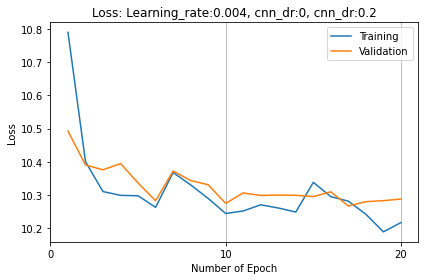

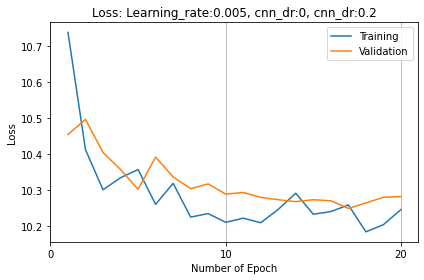

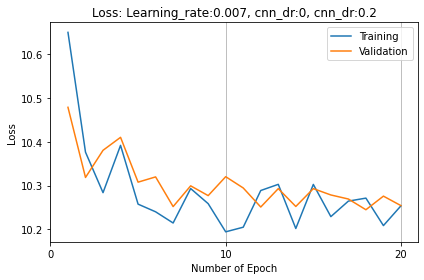

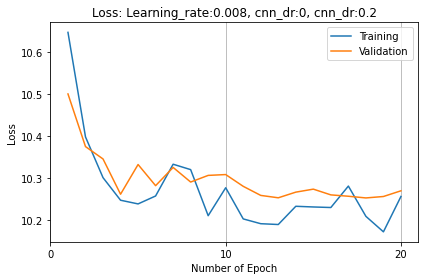

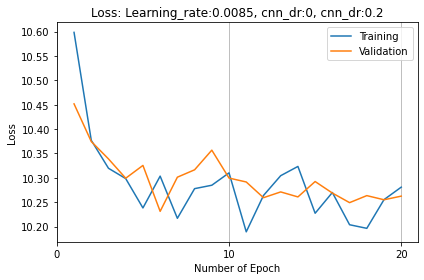

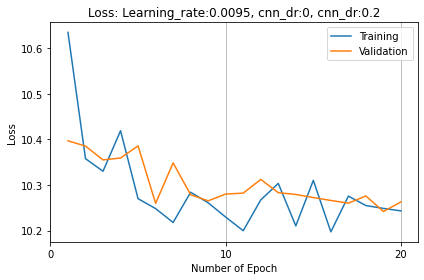

In [ ]:
# for x in np.arange(0.0000,0.0101,0.0005):
for x in [0.004,0.005, 0.007,0.008,0.0085, 0.0095]:
    if x == 0:
        continue
    else:
        hyper_params_test(x, epoch=20)

In [ ]:
# for x in np.arange(0.0000,0.0101,0.0005):
for x in [0.004,0.005, 0.007,0.008,0.0085, 0.0095]:
    if x == 0:
        continue
    else:
        hyper_params_test(x, epoch=20)

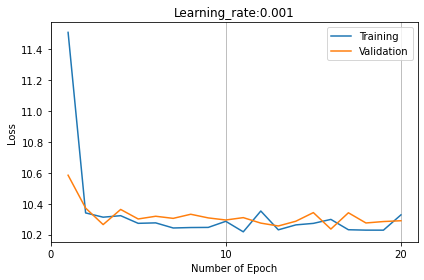

In [ ]:
#%%
fig, ax = plt.subplots(facecolor = 'white')
x = np.arange(1, epoch+1, 1)
ax.plot(x, train_epoch_loss,label='Training')
ax.plot(x, test_epoch_loss,label='Validation')
ax.legend()
ax.set_xlabel("Number of Epoch")
ax.set_ylabel("Loss")
ax.set_xticks(np.arange(0, epoch+1, 10))
ax.set_title(f'Loss: Learning_rate:{lr}')
# ax_2 = ax.twinx()
# ax_2.plot(history["lr"], "k--", lw=1)
# ax_2.set_yscale("log")
# ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0])
ax.grid(axis="x")
fig.tight_layout()
fig.show()
#%%
# a = torch.zeros(1, 2, 3, 4, 5, 6)
# b = a.view(a.shape[:2], -1, a.shape[5:])
# %%
# from torchviz import make_dot
# x = torch.randn(2, 4, 56).to(device)
# m = model_torch_simple.raw_seq_model().to(device)
# y = m(x)
# make_dot(y, params=dict(list(m.named_parameters()))).render("cnn_torchviz", format="png")

# Testing

In [24]:
testing_dataset = OneHotSeqsDataset(test_data, test_target, one_hot_dtype=torch.float, transform=True)
testing_loader = DataLoader(dataset=testing_dataset, batch_size=128, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)

## batch running

In [14]:

save_path = '/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/saved_models/aa-model_weighted.pth'

# Load the saved file
checkpoint = torch.load(save_path)
ic.disable()

# Initialize the model and optimizer
model = Model(
num_classes=13,
num_filters=64,
num_conv_layers=2,
num_dense_neurons=256, # batch_size = 64
# num_dense_neurons=128, # batch_size = 64
num_dense_layers=2,
return_logits=True,
conv_dropout_rate=0,
dense_dropout_rate=0.2
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr,  weight_decay=1e-9)

# optimizer = optimizer_class(model.parameters(), ...)  # Add the necessary arguments as per your optimizer's initialization method

# Load the model and optimizer states
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Make sure to call .eval() or .train() on your model depending on what you're planning to do next
model.eval()  # For inference
# or
# model.train()  # For further training


pred_list = []
target_list  = []
mse_list = []
with torch.no_grad():
    for x_test, y_test in testing_loader:
        x_batch = torch.squeeze(x_test, 0).to(device)
        x_batch = x_batch.float()
        y_batch = y_test.float().to(device)
        # print(x_batch.size())
        # y_batch = torch.Tensor.float(y).to(device)
        # x_batch = x_batch.permute(0, 3, 1, 2).to(device)
        pred = model(x_batch.float())
        pred_list.append(pred)
        target_list.append(y_batch)
        # pred = pred.unsqueeze(0)
        loss_test = criterion(y_batch, pred)
        mse_list.append(loss_test)
        # test_batch_loss.append(loss_test)
        # test_epoch_loss.append(torch.mean(torch.stack(test_batch_loss)).detach().cpu().numpy())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/saved_models/aa-model_weighted.pth'

## Overall test

In [24]:
testing_dataset = Dataset(test_data, test_target, one_hot_dtype=torch.float, transform=False)
testing_loader1 = DataLoader(dataset=testing_dataset, batch_size=1, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)

#### for in memory model

In [33]:
testing_dataset = Dataset(test_data, test_target, one_hot_dtype=torch.float, transform=False)
testing_loader1 = DataLoader(dataset=testing_dataset, batch_size=1, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)

model.eval()  # For inference

ic.disable()
model.eval()
pred_list = []
target_list  = []
mse_list = []
with torch.no_grad():
    for x_test, y_test in testing_loader1:
        xtest1 = x_test.to(device).float()
        ytest1 = y_test.to(device).float()
        pred = model(xtest1)
        pred_list.append(np.argmax(pred.detach().cpu().numpy())) 
        target_list.append(y_test.detach().cpu().numpy())
target_list = np.array(target_list).flatten()

ordinal data

In [34]:
def calculate_metrics(true_labels, predictions):
    assert len(true_labels) == len(predictions), "Length of true_labels and predictions must be the same."
    
    # Initialize counters for True Positives, True Negatives, False Positives, False Negatives
    tp, tn, fp, fn = 0, 0, 0, 0
    
    # Calculate TP, TN, FP, FN
    for true, pred in zip(true_labels, predictions):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Calculate Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Calculate Recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Calculate F1 Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Confusion Matrix
    confusion_matrix = [[tn, fp], [fn, tp]]
    
    return accuracy, f1_score, confusion_matrix

# Example usage
true_labels = target_list
predictions = pred_list 

accuracy, f1_score, confusion_matrix = calculate_metrics(true_labels, predictions)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Confusion Matrix:\n", confusion_matrix)


Accuracy: 0.9250985545335085
F1 Score: 0.8747252747252748
Confusion Matrix:
 [[505, 3], [54, 199]]


In [39]:
def threshold_binary_list(values, target):
    # This function will compare values with target and return a binary list
    binary_list = []
    all_ = {0:0, 1:0, 2:0, 3:0, 4:0}
    correct = {0:0, 1:0, 2:0, 3:0, 4:0}
    for x, y in zip(values, target):
        # print(x, y)
        if x > y-0.5 and x < y+0.5:
            binary_list.append(1)
            correct[y]+=1
            all_[y]+=1
        elif np.isnan(y):
            continue
        else:
            binary_list.append(0)
            all_[y]+=1
            
    return binary_list, correct, all_

binary_list, correct, all_ = threshold_binary_list(np.array(pred_list).flatten(), np.array(target_list).flatten())

In [106]:
y_true.value_counts()

RIF_MIC
0          5077
1          2528
Name: count, dtype: int64

In [107]:
for x,y in correct.items():
    print(x, y/all_[x])

NameError: name 'correct' is not defined

In [42]:
all_

{0: 627, 1: 65, 2: 55, 3: 416, 4: 0}

In [43]:
correct

{0: 615, 1: 0, 2: 0, 3: 363, 4: 0}

In [19]:
sum(binary_list)/len(binary_list)

0.5227858985382631

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# First, let's write a function that accepts a list of values and a list of thresholds.
# The function will compare each value with its corresponding threshold and return a list of binary values.
thresholds = [2, 0.5, 0.5, 0.25, 8, 8, 0.8, 8, 8, 2, 2, 1, 0.25]

def threshold_binary_list(values, thresholds):
    # This function will compare values with thresholds and return a binary list
    values = np.exp(values)
    binary_list = [1 if value >= threshold else 0 for value, threshold in zip(values, thresholds)]
    return binary_list

pred_list_rs = []
target_list_rs = []

for x in tqdm(pred_list):
    pred_list_rs.append(threshold_binary_list(x[0], thresholds))
for x in tqdm(target_list):
    target_list_rs.append(threshold_binary_list(x[0], thresholds))




np.random.seed(0)  # Seed for reproducibility
y_true = np.array(target_list_rs)
y_pred = np.array(pred_list_rs)

# Initialize lists to store metrics for each column
column_accuracies = []
column_f1_scores = []
column_conf_matrices = []

# Calculate accuracy, F1 score, and confusion matrix for each column
for i in range(y_true.shape[1]):
    column_accuracies.append(accuracy_score(y_true[:, i], y_pred[:, i]))
    column_f1_scores.append(f1_score(y_true[:, i], y_pred[:, i], zero_division=0))
    column_conf_matrices.append(confusion_matrix(y_true[:, i], y_pred[:, i]))

# Calculate overall metrics for the entire matrix
overall_accuracy = accuracy_score(y_true.ravel(), y_pred.ravel())
overall_f1_score = f1_score(y_true.ravel(), y_pred.ravel(), zero_division=0)
overall_conf_matrix = confusion_matrix(y_true.ravel(), y_pred.ravel())

# Output the results
column_metrics = list(zip(column_accuracies, column_f1_scores, column_conf_matrices))
overall_metrics = (overall_accuracy, overall_f1_score, overall_conf_matrix)

column_metrics, overall_metrics

result_df = pd.DataFrame(columns=['Drugs','accuracy', 'f1_score', 'True Negative (TN)', 'False Positive (FP)','False Negative (FN)', 'True Positive (TP)'])
result_df['Drugs'] = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
result_df['accuracy'] = column_accuracies
result_df['f1_score'] = column_f1_scores
result_df['True Negative (TN)'] = np.array(column_conf_matrices)[:,0,0]
result_df['False Positive (FP)'] = np.array(column_conf_matrices)[:,0,1]
result_df['False Negative (FN)'] = np.array(column_conf_matrices)[:,1,0]
result_df['True Positive (TP)'] = np.array(column_conf_matrices)[:,1,1]
# print(np.array(column_conf_matrices)[:,0,0])
# print(np.array(column_conf_matrices)[:,0,1])
# print(np.array(column_conf_matrices)[:,1,0])
# print(np.array(column_conf_matrices)[:,1,1])
result_df['Sensitivity'] = result_df['True Positive (TP)'] / (result_df['True Positive (TP)'] + result_df['False Negative (FN)'])
result_df['Specificity'] = result_df['True Negative (TN)'] / (result_df['True Negative (TN)'] + result_df['False Positive (FP)'])

pred_list = np.array(pred_list).squeeze()
target_list = np.array(target_list).squeeze()
mse_list = (pred_list - target_list)**2
mse_out = np.nanmean(mse_list, axis=0)
result_df['MSE'] = mse_out

print(result_df)

#### for saved model

In [51]:
testing_dataset = OneHotSeqsDataset(test_data, test_target, one_hot_dtype=torch.float, transform=True)
testing_loader1 = DataLoader(dataset=testing_dataset, batch_size=1, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)


save_path = '/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/saved_models/aa-model_weighted.pth'

# Load the saved file
checkpoint = torch.load(save_path)
ic.disable()

# Initialize the model and optimizer
model = Model(
num_classes=13,
num_filters=64,
num_conv_layers=2,
num_dense_neurons=256, # batch_size = 64
# num_dense_neurons=128, # batch_size = 64
num_dense_layers=2,
return_logits=True,
conv_dropout_rate=0,
dense_dropout_rate=0.2
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr,  weight_decay=1e-9)

# optimizer = optimizer_class(model.parameters(), ...)  # Add the necessary arguments as per your optimizer's initialization method

# Load the model and optimizer states
model.load_state_dict(checkpoint['model'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Make sure to call .eval() or .train() on your model depending on what you're planning to do next
model.eval()  # For inference

ic.disable()
model.eval()
pred_list = []
target_list  = []
mse_list = []
with torch.no_grad():
    for x_test, y_test in testing_loader1:
        xtest1 = x_test.to(device).float()
        ytest1 = y_test.to(device).float()
        pred = model(xtest1)
        pred_list.append(pred.detach().cpu().numpy()) 
        target_list.append(y_test.detach().cpu().numpy())

In [25]:
# First, let's write a function that accepts a list of values and a list of thresholds.
# The function will compare each value with its corresponding threshold and return a list of binary values.

def threshold_binary_list(values, thresholds):
    # This function will compare values with thresholds and return a binary list
    values = np.exp(values)
    binary_list = [1 if value >= threshold else 0 for value, threshold in zip(values, thresholds)]
    return binary_list

# List of thresholds as per the image provided by the user
thresholds = [2, 0.5, 0.5, 0.25, 8, 8, 0.8, 8, 8, 2, 2, 1, 0.25]

# Example list of values to be checked against the thresholds
values = [3, 0.7, 0.4, 0.3, 10, 5, 1, 9, 7, 2, 3, 0.5, 0.3]  # This is a placeholder

# Get the binary list using the function defined above
binary_list = threshold_binary_list(pred_list[0][0], thresholds)
binary_list


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Getting accuracy and stuff

In [52]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


# First, let's write a function that accepts a list of values and a list of thresholds.
# The function will compare each value with its corresponding threshold and return a list of binary values.
thresholds = [2, 0.5, 0.5, 0.25, 8, 8, 0.8, 8, 8, 2, 2, 1, 0.25]

def threshold_binary_list(values, thresholds):
    # This function will compare values with thresholds and return a binary list
    values = np.exp(values)
    binary_list = [1 if value >= threshold else 0 for value, threshold in zip(values, thresholds)]
    return binary_list

pred_list_rs = []
target_list_rs = []

for x in tqdm(pred_list):
    pred_list_rs.append(threshold_binary_list(x[0], thresholds))
for x in tqdm(target_list):
    target_list_rs.append(threshold_binary_list(x[0], thresholds))




np.random.seed(0)  # Seed for reproducibility
y_true = np.array(target_list_rs)
y_pred = np.array(pred_list_rs)

# Initialize lists to store metrics for each column
column_accuracies = []
column_f1_scores = []
column_conf_matrices = []

# Calculate accuracy, F1 score, and confusion matrix for each column
for i in range(y_true.shape[1]):
    column_accuracies.append(accuracy_score(y_true[:, i], y_pred[:, i]))
    column_f1_scores.append(f1_score(y_true[:, i], y_pred[:, i], zero_division=0))
    column_conf_matrices.append(confusion_matrix(y_true[:, i], y_pred[:, i]))

# Calculate overall metrics for the entire matrix
overall_accuracy = accuracy_score(y_true.ravel(), y_pred.ravel())
overall_f1_score = f1_score(y_true.ravel(), y_pred.ravel(), zero_division=0)
overall_conf_matrix = confusion_matrix(y_true.ravel(), y_pred.ravel())

# Output the results
column_metrics = list(zip(column_accuracies, column_f1_scores, column_conf_matrices))
overall_metrics = (overall_accuracy, overall_f1_score, overall_conf_matrix)

column_metrics, overall_metrics

result_df = pd.DataFrame(columns=['Drugs','accuracy', 'f1_score', 'True Negative (TN)', 'False Positive (FP)','False Negative (FN)', 'True Positive (TP)'])
result_df['Drugs'] = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
result_df['accuracy'] = column_accuracies
result_df['f1_score'] = column_f1_scores
result_df['True Negative (TN)'] = np.array(column_conf_matrices)[:,0,0]
result_df['False Positive (FP)'] = np.array(column_conf_matrices)[:,0,1]
result_df['False Negative (FN)'] = np.array(column_conf_matrices)[:,1,0]
result_df['True Positive (TP)'] = np.array(column_conf_matrices)[:,1,1]
# print(np.array(column_conf_matrices)[:,0,0])
# print(np.array(column_conf_matrices)[:,0,1])
# print(np.array(column_conf_matrices)[:,1,0])
# print(np.array(column_conf_matrices)[:,1,1])
result_df['Sensitivity'] = result_df['True Positive (TP)'] / (result_df['True Positive (TP)'] + result_df['False Negative (FN)'])
result_df['Specificity'] = result_df['True Negative (TN)'] / (result_df['True Negative (TN)'] + result_df['False Positive (FP)'])

pred_list = np.array(pred_list).squeeze()
target_list = np.array(target_list).squeeze()
mse_list = (pred_list - target_list)**2
mse_out = np.nanmean(mse_list, axis=0)
result_df['MSE'] = mse_out

print(result_df)

100%|██████████| 1206/1206 [00:00<00:00, 120868.12it/s]


In [142]:
# testing_dataset = OneHotSeqsDataset(test_data, test_target, one_hot_dtype=torch.float, transform=True)
testing_loader1 = DataLoader(dataset=testing_dataset, batch_size=1, collate_fn=collate_padded_batch, num_workers=8, shuffle=True, drop_last=True)
ic.disable()
model.eval()
pred_list = []
target_list  = []
mse_list = []
with torch.no_grad():
    for x_test, y_test in testing_loader1:
        xtest1 = x_test.to(device).float()
        ytest1 = y_test.to(device).float()
        pred = model(xtest1)
        pred_list.append(pred.detach().cpu().numpy()) 
        target_list.append(y_test.detach().cpu().numpy())

## Mic calc

In [54]:
pred_list = np.array(pred_list).squeeze()
target_list = np.array(target_list).squeeze()
mse_list = (pred_list - target_list)**2
mse_out = np.nanmean(mse_list, axis=0)
print(mse_out)
print(np.mean(mse_out))

[0.72782607 0.77394133 0.96627392 0.99732814 0.57384106 0.71862384
 1.40909006 0.62500867 0.68552988 0.42204546 0.90296875 1.86967643
 1.116575  ]
0.9068252765540421


In [147]:
pred_list = np.array(pred_list).squeeze()
target_list = np.array(target_list).squeeze()
mse_list = (np.exp(pred_list) - np.exp(target_list))**2
mse_out = np.nanmean(mse_list, axis=0)
print(mse_out)
print(np.mean(mse_out))

[1.99657691e+01 2.19492095e-02 1.20861531e-01 1.84303685e-02
 2.18870026e+01 1.48684251e+01 1.62012543e+01 2.61311525e+01
 6.15298126e+00 2.21063227e-01 1.96245250e+00 1.24928044e+01
 9.46748127e-01]
9.30699186242598


## Ea calc

In [129]:
def find_range_vectorized(target_values, quest_values):
    # Convert lists to numpy arrays for efficient broadcasting
    target_values =  np.exp(np.array(target_values)) # Reshape for broadcasting
    quest_values =  np.exp(np.array(quest_values))

    # Perform broadcasting to compare each quest value against all target values
    # This creates a boolean matrix where rows correspond to target values and columns to quest values
    in_range_matrix = (target_values / 2 <= quest_values) & (quest_values <= target_values * 2)
    # in_range_matrix = np.abs(np.log2(target_values) - np.log2(quest_values))
    # in_range_matrix  = in_range_matrix  <= 1
    
    # print(mse)
    return in_range_matrix
# Example usage
# target_values = [[10, 20, 30, 40, 50], [10, 20, 30, 40, 50]]
# quest_values = [[25, 5, 60, 1, 1], [10, 20, 30, 40, 50]]
result = find_range_vectorized(target_list, pred_list)

In [148]:
np.exp(pred_list[0])

array([0.21734211, 0.04858502, 0.07807854, 0.01177044, 1.1826788 ,
       1.069281  , 0.02535057, 1.8139412 , 0.41462198, 0.45923612,
       0.28088352, 0.1602019 , 0.06000657], dtype=float32)

In [135]:
target_values_ =  np.exp(np.array(target_list)) # Reshape for broadcasting
quest_values_ =  np.exp(np.array(pred_list))


In [111]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score


for i in range(result.shape[0]):
    f1 = f1_score(y_true, result[i, :])
    accuracy = accuracy_score(y_true, result[i, :])
    print(f"Model {i+1} - F1 Score: {f1}, Accuracy: {accuracy}")


NameError: name 'y_true' is not defined

In [ ]:
def EA_calc(target_matrix: np.array):
    drugs = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
    for x, drug in zip(range(target_matrix.shape[1]), drugs):
        ea_count = len([item for item in target_matrix[:,x] if item == True])
        ea_rate = (ea_count / len(target_matrix[:,x])) * 100
        print(drug, ea_rate)
        
def MSE_calc(target_matrix: np.array):
    drugs = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH', 'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF', 'RFB']
    for x, drug in zip(range(target_matrix.shape[1]), drugs):
        mse = np.mean(target_matrix[:,x])
        print(drug, mse)
        

# Explanable AI

### Sensitivity analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Assume `input_data` is your input tensor, and `feature_index` is the index of the feature to perturb
perturbation_range = np.linspace(0, 1, num=20)  # Example range of perturbation
original_value = input_data[0, feature_index].item()  # Store original value

output_changes = np.zeros((len(perturbation_range), 13))  # Store changes in outputs

for i, perturb in enumerate(perturbation_range):
    input_data[0, feature_index] = original_value + perturb  # Perturb feature value
    with torch.no_grad():
        outputs = model(input_data).numpy()  # Get model output
    output_changes[i] = outputs  # Record the change

# Reset the perturbed feature to its original value
input_data[0, feature_index] = original_value

# Example analysis for one output
plt.figure(figsize=(10, 6))
for output_index in range(13):
    plt.plot(perturbation_range, output_changes[:, output_index], label=f'Output {output_index+1}')

plt.xlabel('Perturbation')
plt.ylabel('Output Change')
plt.title('Sensitivity Analysis of Feature X on All Outputs')
plt.legend()
plt.show()


### SHAP

In [ ]:
import torch
import numpy as np

def model_wrapper(x):
    with torch.no_grad():
        # Convert the input numpy array to a PyTorch tensor
        tensor_x = torch.tensor(x, dtype=torch.float32)
        # Make a prediction with your model
        model_output = model(tensor_x)
        # Convert the prediction back to a numpy array
        return model_output.numpy()


In [ ]:
import shap

# Sample data for initialization (e.g., a batch from your training data)
X_sample = np.array([...])  # Replace with your actual numpy array

# Initialize the explainer
explainer = shap.KernelExplainer(model_wrapper, X_sample)

# Choose the instance you want to explain
X_instance = np.array([...])  # Replace with the instance in numpy array format

# Calculate SHAP values
shap_values = explainer.shap_values(X_instance)

# Plotting the SHAP values
shap.initjs()  # Initializes JavaScript visualization in Jupyter Notebooks
shap.force_plot(explainer.expected_value, shap_values, X_instance)


### Counterfactual

In [ ]:
### SHAP